In [ ]:
#downloading image from pma_python 

In [1]:
pwd

'/home/anshuman/testing_project/image_registration'

In [1]:
import os
import numpy as np
import pandas as pd
import pma_python
from pma_python import core
import tqdm
from tqdm import tqdm
import numpy as np
from PIL import Image, ImageDraw
import cv2
import matplotlib.pyplot as plt

In [ ]:
type(File_name)

In [ ]:
print("he",he.shape)
print("cd20",cd20.shape)

In [ ]:
print("topleft",he[0,0])
print("topright",he[0,2457])
print("bottomleft",he[3851,0])
print("bottomright",he[3851,2457])

In [ ]:
print("topleft",cd20[0,0])
print("topright",cd20[0,2457])
print("bottomleft",cd20[3851,0])
print("bottomright",cd20[3851,2457])

In [ ]:
grayhereference = cv2.cvtColor(he,cv2.COLOR_BGR2GRAY)
graycd20target = cv2.cvtColor(cd20,cv2.COLOR_BGR2GRAY)

In [ ]:
orb = cv2.ORB_create()

In [ ]:
keypoints1, descriptors1 = orb.detectAndCompute(grayhereference, None)
keypoints2, descriptors2 = orb.detectAndCompute(graycd20target, None)

In [ ]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [ ]:
matches = bf.match(descriptors1, descriptors2)

In [ ]:
matches = sorted(matches, key=lambda x: x.distance)

In [ ]:
img_matches = cv2.drawMatches(he, keypoints1, cd20, keypoints2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

In [ ]:
src_pts = np.float32([keypoints1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

In [ ]:
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

In [ ]:
registered_image = cv2.warpPerspective(cd20, M, (he.shape[1], he.shape[0]))

In [ ]:
plt.imshow(registered_image)

In [ ]:
plt.imshow(he)

In [ ]:
plt.imshow(cd20)

In [ ]:
plt.imshow(he)

In [ ]:
im = np.array(he)

In [ ]:
blue = im[:,:,0]
red = im[:,:,2]
green = im[:,:,1]

In [ ]:
print("topleft",he[0,0])
print("topright",he[0,2457])
print("bottomleft",he[3851,0])
print("bottomright",he[3851,2457])

In [ ]:
import cv2
import numpy as np

def image_registration(reference_image, target_image):
    # Convert images to grayscale
    reference_gray = cv2.cvtColor(reference_image, cv2.COLOR_BGR2GRAY)
    target_gray = cv2.cvtColor(target_image, cv2.COLOR_BGR2GRAY)

    # Initialize ORB detector
    orb = cv2.ORB_create()

    # Find keypoints and descriptors with ORB
    keypoints1, descriptors1 = orb.detectAndCompute(reference_gray, None)
    keypoints2, descriptors2 = orb.detectAndCompute(target_gray, None)

    # Create BFMatcher (Brute Force Matcher) object
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Match descriptors
    matches = bf.match(descriptors1, descriptors2)

    # Sort them in ascending order of distance
    matches = sorted(matches, key=lambda x: x.distance)

    # Draw first 10 matches (just for visualization)
    img_matches = cv2.drawMatches(reference_image, keypoints1, target_image, keypoints2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Extract matched points
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

    # Estimate the transformation matrix using RANSAC
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    # Apply the transformation to the target image
    registered_image = cv2.warpPerspective(target_image, M, (reference_image.shape[1], reference_image.shape[0]))

    return registered_image, M

# Example usage:
reference_image = cv2.imread("reference_image.jpg")
target_image = cv2.imread("target_image.jpg")

registered_image, transformation_matrix = image_registration(reference_image, target_image)

# Display the results
cv2.imshow("Reference Image", reference_image)
cv2.imshow("Target Image", target_image)
cv2.imshow("Registered Image", registered_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
#referenceihc == x=60712&y=95493&width=1840&height=963&scale=1.0052088617156356&rotation=0&dpi=null&filename=snapshot&flipHorizontal=false&flipVertical=false

In [ ]:
#targetihc

In [ ]:
#overaly


import cv2

# Load the base and overlay images
base_image = cv2.imread('path/to/base_image.jpg')
overlay_image = cv2.imread('path/to/overlay_image.png', -1)  # Use -1 to load with alpha channel

# Resize overlay image to match the base image
overlay_image = cv2.resize(overlay_image, (base_image.shape[1], base_image.shape[0]))

# Extract alpha channel from the overlay image
alpha_channel = overlay_image[:, :, 3]

# Create a mask using the alpha channel
overlay_mask = cv2.merge([alpha_channel, alpha_channel, alpha_channel])

# Invert the mask
overlay_mask_inv = cv2.bitwise_not(overlay_mask)

# Extract the regions of interest from the images
base_roi = cv2.bitwise_and(base_image, overlay_mask_inv)
overlay_roi = cv2.bitwise_and(overlay_image, overlay_mask)

# Combine the two ROIs
result = cv2.add(base_roi, overlay_roi)

# Display or save the result
cv2.imshow('Overlay Result', result)
cv2.waitKey(0)
cv2.destroyAllWindows()


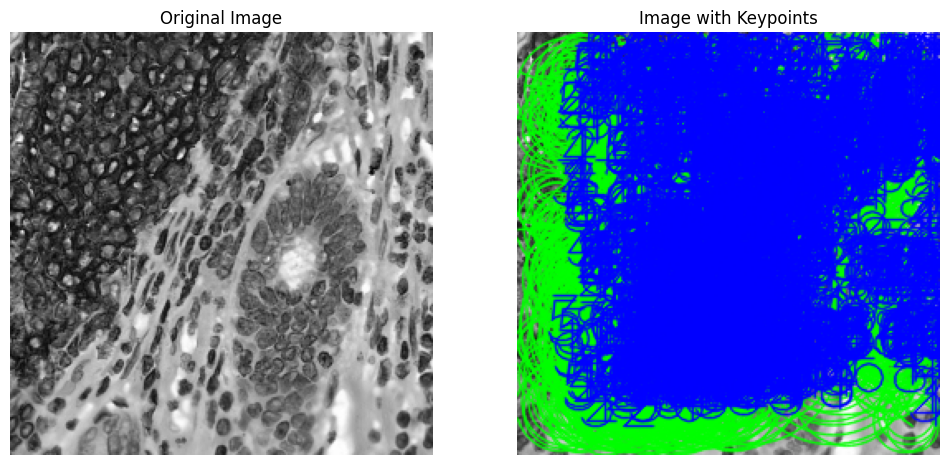

In [114]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image
image = cv2.imread("81_241.png", cv2.IMREAD_GRAYSCALE)

# Initialize ORB detector with custom parameters
orb = cv2.ORB_create(
    nfeatures=1000,    # Maximum number of features to retain
    scaleFactor=1.2,    # Pyramid scale factor
    nlevels=8,          # Number of pyramid levels
    edgeThreshold=15,   # Edge threshold for keypoint detector
    patchSize=31,       # Size of the patch for orientation assignment
    fastThreshold=20    # FAST threshold
)

# Find keypoints and descriptors
keypoints, descriptors = orb.detectAndCompute(image, None)

# Draw keypoints on the image with numbers
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Add keypoint numbers with scaled font size
font_scale = 0.005 * image.shape[1]  # Adjust the font size based on the image width
for i, keypoint in enumerate(keypoints):
    x, y = map(int, keypoint.pt)
    cv2.putText(image_with_keypoints, str(i), (x, y), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 0, 0), 1, cv2.LINE_AA)

# Convert BGR image to RGB for Matplotlib
image_with_keypoints_rgb = cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB)

# Display the images using Matplotlib
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Display the original image
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Display the image with keypoints
axes[1].imshow(image_with_keypoints_rgb)
axes[1].set_title('Image with Keypoints')
axes[1].axis('off')

plt.show()


In [ ]:
sessionID= core.connect('http://10.100.76.62/core/', 'tmccomputpath', 'Z5XPLQ2I')

In [ ]:
def find_level_x(pma_slide,sessionID,mgfx):
    level = None
    closest_level_distance = float('inf')

    for i, magnification_level in enumerate(core.get_zoomlevels_list(pma_slide, sessionID=sessionID)):
        if core.get_magnification(pma_slide, i, True, sessionID) == mgfx:
            level = i
            break
    else:
        distance = abs(core.get_magnification(pma_slide, i, True, sessionID) - mgfx)
        if distance < closest_level_distance:
            closest_level_distance = distance
            level = i

    return level

def get_scale(pma_slide,sessionID,mgfx):
    level = find_level_x(pma_slide, sessionID,mgfx) 
    max_level_dim = core.get_pixel_dimensions(pma_slide,core.get_max_zoomlevel(pma_slide,sessionID),sessionID)[0]
    zoom_level_dim = core.get_pixel_dimensions(pma_slide,level,sessionID)[0] 
    dwnsmple = zoom_level_dim / max_level_dim 
    scale = dwnsmple*(mgfx/core.get_magnification(pma_slide,level,True,sessionID))
    return scale ,level

In [ ]:
refihc ="CAIB_WSI/CAIB/CAIB-T00000590OC/CAIB-T00000590OC02R01/CAIB-T00000590OC02R01P1204HECD20/CAIB-T00000590OC02R01P1204HECD20.svs"
targethe = "CAIB_WSI/CAIB/CAIB-T00000590OC/CAIB-T00000590OC02R01/CAIB-T00000590OC02R01P1504HE/CAIB-T00000590OC02R01P1504HE.svs"

In [ ]:
for i, magnification_level in enumerate(core.get_zoomlevels_list(refihc,sessionID)):
    print('magnification_factors at level',i,'is :',core.get_magnification(refihc,i,exact = True ,sessionID=sessionID),'x')

In [ ]:
for i, magnification_level in enumerate(core.get_zoomlevels_list(targethe,sessionID)):
    print('magnification_factors at level',i,'is :',core.get_magnification(targethe,i,exact = True ,sessionID=sessionID),'x')

In [ ]:
for i , pixel_dimension in enumerate(core.get_zoomlevels_list(refihc,sessionID)):
    print('level',i,core.get_pixel_dimensions(refihc,i,sessionID))

In [ ]:
for i , pixel_dimension in enumerate(core.get_zoomlevels_list(targethe,sessionID)):
    print('level',i,core.get_pixel_dimensions(targethe,i,sessionID))

In [ ]:
core.get_slide_info(refihc,sessionID)

In [ ]:
core.get_slide_info(targethe,sessionID)

In [ ]:
pwd

In [ ]:
w,h=core.get_pixel_dimensions(refihc,sessionID=sessionID)
#ref=core.get_region(refihc,x=60712,y=95493,width=2048,height=2048,scale=1.0052088617156356,sessionID=sessionID)
target=core.get_region(refihc,x=60712-500,y=95493-50,width=2048,height=2048,scale=1.0052088617156356,sessionID=sessionID)


#file_name = core.get_slide_file_name(slide)#collecting file name
#slide_name = os.path.splitext(file_name)[0]#collecting file name
output_path = 'target.tiff'
target.save(output_path)

In [ ]:
fig ,axes = plt.subplots(1,2,figsize=(12,8))

axes[0].imshow(ref)
axes[0].set_title("reference")
axes[1].imshow(target)
axes[1].set_title("target")

In [ ]:
https://caib-pma.actrec.gov.in/core/region?pathOrUid=CAIB_WSI%2FCAIB%2FCAIB-T00000590OC%2FCAIB-T00000590OC02R01%2FCAIB-T00000590OC02R01P1204HE%2FCAIB-T00000590OC02R01P1204HE.svs&format=jpg&timeframe=0&layer=0&channels=0&channelClipping=0,100&channelColor=ffffffff&gamma=1&sessionID=DmzCI-yV1bG_kqiUEE0-wg2&drawScaleBar=false&x=59382&y=88770&width=4625&height=2420&scale=0.4&rotation=0&dpi=null&filename=snapshot&flipHorizontal=false&flipVertical=false

### IMAGE REGISTRATION BASICS ..

In [133]:
import cv2
import numpy as np

def image_registration(reference_image, target_image):
    # Convert images to grayscale
    reference_gray = cv2.cvtColor(reference_image, cv2.COLOR_BGR2GRAY)
    target_gray = cv2.cvtColor(target_image, cv2.COLOR_BGR2GRAY)

    # Initialize ORB detector
    orb = cv2.ORB_create(nfeatures=12000)

    # Find keypoints and descriptors with ORB
    keypoints1, descriptors1 = orb.detectAndCompute(reference_gray, None)
    keypoints2, descriptors2 = orb.detectAndCompute(target_gray, None)

    # Create BFMatcher (Brute Force Matcher) object
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Match descriptors
    matches = bf.match(descriptors1, descriptors2)

    # Sort them in ascending order of distance
    matches = sorted(matches, key=lambda x: x.distance)

    # Draw first 50 matches (just for visualization)
    img_matches = cv2.drawMatches(reference_image, keypoints1, target_image, keypoints2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Extract matched points
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

    # Estimate the transformation matrix using RANSAC
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    # Apply the transformation to the target image
    registered_image = cv2.warpPerspective(reference_image, M, (target_image.shape[1], target_image.shape[0]))

    return registered_image, M



In [134]:

reference_image = cv2.imread("81_241.png")
ref = cv2.cvtColor(reference_image,cv2.COLOR_BGR2RGB)
target_image = cv2.imread("he_81_241.png")
target = cv2.cvtColor(target_image ,cv2.COLOR_BGR2RGB)
registered_image, transformation_matrix = image_registration(ref, target)

Text(0.5, 1.0, 'registered_image')

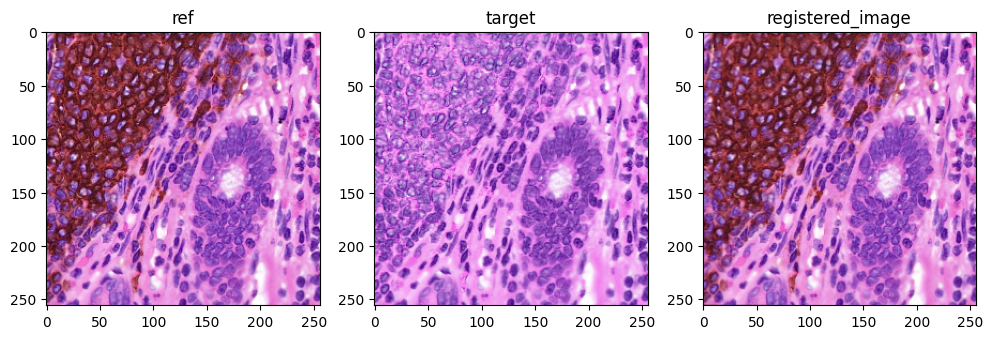

In [135]:
fig,axes = plt.subplots(1,3,figsize =(12,8))

axes[0].imshow(ref)
axes[0].set_title('ref')
axes[1].imshow(target)
axes[1].set_title('target')
axes[2].imshow(registered_image)
axes[2].set_title('registered_image')

7328Y32E

In [136]:
image = cv2.imread('he_81_241.png')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

# Define the shift values (you can adjust these values)
shift_x = 50  # shift in the x-axis
shift_y = 30  # shift in the y-axis

# Create a translation matrix
translation_matrix = np.float32([[1, 0, shift_x], [0, 1, shift_y]])

# Apply the translation to the image
shifted_image = cv2.warpAffine(image, translation_matrix, (image.shape[1], image.shape[0]))


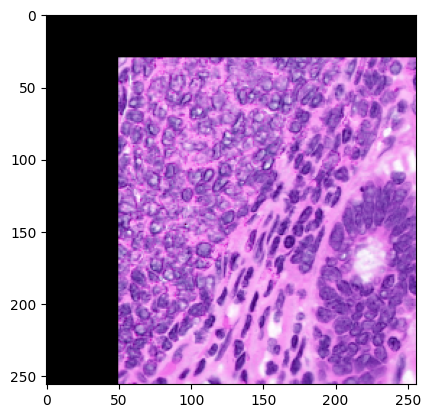

In [137]:
target = shifted_image

plt.imshow(target)

In [138]:
reference_image = cv2.imread("81_241.png")
ref = cv2.cvtColor(reference_image,cv2.COLOR_BGR2RGB)
#target_image = cv2.imread("he_81_241.png")
target = shifted_image
registered_image, transformation_matrix = image_registration(ref, target)

Text(0.5, 1.0, 'registered_image')

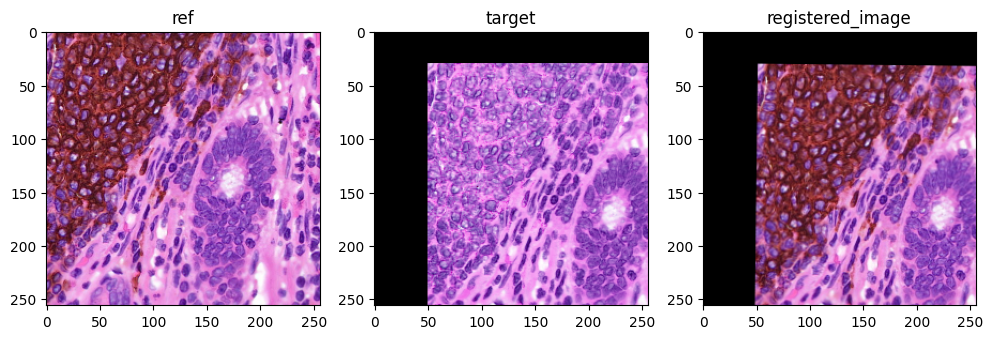

In [139]:
fig,axes = plt.subplots(1,3,figsize =(12,8))

axes[0].imshow(ref)
axes[0].set_title('ref')
axes[1].imshow(target)
axes[1].set_title('target')
axes[2].imshow(registered_image)
axes[2].set_title('registered_image')

In [140]:
registered_image.shape

(256, 256, 3)

In [141]:
transformation_matrixdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA+EAAAFTCAYAAABWJA2xAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAEAAElEQVR4nOz9ebBlWVng/X/XsOcz3XvulHlzqsyqoqgShC4sUBEQMMAWbMSmnFqEjka6RUIRNaQNBF6ntsGWdmhEtCFUWtv5xWgVlaHxx+DAIFBFDVlVOecdz7znvdb6/ZGSL2kViAKVVbA/ERlxz7rr7P2cezOeu5+91yCcc45Wq9VqtVqtVqvVarVaX3DyagfQarVarVar1Wq1Wq3Wl4q2CG+1Wq1Wq9VqtVqtVutB0hbhrVar1Wq1Wq1Wq9VqPUjaIrzVarVarVar1Wq1Wq0HSVuEt1qtVqvVarVarVar9SBpi/BWq9VqtVqtVqvVarUeJG0R3mq1Wq1Wq9VqtVqt1oOkLcJbrVar1Wq1Wq1Wq9V6kLRFeKvVarVarVar1Wq1Wg+StghvfUn6jd/4DW644QY8z2MwGFztcFqtVqvVarW+6Jw6dQohBG95y1uudiifN295y1sQQnDq1Kkv6HtaX9zaIrz1JeeOO+7gBS94ASdOnOBNb3oTv/Irv3K1Q2q1Wq0rvO997+PVr341k8nkaofyT3o4xdpqtR4e/sf/+B9fVIV7q/WPtUV460vOu9/9bqy1/Pf//t95wQtewK233nq1Q2q1Wq0rvO997+M1r3nNw6KwfTjF2mq1HlxHjx4lz3O+8zu/85/1vi+2Ivw7v/M7yfOco0ePXu1QWg8RbRHe+qKQpuln3XdnZwegHYbearW+ZDjnyPP8aofRarUewv4511KfLSEEYRiilPq8H/ufq2kaqqq6KudWShGGIUKIq3L+1kNPW4S3HnZe/epXI4Tg9ttv59u//dtZWlriiU98IgC/+Zu/yc0330wURSwvL/Ot3/qtnD179vJ7jx07xqte9SoAVldXEULw6le/+mp8jFar1XpAr371q/mhH/ohAK655hqEEJfnEr75zW/mqU99KmtrawRBwI033sgb3vCG+x3j2LFjPOtZz+Ltb387j3vc44iiiDe+8Y0AnD59mm/8xm8kSRLW1tZ42ctextvf/naEELz73e++4jh//dd/zTOf+Uz6/T5xHPPkJz+Z9773vZ9VrK1W66Hrc7mW+qRf+qVf4vjx40RRxC233MJf/dVf8ZSnPIWnPOUpl/s80Jzwra0tXvjCF3Lo0CGCIODAgQP8m3/zby7njWPHjnHbbbfxf//v/72cUz71mJPJhO///u/n8OHDBEHAtddey8/8zM9grb3feV/3utfx+te/nhMnThAEAbfffjtwaWriv/23/5bl5WXCMORxj3scb3vb2+73GW+77Tae+tSnEkURhw4d4id+4ieuOM9n64HmhH8yT7/73e++nKcf9ahHXc7Df/AHf8CjHvUowjDk5ptv5sMf/vAVx/zoRz/KC17wAo4fP04YhmxsbPDv//2/Z39//37n/+Q5wjDkxIkTvPGNb7z8f+Af+2x//63Pjb7aAbRa/1LPe97zuO666/ipn/opnHP85E/+JK985Su59dZb+Q//4T+wu7vLL/zCL/CkJz2JD3/4wwwGA17/+tfz67/+6/zhH/4hb3jDG+h0Ojz60Y++2h+l1Wq1Lnvuc5/LXXfdxW/91m/xcz/3c6ysrACXbhy+4Q1v4KabbuIbv/Eb0Vrzx3/8x3zP93wP1lpe8pKXXHGcO++8k2/7tm/jxS9+MS960Yt4xCMeQZqmPPWpT+XixYt83/d9HxsbG/yv//W/eNe73nW/ON75znfy9V//9dx888286lWvQkp5+SbAX/3VX3HLLbd8xlhbrdZD37/kWgrgDW94A9/7vd/L13zN1/Cyl72MU6dO8ZznPIelpSUOHTr0Gc/5zd/8zdx222289KUv5dixY+zs7PAXf/EXnDlzhmPHjvH617+el770pXQ6HX70R38UgPX1dQCyLOPJT34y58+f58UvfjFHjhzhfe97H694xSu4ePEir3/9668415vf/GaKouC7v/u7CYKA5eVlbrvtNr76q7+azc1NfuRHfoQkSfid3/kdnvOc5/D7v//7fNM3fRNw6WbB137t19I0zeV+v/Irv0IURZ+3n//Jkyf59m//dl784hfz7/7dv+N1r3sdz372s/nlX/5l/vN//s98z/d8DwA//dM/za233sqdd96JlJeeof7FX/wF9957Ly984QvZ2Njgtttu41d+5Ve47bbb+MAHPnC5wP7whz/MM5/5TA4cOMBrXvMajDH8P//P//OAefqz/f23Pg9cq/Uw86pXvcoB7tu+7dsut506dcoppdxP/uRPXtH3Yx/7mNNaX9H+yffv7u4+aDG3Wq3WP8drX/taB7j77rvvivYsy+7X9xnPeIY7fvz4FW1Hjx51gPuzP/uzK9p/9md/1gHuj/7ojy635XnubrjhBge4d73rXc4556y17rrrrnPPeMYznLX2ivNfc8017uu+7uv+yVhbrdZD1+dyLVWWpRsOh+4rvuIrXF3Xl/u95S1vcYB78pOffLntvvvuc4B785vf7JxzbjweO8C99rWv/Yzx3XTTTVcc55N+/Md/3CVJ4u66664r2n/kR37EKaXcmTNnrjhvr9dzOzs7V/R92tOe5h71qEe5oigut1lr3Vd91Ve566677nLb93//9zvA/fVf//Xltp2dHdfv9//ZOe/Nb37z/d7zyTz9vve973Lb29/+dge4KIrc6dOnL7e/8Y1vvCJHO/fAfw9+67d+ywHuPe95z+W2Zz/72S6OY3f+/PnLbXfffbfTWrtPLQX/OdfSrc9dOxy99bD1H//jf7z89R/8wR9greXWW29lb2/v8r+NjQ2uu+66B3zK02q1Wg83n/oEZjqdsre3x5Of/GTuvfdeptPpFX2vueYanvGMZ1zR9md/9mdsbm7yjd/4jZfbwjDkRS960RX9PvKRj3D33Xfz7d/+7ezv71/OqWma8rSnPY33vOc9/6Ihma1W66HlX3It9Xd/93fs7+/zohe9CK3/v0G13/Ed38HS0tJnPF8URfi+z7vf/W7G4/E/O97f/d3f5Wu+5mtYWlq6IsanP/3pGGN4z3vec0X/b/7mb77iie9oNOKd73wnt956K/P5/PL79/f3ecYznsHdd9/N+fPnAfiTP/kTnvCEJ3DLLbdcfv/q6irf8R3f8c+O+9O58cYb+cqv/MrLrx//+McD8NSnPpUjR47cr/3ee++93Papfw+KomBvb48nPOEJAHzoQx8CwBjDX/7lX/Kc5zyHgwcPXu5/7bXX8vVf//VXxNJeSz+42uHorYeta6655vLXd999N845rrvuugfs63negxVWq9VqfcG8973v5VWvehXvf//7ybLsiu9Np1P6/f7l15+aIz/p9OnTnDhx4n7zAK+99torXt99990AfNd3fdenjWU6nf6TF9ytVuuh7V9yLXX69Gng/nlDa82xY8c+4/mCIOBnfuZnePnLX876+jpPeMITeNaznsXzn/98NjY2/sl47777bj760Y9+2ikvn1x895P+cR48efIkzjle+cpX8spXvvLTHmNzc5PTp09fLn4/1SMe8Yh/Ms7P1qcW2sDlHH748OEHbP/UGxej0YjXvOY1/PZv//b9Pvcnb8ru7OyQ5/n9flfwwHm/vZZ+8LRFeOth61PvAFprEULwp3/6pw+4Amen03kwQ2u1Wq3Pu3vuuYenPe1p3HDDDfy3//bfOHz4ML7v8yd/8if83M/93P2eTH8u8xY/eazXvva1POYxj3nAPm1ebbUe/q7GtdT3f//38+xnP5s/+qM/4u1vfzuvfOUr+emf/mne+c538tjHPvYzvtday9d93dfxwz/8ww/4/euvv/6K1/84D34yt/3gD/7g/UYKfdIDFaxfKJ9u1fhP1+6cu/z1rbfeyvve9z5+6Id+iMc85jF0Oh2stTzzmc/8F41Uaq+lH1xtEd76onDixAmcc1xzzTX3S8CtVqv1cPNAK9b+8R//MWVZ8ra3ve2Kpyf/nCGCR48e5fbbb8c5d8U5Tp48eUW/EydOANDr9Xj605/+z4611Wo9/Hy211Kf3Ov65MmTfO3Xfu3l9qZpOHXq1Ge14O2JEyd4+ctfzstf/nLuvvtuHvOYx/CzP/uz/OZv/ibw6fPKiRMnWCwW/2Re+nSOHz8OXHqq+08d4+jRo5dHBX2qO++881907s+n8XjMO97xDl7zmtfwYz/2Y5fb/3G8a2trhGF4vxwPD5z322vpB087J7z1ReG5z30uSile85rXXHGXEC7dNXyg7RparVbroSpJEuDSVjyf9MknE5+a46bTKW9+85s/6+M+4xnP4Pz581dsxVMUBW9605uu6HfzzTdz4sQJXve617FYLO53nN3d3c8Ya6vVevj5bK+lHve4xzEcDnnTm95E0zSX+7z1rW/9J+d5Z1lGURRXtJ04cYJut0tZlpfbkiR5wJxy66238v73v5+3v/3t9/veZDK5Ip4Hsra2xlOe8hTe+MY3cvHixft9/1Nz27/+1/+aD3zgA/zN3/zNFd9/61vf+hnP8WB4oL8HwP1Wh1dK8fSnP50/+qM/4sKFC5fbT548yZ/+6Z9e0be9ln5wtU/CW18UTpw4wU/8xE/wile84vI2Gd1ul/vuu48//MM/5Lu/+7v5wR/8wasdZqvVan1Wbr75ZgB+9Ed/lG/91m/F8zye9KQn4fs+z372s3nxi1/MYrHgTW96E2traw94MflAXvziF/OLv/iLfNu3fRvf933fx4EDB3jrW99KGIbA//f0SUrJr/7qr/L1X//13HTTTbzwhS9kc3OT8+fP8653vYter8cf//Eff9pYn/3sZ18uzlut1sPDZ3st5fs+r371q3npS1/KU5/6VG699VZOnTrFW97ylgdcc+JT3XXXXTztaU/j1ltv5cYbb0RrzR/+4R+yvb3Nt37rt17ud/PNN/OGN7yBn/iJn+Daa69lbW2Npz71qfzQD/0Qb3vb23jWs57FC17wAm6++WbSNOVjH/sYv/d7v8epU6cub5X46fzSL/0ST3ziE3nUox7Fi170Io4fP8729jbvf//7OXfuHH//938PwA//8A/zG7/xGzzzmc/k+77v+y5vUXb06FE++tGPfn5+6P9CvV6PJz3pSfzX//pfqeuazc1N/vzP/5z77rvvfn1f/epX8+d//ud89Vd/Nf/pP/0njDH84i/+Il/2ZV/GRz7ykcv92mvpB9mDvh57q/U5+kxbjP3+7/++e+ITn+iSJHFJkrgbbrjBveQlL3F33nnnZ/X+VqvVeqj48R//cbe5uemklJe3tnnb297mHv3oR7swDN2xY8fcz/zMz7j/+T//5wNuffMN3/AND3jce++9133DN3yDi6LIra6uupe//OXu93//9x3gPvCBD1zR98Mf/rB77nOf64bDoQuCwB09etTdeuut7h3veMc/GWur1Xro+lyvpZxz7ud//ufd0aNHXRAE7pZbbnHvfe973c033+ye+cxnXu7zj7co29vbcy95yUvcDTfc4JIkcf1+3z3+8Y93v/M7v3PFsbe2ttw3fMM3uG63e79tz+bzuXvFK17hrr32Wuf7vltZWXFf9VVf5V73ute5qqquOO+n2wrtnnvucc9//vPdxsaG8zzPbW5uumc961nu937v967o99GPftQ9+clPdmEYus3NTffjP/7j7td+7dc+b1uUPVCeBtxLXvKSK9oe6POcO3fOfdM3fZMbDAau3++75z3vee7ChQsOcK961auueP873vEO99jHPtb5vu9OnDjhfvVXf9W9/OUvd2EY3u/8n+3vv/W5Ec79o/EGrVar1Wq1vqS8/vWv52Uvexnnzp1jc3PzaofTarUehqy1rK6u8tznPvd+U1xaDz3Pec5zuO222x5w3nvrC6+dE95qtVqt1peQPM+veF0UBW984xu57rrr2gK81Wp9VoqiuN+84V//9V9nNBrxlKc85eoE1fq0/nHev/vuu/mTP/mT9nd1FbVzwlutVqvV+hLy3Oc+lyNHjvCYxzyG6XTKb/7mb3LHHXc8JBYbarVaDw8f+MAHeNnLXsbznvc8hsMhH/rQh/i1X/s1vuzLvoznPe95Vzu8B81isXjAxSs/1erq6qfdcuzBcvz4cV7wghdw/PhxTp8+zRve8AZ83/+0W721vvDaIrzVarVarS8hz3jGM/jVX/1V3vrWt2KM4cYbb+S3f/u3+ZZv+ZarHVqr1XqYOHbsGIcPH+bnf/7nGY1GLC8v8/znP5//8l/+C77vX+3wHjSve93reM1rXvMZ+9x3330cO3bswQno03jmM5/Jb/3Wb7G1tUUQBHzlV34lP/VTP8V11113VeP6UnZV54T/0i/9Eq997WvZ2triy7/8y/mFX/gFbrnllqsVTqvVaj1ktPmx1Wq1HlibH1sPFffeey/33nvvZ+zzxCc+8fIOFK3WJ121Ivx//+//zfOf/3x++Zd/mcc//vG8/vWv53d/93e58847WVtbuxohtVqt1kNCmx9brVbrgbX5sdVqfTG4akX44x//eL7iK76CX/zFXwQurah4+PBhXvrSl/IjP/IjVyOkVqvVekho82Or1Wo9sDY/tlqtLwZXZU54VVV88IMf5BWveMXlNiklT3/603n/+99/v/5lWVKW5eXX1lpGoxHD4RAhxIMSc6vV+uLinGM+n3Pw4EGkfOhsFNHmx1ardbV9seRHaHNkq9X6/Pp85cerUoTv7e1hjGF9ff2K9vX1de6444779f/pn/7pf3LRg1ar1fqXOHv2LIcOHbraYVzW5sdWq/VQ8XDPj9DmyFar9YXxuebHh8Xq6K94xSv4gR/4gcuvp9MpR44c4a/f/EGWhwPKSnDPR++j2h9xoFsjyjNsn7+dk/fey4fuOkmmFH4SEoeanu/hKoOzjkI1FKWhWjg82WUwWCFKYibzKVv7F0E0dGJND8mjNq/hERtHWe4NIQz54F23M60yimJCni/QgaYyNfMiozIGhEYHEfN5irCOQDgO9BMGgWK53yErSibzlCDuItA0NcigS39tk/7qOlbA7vY2f/+hv8bWDc4lPOlrvoZ+J2B7+wx//9EPMprssr65Rprn5JUiSNbo9NZYXTuKpwdo6TMeneP22/6KQM+4dmWVJzzusWyNdvjQJz7BqDAUKJSniXxNV0t6nkQJiRCKpaUlBJJz587hKYkxlr3xHF9HRHGHxloWZXbp5xQo+qHPci/iwvZZ8GKE7nDNtY+iOxggnGG2v00+m9HYgMoKDCFF5bPIG+bFLov8IloEXHfsFgbJMc5NUvTSEjd/9Zcx3r+Nv/yTtyJdilaCtCxpGoOnQpYHhzhx/S0kS8c5cuwxTCcpp+65l061oMjPM9r/OPv794CyhHGfE9fcwPETj6A/WGJnb4v3//X/j/FkGykNWTbnuuPHOXfmHL7WqAa0s8SBBgxlUxHEMXEcgxM4C4ssp5gv6IcBsfB4xPFH8RVf8XVMshD8ZbzhJucuTLjz5AUm8xIv0Bw/tsItX34ImZ7j797zJ5gmxSnFJJ3jedDvJZw+v8MklxTENMqnrlKUndD1MjqhwVnYH1fszXyuf+RXY8JDBEGC53KyvTuR1Tk8m+L7EVb0UPFReqsnWF9dZXN9jeGggycEwhqElQgkk9KyM5pTNgKhNUVVUGY51ILR9oydC1sc2lzicTc/Ch2F3HnmImdHKZWxHDky4NE3HCG7MEbJhuWNDl7igVKUlWU2W2Ct5cDRNfSyxNYCm2r+5v9+gpOfuMiB9U3uO3MPNz76Oq5/xBrRAFRfEnR8ZO0o9nPqcYa2ErSFdY9ktQceGN8hEg8v9lGRwkqHkIJyv2R2+5ziE3PUuTn1xV0OLPXJi5ozu/s86e3fSbfbvWq57fPh0+XHVqvV+lw93PMjtDmy1Wp9YXyu+fGqFOErKysopdje3r6ifXt7m42Njfv1D4KAIAju1y4WPjIMGZ/bw+w7NrvrDKN9iqpk4gpoSgQO6xwoD6U9oriDlBYlfGblhDQfo4OA2hbszi+gMkVZZChbstpPGPqCWIQ8YvMEq70V/MBjVs45uNYjOztGRRGelkRxSJan1GWFMwapJJHQVE4ybyrCwGM2m3LDTTcirGU0ztnZz1jzhgzigGSwREWXsuyRZ0t4vkaaBaqy9CJFWvvUZYMNAhK/i3aKQdRjc3md3f1tbJXiyhGT7RnkM1aHh0Fotu/5e1bDlG4i+Fc33ITLGg4urXHSP43zIHWQ5ilZusBpifU9PCkJfJ+9UYkwjiQQYB2VtQgdESTrHDhwHd3eKviK7f1TXDj3cSb5hMCvOLS2yiK1TCvLzoVtIj/BVBmqqlF1iWlKtBMYk+Iqie8cw25JJ9ZkC8368iGkHrAqV1GdJdKtko9/6KPYvMALBSAIhCDSGl/5iLLh4n3n8bcV43OGrtehX0vyrV0aOacscqqmhsaysTogCrrMZgVbu/dy8eJp0sUC5SzCGjaWB+xv7dAJI8q8hCrnuqNH6ccJ4/mE3XxOIWBRVnhW4glFL9AcjJYZhl2Wkw1uftzXIaNNRGkoKsVoL2NnUuFFy3REg5CWOEyIpMJzjrAqQBisg8I0DAYD7rzrHlITMmkiZLIEThBIS6xLep7FsyV5VtOPVgmiPs6Bne0g4whfFRzciKHoMR0bxgtB0FvDj4+S1z229hu8oGBlbY1eN0LWDa6x2EZwZm+HLG9IessUVU2ZGSa7KeXcUMwMVCG21Cx1V/FCj7VexWhqSWdjQhmSeB22R1OMtaxu9OlEIUI7ksjSiULA0u0l0AtQFmoqbrr+GM1UkxeC+aJGeAHD4ZBkCVzY4PkKIQWeL8i1w5ceKhS4dZ/B5goEAucLRCDAF0glQDhwjiLTiMiSJBIRS4oooxt1SSLBzjS7lEceYsMRP1/5sdVqtT5XD/f8CG2ObLVaXxifa368KkW47/vcfPPNvOMd7+A5z3kOcGmOzjve8Q6+93u/97M+Tj6pufPcNkWesbG2xEqcIrIJpkoxdU3jDMLXWKPwVUSiQgLrYz1BmhcEMmDQ6zGvC1xTI62H5zS+CjBOoJ3GC7oU84akM0QISV1l7OycYTdfsMgWFKVDSvCUhxaKTuCjpcNJhdLQ7YQEuaCrJCtBTCw8Pnz3J7B+SOYk+3mOk4JSOqxMMGKA2QfJHhcv3INVFdbXbK502R/tsLbx5SwnCYc2jzLbP42uF/R8SxM6snpBURuyWcZcpNiypK8zer7PY258BNrUXNybUHiCUZmTOoeRDiUbJCCFwKBQUmGBoijAWrqdDlmWg9Isry+DXMVGh6C3iQ5q7HyLwjY4BFkN64OQLJ2jHOTzXWZTjSkLBkkXv79E5RxFXiDTBVFoaZRhWqWUVuL7AfN8j43jh+j5B0gXFlNMmO6fR3s1EmgyiRYenu9wIiertqjmgp6IOHrkKDc+6gjdgcfuxwR33D3mzN6EQGs8zyP0Q7LFnO2tLcb7WxTpPgJHHIVYfGwFwhoCJYgCyfFDx9AY5tMd5ouMvGywXgDKYWWD8h2+giSM6UQdVpfXKLOSophDtE5eKM6eHZPmls5gBe1VuCYl0QLPNAgcZVMiowpnIzwpMc0eVo6ZZ31y+mjrIW2GciWhL/G1R12WlA6apqQ7UMQ6Z5rPWV8+yHRykTIv8a2haTxktEK8cQI/XmM+NaSzGqVqlg84OhsJQZOjFjXNqGR0aod51YDRNErRWIkOEzwtkTJDiJrVlSHdXkBtFkSeo0PIrI6hltTOktcFi3zGOC/wnI+PQdDgeRahNXgSJwyNE0wXJTt7c8rGsTudM69qFmVNHVisJ5FWISqFqx3OglMSJDgEGnmpAO9JjOdQTqAAJyy1aJBW4IRBaAeeh9AJSA9EgUQj3UPzouzzlR9brVbri02bH1ut1heLqzYc/Qd+4Af4ru/6Lh73uMdxyy238PrXv540TXnhC1/4WR9jb39EEEQcObbMgdUQ3VTMtwyVM8yyjPF8hhUeBo8gHJJEHTQOIwxVU9NIQ14JIGG110XVlibLENrhdbporSjSinySsbO9w6GVFbJ0RJ0VNGmKrg3aSUI/xFce1joiL0QJjUFi8QiVYmUtYeD7HBos0evGFHWB1RKnLZUpyesIm4H0FTrwsNbSVCm2zvCkxdmaNBvjO8XZrXPEviLpJpRpyGy+wGJY7XbpxR0skr3RlCLd5+DSkJXBCl1fsRyFzMuG81tnmQJpZVjUDVJ7JEGXQa9L6CmKdIx0hirPSKIQYySzRUptBJ1eFz8+QKd7iKopuHjhDoScU2YX6Hqga422mrKsiaKIqJvQCAcmx1OGIp/hiYAgTPAiSaIkyIZ5kzGuLTWC3FQUsuL6L7+OTnSAj33kdk7e9XHyfAftV4R+gFAeAonQFoPBNYK6yZjNt5lMzpMuhgRxB0hZTLeJPUfgR4RhiCln7Ez3qOoKRcWgp5GeT15ZamuRSqGdxhQZxw5v0g98FuMRwsJSb4VERpRO0pgGYSuUKZF1he/7RF6PtY0jOBkhvIT+8AC7F8aonsfawR5B2GV/Zw9XWJJI4SnHaLKPVJIgiRntFRjbME/nBGEHr+oSui6e50FZ0PcMw8THc4Z5oeiEIegE35N45JT5iCyFKt9n5hpoNONMEa+tEg1WCeIOTlakqiarGk6euUBvNeDY2oB0d5cqq+klCToyCE8ilcK6AE/5mKLBVg3dzipHrj8KgUTjE3dilJrTSUK01GAl1gmqxpBXDcYKnBPgQAqJFApnBMJKmsoxm5Zs787YG83Z2ZtiLFggKyriToQvFcJKbFnhSkMg9aUbRs5BXiIwiBCslNgFFPsldVEhtSKMfcglOAWBwHoGlIe1Bpx9SC029I99PvJjq9VqfTFq82Or1fpicNWK8G/5lm9hd3eXH/uxH2Nra4vHPOYx/Nmf/dn9Ftv4TIJEc83xDbqxj6cd852GvWnN7qxknNUUNVRGo/wlhuvXMQhCVL7AmBxrxhgMZa0Qssdw6Xo6SjEfbVMWc/zQx/cVys/I9lKyIufA4YOcPzOFcU7Pg0WVIfwe6ysr9HsdqiojzUIa66idJC8NjTP4XonCUZQFaIGOYiZNRe1qfGFxQqGCkCjpoD0fU6c09QxNRRIorKuZT3cIGsPkrjGBVgRUJL7GGIk1l4obpQVKKjrdmKTbYXm4jHANy2vLCOHY2dkhtyUVEotEiICNtSNcc+goq/0h0lWM9k8xn+4yn09IopCmsYzGMxw+OI9uZ4XGVMxm2xTFBCVzAlWyFHkIJekGEUp5VHWNrQ3KE9gyRwiHxSOvaqRQhNpHhxFVU7KfT1ksMgrnYwnpD7qYumBrcheT/bs4dc/fEWuLkhrlFFoHOByVLamtpXESQ0WZXWRrK2DjfMhoW7J3123s754mCh2hL5A0FEWBqWq0EigFxlrqusI4gdIaZyyeFERhROAgzzKiuItuHDpcolYJk6xCippAg6gyzCKl3z3I+sFr6a0eo6IHaoCf9KjcHv0DfVYPHGA+zRGjiiiWhIFgtHuBO27/e4psxqQsyTNLvxsR9XqUtiSc+9SmxGRbdOSUpVAyCCJoYpyvkHEPp3yEhNl0jO83bJ27g9ADIwJmmSRaPs76tTcxWD+AF0b0VyT53DIZLRiNJ0wnKXZpwHyconIIhcSLQkQUkVqHcZIsS5nPFggEg0Gf3BnO7uyyvNShu9Sn1xtRNSW+cNjSgpNYFGlWUNeWwFOX5p0LwApMZZGFpkwNs2nJZFoxnlZMZzky8NDKxxSCem6RCrAGk5fYwqCkxDmDE4rKCJoKZK5ochjdtktzOqXaWeBJSXxwCX85QBiB0grjX1rrQFiwFpy0X7D89rn6fOTHVqvV+mLU5sdWq/XF4KouzPa93/u9n9Pwoc1jawzXemSzggsXUs7evc/o4pTZKGWaWlARla2Rfo/B6mFiIIoj8sUOUSgxpkGiyKuIeOl6rj9xgnoxYf/iFlVWoYUhYEwk1jhx/b+iv3KI6XyPYPcsoVJ46xvMiVlfXqXfT5jPxwhbYwAnNc4tmExTisUcr9Ol1g5qx9Jwnf2t8+RljdQFgcqJuxY/FmhtqWyBEgWdSOJLn9pAEghqStK6oMotWjm8MCE3NU3d0MQ+i6YiL1IcmiSOMEJSZDlVbbBNwWg+orAVIkgQjSNQAetr6/Q6Syg8osCn7g7J0gVhUCAEeEoS+T5VrajzkvlsTFpmlOUUKUqsqZHSo9vpIGpD4HkIGSBlg6lrnDNIbfE8RRhEOE+jpUA5hy80jQFXNojS4VxNGCsC6bj7Yx9gOt5n59y9iOIsg45E+yG1kf8wx1+Ak5SVoTQV0mtwMmU6rTh5R0ZTWKrZLs4ucDjqxqFVgLMOKQXWWfK8pqosaJ+g06FuGpSDKAhY74S4skDFEVHSRRaggh6WhCBydHyPQSfA5in5eE4yOMzSwetwyRA/WKJxESUGpxxhHCKlpClLpLUMOjGBgotnTrN18TSmHDPOZijt008crnFQ13hW0PUVabVHFDZ0/QGDTofI67HowrR01EBRjEmzBVbWFPN9kl4H/AQRL7Nx3aMZHj2ODn0Q4MkIqSTTWY7JHa6yjC/u4VeO2dY+dZ5DFCPw0EFAVRacObfFeDRnqb9EMhgwXRRkRYOSmvVhl7XVDq7JWe74UFY0jaUxMFtklFVDEgU4C9Y5BA4qS72oSGcNk1HObFaT5payBt9XlHlFNa3Ia4sRoHFIawCB8CVWOqxQiFQxunNBoyWz8ynFySny4gK/LBEaqj2HO9BB9BU4DyVBIJFO4rA0mM9TJvvC+FzzY6vVan2xavNjq9V6uHtYrI7+6SytJNga9rYy7rztHGfvvUCTzyjzgrp24PkILMJIsBIVh3TDgCLbpuspFo3D2Iq0sej+BsOjN6KqGi3PMb64h3IFg+461z+iw/Frr8V5hiBZI+psYPI5/UFMUF56OmeNxRpHU1tqZ7E05NmCIp0jbUmqfeLeErN5RjfuM/AXzFxBVlbAjDCZkBT7aL/ElzkqtBROUzeXhv0OBiGTrKLG0AiH0IrKNCgt6PgBnpJUdUPZNNTG0CAw1kJdsDMeY5uc0taXhlE78JTGWonDkC3G5GVNLwlxoiHQAVaH1HWOEgItFSpQ1E3BaHqaqqkR0qKVRDuJlCFKRwhRoz2NVj7LUQ/TWIpsAa4gUBphoddJiPwAjUBah6KmHwQshxG+kXQHfWwx5cyFu5mN96nSEYPIEQVgJTSNwVoIgxhfazAOWRaXhhgLA2bG1sU7MQ0kCob9GGNyjIEoTqjqEiUcsa9BW0ptsV6ICEKm8y26gSIJfQKpKKqGcBCSG4FTHkgPKzWBF9Dt9uklMZWaE6klgs4qurtC7Sc45dOgmecpQRKio4AsL5mNFwgL/U6MVAX70y0qa/C8GC/2qKsJVZ2R7lVUjUfgQ+wbRLMglB4ChZBdukvHCBqf2YUtnC3JK0GDj7U1Gk3P70K0jAwO0l89iBd2qJsSYyuMUjS1hzGOJPDpSCjH+6x4MSmWSGuqxpLuTzF+yHS0RzmeYouamZ2zJX2UGBKGkj0vY20IaysdfEqWl/rM0oqqLGlqw3yWk+c1thsgjMMZg2skTV6TYRlPCvZ2pkxmKWlVYQU01lKVNYtRQTOy+NLSTQLi2ENphZAaKRXCKeTYMr1vws7egov3jSh2S9xszqG1LqvDiE7q0Hs1tjHIWOD45JNvH6kMUjdXM321Wq1Wq9Vqtb5EPayL8KosSceCez6xw113nmM83scTC4QtsVga6VBYZN0w3Ruz+sjrIbBM5jmyFhgjaVyO1Q4vTsgbC0VDZRVWKuLI48CxdTbXlpHCkqdTRvtjytJSGct4f5dGakSdE1cxeZ4xyyqqpqaqSxaLOaHvE+uAcV0iq5zdrV1OrB3icG+ZqirYqRYsyozZYkwvjAlNihYNjUtZ5AtmeXlp/nNqSMuGSZpSWUcY+FRYumHAcq9HmWcUaUbgh9RVQ2EN2XyMNDVBKPGEAwGxH1BbgecklTVk6ZSuJ/BFTZXNiZKApV6Ea3KqokBojbE5UeSBNBQyw5oGJQKcU/h+gqdDTHNp1erAD/E8RRxGCKcQSPJUUJUNVbUg0IrVXp9uFCFcQxEB5FhTsbCCqBdgin3KxRbpZEQ3ilFKAZCmOWkFqJiV1WW6cUI2T5lNZ+RZDsKCFpSmANWAa/B9hXQReVajZICU0Akj1pYGhNonKy3TpmEvm+OMwVeCQDnyPKcyEptLEAJPe3hK4rRG6IDaSMbjmmbhWIq7BPEA4SfIIGFvXlE7wWTeIHWEkB7pvGKxyOloTZQo8nLK7myPUmj8cEgyCJmN7yTsdxidG+OFMV6cIVxGrHwCf8CiDLgwApVEdHsrhHFNnY6Qun9pwbTlVWTQ59DKOi5c5ULdoZjXBGGNNZdWt0dXmMIgcWwMewxCjeccGsfy+jJ1WVGWFj3LyeZzkvmMG4d9FjVc2Jkx39pl5HvE/QArLbWrSToegegRRwmjcYFAoJVHkdfkWY1tBMoKTGmpyorZvGFaGcaLnP3dOfM0JS1KUAIhHWEYUqSWNF0Q+Bbf1yQyBGkRQiKFQDqFyQqKrZQLt5/nzMU553dGFEXKNdWQR+oDxB1HZCU0CmkEtauRvsBKD6kVcfjQnRPearVarVar1fri9bAuwif7OWfv2OeOOy4ynVnyvKF0E7phhuc1ZGmFlhYhG6bTMc76jOcLzu5OSVyNLyHyNY3zSMIQEBRViZOO3nKXtRXFgQNdKGZU6YQLJ2/jrts/yKwYQ6y46/QpOoNVOr0BSZZQVgVZlmJMgzUNUkAcR0iliKxHVVbUVUlWzllZ6nNY9THbKftpSZGPSesEPzA06Zx8MWI6n7IoKoQX0zQCdETTFKDACJjXFWluEH6Eh8L8Q4HihyFCe+RZiq0rmtrQ6UREZYmNArLKUdiaUCmaMqMuQzwhsK7BWYNzDc7lCGrCMAISTNMgnLtU50qFlppO3CHUHtI0KCnoxjFaC/LGUuUlEolVkoWpaeoCY2uqyRSDz+baKsN+h37k0dia8WyGKUvy8UVUFCLKfQaxI/QcBktR1uRVQ974SBHQXTrKwbWDzPYneG4PE1X4nqB0Oef3zpGVU0Tgs7dIObg8oJ6ljMcjOr0VVtYPEccdXO3hSR+ZTckXYwZRTC9wSAwWgdMRjemhVAQiRHpd4v4qwovJ0prxeEqTVgRej9KF1NYn8rvU9YzRJGM6bUA0iHlJmpcIJ1kaJHjScvHCBS6e2cLTPrVTKEL6w+McPLzOhYsfx6kIPA/PA6k1KlxjNofxpEF2U64dbjBYX6W6WOMvDLIsObx6lPVrfZYiH6cHLM4sGG3NaExM3O9RGEUxL6Ay+LLm8OHDdHsRpsmQBhA1mhLP9xisLVEby8YgIjOW/UWBri0z4wgCR1mnWOOw7tKUAyEFVgpKa/DjgK4MmeUTqrLBNKCdJs9rZtOC8zszUitZFBVFAbYWlFlJnFwa0dHtxDjnsDgaZ6ndpWH9KIeQl4aQO+coHZzfnXLPhTHbk4wZNbXvuGtvh1oLOssDPK9D5Cm0FGgl0IEGKXHWEfnR1UxfrVar1Wq1Wq0vUQ/rInzr3IxTp/YuFZ++QmpDPw5YSiLqeo5pFP7QY1GUmHTEqTvuxNQZdZ5SMkZ7Fl9C4ASJ76NdTZ2NqdIR3UCx3O3huZTp+Cx7p+9kvnuK/pJg59yMIpWUWBJh2Nq9CCOB/ZQHa8rBytLwHxbZalCNYbI3ZpFlnNvdobPco9vrcsSt02ztMStTzu6cZmekiIWj7wcoFH40oPG7rA2PoD0Pti5y6NhhnKg5dd8dLNJ9RpOUOFA4uLRPufJIwpi11XUm2xcRSKIgwlUZyhoiP8CJinHVQFNQFAuCIKabxAS+YTbPEYBWiiQOiaOI+WxOYyxUJYEX4oBOnCCcxLgaL4oQvk9VVzTOAZBXGVJKpsWMxtSk2QxnBbszxyhXHD8ccWDYJzVz9mcVKvRIFzMODAc0uUcn6jHanzLo95kVGXljsSpE6ABTGeqiIQx7rB/pIYSg14+ozYL5hxZML46pJRhnkKYh9jzKRmCtxuoujV4GnWC0Zn93xHg6Z7lrUTiyrMDaHipcxfpDdBATRCHLa0N6K0Ok5zMbpzR5xixNyaqGtKhZZCVD5TPsDdg6e5rxhSnZvEH3Qpwv2dgcsrraIZ+d4ux9d7KYzgj7GzT49FSX5QMbTLOc7vK1l/Zk9xb4oUSEPou6j+zGyEYyKj12FjUH1lc54Pv48gL9Tpco6rG8NmB92ME1AbNiwfz0iGI8JUxiJJJyniJszsHNZdYPxGhpMJ6iahp6a12qzKNIDUVeYRDktmJ3PiV1is7GMkkYonsBThrWVvsksYduGmqlyOqKtK7JqgIRhhjjqMqKpqzxFFgHZWMpGgNxQFOWKF+jlUJZR5VldDsRgdaIWiCUT9XkZFVDhSCQEusAY3DOUdmGSVaSWUXj+YjYUpQFs6yE+YKNRUGvEazjE1iBLz1yJWkA21Qo2ifhrVar1Wq1Wq0H38O6CD93eo80T+kMujgPHI44VMRxiJbLxJHP7s4uVjR4IqfaO08UKo4OQ5q0Jo4TxrsLQk/RCzyq6Yhs7xxeXTAcdFkKQorxiI995H2cOX07g75HXs7Zz+dYGTFcPsjRwxtMF3Mmizm7sxnzvEBKj0G3jwi7OBUzX+zgBwEgEV5IJiRT4+iFHZLEo5c0FMxZ1AV5bQi7PQaDATsXT1FFEcnqGiee+FUcO3od82nF9dc9kvlkl7/9m7/kwx96N9niIr52BDKkzCvyPMdJTeAHWAdRGNNJEkQ5QztH7TwWRcWgE+KUoCwy9rOCKvNZ7ndQIiYKJLaRNI3FGIvSguFyHzuZM5qlJL0hQvpoLyLpRSwtDYhCj3Q2ohjtUNcF3V7M/v4uxpVYZ4g7MZ2kjzQ9dnYnXDx7nptOHOPw+hL9MGay2EdmC1bCkM1rb2I6npNPSihKBmFAludo4bCUzLZO0ZGW1SPH8JeW6Swvc+0jjpNPd7n95AfpzjzqsmIliVlJInILaRMxyR1pruiurRP3Vrm4s8OpvQt4oURoQ1GUVLlAeD6dzgZKH0TGXZJhFx16ZLmhGI+oFjn9MObwIzbo9Psc2DxI1I1p6gWRF3BgqUcxKmmmUxb7c5K1Dgc2BiwtKXZGU2w9IwgkeV0zr2uSoUdlNPfcc5F+7zAYR9E4XAW+SpinjsqC9BKoI7bGDX5Ucd3RTQ6sdzl76j6SzhJeP0J3A6qZYXNtQGU0YyQNOc4Ihh2PA2t9HvnITbo9ILf4SYhUDil9AgLm0xFlbfG8kGQwJBSa0TQlaxyh1sSJT7cb0O+FKOnwPY+mMszmKVlTY6Qg0IrGGaq6wpga6Sm0D14sCboedSTpqpjZfI5QBikMAsdweQkpJUVpGO/OqcwCP/GwaISUCAnO1GAdZZkjpaAoS0pqkmHMfDxhOl0wuZgzT0tOn73ALTed4CtuuIaO9BBCYaylqSv4h5tFrVar1Wq1Wq3Wg+lhXYTvLwx7+xUrayHWhHRxpNvnGDz6OjZvPsHWfX/HbXffgyNCmgtcs2TwlUSGFevJIaTfkM59zk0q/u5d76TX69IJag6uhqysS/LiIn/9jv+X0WhEVuRMqxn95YSVw4coc8mxI9dhKcmKMf2eR2n7LEoNniAZhNgmY3KhYTpp0CsxlYuZ7u1gfMFCX+Cag4dZIcKhkMISS4mWGmU1++McIzWessxGF3jXx+/hScExOkGfLFpivphgaktkHbV1ZFlJ5RqQAulpSufYmmc4p8kbi7YOKUMu7u6h4iWSwUFkYxlNxxhbEQaKzEnKYkZdW/woIoq6CKmgKdAiQFtBR8dM6ymyLuj6Cj/qgEowxORO4IIlrC1ZpCMaUXLPubN0kwDXCCIVsxyv4Hld/M0eYZxw/fEjHOhp4hiK+YQGj7N7C87vFRxY32BlzaMqFzgFoa6pDFS2pjSOUobopTWWj16DVhGjvZp0NGd/sk+tUga9FbrdkP3RNq5q0MEa0otZOrLJNY9/HJPxmAsfeTeiGZMkDYFqUNbhlKIWChfEyMCjECF7echoluLXI1Q5QtsKL+rhxzGekmip6PgJWdZgRE2yHHHd4BrirRH33rfL2mbM8sBisjmznSmmsiSdEGFjhFvhxiMnmM5npPUQ0QRYYcjrDouyJAoE03lJbSVRv0MYhqA8xqOMj43HhL7k7Okpa8vgjEWh8RtLp6N4zE0HWUjItKPyNEkYsRrHhB2N62ps18MJB9pQCkHoxyS6xE1GBJ5iup1z75k97rs4wvgRyVrNMn1uWumyvOLhBwVN6ailJq9LhFR4HZ+0qpgvclwj8JB4ziCEJVGaUPjkpSIIIoQ/RvZ84o0uka+5/qYTCNVQmQV5OQdhcE7inANhsc4ADtC4+tLQdU+VLHcj9udzzpw+RVMXdP2IxaLhjrvmSGtYHSzzyINLSGqUbTCeRIVLVzuFtVqtVqvVarW+BD2si/DtvQw/kKAXoOfMsh0W8ynxouSG4QE2kpuY/J+3o4xjOfToRRZtc0w+J3CCxcyQ2JDHHDtCXU0pLl5ksBZyaPlabLXH2/7sj7iwfR8HNg+zl1UI5VGUkE9KlOvSnC/pRBVVrUjznKo0mLqhsZa6sTRCU9Ua1znCkRtu5JpjB/i7d/0FF3bP4AJJIBSrSY/AbCCrgtzm+LHGmYysWJD0NIWpiXSHO977CeKLQ1aGx/j4hy6SZ6dYnL2NepESxhG1zamrikB7eFJSmZoLO/sI66Cq6IQBPSURSiE9zcWdLaZZwfLyMoMoxjYFUjp0ICkXJdu7+ywvrbDcGzBc7lMuUrLFnCjUrA571E0DVYpUIThHneXktkR7Pp4OCMIuRTGjzBtM7UjCLqg+WRngKoWuKgZ4pGnKGI9FE1C6HsZ56Cjh+IEVtJIIuoh0yvZoi6yWZGWGCmK07qPlGrbsYfKA7lLMuVO38X/f8Qfcd/YUvb7Hkp8xmY1JhCX0Y4TwoHRs33ue0egv2d6+j+nuHWyuBWhn6HoRrigRxFwYZ2zGXTpLy0ynBaiMaraHtiMCkeIrixYeUhXEXQ8/FGgP6kVB4xyh30E7n8DL8Dy45vBB1jox8+1tstnupSfLlU8tPTY2Vzh6eIXb7tij1+uQVRUqiKiMR9NYoijB7/jUFRglyRuLmWWU2pFP91gZDEjp8v6P73Ii1+zkltVewOpywFI3YfXwMuFaByM8mlkFixzpG1wUIhCoAqwpyYoKdEkwjPA667gmINvJmRtDrTzyxjDZ3iV1JRtrSxw/uEFR5ih5aRs6rS39TkSeOy5cvMh0PyOdV+SlIfQcwoeo7zOoDaOTO5zdHVNXFjOqKEcZB46uc2RjmTBoOLk3Bz9ACgtSAA7hLNIatFPkaUk5m0NZcOLYJid3t9nZOUdVLQg9TeR79LwOARGzyYJTp85xYjigrqAfxnRjnzntk/BWq9VqtVqt1oPvYV2EB4HiwPKAupwxzfcoszFKXNoqbDFaIPKUpBE4U0E1p6rGpK4Az6EM4IcEwy7dYUinO2DQX2dzs0Ne7vOev34/d2+fQnke9+2PmFc1pqwRWYUk4sThI1S1R2UdftxHhwF5PQWXgpEUhcRrAjxvg2BwmLXjX85gNWawss657VNEYURRzOlubLIUDMlm20wbSaM8tvb3oAFfOSpbUC0u4rsRowsJy2GMQXP4YMjOrGHRLPBDwTxvqJoS7QmUECjb4JfZpZsBCqR0NKahKAv6yx7zLMUPYsIoJAp8hJY0TYEzDba5tMd3WRY0xjJYGpJpj8lkQlrkSA3KCZq6orMcEwYDpvOUYl7S1BUq7OCE4+zZs6ysrFDXhjgasrx2DUG4xNb2Hun2NvnMUI1PEQYeygtBRERhwmDYRwf60vZt4QpRNOTQymFOvf+dOBqiKCItHYs6QHorzMYVd3/ivdz+sXewff4ThL6PMRF56aNCj2gQ4QnH7u4WDZKt8+cozzuMdawMljm0OeQjf3eSwaGDpFVFVlqyxnD02msQ0sPT4BnHdDTH1XPinibpdvGTZfpra6xsrLC0NAQHQRDg47HIS8qmpi5ShisBh1cHuNk22/d+nPHumUv7naslws4ag+UeS92IQ+sb9JYVO/OaaVqSW0moBYPlPmKeoitAxhjjyMsaL5BEnWUOX3cDO6MJd59eYMMVwqUhuZlzdn/BXDmOH+nhh+CyHDvPEVkNMoL60gJnrjI0eU45T1HdLpVtQEj2xxPO7e5xenub8+MUF4Yk/Q4yy/nTt7+X2z5yO7c+92msDhWWOVo66ryExqGERxx1mc5y5mlBLwkRjSUMNJvryyTaZ309xgUBu/sL/vbv/p5H3rDOtUeG5NmUD2zts7MzZ2W1h+f5KCURokEIqApDXRm6OmKnmXB88zDjIqOeT1kJIrpeREdEdKUPTlDM5mxv75I1hnipj9MW63ng2i3KWq1Wq9VqtVoPvod1Eb6xHnBsdZlzp+eUkwWz/X16cYMSDUHs01k+iNeNUHVDoCTKWpb7K8yLDLvI8JYDQqGZ729TziesdA5DCXd/4hPc9rFPYIXGSf/SUGylUMIiFVR5QVGM6UVDlKcYLPVZzBuqMgcLvf4S3e46rkhobA+8AOH79JcH+L5mkc/JZiXEHSb5nJ7OsKpksWgoig4rK/+KJ3/1k6izGe9/39tJzYhCjcmm9zGeHib01xgMhhSJx0CtUtkS0wjCrma1l9ALfTztc2I4ZDqZszLocGgQAwlnt7a566676K5tEiaXnmgbJVnpdtGiQ1EVaBcwHy3IFyXzoOS+sxfQStMZrmPmY/IyxSpFWjdMy4KcgkVdkUtFWeUUsxk72+fQumIyXbCyskZ3sISRPhWapNclG5/GFlMqZ1iMG6w/oD88hvQMflMSdKApK0on8aMBJ645xMfuvJ29vdOURUUTCEQ3YVoW3PPxj3Py9ndDeRph5/TCHsZ1mFcViyInzXNk3eDrkKpxNK4hb3L8MMBYw513ngQRMM8sQobkjeXo9ddz082PIpvucPITU3ZPX6TOZ2hhcLpLZ+UogwPX0ls5QG/QwfN9sIIwdJQVDJZiRpOcTlcTqQ40JWYxw+YTqmJGUVuM32VpsMHGwXW0Fexe3GHcBMyth9/t01OCPJtgpUMpRag1youRykeZGs8VBIEkLSak5QTPc1TFnDKPiaKYKjMsxjVVpkmnDjMqkFs5fg1NUWOa/NJT5kmKl5ZExmDmOaaxLOY5e6Ocu07ey6xYcOj6w6xdc4S4GyMrw/aZPfb2x3z04/fyNV99HVJrTF1TZTXzfE5WZRRNzWS+YJGW1FWANAbfWZSCeMXjxuuPEAwUVike99Qj2FSgtUFZQbNoqBc1ru+QyEvb1ElDY0FHAbryqGxNIGIunN6iqyKGXg8pLYnzONxdx9ce26M9rJYcOrhCb62HqS2VKmh8SdUuzNZqtVqtVqvVugoe1kX43/7hL3PHkadx7PgBBlGFjTwODENW+j7d5Ygb/tWj+Lenv5UP/r//BysTRmrI7o5grTukWpqgfQ9hLV0vJQlq8skZTo5hb2ufSCcsqprpLEfJjG4kue74EYqs4uz5EYmn8DzIygI5dcxnC8qmwg9DVobHuO6ax1DnFdZamqWArqwJZcZueZIFe8TpgKKypGtbVEVKXmSUQjGuJcJbQy8fRngf4/i1MfNxBRPBRKT40X1s3/u3fGga0Y0dwjWYqgKTEUqJLwOciXFIIi1IxZTt/TGrawdRiwXZrKasNImR9KIIaStEXWHqmu7SEv2VFZJFyny2oKoaumHIffecpjKWE9deT5pXzOclyIDQCGbTnCiUuKbBtzWuzhlNz7M69MgKiVBD+oNriJMVut0eUgnE0jK+vIZz932M/cmcIA5xRUE52ScKO9hGUy0WOOsg7NDbWGVRK3q9TUw2J5tvY+sZu2dvY+fCh9jevgstF4hA4swysT/kxIkvY9GknLztIwhqYqkZhAFCAVqhw1WSXoTWmp39jN1GMJ3OWerGSGWpGthLBUKE1PtbLBXniZYkOuySxMusDA6xcfAoLvbwtUE6g9IJOrBUNiMIIelotF6hLOe4fIc632U+rcnyJXQQE/aW6XU9NteWCD3od2OcCbnztlMsH9B0ki61LWnmltgPKYyhylOCxNHph1RVSekM27sZZRHh+R6NhaJSzKVFKkUoFPWFGcXuHLVokIWklAq7KLD7JcoDJx3GWiajMUl3iGkKmnpG2ZRkFERrQ+LlIU1jWUwXBH7A8MCQlbUui3rBydMXuebQBkZVhB1FVAk6UcBiVpPOSqraYgSXRkk0miK33La1R+8RA46urZKOCk79zTY3bCxTd8dkpU/U7ZI0FhFrXCCQgURgkc4ihUP5EmzDas9j+9wuxShlXS0hlePwxhJPeOxN9IMOu7sjmshy+FGHMYMUkfgQhAipIc+vdgprtVqtVqvVan0JelgX4Ym5gJvcS5+YgpzVzYMc2Vyie/gEa/GQxfk97vroSS5uF6ROIhJYW9qk6fWZpls05ZhhpOiHkkA2zPcuUltHU+RIHP1On8PL6zR1hpQlgQ4xvqCxBqsFq4fWGZ3PmY93yfKKqg6Q3hLdlSMsH9hEi4rAM1T4VJMdzt99EWFqtFQ4NKWxjNOUcjZl3kgWjSbs9rjxpuvpdgIubjdIkQBTlDIIXSFkjpQ5ZVGgHDRlBo3B1x5a+xSFAd8SRhGeVDQ7DZ72CMKY7dGMwjlWliIOLHus9gVaddkbpcyNR6+/SX/zANn5M8y5D0eDDmBjo49UHpIMKypKl6MFNDKjdDOUMyAcja2QvkX5itlshtaKJAlIQp8o0HQ7PjrQOBRxeIDx6D7On9vCaIEfeNS2YH+6RVNG6FoQD9dYW1tn9cAap+8+R+hJhknM0O+xV+wy393CSkOHGqckKB/p9VgdXoMvl3HZHpH0kMbx6C97FE25YDbZR3kCT3uYrCRrFujGMQg1aQN5mqFFzHTrAn/75/+Hg4eWaRYzOkFAd7nHoRPXs7F+nDhZwwYhuXCUaJARaVnjBISxRsmCYVdTSoOTHrIpSTNDbUKi7iZN7WONYTNwBOOzVHFAKEt0A4kvmI0neDIkLxRlYVldCZAiRytLEnlEoQcEjCZThJijZEDpFqhgGVSBF3lEiEtrIMynlM4hU/BtgPIDhKcRxmIbi4w0zhoEhiKbEHjQCSVJpFHSMp8vkIscEcRYUzPaGuMawzVHDzJY6lFWDXXtyBYF/MNIh2US8kayWOyT2xziJbwoJk/h4taET3z8DP72hHtO7jHbL9j7xD5LT46JjkdkowXFImMxnRPEEmHBcxLPCkRlEdZgM0Psac5vneeag+sI9uhECXEcce2RDboCXJ5xeHODaKMHA4kLJCYS+IMIAk29qK9yBmu1Wq1Wq9VqfSl6WBfhj/vyJxGs3sL6RszcnUcUC3QzpplfoNzq40YNQWXpd1awtc/msRPEXp9er4fqRtS7jsIWeIFHomsi3WM0TymyEu31OHL8kSgZ4CmLEDn3nboTqyzS0+RVQW0rEDVlk1PUNY3QiLADfodSeBhb4yEgX7B7cY+iA3VaIIxACIFWmkWeUZQl81LhZMzq8jJLfcHFM3dw8hMnKRb7IHMQCqU1dVWCqwn8kCKf4OHwlcZTHlr6COmBlNTOgjUsr64j8ZnNas5s7eFHMf1BQi8JCZXACwKSbkCeSnanhjrMOHNxn7w2UBYURc5sPmX9wEF6gyVUCHvjPWrjkEaQFY6ymoFxlxZoq2oWiwWeFvT7fZaWVoiiDt2lZYJeBy/SSNNQFyXKByMdjbAo2eDHgl5foWxBLWIaBFGnh1Sa6WSKtI7VwYBIacTWacq9PZyn0XGPrJJUJiAMV9Fimb3tgjKfsr68zpFDm+goIulJllcNi/mYIptjmhRXN6ja4JsaGQdM8pKoE9EsSu794F+Sb21wKAhAS7S/Sm+4QbK0jq09FrOCcVmzmFtwcyyWwDccPNClH0siJVFlgzE5TbEglIIwjBDC4GvF6qDH0bUOZrFNJbusrnTZuncXYVI0mqqY42yNVIpyPqHMx2j/0ur5VVqSLQps2RDGmosXL/1fafI+462cbKeh6wkODgY4L0SKS3tvO2psA0pd2gfeIjGNwwpBb7DMZO8ioq5QCiIpGXY0W5OM7bOnmM2ndOOYerrAOUd9YEhjGoTyQTqMaagqA7GmH/aYpAWlnYEC6fv4KiJNC0bpiHE6JZY+uztT0knNYmdKKUqc9jGmQjgIlI92Ctc4sAKswDkQCOrGYo3k9rvv4cjhY0TdLkQgnGSRVchGEEsFRY5LJX4vRlsP4WukDzIGX4mrncJarVar1Wq1Wl+CHtZF+HVf/gTq4Fo8t084HCIWNcqm1JVhuj1BRzBcP4FxB4hrTdxbJqgV1jqGa4coPEu1fwahJUJZmsKSZw21CYg6awxWjtNUOTQ5SSehKD5Od6mD75VMxxPuvvNOOp5lni+YFTmZ9Yh8qKVgNM4RRY7o+ygaOkGEMBmz0QRfSDpRiGwqqiy7VEQLn/WNI9x00w0Mu4LR+W3qomCxyPA7DRBTV4Y8q+n3B/heQyAifOHwhcb3fXQQIqSPkJpGAhaM04z3UvK5R7aYo6MQ6UVU1iOvPSojgBAtBJO9MaPxDntbZwgEKN8jz3KWhmusbV7DgcOH8UXNwQObfPDDH2I2X1BYQxhEeFJTFhWLRUZdVyRJn7KsmM5SdOwYdAbYuIvoBURmTrrYorElSKidQWOpTIF1GVJLhOvhex2ayjEZLciLGiF9fC8m8QVHDx0h6HTZnUyZlDXWCrq9Dkc2DzKfzJlOpywlEUeOHidM+gRRj8FgCWxDoS7QuB1MtodWgkBWaJEyKhYYDaWoULJG2Zp6LyfeOExVNPSSG2kawWg/RdmErDCcP7/PJ+7YxzjJ4WMHWVrxieKKOIgRTUndVJgmpVjs48mKzdUYGcRYf0C3GzNbnKUY72D3d5HRgG63Qy9RlK7B1GO0cHhoqOcsxYakq1FiTjp3lFODEB5FPaVJ91lNKkjPMFvkhMoSD7qIuKReFGgdoWSM0TEIEEisteRVA5XAKeh2YoytqRb7BNqRBAPWu5qdRGHmOfW0Zp56yEbQ6/XY37tIHFdce+ImtC/xNOSuwnkKh8PKS6uPCycRjcdsWnLXbRc4ec8uBRoqKHNDmpXMTE4TSwqpKBofUwmkkzhjybPi0rz+AJASpTS1dpw6f5FoeZP9vEGEAVuTOVtbu8Se4OZHXs8jD6+jI0lNA7ZBSIdSAueDS7g0pL3VarVarVar1XqQPayL8Gh1E7FQnD0zpe8lHFw6RhLViGGHohMzSXOk7tKUBdr4lBn4gx6D1QFJ12ev7FLsGkyVk9s5eVGzm1WkVtMLu+R5hTEWLUAHAesHN8jKOVWZU9uGpq5pYs2iLChsAypAC1B1iS4zZJMROGhsThIpJpOU0X6G8EKE1+BRkWiPsoLA81juJERI8t0J2d4egUhRIqOuaqZlgbGafjKg4znS+Xn6HYECcA6pNEif0oIwGbEBKSNmeYS/tM6RzTWMTtne26ZsaigVQejhh1184aMoMZMZ5XyfphyDaNAeLC0N8P0e21szpsV5UrNguddneeMEyt+lKFNqW1OUOcIIjhw6yM7eRbRqsCh2xlOIKzZEj7KOkGVA5BkWWUVeGYyQWAeVcWR5wyI16DjA6yY4GTOfS4QraNKMQFikhCDu0O0n5LVlZ5wihMDzNGuDLtqkFJN9BlHC+tIGyosgTli7/hEMhmvMRzP8WqMLn7LyqBpFU42ZpGNKZ3BKYpuKTqxYWVpiJeoxWOqweuAIB44cIitS9sc1Wq8xL33ObC3YTzO8IGRW5CRGUpXQ5AppakxWIExJbRqk0vQGQ2QsyBtBVaekRYMIltnf32Gxc4q416fjO2RlGc8nCB1Q2JpOp2E5CVBCMJ2ljMY181ISRAlaNVBPGHQdoSqQTUpgGoIqo55XFHYZFfWpG01pArxwCRV1kX6E0wqJwFQWP4hRONJFitUS2czxdUUvbsgaR1oKrJHoMEZ5msV0RqwOst5fxpOX9gEXyiGMwInqH1Y093GNoMkb9i7MuP1jZ9kb5yxMibfskWdzxpMMo2pqqaisBlWhAvCdJOp4eB7YxuA8CUJjpWBRLVjUOarTJytqptOMWVGgQp9ZlnPnuV36gy5HBgNUpJD/8NQfC1JIhNa4dmG2VqvVarVardZV8LAuwlE+0lm2d8fkkWXYX2ZlrUtyuEtKzXjvPtLJHNcYlNIUwkN2B/jdDnUxoSwrGmOo6orFfEZawaSw4HXwfZ/5ZIz2fbxEUdY1SbdDWs4RGFzTECQReZFirLs0XFwpbJVTTLfQ/Q7DpZgkgqq0KAzz+T5FnqO1RouGTuQR+QGmKkFYmmzK+OI5NA7R5Hi6otsPGGcNdVEQ6YiVJMQzGWDpeyHWNUwnC5oaVBKQGYN2FVoYlA6oRI8bH/14uipjLTvAZD6jKko85V8qbBqDo8KXhkBbRospBoMRhjhJaKRjf+ciaS1pLnqkJqMXx3S0R1VWVGVD4yzGQi/usLZxgEDWSF9yYXeCa2A62acqSnwvwVqPrElY1BFl42Ebh3QNhpoSS1pqgqBLJxrQqA5NI6nmU/LZHv0exAFYV1NUDXVjcGiU5xNHMdLBZG+XOi84ePQwoR8BGqVjwt6QwvrkNqQWPYyqkJHAWsvu/h5p1pD0QnwtcI1F4kg6Ef2lNQ6eeCQHj1xP3FkmvzBmNl1QGMkkD9kZpYhAE/USJosp/UJQFD5F4fCUwNYltsxomgaJj/I1koa6SCkbg1MBNYpa+kzzbbJmjpAegb8MZkFRgtQSP4gJIkVVNkznC/ZnJbWM8DohpskQTUbia3qRIp/Oka7G1oa6gNpXTMoFWzsTRgtD3DvE0toJou6QuNchVhpnKzAFWkEcRQjnyIoCTxk8meNjcDIEqdAaEm3ZPHSQm04cpBtY6rIiDHzmi5qqqggHHsONHk1TYoUjK0om05ytnTG1k5eGsbuKxXxEWYGKAAQ4iacdYUcj45il1S6dboiWAmklzgnq0jKdzcGXLKzBBAl5abGBpaobjBewuyjZryo2PE0U+YhA4xSgHFZYcIbamKuavlqtVqvVarVaX5oe3kW4UEjtKJuK3XHO7nKHZRnR6y8TkxFgqBYzlPKwQYCf9LBS0xiH5yTZbEqepWTKssgbplkNKqLf6RFpcCZHO4F0HtkiJ8sq8qLCDwIQNVEoySpQzkMWNc7VODFjPjnLBd0g1jfpJgcJPElepOzPdkFUyNrQ1z2UbWiswfc11IZsvse+MyShj6dqDDU1kNcW2RgObfZZGSiqWY1KAgLpIaVH6ZUUTcViMWNhHLGvEdbiRxodLdNbPUwzPkOZVQTaI60yfAXSljT5BIQilApZF0wWC6wG6QsyA6e3dliMU4zUSD+69HNpCuZNTdE4rAxxXhc/jOkPV1BRDy9O8Dyo64t04ojFYsqFs2dYOujhlxZrS3b3clwtiJVGuArpLt0QyCpLbD0iG1MUjrKcMtk6x3j/PH0V0+QFVZXSuIZZUVE5kDogDHss5jnSSZZXVvCiAOMCQq+HtAmjiwVlU5NlJeOJxZAQdj3KesJ8nhEFIZEvMMKSZhVVLcnyhnI1YXj4EcRLmwgXIJXBmIb5omRWWJCCKAhpmpr5bEy3I1lfXsIATkDtKsoiJ81SpKyJEo010NSO2krSEvYmc6TwqRHk+QSFZTUOSMKSJq3odpcIY59GKmZVzrwssUrhBT5aCWyZs9TxiLRFOYtpLHg+0guprKM0JTtbu9x35iLzQjJYcUSDg3Q8Qacb0EkUTd1g7QxHAcIgpUI0lkCD7wp62qICjXUVQpcc2VjlsY89wYG1CGUWWOHoJjH745K8yhkOVgm7PkWZYZUlqxqK2pLXFU5JyrpksbDUTYWSPliLpxTCWpRwBJFGSU3cCfE8hW0MxoFEYhpDkzeoIKQWKRfHE4zysH7IfrmHsA7nOWotsYEGX10aGu8s2glEYXBTgTDuKiewVqvVarVardaXood1EW6RSGVANGRZzt5oxnqaseIJ4m5Ef7VD3AlpGmgMRF5MVTTUxieJQrLpHqbISKWhbBx54/CTkG4SkKgGXwsaUUJZUZqcLC0YjecoLfHCECssDQZjLRKBwuGT05QV58+NGe9v45wh9hz76Yjzkz2EJ4m1YjmKmc8mlLbCSUWNoG5SRAE4Hy0ayrpidzxnWjRI4dHphSBTGrvAArUReEqztLLCPMtZTFPKWiBlhDWCHEHQG5LVIcPBIVwFVV7SuIaqzqkbiaJGex6udhTZiKopsUIRqph5bqhnBWuDg+SlIU66BC6lE0smkxGlkTSui6cPsDQ8RH+lT1rNGFeCbLRHaRoGHUFdlWyfupNsmiF0iBQF+eQsPWHQvYTGKionscJhq5Rsuo9wIcIbk2Y5k52zlJPz7BAihWGeLTDSUAtBJUKiKMQ5TZbWHD6wSbe3ROME6A5Cd6kqj/2tlLKW5GVFmtZEoY8OwNga4Rr6SYhyGaH2KBpDGISUqSGMh8SdNTxvQJE14ELCqItvDBrBYC1AScnO9h5VU1IUJU5qLIrKGNKqZjpPGe1NEUjW1kI8v4szDYt5wWRuuLid0xtGGJlg3ARrUvJ0Gy0VS32f/pKH5ysWWcFkntIg6HQ7CO2BmZF4OcNuRGNyigz8YEin20WFIYt0TjOrubg3ZZ5Z/HiFbn+F/rDP+uEhw40BYSgoC818fx+hLGm2wNc+vg7oJyHDzqWFC+NQ40cx4XCdY8eOsj7sQF1hS4HWHlHoE4UexXRBnlX4oYdSAmsdTQV15ajrCikFZZWzP5ohhUIKQRAGxGF4aeXzugYJTgqUViC49HRda6TTYBzKOnyt0Fpxz6nTLB04iAwUWVNDVTPodRGRxgUKtMTWDaQGXEO11WClQqi2CG+1Wq1Wq9VqPfge1kW49DXSgdQOJR1FnjJPJ9RNRuIFeJ2QwdoQ21QUY4fIalxlGNmKmZtRL8YMuwFFukNZVwipUAoC5ehFEl84srIkLxqca5BCXNqOqWroJhFVbVikKXUNSdhldXkJZSvSdIoVhr3xed77wZRBp8coH5PVKX4YstzrIpwjDCNmVcF4kWLRhIFA2hIfgTUNRX3p6WEjNEHgc2b7AtOJxTMOVwtWljtkhWFp2KPj+8R1TZHVlEWB8Hrkc8fhzQHCJfSX1rjuulvY2Z8zn20z3suoFhXdJMYLfEpjKKqCwJc4TxFGCcJokpXDPP5xT2I+LxHScvruv6HMJwgX4wgpmj5JdJj1tUcReIad7duZzxVbF2b0Eg1lylLQUFenmJ05jRWaTuiz1g9wosE6gZEJs7IBoRGuIB2dYr5/Hj/qkFcNdb1Aeimlqxj0l8iFT5qn5M2l/aKF0mRZQd1YVtfXKYoKz9MYlVC5AGyAqyWTyQzla5JujFaGPJ3Q5DOWl2I8r8YZTS9IMGFJP+wiXcShjSOEOsZUUGQNzkriuIvXFLi6pJMkJKFHXsyRukOv30EImM0W1M4wmxScPLVFnqZoqYmSioES2MphCocWIc4GpLkmCFfoRA3ZOGV3+xx+mDAYbqAoMJXHdJJRFoY47iG0oizmmGLE8rKm6xm2Jh5h3COIYoKkR17mTPMaNy9p1DLDjSMsrxxl49BhBusrLB8cEPY9wlgjC4mRoFRBXdWUi5wo7tD1AkAynk1IugmHrruWjetvQtqIyXaKxqeuBJ6QKGUZ9BOqk7uc/Ngp+sMVFuMCFYWk84bxaEbdVHR6CRExVTnFGYN0lqMb6/SjEGVzyqykyhsadWl4utIeynMoJZHGQWUoFwV5LSmyDGeaS4V6XVFWJV3PZ3VliSgOQV26QaAMuFHD4kxKMc3BaPDaOeGtVqvVarVarQffw7oIHx4YMJ/nqNCjbEoyC5nJKPIF4/NTtu7ZIs8sldMUVUm9dZ5ZWmBcg3ULjg48lgaas/OMoi7R4YDhypC1jQMkvsJWBbPdKfliAcqx3EsIQkmVVfgiJkZReQm5BBUmHLnmRg70B5y6+w7uuud2jC0om4zF3ojSlMSJR+h5OK246+xF4m6PwmkyG1E3DaXNkdIR+iCsZVFViCDAliWlyLE5NHWIto4qy4l6Dq08nOygvZhAp4hyga012l/i4MYjWeusUk1SxmHAyvVfxZcZn49/8J1oOyVb7DIvMnQYgBegpSbwfZx2zLMS30pufPzXc+1jn8i50ZRicpYLf/NuVrVAmRWkWmVl4xCrq0ewpcd8kuKsZT7bxTqDUwkliropqJuMCg0iRHoG7VnSfM5ikSK8DkJ1KBswpmS5F2FFwSzbZXeSgu/TTWJKX1EaixKKxmnSpiZQBl2nlHlFf9BnsLrEaGcH4WpyQrABw+UD3H7fKTJZcu01x+l3E8YXLrB7cYKuGwbDNbK6os4N41lK7AcI23DsyCPYWD1I0xiMKSmLhqYWNEYxmeZs7y84NFhl6UCHWT4lzn3W1hOES9nf2UPmhul+yn1nxyT9hE4cUfsaHXmsr/SIk4Td0rBfLciLAuEUg/4qnp1SFnOwNflsSpnWxJ2KdFFSOI/E6yBtiksvMPAsHT0gzRuMP6S7fozaGFLrcEJhA0dt5sRLq6yuHyXpr6ESD3/QQ0UhOgoRnkAJhW8NTh9i2B9STReI1CAqwdp6h/41luhIn/6RA1jdw00FQdzgcgPCUtOgQk2nG+OXFTvbFc08Iy9L1FJAnU04u3sB4wlU3McLCigb8tECbRsesblOD0tRlGA1qrSUpiadphRLEb1OiPMEtgLVhOxsp+xljvN7c5Y31qhcRd0Y/CDi0IFN4jgmneXki4qlXgdhLXVakF+Y0hEBsa/Yn+1f7RTWarVarVar1foS9LAuwsu0Id1NySYFo9EML+oj/ZC6NMx39hhtjagzyerSBp3I4+L2Pttbp5jN9zlwsIsfVwgN09kMYwM2Vg+ztH4DwfIKRtQU2ZzaVxBaJAuWhxHLFyWucYi6opMMSMuM1FgaG+D3jnPgEY9lePAruOaR95DOTzObb/G3H76Dsq7wREgURWQ55JWPKSJKK1lbHhIox2K2y3w2YlGkGAn70wJPd0nCASuJh7Q1dZGjhCPuhBTFgoObmyytLFGlCyglqu6y2jvC0vB6ljceQdjpoLSlqDNmhaa3+WXcKBSzrdvpeQXCzFmkY+b5ApfXBFJRWEtRGQywsX6MOoPIhaTTCt8mNFhkb4NH3vIUjv+rx1BOZ9z+nr/h7N0fRwa7VJREnQAQzOc180VNEHRZGa6icMxn59GEYHz8uENveAA/WaauHbOdfZQzzJod9rMJjRaY2uBXCp+AsLdMXY4wZo7EgrMUWUZdGuJhDJem/uJpD0VBkvh84o672c8qlo+u0x0s4Xk1VmRYWWKFpjYxDUsYBEW1TxDUHNxc4vpHbuLFHkVzaYTBbJJSZgZjPMpJxnxnymI4p1yLWFkd0uQLerHGNwX3nLyTfhCwt7NDWk3pRwN0ELE7zSiqEZ4KaJwi6vY4ckRx8vQW2gsJEgNuwYpr2Nk+S9XsUdYWL41p0Bh8lMgIhEIUU1aGhwm8AWlRESZDekvr7O/v4ZQlCHwaW1PXGfiCxtZYU5OEXbpJglISawymEeC4tM98oKjRRMsdjFdRpg3j0R4q7LCycYR4ZYgpBNWsxGkP6WusMDhrkVoQhh5B6KNURVnlGNtQVQVlVlOWFUEQUBYV83SOUjVRFNHtdVk5MMSIkqij6C/7HL9hlcI4jBTUeU218Kg9iXAQasVwEPOBj3+caVUz2DxAU5VU6YKO1AyCCJk2oDPcJMUlAdqXaO1hpKSapUid45riaqewVqvVarVardaXoId1Eb59ccLswhjR+FTCI3UC44eUxpHmOQ0NaW1wdcHqoYMQ+yyafTrTiqWBx87kAnHYZ211lensUpGw9f9n7096LV3T80zsetuvXe1uozsRp8nMwySZRVEsEZrIdqFge+CBUfDAf6CAGtqe+l94WvBfMODyREa5LJUkuyQVKYpkZjJPZp4TJ9rd79V9/dt5sBL2yANRRGUlFNdkxyBiI7Cw3vf7nue57/u53bJ1lnxWUhZrls8qknBolzAJSmnYxog2AmUlbduCyKhtzdBrfvl2YBwElXnC8lRxdlozec3PfvUL8lnBdt+QvKFjzuVnf58/+Pv/kC8/e87t99/wZ//8H3PY7SkKjcsk7uAp7IxldYmih9RzdjqH6FAysTvs8THRDhPRK2brz5ifrXn+6o84e/EDglBcPdxhFCQh8bqiGSNnz3+IiS2PH37KqrIsFzOSGBmiZxYsEvBT4ND15Ks1sqgQY6RpDoCjjYHzZ2dc/sHnfPXHLwjbK9qPgsNDxyQduIpxtyUFwegLnn75J7z8/Acsc0VormkfCiSSYVI4WVCeP+f8+XOCC7xLb7j7+JG9e6R1CakkIhm++uI/os5mnK9Lvn/9U8T+EREgRU9EUuYVdVWxud/gp4D0oJcV3759z7611Oszirrm/uEB19zT3d+RokFWF9gsx5gV3S7xePg5dRnQxRxbzBHJ8Pb190xjQkZFGAJ5seTsJGc3lujkGduWea0wuWJuE3IU+HHgen/F/nBH4yY+3iReXH7BwQ287u85Obvgs5efkZJjVSheXs65+vBrmocekyYyAfMyp3ctVWXwccSnCe8b9HjgdHnKydkTBDljLJDlCZeXz8jzCmNa+r7BI5hVC8Iw4t3IOAwslzCfVdRljkwQnWcKIBBINMIYrDKEwSHKnH2zY9d5dOuZHzxiO5LGhB4FcYrE0SOtQBqJUorgEvUsx+w6JjxZZpBSYIuc1WrFzf2OMAyM/QCpYzVfUc5nTAQ2XcP5oibhkFpSZJq8rqjKDCsDMTpCgv3oiVby7Okl6eEeEXqePllTZpfMdE44DMjBsTY1SxSyH44p+tqQFRnDtkMnS+z73/IN9olPfOITn/jEJz7xif8Q+Z0uwj9eb6B1JJXhtaXXmtnFBdVqTrtrSNklm3HHLlg2YeL717d0B8Gifsa23TIeCl4PD1wuMgrbM/bX3HwMuPsH1k8+48e//yWLLDJtJf1dZN87ZKiwakbSEicdXmqsysiEoLm757DP8brixWdLVq+WMGSMP/8lJxcnvP74AVTGFCQhW/Dl3/tHPP3x32fMNalzlKuXLO/vKJTn3f0NpTRUecXTJ8959+5bZDLIEVaLGd1hg3OC77+/4u3bR7LiGbPVDzhZfwnLr9iEnMF3OFFAmiP9iiQaqsIgwoGrmxse7+7ZbDqkGkB4ooDkBg59gzBrvBZcdzueX1xw2AwEK8hmM3bdgXfXW86uNgy7lu7qio/ff8uh3THZkZgkQmQUtmZ19orq4ke0Iae/veIsc1T5HGsXVGKOmJ2w+vw5iydrvJsgW3C773l8/TeYLCPg+fGP/4DnL7+msHOWS81f//qvcCmS5wZjc5TIiU5S5RV936OTZFbP+W9/fg2i5Mnz56yfX/Kwu6FpW2ohCHtJs5Woakk5OyWbn+PVSN7t2bY7HtqcrHyJCoaH63uk0FRFhlTpWPTXGc9fLsgWFctZTp5NLAtLriQ3b+/px4Hrmw/Y3DP6A7OQY/AkNLP5nOdfvOLZs0s2H9/g+y0X2R5Z9TSbj0g10Nx95IsvX3C3ueb792+xmWZW15hSY4SjSHukz2knRXn2JZoFq/WS3Bgyrdk1I1FCNquZ50va/Q4rM1bLJcvFHK0UIQS0kaSQQAikEEgEPgZ8cBAE7b7FolAO+rsdKgRsyjBTRhE1/TgRgWSPO+ulEZycrth1nsaDjyCVQBuNMRbvA0PfHVf8FQapNfVizdsPt/zoh7/Pw0NHc4h8vDpQzEuezufUC0NuQP4mSV2litn2FPnz91QqMYaWy5PPuLy8gCnx/pevEcKjU0C5cExlRIMURAUqs5ASVVH8di+wT3ziE5/4xCc+8YlP/AfJ73QR/uHDW9b1U/abHhMtPglanxh7QbcR3F5Hrm4CeS2oJ8+yWLO7uUHMl6Ayzp5niP4j4/SAMTlN07DrehrumHTLqz7nxDqenxl6ct69vSWkgeXJjGkYEb3HDTBohRU5Z4s5Z5eXxCQZhz1Xd4LoPEqv6Jt72uZAsax56AxffPkHnF1+ztnqhMOh5fWv3/DdzVtQPSE4rFJkuuTrz15ijECXFWkUXJwuyXRkGBsmHBlHue62+cAgnnDy/ARRZKA7alFjTU0zHejinm4cgJH94wc+fv8NxBu8bpnVBat6hZ8EnRbsqpyFlsTe87N//H9j+Z/+57TNSDc4GHuWJjF1D2z/7d/wr+9H2v4j99tHYtqQNROzTLILGa08I7Dm8/M1zd17NpsPSJVYlwofK3p1iSkuSNUZ2DlVXhDXS5Znb+hej+QkFrNTnn/xY05fvqIqchaF48Xn5+ybt+wOHX50SKHRQG4zjMxxFPzZtw80NxmvfvSSsijYXl1xuP3IxXrO2A3cPRyIJmM5O6XIzliaBZvDz5CMnJx/hchyHnvD7PQpSV0ThWTfdxR6wuqJbPKIh4mbD7d05zMuz0uKueb7198ik2Dcb/BTy+hbqiJjvqjpQsCRmC8y6pUiLwek2tO0b9hcfccwHlByYj2XlALKdE/OQGkt274nNyV1iAjf0EwTj8OcmH3JeVyxOpnTxZJDM5HPTpiNjna/43G3p8hyTi5f8vzZKU+fLskzxdQ7XJ/w+4TONXll0SphNYgQUSEQogQlcRwl/iJJDAodHNO2p38IdKOjfL4mCpAmklKiqizluqCbBsQY0E4ybRqamw1WGWRhEKkgCUFez9h2jyAMVi8RVjJyjXQ9OmhUGJHBoDTEpEBryASrL5YsfzGjHSaKaHn9z1+Tf63ph47rDw/U1YwPumV2seBZNWNUASkEeT0nRUuOJ4zxt3uBfeITn/jEJz7xiU984j9IfqeL8IfdB0QMuOkGnQ4crltufvkLZodz3n9zw/vvDyALLi6e4b0Ak3Ny/jnZTJLPEheLHDXAw5tHopMoLYhNgx8OkBvE5gajc9rdjma/Zbvf0ez3lKs54zThQ6S2AWUUZgw8vH3Et48Uy1Oq1QknT07YbRLvrt7w3fffQpmxbTxnlz/iP/1f/K+o53P2+0f+8r//M/7yX/4LhvsrzmqBRqClxWQzHvctTy5PuLx8QSEFp5UluD2HriXPD8RppKwslcywOiL8SJVVmCyHqaZ7PDA0gaxMRNdzGG4ZNm9YnVZsN5qsWHJ2cUFuNJube3ImTrSEacRqy/2773nzy59zul6QmgMBT1Yonpwt+eFX5wjpufr+W26+/waTWuazBZk0tPsDohzIl4EQJrJcEWMkaQmZZUDwcBhRJhJuFQ9dos4F2+sDbx4f6VPEakMfI/XpOUEcC0IIpDgwRs+AQBCRcYCk2e1vyfWC9x8/8vGh4U/+Z/9Lsqpktij4m7/+lvPTkkVh+fbmimqW84O/9zWzywXtNtBvA4QMf5DU8yWx6/j5X/yc73+9p50Ss5nFMiLDgBgnZsYSKkezuWW8VnR+jjlY7j7+mq5r6IaPaDPi4sQ0whQSJoljAF5ZE7WhC5Fkcza94+1tQ1ZkpOhpp4aLxZyrx3umlNCZ4axe8PLpF5zXS8LUsm8bbrcaHyKZybD5jGawHA49q9pidMksn1BRoqNHTXvUkKH6GQHNSMaHhz2bpmVxtuT84pT1qkLGieQlwlbgBVF2TL5HhAKd5thYIfzE5AMuRbzxUAWWz5cEH5mCg+SI3UiWDBrD6apmcWEodKDd3eOl4GHXI60lw7LbbljNznn77h2/9/klfl7w8uUFHjBGoqSAmCAk0hhIwXFa1vzh1z9ADYo4SX61vSPLJrRNnIeMqi6IRvHdwwNubfj8y6cE72ged9RSMgwD/fDJE/6JT3ziE5/4xCc+8Yn/4fmdLsJdEDjXsVoYCmeJU4N2nvt3N7x99478/JL/+E//mMvPnjB0nne/vkbVFwTZklUjdZEhTcmhrmn2Iw5Awaw2zLPI5vp7th88j4/3mMzw5uo9YRgQ0XF6suLyxXPevH6PVDW2zBjdgebm17S7G/b3iu19YHRX3G3fUK8KgllxeCj5R//wf8PT1R/w/d/8ip/99X/H9ds/J7RvmeuGWguUgkEK1qfnjF4xX59Dd6AUkhgcgoLT02fcP94iJBSFJviJadgwDg2kRNON+F7RTyMxBsapo9nd0m2+Ydh+gwwbxugxsqYZEzEF7LxgpiN912PHjil6bOXpzYHzV8/46fe3RDlxaPfklWR39w23txvevf4rMtmyqAsypciV5LMnl+jZM/KTU9arJZOKmM++ot9sEKnEDSXDPhJ9S4wPCLWnygv6wzW3b19jjcRHaJ0i6gWTmGHqFat1oFiskNriXYuUkbosqWTk8PAOuwbvek7WS6q1Zr6c0e0OvHr+lIvlgnffvyUIWJydsX76jHqVc9hes7m/Y2obThczKmvZ39/xe1/+kA83A8YWqJQgtJA2RLdD1xkX8xJ3MvKw36DcyNtfP6J0ROoDNutJPjL2EKZA343EOFDMFMYscC7n49WB7ceWQ5tTnfwez1+94P7+Hfg7bvbfI1PF7rBh107kiwvePVoOY8756oTTZ5r1uWXbzAjOs9ntGX1O9J6hnaitZhzBSkUcjtP0wmpAst+PfH+z4cNDiynnqDzDuwND4zg/NVRVgVSavul5aAaiMMyqBaXOSUMED0op1CpHlRn505L8osT1ka7boo2k3XZse0EUgnmuWb2Y8erpj/niYsW//H/9Fe1tx5dffUkTI3Z9ynJ5wv1mx/08xwjBclUxBUdVGjKjEcEhokKEhJwmlBY8PZ0zfHbG7qEnvrrk7KQiMHHxZMnu0HM4eJo2cGgcMQmEkHjv8FNimed0nyzhv1P8b/+n/zn/xX/2v2f1vGR+nqOkoL+duPrFnhezmkWeIQpB13je/OyR9nHEnBhmpxlaSPr7icePDbf3Bz7ud/gzhakNq5OKZV0wHRypi6RDYP4ukv+wZvtuz+O3DwglWZY15/OSr/+TV5go8K8U0SX6R8foPf3dSJhJyAQPu5bx40jpFIss4/R5zdkfLQhtYPPne8SpZuMmWEjwUFSa7bsWU2jKk4wcyeNVx2E7oITEIlBW0dSB3WHg/q7h4ae3/OQ/+xqVS5KGtptou4mrjxvu3++YNgOLvODFqwtOX82pTnIOb1pa7ckqw+VJzZPTGff3HY93LW03oTPJ4rQgN4ZCaVaLnMxoHm87pp2jexzZ3LRQSObG8vL3T1heFgzvR9rrkd22Z7/rSZWk/KwknxuK2hBJ3OxaKCVXtwf+zX/3LevTOfcPO/JBsj6Z0TtHvs64eLHk4mzG6axETInvv3vkm1/fEE4kiyrn3FSkh0D9eUGnA84mDtNEWRtOzityq+mvRvY/b6mcYp97bq92/OE/eE4+Kh7fN8hKcmhG9rcdtjYsX9Ssn1RUlUWOCb8LOI7KnvlJzums4PEvD9xfNXyY9Rgn+XC94eAG4s7xLJ/z+18/5fOfnFI/z5G1JElBGhL3Vy3fvdlw6EZ+8MUpz05rpIebn+7oRk87OaJMzE5y5sscpQTvvt3y7m/uKZ6WZFZRBMXzH6w4eVpyddPwr//Jt+yGEXFhEXOFNJIyM+gguf75Az/58ilPny6YXWSMIXJ+UqECdPuJofVIBNYojJbElOh7x34/0nUOgSCMAecH/pP/8k9/28f+E/+OXK6e8eNXP6GoM2yhUFoztCPtw/43TfaOoX+k7Rt23cDkPUKAlBIhBBFwPhAiJARJWZTOUFqTUiCGY8Dr5CdCcAgpAUGMAAJIBAIC8CkihCABIaXf4qfyiU/8j5Pf6SL89qqnejZjHBwuTdgyI69rpE+sn7/g4id/zPPfe0bSjtLV8DGnuz2gZYbQGu+2+GGiGT2HMbAbA11I5Jmgdy2/+G7LGGE/dqDhbDXjDy5/yAxw8TgVfXr5jH0zYrORzGzp+z3BGdJBsN003G8/EILCCwHKYK1h+/iO/+r/8n/i7es/o9QHdGxZlJ7LhWU9L/BBoAuJloaUz9h3PQiHUJahGSE4pujJ7YyxH0lAIuJ8zzB1eBFJViNRWG+gUKQUOHx/y/Xbb8jUDVp2LM/WkAyHziEx1NZSyIlTI5DKMc0z/vL6gbev/4qnC8/+5ltc35AViWF/z69++i9pmh4RDmRVIjLho0JngmdnJyyevqRJOY93d/ihx7eRrhGo/IJYrpjPSsy8pFyUGJMTB8d2s2W3+0BWB0RS9K3nz//iV7z4oiapiqFveP1+g58iyzxDisQ8S9QqIKYNWq7p+i16lnN3deDxxnPYdnz96ods7vY03YQsK1JRcfPQ8+79lvsPN0zbPWcnls+fnpMrj9E9eV1RH0ZW64qx37DfXuPCB4I8ECYFOqfrWg7tA/fbK5yXCJMIquPQ3gEZhoxXz19wdvoK709R2RmuVbz9dgPREZscxRMWZyWNUzwMjzw/m9N1B1IfEMpRzWoalrRuxb6Zs3Vw0UeeLTJW1Yx9VGSzmioEuqYnU4mzkxWxEjD1GJacnayxZcHNruHXbzd8eAyUi2cMoyRvIzLBo9uyqE4oS00/BR7bls4PmNyQFwotPMl7ko8oI7CFJVtq9CojFoq+8bTjUe3gY2LqIajIYTgwUpDP53z2bMXqH/0pX328ZusSf/aL7+iQFFXBPNPsdiNzC7YMnJzUmCpDSgFBEFyEMdD1A/V8ztjuOT+ZEYfAOKtRAmIQRAdhTNDDOPSMywYzgfCOUkiEG4hJ4ofxt3yDfeLfhXqWc3axYr7KmM0z+sbRjBEtMuazGWVmEAEeP2xpf9YzVGDODUrn6A5KqeClJa1zxE3O3bsti3JG3mdELxg72L5rOD9d8IPPTrh8sYR1JP1+RFaKGBM+RbKznClG6BNkkEiEAEMZiLVkGjxKZays4eSs5OKrBcuTHCEFSUbsmUZeaIpponUOuVAUJxZd5tx/bHj4MEIXaR57irOcsx8sCX3g8K4nv5agJfPfn7O6tYgsY3ZaMAyO0UmMkWSmRPuWys74ojrlS3PK8tWa4CMyE+z3O0YN3/9sR/xc8eSkJltYOuXwREqRobxAHBLDIdErx92HHlUosJbqlSFqyJ2mCQLzCHWf4xcKM9Pkz3JUJamWOVoeNy+41hMadbTmmMjZbE1VFrz7q4+cvHxKdz1icsPoA+/6LUjN6umCOATeXR2YLWfEISIGQVhJgo8slwtmJnEYJibXMj5E7g49eWawk0QkzTgmjLWUZUVWljx5XjN/OufDhz3bb/eQGygywqgYW4GICZpECgKRFPnMYIKFYKhfLtBf1Nimp28doGnuemqjeT6f82y2JHcF8qCJk2BSkeHgeft9y8cP3XGryBeGMi8Zdx6V5VQlSOcZB48VlkwXdNuJ9j4wSMmu7SmdZSlygjIEDGHQGF0wW+Q4A21/bB6ZXGCE4un8hLNiQU3JeB+hMvhOkueGWW6pZAQECoEU4GMimAljJbkw+BiZomPbtL/dA/+JvxU/ePY1/8X/+n/H518+Z3GRo7KC7m7kzV98wzIcMOM1tx//nF+9+ZZffbxi1/UYq6iLnExpQoB+9DRjZEo5xfw5q7MvWJ9cUuWK/eMH9o8f2GzesNtes6xKcirSkJPLBVrDMF1TLz392HF+eY5znq4fiEIxDp66XpIVJY9dw+N2C5OjUIqLkxP+4Z/8A1KM/NN//i8o6pKr5p6ynlPmC2xe8vjwQIgjnoFuaHEuEpMmxIAPEyEFhM1wEQYP4xT4va9+n3J2hsyXRFHQDZ6Hxxse79/RtjeE0JCZSJFphJL0w4S1JSaz1JklNxnt6BknT4gRoQRScQyL9RNGgJCSwUWiT0ze07uJRECKhDUKKQXT5HEh4mNCCIXSBmX0cVMNkIQBpXExMU6QomIKLW5qSMmRSAipjkMQJRFCAjBOE5N3xBSIJCQCgCTEsUkiFCEGEgkQpBQIIfzWvqOf+P/xO12Er5cr/LBhM2yYtGJeFCidSJPFxcQQHF7nCFPzcLfhw4ePPH68ZbUucWPPtn0P3TWpadHekYvApAVDSrT9xBQcY3C4QZLcxHwdmVzLYdDYLMcPgRfPX/Ddu1vutnt8apBKElKg6To2XYOX0E4ToNFx4nJR0z38Be9f/xwrewQBiSChaSaDnQrKsqYUiX3TcugacB6rHXFWoUlYk0h9B2HEjQ5nDZlWHMYDV7dv+CF/yunzBZmIDBvL3XXG9c1bHm7+kmF4YJQD9Uxxt7+jzApqWzB6gQuJfTsgBdiqZJ7VPN1+ZLr/M775f/8CKSKLmaO0Eh08XXPDmdSUdU2IgabpSXSMUbBcCLJxZBxGejcRveftd9+T50uqakF1csrlYk21mlFdZMxOStqHifvHnyLVFqkiYShRoWJ4bHk/fs/9L2/R7iNX338A78gyTUyBcRwRJIyH1PWsZcLvdlz97DvqKuOrLz+n5MBD1xOcxPWC23d3HDYTSmlS6JmvNItCg1IolXN5/pzzswu6qCnyAOMdmXuPSo8gE9sucbO75eP9AyE5ZLHGiRyCIPYj4ygw2hKD5mJRsioq9m3OFALB90hdoUzOwAFpJ6QsGacRKWe8fb8lDpowHMiUxIozMv0MJ1dMo2Q3Rqy0FKXhcp1zIjLCOKEqQyUksyxxXkfsfIGbaoTS5FXFEDS324E3H0f2k2FQI+gBdMCHnHlhCX2gf3Dc3B+4vWtpd5LlomAcBZvdQKZglmWoTCLnOaO1fPtNy3a35/VP31JHw5P1gpQCs3nBED1dM9I1oJ8u0BcdulL8/uXn/PJXV2Qh0PaOm/e3nM0LAo6qKigyjRYK4SJEkAFUgqBAFxovImLryBeKr/7BmidjgT/A22/vuL074EXGFCWIhLGRqBOTrBEmkoa3qCLg1CdP+O8SRkoKpVBBMG093dZx9XpP4RVVaZBakPrE7t/seIgj40wyqRGiojCKZBPBgF3mzGUk3E3EB48pMwSC3a+3JJ+IT+FKjhTCcfq0wGoJVjL4wHbbcbdryNRxU4I60wwqMpiIGyI+RtrdQGojKreolcFkCiEEQgvIJfqZYcwT+lEQ2+O/jSOIWlI8yfn45w9MdxPdoYdaII0gLzLCGNn+60dObwL+Dy6oF0t++ld3vLdQP6mIISKiYGFznC4oneLyfMGTH685fzpn8zDwuN8R9p67hwOz05LbXcvcWpSSlKVB1xptJe7R4ZvAICLT3jH86kCcSdTC0g0jw2EkvliSSYX+osAsNbIPhDaiColdGmRx3LkQ2+O2CjXC7n1Hs+vQA2zf73l2do7YepYXc8oqY9t27KeJ3aHnbtNxOPTcb/ZcfnGCEortfUuzdbjDRLzTBAmLeUFmNPubPbENVMIgEDAlzADSaLLKIIwgFYJqkfHwXUdYK7LSoJGYE83oPe3bHhMl+SCpjKEUEjkmms3A+FSQXKS0hthEXpk59RenlElRzCzVkwxRKtrdRJ8Co458++0DP/3ZO6YUqOoCoxUiwvZjhwBkOoZh2kxjcsUwOt5/2HLTNjwyMPaBw66nODd4kTgcRrZXLZsPW+RZTjAKiGRGI/uE8JEnyznaCzaPHbePDY31nKwqnl3OOVkU5FYfC/AEREghMrhAMzkm70kSRpVw+tP9+LtIUeRcnJxwslxQlTneS7a7BhsEyzKjHzpkSPTNwNAdVWJKGZRUpBhIPpIbxYRDBUc43KCLOVJLXCtod7c8PlwTwkCp4MxILouc88sLTldPcTHw4VFB7mmmFu891mZ0XUfwAaEUwirGMKFJlBLy3PDidM2z0zVif8M4DKzVxCyrqMwJaMt8Pme5PmVbldw93NG0gkIJIor5bM3JyZKu23N1857ejUQtMbOax82eH5xccnb5OSo/w1PTdoGPYsb7tmc/HNA6sCwkZydLfPQ87FpkNqMqa3IlOJ8vkULT9SOjDyijyYwihQE3NGhxbGx1YyRGGMeJ1g1MvifTcDGfoQQ0TccUIGIwtqSeLZjP5lhrkEoRZYks1kQz5+oWJpexPbzh4f6v8O4eLQ1FsWCxWHJ6suLiZE2mDO/fv+GbN9/w0D9gjabWGh0kz57/kPn5F2QnL/G6JpsvWV+cYpXn7pf/ll//q/8Hh8cPeCXoXOInX/8xBYbb6yuiTmyaDY+HR5IIlIWhKjK0EoTJMYwjvZ8IMXA6WzArZ1xd37AZerzRGJERRQ2iQAVYWMX5yYKzJ5fMzy8QRYVQhugMdw8N212DNjArQfqWh+vvuX+4YZhGAhEhQRuNVopudDTtcFRXKIFIAYFj9N1xE1TIEWqOKReovASlkBL82LDbfESnEa3BGIvJZ1TVghAhBoghEVIEAUKAD/6oDAmJECM+OGIMTH7g/eHq3/u8/k4X4ePQ490GYTKGMfDy5IKyqOn3nt3HibvNB26/D6jKsNtsSEOkKiXR3yHSgWbzATU+kKUOrQIIT0iehCDGRAwOa4+SQys1ZydrlKoolxecPn3K/LLk6auvOb174L/+v/9j7t6/Q2jBGBzN0DMER1mVnBUKozO6caCgY3/3HdrvyQxkQiDx5FKj0EzeoELOME30fcvYD+wfHUE5QlywzDOES4gwAY5oBBs3IPqR5mDw8TV/8+0v+aPLP6U6O4HmlqG54+Hdz9hsfo1UI0UBkYAQEaES3dTT9yOFzVDGUhc5IkSIiVr0uKmjKAbq+YIUDENz4Gx1giosMgnqoiICD5sNU4BqfUadZbhuTxwdEs9u88g4PjD6nnnYsZg9RS0samWpL+aszxfAA5N6xC4iKIkfI3WV8/UPX2DtGQ/XO/pmi6JHmYQADJLcGELfghRMrmNZZJzMz+iN4osvn/Hy1VNev7mhfXikOwiCUwyNo3toybRmvcyoi5xVljPTBfOipFwuOFst6F1Ls32HpMFaj9WGgOP+5pG3H25ox0heLSj1gskr+sOONIzUOqc/tJydveBydkJIFmNyVFkRrSaliHAJ+Zv1YEpJSJEys3SDZHtoUMlzev6EYVoz+oIuSJRQGGNxQrNpPLMq8Nnlgr4ZabotRe5ZLjLKWiGSYgwSZMG2FQwh4IUhScvoAnoMxx3sSjAvSvb7kd3DAIuM3XZ/LKRnJQnF6+/vGPqW03XFD394wSKbM4WcX/zVFf/2529o9iPN9TV/8PlL1HrGbJ4j7YzDMNBPB1z0iFyjbYZPIzObszqpWS5KdlNLCom+H5lGfwza05KYPCQJ8di5RUekSdjMUKxn9MbTiD1f/MevWHWOm5/eYa8MNvMkL+jHhlx7ysISXaBpHH7Xc4JGZBl2tL/dC+wT/07EKTHtAtElEHD7sWG4G/ns2SkyiuPTLB4fnI5IkwLJTWTekGJChkRwidAGwoODC8t4GBm3LcZoytvA/I9P+f0vLikOkkWdYUqNUMffbUvFzOaM9x1eJ2IBppCkBmSXEG3CZoqxF+wOI+SJrpnwU4RC4sfA/n3P/S+2iB8XnBbH4vXt+0fkTmJKTXSJ6WGk1BaXewYXaJsJCkuKifEw0Z3lnMwsXhhmWc7htqXvW/KTnMwo3PuJz8s1r35yypMvlxQzCz3UpUEmQX6eo3aOuPNEE9gcBnL7myaGC6QpoYRAzQzRRRyRW98hMCxLg55n5E8M379/xCB5ki9QJwZz7YkPkf1+wDhPvc7QSZIHhfWCWhlMlHSDpBKG9bMZ86clH/78lnpRoKzCJEPmE76LvP/lA1fvH2ECnxI+BmbZsWHSqcj7X90zRI81ilxZpAfZJAbnIZckEmYQqNEx/3pB1098/2F7LPA/7DFRohAUJxlxSPjeE4eA7RJnRcn8q5qiMHSd4zEO7FuPPESyQZLlmtOvchbKop1AlwpRS9rB8XgYOEwTD37g7e0GrMINDqEFKSWSS+gBbNQEmQhRELXANZ7r77e8e9zx/faRMY+IHk6ykrq0aA/99wPDYSI/KRlNIvT+GDgpFet5yfPTOSub090MfPfrW/xcsekHNm1P5x0qP+e0UCgpSQGST7Sd427X0XQjKpP0vac9DFx92P62j/wn/hbIJNBRkXoYcRx2I7ev78gDWByN2zCMLY+7PZ0PxMzgtMYrjRYSLRMpQaYiXe9IsWGzeU2KB4w1fLx+yzg1lJmgyEtWszM+O3/B09UFs3pB6z0bOrbjgSQdwzhR5jkojU8OFwK9H+mHCT95JGAzBXj6fo8SI203oAqFzg2lS0xBo0xBXp9yPj9HFQtef/cr3MEhsGR2yeX5K6LvEVHw+u2vCXFkuV7SPHoe7m7xQTNfgTYBGSQFjgKPx7PILZ+drnn65Jybh3t2m4Zpmmjp8QpyIZhbiwnHgNdMKbSITD4QRk9IgckH+sFjjEUjUAkUYITCCoVOESfAGI0t5lTzExaLE8o8J4aJcRjwzqG1R8jEQioGEWimliKBVAvqfI3N1hhZU2RnnFw+J1OeN+/eYAXMdQYpUcoMIy3PTz/j7NnvYRYvab0hoJE7DXiqULLMFgR5iyeQ2ZzL5ZqXZ8/Znl/y4fYj++0DldJIJTApUgvIpMLLyLKYMfkJ9ZvBzLosWJyu6WOk9QFBxjApotcUWnJWFrxcXfLq2decvfqabHVB0gXtQfD+/Z7bastiYfnqszlqvOP1z/97rqs3tGPH6EaETJSFRSvN9jBwu2nxQqCNQvgeozqc3xLQ9OOCsv4h5flXqNkpOivJNEyHD1x9968o2VJngsVqzdnTP+DFZz+isHPcKPBjREpzbJgK8CHQ9Z6u90wuHq2/fUvTbvg//Df/x3/v8/o7XYSHMBL9RLSKIBIvXz3n6bM1W7flrIKbx2s+3L3lMA2YouTy2QVhauh3Hyj1ATVsUKHF/iZcTY0aMQVICSMFyhg6NyAinCwXLBcntDuFWTxh+epPOfvhksX5JbF8S15atBgRSTKliDGaorBkSnBZ1xhb8LBvcWlkGjzrKmNV5bx4+oTN/Q0xGfL6kqiW9M4wpgmUIc+3RN+y3e/Bd4yZwRpBFIHHvmU3DkStKJTB24m2f8+vf/5nLFYXzH4yY/Nwx+3HX7B5/0uE7gmxJc/n1GWJVhVt29H3I0ZlSDRWCHxMzMoCP4589eVLRAocmj3S73ExIjWcLAoyqYguUOQV2mTYLKcdPcHkBD/h3T1D19BNB/rDjllhENry+PFb1hdfoC8qPIrHhx7fS3ZXd7x/82uUNsQUUCpxdlrxxatTlFqyrjM2t4+0B413ApkEBk2pLY/+gJMQthu+Ov+aP/7xHzLZjM9evUDbnLGf03URGEjbAd/3JO+oCsOJWnJZlpzPCqyyJD+RmRw/NYT+jt3DO4bmGjcNqOA5dA3XuwNOaOr1gmp2ihclQ9/S9T1P6owXpxWlzqiKNcu85uPOEUrJ8vkaYQ3tY09sIrmxKF2jzfGzFzEhTaSJjswW5PkpD/uMkZwhAmnEmpwkNf3g2R96hnXPyVmJ3e+xFvJMEYBuDBwmweAGphBRxqAyTTEriNsth/0eZIRJcbqcI0h4J/AuIoUgErF5weTAB82hE0zhwPpyRrU6p9sk/vrfvOHuriE4R+wmCgPlLMNuDZNzRO8QMRK9Z+xGPBNJgFCJLDecX55y1ye8kLTNgWlYIVJCSo7dTyQIQZKAgmTBnGSYc8vJFxfM1Ar7pCTcOVRlQEBwDomiKA1ny5rz5YLQTtxdN4wPDbPKMg7uuJrtE78zSARpjGw2A7vDgBsDTy/mnF1WRyuig0jCnSqaw4T3EjEmZJeIMjL6QBgjmVbYE4sBfJYIW4eJUK5qqmDwMXG47lifFkgJpARREEPCTxHfedrrEVtq8rkhswo7lygrcQXEk4iWgrmynGY5BYp46+g+DtyOHR92B+xDQKyP3vHr+z08wmyWE/uIVJLszHJiLC5Gum6imBmypaH+asY6r7goSuI/UIx7QxdKuskRtcZOkicLy+ms5OzlnOI0w7WB3XXPXk1s3YCvEuUiZ+Y11iiaYcKnRGEM0otjk9cqhP6NVHklMT8o2ex6ou/JqwwzM+xeD+zCyMf3e2Z/mGGtolSawSuEFygpMUlirSIJSWYT5hCozpZ8/oM1cS557AZu55YgE2auWC1qit4RU2LaT/SPA+fPVigHh7cHypM5xWVBnhs+Xj8yDhPVxZznr9acnlWILrK/Hni4b+lue0xhkIXCZorD48jjhz31o2A1KcSJIQ6JcTOhkeRaU81L1uc5T87mVEuL6BOh87Q3PUMdsUEyX1rqZUZuDDZpdBRIJRiHQNtN9NHz2PS8vXqk7UeW65Lp3jMvC6yQECGEhJwdC2E1CcrCoErJZtvx+LrhsT2A1BRBYWtDXef4PnJoRvrBUZ9W1FbQtSMm0yxPSyprmM9yjJNsdz174ciXhrRJ3N3ucJOnmmdkC43MJNYJGBLjo2N/1dIHT7YwTCEwToGkfssH/hN/K0QCMSa6hwkXArtNgxgiq9oiwgFcQz80TMExpYiQCqRB6gwtNUJCiBHtIik6kok0fsu4H7FK0zb3lIVhkVnyqDidn3CyvqSs50QpmPyALSVTM4DUKJOR5RVGN/TjCAFkTOAjwzShBAz+qFzV+ZLBRx4OPXf7ETu35AbK+SntVHIYKvKyQipP9BIRE0IJQhSEqLCmpCqXECS5tqyqmo/pI7vtLfvDgeXuwGJ+iRKGYXOFHO9ZZJ7L5YwXZ5fMi5q+HJBJIISgHTsGAtF3DMagpURrTWJEInDjhHMjMUa6MTA4gbY1RTlHlYF22BDGPf3kKQ1oLXFJkIRAaoOyGUkp/OQZh4ZphNj1BB5oekvnHH74AKGlrs44W32ONidMMifpFX1YsG0/cLPfMCWHsZZhGji4CSM1D/1E2g+cVgolcppdy3S4hXHL0FzT9SO9c6ASRZmhjcEuZpyva765+g4nPMpKvB+p84qAYNd0yMhxBayIWCGZ+oF758iKghKBdpFxChAGtJDMTc7TxZoXZ+eczc6xvkSNFcOUcfdxx+31QD9JztdzTmdnTNOOQhjW+YxCGQY3ImUks5rJR3SM5MbglEHgUSpSmYC0M0YnSKNmbgsqu0DqBVpmmDgyBbi0BaVwVLklFwvW+Wes7TPO1ucYYUk+oYRECwUIphA59I5D53EenJ/oDju2+v7v5Lz+ThfhxkRSgiH01MuaZy9X1AuPPo9kf7hgv534eHXL2497mmnHdBiY14mTpcFOgcYU9N1AjMduXUQSk2QaPZmVWKMZk0bISJUXWFXy2Cs6b1nsMmbVc9L8lHh7C9FT6YTNLYwRFRPLRY0OI+tqwb4fIARCcORaUSjFzCjOqhLjlhxGhbAnDOKCYTLEDDK9oc5X2LQju76irDOu7j9iKs1EpHET7RgodMkgJJPoEWLLcPdrHn/5C4aLS7Y3b7j58A3d7gFbK2IwOOdwk0JmlmnyhJhARXo/IDPLtm+QRiOFQmYlYRwpytlv9mQHondkVhCdY4qB4Eaih4d2pOkdUU1UuSNGT989MrkDWfKEaHjx9BnfXV/z8Rc/Ywowf7omz3PuNh95981fsH//FuUcykoyo8lVIrkDLiiSgLvNHfu+RYuJuS2pZI5MkigM22mgS5Ev8hk6myFXM/LlCh8TtspZLEp8VBS5wjmNVYGTec7l5YqT0yWr5RopC5rDgPMD1/fvebj7QNfuSUKyHSKjG9i1A7tBkExNVqxR1SU+GA5Dj5Ili7nh8mzOaTUnBY1Qis4N5KcVF18/IaVE8B/p+wGkJ4hA3zZI5RBhxOAolODZ0xd4URNijrVzur5lGlucjvhMI4EQE/v2gSdPDbmEJCRaWbpBs20EvT8qM7LakOWGkRFpEiaTGGPoxxYpJEZLFlVJ/psp/Wy2ZNvc4KInItGFpQgFQ7/j6ubAehX4xTffc311jy5WCGFQ8yWdT3hAZxbnQUVJljTGK+gCEJEo2m5ks9tTz+bMZj2btiHFY1PEaJBaEhEgji/wkBAGZC1Qy4w4F2QrQ5HnCAMYgVSacfT4MeDTRBKBqs4ojabfNtxdPzIcBr6YXwARlcRv8/r6xL8jKSaG3rM/DEQSF09qPnu2IC81eCAmwi5wwPHYHFCLgvlY4BoPKh19070jywztMDISqKsM0SjyVmC/rDALQ7+bGP7mitXKkucGrY7fP0JCtRHTC8SY0JVEOYESiqAizhyfHSIKTp/OOClzVlVOVhtCE/BTYsoScakYfeD+/liAd/2EVgqnAnJMVGVGMcsIIhH6kbZziMNAoTXlZyWm03AXEEvNy9mScDqnvR1wrUcuFPXLjLI22IVBaIFzgf5Nz3VseGg6Ng8tamkJM4UuDdIlrJDYUWBLhTDgp8A0ePrJM5qInGkqldN0I42bWMma87M5RdJMd45wCAgtKE8y4kxCLclqjUkS6Y7ZEEVuEElRzjTqwrAVE9dvW/ro0cDlkxWrVcHuceD64579tidHc/p8joyC9OiwlUGXimiBG8HUTwQf0LmiWGWYmcT3icNmIFtVzC8qZCaIEwy3PVYoTi4rUiFogqcbHTEklBIUUbEqcs4+q5kVGboBPyWiSEgrYQjI48COfCOQeSKaiCgUSYIbIxGQVtJHD4XgZD3DWs2m6airjDq3JHds/olS4g4O5yMmJoQUkAu8OP7ZGsNcWp6eLFgvC9hHEun4GWQGZSRySsdQttxikPTNxGYz8e5uQzpVqFpRppyuGxkmz5vrDbPz/HhmojxO/6dIrjQoAUKiVcJkitm8+K2d9U/87REJwhjYTy3d6JAkLs/nLM2W4X5PcBNt1xIEBCRGZlhdk6kMIxWBiA8jSli0dvgUUUmSgicGT2XM8S4yOanzWF2S2ZKUEn1/YLO/o233DEOHjxIpjndkpg251mgJRorju0Y0aBIzrZjpHBEF72/uaX1iO0aKfmKVG5KoGPyS3S5j6B2bx0eGoUPoQJ5LlE50w0i5XrFYnrGcLxGxJScwzwXO7+i7DbgWMe5QQuGaLTPRsFqVPDlZU2pD23RMIeKJJJGIaSKGiS5JiJZMKWxUOD8iAWIiiYRPiaQVSs0w1VPmpy9RVnL3+Jrbq59xmAas0WSZgQmmaaJrG4zNCMYQpx6ChxjwbmR0G4LTEB2Z3hOspywK6tkSk5/hRIXSJfvNxPXNO3b7LSnFY7geQEqkFLm5u+MwvaPpSurylOQiYbdjOtzSDHc0bUPvjlt0Tqs5PgmuHzc0/Y6bh3tC8pCOaqOU0tHT7gLCB5SUnKyWZFqxaffsxp5cS2SUqCRRBOZZYmYsp7MTPnv2irOLV0i75NBG3NSy9yNvr7Y87gYikRAjKXj6w46pPUD0yJTQUpAQtP3ErpvY9IJeVEQsKTTkSISUyGQhCkATUmDs9+ikQCtEapHDAzMTwME4KoKquNsagmzxqePJaU5eKFRMiHjsvzuX6Jyn94GAwiHokXTp76Z8/p0uwovCMPljV/kP/uQl86Vn8+Et482ETGdkpWZWac5mBnZ79LRhYSsuTjKsqzgLhjdvdtzverZdj1c5CkUmj/KuFBPJKxb1KRcXn6H0jHy2gOyUh+2Oj2/26FjRP07YZJhpgxaJSRy7i5k0aCEweUnsegQRg6fOjwWTTCNjv6MsFE2v2W8lY1bh7RyTKQo14we/v+TZ5zkf/+Kv6fYb3t9+ZBhGBgU9CZllSKGYhonoHZWR2LAh7d8iNjfIpqd5fKD3O7T3aCRx8Oy6PUIZfIpIo49T0OSJ0uCCZ9d2xAC77Y46z1kUln5wCBM5W8yJ/vgydhgSoR1IJBqX2E0jYZhw1UCeCSbhyM5P+NHXP6J92HA2mxOGe97f/iXvmzvK95cUWUn3uOP2/U9RwxarjpLSJANdd+DqwzVZPjJ0A+9f/wLXD5S5Yp7nWGnYHVqktSQfQZdcHRr+9a9/xfMXP2B2HrF1TipyympAhsjJTCJtSZEJFrlmvlgyX66pZkukyFFScn39yM3VW3abK1wKRJWznRRNF+jHiMOiVU1kRghLIpqmv+JyfsZyOef8dEVhYLvbE1IkGYvKSoSySBnIKo2zgSkORD/QbDp0lSGEx8cRZRSL+QVvbgN6tqJQNd04Io0ht5oYHEEAMtKPLcomlNQImTO5iq6X9GMiaoXKYX46oygKmvaeoW8RMVCVBUlEZquSYmY4O5+h4ohUiVleoJLkcbOnmC+wpaXOAuxHdruR9+8f+cu//IZhiqxPSxAREw1thN476rqC4IlTwvnjwyEBhEjygf32wH7fEFJGZi2mhfWsZrWqMZkAmUhJQJJIL0AKyBVibRHLDJnr42RcRgQKGRMamNmMRrY8bHYIEcnTnBAS2/3Abttz2B5wLy9AKaz8NOr5XWKcAr3z5DPL6iRnNS+whabpJpI/ijr6h4H7h4bHvuXE5GAFISVUSIQpMg6eKUXu3+9wBL76+gl2rgndCLnEZ0e53dh7ht2EJ2FyQXIJFaBEE5wmVBnLJxXlzBKmyCQDaHD7QFKKeplRzTKM1mAFPoehjkQPdmaOgVqHiSihqCySoze4soZlWTAvcsaDww+O/TBxvxmpC8tpVcFC0m8mXJY4e1ETM0HKBfHeYU4t2dxgCoU0gugTUSYCiWHwdG6i2fQ8fTHj5Lxiva6OeQsI1CDISk0iMdwHxp2jcxO+AvEb2V/yCRkEWVI8f35C+SCOk4rG493RE28yhckV2W/krb73xD6Sa4XJNJlVTEMi7B1T55icp6hyirlFZ0f5/9hO9Hcdq1lFnjRRJqqTElFI3BDo3ASZIIZIs+vZbXus0cg20b/rMT2cvFhQnxbHv/M4gDSsn9UUxjISYB8QSiKjwApFqQwzayikhumY5jw4z2gTqZSMtxOmPmbBtLcd8mlBfqrByuNnHAEhEF7gVWL12Yz1suT+tkFniuWiQErJ44eWNETGraffTwhAZRJkIoZEphSVzMiS4eXpCa+erFjlGbubDmMUlbZgBH4M5EZDBNUkdCbYbjvev9/QFJ6Tp0tsbShnlizXHLY9j7uOh03Pk3VN6iK+cYgA8yIjVwlvE41zOBvZhU+e8N9FYjzelUpM2EyxmBecLQ3h8MDgR9rJsWtapigIZFT5mro6odQKTWRIA5OfAEFMBolivVzD4HBtQ11btJUoaWiGHW0z4pzHikTfHeibHWPbwDQRo6GocgyK0mRQVPgESRowmtIaKiVZ5zmns6O8+X67hbIiaDiMHUYs6EmgZ0yjwo9bmu0DIXQgPUJ6QujZtzuyqkQYzcl6Tbsd6Js9iyJHmwwfBcPYE9orrMk4LSR1NuNkXlHXFYeu48Pjhkc/0vuIZ0QIQW4KcqMRKRBTwgVHDEdl1jELXhKlwmQ1uT3HlmdEvUDZhLSWCEw+EgLoTJM0xBAJrqNvBckaVEooJckyifQBEQaMnVDp+H44aUESEVlIFmcLhFoyToHt/o776/f4qcWoSHRgxXGQEdPEfn/DMOVIamYvjsGmYlGz+XhPdz0wuQYpBVppiqxgt93y/v1HNg/vaPYbtEokFFaZo3UgJTIpsZngtMxZ5BrvjoG9LiTi4NEJCq2xCuZ5ybpYcLG6YL28RNslY8xonWLb9Nw3kd6ByUu879ECRJgIY4efWlIYIQYUgSmMHNqWh0PkEOb4rEBEgYlgjUYJhXeCEDVZViBVIoxbFB5hJZKWXDaQSZpJ0bmcef6UZsxorjp83FLMFpzXBToFhIvEMdJ2PZttwxAEyuYMk6MZPE3n/07O6+90EZ4pmIKnrGr+oz/9nDDdc/+L7+juLd7kjLJk7A2pWFJLS14XhOS5fezQIbC0gYSgG6ej7C55DILFrKIqcx52DUqUfP7ZT3j+/IK+HanlBfPTM7KlZrjb8Xo7IA4PzLMFdr7Eh44pJUSU6ARKaPIi5/z0DCUSzg3UpcEIiG4i+o7FrOKA4mYfGVaa5edPWSxLstiz/sETfvg//4onX77iL//pP2f4F/+MNEWCTcSUKHODdBNZnChyS5XlZNJTqEf6h+/IxpFMgk9bxKSZlTmZsgyjox2PMmAjjzvSEYlx8kih8Emw7zqutlsuT1ZolWiHjnbqWVczpj6yH2E7KtwgKWxOuazpsh1d94gyOUY7dg6K+TnZxUuW52ewu+PZaWA4vOPm8YrDdkkrDaSeme0YZEs2r+j9yKE/eh3vru+ZlwP9/h47PFJay6IwLOsZg3Pshz1JWQqdk6mc+82W2/uf0TUQyxo9r6lsRl5obIhoq1ClRfiReDjQ+EiRLZlMAo4dyv3jI/vHB8axYVKGx4PjsY84f/zcldZkWYXWNc7nDCEwTlAvznjx2VdcPl+w372n3W4Yhh6l5gxbx83rW+qFJVP6ODkTASkClomQLD2JZthRaEXfw7YNsCgIXoJULBZrloscP7RIkQhEktCobAaZxJg57aOi944oEjo3pExSLmfkRYXM9/jgCONIHD1GZczqOVrBvDKkbsAagRKeRWm4vemIRYG2JcpKpBW0tx1v395wdb3DzpZIe1yFwgAeBzoxy0um5oAzxwI6mUTSxwmPGz3jOKGMZdhPxwed1qxmNWVukUZAisBRunmUp0diIWCtUasMoxVJC7yMCAQpRbRIfHZxgtkH7OSwSnKS54zOs+lGujHRtgO9n4h5Qn8qwn+nEBqqhWW2zqgqy9A4Pj4M3H04oFFkUiFGuL/b04SRJzODrTRWafLfPOrEUVzBu3bkodvzxU+esPq8ZiOh6x08OE6fFWSvTsjOS/RMIUrF0QsSMVFRzyzeSNanBTZXx0C2PFIZi1CCfjuRDQKpE8kkQgyMKXAwgfZxxB8c3kgkiWxlyZLFDwEbFcu8YLUoqQqLsJa80si25bAd0KOgLBXzs5z4ZiKEwJQnxs7RREc8hXKeUCKihQQljkFzClgpklWkR4FeWZ7/+JQ6aGZlhsgE/eF4X8hMIJHETKGlRE4QYyDYwNBOFJlhvigohWa2yrEaMn2UtE97z9QGtJXHFzUjMVYilCKJiEGR/UaiPm0n5FVA7yM5isWsYGw87eNI9zCStfC0rjn/8gRpNIf9eLSxSOibieaxQ1Wa+ZMZRijc3nG/3ZH2ATsKFsuC+UlBZjVD7zBI5EmGlor2dcMheqY5uBTQQaDzjHqVU88y7CQJRYIK2sYzxcDQOyYXsLVGWcUhjchoKAsIGQQBEYgTeJ+OqoB5RpZrnIuU1nK+rmn3Ew9vDqxExrSZSD5QXhbM5hnRQCUNC5UjFgJrNV88O+V8XVFlhqk2HAZPSoBPR+UDEpskRX+U/W9GzzYOrH6wZP6kwJPIjCbLNJMP7G8HwhgY9g41aNIhErcB4SM6Px4QlWAcHd++/vDbO+yf+FuThEBaxWxWMFsWWK3xfuLuvudhM3G7HWjHwOAhiIJq/pTF+pxKgHAdMW0h7fExMjqFUEueXPyELE7cX71BKnG0zzExqRHnI8pY8irj0B5lypWAISVslnF5dk5ZWlRy5CYjCkXvEqPzWBMoraDKC0xuGYeAtJoujCQRiCngo0FJi81zpIiEoUXEkUymoxd7OOB9YgieQ7cjUwABbS1t12JUxtmsRtmM7b5hmgKLOmNZFSzKnDq3TCGy73bc7+7ZRXBRQNScnpxxOluSG0nX3DONDdFPqN9sffA+4ENE2YK8WGLLNQnBdvcR0fT48Z5Sgw4GJQxCaLQRFFqCAhEHohuPSenSYkyG1YYcSMLhe0eYJlw0TDhMrVk/XaBEze31DV1zxdjdo8SEURLSMXEd7YnB4UJD6O/x/pysnFheKJTPmHoBdz1aOLIyJ7MZwXXcftyzb/bE/pHSGNAGjzo2+gCFp7KKs1nFMrP0zYFxchiVUSqDkBoRHVokTIrkOqMu5ixma4w5KlGDzom2pG16xhAo5jNihOEwUBiBDO6oriUQRCCmSIzuWFuFnjEYpmhIyaDSgJWBOjOYpHBRIoSizHMyE5n8DhUmZIQUG5IYISWmYEn5KfnpS1wo2T12XN33LB476tMZOrfIOOEnR7/raTYHgjIYFON09Ia7vyM74+90Ee6aHZGRJ59fclJJbt9t2TfgU8GYCrxdY+enWAOZ79G5pds9st/d8vD2Gh2uKStLEgV1CU3bQUrMq5yyLNkeehazc77+0R8hZU/0Lc4p0IKL56cou+T1L77D378js4Z8vWJ0BkZPHiTzeobwgSqrWMzWjON0nFpqyIwgErAqYjkWsUkKUmk4/eIFlxdnTPcP7DYjbWNY/cHvcf1P/lvup8BpXaDSQJagklDmiqquKaxGkTASSt1wf/NviTGxmgX2+2P4y2I5RyZBMTPYMXK32TINE0bK/+9qEq0slSnoYiJlBXdtjxKKJ6sTZPOACIJ+1OxaCHaOLHJ8Mli5QGqLKnOWZ2ti+wG3vecgbvivv/uv+OzLc54/WTA7LXhGhdm0dNM9zgtCTCip2O0mTotTtgMcxg228Pj2gfvNR/rdPbUO1HlGXmfozDJNRwm80JqAxSSNVhmHfcv3Vx/Y/9mMZjS8+uySF+eCQm5YlQUmelzb4Js9XnW45SneHD3qTdfwuNvQTQPDJDhEz+22Ydv2aBVRQqKkRlmLySumYBmmBoiYrODpF79HMZO8fvstfTtyaAecLEm7RxotsK6mUBLpHCJFVKaYrypiUTLu79lt7lgtNeMwkKKm7wKehJSGIrdkWhNCg7KKEMBkNdJUaGNRqsbLCacSnkQ0gmJRkJ/OsHlGcV5y9mKFSgcyFYhJUCvIQ8RGgbIZuRaI6DlfVNwXlv1uj84txarGqBJjIzd390SO+QHKGBKJQ9OyKhRFaY8+/ejQKSCVwgqBUgJlLEwTOsup5ob0+IjJMqRSwFEWKgEjDDEB4ph/ELWHTGNmGj3TiCg46sE4/tQClUnqWc7zJ6eczRcobSEXbMeefhoJIiGtwZHAauIo//9dLZ/4HyH1KuPy1QwtJd1h4ur9gdff3HPzdsu6rii14fLLJcPkCC4g0jHXL5tpcmkwWjLLLdPgICXumg2pFJx8ViO15OqbDWmMjKNn/vfWrF/OseVvGjUJCCCUwD7PmDuN+s0XME3pOCHWAiMlY5PQTSKEQLcSMMHow9Fj3XqGq4FBSCSCrM7IpEJaQ6kN81lBpg0pQv5ZxonJ4EFT7HJkAFtZlJZYqRCFwqVI3zi6vcPL4yQafbRaiMhRTydBeECBzBVGHBPb7355QJ8LsqXBdR4tJK4PGCnR8piWHl3E9z3DdJzYFvMMkyv8zuOeHCczWXFsRGCPK7KEh9Qnkj0mBhslMWcZOgmUE8fJc5IUVrMYDE9OFhTaMjxOjPsJ1SSeVAvWP6zJLyw9gTBF3OTJ5hnTGNBTwtSG5bM10gH7SLNpyZVmdrlg+bQ+hqpOAS8ifTOhSoVpJeFuwheBuNR0dwN1lpGtNdXCkmtNioneBNwQ6PEM8bhJIT/LmJ0XyDGRLgyTTYwqkITAkxhlYCQwRk9W6mPi/nag243UecbpumBz3TO5QNCRMASEAKskjImp8WRJ8exiyfNaIUdYLQpIECVUlznDL/f0wTOOHtd6kMfJV6YkmVDoTJGfF8zOCqIE7yN+cqgAw+gxUlFpQ+wSNglCkAx9RPxGKTK0gWgiu48Nj3eb38o5/8S/HzZXrM5rTtZLtJJs7jvu3j/y9ps7ul3D431DkBYfNUnkFPUp1fKCmUiIcUf0HbmGwQVS1IyxYv30J7w4XfJx/isOmwOEyLzoKeWSZxdPuXj2BVWe6IYtzeEeTToqk8yMJ2cXlKUFPx43wGQ5u0PHoetwrmcKkS5Eoo9MQF4veNg8MDqPi54gIsWsoKwtU9/iuwNWOUSmcF7hgsf7A/1hZLcFIxK1kSzrnL6PoBSTiMSxJylJNS8pqhKhBMIcVz42fcO22zPhiUIjlKau13z56vdYVwtyDZtNwebxiqE/IEUkhUQMkFKCqBAYSIl+uKXttojUkmvHIrfoqMmNRUoFCUQ6Dr1kCsd7mkjwIJMkNzm6KBn9QHDH59HkBbUSmEyi5IifRg6712zuf0mcNmTq2AxV5jh5dzEeu9YC+mnL/cP3fHyfkfwWOQ08vP+OZntNaSG3xyDcbn9H07bY0qJnGcpauilATEclVJKYIKiNZV6UCO/Q0lAVJYvyhA7Lvu0xwoPrkONALmcsZhcs1s/IqzOCXSLyFSZY5OhZnVQUxZzH2w3RJYpMMnQ79tsHnJ+YvD9ubEgOBGhtsSZHO8sxY75jbgOr0uI6QzISK3NUliGlx8cO71pEivjQ42LEO8Mg5yzPX1KenBOcZJrAJ83b6w0nz5ZU1YwQJ6bek4aAiQKhgBhRSpEVJaWb/k7O6+90Ed5f3eLniYsXc9zhnu6+Z9fmHFpJKwaE98ySpUrp6GmezQnBMMWMWDRcX7/H9g2z2pApj8gVmc0xMrHbPODdRBQRFzxGJJKUjCGwygtkXqBNznTYcrj9wIlpScExOoc0ltW8Zl7W6ATRZPQ+0PjEpnWkMHAyK46FQlnSJsnGBQYl8Upx6Duyhx3+5kBmHXe/euS1/CX/9J/9N2S5ZYoe5x1GC9ZlzdOqpjSStj2w22wwRUKEDW5oeNzuiCFwsl5x3xzougklFHk1PwYxHDxDt8N1EUwgSEFMic3tAx93O6YoWMxKPmx2SODZSY1HI7M5GsXl518io+TDr9/SNBNBZizWK7yOZIslF/6Ch/sN86Lk9s01Ra45+6M/5Ou/N+P0+ppf/eJXvHt3w6HzTJ0nyyrE6JgbQ5tJ5lnADTd0hz3JDczKjLK0JCL7w57DoSdh8SFD6QWRBUnNQWfkq0t2TaA7CL4brpi2gpNZQ38/oqae0lrOTp+Q1WustoQQcUkwOUfT7WmGhmYYaYKk84HDOGLURKYSwmiELFC6xpicsLvBMHB794GUZUwSHjZb2s09bUhEU5Nnp5gxQx4cCYFoO4TvjjYAFPW85uB2uLHlZPWc6I4rFDbTRFGvqIsVhfUE1xCmnoBhHDTl/CUmr0lMhJTTjiMeTTN1mEIyX8ww8wyhYfmk4vf/6CXTsw7RCw77FvTA+bomsyNaZqjosRrsLOPlxQl/891HmuvH4/5tIn7wRBcpsxIXYepH+rGledjy5MtnzOYlhbBUuYHOI5SiNAYpIBAYiWAMQSTysqRMkfvba7LsmEiJ8CDT8eVTeJIMyCxiKoWZWZIRhCkhozh6xyXImcWeVtz96h0xTWRVThSKJox0ySMKiy4EZpqweYbUEMPfjZzoE//DYCtNViv6B8fmQ8e3P7/l57/4gB891mriFDkUHlsZZveG4W4knERiJugHD3uP7QTtNJIygbegrOSh6en6iW6cyI2hOs357LMlhdWQIA2RNKXjOqeUSH1CWGh3I4Ww7DbHkLggoLsfUEmQLwxjCBzGgX5y6H1imec8r2e8Owm0ZmR723E5N1R5xqzMKBbHO2jXjMQxkieHtIJmM7J/6BmiZ7sYOBM1T76uqWeW9NEzZJJkoY+BoY14ExGlYpGr41S7gyQSphVkTrLvAsPgOH8+pw6GoshYznL67cS4c/gYYIgIK5m/rFCjwSdNt51wU2C8mVgsS7rHkZAUVimqmSXLjhOTce9wO8/hbiC3R/l59TRHKQHVcWRcVTm5UQSZmK/mNNLT7AdoJmgTcglu8KhWMexH+que3o9c/mDFPBkOImO4GWCTSDNJKhR2YahNxmpRMzvNkdNxku1MoLsfePLDFU9eLBjXFddtx+3YEltPMatYzHNMknSPI73z7HceN0VSSjgi0QqIkv1moL8ZWOU5xcyQBHgRaSfPoZ9o+ommH9FWgoFmN7Lbtjz9/Amm1hzcSBcdPiXGRUQj0TbQ3zZsb3qoJJdfr1Aetn9zoJ8873+2oVxlnJ7V+JQIPjHFQBdGMmuPVp0EudTUxpINiv4wIbxl7B0pPwYaBh84Xdacz0rWZUbuFawlmVWMo+dwmIiPLWEK5HeB/8mP/5D/89vf9qn/xL8rtlAsz3MyrTk8OD683vA3P3/L9btrMtFx2I+Y3JCkRAZJ8iBkRjaz0DnkFgotcFMkxIk2CYqzz3nyg88x5owPv3pP7Hvm9cCLpz/i5bOnrNc1Y3ePzpbYfAV6ZLHKeBzTb6w2EH3ETe448HE97f6RcWgpi5zCliSVkWJitTjjft+xbTbsmgMy5cxDA3GHViOZPU6EB2EwPsPYEpSkGQOjjxACmYYUR5KfULkhCNh1HSEKciRy0HiZkDHixoFds6eduuMWF2NRQVKUBUWe0x0aTF1gdI7RBV6NkBxJBKxSEBIheLp2SxxHxqkFRhQeqS1VVaFiJNMGKfRxBZb3pOiRKaL0Mf9BywytDFYe7TF+AqZAGj0GQ2U002HDm1/+W9r9nofbd4y799Tao2xGSIKUjiGR0Sf60YGKRDHS9Z7ba0e/fYPvOob9HTG2FHkiRYH3keAdRX7MwBq6ibEdUXmBUIYUPFrAoiyojMJ1HcJY5qszxkmgijXjqJBSs1iUyKnD7xtW65ecPPkBs/OXqHyNU3OiKEljxFSW+nyNSJqH24m6NGQ68vHdd7x/+y2H5obBj0itqSqLtQYXj2qqjAE3tRSmY5VZlnnOFCV5ZogqI0ro+gZiT9+0jDislsSUM6aK2eXnnH3+A4plhdGGsl6wfex52D7wuNlxOa8IzcTUjMgIszwjWEuwFkJikpFhdH8n5/V3ugj/fHXKL/sPVKVkf3NLf4h0aUYrCvpoSN1IGluE8ejKkJLAdxNX93uol3ijGfqG5dIy9XsUUNiSGD0yHffifXf7jn/5r/4JP/rhK7b7AecuKZqedaeQwrG5egeHB2I9IDWMLvCw3RDFgUVRc748YbGS3D1u2N3tODQdyY9M9y2nP/ycrK5QMiNHo0dJ93Bg/+GW2VPBYXdHM+64+Wfv+Ot/8V9y96tfcrE+Y992CC3JpaZUOat8/hsvT4/EQlLH1Nt+h4sd95sWky8IXpAwrFdnSDMjyILfWz1HhJGhuWW3u2bb745yoeDwQuMlYHL2Tc9907JaVNjR40XO8y9/yLMf/oirt29ouoYyr3h2+ZQnL75EmC11dUGlf8j/8//6j5kXM7J8yfbtA3/e/IzMavb3tzw+PtJ4wSEI2slR2ohUgbnM+OLFOfe7PW/fvufi/Anr9YrzkzVj23J/f03Td4xRk9kazAnz9ecsVi+5uW24eDlj/dUXbG4fqS40+82efbIsTY0wWwo1YTV4aajKJTKfo4uavh94eHwgMqGUR1iFjBrfJ/qpZ4gNwUqsqvHB0vUBYXrCtOfpRcHd/Vuubt6iTha44UC7u+YhRVReUM4vKWRB7j2F0tgCXDux6xv2o8WuHPiAwuPGjuAVSpdocZQa5gZE7IlhYFZblvMFUisW6wWo44q7rk107YgPhn4ceHrxitV6Rj/0jJPDD1DlNUUlSDienr0ALcjKDCkSaEXyRwmUCImL5Yz2ZM2bmx2HDw8U84pcKxZFST/zXD3sePur1ygLuUys5ysW8xk2KtaLGfEwoI1mXpVYawhJHIPq+ol+HJktltw+fuRxc8/55Z+QZwYhPMlAIoFMCBVRpcLOCpQytI8DqvXk1hIqgdPHZOeUK9Qiw0aNToam9QwugrakEGnGPVPf0R4a5Kw+Zgh84ncGEWHqAtcfG/7mZ9f89KfvaNqeMHr2uuDVP3gFY0KPUFXlMWBx9Bzakd3HlnjveLpcMJvlLNYly25Gnumj79d7ykXGal3y2ecLSqsRI8R9wF8d13nJmT4W39+0PDxNmLWm15FDN6KiQAvJLMvQS02wMCWIKiEn0FGQzzSLZwWzLyq+upv4i5v3hJQwF5bkBb4LyDbh744p5tP3/jiAN8fUd11pYinY+IHxO8/pD2tKLxh1wGeJJASxO/rY4hiPPnYjqTKDPyloG8deWOLJjKnxqHmOc5FldfRwC47/z5gSsUhH29NvPOAqiKNvXGuKi4JCGWwQnFyU1POMQz9xGEaOVWnC4YlDxEzHdV79Q2RRZZi5RucScoEYJE/yOfkwUhrP6UlOkDVTH4gykQQMG8fDxwPfv72jt5Gvq+dMPjG9dcQQjw1ZLdjvj82Ovh6ZZOAii6xnBaJLtONA+YOK8lnBwU1sH1saN7K5OlDVOafnM5argixp+mZk0wzc33aklBBKknIwc003Ot68fqC96nBP1qRCYkdDmVnGwbN97Nnte9p2OuZVFILdrqfILWcnFX4IvPuLO1SUPKbEZCKLdckqrwiN52bToKOmKHLyTNOtEnf7Hb/+5gPVacWfnL5kdlngbzvSLtB+bKlfGC6/XnA2r8i1xh0S390/cPt6y/y8QmWK7W2HFophcnz96pzFoiBTGnkM/UciKKWmrDXndUEMia+enHA3bX+7B/4TfyuUlkglOGx63n234xc/u+bN2wea/YHS7pDCM+IhBWyK9Ls9/mkCW9E1G/bNQHSQkiDKCSkFRT1n03b07jh/lHnP6dMznl+sqK3Cu5Zmt+WwbxldYnKeqWsJ2jLcTcwWNbtuYBwdvh3YHvaIJFhWM1wK3A8deEfsHBezNZ/Pz/DOs02eh3bPye6Gwk0URmDMwGaYaL3Hu4QVCRECTd9zGCaSUAyZZZ5pzp+cUdqM64c7zP+HvT/5tX1N8zqxz9v9+tWv3Z3+NnHvjbzZmCQhSaowFEZKVw2sApf8D3jiARPEPwAjRp7iEUIlS5gSE08oGURRhSE7ikwyMyIy4vanP7tf3a9/Ow/WNVWW5UEmQaaDiq90ztZZOtJva+31Pvt9nufbmJwhOA5DR2sHEhFpMkORaIZxPEoxhCZGhRZgx56+36OGjs5JdCKY5Bm4jL4PhHBk+igNUnh6v6VzO0I4St2kNGhdIKRGqYg2msykaGmOW/+hx7sBJY7MpcwYptWEVGlUjIgwsMxzhtHhkopKC9rNa5qmodlvcMOBXFqSRBC1pBsDNjjKokJJhR091ntSERBxz/1Nw7071vEyVRSZJEbLaAVFWR0/O1IRvQNnSFRCXi3Y7neoCHmZMiszMgJETzadEoVBigRhCozKOVuc8/Bsha13DNuWYrEmnT8klEtENgNZ4K3ADx5tNMFFhqYhWsdyUqGF5+b6LYd6Q9vUDK7HJEdJmffgBoGJKRPjGXxNLh2FWbGYzEmWS272I/VoaceafrCMQ8841iQ4pCgRSU5aXnDx0c8ze/gIHyzSKGb5nKa5JbgIY6S925HUA37fYjcNEZDf+qUQYberef767Y/lvP5EN+H/6V/8iI+6BWdVpNuP9L2llxOy+YpSlAxWoJVnsgpMZgPTqWN19gwbYLt9SZYu6ZtbzudrdqHH+0g7eEyiWS4myEPNWSXw9QvefN0QKBHJAMOSsPdc372hTAXFxRJhG7b7lEOT0jQ3HNpbhkowyR8z3N5T7zbo6ChFYDqf4ocD01JjtMe2BxAp+WwKlWGeewrzhl///n9Nffua8rczGndHUeYMBGLU5KHgQbVmbDqasmWSQ1FEknSCTjK80lxtOzZ1z64dYdyxnCxZTEsenU+xNmU7Zsh8iUkk+azAKs9XP7qkdg1jUGSmpBgdH50+4vPDHjUvSSdrWpchVI4WGd1tx1B78vmCqkp5/GhBPrfsR0118bN88p2HvL1p+N1f++8Jtx1lXrHdvcb5jqpMSYzG9h2jV9gQcR6QOW0X+MWPP0C9+JpJJljMM5SE2+s7mrqn6wekVihp6NuAHyXTxRn77YTNrePp+09wYcF0kqGGgZ3b4EUkpAXlcs5KPyAJHpPNydIzQiywDurmmr67RMca3x84dBqnEprtLcrVlMVIWSQkmcRKQ+8Udux4eX9FlTaM3Ybu6hXP33xFW2/JF1PGdxt88wafFiSmp0pWLKZTXBmwbkT3CZtLy+VXP2J39Q3vzXJsu0cVK8ZmYDY5uoYyfkstDIFqUpAIxTBYgg14AjY1XL26oT70dLEnXRSU5wsO40B7fUCMR+mD8QFpBOUqY1YZRJBEIVAqwQeH8IpgBQw92IEHS4W0Ka/e7bB24PzjBzx7vCT7+jl5Hnn9ZsdktqYdG97c3PHq6ynn5yekk4TFJCE3hqpICEYAAmkdu7fXxJCzPq342h749ONznj2ZE6XDC4k3BknAyECQHqcUQwfuy5b25T1yb9kXKTLP0VmC8z391ZbEQlYatNTEVNP3ghGBDJHAPX7okd4SXWB0P6Wj/yRhbBz37zpev9zy5vX9kQFhJCJqHn1yyoMP5tTbnvd/5SH6y5TL+sDtqwPbywa/s8xESrZQVCZlWhTkKmGSJsQI++FIC3zwYEpRJEdK9RCII6iFRpbHjRFESCRSBNofNNSPLY6ATCTJHszCICcwGrAuMtxZxjcDro7cK8n6TFMUCVIJll8VXNU9b273rMi4mFaIENjqgTd9jUokhTH0h5GhG1ldLLCtY//DHTkaElgUGc3B0o4On0eytYFW4n0g+Ajpcds/X+QoLfEqorYHFJJx8EwmCdU0YRwDWgiiUchUIIzAdZ5h4zCdIx0lpAndfmD+XsH2m4ZklmNV5FAPtM6BOpqkAjgZGJ1FOlDXHe9+uKFJHM8+WfOdT1YoJTn8sCE+NDSbAfXEcDLL0KeC/s4y1I6hiOz2PTKTpMuM4Cz9bsQ2nsmDgrAOlLOMpFDEN3uGb7aM25HRJMgS8qlGGAe3gVYF9sNAuxuxwnG1O/Dms3e8950HlKlBDpH7+4abm4bN0NFER5ZqykqzfFCSLxL6wXGFpLlq2O5bRCFQlSItNGVqSJDUtz03V3vGwWFmCV4H3nvvhMU85+2rA80XWzjN2DMic8WkKGhGS9+OdMbjrafvIqVM6Ezg9fWOeJZw1zV8+fqe9z5YMb8oEBGy1FCUCTpR5EtDmRlkLnh0Nef2y1c0pmf1aELoA5tDx8lqwsPHM6p5guwhWpCFQmpJtJHQB1zncTFysJY3t4c/yeP+U/wRIYLGtYq3rzZ8/tk73l3usU4yup4y7ZhOYNeOFKlCqojt9zS7mnuZsL3Zcbs7kMUeLSO50aAMVZbjrKXtapJUsVgsePRoRhp7xv2Gw+VL3jz/jLeXz2nGmkEFnr97y3L9kLysqIaC28090VuCd8QQqIoCkyQIYCQyDAPejkQxcHI6YZQN7uoNnffsu1tWq5JD11Dvb9jt7qjbjiAUWqZIqbBR0FuPY8BJixMJndM8PpsdE16UIlUGLyRD3+G9JZGQaomWilwrghEcnEcHEMHSt3sqIRjHAaUVRnuUDAgCSkqEFgjvCERUCEeBklQYk5CbHC0UIkKaJCRGI7RCKI3SEoXA+sg4dBAHfAxMy4ppWZIaKPJIiC3gsSoF2dN2B4bDDt/3aCkwykAMdO1IMwIq4dHiHCMkU7PjcKhxdgR9NF4e1YjAoRNBkaWIoLA2kpgKgmc9X3CxWjL2jp31bJzlZrxBaYeRBm9H6tETpKY9eIQQpEmKCh4nHUoJ2jYw7ARVOiMv5+hiSkwKmgC9HemsZESQTyu8Vuz2LWM/Uj2YYuUd22GD0ynF6hnC1ni/o/MWnMAFQZKM6NCjgyWVCdYZWjtluvqA1O1p/D0BRxAFQnsS76gUzIsFMT/FTi/IyyWChLFtsYnHS8swOiZ5xlRLYrMnRYOSWK2RPtI3PX3d04fA4fKK0HY/lvP6E92Ed/2Wi8cXoAeu392Am7OYrSBf0/aB4dCSTiqWT04gbtjZgG32LJZLQrzh0rbM5hO8AIdi+HaaFulYzEpMYijTHmMsGR3dMOA6y9uvf8j16zu0qTBjQ0gCd7ctg82ZrD7g4klG1d/jB8v9aLDXP0Apy6OLBW27YTEraGto2pZm3zLLCobDAdv1nKxnfHz2iCBucNvPWRce73cElSBNxXZ7QIuCj97/Lj/3yXf5+ke/z2FocXi65qh1XCQT6nagHSw2BmSSUPcjqR3IZk+J+YJyvkANiroeae9uCW6HCp75tGTYtkSZIUTGe+895f2nH/LFZ1/SHxw3ace0qMAOvH7+BdXmBhct1STh4tEjpienRKU5ma1R0vDym5e8evWKu82G+WTCITqsjLSd59C3SJWQJ3Omk+JovtBuqWRCjUNnM4ZRYEdJonLevX4DPpJnBV4brDhu9o0xKFGwud+yOj3j4vFj8qrAW0uVVXStRQvNuqh4tDjhwbpiagTBezA5Ol9wv2357PPfY99e4mLD9c2WprP4rGAMDqHDkXJpIjHC4bDD8QqT1rhuTxHuyKNjVkm+82TBf/N//a/55OMHxKAw6kB0NWOfEZwi2oHucI/z4Jo92mmWdNzt7lmXPdNpoG+2LCcrSCoONmBDQ2o05WSCIMX2PYMTpOmEYAWH245uHKlvA91+pHEdj84eEA8NNgxkWcFAR28HlqcnrMsp7e0d93dbUpNQ5AkOQSSQJBo/SKSQaBlJRM/j05RHZ4+xRmHWGcViwnz9Mb/+bz5jFAmHzqGLhH1Xc315w3oxp0wziuUCLSPaiGPmaLTMypSPnz7m5as7hvsbni4XnFw8Oerkg0Obo+8CCKRQCAS+CXR1ix8j6aBRnaR+uyeWPU5J3GiphIEuolKF0IbgHYN1tM4xtJIwQioLSjPh+t2Ww6b9ky5hP8UfAofdyJvnW67e7vECVudTDm0PDuanBVmuyacT5tucpBbkdwn3dYtOJOuzGR9cLHlwNmXb9GQvJdOyZF3lvHi1I7GS9bLk2dkM6aG9HYlXjmSmUXMFB7CXlkM/cDjxnP38nM25oT6MDF/21MNINIKqKpjZHGcjQkGI0EtPrx37AXyrqbQhWoevBD6AGyw2NRSPU5rf33C32XNYWx78zJL3PliRSEkYA+t5waEe+dHyjstvtpjKMZnAuAm42tH3HqUlZoxEzfGCqAUYkIWkJOFsXuFPJHs30h1Gbm8cWaIwRuFdxLmAFALhj+cvXRhEJelfeexlQ7o0NI0llAIWEj8RjIMnhCPttJwnBB/pA4jqqCWM55DEhMPnez7/56+5+X9c8Z/8n36GfJbAPajPPMXTCXqW4lqPdg56QVYY8hNNbANeRnabjvrLhpOfmRMrQUjh/Q8WZKnG//aRLeBvLPM05+H5lPOTktYZNk3Pi68voRRkVUIySfj933hOWaUk6xQlJLtvWt6+2nA5NHRZwOnIMimZlgWj93Sblm5vEUPk5z59TJJrVmcFxfTYBEcfWU0KutmIvRu53eyph4b54wnvvbeimBrqdz3Lszlvbc2b/R3TkwntaHn5csN4OGoeR+tpoqXrLHEIXL67RyYK6z0vL+8QqeBnPznn4eMp9f2AtZ5iliJnCmEUqY988HjJ4BwbPR7d1lGcPT7hT//iQ85PK9IgjzlWRISKRBlwY6DrLO7bz1CxTFH9T40rfxIxdJ7rNy2vX91xv9mSTRJGAYnzLFclpdwjZIERgn3tiDTUN2+w+z1+uCOJPTI0GC3RHOPrVtMJ12+/oN9fYazndLYglz37m1dcv/iM+u41Y79DmI5DvaVDELVGmci769fInaEbB4w2BOdYzRZk0xlIgfOWsenY7WvGvkcqwbPpI9arBTFGPru85vr+LfW4JQ2OuUnRSNJ8ipUFRTanTHK6viMZOlZnS7rhwJtXXzMoT2Z2eCHph4FoEvIip8gLXNeg8BilMQaEG9EIjJdEHNb3DN2BIj8aNaepp6lbYhjRCkyWoqRiGEaarj/qhYXEKE2RZlRZQRgGtDreUT0czbyChQDWW1p3lPJZOyDbyK4L1KPg2cMzqnmOvt+RqAO9bYnCgrMUsifLQHCM7e29Z7CBMRikzJkv36PKJxhxS5XUKBmJ0nG3v+bucEPvO2obUYNllqcM9YHR3zNbnXL++ANEiGg5IbUj7dsvKJOCaWbJDQgCQWqiKPF+gVYpgRylZsznJ/Sj4OWbA74eeXQ2ZSZnBDUlyoqu82z2I10Po1eIBAY62n1PVZSURcLdqyuuLm/BKVTIESZjOl+hGakPLX3XI41HSUumC3Sy5K5THN41JAvI52tSZ2l7RxwHZuWM5ckzFrmmyit6Kt72GdurAzFWhKhp25FEt3Rdw7OzFetZSTbWJE6gJilaHCM7hzFSdJZ8tIjUcPbsEXz1739ef6Kb8P3hhtXsgs9f/5BSCfphYHN4i80HPBm2hm2ruMwspw8uaNqGu7d7DD1DX1OWGcLt2DQNm3ZgdDB4SfCeMmouTk4gBPquI5UjUQpaF6Hb4AdFMVOsJgVpmnG/95SL91k++3my1ZyL3OO6ju6uo7/9hK+++B2++NHnPDydYlJxzLwdDkRnOZlJZtORzXhg97rjX19/j83mDnOQTFcrBuEZ7D15aijXSx4//A4niwd0zcDgNG3j8bElxkCqJcPuQJampEXOzlruu5aAINEJ2XSNWT7Ge0UqI9IHxl3L/e6Gut/R9yMuCCwZH33w8/zCz/0iy8pg0pLN/o5hGHh6kbOe5ISh5/btNdumxSc52fyUGTmT6QyTHSk4v/Uv/wVvX77CWUvdD+isQKWGsU/YtY6T1RnPnjzFhIHN9Ut2zoM7UlW++uoFXeOx3fFA/oVf/ovsd3d89eVnDG1HFwSD7ZF6yXxWYfIp3/nwPXbNSO8dZ+scIzP2N6+Rcc9JlXM2aUikI+gCM5mjkhmKlCr3DId7vvnqhww0DDh0NaEdG16++xob9+R5JFpQXiJUJC0EaTKihWNCxqww/NX/4lf517/+34FouLm/5H57zZ//i3+Gb776hpSAUgdCiAy9JHjJrEy5vr5nncPF6oTOBw7tHWLsGYaGp+cFQeb4kFBUFWmesqsbXr25YX9omUpNsHD16i0+FCRpyehrbLtn6k/ZfP4NBx8w8yVmkmJMzmY3sHl7SXOzhWFgOa2IQTGd5ozBMjiPEhqPRIiINgHbHyC2FObozBk6T9857m8bpJgyDnsyZXBtS6oFIlqCAxkchEgYLWGEEEbkaFkUivTRKa/f3jMwsKxWqOBRiSSK46YxikgQEuEUso+YkaOOcYx0+4EkLQBDN44IYYhGY4OHTKNSQ+8jFsE4OpqDxfUD3e0N/eGUJDTMJtmfdAn7Kf4Q6DrLzX3Du9sdm5s988UE33veL5fsvrfn+k9NOP10wva/ObA5tPSd5elyzvy0oDzLWU8LFnmGqSR5Lxi+2fOb//w5qdE8upjz/s+uUFOFf2kxt4HxcPQDEROJeKyx00jYeE6WJTIRPPzOjO0w8PX3b7h8ccfH/4f3mVYF9oue2x9taScRm8Lwo1v6b7a49xZ82VQ8e7DktE0JiWCZFggJygre/WhHU9eYyqBHx/c/e8fres+zkyWzKkXNDQ0WPcJFLMmE5PbzGlLwCfR4trd7THc0uqy6hFQowt4zXI/cMbJNRoa9xb0bmD4smJyn9DvL9r4hZMec6sTro5t4BMPRjCcfJPJWYi8ysnnKJnQMvePu0CIU2FvLuHcUq4RgI7hIlhtoPYnXFFWCfjYnfleQZAp1rlBlQegi5tOM/V3P5a9vkYWkKlPMVKDicTM7dO44iBORbdORhoL1qsL7yOamJ9GS7W2LOjMUq5R0UCSFolQGbSKzaYYoFeufmTE/yfid/+cr0lHy4L0VD57MWaxzDn1Loxy1svhEgoC7rqF+PZKiOM0ryqDJdHqUzCQSJSWZVIQxHmumEayfVKQnCdm7glev73jy/pr1Mqe5Gtm/bZk+mrC/c6QHzQcXJ6RBcXmzo+kGTK7xMWIPDiEFWZqwvd4hpoZiUaByRdOMfPb9a6o8YXPbYKTi/Hx6NAec5yRBcnZWsjp7xl0caI1nUIHHRclkkhInAi8jMhEIHSGLkAuSTKLnirH3CA9vv77j93/vxZ/0kf8p/gjomoHLtxsurxt29ch0PkENinni6Pa3PPnlP8UyXvO9X/8tvB8QHFDdNSkNxgzouSLxBWjFtukI1nP36gU3b55De8tqUXEyjeyvvuDzH/4er15+gXMNygQG19OJCDLn6aMHrNcTlBE048jNvsaGkVlZQloQZEbXt7gYCFER0Thh2HvB1kGZzplONNN9x85bNs2WWZLw9PSUy1fXtF6Rn6548un/ik+++7NMqxWQcHZyypuXn/Nrv/7f8tmPfoNdGFiWBbYbadueIBSTvERKRaI0ZV6RqYAJltwE9AC9c4RMY8eOzWjxfcp8miFFSpYERByQUiClxBhNQYZQCtf2x3t4kqPTEpFWTOczEi3p2wNh7IEAMmLDQO8aOtfiowcUoXP0b+6523Z8/OwhgzVYG+nrlnxaspqUSFExdAN9bwkCkigZfQBtQEm67Y5MpizOTuH8nNliRpJEvvryB7Rftgy7juACInhSICYJg5M4Z/B6gY+aZPKAu+efcb3ZUyQWGT1j77AxAzVBpmt0ukRlOdWkZH1+Srlc0nUOnOV6t2VTt+htTbHsOJuuqdKM+37g5sUt+/1AVAZdJqRVwvnTBWN7y9c/+j73t1tMsUKpgnk+IZ8lyGAZQ4NVLRiLNgEZDENYEFVK4xVvdiPPnq5YGgVohNPkueH8bML5qmRaFLSjZnzd8uJyQ4gp8/MTul3PrrtEiYEnzz5gOsuJ+54YPCqFNEi0jqSJZJKnTMeUPBO8a/Y/lvP6E92Eeywqha7Z0r/ZkLpT3js5JTmdMzrN1ds9m/099aVjbDVFUVEWijRaXHfHu7fPmeYjWkmGEGltIIoMH+Dd9T0iBubFlOA1gUhRprgIxI7FMme5mPCdizVv3j4nMZouwk3TM51HzuYLyvUMM2koPp7zl/6P/wX3Lz/j//Z/+T+jes86X8CwYVIVWB8oypx1EFzv7hjqG3JG5qcpTu4wqaK1luVkzny2JNGBw/4epQqSvKAZ26OzO5ooJXEI35pTFUyF4s2hJiBIpaY5WKY+5fTkgu7uhtjvyQuNbAT1fqAZI7WVJNM5v/S//lXef/QYabeks5zt9YBEcLe//TbLNiXaETc07FvH169uGbIbfmZ9yrKq2N685cXLF9y+u6IwRzdhLTV109B5gVUFk9MnPPvwZxHNLbkeQQ2oImUmMxKlebmtqfIJq+UFd3c1N9c3CJlQFgLjoVwvePz0U05Ov8urt5bY7fF9T9fXXL8xON9xfztyMT1hXVVo2xPGgCxn6KJEKIlylipxPFgkXCaWu7GnjRbvFHf7e0axIy0DxgjKpETaBCEqyskMKSTN7p6z5UP+y//8P0eHlq+++AqhA10IXO9bfv8PvuaTD7+DCZJ+u2O7u2dS5WhtSLOMrJC8vb7n8s2G272gmEyYV+dkaLbbNyTZnrOTJ6zWE/ow0o6W6TynGz1SCdJMkegUleXs2gZV9Lx3Mud8kvL61Z7DTUP/LmCWFaZQiCEQa89M58yzEtdZYuoJ+TGCCCUZrQeTItX/nMYESnikswidkgjBrDTcbLasyohWDR9954IPn60pc4kbWvCWGMB1lpAoQOLGgMKhlWAxywjCMp8VoCNeyKPberQEcTRGwkN0HmkjwgtCiATtkfJIxcqzFNt3RO/I8wSdpXglCBICx4YkeIeWgdP1lNksZSk9zvk/2QL2U/yhsN20vHxxx3bfYAqDzjVaRvbblnaA9GbKpw/O+b3yFW3iKC9yztczLqYV0yolcQL/1iI6z6N8yl/45U/ZbjtSBe/9wozFSc7bP9ix2GjaC8E2jrTW4m5heO3Yv23pD5bJLOPi6YzlIqfdjYgI49c3DPUjGq/Z39S8cgfKecmjT5bw8Zyrz7e0w4hME3KpebCakEvN8Kon/nzGdJWhDpHulxPUdUPfwg+//4Lnv9lz/+CcYpIRS4mIMLmXnOcVfFgAkBYancDYR+5+uMdvHGLujpeHZ3NyoxCJxNnA/Q/37G8aTv/8mkwqEqFIzg0xP743HpAJ5FNDphS0kTBEZk9K/DKl7zxKaqxX+PHYMCaFxjmQiWAcPfZ6wG4sdaYQmUSlCrkRtL0lLTQXT2YQOG7Q+0DXO+4PHbKQ6EzRjY5D5xg7x343cNh2jP2AqRSHXce4tWzftpxdTGhby+/+8IrLf3NDvsp4/MkJZ+9NmZ8eM7ljKgitJ9yOvPzdW/5t17D7fMfP/Jn3WS9L1mclqdG0qcKNjtA6qtOKIKHe92gloPZUhWFRpCSZglRg5oa8MiSZousd1gViPDoUj0qRKkmRJ3z0ZMVUJzjh2F7V1M3Au82G2XrKk6dLxjFwqHsG5+hHRxCRtuuRQpCkBrPK6dyIF5GbzQHh4Wq/YT4pcC5we7PjRy80T98/48GDGaeLktUyp1qlPHowQ8wk3daiapBaEDKBEKAcMIILgWAiWgtUVGSDxLaezTBwCD8e99+f4o8Xfee5uuy52fSMLhCEB2Fx/Zb77Ts+Wf9VPvjZT/hXv/kb7G1PGvcsZcJEjSgxkirHTGd0wXFiJnQq4/u/9t9DqHn2IOPp0xOubz7nd3/rn9PWew5tS+9HdFQkWY7REyQl69PH+LBDSU+eGVIz4VDXnE1zhPTU9zVtEyEvULlBGkF7f5RDduaWZycPmFAihSAVkVQaCpmx2fYMXiBlpK03/PCbFxz0KR8/W7Ncz2myKY1UaBsoosDbgc3gEfIYlzgEsMOI8REjFESBjJJhhE09IIs5i8WSbdvQ7rakybGhGzpNQKC0wZgUISXxWwp6piUiSLowMriBXCvKvEKoAlXMEAZEMNj+juB6XOhpugPd2BIFpCalKmdkZk6MCVYIdDnjUWYwYmCaJ6ATSI5GaUaOaFFj3UhCoDee6MDFgfvrN0xmE5ZPH2Imcx48fkiqAnfNFfk7zdAJUmFY5ClVIkl9Qp8U3LeekExYP/yAcQh89VuviNqjTcD5kUMXCGSYckpuLpDpCWYyoVgWOCT3d3vafU0mFD/33U+YzhacnJ9RzSYYHVAicDLJ6KuCcdOz39c4l3L2YM6Dhwv2r77Gj1ukhP1gEdKTYdi2R3O64HKEKbF0hOAwMqXpEoZQgsi5rRXZduTZwzXr9ZTdzRXee6bTnOmyoEoTklbw1OaMvqaPlmBbpPPkyvEznz7i/EGKFp4wGmQUGKMgy+j3A+1hwHtPUIqYJNT1j+f++BPdhNfDW+z+AVlMeD0o+qZGu0tmFDx69phHDx9wd79ltxt58+6aq94jxMDN7efcbT5Hqw2d8+gmY2gt03ICxnBfO/ZWoIZAP2yRMZCFlMk0JdJzsix59mjGYp6T5J5yUjDZDDhbw7il3k3onGJWZUzynIcfnjMAIRa8//4vYG9+hFY91WRGW294fXmPDYrFcsXprODu5pKgHEk25bqX2JhzEHfMo+DuXU20jtkqwWSKxCRU2YS+a+m9JyQ5IjNYb5FWIKIgkQqrJbvYoe9vyK7v0SEjeks9Wm4ONTd3O3abmt4NOJPxyad/ng8++s948we/y+b5D1E7zZPlHExBHAZev/qch2dntC6wHwcwc0oqNt/s+O9e/o88e7zg7vW/xW9uiX6gPFkidMKu67huj9mSZ6tznpx9gNYn3Md79rrHKYvscuRaEkWknOd88PQRJ+cV//J/+B/RSiNVTpIs8CFhOyY0r0Zu+g3V7ISoHW19wHWC++01fd8yq+BsnjAcbhnyCcVshcznCFN+GzcWkKXho0+e0tUv+d6X30ckKTeup48jzjrSLmAwpEaAMnhvcL0i1TlFvmS1fkBE8k//6T/m4w9OGMOe20OPlAY5Jgyd5P2f+zkclv3hjlSBGSPdXUeVLyCNONmwuFizPHvK0Pfct7dMomMhDwzDHbc7Te8L9odAux+QY8dsWaFNIJvOGV3g9u0bzKHl6ZP3UCpnO1paLGkFaWrwg2BsBkLfk6UOOZmhzdGFXUWNDxHvI0oneHukmRqtkUnyLU1JHB3Lg6PIEk5WFdv9JSfLgqePVhhZQ3NF0D1JluMzgRsiMUToHCoGVCPBp5gYWFeS+TwlmSaISjPaASEieIHwHKmxQFASYQAiwgdUhChHlDTHKColGbxFZholBApJIgMqCEKbsL/asrm84eNPPqAoF2hVEMSPR9PzU/zx4ND07OuOyTRnVpU45+nGHtEJ8mlOXY+4rWd+qVm7ClkollVONjeEpcSLY5MnrUCMKStteJgvOXs0Yf20ZN+NHG579pXkcDNy2PS09cgQPMN41DHmk4T7tmPSZJTrFDk9ZoiLAId33XFItu2otaOaKpJKg4qYQsMwkhQaYmR+mjObZty93bA1khf/6ppwY1FS4l0gC4FzO0G5CFuLTFN0KXn24QnFQfLJxYrhQ0l7VZNmKVlpmGUp0+hoty2Z0BRBo5QkDpHoAlFFxpcN+pMcqQR5ZkiCJBMKh0QPkp6AH48516bSWO8YthYrHGamUTEQ+sjpxYT9Xc9u22FrBxqigsObBmUU5kGGGzzBgKwEowtcvt5SjIrzouSb39sQRaTv3NHIyEh0Jo+Ra6M9bscKsCHy4t9cM302pVhk/P73vub0uwtMq/jqizvevdkyXg9IKal3Pa9/eAsbz9B7Hj2akq4ly/OSn58846qrkdOK9fs5n/6Fh+z+1Y64iuxtz/3bms19DdPI+bMFbvQUWULqFeOuJ/WSxWnBED1kgukqYzJJUOIY05iHSN8fo8Pc6BFCcvFwzoNFhd16hjuLGwO3h5oxgZNlwWKWEwMgId+n3O4bdk2H8JL829zysstJSfEh0jY9tUowSrI4q7Ah8G57T28tg3QMwnNbtxzsyCopeVakmEKi7sRRA24iMYUoj4wuYSNxiIQQiUYCEScil/cNb263vHj305zwn0TUTcf17RYhJYtlAXGPtfe0h1sCsK8HquohEkX0IyiJEi0ieoIdcMIxBImNmkk15eH6BCEbstTy+GLGMFzxL37tn/Dm8jlFWdJFT+ccchAI65BRU2Ulb+88RQqoDNsNEMGOlsEGrFY4lxLyBesnT3n49ALb3PPZ936bu/01iU5JpeTBcsbYnfH86iX5vML7nq6/QyeSGCE4y/3La/bvfkD3haCa3xDSkXbzOfXrV0ivMEVBVx/I0uS4cHMD99s90Xn6PEPGyGmVEIUkcEzHub07EKVkMZ8S3XBk5ilP1w3Y1lNkBdNqQpEmR131MBClYFKk6LFHuY6UQHQeu6uxKhB9gJjigqfpDkct9DiS6pQkLZFiglQV0uRMpxMmq1MSXzMODcX0hKb3NE4gdIJJIsa0dN2Buq8Bhw8jQXg8KUHNMZMz5uszhi5wefOa5y9ecn+4RyhPlmQIPHVdI4NCmxIpoTw9o3xwwe//0/87wt5SZY7cBJIYsFrivULKBJGVkGQcfILbKWR/T+ZvEf2BIitI8oxESxKtyVRKcOC9J50kPPjOCdnZlLdXGwZnOTtVaH/gcLMjWE9ZpgRbMpmcczI5oR866qHBR0AJrBf4YcBIxaG29K6nmE+JJqfpA+/ebagS2G8GRPCEqEiSFBEjRkjO1hWT+Yy9hD4VnJ5MOS1PefhgTj5PIAYEDrQkBom0Ci0VKlrC4NAiZewHru/7H8t5/YluwtcPPuXNu8DnX/Vk6WOK5QznU7bXew53v0uWNEhtIQ6wv2OuDO9efM1aWR7PJJd7wRAk3TgyJoqgPdZa2rEjkQmp1HRjT55q3t5ekx12zKdLmv6OyJ6u89hDz+bqGtd7RBR099e4TqKKJQelWJ9MeP9nHtFttvzeb/0O2+srTN8wCEteaWRWMV0lNP3Itjkwnc149OGHvH33mr0daUPk8uqG0eVYX7CcVfRdTz5PePDsPawzhLe3mN4SnUBpSd21uK4hl4IkMcjg0TGSyciw2fLi8CPaVQPC0vXXtN0No+uwMjKaBeuTT/ir/9X/nu98uOb2ewm+7nhwXvHq8pp04siMxIiA7Vv61pIlivmq4PFFwcXpBV9//SWHr7+g3TwnhJpyVtGGgPeOy8MeQcWDkyd88tGfoSqWvHn5krG/xTYDfd0xRs+bXUuWlDxYn1NkKbc318znM7Jsws1dw81WQLqgml9QTU7IqznWBq4vXzO2ljKpUMslZVrxYGmQ/RVROLLJhGq5QpUVSEn0R3MMO1iESXn03jO+9/z7NPUWkSTcHy6RKuBFRJsM60ZUkKQ6J2UkQVGuVzy6OGF//47nL75AfeeUgcjNocMh6ZoGRkt9v6dazFgvLhDR47uRoUt59fyG55c7gplwcfYexfQEF2559/Jr8pNjAevqLU3vGcUMGwqE8BSF4fRkjpaWYA/EoaO+fUGuUuLQ0jvJcHNAdpGhrbmzB5yQLGZTZnlBYRKic4hvh6zCgDQChcEPAWc9Kgqk1gidEmUkJAaRaqSM0NW8f1HwePEBmfbcXn7D4Fp2YoBUUGbqaEbiwMeIiwGhBKo86ryjAztY0ionmxRY6VEDyBgICBDHLPAYAMQx19MHECDVMcVM+qPDuZYQpUIaTUwk1vvj8xAAGKOppgUuDIR4jOtph+ZPrnj9FH9ouNGRGMWjR2sqk/Du9YbupuHw9Y4H/5s/RRsi5dQwnAtUoShMQqE1mVDEGtz9CHVErCSZVrT3A6GSLD7NwMHmv71ntz9qggcVadtjtrzKJVlU+FaglSSZaUQiKNcJ7d2IvBpRD+aIXHG46qgPLUPhCRqSXKOO7GaGvcV3I61OqINlepqSzhO+/v4lX/3ua/7Cf/kpkzLh7fc3lEHxc3/xO7x5fc/Vb9wx9o5Ep5ycVWS5YPIkx7cDYSKYrjNmVcJJzHn0v62w9w6dSJK5QWaCSERayD5zmD87RSbQ3o+cvleyKLNvmSWGuumxdyO2k7gQqKsBxTFWzA7gRksrPN2hp9IZd31HLx3Wesba0rxtKUxyZNukkK6To57aObyPTE9K1Oc9jxcTZirj63cbDolFSkmu9HFIGAN2iAzBkxaaxayEpWY8WESlsFNJzCVfvrjlq99/xZqSp6s1scq4bxrqu5ZXnafbD9SXPdn+qJms7zqECVQ9iJ8tef69e/y2J15KEqG437XodcbZz8x4/6MlTT3y+svA4VVLhsSOjoFw1F6ngjRXaH1kJhgt8froAh8VjCEwm2fI7DgASZygUAo3OLZtg1mlrM8ritRwd9lwd1Vz37X00ZLkhqjAh0DQAi2PF0CkYJKk5CohNUdm3hAcQh1z193oCfZYG7uDZXvd0++Pfhjy0pMcBNIInINoIHQgDkfnfiEEwXq8jRwOA/e3DT/6g5eoMoXdn/Sp/yn+MBAIhqGmad5x/vAZ01RyffWGbntPs79nvs6wY4/RKYlJyLQmEQERBiQKlMQ5QWcDIjekJgE6ikzw/nsnLFcJ/+R/+Kc8f/sSF2HsPYPzjB4IDiEiqclYFCUeRRAJk9kSxA5vDyTKIGPGaDOMWKLLC8rT91hcnDNuU/KyJOwCUkVG2zKbPuBBN+HqRlKkUy5vHIlKUUAce6zfEXyHHTyH25RURbQQXKwNb29bgu2QSUrtBmQiSKJC+kg7fJsWQ8BNMnzQWP/t8C9C2/fMl0vyNEdoRfA9EU/wI2M/ooQklhVZUWCkZHd/z9A2ID2JUQRvSQSkWU7TdPRNB0oihMA6x9CPxCDQKkcnJVl1gilWdGOk2zT4seO5GUlUZOwCkBFNSllmSG3wISDMQDAdvdow7HqsHUiLhNFnIFb4oaCrLfc3z/nsD36dL7/6A5qmpkwUVo30IlBqhRYJwzgSbMM33/ttfviDf8vrL3+bh2cT2v2WKjMoCyJIeisQUjGbz5G6oG2ORm/D9prc1GRyIFEGbSz5xJAVGqWPw5fgJUpkZGlKnkrytKGqUp6crRHdNd3hlt2+ox4UJDlnZytO1hPuN5627xkt+CCw3uBcRKQJIon4KHBC0FiPbuCwOVAkEm8jTd2TbTx3DZyuHMsqYz5LmZ3mnJxMYJoyekXaWLJMIEpNVBIVxDHyd/BEBUoZiqzE9p6hldy/6Lj+MXkK/UQ34d/9uV/g+5+9Qk8uUNMVZTUjVym+bTncvqPe3hLjDmN61rOEiYn4246P33uMkpC+Vjy/u6XuR2JVUHdHcxsTK0o9xbscrRMCAWR6bNCbLZMsYXf/Aj1bgfVsbl9xX1tGXSMyQaoL0jiBJCUSuXnxlq9/8Hv88Lf/NQuzw9s9YyK42Qm0TjAmRVpH3R0YIkSj2fUjTiqCVNgwkCYTHl08JROSJu1Iqhk6n+PHFExgGF/StS1aZyghEFKwnE4hOIoQ6OuO5fqU2bSkSksmhacfe4JvuW8OHJoOJyvOHv0Cf+lX/ysePXrA3eU3vPjyd9jfvaRzLa0/Fj6TaISUuAheRE7Oljx+coaWDf3wAqdekC0h9B37TU0/WjIhKQvDXBgsCVpMqSYPmC6XtPUV7fYWFSDVBaQC1WYoZZBSIUPk6s1rqqKg6SwuSJJqTnXyhNniAikTsiJD4ug7jx1qVusFLhVUokF1B3KaY06jSZCmQAqNGz3WBoRU5JMZIoP6taWaTih8z6HZkkmHUpJUJ2TZBCNSUlmhRYkSKdPpnLP1HN/tubu/YVJINm3Hy7s7pErRSc5kMiM1JdEpjCjIkhRre/pxy9Xdjq/fvOXN7YbJIuV2e2CZLFmfP0WGHtFfUfd7umGPTCZY2dHajGEQTIuMaWUIw57L6xe4rqNMI0ZHlDk2DGVZ0Q0jfRcRoyPLEhZZzrzK0dKRVZrV+RSZeSgiYmpwB2jrHu8cSQSVpiij8TLgpESGiB1q6EeM3TPJQGO5tTV9f2C5fET+aIr3BhEiZgAdQUhBzCQYgU41EoE7QEw1Lo8IFHrUCOuJFlCSCBz/EoQYEOJIr5NKkCh1vKyKgDASoxQqUQgN42jx/khnj3jyKuXBk3Oi77FuQCYSHcWfaP36Kf5wyAZJ+GzLD3/wFh7NeHix5vFqhbpP+OS7Z7xYDqhS8ou/+oj+X7Ts7nr+4M0N9fd7KpOwWpZU05TMGqppympRkJcGMUC7H2gHh+s8m1d7ZKo4ezxl+fEElSv2zxt2riMWRzOc+jByd9kSD4F0mRHbhEmZUpxrFsuSOnWsVxWzKsVNAsXHJaeJYHfZosdI/ssJ4Y0nfz/j6jdqfrR7x5/SH7E4Lfnor1ygBri8a+ibDvNgSawU483I4VVLelFxuW/IleaDn13hx0B7Mx7ZH4lCZ+aYaz5EEODfWg6/v+fr55eE0xmrVUnhFMkoCGVEzxRlKRkejGS3kOSS7mrk7e9tEKVk8t6EWHu624HajThz3J4yRAo0KE3TRqZPF0glv00p8Zgo0ImimqUIJXAu0piW3/2XL5n/3Jxt3dE7x2pdkqcaI45uw6bU+BxEKmkaSzJJKXpF9tyjneDq3Y6339ywns+osoxN1yGsYLYu0TNNfdtx98WWyVYxnU04fW+GfzSl1wGfwer9kjdf7Xl372jf9iQnJUlhwAvqfmTT9GAjk8HwbHlC8WGKixFs5HRW0qWeojRoBNGDVAJpJEYLZCLwMZImCgQYKUDA8x/ecXM4oCaGalpwcTZlWqb0uWNSZVzt99zd7ygWBanWDF3Abi2LWcV2UxOJLNcTIhBi5G7XMPT2qL8XkmH0NN1IBBKtET4S3jqij5gbCD7iNPhDRCQSlIQoCO7ooi+VRIQj88iKwJ6B2aMF/HhSeH6KP0bY9pr7V7+G271hsv6Q1ETy2NCHyIPlFCM6Fk+f8It//lf4/F/+GrYdEWpK74tjbr2weD1gdI6JAcY7hG5gNLx7NfDq+SvcGBmjQASPEFClKcYoxtGDt4g4YtKEECFJU4ZxxLmRspixWj5G+gIRpoiiIMkSsiwhZhIbeupuR0gcEympxz2eFk9gWwuEfsyf+bO/Qios33z1PS7vXyJ8Q++uaYcJXVsxqSZUBcyrBCOX7PueaV5wMq2YZClaKdrFSNcNZEaznk8ps4T7YHl7t6VpHYv1EmNSxnHkZFKgyRjcQBhhaB3jYKmbHq07siQh6hSTl9i+IUbHGAK9c4gk0MdAFzxuHOmGjrrZMAx7hPBkWUFRzkiKBSqbIxgZNrc0ds+lfUeUCpXMyIvlkZljMtDyKH8xmiyfY+Zr3m52xK5FCEEXBDGdsG8Cz1/8gLcvf5ubyz9gaPbIaPBe044ghESb4x2qGXf4UPPm+a/RhREtBIvZmpu3eyo9IQbFYMELRbVc8PjZA4bessVC1xKGPUJYJusJabVmsj5jcbJiMp8hhSIIB+LIiHJ2JLiBNIXVsmQiI69ef8n91XMGJwh6STFdM59PWc+nZElCUszZdZ59O9B0LSp6qipHjxb6iDTp0fsnOEwULJYrpNJsumuGMVKGioocMQb6Q8uy0jxarcnWOcOdIx4sMmhAEBEIedz+uHEA5HHgmh2lC/ttz9XhwE3940mP+IluwnebnrZWpPkDstU5J48fkgvP9vU3HLYRlRqSZElRSMah4UffXGLUnDpmZCYyWeXEzYCOESETBisIVjBbPeXJw+8g3YgJ9/hhjwqSTDsyBcuqQLuB5vYKrOP69g27CKPs8c2IrgeyvmP66CnT8hzDSHf/juVEQr1DywEwbA8jZxdrTuYJisBms6drOm7FFiEMUin0t26Li2nCrCpo7lpspzlsIqPfkhQrpK5YLU6hcCR55H5zTbPds21bDJEPTk7Z1gcu5nPKRHMyV8h44Kq7ZKiv6JsD4yBZPvyQX/5L/zs+/dlPcP3Aj/7tb/ODH/wTTLTcthu2dk8qK7yQdPbY2LsokHZkcB3z9Yyx33L99jPG4Njsa0Yf8SiEUBAcUcOsKvBA7R0T7XCypem2iL5DZAl7u6G3glwbbm5ueLiY0dQ1QkqsVYwuYKqC6XzFbL4mRE0MnkPdUUzWvH51x2IGsKVt3pK4W9ZnM6r8jOAi+22DveuOsTwmJclzxDQjOMfb6yt2+x1Fpsn6yEfrM+q+R8qEOKSoYoHJlihVUeZzzs5OmamezTdfkYc71mXGl9e3bHtLohWzNCMv5yhTEXyCGxROCobesrnbcndzSwgj00lCkikG2zEGT1pVTNYn3L+7pms7jG1QqmcQji5MSNIp83mFVh7bN9TbS8IYyNKCcjohmWYgU3wq6KLFq4TJLKOaFsymhqwQCHGknJpZiioCycQgzjVqLxh6D0NE9hashygQChCR0Y/4vsdEj/HHyS/aINOS04szHv7pj0kenXPYeIahgdajfcBHh0hS1CxFFAqEQOfxONmVijh4goiIEIlEhPifRYjFb/8IQEVUIlBK4azHR4/CoJREy2NjHdyItxY/WpQUzFczxOgYr1+jEkUMDi1+osvf/+LwZLHgl2aP+PLr19wcIqcfTNCD5/SXz3h4PmWctuhRcPOyYf9bN3zz+pa3sUFmmuWi4paBrFY8mk45W1ZMqgQhBP7aYQqBDgKpBbPvTNFakS8ykuKoVRRa4omoSjKbZ/h7T/uqZ2gs37y+wr2Xkk4M2TqnKhL66CGAqz3OxCPN3Ef6ztLUA5vDgL52vBgPvHl5y8d/7n0Wq4Kx92gt0EKR5YbpqgBxdAIfrTxKNByoXSSMjlE7xp1j7DzFPCHNNLhIFPEYGQYMo8OngvM/e0b16ZTpaYZvPc9/754oes5PpnTB8XZswHlmRcFkVZCtE6ICmStGBHrv0Lkm6khIjs2eHwJpqhmtgzEcDStTjcgkJteYVFHMEqQ50uxXy5yXP3yN3PYMOhCNYPSB0XrqcYRSksw1mTlm6e5ve6aTjLNJzsl7BYfLSBJT1h/lIAR9a9m7FiUlSkmUEyRO4i1gA6tPZ6gAooNqcdxUy71gisEvK2L06Pa4EQ4Hx92XW4xSrOYlqZeUVUp+kjE/yTBeoDNFL44XbIPC2WNesDQCoyQSTW40Y+uRDoyXbHcdu7YnW+Zw2/N0MefClGRBUSaaKk0odIIIgnbfQZ5R1y1udFw8WIKLVJOMIk+PzciuPfpZRPDymAWvcoVMFWlhKI0hQUET8a3D70EoCQaEA3wgJgLxLUODCDEcdeFFYcgLA8C++Wl6xE8eIioc0IfPOWw2jIPiw/fPmKmB2fk533n4GLFYkmcFs8kS5ROaPjKEnCSZM81LsjQwuB0lnsxISu3JZMvNm6/pvSe6iBYGlWZEIkZ5ZpOCLE3YHzrqNmASSVYkdPs9u91A3Q0EFNXklIcPP0VxjI6IecGsAOlq7HhH428YQo1uNZ04sG2u2d3f47VgZz0mP6U6e5/UX3LSFEeX90Ng0wYkN4yj4PJ5T9gbpDguWbwdyXUg0wlGFBihkIkmWk8IAesi0UtcH+iawKBglmRURULsO4T3FLMpEz0/siHHgHWe6Dybuy0uQpamKC3pBod1EROhbkcCLc5ahHeM/YGhPxB8i5RHZmVeLCgnK4pyhklSkizBDRPa22uc64hSozNYyAJjCtIwgBeECDHJSKs5Ummq6RmH/T2+7/Gpo+42XH/1isu3P6TdfIPtdxipyPM5OslxruPQ7giDJYkBrTWKQAwDJoycnpyw39wDiq73pFLhIiRFxcnDh5w9umB3e0V9U9PVdxhpkUqRT05YPfqIav2QyXxKmuUQJcFbICCUIojIYCVTYahySWhr3OGeod0xeEFMp0wWJ8xmE2SIdHVP21hsMKi0INMGa1uEUegoyINCJjkiSky0JOLICA4yEmTEWc/oPC4qfNQ07YjcDZwHwzAG7H2L3o/EURCMJRgFzYhoR2Q/4JFYqfDWUR9GLm+3vLq8ZBD/f6oJ/1t/62/xt//23/7/eO3jjz/mRz/6EQB93/M3/+bf5B/+w3/IMAz86q/+Kn/37/5dzs7O/tDPunxzye1O0KkFKkxAVITY0w0weklWzijLHJ1o2uGamFoePnrIfdfw7qvXrCeavJyz7w9ExVEXl1WcvfcxH//if0JXd9x98xUTvydPXnB79Q3Vak5anpAZyfWLb/DB4ZWkGx3NuCXEltw3KD3S3grqzLA1PSLUnJ8YbtoWGwO3h5EQU5QqyfKctGwgvecwHGgaT1FU31IvPCIEMjnFI0D1zBKDd3CoR6IGP4KKE0x6Rpp3LGKN6AUzLclQlKVmMpkzPT1nWi2w1jLJJP31ltHuMSZhNb3g/P1fYHn6AWMjad9d0W3uuHi4YOjueXV/T5GlPDp/Sk7k8vVLDn3DIAS1CKjblMREYtshRrip99QygBIUQpEJgRstQ/Tk0eGGLZt335CEGj8MJJmmbg6E2tM7z9CNeHKWxYxnD59xf3lNxCCSDC9HIjlRZcjcHHV5jWfY9eRCEuo9k7xnc/sl4/6K1bpCmTlZWWGHSHd9IMYEpRQ+haYLIHO8FSTplFlZEPyeYj6jkYpLG2mtwgaDkDl21EzLnNXZCeuywG/ecTLNyeSaxXpFuamJ37zBR40Skm2bMh0UuReMbU9saur9PYe7LdY7QqoZO8hThTYt7f45r766Q/iWob1D0+LiQNcHvMpA5xjlmeQSTc+b159DsKg+UPtA/vgByeMJYwO77kAUkck8IStKEpMghEcgyHNFNcnQuUAmEjNNsbMELYFkj9QCpGR0HhkFEo8fG8Z2S3AjKEGQgp6EEATp4pTZgyVyMsPMC6ZT2DQdYzMgGoOMEoxCzHMwghA9SiskimFnoQPfR0wUCOSxeBOPvHMFqEgYj5R2rRQOT7QC6eSxec8EQQFaIWQKBGIY8e6o1RS9QzqNiilSCHxw/9717g+LP876+B8bdKlZf7hGrzNOq8CT0xl5JTmblGRSUmUGUUfSvcBHaEdHtS5IJwlFkSJzyRACm6anzBNO1scGVwiIXWD3+ZbklycIFckyQzFNcFuH88dLl085sjFSSZoLwr3nsO/ZyBGVHBtviUQkgiIY6rueZhgQhUQcAmHviCESJfSjY6g7vnp+g0wVH316AQKuvtyROcXpwwlOB4ICYQQSQZ4bqllKJQy5VggH494x9sdsZycCAx6VC4IA3zuGW0e76QmnkunTkuVJgU4lYxS0OG7ftNjZcaC939ZMG02wAZlp0sKg5kdztaRSpDeROJMMKiCMIAwRqQWu97i9Q0pBslLoqUYaidQCnSt0oY5fozg6CleaUQesCmSThOkqZ5IkjCLgokdrhckU/T7Q1SO5MZycTHj4rQu4Ozg2TyNXNwfa6xbbW2Rq2N+2JEKSa0PxZMb04YSDt2RakVaK5r5HKYmsBUkvOBE5dhU4NANCSqoxw14e2P3OPeWHitNsgkYiU0kxT5AdNM1I40be7jqi4+iZkUhms4zlIj8OJIUkDQqaAGMk1QqZSHwbOVlO+ejxmqVJ0VEwmaaUtcEISYJm9P5ILQ9HtoFrHIyRSZmjoqBrLba16ETTtD1d3VMWGaH3tNsB1Ud0BstFiqgDuhfHZkdERBBoJYgRCIAAoSWKSPQREQVaSuZVztl8wd3d13/sZ/yn9fHfD1IIJlnOo9UpUpyj1wtOJ+aYCFFNmabHYYx995bhdgdWYx3ofEpSnpIU02N9GEtsf0chI1VhSBmo2z3t4PA2sJifkJULhAhIMSLEiA/2//1NIJQkn+R0u5HddscwghcF+eSManlOqiGRligV2JbD9Z797vp4rwCCh8Fa7g47bvcNg8iwUfPBe0/I84TubiAGUEqhlUCrQKQjxi2227PfaRLp8EOHJJKYFGfBCkgSgxYRKY7NLFJj0bQ2IJVkNUk5rRTTSUqtIq2VTKsTpqslrXxDvDsQYnfM+lYSFSJKR3x0DH7EugjG0tkGZRXBeyIWGPC+I4bhmKyQZBR5RVlMKMuCNEuJQpKaU77cv+Bu32HSlER2JENNqjWIHp0ZRFaQVwX5ZErfOrKsYpZPcP2Ac3fcvv43HNp7uuaWGDq0MuTJjOX8AWmWsd/fsm96iI7ZJCfRMNoBmRhEMmUyydg3lklW4MYRpSMIRSDSD45DN+KcRTZ3TOOOfJUyma5YzC84v3iGqCqSVCKlBI5RdQqH0CCNApGRD4JUjozNhr7p6focaTKSYspiVrGYFiR2JDXHxKqmtTiVYtIUIyJxdKQqIep4jCOuymMcW/C0o8V7TfCSSMB5GK1gUAIlJK6PDFcN7s6jrix+iITEEvoGEkF0DtmPuK7HR4lQmnHoaeqWXb3lvjtQrmY/FqbQf5BV0Keffso/+2f/7H96iP6fHvM3/sbf4B//43/MP/pH/4jZbMZf/+t/nb/21/4av/Zrv/aHfs52e8voFnghaNuR7f2BXDraPuJlRpKkDEFyODi2rWH58FOqiwv2b99y21wT/YEhKrwwgMAkEttZHJbZyZKTR3P6RpC6LUWR0PQtzdDhvMBLONQtDo0TOWkKQXZE22HCDb6VHG4VUWmUK2maA21zT2894+hI05KT1RoZHdvtgUNr8VKD1rgIg/VARCpFIiUpx1z0ooT1YkYfJkwmax5++AG7q2u+3H/N3d0lad+TmoHppKREU5n8mBkrAq7ecNs03O32rE+mtAREllKkE0jnuMHx5utv6O8m7C6/ZvP2CybTjH6wR7MEEnQsOD9ZoK3j8u6SnR1pXcfl7TtS6TE+su17Ds7R60hmEqL3aCVxPoAQRNejadjfPCd0OxI54l1EJwnOO5IgaYNlNZvz4ekFWXCkwH09MKYTYj5F6Axrj66x1XyOSwPi6p7D5hrh78jkNbH5CukH3Ki43/YUiwzvE+rOEoInK1J0lFgCurb0zYHDoSPVCdYnnJ6c8q4d6Sc5vh5wokLJgkRlTMuceWkolEMkhtn0KdFHGidp3z1nPqs42IYQLE2Xsz9IpmVgmlqwDc1uw363pekHhqiJpkAlKSp2+MOW9iA5hoTVaOMZo6QfAjqHIlOUaSTXI2G4R9EhEmBa8OCjj7j40z/L5L0z/DaifychG2FWlKRJQowBjaealExWOcU6Q1aSYDwxF2inaG53hLpHugDxqBmU4vgLXoaBMG6Pme4iRaiKu33Ptrf0wdIWHbo/uqFmuWbyaEaz8bghYpQ8irmNJKoIEcIQ8UPAN5L2pkFZj0r1sfkAUEctuJSR6AXSC0SQqCgRHC+rMQi8j8fPljzS3pVJAEs/WLquI4oErb5tAgRIEYki/HvVuT8q/rjq439sEFNF/lFF0heosacoEk6nORMMDBHRwu6mRyMQDwy5qAilJJUKIyQ6UchcEaygdhZhjlThOELzrud6aDmpZqgISDCZorvvGf1x8BNjpHnXEcfIqiqILhAk2IlEVZJd3XO465BDPBr0RIF04HeeuPFH/4gqpdCGWZ5wUw7Uly0//+ee8MF7S8Rw3Jw3G8u4yumV43DX0Wx68lnKZJWS5pq8MmRCIjMBhcAngugCVoMIAWyke9czbC2ij6gR/FLSC89+16MbydB60ILm3cC7r3cc3raU3pCnBuUEIUZUqUjnhmJuMFEymJT2yy3Se7zjmI/dBsabATYOfZGCEoydI4ygK01mJEE48lQyTVMO+wG1NIwEfAJkgnyZUOUp221/pEe7yNA66sNA11lKoUgKTTYxnH004+5Vjd81jPcjUklOnszwvWd/3eBRVOcTZmcFolIc7AhZyhADt7saAkxMwjRLyDODiB4XB1wUFCInHyVJA8vacDot8K2nrAyHeoB9xI2ezabl93/vJU0zMFtWLE8rrAskiSKZSBTHwQ5CgA2kuea9Z0vEvWI6yzC5puktdWexIiCkYDLJmNUFnR9xIZAnCZkxJF7w3sM1k0VB146M2xExRqL3hMYx1RmzvCRzCtEEFFCWmmmaoL/NehdpJAqOn2EBow1Ef9Q66kShpUQ4iDYiJMzylKdna94dbv5EzvlP6+MfHUJIpvNTPviZXyJT54zZBVV6IFtNMTZinMW2Lbdfv0B5xWz5GJsETLWmKpbkJsdkhqTK8Xtw7kCSGpLgMFIytMfl0cn5B6RpgYwOKQe220vqpiHE48Cn6RuKriZES93WdC4QTIYqZ1iRIIIj0RoVHUNd040N9eEeP1gUCiUlIQT2TU3rIi6mLFcnPH4wY2huuH57yfZ2zzAO+HC8VxIDwVukOhprDX2NAYw0JCoFoQlC4AGhFElRkAQBGHbNwGFwlJOS+bxklivK1AApzS6ytylYzaYP1M6DcyR+ROmEJDUUZY4Njn0raPoWFQy93RHb8TgEC55+6Bltf9TNpylVWVGVE6qyopiUpEWKEJCnU1Sm6bYWHzVSeIIYcLGhdyPGF+TJhGJWkWQZh+09RkhW1QSZjfjdlvbq7qhPj8fEGaEryvyEzKxR0ZNgqNIp88JwcbZEhJGhr0FEhJL4scd4T6UVvYPg3bEJH3uuX31DqhJK4xFDQ5kKlmcrHj37GebVQ7JyQisFgwPvIURP8BGhwKhIEjmaRUuFGAO27xhHgdBr8jwnTRLWxpPbA8J7MulIpCfYkX4IxKiJXmG9Z1IlaEYEnjxTKC2Pg9Kug5jgggXhidIdKfFKYyQIZ7G3O6wdSXYSrVKEFYShBx1RGmLwODviXEBpDWFEMhIYGfyITpIfy5n9D9KEa605Pz///3p9t9vx9/7e3+Mf/IN/wF/+y38ZgL//9/8+3/3ud/nN3/xN/tyf+3N/qOccDveEmCO1RwmBd4E2OHoribpEZgLb9xzqns7lTLMH3A4lXaiYzU8Yu2usj3gvES6QGsEwjnTdhr5vmc4ekk8XuC6QpQ+Y1Ddcf/M9mt0tXgnq0UG+Ynl+wQfnZ0gxsL99zd3lW263d9RDYBSWsSnw7S397hoZJX0f+dn3HnMxn2HbPfVhz/5wILjAJKsAiR0cJknIplPGwaNFx9jvWJ2tSJMM5zTnj+Z88nMP+cy+wYXXtMMbmmGkSAUPlgvSAGmS4VG46FF9zd225d32wNXmFqTHBwEyEsaW9u4NQRv8csbXP/wd+sNrJpXj7vaWslhyqAPV4jGPnz2hMppES97ubhn2Ww6HHdeJJlGGm6HBhoB0AiWPEVFjCHgiWmlwI3nu8eOGZm/RZUluKmLfYf0BqQApUUpRpJrN1TvmRcYo4FU94NMJuQJsS4yQVUtaWtrYcXP7BdOpo96+wI571tUCqTNcTBBmRpKeYKKlbTua3pPI4zZge3+Pbe/BjhidURVTVudP2b7bMxMDozjQO4F3+nj5X0xYz1JmmaDIH5PJgsEm/N7vfskffBNJ1qeIrMd2G9pxQt0XdC7DiRTra+4PO+53O5oA+xG6YOjHyDSRxNDjbUsIjqIqkLI6Tv8CJNmUaVmxnORMcnB2h04CPtWc/tJHPPtPf5n0yQlJAWoiOHuyYtf15EJRaok0imRimC1TJuclaqbRlcIJj/UR3rQ032yI2xHZw7GrPTYrgoiSAqXBjxEfoGkHXl+1dMIwCkdfjiyHkRMliKmiOJ3ilgPjpjnSyUMgWn/8GbvIsPXQSO5eNbx7/paH5yuS5VHXjYxIKY50S3lc3kQdEEEg43Hb6aJHCnls1NWRYgmg1HHT7mMgK1KKckroRpr9HVF6YgxIrf7INe7fB39c9fE/NshKok8NcufhKvLu3Y78VDGbpYhcMC9TdrcDg/X0waOMZBwdpJGkzCjmKTpVuMbj7XHAdIy/i3z92S3dWtH1FgF4rZjIiF5oog2EBpJB0Bwch7aleKih93Q4ZKmPfgQjiOFIQVYIsiIBB3evDuzeHogzzfys5CytKKzCHxyTac6zx0sSK3F7x6LMUSKipaTZDmxvG2Lvma8KZnnGfDSU8wTjBbGP9CrQRodKBUVydH6/fHtgf92RG81smaEGcHja0THcecryaGyjSnk0SawjhdPMqoximpLMDGSCfrDsXw/IrSAkMJlkhBTCCESQqSS8s0xOcvLcIFaaPnpub2rqYaA4y5jnJcFBkLBIUzabjj4JuBAZfYQa6s1A5o50dRcDY+1xNtDtRsRwZCWgjoZi5eOMl2+2NPWItZ7V4ynTec7u5YGoE4oio5ymyFzhUijXBpUrDvcDhzgy7CwH0dOUKYkVkMpjvI8UVLOMxXTCgoQySZiuMhyBojRc37QMW0uIkRcv7nn55p7ROpwSJJVh2mcMvcel4cj4sUc9fuCoGX/waIaeGoQWNIcRKzx9bWk7S9SQJ4b1rGR7EOwPLVIphIfVouLsdELbWzbbmmbfgRZIJdFBsJhOOT2ZMSlTSmNYlDlns4rKGFQURBlpW4cXES8jQYI7ir8JIpIGTWUMOgjieGSuGSSn6ylnmzl88cd/zn9aH//oEEJSzFacffApSViwrTXNfktVrJipAp06bJqxvalJkgXFxDOVQFphsoo0KygmGUJ76tDitzXEgPcW62HTWEy2pKhOj79340CaprTdHlFvEXi8s2w393jr0KHnMDR0QRJ1jjCKvhsZ3YgpBIkYjzGm40BXNwztQKI0qZZILG4YUUqTiYqP3nuPVaVp7i45bO+o93scA1ZACJoYJAJBmWUYZRFGkkmD0YYkzZEqPbIfRTy+WTLB2ch4sPRDd3QqL3NMmuOjxjqFEBlaSzabhm194P7mCjeM6BgIwSOVYjpfsDo9I0k102nF1y+es69r+h6iHxEI3GBpux4XPEmaoKRCSI3UCbqoMJMZpkwxwtGFA0JFPAFHwAuP0A6p+uMVSgikSpEqwXvougERBdOqolQRG3uudhsckj5KBAlFsaBIZ3grsG4gEZrZ+oLFbHbMMTfHSNnd9hZne/p+QHnIBWAkzegRCmQYqa++5lWz4XQ+ZSUEQhuq+YrV+WNytaQdI/u+P0Z4RY3SgjQVTCrFpNCkOpDGgJUW74+yQWMysrzCm4zlNGNpPDQ33zbNASMGZOjBOqzQxKiIIWKHATce0IlBUxDs0ew3RBhtR9fdo43EDpKu8Sh3ZGgVeYrf1QjrCZ3GBOvAswABAABJREFUG4EiIoIihkDkyMKUSoEdcUOHFJ5EOjITMCpS1/WP5cz+B2nCv/jiCx48eECWZfzKr/wKf+fv/B2ePHnCb//2b2Ot5a/8lb/y7/7vJ598wpMnT/iN3/iN/59FdBgGhmH4d//e748h6bvdHU3MiGJOqSSJSWkPI90ISiZIfeRdBe8wyZTaZdxvHGKInKxX3Lw56lnTkNIOAzJ6pJLsDvd89uXXBJbH17QhxIzOBaIfiLZls+9pvSAtTlh/+Es8/vAjshQOV1/x/A/+De2PfkCzvWbcdHRDgYgD/bAnAJPFKedP3qeMltH3YCWtCGTRo0xGmpT0YiTJKyarEw51TwiW7X7LcrVgawdGUpap5rB5y+27HzF275CqpusdMmYQE7IiIU0SkBlNb7FhpO4dSk0ZreDQbvBYonFYORKHloaa3T7h1ds/INUjdTcwdp5puSZRGYuH32V6cYHvG7wf6YXnrm3o+55DNyClYwgRFSUZmkpl+OhohpFAQEpxzPgzHCMMjOZsvWJZltxdGd5efUnf77HRsa0PbJsOS+Ds/JzCCu6/eMtY3x6j1ILDmpx2hOaw4/LtZ3SHN1xcTHj37g15PqeYn1NWS5brx8zOTtHZGWrX467vaJoW3zlMIvHDnpyek2lJrybMlmeY4hSiIU0CVTFFDJbOD5TJhOVkziQrSFQgzyokBVGl/P6Xv8VVk7FaLpjnkt3e4kVOGStGs8InOX3dsTlEds3IoI/U1N5F2qFgUiyIaWSMAdxIoZcESpJiico1SiuKImU+y6iqhLvbG+q+ZXn2mPd+6RMW713QawlhxO4aTicT8lWCGqHME7LqGAWWThSmUpBKhFQI+y219V0DdxYzSmI4Gu8hAXGkfpm8IGeObzraLvDyzT1XmxE9meG0I4sBoY967yAiqtCYSYJL2mOUk/XEbkRIQ2gjbhup37X821/7Ad5ZHjw8JRiORhiSbyez4mh/Lo5OmEpqlEmwrmccRrSXSHPcgiOAeMzuVJpjlq8yZEVBd+9oVMAHjw1HH4g/Cfxx1cf/2OBjxBIQRHzv+fqbG4SDk1VBucpYnmu665p+Y3F7h2gjIw6fwrSSJKUmusg4eqLXRBuJTeDQjTy/vCf9sGQ4WIKAanp0CDcLTRwDvveU0hCkZ0wEtnE4e6S9pUWC2HmKU83iJGe9LEjS44axOYzY+xF7PWDWhulJznJS4tsA+8DZ+ZRw8DSHnjQqlrOc9EJjRcC+sSgL5TTnbDVhnWSsSMkTTRwi9nqgn3ru7lvKKmGlM3zjubmscRnMn1ZkZYbdOMKVI3QBUklII0oJtJHMz0vsqwGdG2IhcAtBmAnCIbB/13FzaKixjCbweD4lN4ahtfgEOmeRnWPxCzNyp5CpZLvt2N229IcRbyLFLCMq6KXlTrZcXR3YbVom8wxcoHE91+OecWqRE4XVkXF02M7j9hbtBOtFQVElBHmkVA8HS2tH5ERRlQlx7wj3lmmaMV2UaHXckphEkswM/ehpnKVzjq4f6I3i5tUBvQss35shVxoVIdOKcp4xnRUUxpDONGWhiDES+sBm09E4yzevbxhlIFtkjHg6a7Eu4F0gumO5jP6os44RYoQk1aRKHc3/XMBKT+tGDof+WFtTRZWlBBtoNh3Wesgki5OSskrY3LVcX+/YNg3FoiCRAhMVszLn9HTCrMwo0czTlEWWopDfsjwi11/uaIWDmT7Kjsqjdlwivk2e+HdlExGPfhyzWUaVZX8i5/zHXR/hfzk1UgiBSnP0ZIEeK/ym5s3lnotZyYMHpxRrhXi44O3dPc5KoldoNDYmBJ1jplPyKiG49tsoVo8dB+p6z64X3LWearFiHBxSabQSIDVZUZB3OcNhxI/9sca6EaMDnbNYNDIRxLEjdAeMAB0MSjqUClgcbdPStSPaKIyJpDGQCMmIIs9zzqZT6HrcYYsKLVKMBO8YA1gnSWVCmRSkciC4jqrIiD6ipMKkGQ6Jjx7pPUTFYA0hGpLEkCtNZxtcCPQOlJPomILK0Wlk2O9o7+5pD/fIOGCMJEsz8qxCmwrHsSmu1hecO8H44hu89zg3EENABEmiJTIElIyMznJoe/5f7P1JjKxret+J/d7pm2PM+cznTlW3qljFIpsqUoOlhqBWC4Zg2ARscKGFobU2hDZaCVppqRW1tVYNQfDKXrTaNj11u6HBpFilmu5w7rlnyjnm+MZ38iKuhG633WiRpaJI1QMkkBGJjMhExPvE9wz/318VgUoWBDMhmBSlW3o3YL0lCIEjYoPDugEfNVoKpEqIImHoBc4N9E2PRJAmGVUheaLB+sCy7SEEsuzQXCRA3+6QwTGqRsyOjqimRxTTOePRhKGt2fsXDLs1sbco2SFxh8JfiQOLR1pU38OuJsoZ+eyERKeMRlPaPmD9QG8VV7cbXr/e4YNkPKuYH6WEmJEYQSIkIljwHaHfI3zLfJxxejSilxVH4xwp1my2a1CaPiYoYUm1ZfCeECQ+qgMhv+8wsaE0JdKuaeqIaz0oRVev8N0SEwTDtmbTCwYDosyYzk9wRmDQhJgdBjsBRDwMc0MMhyGQTkF2DM0WxQF+Ok4js0Ky2f1scsjPvAj/3ve+xz/6R/+Ir33ta1xdXfH3/t7f4y/8hb/AD3/4Q66vr0mShOl0+t/7nbOzM66vr///Pubf//t//3+gEwLohzXrrUfFMbqYkxcF+/2OtmnJtMX2A32zJQ4D2TghKUr6/Z4YPEkiaLo9xajiOK94e3tJ2zRYmbC5fkfzz/85tkl4MB2RZ5p+17Jf3jErDPNRwevNHhdTUDPU9CG1GdELjZx8yPyJ5WRf0w0/ZrALUtHhosPFlqgKHj//CKFLbL9HmpzZZEKiQS0Cg/OMC42qSpxIiAiMUggB98sVaTamkIGsMKxv73j3xY+5f/3pgaQdB2IArTLaxnM2LjCJAmVY397TDQ1v1vCN7/46p2cTvvjk93j9+hO2zY69bGlYIbbvMAJMGCiSFOUlmSrpu4TZyQeIbM6mE5BOSIspWXZPkRU0LtB2h+fPlCBPSsZJxfnxEcLAm6vXbJqagyhEI6RiVBWMygknx3MenZ5wMjWUWcf3f3JDxNMHRx0jeV5Qzo9JreX5yQrx7o7lbs16e8/tzSVRpARXY+KG87lm37QIMebiwUeHLaW0ZP7ggtHRmCStcD6SrBVtE/FuwChJqiSlTtGqpNRzsnxEHwyREpMaxnpK5jxDMXAyrRiXU4SPrHctnSlJc0UH3DceshFnDx4hvMW1d7RSMw4pojghJiVe94j8FC8X1N0GqRSjPEFrQx8Tohwj8gQGy8AUraao5IhEZxgZ0MaTZgajYbve0TvB2fMPmT84A+9IYoKyhtWrDVWQjI7HwEGLo3KDLDQy13jnkU2k31hsbQmNx296DF9B4hhw3h5eslQi869I/pnByR3r/YLr2xW9TxCqwWeeuRkzmpRoI4lEkOKg/5YRnEN3CjaO2Ctc3SH2nssXN/z4X3/GL//atxjPR+jMotS/KaoPa+ZCCQIQIqjEYCYjokhoTcStHIkXCBcO0CEhkCIeNLSjjM5HQhiIOCaT0YHU7AN/HHD0n2d+/NMWw+DpWkeOAgX7tuPd9ZqbJ3OePM/QhWRkEm62Hq0lslQIJDERhwnr4AldoK8tVijs4HELy7vbDWpumMxy6ANeCxKtsO0B7OOGQCCSTA3TTGFPBF1tsTYi68hEp9jeYXcWUWZIfdBvCyHY7XqMlJwkJZkoqHSGDodLm8l5QX8dGJYWlSeUJwkyCHweqfcW2UZORxWnz8c8eDShDJpESUJ9mOLHlUel0C8HcJG9T2hqy95ZxuMcmUr61iGGQyPL9JBNDSmHpttMpGRjzQ9fLbAlKJHQTSL1nYVLS33X0cceYQSnRUZ2HUlTqO96VslAHS3jecExnixTpFNNZRPm04LdtmO37titWpKRwQXPdtNy+2ZD2gVOfE6rPcu+YbPpsDGQYBCJwNrDlHi478lrQaY1oots3jRYA505fNZkD3PqVU+oPSKRJNOEaATeB3ASu3Us3tWsty3dfmCx2GOkZDbOePuvLznKR6hUYlKN33v83tH6gbVQ9NPAo3FKDBCGiB0Cq03LqmnZNz3GHDzYd7sWYxTzWUlvPY5A1Iog48GCsXXIRCKMoGscQ3B0zrHc1kQEg3CIAGaImFQxnZd0rWW9rZkeV4hM0OBZ7Gv2fYdX8eBOEiNlmjAb5UzKjExpYhfxycHrO8SASRX1j2tufrxgIQfm35hRTFIypSkyjUkUiVYY9VXD84BeRzoOpP/w8wdX/vvIj/AfT46UQhJROK9JhCIEy3KzR2F4+uiU2ckx+fmY5WJNt94SrEXKFGkyRFYisgJUxDUDfdvhh4NrxGK9Z+9Tos4oq4qh3aFNhs413nuQB91sCB6BRwFaHhx4kAqCwBDpt7fY6ZTJZEyeSBQeFweGYUddb7HWkqWGRHtyochUQhMtiXRs76/phMI1GxQtSeJpuwPUUUTFuEg5KjNi22GDpTI5re3p+hbMiNo7VOwoJQhREdWUyelDjmcVQ32Ne9Vxv1nQDz1ZWiC1QRqNij1KDbh+iw8NXgbyNEelht46Vpc3dO/usPpwNsdZTlnO2Nebw7DIDhxNjhjnGUNf0ztHOziatkHWHdNekLsUaVOcgLo/WIH5CHwFrWzar+zE0hx0iYsZTQND2zI0NUY4Ei0wScosnZPdLaENSAmjoiTTkXa/RQdFmZWMyglJMcKMZsyevE9eTFjfLZHVQOgySDxDd8/Obuj8QXYFASMdVaWZJRlHVc7RyZTx8QXT8Zj721uit0Q55e2bLa/erBDaMKAwqaIsLaNMkAaB6Dv80OFcg/M9k1HBc13SixwXLLvlQFv3tO2KIDVeJOQJOA+ttQR/kPwo2XMy1qS5ZVcv2K89LhzcOHy7Jpc1hXKoweEHS0xAyDGh7elkjTQVfczRZoSmQsbIQCBKSRSRPE8AgRtahn6H0YZKJxyPFIu2/x89i/9T42eeZf/aX/tr//b7b3/723zve9/j6dOn/JN/8k/I8/wP9Zh/5+/8HX77t3/7397ebrc8fvyYamSp61tCv2Rzc4WUjuBraLegHQMDrutIZEaeF8xPJ6RZ4HpZc7u8ZesgV4ZxkTPOUnAHYJVzHfurz/hk8Jhv/wqzIsUuX3FqHI9Pp+joCS7S9ZowlJSzOdNZTt9A58fo4j1Onqy5uXmN3dwTY2Bb1/Qu8vjiIZqc5V1NoSNVPqFUJSov6WJkt1uSZ5EqN+xaz6u3r2h3Ox48OMJZze7ujnXYMypblrdvkbEnxhpCJFUJIjMUyYjx6JRxeYTtVwz9lsX9G/Yh452f8df+8v+Sb379iNPfGyP/acNnL17RuIDQHiUiqRBMs4xRMJTphE5U9OaC6cXXqNIx+9Ua2cFy07JcbHHWIYWk7QYSZTgpDePpObPRAx6eHfP+4yk/+AH84JOf0kdBllYU2YQqGaOjpOm37ENKMhKcnx/z6Y8lpZbE4IgyINIUYVJKk3A+H6F9w6ZtWbcNm3ZP3Q9EOk7PJmRpzsu3Hd/7s/9zHukt767vGLqAVjkSTaoVRa4YTxOEKg5E/KDoO4nwkmk2p8oLgtDkZsTpWUEXJVFohNb0XUOmIyZJCSKy2u9ouj1ZETl6cIyTY0bjCQ8fHbF6tUO7KRaBCgmpLoixIMnPmJw/4d3mJX23wOiS8WgOKgHnCN1AKhUiJrTWMJnMcbJABY0IgUQJyipFxQ12s2V0/oDi4imUEzCB4Cx2OdAsarQIiDSCyQmpImYanSVorRg2Lbaz+NbjaouKEoRHlTlIjY89rhnQCGSWE8cJ3iik1qRBk64H/ODRRiGMIT+eMX34gGyeH/S2XxHNXQxYCUYIaMKh0JAB1+3wu4HtZsfs/IwnHz8gH0USeYCueRER4mBlJl1AOotQDjExcCHJxznDJLL6V7dUK0UWFTaJOHMgrBulSY3BRc9gI8LB6fEJRZ6gjWPf/WyS6L9L/Dzz45+28O7gXY9USCMJEZb3Oy6vt8xtRV6ljI9TilHC9k4S63iwzbGBfnCIkSA1iv3eE/DUG0vT9SwWNUdfmzJJU8aVofEepCD20GwH2vVAcAFdaNRIIUuB0IGw7jENHFc5xbOcetny4uqWECL+tMKJyO1yTy8803nGcZJTZjnJHvrgYSyRG0nw4TCJdJFoYHvTcnO5Y3vbMX1YcPrxwVYsrgNxH/Bbjxwpku/mjJYOUQf63HN/37Ba1+z6nthIyiZFWYNahYP2cawoxwlFelhVHumMxapBtgegW6gi/TuPuQuYXSRYjw2O7KxgXuUcPaoILwdeDT2vbu+hVFTnOat1S50OJK1C9wI11pTTlM2rhpufLDEjQ5SQJppwM/DB1x7ycDpmFy3xBnZtD23AO4uTkW6wtJsefzeQdprNtGbb7xk2A+b9nOWixqpIGiKbyz3Tecn4WUUQYIeDFY60kb5zLJc13WBpmoHNuuHx4yOEkXTrmvmHD5mOCrSSdG0Pu4DvLXUQqJEkhgjuYEkUfSRJNaGF8XFJkmhWyz1t11PXhr53BCIhRgbnD0T6xrO5bdFGcnxWYoRgsRm43+x5+fqOYpahhCRBMkpTkjzFZIp4PmF8XDI6y3ExslvU3C12pOOUxGTkxjBSKQ8uxkxHOb727INDCXHwJu8EsfaMxhlv//kNW9sRJoJslHD8sGR+XpBXBqUEfgiE7pAbsQdtrVKScZHwYDb6uZ/xfx/5Ef7jyZGH9QdNCAkICSrQ+57FsuN23XKkEyazEZNJhhIOKUGiMUmOkIaDSkdAjDTbJbFr2evItg/s7MB8fkqVCqS3SCQqBIZ2oGkamqZjsAGdHBqQJhF0PiKFRniPDB1Dc8PtTQR3QZ4+pEigty3bZk3dbZHRkkbFSBukd7gYSI3Edlvub14xygtS5QhYghR4BCLAKFEcjQzjzGOdB5lTqJSoHPW+pm337G0k+arhJPXB5nZ8/JCi1Az1AqMSEpkQrUMFj91vEbIlFRLjHdu6YYiRJNN0CO52G/qmpxvi4dpNgsJTCyBEhiCIJsWYkmJ8yrgwCJ9T11vitsF2PUOzZb9ZUYyPQSc4p1g3Bus00vPVJNrTG2hcQiJKjKwgJPh2oFmtqTd3TNMBKTxNY/HRHuSfQpOXJUYl9E2L7RxlPqUqKxJTIEWG1CUqm9CGhDbkODGBRGCk4Ga1YFs70lyjzGGzR8ZIlibMZjPOzx7z8PnXOXv4HjGm9G+v2DQBKyXXq4aQStIsofMtTS8Y+oDtPV5I1DAQ+g7vBmyQJGlBkQuGfU3XtDhSgpmw37bU9R2IgNQZKpjDFthXjWWdH5oKfbdnsWhY7AIqq8ilJoYtqdpTpIFcO5RvyUNA9wPDdqDHEvWey9s9Mj2imDwkqWYkRYFO1UGyaBVJiAgfcL0luEDvesrcUaT/gRbh/98xnU756KOP+Pzzz/krf+WvMAwD6/X6v9fNvLm5+f+pAfo3kaYpaZr+D+6PQfDB+8/Zdpptv8S0IGVEmRYZ92AtSktiNqI4mvDw6WPcK4swkbf3bwlIuqanTBI0EUNEakh1xNkau/+UH//LayZFwVEe+fhBzm71Jfu6ZmuhlzmjiWBwHSGc4jzs6gEZRpye/xKPnr3l+7/3fybFwdBzUoy4KAq62zt8UtCnkihSjBkY9mvq3Y6u6UiFZpqN6TdrQrOmkhE1dBzlmn1bE7E0qz1lPsLTY90eKSNFkjMqJmT5hNPTE9JcM3SOttkzn41Z3VpaF7hrW/x0ykd/7i8SbUQn/w2vXr9g1df0CMZZzlE5Y1wc8+DJL2HlnNbl7BrLzbtr0tgwbG55+/otu6bGAdEFMnmAPWTJHCWOSatTyuMTZKUZn53Aiy9od5ZqNGZ+8oQiKWjbjqYPtD5SzSfcL95R4yjyHI1jqPeQl2wXd0zLknGW0WcpHo+TlkH0qCIhLycE71iudwc7NNGxurtBC8V0PKUcVagkEBNLflQw1qe0Ysfrl/e8evWO0DfM8oEPL1I+eDLnfr1FIcmkQPqITjUmSanx+BCwPqMbPK+vOzo7UFWR8uSEth84LUqU1mSjkkdPn7Ksa6azCRFFbyN5PiYtpjSdgwhaSlQMhBiZTGY0cs8oSwgu4kTKZFLhOoHdNvTBwmxMUpQ0uwWtc4ylxnpPMBoXIO4Fb3/4jnBv0a1GKg1SofVBW433uN4xbDtsM+Aah7eeRCWYSqGkRghFjIIQxKHriMGoDCklUUqUjmTFlLyas64D7cZyfJRhzAQnDIMPaCSx89B4VBfQw2GFSPrIwIFH0PXQDZaThzPe+/gBmBrnD2tBhIgPHqwlyIOuVOUGPUqQhSAWgvJ8zLbaMGwOuigXJT5KtBAYoymyBB8Hgh2QSjDJctRBGEm0fzya8P9u/PvMj3/aou8dTWupKoNJFcYotId219M5DwYYC0ZPDmuR202LHQQxCuzOsYw1ySBIrODkUYXfOPwQEJlCecFRlXNc5jStpbGO1ns6Z+k3A82qR401+UWGFIq49ti7Hn2ScPJ8zIMmZ/lhzpsfLPjJv7jky69WlbvgKNMEfT7h+EKTGoWtAr1zLK72rNXBQi+WAi8jtvVsL1sWi5pWO2SwrBYtZWbQA/i1w5cCufGMPi7QWjD7YMT6vmUfLW8+X9BUgXSWIKOgKBPsbcfVD5b4XFK+zZme51SnGYOI1OuBycMRQfT0c4FzgVo5Tp9XTOcFfetAQNtY6puOXddxtd7w+ecv+ZW//MsYqXjz2RKFIFwOXJyPOXs84aPzYx6ZEcvrPatFg42e2Szn+a894STPMI9S3GLPVJSM2xx7M1DfdUgdSbVA24R8nHN8nFPOM8SpZvejFW3bs+l75EzR7gc211sePp+h08PlakDQDw66eLBNk4LlfY1JFKPJoYhr1h2PPnzE7KikMpq0TCimCq892IiykmmVIRzYLtDuHRrBZJ5x2ewophnTcU7gQLofjXJMqhisZ7sf6KNkt+y5+WKDaxxGKapxytA4Nrc1LjiGdqANltEkJ5+U6EQTG4/dOpJSUp1ViFxia8fNl2uyMiE1Kb110AYuHo95ej6j3g5sVh0ylSS5Ig4Dq21Lc9+Ta8V+4vHC8OjjI8anOfNHJdVRgkwFB0qbQJjAV35nxD4ijeTkrOS9D4//WM87/GzyI/zHkyOlkAQv6QeoCoEyfKXT9qzWa5pujynOyI9KJqczbF+z2Su8l0QLQzOw9wFf7xj2Kwrh2e1qXDgUvEWeUqhAYcDGAWd7bLD0XU/dHKzIlBYYrQ73O4vzgswkFIkghi2rVcNmc0/T1kxHJd1Qc7W8Yze0JKlmlCRUxrDvO9oQsAh86JHtGknHID1N37La1azbAdBMUkNRSpAtngEhJNYpimqKSDOuljuaIRLSnIBBixQpRzg5wgsNMaWrG7ztMUohZUcMHi0SopD07YKmq7FSYGWk6S3CBmSQSGFQCCqTMs4EwXesdx1BzRDqiGp2Rjmd4uKWtt+z7Vu6cLD0cn3D9du3dL0hreZAz+rmksQHjvL0oAoXB/p33w90nUfuLbHd0DYdu/tr+uU7YhGptaXt9kQd2LQOFw3jvGLoHRrJaDQhL8YokyFNgVIjfJ9y/7ahdS1N3bPeQVkcY0Rgs91jlCFPFEJHuu7gNDMoR+8VcnTK8eOPMfmUoQ0IuWNfN+zsFhvCV+ctst3uSY1nNhb0TmKjIuJobUtb1wy9I2JwUdG2AzYqGivYtY4eSU/A9luM26NNSaIVXW9RKiMtpsQ0pW4btv1AFxSV1oTokdGTyUCZcKgluvaAVUskzh/YTJfvvuRHL94Q1Yz3PvqzzE4EU6VI0wwhLYqAFD1ppjDkB2u6rqVMQLk/IT7h+/2eFy9e8Df+xt/gV3/1VzHG8Lu/+7v85m/+JgCffPIJr1+/5jd+4zf+nR/78k7hpUHrlg/OZ3hnuV/dMZ1EkjSy3w2Y8Qk2m1JdPECkOVmSIKXH0UFwGB2ZjlLafYLdW7oBRLSk0qJMB6FG9hlplrO461hff8lofsGm6Xnw3gdkkwl2Z9nc7GnqntXtCtE5KCKT/ILz2Rnt7pbzccn5+QVVoei1pus72qZHCE1SeIQbQApciPgI09mMu9tbzuY5Ik1BZiASUga6es9iu2VcPkInioAmRkmQKeiENE3obc8utjRdTd/t2e5W1J1hMpmik4RiPmNspjz7Fc9qWdP2O5LtPU7kJFGQCsXZxTPy4yfs1pamvefuy8+oE7C7JUO7QKiG3tfshpqAYFJOmZZTht4wpDmPP/xVZBp5ff+KnT1YQAitSfMRPmikzKiqAp1rXNS8fHfDi9fvaIXhZDrG9x7vBoauw+oEXY1xQjKfnjBstmz9jslRhcgSVqs1+21DGCIqSP7VP/unfOvsBJXNETLDpDkkkj527FvJ7bLjs1cLvnh9i/ea8eQU61f4JEdkc5b1ijeff8bZ+Uc8fPQApQLODwQ/0Duoe8HtsuPt2jM/mlDMj3FSkaQFk+kMneQMwWOyEcdFztF8wr7uaTYdKg6slvcMLpAXOamRqBiJ4eAbE1GoJKMfaqZHY2K0zCcV4+MJzX5HVkiUFtwtFpQmQfeW5ReveHD9AavrHbsvW9796IbmdkDrnLQaKGeB+aw46GPcAK0j1AOxd6gQMEmK0goVIbQDUSjEEFFOIqIgdJGh9igdkUMEJ0hUQVnOePn2DT7JGO0DN69WnH02IyMhKSTDTUu47UmGQ2EcRYScr2ySJG0IXK+WHD0+At0jVDgQmPxX9mERog+H1SwlSKqUZJYRxxJRCAQCM0qJssV6i3eHJkH0AmUE5SRBZhKjD9r2UmtEf+A8qD8mzeN/N/595sc/bZEnhuOjgulxwSYM6Fwz1B2tCjQ44gCbL1v2dx2btmfbdOz3PXXXMzhLjDAfV/wn33rKyZMRZhuJvaCUGfP3S4pZhsw07tIy3DgEMB6luPOAQKCVJMWgWsHtvqGtAqJw/Oq3ZrhLy8n/vuMijvnh+wnvNju6wZLNU6pZhhlrdvXA5pM9zTEs6obrz1ekxnD+wRSVS0gF9dZSlwEfJMJrmuj44pMF7z5bk9WCfBk5+kvH2I1DnCrCEDkzOeMGfrpaokaGeaVJBslu1ZEdKbInGm1Lhh/vmMUE/X/akv7FhFoOB/5EGjl7MuOT21vq2w5VKdTjBDNJqOtAe99x9ftX/PLzJ7z77IbPl685+6UnKA/rL3cks/QrO67Apu2hrhlXGWasKGxGbQeiklx8fc7ZeyOKd7D8ccP9asv9Yo8IcPp8wvm3prS15fqzFXe7lmamsCeK1rRM6pQsNfzg5ordomF2MmW7ajEPCkaPSoxShD7gNoFdZ8m0psoTfvL6BpdHvvWdc3QQXH66YrSWnDyfckvLqxdrJiLlydGUqU4IRPLjhGmZEmxk6D194w7T7d7x4sU100djZucFAx5TaGbjgukshwjbdYffehaXO1789IajZxOqPMencHY6IksMt23D2nds9x14MEpRVgmqE8Sdx0SBu3f0wVNMErbbBnOWkiUJagHHZcF5VWFbz2Lf0GpPlhka7xDbnjBEhuBYbwKTZwXnXzVcGAlIBVED6qDFEUqijID0YD8X94GwDcQ2cvyg+mM97/CL/PiHCS0DZQHjszGLdolOBHboaXxNbXcM+y337+7wXhJUSj94+maNXe3xIiDEgHQLKiOosoS7m0tskGT5lMmkYlrlpDh2+46+bgneoYkoJbHe4SIYc+BvOBtAGMaTOe8/fsjt5SvW2w3b/Q3bdk+Wlrjo6HyLIjIqctIsY7AedMq279g1A2magW9J48GuqrOWzkUcB3DsptvzxeWeQgWUB6Ny5l/5TE+PT9gOA81+YLADQSaITpKHEmOOmIwnjEKgvr9nufohddswdCum45KyiHTO0bQ1RoNOEtKiQpJQmIrzyQNmo2OstTTNPfvNG6y3oEY0fcFk9JQHD38JRctm+QXL+0CzGzCiJzcRI1eEume7vySgSRNDlQTGWUSVI1o/0DqBEAHfLFg2e7b6LcJkOGfp6hWh27KLkqLKWXcNvR9oAwemEQlN3XB6dMx4PEWZDFR2kEWKHNdKBt+zayzWOZwXJFlGv2sR0TGuUoxsDpJYBKDRwUBMKUdnZMURkpy+bzCmoqgM+xpmJxOkFNzfrRhsx2AVPkAUh0GRHRybumW92tLVHVOnGI9PkfHAR7lZ9GzbAaE11mucc8QwIKUl1RmziSavEvLCsO967jc7glBMZmMSLdFux3wsybRB+gHnJUpPyPOMpChonCU2PT/87FO2rcBkHp1pjs9nnD06pSw1wbd0+y3Dds/QbRnqhsRkJFpS6MDE/Ac6Cf/bf/tv89f/+l/n6dOnXF5e8nf/7t9FKcVv/dZvMZlM+Jt/82/y27/928znc8bjMX/rb/0tfuM3fuMPRbYcX/w5vBGkese0NOTkTNMxydyy3G24fNcwmhSY2SlW5dzdrPnkRz/i9ctP8MMWH3ZMp3Oaeklb72DQHE/PyPOC/e6e5fIKZEBnM4iBIs04ef9DepcyG8N8/JC+Uexe7Yhbxfw4J5tKLl/c8cmP39FvP+V0OqEsU/JJxs71xHRg3+wQSlEZQa48zg1stguW6w2DdaSZp+k7jk5mWN/yxdtX3Cw8J8djvv7+YzIl6GsLQeCDxwfHtrWsOxiipe87xATS1HDf1HhvGfoB54757sd/if2l4v/4X3yfIpFUwXFXn9Gqx/TS4YaWVGt0jPR9z+rtGxbrLWH5hjO1xtV7Et+iadCZRjhPaz3KFJwenfL8yQdcPH5OTB+Qz57z8u0bUnFC01+SlRNoaoK33F1d02UNo9EUMySsN2ve3XzJy5dfkEhB3VmGuiWTOUncIp3Edh6jBFobNrXi6t7jU0s6CizWO3zdUypDkXjy0nG9vcJ0gl/+s0+QOsf5SNN2XF8OfP7pmneXSyKRYlRQjUYkEVSh6ZQi5hPSacInb2+43uz48INHPH5wQjkZc7fac3m3Z7nriDqHxOCUQCaa8XRMmhZcXS958+Waernn/a9dMJlO2G2WbBcb9psF97cvqZua2UTQtw0qVpi8IMZIXlb4CCbNqEYVyqRo0UOwFFlESsfLL37C1U9/yOM8R+732Lc3/N7/7r/i/rom1BVdmxP1iGxcsF06NrsVoR5Qs4I8KmQfEF0kDpakTEnGKaiAGSTegbMDvu5h8Eit8LuBECJSS0xwKKHIjeFbH3+DTz69ZDKZcTY9JncJn/5Xr3j7z9/x/vsPGSuJriUCRTSRWAn6kUVloGVC2WqiEVw8Oj24lykD1uBFROqvtK9ffZlEk+TJgXys/cE+XBvSVBPMoYEgkcQoUEEgkoAqNInIyEtJ3A2o2uHsgAK8+vmLwn+e+fFPWwQXGFpPt7W09x3rmx3bywVHz6aH90AfWL1taW57xlnKk6fH3N3s6L64ob7akBYJx8/PmT8rSXPJ8P/YcWUa3BPJIAOLoWPle1arhmADozLh6EHJ5ElB/8hi7y3txkIpmI1zlss9d8OWzjr0VLH730xQWvJeOcP+U89qsUMVB1u8trfs3+zZfLZlU3lWd1ve+85DUqkJrweWfs/dieTuR2sWix1Ow/HZiKNpQWIlSQ9ZZcjmGtFH5h9XFFPD8MXA5e8ueBNquswznuToUqMyCVKw2LfEEMlPDXk1oYuCJ//bh4gIpy7lNMLt5Q63seyua3a3NecfHZEIBU0kaQXtytHve16v19ydeH7jf/VrPHg+5bP/9prP/q9fMD+bMj0dMX6SoxPD/q7j9vfu2F3viWPN6MmYTCj8Zy2rPOHdZw32QhLPNOW0pHnTsrtp2fUDvfds3EArHPa2o28sYeyonhm6ZsC0gmycYveW9nLP0ZMZ+ivrBAEkWlGVGba3/PSTK1b9novTE0aTFG8DKpfEHWy2Leu+o1m1bAZJMsD0G+c8fDYmmxhIBO1Xmxe7usc2HrrI8vUSlWp2+55qlJGnCZMipUwT+r1lu7JkHKb0A558luJd4LNXC0ZZynbToUrJg0cz2td3B4tFI4iJgEwhEhhuDtab9aahd47MGFwbKTJNs2w5+XqJ0Zr9rmdwHjNSqETS1w6pJenI4ELA+oCqJF3nKEYJ4yolMQeCNF8BokU8wOMOAksgkwh3IKm/vvr5w8t+kR9/BvGVD3ywkW43UO866s2WkzBBKsP6+p7rl1fU644inXA8VyzXLdu7O9abBUJZjudQzCMKz3q7ISuPOT99zsnDD0kTSbA1dlhhG4+QnqpImIaEbQ3OedIIiU5olGUQBlMd8/Xv/Kc8uLjl5Wc/ZLm/prYNm+3mAEU2giwzKKXZd57r/Z6kGNG6DKELetcj2gajIgLYdT1dhCAliEDvI6EVdEIifSCVA+VYkusMnUxJ9AbZ3yCcIR0dMZ2+z7w8Qw2StoNq+oxn31I4UXD9+kcIv2F9eUVbFYg0OxDa04RBRtreUpSnnL3/63zw0a9SFhW3t6+5/9H/i8WqZazGxH5CUl5wdPIRsp8QYsANjrbe01uHSDReSoTo8KGhHwSehMQUVHlGs92wr1u8zPHR4PzwFci4J4Qd9dZT9w5PJM0ENpEEFdFGs7IDexuYKcG2OUCOR7MJRVESQ8ALQ6AAUZGYMctdw7ZvOHt4xlSNaJZ37O+uOD0eI1WLHyRSCKpEIBWU2YiT8TlnRxfIoBkGz9B6tErJSkO7XpLN5oyrFB97skYynhQoIw92sa3F7vfcXK25vrxFIQmypCwlvguEHhQZzg5EFEl2TKodQ3PNbn2H0oZqckxmLMH2bNYdzgbG4zE+QtfcUSUd8zLibWRwGcpMKYoReZbRDh3b9T24BpIzjvITnn/4Tc4fPuHi+Smj45S8MnhnUDtFmlg6v8f1HT5Y5rMp+ahkWy/hR3/04/ozL8Lfvn3Lb/3Wb7FYLDg5OeHP//k/zz/7Z/+Mk5MTAP7BP/gHSCn5zd/8Tfq+56/+1b/KP/yH//AP9VxufIHGMDkeU/dLRhPLo9OELPMk3rPOPSIMbJY7hLxHjVuWd5+RqB4vA0J4ptMJL1685qp2jC4e8/H/7C/z4dP3qK+vePfZp1y9eclR1rJZvGajRhw//YBX3/+UxLyHmT5GuYCOG9g1rFtN33d0zTVRvULrG3bLO6YPRjQ2EmXGmxfvWN6t+PjrH1LNCtb1mmXdcHd3j5ZwejojT1OuNvds1msSZcizIz54EiEKVsuGbt8yGo8ZbE+aGdKsYF5m5APULhKN4vOf/AHDfs+oTBjNMpoQefjsA6aThJNUsL0L3N6sqHWg2Q80NTSdAGdZuT1iXDC1b3G3rxhulkxnBZd3rzFSMz2e8xd+/S+SZ5o/+P1/wfDZC/JsxGx6weTiPUYPTnn06JtcXTpuvrgEahY3d/Q7h5ER6XqKsqAsocgsWgf63Yr17VuM1sgsYWP9YRVEWhLTorUmikCQKU5KumHDfn1N6xz5bEJejghJRZVlB/2wVIyffoPf/M3/NfPpKfe3NZ/86Iq2NTSdovdQHo3JdWToLb1tGeUFKiYs7j37OlI7z7OvP6Vteu7rAblqOLs4oRAJeufQZkCbSB8y+k6jQo5tazaLF4TFnKFbUY3gqHTM8oTQpoiRgm7H0i7QEaJModJ0SUGlU/a3C6aTY3bOUc3nWCRlliHqHVeLa4pSU9qe7uZznk01Ak+XSrpdQ/dly0DO3mm2TkFiGWlHYg7FpnUBbx0+hoN3TqYxkzGy1IRMYITGhoDvDojfvEyxZsB6D3iM0whgEIrESHTuOT2v+N6vf4f/9vc+4d3lihPOCYMlbgZevv0+z54cMzkaQZlAnhLNYQquiwxFjtILZqPAg6MJoTXY1BNFQ0wUMmqUh2gP65IqUUQDwgiUFsDh4lvnkjqNyF6QdYohRjptkTKSItBak5cZIQiwHaQSHIfbP+f4eebHP21xv6z54uU9j04nrK4bog9sRc/SdQQNq01HUJEeT985qtMUOVZQSsYXE7JUMzouWS4bprOM+N0M8ZOG7bLjvmvRE0U5SRnNEzCgjSKRChUFGQKvJaGM+ASKNwHtJaMy48WLJTc3OyZlxtNHM57PKt77Ty94/eOENniGENi82rC52rJqd5z+0jm/+r/4Bu+fzfj8+3dc/Rdf8CB/Qn+quR727EJPKRJ8F+jWA3qUkjzMMFohjaJbD+SkrNYdfnCsnwuOpjOeHqcECat9h3UBpQRD8LSDxavI2bxEtLB+2zD7sEQAeMH8qGRrLOEd3NzfM32/PBTxEZwLdK1DG8VWDVTfGHPxzRnf+qVTpnmK2gWSkxSfQtxGhq1je7Nnrwby7005fzDmqMzJ0aSDpO4sVzT028jp1yeMlaFpLFcvt/Qbj+NA57Y6IJTk9MMphTJkxynLuxqhBanR2C6QjTLGRznNzqI8yCCIIbLvOq4v19RDz2heYlLNu6sNw2bAN47OCDwen0VsGlkt1yRLxXE9Zh4qMgFd47i83GK7gAwHvf5slvP+84fERNLvHbOjgnJimOQppTJsm5Zt03wFYY14Ebl+s+HifMIPf/gOtOCDb56RKsm0ynn28JjF/e4AxNSestAkWYI/06AEZ1+f0ux6RtOMYW05OaqY/+ePcL1nvWnZDB2m1OSjwwRfCLC9RyMZjzPWTU27HSjKhGqUUhUJSkpEAPzhTMWvCja+SqdCQzSCzapnsWp/7mf8F/nxjxhRsN8PvHm7xA+G1dUW7wx7H2kiyCxnudrSdR1t15AkFbOzE9KxI6iBIFaAI00D9bBnVqhD8SZSIgWbLsGoBG0y1DTDBAHDCqN6xk5TGUHjAhpIlMbZFqFTtDrCmSeY2QOefvOMp8M7uuaSL1694u31DTY6jEqwHtpeMMQpRfWEx/NjziYV717+hKvrF9yHPV7Bej8gRU6ZjhilhkyFA3E7eKQOGCVxvmd+8oDEJKiYkDBnfvSM6ckHjGZPSMopOhEMwbGxhphf8OjjP8d4PiPs3lDojrZZst5voOnZS0nvoXOBokop8jm5HiN70K1EdgaY4YoZT7/7a3zw63+WYdfw4//6X7C8+hwX3uBDg0okAcF2b+k7DxjKsiJNUpp6wyo2RA/STKmmZwhd0dQtwlo8DY3dsrcNjfUEFEFkaKkZywIpHNYFIjDYnq7dU+UVWZGTJJrgHCICWiJRbDYNN+stxWnF2XsXxKFhffsC3zTk+YgmVAwOfNuQixVVHjg/Pubp02dUZXVwm2gFTd0xDIG+8bx7e8+j6ohiWjLzY0ZdyqTUpGpgt9qw3O/odx3XV/es9gMnZ8cMSULQMD8aYcqIrFs67WjbhkTlZNkcpwd2sccNPd1ug+08Wd6yaz29yDA6EOslmVszzhNwkj4WqOqYtJwQlaL2ARdTXCpxoeb02RMePP4mGE1ycoQaFZjRCJUrZPQELZFGokcjsosat27Qg6Bwgm98K4H/2x/9yP7Mi/B//I//8f/oz7Ms43d+53f4nd/5nT/yc7leI8dTdD5BG3h98xPKZIkP9+zrNSYr6O2OSaWxdcuuqYnthqOJ4t72eApuN3tqD3s0WTGiePycx7/6PcJ2gx5NyMcjRsM9BZ58NCZaxc4JXuxWHF+c8Gvffkrc3PL5v/p93n3+Jbbv8TiafknU3QHgsu8IRrJxS2RhuHg2Iyk0d3dbBgcRSTWeYG3H/WaHEjWJ0swnRxidUlYZnXdMJnOqcsTQ9FRFxXZ5z/r+jtgrnj1+TFpW/OTNZ/z0y5/S2YZyXLCzPcuFoxNT3r94D28HplPJeJKQScHy7Q03b15Sr7cordn1FmMi7RBZ7DZ0XY8oA6tuwT72SG349nd/hfzBI1y/Y/boMcdNx3Y7sN5v6D97wf1a8ubVJyAnlOMR290dN3cvyVWDUp7OrRn2LdthiWkyumFgtVnR+xYrLJlM2bUtWYzs2pqL+RhlBE27phqN8a4n+BVVbimSCrKK2kryaobXKdZ1PHv/fWbn7xNDynrdYa2kHE25Xd9xv2pJ8wnzyZTtZs96t6Cc5UymmtmRxrc90ksqM0OlOcfT2UGfrBWL3Z7trqZxHowBMzD4Bp1NgMjQ9Sgx4e52QV5Injx7xNMnc+YTQ1f3GD+gR5H+yNANGU455hcPMJMPWd2sGZo9Pjpk9KQCQmdZ1Uu26x1VbiiMZKQsk6OM6D29Fyw2a3Z3PaY4p5ycUGXnNJtI20ectxglSHRCkiRIkx2ovXicCySZIVE5qdQMzZ71/Rp8JNGa8XhMkuf0XY+LB2iP4NAVjd4jpcLZyJMnT3nzbgfC8OL//QNOJgkitbis5+zoYIOUTDJEmeGiI1jPcN3Q3O2ZUPFwMiOTkdC3+DCgdACVfKVLj0QRkIlCJhqkPHg8DyAThyA5wGW0RitN7AS2tjgdkDmoGJAiIhAEebA6k0YfJj9O/pFz0L9r/Dzz45+2SCuD14Lrmz1NMxA0tDqwkz3To5TOHrywX1+vqOsBda+4uV6zXTUHmFWZs922LF9miHXgm98+4wN7TP36hnevFuzUwC/92mPmzwr8OiDuPfu3La7xdJsBT0RcGHwaedfvSXMNRBavdry+vuP04Yzn3zgiVOLARDhLGe73rJcNu75l0W6xY893vjZDjzQv+y12BI2OTKqM/Q86ykET84T52QjfB25XO5p+wMnA9KSgXTm6647luqXeDaxCh8okx9WI3c7hZGDoPWEISC9AHppeeWEIIXL7csvgDh7YspTII8k4Sxh5Q1Ia7EixigOb2IMWNMoRKkk4SrlZbdj+ZMnJ1ycoC7dv9rSbgbrwuD5S1ooqGrKTjKgM1kRulzt84/nwwRHGC3rnoRCUD1Oy0wQUzOWYxXbP3U8XJImhmOZUJwXzRyPGWYrREjWSvP7intGTChcDeSq5X/YURYIfPHhBlie8frfk+5+8RieK44sJxVHG/a6m6QZOZMHyyx1BQ3qRY8YaBomYGRZDy4s3C8bTjDKf43rP5qYlSTRVmaAqgTSSZ187xenI+ChnNEmZT3JGWcJQOxaDZ7ftcEMgnSRopaiShNxoRISjJxMeP5vSri2iiYznUy6yErs9wKiy9kC/n348ol0NuJ+2nHxjSsggFYpcKIQQvH65xqqITSJllTAeZdjB02wHmk2LTCP5V39Xux44OR1xNM3JEgVf2aaJr6zJ+DcF+VeT8QiE8BUrIPv5Wzj+Ij/+0UJIgUpynEi5uVnTth6hMwaT4IuC+YOHLC4bSOfsnCA6zRbBdjuw3EHQE4xMaPoN9S4Qup7ZdHTYHFm+Y9F6svkJz54/ZnKikX5Lv9wThwEGjYkZWkZQ4KTHukCVJSRoXn95z7ZTzKdTHp4mTH1Oax2tc6z2G1rrsAMEX1DNn/D1P/Of897Xv4n5alJ8e3lFISN7BoSMJMmIUXlEJgXRtxiTkqcSJTxD37FrOza7lr3wmOIhTz465eLJN5mePsILRd22uABCGbxICSohKQNHp8+43d3RtDtGVYn1NY1zVCGhd5GVDfRCQV6giwranmGwdN0eKyzyaMTFdz7k4z//IWF9SX0Fzta0NtJ1Bt953CAQasL84QNOTh9xNKmQw4Z6+RrhLf2giKbk6PFzqtkRm7sNi8tr9ttrtn1N7SIOQWJyTk6eMi9nHE8LLt9+TtyuUYAdOkSUVHlJcJ4+WuRX24w2BrabNaudhLSgqKY0bUu7vMQONSItCbpAm4ogNV1/jUaQlXB8fsbseIILgc39HUMXaXcDfpDokCH6gWHX0LUF43GBLBWlCci+Y7VZsLp+i+1b1rsNPSlRCraN5ZPXN2RpgclKqsmUUxT3qxUiGhIjSbSDMLDZ3LJv1gTWiDrBiYQgElLZEJqGWZ4zyieEqElESTY+xeQl1g4E6UgTg8diXXtwEBlaqnzKdDwiNQZiJBzAREipMWlJJEHpgiT12O2AbQc23X+gFmU/z5DVjPHFI2Ia6XZbFruGq+0b8Hdo40lKgUp7UhrevXzNfn3HyPTY7p6+XjE7PWFoWuTBVZjNrmOzH2gGgRskrU/BjBD03K9rtu9uefbsOVmeoQbFg0cPGM9zmsFxcmpQrWG73LFqdqybFet6QZ5JtM5o2p7r/RqRGJ6cP+Jut2a3rlFKU+SGxKT0ziHTjPF0RrSR0dEFvgv4oFhudrQx8rCasO7X3K53zMdznn/0mGlZMKkK3l2/4dXrL+lsQ1ImDDEQTMbl7RavS940l3z3157x/HsXjCZThH3GT/7573Hf/EuuNu8w0lJWmuhhvdlyd3vNqDJU1YjdrsOjOZleUJoJoTlQWGfJlKUqaNs9kzmovmf55Vu+rF8TEoMuJKvN5/iwRWjHg5MThtoSo6fZb7i/vaIPEaMNKRIdFE+PLvjy9prYN7gQcRGiVlwtF8jtlra3RBc4Pb2gl2PeLBydqJiNP8R2LeePK+bHFzy4eB87aHatY78P7BtB0wm8MKi8QBqDcw6lFEdnp1TTlLQyqLRi+9MrbEwxzuGbjixNabuBpm8ZrD8QfLueJE1IM4/BUxjBSVWQYJlXgu/8ma/x6OKEi5MUoyLzuWF0ccbN6yX3lx6R5KyHlsEmbBYtl29vuZhOqZstQUoEAeFhaByT8ZjHpyVFXGC7hvRsQjJ9dKDU/zc/wG87LBOyEeAPMDWjE4JzBBWoyoLZtCBPU/r1ntX9AucDSZ1TNgWJECTxoPd27uC9OTiPSVOi8oRhQEWJloYoQMiISgQyeJzdM0oCwbacp5ESy8V8xONnTzl5eExaZER18B0XXtAt9ojbDtNL0iLwy9/4BoOK2K7FKIlGIYTGAy5YfHAkIkEpgRQKbyF2AU1AehBConWO63p2N0vquiGfVMhJQoyBKA7+yFFDzA+U+zgIet/8MWewX8S/S0zTjArNu8UGPzi2ix2ZTKjdQN073NJx9fmazz65IaqDHEdHiRwC1g30uUEUCclJRhcDy7cNZWqoMMgA23WDTyLjo5TxLIGJxy88+0VPzAUuAdVDd91z/dMb1ieC9L2Ss/mErx8/pG4G7hcNfQw0y4560eFvLL5x3G3WXK7ueP5Ljw9WOkXO9d2O3/+9V1Snin3iMIVmXCecP59iSs39qqa3DlUqxsc5aa6pvYVMYoxELTyvF7ccfzBjpkdkpTrAD4OgjRYnIjZ4qEEPktBYwuctD//iCWqiIBfEZWDeG/7F9oZyXvDw5IT+VcfLcMP0qMINAd1ExlYzPTriqt6y+BcrfvfLnuW6oXpYkDWSRw+nXK/WvLldspeW6YMRp0dj/N7jVpZV2HNxMubufs+77Y5TOaFxljxoTBQU0wyfC/Z+QOiEYqoZP8ipyoQqTzg+Lnj+nz2ift1we7PFNoGu7kmkJE00Xe/4yZfXvPjsktgNTI+OUVKyua5xq47HT065/nLFzX7N7PGUhMhEpfS2x6LIRilew92uYbzJ0VKw2XekiaZpB06mJblSHMWMly8X+L0neShBpqzvGmzjceuDN72KEeEip4+nFFXC7aYmlILJac74OEMLSR8G/NqT9IKyyjk6KZge5SBAlpIqKt6lHYtPtxw/GzPag3og+embJT9+dY3IJKN5jhORu22NQJAUmtQa+tZzt9hT5SlHT8e898GcapIcNO6Dx+4HhBEkmcIkCm0EEgEWDh+2ENVXBP9fxJ+okEJQakUaHNd3a5yFdu8wMqWNEUeCbTTbteH6XiC0Iu8DvlfYXuN8hilzokjIEon3t5g4YPTAavOG/W6LbBZcPKowI8F8DN2g2Cws3vZoo8lVjhACN3is07iYEITCeUeSpNgIgy6RVHiRIoRmcJ59PxBFRVRjHpx/yJOvfZfx2QV3V2/YBYNKMoy0xGZPIRNmownT8Qw7WJraoUVEGoMUlr5p6DvLi89egZwwmn2L8+NvEEdPqUWK8w5LToyaGDIEAiFaiI71asG760uEX5BlFiE9UUKw7cH/XKR00bIZWra+R0tHrzwyTwk65WbVMHl3T7va01694/byFdt6zSAcISiMysiqirx6SDZ5jMhH7LqGUQyMiwla5lhGqOkpJx8+IZ+UFKd7Bplz88mGbhCEIMmLlPOzpzx58A0m1TGjSvL5mxcgBUZJsiylbwJlUR02IB1ok1B3kdu6xvqcfHRMeXJE5zrevdmSdC3tYiDECaYoqWbnNHtJNxi6ztIGS1RTjJnSNwPvXr9FiYREaYKLFMUJjx9NyCpNQqBKoTSaVHr6EHBDy3q7oG2X7PqG3iVsNwWiVFzv9zx4/IQHk4o4dMwLAQPstzv8foUMO0zwjDKNlgrrLZGOKCze70lty/nxKXlagszwTCirOdVkDkqx9zvs4BBSUhUTfNvTtxZb9IyqnFFVoJUiOMdwcMY9+IfLBFKDVCleOLy3bDcLltvhZ3Jm/0QX4UMi0dOK2bzg1R98xmqzRLc1hp6AxFnY3V5z/+KKbd2jGQiqwbkNJ/MTLk6OuXz1lpSUiU4IDuqrBW9/9AK72bJ4fcPyZsXb5UtWfcem2/M0iYxyRXFb86Pf/b+QbD9mlHRIIdCFwu4Htus1u3YN0WFEiosWjKGanfPu5h51veb5w3MePz+la7f4IbLeNDR9j9CB/c09vo9Yl/L04jn1tiExY5oWXr6+RUhB27TkoxGqHCPylMvlFT968QPuNneIImex6okojo7moHaYRNK1A5tVw+WbJdNa0K+3/PgPfkizvmOaByIdSZYgQgZ5hpIVSvUslvf0fcr7z3+ZBw+es90OdN2CUS4haoTUoCWegUT3TP0SZM/lcsv6aksfV0S7ZTQ7Zb+1KAn1ULNqWxofcULiWotGcDKa4LwkDZLeBqKOXF/eMqumrFrP4D29C5zNzzD5OXWfEpRgsBk3t5aLkyOePn7MZKQIQQIJm+2efQ23i4bbuw4bFU5apOpphz2mLJHZlHc3KzaLmodHM6RJIERmkxn1vkGjyRKNj5b9ds12uaHZebK8wBARQ0/qPd/64Bmb7oZvfvQ+H3ztiIuLOVmesN1smMwqZpVBuHPevT7nzeU7+l7x6nWNSDYYkZElKW23RZqEXbMnpJo8y3n/8YycDdINTB5fUH74iOPvfBs/RIrqjOW/+oR3m4wkSup6IKEkrcb03Y6ySJnNKorMIL0Fb0m1oswyVJKgfSQhQNcjQzxYUQiJ8wERDmuh0hgiB3oygJKSKDw6hZOzil//M19ne3OP78esmp4nT08ZzQ1Cm0O32UakjygLRS8xUuNxxL4BJel7hzSato8HCItQBHdo1ggZCcITZDwkSQ/OHujneIH38kB1Xm1or5cUOkXLHhECxIgXAsYaJzwOh1SSJjje7Nd/nOnrF/GHiN479m2HdBETBJVI2H65Znvd4q4tP/39d+wWex5+eIKQkmgPU0EkJOOE2VnFxZMJ8zSDViBGknKccvwTRbfTTKyh6BXCRmIf8Y1HrDwpwBh8F5BS8u1fes6Lds3dbcOb9R3lLMNpSDKF1ILtqmX3B2uaYLlTDbt9x4OvnfPdX3sOSrCre/71773j1X/9Kb/x9W+ToenbHgrFbt9TJoJsnJCWhlmRkaYaIggRSeaaUhjGv5py+4MW6yBVikwpAoGuP/hsexEOAC4BQ3AkUjP/5Rlt60gEmFISGo+SkudHU3SvKceRH7/9knu7QAlFlaYoCy6V5Gc5H4wrHjycslju2X+2Z27GjM8zjBUM1w3tssFN5KGY1BKZHF6zIAV9Gtn2Pe+uF8QTyc22ZlJmuMbz6vaeRbcnyQxSDFQ4VKZw8SsrGiPJR4a3Q8tODMQI8iv7OdV5bl+vefvylmKa8+xXHmEyDTHy+ot7njw5pkgN15f3fON77/HwO0fsVz39dsB7z7DpkaSILrJ+W/OTpcWLSNNZJtOMPM9IhWSaZ2RPFd26Z7CRvJOoFoa9p133uMYffGVTgVORelGjUsUQPKQSmUp2w0DUkXXXs3i1IXpIMs227XnoPWfnFbEOeAXhSBF1JD0xyGONTCXCgXSgvnK7sINj3/RIISiyBKMVWaZJlSZFkgdFJTSygz4Erlc7FtsWkysms4zJJGM0SshSfdDVi0OO75xnt/vZXGT+In5+oYRE4Gm6FcvNJcJKvF0gRcPmKnD3xSsWL+94/XJLs1ccP5iRJCVBOMoqYENBXgnyfMQ4SQg7T3O3RRuJr2vatsb4Drd5iM4L8A3Ctwz9nrbZE7w7ANqsJQRPIgUSRd8fHBbycUoIlqByhiFl2zhWmy37umGICpkWTI+e8d5H36Eox7i25eVPP+XFi08w0uLigJaKNMmZFBVlXtCbgNKa0ghGhWQYdoh6S6AlhB47bKHZcy4LVJqhjUCLAmEjfRgYQndwOrB72vqO++s37He3JMmeJGpm5ZS09ex1YC8jg4u43ZKbTz8hc0eMRnP2u54w9ORYoq/pvnjN9/8P/5J9/Ybl5p4wrCnigIgSG0oGOSNLjijKCi0GmvUdwe2ZphKVjbDyIXryADk6IalGB4D0aUC9+ZxhfQCcVZNjzh+/z9nT9xlXE8pkYH424X4r6G3AB3DeY5Qm0QlK5uz6yM2yY98bxvMjsiLH9y31+oZsUrLb7NnsHPl0QpofMRk9wLYLTJIgmeE19PEIL2bEKKn3gixTRG9JZESyZ15KBlcjO4FJFKmK0DV0mxXNbsNuv6bulwQ8SkW0dPjoScuMk4cnHB1XbK7WOLegCHcEf4ezG4LbomJDngpKk/Dubk3vBsajEWmqSUWN9Du6LkWVKSqfk1dz8rIihkAvW5ohMARPkRlG2Yyu3jMqK47nM7I0PdiFBgEcPjeFkEgEEY+PHu8PTkLttqZKfjZg3z/RRfjdXUNZ7eiu13z6/RecVBVfe/oNxOIFd/dvGfSSkUxRaeB8WvBmsaDpdzw9mjFSEuksRklAU2Yl+egI03o2b97Rre65f/1T9usvqfcLhISL4zHjJFIej3jPdbz70X/J//3ypxyfnOD9nuX6knpY0Q9bmnbPWCumOuPB6ZjPX71iVJaMNQcatVS02yWnRzlaSo6mmrttw/3OUveCXe/x9zXIDQ9OLpg/mbBc3vHm7VtElPT7lqXSzDKJ9IrF4iVdt6SoCla9wsaSb378LaSIrDYbdA66vuL3f/e/5LMf/ZDRuKRdvaNfXRJdTe86un6gDKCTSAyWQkTGWUHMPbVKef+Dj4i+YL3Y0gow85KiGKPKCQOX1M0GKQUORWO3BLvDtxuEiGR5yXYYCBF2fWBvO4L0GKVQTqCsZJROuDh+TtfumYgRo0cJSg+kYsJy2RKcA6nIqyOG5AFbeU6rDE4eKIplMef8+BGbdc/p9ITzaoRtBta3G+6Wnpv7ml3doVKD6/YIHUmLgtOjc65e3nL15Vtyo9g98RSTU6RtkMGjGUgkKK9w/UCz2lJvdjir6DlQxLMnI9LE8+3vThnihNH8lHq/Y3O5QZ/OSY2AUrLdrlne3qHcjonZEgP0G0+schLjGYbVgdrvDaF2eB2ZPz5icpFithtEYzBpgarGJGVFvdkwGj0i/+Yp4arBiYrYZ5Rmyma9R/mOEkPuPNL2oCEbG5Qp0VGhhaTZN1ihcYBPORDV0xStDyRS6xyD9wQBSnjyTJMUCUFKooiYVKC1QHQpqcs5PVYkVQpa4dAIJ9E2ILVDxIBMFdFpXIyAIe4HxL7GDClyrnHKE0NE+EjqFFEcVsmdcZBYUPpAaNeC4AEvsE2LtD2uG3i3banDFjPJOX485VhLEt9jvcOGlPXG8tNP37Lc/fzBQ7+IP3z0g6OuBwbrKHXC+dkRA4G7UCM7+PIP7ln1Dd/5yx/w6P0pwUfur/as7lKs9ySVoTrJqWYpqTFYEdnYgT568uOc998vGeuUxZcNdmkRqSB9G1AvLZmWFM8zwmNFrASmE7hBU+5rXr26Z9/ViFLzxU/vyI9SVB9J3yupu4bty1sknq+//4BskLz4/g1ffn5Ne9nwteljPj4/5eyo4ubSUpykLOqG0kCWG4QXGKVxfcAYSZJr6puWo2clxSSh/FHCbVujpKTrHX3taDqLc/5g6xcCwYZDDi4kZqLZbgfstmGmM9JKk3ycMnaCi3tBuBq4mo1YFANmbphUBbu2RuYKGaAoEoSLvPv9Ox7pEWffmiMdFMZw+nxOOE1ok8DoOGc8yogmUArD0Dh2ty3b+4Zm1bJ6t8fiafMMjWTxxfLgyy0lu31LujO0g8UKyWyakeYaZw60crELjB6VjEcTiqDJhEJ6QVHkFOcF04sSiaDbDjx/csLZtOLzn96SjFOqk5yjo5KucSx2Hd1uoMxyxkWOtBGVQJ4abhd7dCJRUZKgGGfpYVtolvHdbz/gbtWQjRLs1mGEZDzPSUeGrLG0vWW7bLBbS510bHctZpoQQ+Tmak+3tmyvalo/MJ7nOCNY0RNWW/btwChLsXvH+l3NVdHx8s2Si+MRj5/PmF3kPOynrPuOtrV03tEPHiMlUUWqNEWISKUSRB+YlilSCmzveXW15sXbJUP0VNOMrnM0e8swz5nPctJE4UVkN1gWuwatf/5ynV/EHy0iYF2k7Rz9MJASmYwkxkeEbWjuV7z85CVNyPjoVz/i4skjYlSs7/esF4phyNDpQJVLprpjkBXtNsG1A4GAwlNKS7+65LIzdPWOrmlYLRes1iti9GRlTpWn6CTDWciLFB0GtlfXdHUgqTTLvKFr77hbXrNrNvgoEGpEUT7kax/+GR5efMTV6yvub17xk9//f9It3zEqHUaAEZokrUAcpuOT6iDNK5QgkY5OCPJsR9vs0caTZRrEQLQ9iTYYbfBOE2zP0IWDRC722PYev3uH9RuSQkM0jKbH5EWO7VcUOjL2nuAC9dDQ3N9wn79GhUjsD/ZmwkQm05THD0YUuuPV5ecsL78koSfLM6w7MIhisPgQDhuFMkL0hBBAJwxIVnVg2BvCvaK2CXGw3Gx6Vn1PG8OB7ZDm5NMjkrIiKTIS7UjSiCPSA8EPBzvEoWEYevrBcb/u8WrC8cWY8VGFSRW3N9dUKlAKeHN9y/T4hIuPHxK8IVU5wgXCECj0hERLttvI67crtBlj/QgTEoRbkyY9xm2YyMjbmxu2XYY5LpEZ1Jsl69WC3eoG229wtiHISJ6PQGm6EElHGVllUKknyJbd9pr1/TuGYY8SPakZSIQjMhC8JVGCzkqUSJloQwwdddfRC02ejJlOJshkROsMMXpkWpEUln6/o2l7Mp1yfD7l0aMTxqMUbKCxHrv3qEST5gkmiSSag6Rx8IjgD9uVSmLjz+bM/okuwjfLFeqRZ3nzlifzI375m+/zYNpw85M16+Ul3dDT2Ia3twuSyRSdZ2zqAasEMTc0tqHvW7ZtTzKqKNMMfM/d7Rdcvf6E28sXeNuCiIzylKAPb65RkqMElMaz23zGvbuCaOltQ6BHBEueJIyLkpOjE9LomCQJ6bii6QZQGaP5MbNpxqiU2L5hv1zROUc/tAQvyY2k0APKrcnVjKmZctOuyUeB15eXDF3P/t0lgTNmucS3G7wT+EHjXcrDhx/x8cd/hvXqit///j8jUZK9fcOmC9zWb9FKYOgZpxItPCG0ED3WSbSGKlWcT3POxlNetoEkP0KYCosmHU8J1oIyaAN5nqBkoN4vGboG68OhA5Z2jMKATnPQKb0XNJ2lcR6pDKky5DqhrMZMiyOOpycMbUPf1mTaEgg0bSApS5pecnb+7KBvihO2dsKiTumcprGwq3vKCkazKeezlLPzOappiESmecbO9F91tgRSHizdkkQyPSrJcsFydYtMNUMQvHh3w8cfv09ZFkiTgeqJyiCNQYXDhH0YPG074JTl5HzK6bxEBsd8NCYkBXfLhvtFQ1tAv+85Oc3ptyvevvgxy3cv0Lbn8cmM06jIVcvaL5AikomCIcJsfIEwBUWZ8fjhGbNTjTcDg4rEIkFoyfrmhv27FYVKMLMxXsLeGkqXstpagu2YFAWjokQLjbAHj+4YBalJkF9pt5IsxWQJJp8jdcR1Dtc7CODaAds7vD3A7nSuDj6gVULQER8dygds60kLjeoPVmtSCoTUBKUJSuITgSwUUh+m17E1hO1Au/L0Q0euc/zgsX3ABEkM4ZD0nAAtkFEcnl8bghDY3hJtRLjA+vM7WAwoZ/Ay5Wa35NXdhsmjOdXjIwgat2kOa6Bdz+XbOzZ9S5//8fuE/yL+p8fd9YbP/FvqvkPO54TeElNJMc3RRtJZx9NfueDpLx+RTgzRwartsMtwWOuOisDBNqd1ln5nCV1gdb+nwTG7GFNfd1zXa/b7gVgKjkYFj/+TEUdFhjYKMZb4HPYPEkYLT36SYqJku22JqYSNoLuqCTFiRWBjO6w/aMvWy4Y3P75h+2rJs+ePKS/mfPz+Gd/49Qt0qqi7gW1XI+zhf8lyeZgy2EhbW6yUeBVxIjDsHeXJQS/d7y2egJAHcKHMJVmagISmHtjd9XhnefDBiGSicTNYLltwcP6kItpIFTRJl5IcTXn54op392tWxzumIkPvItIKxmWGbAR3L1eU95FHf+mI0eOC3WVHOUk4KydkPmdjezrv2G066CNh4+iXA/vjgUY5jp7NGJ3kaKNRXtDue+rFiqwoMZViv2u5+nKBLg3z+cEmKxB5+a9vmZQZk9OE8VnJ+ayiWit8CZcvFwig6yx3l1v84PGt58nZEav7lrofMLOUJjhefHrHzbsNzV1LVWQ8ejbjeFIS+kAiFVlpmNqccpRCiIQhkMjDdF9IyHPDOGTsNz37TU9IBMnMkOQa4cDVDhMVD752hFaSYA+TustXa6SSiDbiNhZpJLUdaGpLkmjQgr51tMYiPGyN45O3N/SD5c1yyd2u4b3zOaMipQ+eIYkk2uCsRwQYlSnHkxLhIiZIMqE4Oi3ovOfFqxU//PSSQUaCPNDPhRCIAImSlFmCFIKud6zani548sr88R74X8S/czgXWC4aXokN22ZgWiqc96AOxbBUBi81T7/9Mc9/6T3ySYYbBD2RbdMBHpkIVOKJ4WCZ24UD8LdxgahAG8/V1RveRWj69nANEBzFKGeSpKRGoTNzuHbyB46LSXvq9h12vSW0isvdwL69Zrm8PWy76AwpS1IzIpEJrz79CVdvfsx2+SX18iWzrOWoVGitQRpMXh78rnVGkuWI4NAhEi0omZMmFVLcoRQkJtIMNcPQEGJgcAHnPDZ4AgHve7p2xW71ln77gtDdEKRHyIzeK4yNmDyljI62aekHh2XAiRova0hbRNcw+C2D39MPkm73htXNK25f/xBDQ5kZMq3IlSEvxsjymPHRjOl4RCIDqXf02zUCzdDnNDuPu2torWZXeDSW27dX1LstPniiEAwxIeqKYEaockRZpCR5ThSSYWhRUlNkiqFdYtOEttXYHsqTI44eVBSjDG8j83HOvCxY3S0YvOf0ySOeffSU+9sdm5uGoekxUVNojXLu0FBddfQ+EmOCiAJ8jxhWSCE4Lkp2ekG7s1hVsRGept6w36/puiWIGiEd3kcG6+htOMgosoqgEnadox4Cmy5QuxSkxNEeJvs4ou9p+oEoJFkxYTx9yLQYo+jZdx6GAqMSlErx0TB0QBAoNKnOUOmA9AM6OpLQk+Gg6+md5mbTsG5asqpgMh8zmZRQSLQ8APSENgRhcaRY+7Mpn/9EF+HCD+QM6CTyra9/jcfv5xyfRmZnKaLSfPKTH9HYBpVlBClJhGE+OuLq9p5wPGOSKU4mYzLhMIkg7O548+MFQ+jouwVNs8QKSZYX7Fxgu13z3umU+axid/eOICS98sTYYbuOwVqK8YhqNGfoOvph4HK1JO96ytGYvCwh3CF05G6xIIgpvUsYho52iNgo8ESUhug9eZFQVBnFqMAYibUNm90ti+0bgguk4znvlm+5dZZCa1wwWFlx8fgjHjz5GM+I0cSj0wJPy6prCeGg27Y+4AFtMwojqXROUSYIKej7jkleMS4rUpMzHU15ez/QbncU02OMlAgrYGhZX98T6g3n0xEhOHoX2GxabNszG4+ZlmMsEis0ddfTukCQkUxKJjpjlk8Zj04oqjlJmtLstxgZyQvDarcjUHI6f8D56YxpJdnuO7583XKzGwi5RGUVno6262iaASkk56cnaOXx/cB+sNggccIiEpBWIpVECc1sMmY2L7h8d0tjO7K0QAZBvV3i/YCvB7xvGYYWfAmZoO8tg3XEEDAS5tOMj54fMa8UKlhSU3K76vjs09eUowmLbou1BiUD67s1t9cLrm8XRBF4WD2hHFeM3SVqf48XERcCgRShC5AJFxfnHB9NyNPAkI2IY4ecJIgkw7aWXBZoJfE+wcsISPa7ltXdmsxI5pOK6bgkTw0GiXCeSEQkAjTI0pCUJao06DxBuUizbfBtQEeNSDTW1ygXkUSEDFAKmKtDId7sEZsewYBKDh/4zjp0jKh/CwCKRAOMFHKkEEqjrUSvHfthhRTQbPbEVHO9XXBelZSlQQdxWJGMgsjh+xAi1nrauic4id5Z1p9ccyGP2XU9ey/54n7JfTNQZhpKTZCR2ASih2572IywEmL2i0nPn6RwMiJSRR4zbO/YdHuclJwdnYCEuhuIicEbsCLQNJbFsmZ5v0d4EAiWsUbsIlOTciQzcp0QRwcv63er7UHHKAPLt1vYDnzrO4/Rz+Zoo4krD+KwCjw9z1nc1KyvW1SumFUjHIHVfUOvAv1uYGgsvRuYJAXFNCcZBPLe8+TxBUdVhaojjfW8frOlnB8I42Hlsbc9bu+IdUCPM0xmSHJFkhwKconC31u6E8tkknP/wwW74YKTx2OmD3Lc3rNf9Wy3HW7w0HhCiGy2LcnFQWNdZCnCwn5nsbVDK0lMoDjN+NaTB1SXGftVwA8DxSzj8cWEyTTH7CE0CfHbM/IsJ3zmSXcSYT2mkox1gnCwG6C3B6Dd3RcrdJXgtGT0tOK8TEjnhqMnFaEJfPbDW6ajCckoxzpPv6whk6ze7NhfNyw+XfE6y7EvO46+dUKcgPYC0UNiBXEQnKgCZ3tuX9es7hom04pHD2YUynC9b3DW0dcDb1/cYYxi6D2jImNeFRSjFG0URhuq7OA9a2VkMs5JvWTsNUrLA6iudtx9tkFoydJ2LPqWwQbyYCijhn2gbnpwgWdPj6kXPYu4JwawNmCEoOvtQYedHCQ//WDZ7Vqadcc8KzAziVGSza6l7Qecc1ytGqSXaCU4mVaMTXagIOtD0yU1itkoZz7OwIEfPMpIdKW4uq/58adXvL5aYEYGtMSJcNC5hkCeaGzl8I3nblFze1fT7gay9BdNyj9pIYQiSgM6wShF067ZDA2yUByPCkKEKMfoKsdMx4gypVs2rPc16/UKP/QEF3Dtjl13j683+MGCP4CqgpRsrWXZdwzO0w8OomeWKSbjgjLPMCiU1EiT8uDsmKu7FYNdA3uiW9BaT72q2Q879u0e6w8bMEaBCjV3777P8v6SdneFjjU6dpS5oihSjEmJ5nA96aynbRrAf7UKLYhuIHoP4bAGH7xHJBHvWppui8WT5xnGSKJUxEbg6p62vWd5/4p+/w6jtiQmkiQZzRAwypNKjVGaSieIBFQQLO2O3fJLlrpHtncM7QoZBny3+f+w9yc91q7ZeSZ2Pd3bv7uL7ouvO32eTDJJJilKlISSVKpSueBCDWzYA48N/wD/F8MeeuSRBvbEgwIMFSzZJZrqmBSZycyTp/vaaHf/9k/nwT6qoWHKCaUTOPcsEEBsROx4nv2ute513dy8+iu6o4VxQ5b7U4MUS1kUlPMz9OwSkeUEZ+mcw1rBNKXIbEFMzinPCpJlTlr/h0Zrz+HwwNjtIVh8VByOI+9uD8h8QiYSEQPr44REkX+XZT1LFNLtwRfYSeF9SoiecRzx/oCfYFnMkATaYcDUFaqe0XWC/bZn97hFxIknFzWLQsLUkhlDkqSMrafMM4Q/MnVrJvWIto68nFPo/cl6vkmwzuPCxOBanN8RY4cCjEzIkgIlEwQpWlYcDoGDGzhuYXJzkrpGqEjwR4JdM0wPp3x0OzI6RUgqtuMM1IpVLZkXksLOcOIU92sni/NA8GjtKYwmhATlAljPLDMYKRl6y91+zbt1zxgVM1tg/cQ0gpsb6kqT6IyooQ+W42DRSflrObO/1UX4ojYUxlPPM5aXc8pnc4qPa2Y/uKSLAzfv33Kz36PSBKEMsbeYAP0U2e8bCBlPr85IsyPHbs/+uKVxAiskPtgTNFR4ejuQpRnDFGg97IeJfDajORyZbCA6h3eBYMH1Dm88RmikDFhrGTpPLCSGk2VudIHbt28R3mHrHOsGfAzfRSZpXBAMLrDuPBMjPjuQbFq+ub1hGHeYGKjKkuVsxjQOtH5iiAEXIaQV+flzytVzRFKTSEGal7S2YQiCjMAsFWgU1p3+AXKtOS8SVkWG0YbbLTTHCZhYx57riyvq5pFp+5Y616QY4jQSuj1j80AaRq7KgqZvGfqBWCRsb49E7yiTGmESjrajsZZJniw4mU44z+c8XT5lsXqKKGp27Z5xGEiVYJxG9s2EtSWffnjJ0+cfI/wa51qidyiZkdcLdDajHw8Y02KkRvjIYb1B5JFMaDo3YoVBFpqFWpAMgc3jDuckaZIz9PD27T1Kp4BgVudon7DMBDJKhFL4NEci6Y4N2/2BfuhRBopUc30152JhyOREpgwiwMPtA33bcfn0CdvNkX7as37Ysnn/mr7bY8qKSdbcDuckQbE4+5goDJ7IrvMsL15SLJ/hrOPp8+dkmSH2Lba1jNZjkGRJjjYVKhX0wvPYjDStZL/v2e06qvwE65tXKXVpyDOBCo4YT4WE0AqRnWzjojaIyhCUQHoJXqOMJNUZoQ+MbsLjIQQoIvpJgnlZEFKJ2CnEyKkRIBSWiNQG5CkuCBcQQaIEqBR0rcCAdAIVBVE4wjiSRIn1ipv3a+qPXlKWGRIQMZyIvj7ifUD5+N1OWIqI4I4d6STw3mI9fHN3y95ZzLxmfrWgWGbIRBFGTd87plEgrCa4gST9T0///V7/8Qrx1KRyoyUOHqdg3x358fUnRA+2s7z9d/d0+550ntI0A8PBnqZ9WmGUOoEO9xZRJlTnCdUswfce1Su8sEyjQzwxkIAxmqQyBCJtZ4khkOYJ+bmilIonfsb7f7omOU+JOuLaCXaO5EJzflmAizTHgTF4ZKYRfeDSVKxmc6oio/CCKATrdw3NZE95vtuRcHSIKTJ4kFGQakWSJmRKg4SYB9ro6ZoOPUC73vP1mwfMdUI+S9CFQh4FfvS4xpGgqM9zzLlB5AJZnPbcpjuH9wNSClQu0UtNGuCj6zMufEGfeKYLiVkZVnVO1gjMM43wGVQnsJt1luA0Yy6RSQTvyPypEFDfNXQZA6MaUWnG/CzF5JryKuPseUnoAt+808x/dE6QMLw/IKRkdT7ng5fn2MHRrAeG0fKkrkgrg9tYsrk+QdASSRRwVhUUzzTnvsaW8PSDBfOzkjevd4zbkek4EQbHptsiESzmM+oqZVkUlNpQKE2ZGBaznKzUYASpPDUVKqGRMwkIhl82HL9psbXgmPtTXnFvsUGTJDm5lxT7iH6ec57ntOOAThWiknjnkOE0fRYClBJEQGuFnwJTa+mHAV+W6IWi7UcOQ0/wHiUkY3TcbRqSRHO1qsltZPSnYnuxyDhbFuSpJkyBg/P4EDhsO5phYpgc7TCQ6kjUAiEhM6fG7FGNtNmEFILjbiSGSJEndN3wmz7y3+s/QiEGJj9hpwFnW5xUCJFwdn5BdIGpVbz95Rbr3mOqlObYcHzY4sYB4Vts3zO5B+zxBj1tUH5CCQ84gjAnF5GzBBGxIaKjQGtDkubopCJPasrljHJVk1UX2F/8il988Uuk1rgQaG1PO40EEZHRkQoBBDQj0j6yv19z3Nxi1ISSESMFUqYnUK6uUZ6T3b7bM40DY2vIstP5NSISw0QMIxAYXUA7xzgeedjesB+PlNWcPDFMh4ALnmmz5bB7zXH/Fu8PhMQSdCC6gNKRbopYGRndyW1UFgVCenx7pNt8wXG4QStPokcScUq18cd7ChtZlSkeyTg4UBMyDeRKkoiIHXsG1zD0A4ftAWcFavaC8uKSeb0kX5bMrgqSJOP9VyPqVx3QQnDEkDA2kfXtARHuON4PZDxw9/oRFSKFMWhOsW3OOuLUoZ0mcQG73bGJN+RFzaKek4mS47FnshIwrB8P9H1gv92D7akqxbJOmaeaOCWUaUo9mxNkR5HBsFsz9Dc4c6B3nuPY8LDbs++OeJHioiSIiA8d/dhi7YQQGVVWcrFakWUzRl8QvWK/HcF5xk4h1AKVGDwOGxNOM5kR6w+4aFA6YZJLdtOMIeaMUXA9T6iLOZ6UqDVRC4z0xDBRJIJZliK8AJugY+D87AxMxpu7LV++PTLJGVEbRBpBOKJz6JiSmQolFN04se8Geuco6u93wslTg55GnlzUpEtN+nyBebrEjAX16ooiL/Ah4KPCuUiuCj798Dl22PL1619yvxtZLleM0dOOR6wHqbITpEUULMsVqYm8Wb8nlDkUMx7bidTsqYqSeJD4UZDqjOtnL5nlOW5sadst1k6nrD4fycsKoRIO+55cZ0g8Lo4MzQGNpxt6LIHeWsZhRApDnZ4sNn174Jdf/AwEdM0jmfZcVQvqckGaFDjriUlK7x2DtfjoWO8Hrp7l6HyB7Rq89aQIZslpD75OMuZZRowCLQ2zIqfOUypjqLISk5X81dffsOsHXBTo2TlJmWG7De2dwKBIEaQiIFXAxlMB5lEch5GWiI05nV/w8tlPePryGf/i3/z3uKlHqIAWoHRCWi0olpfksyWjnej3j2CPGGOZoidNK7pOcX7+nLq+4rj1CK3IqhEjEnzguzixiUUhWZQe197y/lcHplxj6uf0KqdTmlhoVqsSud2z3oyYtDhRZN+saTYTi/kMLSIiTlyfz5mlilQpMIY0M2w3D7z+9pfcPjwgTEZqCpKsYlYmJMIjIkhhcMFzbI48e35NnkqOYmLYPTL4hofNN4yuR+dnSHHJ5qjpbcvvnT1DlQ7nJENjWRYfElXBxXnC8nyJ1hZ7ODK0B8YwIoYM0UdUkNhR0PWC5mB5vG9xzjOvS1arGXWdoqUnrzRKAdMpniZogUgkukhQeQJaEgEXAlolyFRAIaE0iC4iWoUevsuXzUAtJOoywauA8QlkGTYNBD2iVEBIAfoUpxMDYD3ReYin78lU423AdyO2cUjvMIliDBn7faBtR8IqJwoIUhBiIIyguwAWZCXRdYIfLN2xYTYrme4nJgffvrmlCbCoDPV5RnWZYhLJqEbGriMSWKQF7egYu/D/8X75Xv//JSHE/9jdDlESEvA+8Mln59SLlMvzmvWXex5/uqGxLV5LluczsjRBe0k6COY6YWZSlkVGfZaiKoW7jwgjSYIkLTMsUImE6nlGcZ5z2A88PlpUobjMFWYp0EowlyWVSZjVBdvuFE1VrFLSWcrzyzkmkey3A/v9wDBZgvPkL0rOntScv6zgteNQOHbtwPu7PcfjgG0tQglSqfAHxzgNjFEzTQpZQjTQ2Im9HbF7WBaKel7z/psN+SqnUObEeWgt09airaC4KFhcltQvCspFik4VduMYrQMpqJIETyQtJDpI6pcF1SolKgi5hESc8kMyUOeamGjiGBClRKeK0HiccihOqyS5UhgkhdAkNSQfCvbTyMNdw/KsJBronGV736MtbO4bYnG6g4SWzM5qXn5yyQ9/eMXQOvaLDulhNhjU0qAfAlWaIB4DbeUYdxaZK55eLfmw0ohSMjvLTkC61rKelfTdyNBPtJ0lF4bLVcF1WXFVV+SJQSPJU02eaYxW5FozdY4xcehMohE0jyPbdcdURMYiMuDp+olpPzGrDGdPSs5mOf7oUKuEPCqabkItNIsXJdtNRzwGUqnQ+gRWQ0QKmZByovIaKxAIJu95WO/o/cgwjlRJDkbSdiO7bc+qLljOcypAakFVJyT5CWTXjpbtMDKMjt5aTKop5inivaDvRqIEXKBKUzKlmQbH0DlM8h/eA0GRGx7Wx9/kcf9e/xESAHi8G5imAectUSuSLOXjjz+g0oY6kdzcPvLtw45RBpDitFLISJi2uLABvyZ0a2Jo0SYQhDh9roeAiAEtYYoBIaBIEuqywpiaIFeky5dcfvqS5bMlWTFj0/X8+U//NSbVjCHQ25EQA6lRFKlBS40PEhcmhNsTnKPSllmZkxrJ1I0UWQ1yzhQqpuCYbMs0DUxTy9BDmip8kZEbiYieyXaMwTFFxzT2DNPEfvOKN+++pX5yTlZkROUZ+g2HzWsOu28Zpwe0sUgjQEYClsGBdZZUGwSSNE3QQqDkiLc9Sd/CdMRkGSY7DR3KRJMmGcIH6qJmtI590xCVpjAZOkbE0ELoCHZiaBqO+z0uJhTiYxaLjOq8pjqvufxoTp7mbLevUcWEzCz0EREURZqzrAoKLejWW3aHN4yHHcZEgodEnuC2eIuzPSk5aZKD9Og4clnNuTjP6foD3faA7SNuity9usHoHKMs81KyqFLqPKdMUtKiYlYV5FVFkA5ptzi26LhDSUtvLe/Wdzxsj3ghkKnAigQfHN5NhMkRLRitmOcVl7MFPlYgMwQBOzpEEHgvEFojlcF6sD5hmgxukAQbUdJg9IyRcwZm2FFDFCRGk2SaukiRWp8+wwgoEakywbxM0CI7OYWUppzNOY6RN7f3vLnryOY1GEs0LYiM6BVForCFJwyWx23Ldj3gvUbKX8+6zm91ER5cIErL1ccvWP1gSfHhEjnL8HcNXTPQDhZMQted9sCrxRmf/O5PKGTL4+4t24cd+32HdIJE5ngNMWiULJjVVzw5uyJRI/t+T+NGVJrTdQ3t0JEZhYoafMZi9QM++/FPeHZ9Sbe74+tf/DvevvkKGxxRaFZn51RFyu3de1xwZKkmW9anmIS+ZRotTkmmacS7kbpMWOUG4SJTHLh9WCNQLHJDlhaslpfEYEBJpOxJtEQpQQjQDAOPd3fYTx0+QjdZrA2UmeFMR6ZBUGhDkaQUaUaRFSRZgdIJREmUmuWypMzesdvtGUTCm4cNtYjkzqLtCDqhLAuKMmcUimYM7Nqeow+MGKZmJE8vOHv6Y5786O/we3/8u/xy+5rNLx8QOESQTEHSqYSjUti+pdvec1y/J9cOEQeIgUQYrs7O+ezDD/CD5/bdARst0mik9PTHNSpEyjhxuYhcziNi+Brb7Ll713DMH4jVU7Krz/FZhkbgvGW2qBFR8+7dHZu7DSpKcIEk04hoOV+tIDikhLTIUdqy2XzFw82/Z/N4j0pLkmJJqM7oDoJjOiOpK6JO8SFy7DqefPgRduooEsV+02H9lm460nsBQTN62LUTQxxpvCYvzxFjgg1HhiEhTeH5syfkqUb6kWgHRJww+lQssLU4PdLtFNuHkeNDjx17rq4vOLuckWWSNJUEO2ISgfAnioQUgqAlJBqZJAghwUXCeLI2BgMqASpBXCroJOJWoqSEKPA+YCd72tPWApUmxDTQZwGySOrg9FISwSmX1o+BMHj0CN6CmCR2M+EeBkQj0FEyTgfGmHM4wuHQYm1JYhRBnQbwfgrINhBbD4UixMjw2GObiSIxDNGx2/W0rYUiA+Nh5jAvFMWiQD1ExrGj37TUmWQ2at7/mnIev9d/GiklSVNDSE+QKy8si8sZn3y+Yr7I+N0/uubiouTu/Z5vvn3P0XpSfyJ8n9UFV7OSRZ6Tak1VnIjQ/eRppWfajITgKS5z7GEi8YpqnqOUZHvbcfPlljgX9JcRnivmZYoj8HxeM3s5I97vaYaJ6oOCRZ6xnOVEF3EmEJJAIiQqk8yrjPOLkquPKna+Y7s70uJ4e7th8A4dJeerisWsIOxPXAaGwG7qUMowjp7jvmd/36A+ymmV4OnvPuX9zZbjty3DasJkin4/Mm2mUzF8mZGUGsVpChtdxLUel0BQkVgJhuGUta2DQNYgcon0Ai0FKpGIVMAMyE93pVCSoOA4jHTNRB8cwkikFJTKYFKFMgJXl3RtzU5P/N//xS95zHeUH5RkwvDudqK/79n+bEuWpCRzQzAZai5YLErK8rRv6OcZ67sDmdLMM41eChIradqBu66laQbOVhWLsqA4S9G1Iik0zgXmq5wnT+cgBWWZ4qzlclbz7MWKsycVVZWihMBPp4acIzL1lrG1TOMpoutwHNGD4v6bA20/YiuBKCRd79geW0Lnub6cMX9ecnFdEV0k9pGxsxynkeKzjKsfzPHfQDf1xMGjEol1ASQYqUi0RBhFYRTlMuVud2R7aEnmmv1mT+IVwQcmG0+Z4KPlSVVTl6ddbqUl0Z/YKI/bjqafGIIjnyUoJTGlxiQaGQPWe4KLiChIEk2WarQSCCFIE81uM2Ciwsbvm5S/bRIClAxoNSGVJ0ZHVJGzy5oXH66Qhw2ffVKweBi5e9hwu9kzRUGYV6SFIDMdaexhGhjM6RlbiIAnIqTGTadVs9QYnA1oImWeUWQ1MdY044xMPIHVZxQfXJIpRVb9JYqRXEu8DRilqNKMTAlmafLdhNHRTQ7vHQbIy5SLxYxZWfD4uCGtzoj6ks6lTMIhkpRcHQmhwbqOsQ8cXU8rA1JBbwcOdmICUulwTEzde95+83POz5+SYRgPGzb3r9g9fMvQ3hNlh9KQphmJ1gTv6LoeKU6xrLnRyO8cVVKAJFDnhhgDQp3s+i7CIk9YlBV+dBR5iUeQJAlTlKgsR0THNGwZrWUcW8a+RUaLliXt/j12+gyRJFgFwyiQ3rPd3DHaA6gISpBoyflZyccfXlDX5xy3LVth2Nx6tBFYH6nTnL51+Bg5DC3zpODp+Rmz+ROK5TlX11dkecXrdxsecJgQUdbRt484JOUqZzmfcV6kVFlKphKKRDOvSkwqOKiBZv+AcweQDici27bjdr2mt5AWc1AF1gnGcUKHQK4S0kSSmZLzakad5OxHRVrl6DrFWgGTON1pUiAlqChOaTw+nlhALpDkOcgl3s4Yg0F4cCQ0k6IZI7OZokjVaYCDI0sjs1JSFRJBwiAFQSYcJuidprOKwSp854jGEXEkSiBDSpc4+tQS8WwfGsYhYHRO3/96yGy/1UV4KhXL6zPM+Qyf5TStx9oGd7Pm/bsbbrdbJiE4jiPkJV4pGhspVgtEsaTIPW6cmCcZdV2y6yzCG4r5M66vf8DZ6hLrNhQ3v+C4fUOeGZQy2LFHlidqqlQLLl78hOLy9xCLFTHMsMktNtyBPzIrc4p8TlFluLsbBuvIyxQtIY+Cru3RSNI0RUlHpjxndcLcKKZuwnUjy8wwKyqSosTpgmL+hLa1SBko0w5vByKRRBqcjTjbIcVE2x3IyhyTZbjYkCtBURYoKelHy3x+Tjk/R8gEF8Bax77tkH1ACU2R5LjJ0m4eQQay3DBflMzLHKMVUXp6P7FpG252e9oQiDJnkV5Qnn3Exz/+O2QXl4hFycXLp/zqm1PEyuihsY7H5ojjPdIFQrtH244yldje0uxH6nrFH/3tP+HlkwV/8a9+ys27b9F5DSanTDzCHlE01EVgtczIE4sdPUjP3eGO7XqHKI88za9xvabbjQg0eVrx5u0tj3dbSnMigXvv8B6S1JDnCSFakixDy4l3777ky29+yiQeEdmGtnvPoVWkxzlqektcP8F8+jmzvEKESLSR9eOGIjNkSUKnwOgSoxYch8DoEsYAUxQIkxFkiqlWBAMm94DnfLXicjlH+YAfPdFLEpORGjAYYgODh2brePf6lugFT58v+eCTc5IiQaiACJ4waqSPp7guEUHFE8ncSESMuMGCDASniEYwMWFyiak1ojYgJTFRuBhgBItDPfbE1iNLhUIStUIZBWmC6iMynCbgQghCjARAWgGjIHYRPznsQ4s8OnKnCE4wjB6vYHdoOLQDzgeClsh4uuhEiMTREY4OlWiitUx3PcmgEINHeEHb9mhtMGmGkhBLj75WFNcVycJg9xOP32zop4E8Eai++Y3eX9/rb6ZgPTIIyjKn70aEcvz4H37M7CIjHgLzRUaRGxbzgrooePt2w6gCZ/OKTz875+WTObnS2NET+4i0MG0so/OER0s202RWsnkcCRqSUuNdpO0mjuPAcPDwJkGfG/wqoNrIQqXMypRhXnC870mNoTAn2/jUO0LvSYIkqzKKRUqtDbUxYCG9MGz+4sC7bsdj0yBzRW4SqpcF1z84IxkErvUcH3tuX+2Z2omjtnRxxLuJukvY3Q+8+PQcPQiCFeTjyTbtd47QekQmwUG0kXjv6R96nAw4D2EuMFIRS8E0OqYmEKdA3DiUE+SzhHqWokKETCK0IHqIKnJsJ2xreXzoeFi3MAXmy5zZKiepFHqmSc4NpdH4R89VHdl8feCvvrylaUfOnla4R8vjtzuKVjBbGPQyxRQC2zuGw8R23TONnuO25/VP76g+eU42SarnKdONZcwiD/cNRzcxHAIQWfUFi2clZ0VBMBGrI1Wd8EIsePliSVYZLmcly1WGztRpdBgjwUb63nE4jLTNhB09noj1E+/f7tGZ4vjQMXl/IjkPAkvgcbMnReOIhHDK2EYIggyMIWBlYDZPSGtFPj9Z6V3jIEJ3HBGKE6AuClIFWZ6Q1prN1y1mnlImgbWDPE2ILpwmREYw+QCJIKk1MgqCC3RHy3bTs9sPRMPJufGyZjxaJntqKMxnJd0wkRYJ5SxlscpZ1PmpQJdQYnCDp2kGVP49M+O3TTEGgpsgjKSpwEXQteGT37lAsuX4+Ir5/Iw8r8jMQCIaHg9HohuodM7lQjIzOX4oOR4dj+uGYz/QTu4URevsqTEXBCpqsjRhVi7JsyXYGZNfsB9SHhrBbCyIOhAc5EowT+SJ7SIUdV6SKqiSBGs9Ik7I6JECskRTakltJKsyx/Y1Q6zw4pJR5MQUiqJlVo2kumVstzT7HW1/YH08EBPB4C2t9QhpEFHh5AR+T//4LYc339AmCX17y+7+NcfdDd71aA0QiT4glML5yGgdOlFY3Cm+1UaiyNDKkJaKNHPf/b0dQoLMDXWRohV4F7Ei4qLGqYR+8sRhQE0TwTuGqWWcGkRw1GlKXtbsmls2r1+RVeekZIyHiXBo+eanP+d4vyZODo2gSBSzUlOXkrqSaJHRHhVeerQM5MZQ6JSRjsZD2w1kmWZxfsnz6xdUZysWZyu8h7O+5nD0REYEjkFYKiO4XhU8PU+4OCvJkoJwMk4R40jfdgzHe47HB9zY0Y0OnOf9rqF1kJRzstkVXuRM+xbnoEwTLmclZ1VOYUqyfEZEMcnA7OmSfDljf3vATg6jFUICUqCIZDoSVSCICDolS2t6O2fyOUMEERwzmeK8oOks42RZ1KBlIEZPkkKSKoKUTDbSupPbyAaHNClZnSPkETtNeBsQ3mLLHKsCY+8Zeo9UkRAdykBSFKx3+1/Lmf2tLsI/vb7g8w8+YvPtmp/9m6+Qs4RFLUjbO26/eMPQ9ThrESJgx4Gu6Xj1+h3fftvxuOsp6wVu6hmGgbqomddLzmbXFMuPKOvnFPUK7wqEFSy1OmUpJwlCBnwQCCJRQFbkWDfx+HjL+29/yc37b8gSjwyeIgngPWM/0vY9Saoxecpxu2FRVSgpEN2IEpF5JiHJqDSURhJiYGw6ZrMzXl5fgza0XhHFCdzi7ISW8rRr4wP4gASqIiHPNNPQ8tEHl6SJom8sJIaiLDnsDgihEDolLWbEaJjak+1t7FsOuwcOxx15WdNNlsN2w+JiyWo55/LyguADx6ahd47DMLIeerbDRBdAKvjo2Q94+enf4uVnf0ByNsO7if12S3SeVCmCC4Ro2Wxv2Gzu0BFyPLUKmAi5FBhK/st/9E/4x//Ff02zbzkeb7m6PmOIBaMoSZTD4tG+IcstQktuNx2900ShGVlS+B3zsmBojhzbgcXijDRNePPuPbdv3iOkppjPKcsSHzx935FIfYp4qTOurpZ88eWf86svfsr94w3RTJBKjBIoPxB8w83tHfubMxZ1xgfPP8b1E5fLC3aPe4rLJUPbEawhryukdgQ1kOZzynxF4WC0I3l6hjQ1/W5HUcwoC8NHH1yTJhJvR6ITCJmTZhGkI1qFnSRdF7l7d2C72/MHf/g7vHi+ROUQtUWkp4fxJMthcPhhIkqBUAKVaYRReGexoztNyLSCVBFkQNUGVRh8Lohe4HGM/YhsIYwR+2ixO4vSkmA9MUaEUSAEUqsTIdh7XDjFJCEVUmpE/K4YCB6pJUGcrHAIyPKcxkI3dPjgCJx2gIkRQTx1QyeI+wmixncjaS+ZjhOyPz38VlVJoiXODdSq4LyYUZicKE/TPvM8p/io5uF2h5oM+fD9Q+Zvk8R32eBCK8YwUF6k/IP/xQ8Yekf3ZwNf/OqBTRwZDhNiiCgpmRcpSVTs1wPvg2Q1y6izBGUkforYzqG6yGJVsvi8Jk6Rr//9e5LnBcXyuwSAApYfz0nnBpkr1l82jPnESqdUZ5LQBS7Lgu7S0jrHeLTkM0N2mWBKhRwhzTXFIiEREhEFIhEURcLwpuXN9o74cUZ1nlOIhPJ5zvkf11R5QvN2ZP+nA+1+wHlJfxUYUs/y85r8Fp7ImlmSUr5YEhXUKiFaOFqJSBOyLMH0UBlFFiT9w8DN7og7k8x0Sf7EfDfxjfjB0+0mpi97dKlYVIL0IBGdQLcGda2JXeAgLF9++Yh9P5J/nDM9l7R/1VBkhjRX2AweZI9OLS+ezcg+Tqk7+M//mx9Q/3cpX9ze0T4eMEHyyfkZupT4K0WYS8JDZBhGtg8tWZFQmIS0F7yg5jwrWFpD/jzn7u2ImivSrcbFwH7dcv92x1lR8FFzwTFMqEKSasVqWaByEJVEzhR1pxkP3+1nm5OB19nA2Dr6/cTUO9CCxlvuHo48bo/UdU6iBdIoPJ7+ODFEz/FwxCzmZPXpd49aEMUpJmj7OJIazfZti5SCNFEUucFrR4rCY2mtpZUTIUQKFKVIWT+03K736LOUbt+SpAnXLy4QLiIiBAk+BiIREgFCMDWBQztybCcCkSQzUAiy8rT6M04O21q8SRCcEk2ywlDNUooqQXpxolpLyTxPeXx9ZDVLf6Pn/Xv9zSUiCB9QIZAoxag0Z88u+NEfXXHzi5+x/vfv8SoyqYruaJm8IU0KdKpIpMJOjj5CIhPyVOP8xLHvGIJAScUsy6jLnHYcUTHhfPGSJ0+eUqQl3pYgz8gXJeOx5fbLRwoTsE3kvFyQScckHVFJjBAkSpOkOVI5MmcherSCLDntTAfXI0JOlaVs7qEvU8Tikrww1IXn+UcFl9cG3665+dWv+OqXP+d294gVMODxWpFLTbSeGDxlEsjjHnF8R9zN8N2W8bhj7A/4OGKUQAbom4FejAQEQehTMy5YpAJnI9YLvDs5AjWRKk0o0pzEQJ4qjIRj13PsPaETWG/YDSPdcHqNPFUo4QhMJKViVc9JVMKsqCjWlldf/WsO+y2Xn7zEkHP31dfcvflLQr8hURahTvveY9uwfbzHjpGmsXz55S9omg5TCZb1EmEDUiWMccRhaNE8dhNZZxFLTaFTohGQDVR1ClGwmiukKlnlkovLJYvlgvn8DGNK+sFzPB45Hjfsd3fst/eMdsJjuGscPo48Np6gK5Jkicwucd4wOocUBVWluboouJoXpDJhcgkHBz4RLJ6fUa5qpq4lNANenTK5nQvEaBHxxCXIjcLoOSadc5xKpKwQdsKOPd4lOAnORdq+I8qMulYooU6rFFLTj5KmF3QuMviBtEjIMoHJFNqcnluDnbBCErwjSRRpenKMSqnIsoJmeyBRAv/d8sf/r/qtLsI//KygqgRf/pt3vPr6nqROuZU7Mv+eeLwnVYLUR+Zpyn6MZErzcPued2++QSf+ZCcxBqNOHtzF+TXZ4gWtz7h52JLtJ+ps5On5FUyBw75nRBFVQjtaUMkJGjF1zJVF+p51e0s6PJLpibIuyIqKZ+cX2GDJdMIwdYzOYyMc+4EsKUh7RxYjmVKnwmScOPYHpCz57NPf4+VHP0BJz6HZsTIpNgjWWLZTj5UB606wudGeIGzXT59TVxnjNDK2ewgTRaI5HDu63uKtZ7FYElD0w0R0jqEdOBz3bA437HcPGCWRPqHIE6beEKWkmRyv7je0x4Zj1+CIWATbfmQUApGk2KhZvfiY+fk1dbGkziq+/vLf8OqvvyB0lpBE6kQR8KepQhBIIsFZJu9xKkUXNb/345/wkz/+20xY0nnCy4+uubk5sN8EbvYHgs6o50sWKZjwyG674/W7gZ4VqphRzi5Zxjcs6xU3D/c4n/LR5x/z7s1bRNNxVcxJ65KzqxUmydhu9kzBY3TKfF5Rl4LN+j1f/eqn7Lf39KMlBoU0xXdW7ED0I9YPdIPGY4lE1g+PhGliVZb02zWua/Cu4HFrmWJGWiWoPMVkGmkFoo34QfLq/Q1uspSp5MWza54+OUOKDm/BAzKvSVSBFJ5pDOx3cHu753Gz54e/90M++uELmIZT0WokQQtMnqKlxrUD6AgWkCAzg9QK11h8P+EHh9KaZFYgFhqTGESiCVKgDUgNgoAOCoJGDgp39Mh5xFpHGCdEjITgiVIQlSMGj42OKBUiMchEnLqYwUGmKZ7N6Sw8fLkhZUAIx2HYoxJJmhlOLa6TROT0lQ2E3hGFw7cTwgWiD2y2G6TPGceWq7MZGMlHL5/xdH5GgsZJh18Fqj+s+dGLH7N4tuBf/dN/hQv9b+7y+l5/Yz374IxPPrnim1/ckdUZV39wwZN5yat/uUEdHZ13rG2PnkmK6xTpNUHDwVmOG8vNqx1pL3h6MWf5tEROEBeS5deSpM64/KRm+1WLTeGTH5wxW+S4ySONBCdIa8PZ84qhs7z/dg9pyZMPz1CLE8ircCl1WZAGicwkMhEMwjFKR0ggKkALGE5No3AILJcVu/cNH3xwycuPzhBdoB0mNuue4rOEfu75ulnz1cMd1/UlphHkWc5VXXORpCyfldTzFLv3BB+I9vSzn75cEmYO7yLhUpFdZggHYZai348071vqZYY4O03BfedPhSeW3WyCKdLfRcQVXD4rMUEQj4H+zcgvHh/Z7lrG48iylRzEwH3XUD0rmU2W5Bakd2xe9axnDR/9vXOePq8wzvC3/6cf8rsP19wzMDSObGGIP+05XkQ2ccS96pkGhZ6feBTjOJK0gh98/pSrpzPCmcQnkea+ZydGmmbkhFCFqRm4WfccmwG+VNjg+eyzKz776ILlecbqLGdoLMbBtHdErRBREmQ82fy7iaabsINnCp6HruPtzYZxshTzlJhoBCdg367rafsR5wM605TnGdkyIRAZG8fUOsaDRToYNyNtqpk/mRGCQsYTCG92XmCiY29HDuuWafSoQjIeLXZyHI4jbTeglGJe5xzvT2Ti6CNRgg+RECNCnVJVhugZpceZiEgj2dyQLg1tsNRPC5Z3NTp8l3tuUvJoMFaQBkVqFKlW+Bh4sqy4ebfnsOl+o+f9e/3NlaUJ11cLnp6XvHqzJq8kz17MyKPj9bsNPuRYmTOaFfrJOZkKWD8QCXjbs20eeXhscM2WRB7xokDIhkxLjseOWT3ncrXk/cOGWbLiww9+xPlqiXOecUxQpmS+KqhXBXYYeP3qBnHouL56QnA7wjChLORZhtGauiiRUpOahLY9AJ7MCFT0aGHRwlInFcEqBq+4evmM1dmcVEzMnldc/e4ZWjSMRvHLN68Z/MnCHIVAa8iUQI2WLE8pkoQicSRxjT++Q4wjJg5IMYDv0SSUJiH4SDd5eh+RRqIMhMjprHOKjzy0HcMwkGmND46udcRguVwtWJQFxymytQbbK4q8IpvP6MUeO/ZkEdASkVWUT5/y0Q8+Y1Um2If3FOoW277l3bs1r29+AcEjRIt2jxSpxyvF5B3T1LI97Hi4fcD3gbHZEvfvWJqUM2M4ny94c/MeJzyZToiy4NiN/MW3X3O/HfnBKLAmI1+UqCJnORsoo0NmObJS5MNIgifTGVrnKJWg5ICfeo7bR7brG/phyyQUh0mwGSQhOCySxFQIWeP97GRFdymzNGG1WHB+PmNeScaxY2gmJgRS5/ggCUTSXDEajw0jfuwYRkeQgsiECxalFGla4WVB1DmZqemPB7QxKBkJ3hJFgg0jjgmZZqTGEINhtBn9qOgmgZcClQvOni0QUWO/fkcIlrpa0E+SrDCUdcpyVTIrEowGrTU1Ne/fb2j7A6r49aRH/FYX4csy5eZhzzFJWfzkY374tz6lMC3tq5+x+UIQ3nQ0d6+xhyN2TBnQRNEyqYbQS/7k937Mt1/9ApFmeFnjxBnDVDIOHfZ4y+R2xCzS7o9ofcbYP+CnA0WluT3s0eWcxIxwvGP7Zc9+fcf2/luyYMllRAVPZQzpLOdi8Zx10/JXf/0XuPH0wHRzv+Zifsnf/8mf8MHVGUPX8MU3X/LLt69wSYrJM1bLBRdXV3RNz6FxTM4jlKCuDE3jTpRbJ/AjjFPE5IZZXZ3sOc2R+zf3CAvCRj6/vuT9/T1jhHldk6QJkx3ojy3r+wceHx+YXI8Wp72+Ijj6viebZ5BqXrc9MxtQ40iiTkTMaRzp7cBxCgilT1bgZEWINWMLMuz5iz/9fyD7LctMIbxDTo7RR7TUpFpQSsEsT5krw9XqkhcvPuUf/ZP/OVydMcxS9ORIZxX6Tce4bfBjymQiMnSYtEGFI3fbLb2u2E2CD86fsX1c80cvPuXzD17yZNYym11w/bxi2Ab0i4LZ+TlZXXNsR27f71CTY9rvKc9ScjmRG83N/QY3DrT9lrJyCG0pU0VmEryvTh21OIByHI87/KSYxomzi4hJjiTO0z8GHlrF4+aB3bBjUgp6D27A6JSzJ0teXOfQHMnqGqEGPvngCiEidnSEEJBGIhIQWYkIJXbj2bZr9t2Wl5894cPPLiB1yJlCx4iWIEqNyySeeKL8e5BBAJEgPdIYjDbYvid0AWcG5NIQFxn5MkNlGiOBDNLrgvGuBzshB7AN9OuB7FlOFz2in8gbhY6KVo9oB0prJj8RpUeKEyyFGAhoMBJbeOTFjD6MLPEcj4536yNDnOj3nr6PlMZgABkdiECUkohknCbiFMhyRUhT9seJTOY8bDYszmaITKESgbMW7zw6KKSTaKURTzzP/2dPufqd/5af/V9+Cf/6N3uHfa//7zUrM2of6V89kv/4khe/e46YYPdVx+PrPa/fbnjUHbNFyTyeIh6z7JSj7IKnF5aHQ89+0/KsX/HRH1yyWmbwowRbw3jnMB0QQarvutwCXAwEFdG5QqYCNUpoA9N+Iv9An5pbGeTPUopcY7yknU5T8V0/sN8ORBuoq5TLpxUXTwqQAgG8G4+EuaaPlt2hR6wDmdIczwbucsXPv77jV+/W6FXKOFl0UFRFztPzGS/zinRuSO8iPmrimURqQb+3TJNnrD1tP9FbR7se8WNgkAEnI5u/vKfoJecixxWRIXgO+5Gbb7c8bo7IWnM+lLjGIbXk5acL7HvLbdvy5nHLD//RM77553dsH1s2rseZyG4cqEPOapWS7RWLTWTygt3PGrKF4eyzDP2JJp8S1JeR9q9Hbv/6QOYFZZOyrFP0Ys7c5MQrjVYSd3TUynC2KqiuUjrpODyM7Nue282Bbdcy4RGppB07EqFRbuL4pqNrOux2RBwjH79YkTYCv3EklynVMgN1eq+dDd9FhTnafqLrLMd+ZN13HKaB9tBTNjlWGHQikUqhCw39eEpb2fV0/UjQkcE6juuBPCpkItFaUmKogyFpBVMPSZSIU9+ArEwIQTDsBlIjWT0p2a07VKI4HFuW8xlqVp9ix4aA1Z7uOCKfzZCJwIeIGx3tYGlHy+A9rbUkIbJcFohSkGD44R9e8eHlEtlGmt2Aj5H5Iud8VVDmBh1PqwnKaNJzyf56xb/66y9/Mwf9e/1HS0nIpEOPR4bNhvnnS87ODc3tHfu1oGkzGj8QZoF6llBqQVaVmDTBTSPIknFQbNd7bHdHllqK4gQJNmVKXZ5iZJ216MJQljPSrCAOE8JphNGkdUk+r2i3Pbu7d+jjPbPU0AVBXuZkKqfKy5OL0+S4KBCTZRI93nmCiNSZITOnONNxEDilcJkmWdZk8wWiaen2cNwGZBG47TveHQ5MKFJAB0dhFBdFRlnlGAXeTuTGocIjzX7EWo9mR5lFpNWkWUKeF4AijRq/O9INDUZKrA9M0ZIkGUFoRiQdktF5hAucFwWlCmipGQbFoU1wpoY0xcv8lIOeZKQZVFnA94802x3vd19z880bVpc1z5/MKcvI2bnFih1ebnFekGY5D489QUqCzE507mFCjC3D7p7H45rhuKZWjrLIKGYFSZXTThPd6LCYk8MTRdf1vO7e0Q+Sr+86VFbz/Pqc65lH5g2XVxeMHsb1e7YPjjzJSXSJN9A2Dfv9jsN+R9/39NZzcJ67w5Hj5El0RCiJSTOSrMaF02eWD5KinnP57GOuni8Rfs+2/ZbjMNLbnhgCj9/eEaYZiZAYKbAigIqnO1VwglbbntRbtE0YpsiIwSsDQrFYnlHlCj92IE4AYqlTZFaj8hTvDPYoGYMnyIjKFaYwlKsF0UmCAD+NeD2hZEJVVmR5QllpskyenCU6IEKgThWvbtZcLJ//Ws7sb3UR/vDuPcexxU051sKvfv6WMhnwdweGR0+IBXlaM08FwdccHyeS85R8MiTWMwRBvjpjchGZRMbY0XZ3ODshVI8djtzeHHEkXL54wdOXH+OnPWkmaH/+U/ZdT8Ked6//PcesQgfLqhYU+ZIQeqp6RlnPyaTlzde/IEsEV1cr1pt7JmvJijkqrahnC5RJ2B6PrA9HHBIXBWEc6YeW4/GAzp7g1Ujf7VktK4a+R8XINHVM4+myUOmc81WFnHr8boM7bvn3/+b/xosnp+Lwhx99RHtoOGA5HvY0XcswjLhpRAJeQiTn889+yJ/8rT9gu7nnp3/xb3lsDrh2Yt8eyc5nvLy6QIbIbn+kGzqCj1RpyXxxzccf/y1m9RPycokykn/95/+Cv/z5vyJLe6QIKKkpVcaL8/PTw2F7IMWSh0C0E4fHLT/f/zU/+M//Wy6LEqUSBCOz5RU22bIXAbksyYOlUp5EBvb7kb7TOFFyffERlSlpxnuu5prj7i0//NHvk1crRCL49EfXeCLFrEbqktevt7z61WuiV1yczfnJT36X1UXCbv2K9e6Wzf4Vo3ukvpgjtSLY8TThFZ4gPR6HThL2w5FJ9lw/r2iaW5rdW5zr6Y4D7rhETRbbdvQ6EGQLVnJRrfjs7EM+P7tEHjydHbj+8AOunq9IlKV1Ade3JEZBYZAmg1HSd0fs1PPi+TXPP3qKKUBnkinxiDQhpgYnxQmk1lniwaFb0E4hZCQ6iVDxFMGGwoURHzyJgKwoEOlpp/UUCRHJlyXt7MiUThRCI4JgvO055hkoiZoMU3SMeFSeIYXADQ4RBc7C0Em8ACkCSZSYIKmdYjpYYpSoNKNYzth98yWXT64oioTgHNEHUKeYOJQgSIFUkvjd2kXAo1KDQ/L69p7BRXCRfnskKxOmw8C4bqFMSeYpaE72KymRpeL82flv+gr7Xn8DJVFylc24zpbc7RvyOqHZjBwfe94dD6ynhqOdiD5iOkhKgbSnrNj19kjXn3gHsvcMoyU/S5gXKaQRS6Tb9LjLBB46fv6v3vLxH1+DEjyuW1wIyEohc8l0cAzvB4p5ATbCUtJvLJuHlkYplvOMpFS0x0D3Tc/umz3TZmRwCn0+o/qvn5LONGGM6DYidhObV3sWJocusBkbtl8MxNcC98ueq/sEfZbS7gf84kSIL6NiFhOGjWP7ukcGweq8Rpan4s+97RjWE207MjqPW2jSUhOniMoUn/+vfkAaT/CyqQ9MxnPoBzZTx0b0KKGJXURsPfNFxssfL2n7ifUw8PKPL7l8UvLTXUsaFGfPSpY/vKK6TDl/UXFxWWDfWHY/a1jMDEYrdn925HW2YVamhFeO9WPLr9Yb7u8OXD6Z8cMflVxkOWfPK467keZth906+KhkeV5QXZUMO4fegX+cCIlgMoH0Sc5snrDdNCRJSbnK0bkm2yvSqaI5jrzb71melTxZVVRPMoQADCdXgoJgT0CzfnCoRGFEBGmJUTAdPMddw6PSLGYV+SxlanpiIpEWPv7sA9pNx2Hbse9HapFgvCRxgmAiTkQWs4J5llELQ11rdB85DpbjoUcLQ0zECWPpBTggQpIb1KDJ84RUaSbrqKqMi/OaEGG+zNCpIsaIGwND6+g7i508k3d89GRFVSXs2pHjfiQRJy5BcI6LFwXSCHQq0clpmhOAKAAHWkg+ul7y7mb2Gzvr3+s/TiIGkuBZCMEqyZnsiIgj2/dHJlfRUHL0htAO+LEjGI8oU2RZMjrP/jDSWJjSnKaxWNuSZhE/HanzikTB0PdoJXjc3fPFlz/j6dNrIGGyBfmsorKQjYJ233C4e03tN1BbXPDs+wGhAniYlzXSSMZhYn/o2O46xrEnEQFmFavrBUqWhKDxXmAHy369JQ2SeOxoDo7d8J5D+0u++Pf/A+vbN0jpT/ZnGShNwfP5GbVWHNo9u0OLEBMiHJmGhrYbmMYJrQQmGpyLWCdIkoI0qah9AVGjwwhxIIhIO1gOQ8u2H3ERUq2xfiD4wLNFgTI5Mc5J6oyLDz4m9I7b1++xXUQnS5LMoNORJA0gPV1zxHWWw92Ox1Rx/pPf4Q/+7t/n+c17fvaXP+P9+w33mw5sJFeCLJEEJTFpJDcW3JrjocX1DbNUURclQQR2+z2Tg36SBJETYkqaltgoECKjGxXt2wY7TRxvWprrwDzdYPe3jIeWZ+fn5LOCREmCs7igGO1I0zXsmj2HtqOzlr0N7LqBZhiYFSBQSJmSpDWWHNt0ONvjfIGpZpjZBceHhu32QNvsGYInhhVut8aZkUQrxNAhgv0uBjhFC8m4PxD8iMCjlMSPMNmID4E0yalyjYyn98E5D8ogTYnK5qgsxY8SJz2TnJhUQBlBtcjIL2vG0XL+wZKn2yNqOrEAZgmUMZJ5yKQm0YFEgglwvZpxd/vI5vbu13Jmf6uL8C+/ec/Viyfk+QwhBMddw667w+zX2O2BcTpQpJrKSHZRUqye8b/+3/5vkMe3/NP//f+Od6+PPH/2IdvHB5pDwKQaaXKmyRGcJM9WKJkjswVnL35EYjIO63dEd6Aur4hxjXANKq7RfiB0PSJqqmpGNAlFlrHf7nl43BHRBKX59KMPGccjXScgKpRUrHd7jAi0k2cIkmAyxhhxw0Dftbx59TV67hBCsFqdoYRl6gfGydKMPVFJ8roiCkV7uGF3d0siEobjnqtKcLWsuLj4fV59+y3GJBRCY2Pk9ds3BB/I05R5PeNseYXJnrD84ANseY6bPPdTwBnDptkyW5VkRUo3dkTn6aaOQKAsCrJixaKaU6cGn/UMcs0//7N/xs/+4r8H/4A7tpylZ1wuXpIuL3j52Q+4ub/hFz/7c4bDI0+eXfFf/L2/z2cf/4D52VN2MWV6syOvZighqIoV188+4v1Ws+uhLCJXyxWHbcub9ztGtaC4+JD58hkPb19Rm8AYLJ//6HNmVxcM/mSHPrteMfQNY7+nbY64EDm/nOOmyPOnZ8znsH78gj//s3/GNOwYpjuk6nFeENG0TYMWgiQ1eHGK9ZraI7fcoAtPagLvv/oFYbwnSQRpreketxRpxaVyrIcd1k8sZjM+f3nN77xYkLoe262pFjkffXRFUkQIFjseaNa3iCTD6DO8OMV6GQRPry7IyowoR0SWQiownhPR2Btk7wmHkbhrYbA4Z7EpJIuMbJWB0Ay+R2QaRn2ynCuF0hIhTpZWHxwgyBYp9ZOa/cOI2ziklTSvOr7+5T0ffvaSOtO4qcfkGqlTogi4YcIPgfd3W962DWFZkp7XTPEGGR1Xq3OezM5ITcbUHgkq4e3tmnGWkaSSWVWQJSmKANHhiSerOxFCxGgNwpNVKUEqXt3cM0VDaXLyrCJYiIcJsZsQC43MFSBwgtNNmoCsfz07Pd/rP42K0vC7f/yclx9fsM8c108WHG8G9kPPUU6cP1mQdD3RR8qLnLPnM+aLHGEhuzHcPhywnSW0Eb+3LIqU2ASsCDzedCw+K7gm42///R+xaXvEJtIHi5wgzzVJkNi147DtuXox5+zZjLtNx7t/uaFrLfUewkLTPC+orzLc4ElGwbnMUIuM+argos5JV+bUEFo7qqclS87QecoHL8/4q5++oXvV4t8NZNUpTixcKZppZNj15EdDNVvRftUT/8sl8zSnPs8IRJyOPL45sH7fsr/vaYcJn8HiPOf6gxkXlyW3b4989W6LU2BykLXh7p/f8dC0PO6OWBmpj5LLxYzyvMCNnsOzyN2h5WFq6ZRnOSbcf3VEzxNkovjw83Oqi5QmWHp3OqvqucYNiuGbgepBEbLIuO0Q55LZJznNcWIaHP00ctz3PD60pwLxuuLso4rldYHRAi9hah23f72nvxm4uqiQ54rui4n3X92SvZjhDy23N/dkRYYuNcJI8iQhek9rWyYZ6ITDqhNjIvoTRdq5COnJ6SC1pCwTUiEZm4nj9sSTsfc919WSz//2BwQf2O47NseOMMHNzS3zoiI/RMTeMT04+hhJtUJcaNr/10C5Ezy7qJiblMU8Q1wJyplh14zsvxw4rEfcwbIi4fp8jpgiQYHtLVeLOb73kCjaXcf1xYJcG47tQJgiMUSsChzdxHrf0TQjg/Rk5wlmobl5aHBdIAsSpEJFQXWWsChPSSF8B72M8QSRimM8UdNdpEw0v/fZk9/wif9ef1MlWnO+qvjx50958UFNmzRUfuJu72iDhmrBuZozOoUWjmrhmC0iVSUQrMi2BTc3Fj+WpHpGqTyXs5SHoTtBtJxnsagQx45xGug233LrdmgzQyZLlDa49oxO5hw3W+pcUMqKbpIcu8D+sKYbH5lVE+K8ILUDTXtkPDTQTxgfT2k/PlCYBAOIEEjT0564GlpcN/Du9V9y3N8RRUPbvuWwfUtwJxCbd4I8LcllgQiQGEWqJGWek2UZUQiavmfftjTDhA0SqQxFljKrZlTVkikWVIsSrT5lah+4v/+WTbOlD57egY8KqRRSa2wMHO1EGxLaEJAi5fzZJzz7+Ie8/upLhmmgrudcPn9BvazICkeRTwz7e9599TXNeosxkv6+5c//nz8nKzJ29zdsdweOQbIbPDFa5npiITTzOqXykX37yN3hhtlsyeWzc65WS6au4ebmLd3kkGjybEFWP2V59hGjNUxWUs7PyIqKsR1JJ0HTD6yHjLp8wjTekokdg1+wWCww+QyVVvggabqBpm9wcSQqjwsS7wVjCBy6luA9ZZISyBmtAh0QsafKPOOwZbN/4DDUdH1Ls3tgf3ygT1ZU5pJcrEgGj5aK3I8MrmOwIzEtkUWB1hIpPSoGtIynRqoAlWhmaYZWPXEY0CoiCaRZSlZWmKQCYbDeM0zh1JhwjiLJyFcVMT1FmD37+IKVSaCJDM2Ij57ZQjKrA1kGWhh0cGSZQC1yPr664N9+8etxCv1WF+F6foUoZ8hYgO1Y37+j33xNdrwhne5Js57UTGgzkC0u+Z1/9I/48O/+XSqx5X/pW/7Z//n/ytOzGe++/BnDBMPkWV1+SGIM7TgxqUhxdkXnc26PsHm8IYuepUnIxZzRtZikx8SBXKXk85Qy0ZSJQaYpwxiwk2DbHhimiI+Rf/D536cb9rz6+lv8CJmITEPH7gjNMNFNjn3bE4zGKMP7m3cUSnN55VBSkOmTbcJFSzdN9C6y3jc4H6irimqe8OQsBdfTZgNPrp7hg+R/+Le/YD7LIFHc3t6ByVnOzqmrOX/44z/gD378+yhZ8urNlvX6kebhwFe/+II0Svww8GxWk6YaESVdNxGmick6yrIgqoTgLbbd8eov/4zkF7+kqBfc3n0LwztQLVanhPOXqCc/4fyzH7L48AOO9dfwbotSJZ/8/t/ik9/9u4y95+7BoYKDLIN0wZhrDmnKsTDMri+xdw3PLnMulnBsHphUSbJ8wdmLz+haR287nl4Y3h8mVtuBNUfaKZDolPPFDGU1TDAMI52LFIuCTBt+9OMPyMWW/9P/8f/AIp3omjUyAyEcQoBUCmsD/WSR/cTgRrCepSlZFCnej/zqr/+K3e1rVjXETEMiePqjnHd391T9QJWfpvdlajkvjhDWIHJ+/MOP0bOU2TIjMhEZiXEEO2K0IXaWyfWEEVSIGCVPcRpVhl6kOBWQvcKOYLsB9iMceqK3TMajrgryZyXpVYrMDFPnTxv9vcaMCdZH4hTpDg2mlqcpCafpiIhQ1QVhVdJ1DXLSbN9s+dd/9heM68CP/+A5aXYimBsBLo8kvWLcDrTHjsf9EScldVGc7GbNwMOvvmF3vufTSjPFiDIZ3RSZVTVVlZ2sqNYSCQgZiDKilESpU+zZ1A10Q8ssueCHf+cP+Iuf3dI3luZhy2JesFrWKAvxOBEOmpBbZJ0ijcQCptKYZfYbvsG+199EcYr4IWAyxfJpgp08j980FGnCYlGiENz3R3QiqS5yyAW7fmA8WjyR+aqgZcDtR8oPK4bgSaLi/r6l+WXLJAKr5wUvPl1y4WaMePabnoc2cliP3Gy2OB9O/4dFxa088uYv7mmkZfZhzdulx/aW7N2BJ7cF57OS5bOS2e+fkZcalUj83hMOnngIoMC8czxJaz77/ed89OEZx58fOf8HL8ik4nHdsu97psbi3lqyRPPx337Gx5+c882/uGP2qqQoDMkoULXCS2j2E4P1TGmkHxy2C5hg6JRjaweYSVZ9TnuY8N2JDHv2owWHv5qglQxdz+pZxerjOewdu1cNuyrl3aCxrWNqLG93A2cvaoo6ZfWyojpPCQKKzKC1om3tidT9vifZR+wiMnjHmATev9oxvdrQWceizJl/lDF3CXOfMbSWpp9wItDfTeSJplqkiJ9PLNHML2sOzUgTPdY68rOKzcOebJGzvFiR5gapFASQUjI4SyYN17MZz5Y18ywBD15GdCLojxOvv9zRdBNRwzh62sNAO01M0mMJpLOMxdMFQoFrPY+vdzgTYIpcqTnn2YxVlfOjz55ST5Ldq4azP7nElIqf/PE129cdeqaZrVKEEhCh1AZh4NPFis3UoC4E509qVucFxEjlMg7DyLv1Dqc8s6pg8fS0z952I1LJ097q3tLuJw77kePDQH+YCAlcPZsR20iYInWVsNn15JXh6bwmtJ7mOCECpObUdIUTUFUaAe4/EN6hNL+eHNzv9Z9O3ln644bu+IjJcubLBcd2zfZxT119SlFd4rymObTksxmzZxXajPTO48eAUIbZvKY/KnoFRVXg8LioT7nzY89yXqG1pEo9QnVoJ4luYuoHdlNgaiZMMgc/YGzkEAWbjUBnH1E/+wGiX0OU7CeF7LZEP1CkkiLNEHhSLVEI2q5jipIwafzkWK2e8OF5wPr3NA//kuP6PUSPiwEdwQtJ8DArlnx4/ZKZETTdI1mucMKTFglpkTGGyL6b2Pan520XJWWekJc1y7MldbmgmzKGkIGIZNWMpClpN4/shwkXNYksWFYzqjxlnFpC6IhJyaRKhDAkExxudwytpVjMubg65+KqQGYGXc5YXC6Rzz5ixPCw/VMeH+4xKmHaNkx2oK5SpADrPCGe7NWBBBskebGgKjJm3YFx6MjzDK0ij/drjoeeYbQkeUrTwrHxpNUFfX/BbudJswqprtBpQSInfNfy2HRMQuCyBYv5gtI+QaqKonwGYk6UGeO0pe/v8HaNDA1ubOmtwrpIf9ygY0eWQpKkBJXSWo13Ew/HDbgdzgW2d695zGA83DC5DofluH/E8Ip0llPkCxZZSbX0xGDxjWPft9iuwTZrzNihlMXZkUiK0RKlNVpIwnSi6y+rAqkkWZqiEwPGYIOk7QbadmCwHlLJ8vIMk6U83u/xU0T671YR/MDl8hytNTrRp6GUPN2RYYp4a9HR88Hlgof1/NdyZn+ri/Crs0t2+y3ChBMy9BCpKUAnjOOEcB4/SXqZYmlxxweONx2bMCKuPyYtT3/ErNSExGNpOXYP1MWMIlE433E87hlax/7dl3RuoFyuuPjgd1iYS0b/Z1ykOWkaEJnm9rBlvdkQN2tk0KQyocoKghhBKLyPrNePuMnS9z1+jDx/8gGzpERbj/GOWSoZxsDgOy6vrtnvG3rZE/yG7jBx31kEGu9BI0icZ6kEzdAgDi2JtkifIpGsqppffPMtN9uWZF7z/uGeqDRJVfHy8ilLk7Is5yyrisZ7hPIUZwqk4K9/+i/4+utfcfbkCU5VCOHZbvZ4AWmWMfYjwXtenj2BCLc3N/ikRasMlMDIA8vljma0OHfNpi949rf+M66ePefi8il5Nme0PUEdWM0Nlcw53GzQRpPmT1CJRswSXBJO09VhoL8bCbuGzz9Y8vR5QhjuyeJIJhcMYUU7RLrHLyjFHTbM8G7J/X3L+198yfuHgeXqgh/+4BkfPiuo6orUt9Dscc7x7KMPWS1g2jyQxIZJR5pa0A4T42gpREuegVKamAgiAeVPu86VUfy9H/0uyXEHzRY0yHlOkIpxiNi+ZXfzlv2wwTMihWZWX5PPXjAZTX6WM69yTJGesj1FhKgpqiXhwhGlhixHiRSpA4GIKjLUWYFcpchKEIcJHw1+GNFtQB4DcZLEMiF7akg+LDCXKTJTCA8mSqwRYE75tDiB6BzJjSWegZ0piBMKQUg0YwpTIiFL2Y2BL24feLttMV+85oefPiOVIBJ5WmlQglgqYqnI6pQzV7LtLOtv7wiJYXG+JNoju5st2WcfMMgDb27u0GbGKl9yNpthRECJiBYBoU755VEHvA4IeWIg5GPJOLSYpOL3/94nfPnFHft9jw2WSQScUoiQofoU33lCYYlWYlSGLCB++v0k/LdK/rsPQhORtWCz77melbw5bOiO/WlPt/Ecx5632ZqnL5b4ENk9tPjekRiNRlItc6IRrDcdh7vA282R3bZh+cVE/VmBuUwoO/AKCm1QViDXgkM/MPhIPU+5OqsxpeRhaKk+rRnyQHmeQ8gY1hM3x56//uae4U9bnqxm/M4fvuTFR4uT/T2ecrjFheJP/vEn2L/8luHLnn/9p19gvzwwfBLpC4n3nro2qKc5l8/nFPOULNFsHzt2w8DP/vyGPDXUi4yiTsjrBJfBpAP7tmfXdJhUI6RgJHBwFmcDeWnI0RwfesadZdpODO3E48OO+oMZ1z884+JpzTY0jN6x/uWO8XFk+bxmvsroHyeaVx13X65xOehKUS3T/zFW5u6mYfumxdwF0tFwUJbRBFgpvv1qzZtfvuf3/5vPeTIr0W0k24ByCpt49puB403E3U0MSlP8xPDkH66wO4f/dx0PzUT/qw73vud8WaGN4vLDJZZAO02klWE2y5k6R78fqLOMT5+f8fHzBUoIOIVGgIeySFBWsH19pBtONkWXgk0iu0PHw+2WfJ5DqWg3I8N6IJ0npJlkLjKSGSzKgj/6z55RVxn7rzvKKmM8ONQEyR/nnC810cXTaypgAj1TVBE+fbHEvlzQe8cUAkMIiBhJjeb3f/eaZ7sFznrm5zlBwrffrLm/PaC1wk+eZjfirMf7eMoJjxHjJYto2H7TcnATw8wgC0HbW77d7xg2E3EIVFnKrE6p6oQkUYQQCD6i42mvWESB+B6O/lsnSSS6kaHfIUwgBsVufcdCprTrRw6tQuia6RDZ9YrMlCzOlrhpotm1TG2DH4/gLGmqsNHzeGzZjQ6PYpoiuRNcXy6RYoedJrSYCBEmH/HtKW85pBN1kVEVJe0ATlesXv4diosVl2rADSPu2NFvbjk8fkvf3pDqlnkREMYT3Mih2VCZhETnmLAlHBTrL3ccDnf49ZoyCqJQjDGilUIlhtSUXJ6/4NnVC2zfc7Pd4neWaXRoCVY6YgQbIxYYYzhZmgFVVJj5JbpcUDmDaiYO2zv69oFgxxOsWGi0rljOr3h5/YzcKG5vv+Xx8chG9chQUKaW9cNbmuOabupJspRqdUY6W5LkBTpLmEbP9uGWt6/fsN7tIAaciDgBrQsc1h1JUnBWzTgTgqk/kOhwmorIlEDKZBXWKXKv2W82+MmRJSlWGgIJQkSKYkbT9Eg9MVuekeVzTJIghUKbAhcGUmG4KGc8P7vkyTIn8RNjgHz+hG6UfPnzL1nv39MNa47Ngf2hpbMepxJcGJDSUVUGoxwheDb7e3QiTzb0/hZDS1kkVHKgfXzN+v41WSoxNhCnHbZV+C7DlE+QrkKHQEpDISPtMDB0DcYdKXRPYiLKGOpEEb0k4FBRYrRGqQwlT43DGAR29PS9Yxwju93Acd8xEikWNTo1tO2Inxyunyi1ppxV6DwliRGDQiqJkpqIhBARURHchLAjJo58eJn/Ws7sb3URnhc13iTYkDO0A8v5Art75NC3DG2H1T1RW3o30bmJP/3T/w6TFfxP/tF/xfu/esBkc7IcPnm24tXXv2KcGoLt6YYl1XxBmiYcesc0dqeDVFcsr54xeA0ywUpJR+R2veNuv2fb9ww+AKCIJDFQZIb5rGJWLsiTjK++/JJFmXBel+zGI08WMxITiG6kyCUXyxqpI7umIQ2K6dDzfnxLHDwqCAQSIw1GRsLujutZyeLJc87Ofo9qVjGMA5vtltv1Iz0TjetR85ztOCBiRZoYopbcrLeExRmLqznl8gyjNUN/QDtLnSnu7t4SpGczHDkOA86NVEXK1AUYJYEEFyaUTjhfLpj6jndv31KXFVWqMEGSy0ipUu4bx5Prp/zgD3/ID//ox0QhefWrV7z+5V8Q17c8ubxCDg1tf6DIF5AoimxGNqvxiYQgsd3Isiw5/yhjvsxJ9cC6mbAjlOUMkRvktEZPj8yLSNdssdVLDj2M0eDlyfp4d//A5eKaZZmzrCPymSAYzfWTOTJYhn5EJRW3uwf28YQ10ypBpTltPyJiZFnXyOA5jBOzesk//IN/wA8++SF96zhbPaOsKvJK44Ml+D1HsaM6W1KRE6eB/tiDhegCpkwx1SkeQgQIIeB9QCAQaUE5vyIMDjsBIpKqFJUZKDUUBowkSoFODdYDXhAcTL3He4/OU8wsR5QpJOZUIMuILBVJneITyxQsOkZiNzD1GjU4pFdoDULLU4yPgigi/Wi5u2u4ud3iY8LjtmWwUEaFt4ASoAXGGLI8p6pnzJyhazo2xyO9bxETtE1Hnicn4Fxa8/b2C6rKkGuPiQIv5an4jhFBQCCRUaGFOsX0BI2UkqY5Iv3AeV3xWG5RMSJUyvXVgtk8Q+lIDI44CuQgQGukOcXQpUXyG7y9vtffVCIViEKiJKhcITtBuoaXSYX8WKMrzY0ueP3qEY6Bx5sjaW5ItCKZJaRa028Hdt/suMgLhs6x7yYeNw2NnvC/GKmfF8yWGXI65YSbmaIYUvJhwqlIneeslgU/+OSMV692ZPOU9bElSMnzJwnzOju5LZ4HfvKPLylNwru/WvPXX98TE8FH1wsqYxALCRaSz1N+EK7Y7QdCl5P+k2v0mSEsJe1mZAoedWEQEsbW0e5Ggo+kVynbTcf9PnBOxWLKmLmAmWvUUuPWkT46pDztLh/XA16mzMsUOznyWoOA7b7ncdPw7u0DW9fy6ScvePHZimWdM0wO/SRDjJLBBLp+4vKs5CwvuP12j1sPvPrynvXY8fHvX3JZljgbeXhoaX51ZLXTiMsENZ3uHLu33NuWu9iyfFayygrSM8k4t7gKZuQIGzl+2TLeDiTPSoQQPH7bELYOvRQUKgEt+PHvzajOM371i4fvojJP8Lt229PsBoZuxB4tT6+fcFEWSCtOcV4ahAExgbJwfVnjdpbHXcsujByFZbCWfprIVjlnny8pFxlpL+nWPWWdY2YG/2rApCm/9yfXXF7VrH9+oH8/kF9l7A8DzVee6rlgfpEQNp54DIhKQgGEUxTStLW8+2bHV18/cBxHymXO+UXN4ixHppLlPGOxyChnKW8eDiwuCjb7DhkFJlEURYLUgtF73DEy1wWXs5LLouB407O5P+ByyC5TdBS4vaOKhkWa4YPH6wBpRKUCk2hCDLjp5NBQWiDs903K3zYZrajLjKpOaOSIc4J2+4DZJ5xlFU+e1GBK7jiyP+7p7i2uT0nSFCMkOnUM05G+vWezeWBRBbS29AF8jAQMD7sjRkkKk2KMREqJkicXhY+OxHgW85TL5Yxaa7582yHSko4UYWacXT3BCM/QdMw/eckH5g8Ztu9498Wfs7/9FVJ5MhFO2eEKdBJZzuGxfcvjNzcMfUfBhEwEjogMILSiqirKYklVFrjJMk4BLzIejgdCEOQGXDuSJBqZGKQz2HHCRUBqpMwQZo4qL9A2gN0ySM9ubGjahn5yjE4yX1zx4ad/wMcffEgYD+yaDcOt42G/I2JIzgoyPM32kft9g67PyVbPSc4STDFDpprd+oZvv/mWd2/f0XcdSgqCSsBIJqnYt4FPrj/ixcU5tlmzsR0+TqAkwzAw9hN9M6Giplws+OR3PqY97vjmm69wk6Pvj0w2oZ4X6KTi2bOn6GzJECIm19SzDD86mk2Hlg1Xs4qL8pRSo+oZZbpA6ZJSwXjc8/abr9h3D4yhx0oI2nDsdv9v9v6k19IsS8/Ent19/Wlva433Hh5dZkQyk6wiq1QEVBpqIkDQTxOgmUbSQCMRmqhYKpAssShmMouZEZHRemv9bU/7tbvV4HjWPIWAEg74Amxido9du8fw7bPWXu/7Ptzt3uLjgTpLOH+yUYrMoVSLCR2mSCzKGT/44BmzInF/9zXt4QHfKJSRfPrZU3Z3B5TYkaLCDjtCkOgUyYJlnUUakwgpIwRHiBZtAk2tWakcGyDPDUVd0rUth30HSKKXDEdLcEdCUIytZewHoggUrsDebxhFwNQNLiWCUmT1Ar/r2O0PGBmpSkmeg5QJRDpxy4UEIVEyUKjpj/LMfqeH8L4biElxPGzZPjxg9y8o41vOqsCA5HHfktDYkJjcRDe949d/829J97fcfvmCT390zhdf/pqVHnh2Psd5jcwXiLzB4Tn2R9wxUWUrhB4wsxU6L8nMgryA6tOP+OYXL4gxZ1F/RDVvMM2SIs8wTMyLxM3bL3lx9xXIHFzCZJLWtjy/PGdV1CznBaXhNPy5iArulD7uAoUPPFuvub/f4No9owusVyt2j3dcrJf8i7/4OYt5gxtHdrstm5s7gkzcbx652WzQ8yXNckUaIREQ6nSgkjw+FbzejuhGks0yZvtAmva47jVffv5Lmtqg6jk7n3ApkuU54+iIoeHjH/4JP/3xD/ntr/+Gw+6BMAv88LNPuTqfc3d7SpUv0oyhtwSXofMF7332GR/+7GPe//k1Igj+6n/8H9i+/oqlCMxUItgBXeaU8zVCNUSdgTbkWcHm4YARmmVTo01kvsiQCR6jQeia+fkcZSp2j6+oRU8hJbpe0/kZD6/3HCbQRUPnHPu2Z5wi0Wsyk3N1kSHLgiI3+KHl8f6ecXIMMXH0jnVVkWcFfe+xg2PVzMAq0hQpfIlRNdXsGU5VdGlkVHNEeYbMM1JsUTYjDJ6j3dH3jqYoWVxcs5hf8/yTnzBbXBKihBCJPoEPpJgQSKaDRQwCnEEmTjLEFEGfkGIiV8hSk7JECpIiV8RKkgp34nQTQQm0lKQkIIoTq1tEkpYnHnhjwCT0JInWwRSI9uQLxAAJEickDloyOcvd/ZZudBxHizKCdpo4VyUpOESMxCQQUhHShAsJ7xLCS7SVjI89D18/EpH89L/4FGMkhwnebY6cPz1ndV6QqZPtIYVEivJ0AAoQJ1s3yUaEg2DDieu5O6BjYlVlyOhZX865OC/J84wYNW74Fimnv/UTGeDvkVHf13enYkJrga41KZ6k3b989cD93YFjF5g/r/mz/+I93v9kzX4/8u7dnuO7gRShdQHbTWRJ8fTpCiEEh7c92dvA2Qcz1GHg4XFLe3fHD4Y1tdTIXiIriQ2BamZYXlfMVjlNk5OtDNU2Y1GWTCkxpMjLFw8sZxV1nnPx8RwzM4QxYeqMchXw4fQ8UgjiLuBfWsY8cf5hw9mrglQE9POMl7sj7x6O2Cye5MK3Hvd2OjVda0PKoCwyfOYZ71uOywm10jg7UB0zEgklJLrW+FqwZSLbBAIJUZ+kja2ztHcD4xc9wTumFFh8suL8Ysa4d7x40bP7+kg1CJ7+6TmHYaKYNOImkH1WcvzNxHZoWctL7LuJv3r7Oc+eryiUwUyCWa9OZ+pTSXCB/f3Iq8cNyUV++Ocfor3g4dhTP82p5prwYkKvNWquyPqcZa25/mTOclXw8O93+Llg3zoemHi727F/1zO7qNGFQpQC23rs0TIOFmsdAFfrJU/PF7gukNYJ5An3qKIAKSCD+VXBx+KM+mVG1rWE2LHrRqboEGPEbKDSklxr0ILpMJFcRMZEtSzQheLmywNZLvnwv7k4IfFuRzZdj3kxMjwTlOeGdKWQmSANiXgTwCcOk2M7TfhGYs5KQqm4nToONxPX64az8xq04H7fs9sNHDcjaoLVqqSqM0wpSQLczuMPgYXKuJpVhBDZjCNWRWarEj8lxsnje0+WnS5VtZEnOSeC5BNeJWKICJGIEbQUCPH9EP5dqxhPvW4/7plUBFkyWsNd72Dc0eQPPHm/4qc/OWO/b9nuBzb7LbvB4fxA399yOHzDOLxBsqebBJkTpzyBpmLfnUg4d6NjZj2aRG5OagqlTqi787OKy4uaxSyH4KiLnHyI+OlA369I25ymNJSzJfMzQ10IhvuS/rDDHncQtmQGVIjsji1T6JBZxbIS7PePSOkhM0xCYkknBYcUyCQIg2PwHaHQIBV5UdNNHVOUKGlQUiKSQEqNVh6hRmI69UrDNNF2E9VcYZTGE/F4BjdxHCZ66wlmwdmzH/DeJ3/GerVgd/s1Shq0UUBk8j1t90hRL4CJcexJjNzcHqBu8aahyCY2N/fcvXvHcbtFxIjSGSkJ+mFk8ImUzTi//oSrqzPGnSKGA4PtUUphTMHYWZJP5GVNXS9pW8tms0ebnBKFDoIPnj3nw4//CceuImnJ6Dv8NDFNGVMXmKbIcExcNUvOyhxlDyRVo8sGUeSIGClSYt0IGjly9EdcmJiUxMaJXb9lijvyMqIySSFr3Kipm4YsN4yD42J5xs9/9Bln85JX3/yex8c7orAMR0B4Prk44733l8iYaNtHRF2gZEZRZPTDQAiWboTBCSIaYxSl1ihGiuzIWWFYruagNXfK0o8j0xhJCJL3JGcBjZAOZSylgrmIjLcbtp2FeUDPNHHytHePcHQo56kzhQz+RIzITlShxLdNqJQIJU8K7D9CfaeH8OPjnqzIiP1IHizrecYqK2iMYRhzyrxhNyS2fUCpgmnqeXj8kj8cH2A/0D/zbDa35KuculnR7QbGrifzkSITNDLhdcZ8nkFtKC7nXD3/mP1Gc7h7SxiPdJNH5Sson3Lx5MdcPvsBIXjuX/+B3XBL3rxH3T4SXERnGjf0XF7NyY0klJqABZFTZCV4T7SW4lyREDxs91wt5zy5WCMyzevXr7m5fc0H731AXVfsh5HDMLHf72mPe6oqp5hVtM7T+8j0sAdRc7l+Rp88Tz98n5cvf03XPRIzSe8FN7uBZntELCJVcsgwMhweqeYlRgmm/REVJDIlqqwmX37Axfl7rFbXfPTRD/nF32z4/PM/8N6zc66vzigrzTdvb3h194igoZs0qlnxT/7FP+eDn7xPcZbx9d98zed/93eMux3P1zlJClrvEFkJwSC9RhUCUiRYDz5idI6eS4pKkuTA1DomF5mioo/QjQPg+ej5c+q8YNCX/Pr3PUEYmrNLmuWS7rAlIhlGx939gdIE5quaSp5AkG9fv+Hf/g//PUoF+sMO02SUOiNXBUc/kOkaQYWWNatVw9MfXPLRRz/k6tkP2ByP3A0db+46RGr4+MPnlNUCFQXlmEiiwxuDPFuzePoeZ4sn5ItnpFARegXqtLkWUaIS+GFCDQI1arCJIBMiEyitkFqdWOXZiXEbCQgjkfmJTexDJBnQmT4dRL1FDApZCKSQBBWw3mGyjHxZMVY5vhsIzpMGS+Y8MnzrBxQnRqZUkrzMUEYx2pFhGvEEgoynDwddIghIAqgMkmTynuOxY7c90o0Jd3RM257pOBJRKOeQItEOntnZOVfvnzOrT9JN6QQiBhQg5CkRGpEIwRNGT5wCwguii2RCIVTkw6fXeJHIZopiYUhJsd8E3H7EzDV1LCm0QuT+lCws3D/m8fV9/f9QQUI3WO5+uecPv7pFCUlfRKbOcfP7DXIfyWrDLMvQ8wWyXhDfTOResHhy2jDuNgO2FxyLCXeeCLPA8GjJhKJUmkM7Ehc55UYi9wJKgalP6eL1IsMoSRoi6RioiwzdDfT3AzET9A8j81nFxdOG1Edu33Q8vjhQHAVCRkQ8PccgkR9nhIeJw9uB9U9mpF2gD55jdNx8veXu8UCxyLm8XlDMNCY3lE9KqlXGYTMwPPhTIGOt6Z3DDh6hI1lpyINkJjJ0bqjQdK9Hbr7pGdYVQgiEFmRCInPFi3bHjTzyv/nnf8ZP/+Saw8uB+3aiLnJKoWm/6SjfK1iWBWUypDFh+sR7P33K7GnDk+s5tzcHQh8RNlEYTbY2uFzRhYmjn7i/2TO0I4snMz759IK7t0cyrU8hZkIix8RwM+FERCKYXRaYQmNdRD3JSCZx98WGX715g1wYRH6yvhAT7a5nPFiypMiaCpUrFk3J0/MFszwn6YQsxOk1xG+jwNOprTKC8jwnP4yIFqQDEWAcLfWiQiiBLjXhEGjynFxrRILsXPPk/QWZ0exf7Ai1Jr/OGMfA42PHGD0XB9BXAqaEqMTpBiABmaDvHS++3nC7PRIrQTYzRBJ9a+k2PZfzBhkF0SaO+wnrAilCnmnOLxrqMsNoRSIhAwibyCqJCoKhd9gHiwnQjwM3hwOrRc2syCmlRiaBlAJlJCqXqOx00Rn8CXkWfYRMgfl+CP+ulVSarJiRNVf01nJze2TbNRTzFaSG/jjx4vd/oMgHhLB41yP6HjOOhOOefDxwJS1WnVLSvY90KhEzhU+Wzg8n5CjypMAg0k17lGwpi5q5MSeutezw08jYHrDDDknF1G0Z7yqGNtAWGZfXM1bnM4Kd2D4cOG5boguEGMAIpMmJLjB5RxxHqrpidTanbQ8MKTF4z94GXII618RoCBG8DMyqgryak2TOoT/1KkJrLAFvPVpADBGVThL+GD1d1/Lw7g5sQVnk9O2e7eFA23b0k2VKmvX1h3z207/gydNPcNs9h7uO1HlmuiApiZaRrt1Sq8hgIz556qyglhntux0vtj0iHRn2L2nvbyE6VGYQuaGzlv3oCcLw9OoZ54tnhCgYSFjpTwpJKYkigIFmUXGxXlE3mpffvMJZC7Ikqwq8NWyHGereUTUZ2iRs2zN1DmcdxzASo2dWBM4aydhu8c2CqphDPkfp7PTeCMvz5xd0+ytceCD0I0FEjnZi8APeW0ovyLQizzLQGXiDMiW5rlkvL5jPzzju3+GmA4u5YnSC42DxKeEnxZP3njFrag6HB2RhUEGQBtAmxyZHawOWEl00SKMYk0NMlkZu0JVCq4YxZsSYIEW0jGRZIi80eWkYrSfGjlIH1rMZTWZo9x3HbY+MJSZVjMnjDxNFlKyKgqS+Pa99Qmby1INKQZSapDJEloP+nhPO4fGB2apiGAbG6cBqJaiqgsP9EUvgycefou+2vH78Ep8CUmlyqRmGA6aM3G3eIIqSkM8JRUGbThgu+hZjFEVenm5BTM/q/Jzl9RPOLxc83n3J2L1DjB1ni4pdn6PMc/L5x2TNNRLHcbfj6zffsJxLctPgXM9IYMTTxkgaJ95/cokSll3bcfewp+0ty9WaZ+9/jIyWpN9yv92ybe8pz68QxZppOPD67kBVWx53jwzOkcSJOTuPiZU2FGXNorLs2okhZLTjkvNnP+YHP/oB3mu+/PwvkRJ06jhsX7BtCq7mH1E2xcnPU5bsEHT9gAZKmThbzrm8fMIUr0hBcewc9eKC5fkV290dL9/dM0RBVpySEdfVjCqfcZgc/nrN4rOfcBxKfvv//DX/7l/9K9598TmrqubJxSVPzs+oZ2fU5QJBCSR0lExdgN6hB4HOMlwpUSoiDg5/7Eh9x9AdON61OKGpjKKonhHzhoetY3AjZ1fnZEXNbnekPbacz2sO3UScBmalIK8zChfoh5Z2f08QA2SecexwJLZiRPoJ5zx5aDDWIGbnPPvwp/zpP/lTFudnPG4nfv35O96+2zJOAylapDnjs8+u0eVElltWjSMeD6S0oOUKY84xakY9SWp1OlgtAifUqVEaA6kPhPhtQwQII0iVIs0yRGOIBqyzEBJlnqGE4pRNDJkykL5tqMZEtCfcmFARYdTJ9yfAnGnkUuL2CTEZSBJ5cJg2R+anfADpIROKUBhkUyDzkq6fMFLjrGcMDq8gQ5421gh8irRTj00OkylyH8jMiYs7Ro/zUOuMdJiARF7nzKuCRZHwoyWmgJGgzKnRjOkUbIiNhPG0sQeJ0AbvQWaJXAbqMiOWkj4Gbt8+sDmOCCOYrysup8BZSBgSaINA/qOdXd/XP7xEITFrhewD+7cjez9RLDOyZUETK+zeMu4sYkg0lzWXH65Y1gXyzKGCIL/ICC7x+NWRu4eWu93E5trz+IeW4ZuWhpzmTSI0JV4mxk7QaEOlMkyZkZWaTCvKzCAPEXlI6HBCS1VBAwonI4lEf7C0DyPvfveI2ARWixWF0PiQ2D+MBJFYXpbIgyD91rL9YCQdA330HL2lHSf6zlKuCupFjkmSaZKk4iSrtinQe8vw9sj8SYPKBCoKqjqjKjOKbWLVKbIio7gocaoi2khRGpwLDNbTPY5sjz13sePn//JTfvDZFXmu6Y+WfjehksATaQ8j11SoTBE8ROsRheLHf/EcOwbmywJvEknB2Dr8wTP2HtkFBJJSKJajoZ0EznrqeU4MCf/oEZuIUx65VEyTZ+o8pdIoJZBTwh08+dJwfNcyRI+vBedPa5yPZLUmzzUhRsIUKIxBFQqhBRd1zdWsZpnn5LkmypMIgQBuCqR0Sk0WCkKMyFpRzDOqvaUZDOuqIa9ylBIEkfA+YGqNP0SKwnB+3dCUGWqAWV0wqsjbbw5sNj3WekqtkUYgHCfUm+CkJvKJqffcvm55/dUDu2ARS0MuPFWTMzsriZnBxsAwOrKgSD4yHB3tcUQKWCwLikxjp4C3ERkFTZ1RlAalT2zyMjOMB8fQOegC9dKwrkpyo8lLTb3MKJYaWUuoJCgIu8TUnrb0mQwI+f0Q/l0rrTWz1ZqLZ+8Ttj0vd2+Rs4pyfUmZ1aRh4vh4w+HxFjhizESTiVPgFT3ZXNKUS/bDwDcPgbuxYxKSQEZ/nBDeMM9mEEuS9MTkcMHh/HQKEssMbtwwdgapM7rtlt32niHNiSFHigopc5KEabAc7nf0uxve/P63HN68QE8HvBzoNWgpwRSYJNgeW7wUzGY1FsEYI2NIDC4hZE5eLGlmK2QSqKyiWq0omwt6twe5IYYtCfAhIL3HaIlOCRMDMXqKFCiiR/QdXm6YjKHrH2j3W/ppwIqM5vwZP/rTf86PfvITGlHx7s0b7PEI0SGFxAdQ36ZzOzcyTZGmqTg7q3hyVuCjpe3u6dp7+vYGb48ndY6U+JjorCUEzXL5lE8++hlS5uw27xj7FjdY3DTSDoEkJYUpWVZz8kwzTT3GKDIzY7O37Loc0zyhKC+QxQVJlxzbI91hRHhJkTXoLKcqCs7qRJX2RBzFbEG5PIMsgyhISTBYhy5yrp494e3jC27aR3wMWD/RTTukDKQk0Erh3YSRGYaIjoFqvuDifE3yEzc3r2iPW3QusC7RO49C4QaPEoZytkKVBVomGB12GuimicMIThbkzQV5tSIEz9A+EH1PqcFNew6HnJHm9PkYAnVhqAuFyUCpiJ+O2HaLSYJSLZE+MbQTfrAoPTJOESUk0sfTpTARIeS3QcDypAiSAoQ45RElgUJisj+OnfE7PYRvN29xyVAuz5G6RBQDfYi0XlDNFjT1gnfdWxZFxmM7sCjnNCYn2pa8yXl43LNeLqkX1xSZQZgDUfYkTmENBE+pHG27xexWhLSBcEP3+Jbt7eesyp66LNj2OaiGKAp8gjo3VHWFdQMuTHgt6K1HjD25FHRBUpkGVSzYbTbcPG54+7Bjfxw5mxTl6hmreknIRjoCr7YdVQYpRqZwuinbtR3vNj2Tl6isRIvEfhhobWI9y8myAp0l8Jr7zvLTj/+EYn3F2fUn7DavCOGIShOd7WiPN7TjjLP5gslHOhcZQmC371jkJcvZkufX75EVDVV5iRUF7zYjVWWYLT+gmj1y9/CCPt1h6oLR9jQxoXRBxLN7vOUv/+2/42/+neLVb37Bmy//Ej20lPMzMrOirJ4zm12g1AwlNEJ4kjwl6motyYsclUvQlmg7iBadLI12nBcTx+JIkBn17JxERogL3rx5STVfMFsuOR57tvcPZBKEDUyHAWUihc5P6IKhYzxs+OLzP+BiIinNxdklY0z0tmd0HkKOT4qmWbO8/hGL5z/D1c/56rHlN3/7JV98foP1p0ZqGh0v321YnC+5ulygsz1Ns8LLiljUCDkD2YAsCfFb/53UJKFRZCR7wsUEG0GewkeSiqhSoRcZalkQa0WQgeQ9YTyhOf4+AEj8L1tyi4ycNj8OcBIRFEmfpNhRgJ6dmNlCSjKdEUREeE/0gZQUAoHi5Ff/ezRYWeZoKRmCR6qMbhiI6oTBQUlESNjB42wCZVCZRoVAHBxD8LR+oDI5TWaIw0CRG5ROBDsyP1+TGUPCn5BkKp186fqUvZg8hJAQPp5YkkKRFKRkSZw4vz5lvHi94+Xtns55TGFoHQRxQh5dFFAvFEmlf9wD7Pv6B1cMJ2RVuxuJBnwFZ1cVZVTsA0zjhCgkslLYGHnz5RZ9TCzPK0ydkxWGdTZD/Br2LhAmy+NXO3bvNvzkn36KCwmRS2KIWCmIhUAXmqbOqGY5GRLdJeIhUr2LqIXC3VrcaHFDQl/mmFpjtKLdOkxSNFXOuq5YrUpSSmzf9JhnGWelJDOKvgscvuxQQjLqQCAilGR2XnP+dE5VZPT3I+1xxA/w+CDwPqKN4uxyznpRMVmPeQgUY2SegSoq4tMS02jqixK5FqcE7CTwY+Td13sebra82z3y8X99xZ/+xXvM65zHu57br3d0NwPERO8semGwItA7h9853C4wZpFSJVZXFblWFIPGhQhDZGgt0+AAQZ6Zk2fvvGC1SrzZ7RhFQC00YR8Y3wxwlpM9K5geAtZ5VJ8IwiALQdg50kIydo5xtBSrktmyZBw9Ukm6waJzxeQcKUSqrCSPinySLEbD2apEFhI7evCCw9EiE6BgNs/JMsWxs7THCaUl83lJEOn0PSYPDo7vOpRUQMLJyGqds15V6GNCuUjR5ITDyO7NkbebPcIILtczvEnYyaOiJBMadAIH3cOE7T35LCePglEERuvJRUYxz4iZpvOOfLRcpJI0JvrDhLWei7MZdZ2htWBsI673qCSoZzlVY1CNJCGIGUwxILTg6mLBelEzmxVIJcgaTb4w6IVC1gq1UKQCpEmkTiLGQAqnfuP7+m5VAkIEOyXGURLTnHzRUD95ynpeM9y+pdu/Q2mFNjVZVuLcwLEbkV6T1TmiysgVlMMBBosSJSnlOKuZlRdcP/mEjICKR4I9kKsMkSZKI2kyjcFh2w0xCnabRx53t9isx48JbaGIkSp/gpAFrne0DzcM2xvSuIPYEhkZJonUBWerJdl0ZLM/0LY9SUpsFEShQCSkhLwomTdz6qLBTZFEzmgVWA16Tl7MSb6kUDDYgThNRC8wRGZSUUvBIjNcVDmzQlHlFudb9sMjQ7tnHDzl6jnv/+l/xZ/8/J+ymDVsX77m5s3veHj4hmO/p3eWJB1Z0iQhToSKGGhWJet1QVlYun5PCPfYsGXwO3o/4ENAC4WSAoNEqpxcL5gtn2EyzeZ2iz12JAfIk1IlhIhRIIUgOk/bDWTaYJ3AJwnFnNXV+5hsSVk1ZEbi3Aiip8hzilqgc2j0RCN7CnqMNqi8whQNIYGbPCDRJseoGbLIMWVBnmlkP5Bci0wnrrfRhiyvEV5TmhkiKaosY72cUWjBsL+jbx9pxx7vEsdxIkRBk+UYaSBIZDTMZw3RTwxTy6E/8m5z4G4/Qr5Eiowya042mehJo2Nyjva4YZg8k1wx2ALvJ6pFQZkJomvppz3jcU+cjkhToPHgA9iInATBjxxdR9PMWM4qCi3RSpAVCl1IZC4QhQApTyjHPuD9aUiX5o+TXPmdHsKrKvHw8IL3ljXXT9ZUpqe9v2NKkibLT0mGnBJM864jl4lGSWRZkAS0YyLLFigzO3FWU4bziiQEUghGn8gLxTRZ9OOOw/YV/U5w2N1y2LyiPkvobIbMaoLImFxktJbCCJT0xNAT48QQRzp38p6kLGPbjvSdJaaM437PzcMj3WiJUdH3E7c3D/j5gnY0dG5OzBU2NsxnAusnosk57CyWNbP1E86vnxFcy+Pt12zajqJUSJ0h8sjoAoOMnH3wjLxqaFbnZEXF0B4wSpDryNDd8/pVJPUr/HHHaD0hV6BOAXRCloRUcThGilrhURz2Pe1R4ocIokCogjF6HndbUpK4pBjGDi0LiumB3/yb/xsiRLrtLSltMdLQhzkPk6RJS7S55GHUrBtNYSTJCGSmKaoaOcVTmI6JRE5/hkxUOvKkSehLTdAllHP2k6MfLMfNyNlnV4wpEiUIkWiqEkE6DY0BGlEgTIa1IzfvXvPVNy8ZkqB1kSxvaIzgYfdICDlaX1Kqay6ufsh8/QGtzfntl1tevHrF179/ydDBbNWgypzSQNtHXt08cH59zWq9oGoqmjGynxJSVRQpJ4+nB55cIDJN8pHUTTgbIATINUppgkgknRClQtUGckkQkRgTwgtS7wnRgs5QlUbUhlg6gk643uN2AakiuajIQg6VJOUCrQQJsCqRGoU2GaJyoE+HPTYhBTAm3MFh9xPCBpazkrP1jHE8oLSmnybQGnQ8Bam5gHAJgmAcIt0QOPae7aHjbnNSCzx9MqPSiWR7lKxZLWrKMiPL9IkzHuPpVluc5JLSSEKC6CLRJZSHFBMBifUJESNaRaJIHNuJl1898jh6vFa4fqB1AbREFhq1UOjz7LRV/L6+M5VCwrWe7V3P/WNLGyYqKxESQogcupEiV+hGY1Wk3fUc7zrmZc7kJW/+0KIFXF0uGFYQrCCQGLqRUEmuf7LG2UD/4NBKYUpDP5zCgdRCkSeDcIJ4G4gh0eWBdrLIKKgxjERcH/CdZ+ocEri6XrBOOTORM/nA9uXA8TBx+USDEYRaMJ4Jpo3DLWDygWnyJ4KBkEh5ko6XhYEustkP3MeecpYTbUSXBq0U5VnGTAouVUkTNfrcwEIRcqCWGCER6cQ7Dw+BoS7wBejLnOvnK4xU9FtLt5nIa4N+TzI9TIzvJsyVoagNWVTIzcSQLHsmuts9zapAIVFt4vGx4zEM9MohcqiTQSGxLuCrRCly0k3k8DiQ5yd5vw4K6aD/eiDeT0if0IUiXyryTHH0lrF3DAT244gvIyKT5LlBODjc95RCk/aObGlYZDm5k8y8ZlbnFKWBDDb7EWsD0+gpG0NrHTGdJIvj5FFSsioLzpqSdV2ydSN3b49sjj1HNyJyiZ8cl5dLLs9qZtIwKzV5ptEzSWUS2UGdNvzes9n3vL45cEnDYpGjOwnuhA1zfcAX4HT6FqejiDLhp0C3n8ikJJOaYmEIfaTfW2I8+fyXy5KmynBDQAeBRjOFgMsicSmQ55qYLIdhRBpBvawwWpIXJ9xOViiqxmBqhSoVqpKImSSWCWXlybKkJdEnrP1+CP+ulYgRP/TsHjc8bKC3ObFYgFqiTIFLChsFpppRVgYp4bjfErTBlJpBC/aHFmcTSeXoosBKSRISoXLWTz7m0z//X+H6keH+LQwP2PYGN27INBTljCwr8OPI/rDnMAwM0dKOW3wYyZ0lSo8sJbYzjCmRpgOlHpGZxQ8jk/dM4aRAqqoF0SSk0bTHnukISmuClEQCSioKk1NkOUpJIpHoFP3BM0UHMaMwc/LmHJNPJNfhRofyiUJp6jJHZZrZfMn5akGdl+Qqcjjs8eM90Y0oM+Pi6U/47Ed/wcXZE6a24/7dNzw+fMW+fcex3zH4iaoymCwnThPHYcRG0MEShSWmI0N3y373jl1/pB1HrHeIxOnmJJ3UMkVhiCkx+UBegIs9Q38k+ogXERcDJE3wAe88Ik/YYURqjfUSFwTlbMny7Aqla5Qy2LE//buSIKR4WljYEd9viaKlXlbUxTnORfrjiQUuk0SYnMW8RGjDrutohw4pI4WGRglUM8OHRK4KiBV5MSfLVkgqVhdXnNWasH+D72+RfmSaJjbWMvhIYQqMLsmLGaScYDWqKgk+0B4nNrs9h65l8gFpPJMPlAhm1YzMJIZtxzDd4+2AVD1WOobQoGRGWSiM8kxdxzB0TMOEFomiOFmVhJQorU5ByM6jQqBSknmZk2kwhaSc52QLg6wlslEIpYiHiO8sAdBJIuQfB+H4nR7CF8uSzX6HG3bMyhWrZobbaZzz3D4ccGmgmjc4mSh3EhsdM6NYzFbsfU+bQVHNsJ5TSmI0SF2jzCmevht7pr1Fx4hMR7TSPIyWopQ0tWScDkSf40WBVAVRalz0WB8gWVLoCX5kGgcEoJVCa81mv8eNE713WGvZHo4IYVg0c0xe03YWESdcKhDFnKsPFpAsWdZxOG7orWTXK5589FM++dHP+ODTD+nbDb/8q/83b776O6akiW5gItGGiVZaumi50oYYI/u+pR0OJ3myzJAhMuwe2Lgeb6eTVMhblNGgJMuzK4QssXZCtD1eOnzvsG5k7B4JtifPcroE42Qp8pq8mKOcoMkyzNjRPnyBNoJlDjEJvJPYqHkcBXkviaPieNeSZxVVXoDS6KJEmow4TScPn1CoLIcsx6sMnWVUWtGQyKoZtlxxt4887jZkQhCT4LA9IJwnT3A+n1FkBh88HoXMCnSWM+33vHr5DYeh56gS962jMD3rWjFOYPQ5TfMxz67+hPeefIYUBTe3e/btxMs3dxwPkSybo1SNkJLF2ZytH+gnS0iJs1VFkop4dAzbCSVySmkopCDLQNWCkCnE5MFPiASylKRCnTzczp021xJ8ikQf8Om0xZWjQB4T46FHF5FmNkdVGa6wWJF42LT0NpK2BXo7ohcGVRh0rhEkMh+ZHiaawsAsQ5Y5Kc/wU0RsJ5IIxC5h7yf8zqO8ZDmruDhf8fg44r1H5yUqyxAmEZ1DTR6VIPpA3/bsd5ZDbxmOLSoESiV4sl6Q4TEEcpm4OF+yWOT46HDTQK4VSSmEUEh12tzLAN4H4hRRTnGwlrd3e+4fBpYzw7MnOYtMsD90bDd7rDIkYTgOPYMbqZuC5aqm31rs3pPC95vw71q5KXA8WrrhNAzGg+C4HTFRcjgOZMuGKXr6jeO4G9CZojlXHJLjzdeP+M2E/TQyZpF9mvAmka1yjg895VnORZPxRXfHJCKlEYzW49oRdoq80pgE6c5yEI4bM+Js5GxRU0vDZhp52e3o5MB9cSRHoVROFJHeWrr9iE2RYpkhHPRby95ajovItPf0fcDbgJcRjURFkB5UJVk1DWpeox4OBARXT+fchB2HL4/sblue/nDN4uOaJmUUViJyCZVA5eBJ2NEzdJ70QQlFxDcCc5VThchhO5BLdcqe6ALVqkBdSDqtcUM4qXWCYLUuSecSPwgehaPbTezaAakTx93I/abloZqINcx1Ru41pdJ0weFjpBSadV6x/eZIMytYVgVqloEVTLcT8c5RLDPWZzXr84pMSFSA4+3Aw9hzUI7oYPSecpWj/Cknx7aOzEkuFw1Pz5aYQ6KRBgkcDxNmpjjuJ46HCSUFKpO07UQSoDt3CixTkgpNninyUtNtHEoJnHW44IkhoQKcL2vOmpJFypk3GVKADZGtG9kHS8hh8JFp6hFfPQJQFRqUJvURd/AMneMY7IlYUkmasjj9fzvIhtPXz2cFVZPRbnqO24FybjBGsZ6XVLmmtwldSVIDiIBaQ/lhQX6WkeeeYKAWOWeLimAjKgnyTDFbFtSrnGymoRSk8lvyhUv4ISI8p7C2dBJQfV/ftTqF3LaHLYejZgxLsNC1lkJC1wc8GSY3BKEYJotlTrW+oK4rhqFns3tBf9xiNESVE0gkKZAadJlz+cH7pJhxq2ekdkWWF7QbQfA9gYyEYbItu0PLiEKaGuEdIh0QLuI7Sfdo2BpwtSJ029Nr48TkAwB5npFnJcEnfBBEpXEi4dwpuyOd7L8nWTASQUSqQFMpJDmjyTBNg5EZw6PEToqUErkRZLmiTFBqg840psgoqxJpFFOc8EQmOlzs0cYwyy9ZrJ6Smxn9tqN7fMtxcwv0SGMJWKQQNNWc9XzOuN/yOG4YUsIetzT7OxSWrt2x3+/ZDC0jJztdLhQIQYgRT8SoRPAt24fXJFsSo8MHi3cTU3RM1qK+VUdXOmdRz/BDzxgSUeR4EchUjcoLiqpEJE27OyAdhMGijQfjmMYNuD2LWpOpkqqs6VvLMO6YBk/RlLg0IVWOkpHeJlJMFBLWhabQM4aU2LY9IRbYMSPTSyZbc3l2xeXZFfl0j4sWpQRXqzVRG4Zdiw0OQU4SNY4KFw3OgjtODG3HYbOnG3p8Ct+qIBMxDUzTgSwTqOQIyeNcjw8tKY04qbHAcr6mKiTRtQz9jrHrTjjnosbMcsyyIEaN14kgIrpQLHXOvDGUuUBnJ2R1scjJ5grdKNTKIDJF0J60mxCtAp+I/ntPOBHFxcWaXAXCuEOUBsLE0Hc8HN5wd9B8eH2JKjOWVcWu85hK08wq9ATHPhKjpx8nhn4ir1aUzfp0oxY97v6O12/ekGuBC4pZJZEMXF8/JRMrXr++52g7fOFZZYamKsm1ANcRfUuMI13bohA0ZU2pFc/Oztg8PNATT6mNPjCi0KpC1ueYxRUinyPm58RguL54j/nlM+zmDf/5r/41/RiYgqTjjE/+4l/ys3/+Z1w+Oedwd8vtu9e8e/kF1lpCcIx+xKNphwO/+/3fYa72fPXNF9y1WyY/IIiUGhamZFEaykyydx6hBO2xA6mZ5zM++vgjxmPAhyPJdqSQkNYy9jumcUdKPTF5hsGjKJnna1aLa0pZn7AV4QERC1ABoyV+OjJFSZUtkBRstz0hbjEp8Hx5xrxQyAmy2mBHCzEiv20Edcrxskbka4pFYD4mRl+SshVOztHGo0XHxTxjbCNTuwfb8+zijI8uVnhvCQlWqwXrszXGaLZdz9u7OyyJw9AypkCwnuQtm86wPnuCad7n6v2f0szP2T1s2R5bujFg8oLzywuacgbJk5wj0znNXJKX8XRrVmqCEvgugEwUWtNkGVVu0DnI6jRwF0UBk0NywiCkKPCTI0aIUeD6QNQWGRPJKFKICAsMkqHt0aWjmFeYWUGQmrZz3LzZMXpF3AXsTUcQkUxn5DpjaHsKLWkqibioWbxXkBaaIBOxdYhtOG2c+0ToIyopikYzD4LVeoZWdwzjwMXFOTKToAWCU5iQS4ld13EYRrrJ0Q8jxMiqbhDJ8/7V+pS+qTPmpUYualSl6Pd7whSotD4lmYrT3ynECfsnfCJ5yWQlb+8tf/N3r/jq60c++fgJNs350BQMo0OmSHIjQTiiHXBJ4ezpvXRjYDo6ZLD/2EfY9/UPqcSpKZtOGxAZJTEk+t4iPIzBnz5cJ0d3GNlsu5PHthOkkJhkQOaSYzcxjIHjOMCZ5PKDNfev7+h6y/VFQz3P8WPAlgl1oUmbQGgDdInJO9rHnpepw9aJJx8tKaygshr1hw1vbx8ZiOxuWgqpGaeBPhmqpCmM5vrnZ1xeNugBupuJYTtifSCUIB4CWkC1NvhZjkqSWV1QNIZ6lqMqmBtHc17zox+d859GcO8mpqOjfT2w/DhnFAqlBTEE/D6eGs5Mc7i3bN4e2LU9eWXYupFkBNPOsn87USjN4aYndZGLq4ZcacbRY0sYjyPRRxbrAvuZRu4NrYXtV0d224HUJN60R3ZuxPcBzbfS7RiY8pMSSSvJXOSEp0vu7w5kKCIZg3QoBNQSX4KYKWbnBU2RwRApjSZ2gfubPb6AJsuYesf8qiRp8KWguz2yaHJWs4p5lpHPBblUDJ1jbAONLvAhMTpPigl3SPgU6VqLFgKGhBIanyWkSjiZGK3/VqEk0UETJs/1kxVPnyyYNTlzMmQUJJd4+2rHX//ya15td8hFDloiXCLeBco64+y8YjEvcCHSbieO3cT2cNqwG2+ofE5pNFWuKeRpu55nmm4/cWgnxskxqxoqozk/r1BGUq8yrIy4tWB2XVBcGMxKk2WSuSo5e38G7zxVUqj8JO1fnpXMrgrMSqEaBZkgmgRTJB4C0zuHaCPCnzJm5Pf0iO9cpRiYpp622zGNOagKkQLBe7ou0Y+JqCuESQzTSNt6AiXanDPqCisPyHwP/QO987gAUQi0AaM8Q7/FB8ticcVx1eE0aBPwaaDfvKbvWkwYGbuB3htkc8bV1YJnuaDf3dHtthyHG45R4NNEW2Yw7XDtFj8MpABVWXJ2dsE8zxi6I+3Y4gPkWUFMp8AsLRWF0WiR0MJDHE/86GaGURW+mnH+6VOStdx8tePQ3qLGkdJ46rKilopCmVPKtRLgHd3+kePoiCICHiskKi+RRcnU99y/ecNOJo4PLxj3bwlxQGkwRiNkxqw85/riGpuXhGAJQ8dxPHLz+JboeqZ25GgtXQh4lTDfrsEVJ2JFIhH9iJEtu3dfEo4LdPIoJfGkUyqpO5ENFmXF5WLBqqwYTMFgLVaeFighKax3VJUhUxXi3jDudoR+S7YQGD/iu3fEGEj1JYODhZoxDoJ+7NDSYIrEcbDo4rQ5t05R5hUpK5AYosm57y3WGg6TgFRjbU6hNOvZnFWhicPEer1GpQVTiKSiZWSDUC0+JWzK2XWa+QDzymH9SPf4yHG7Z3T+xDvXGq0V0DN1b0jDHVoEottBHPDRYadIyiwqC5QGCh3w4xE3bEnRobLyhI17f03xbIHrwH8ZEVrQzHNyk5MbgdaJstJU85ys0chKohqDmuUkIxFdRGiQWpKCxIc/jpLyOz2Eu1iyWBSUhWDq7zkIwXZ7S9sdiC5ix8C73Z55nnNdLXHdDtnktGKkjp5SOsZ+j/OJ0WvOzq6pq4rgRvzYc7k+pS/v2paH0XOwW65nNXHckDFx3B/YpZI8dzQzydncoJkYjw8cti/xoWPsRhbrOZWARsBnT59zrBte3dzw0LcEpcmzRFUvOL/6iPX5xwi9Ij9/gs4Nzz5+j8sna7pXJf/6X/9fqLTleHQ0T35O8/w55VUDuaHtesa+RacA48hqXuHaiTJTlM7y4vd/xe3v/5rN7gWjn0hBYISgiJ4UJ6I4eYxdGvDeoyjwU2Q1W2Fk4mgPZFnCckqsdr7j0G2wccDGif044IOmKleU+gJtrgjMkKZinn1Iabe4acs0PpLCRFXVrJYXaDNj7DzbbkP0E9sffIwpR0qZcZ0kPlrQESkSygqwkFKFLK6pi3NWTz5lfdzx6z+8ou0MZVPxg8UF/XHHq/tEXSTOLhr+2T/5IWVe8vLdO1RZ8uz9K66fnkHouN/vuG87Bj9ixw1NDnW+JksVvmjI1FMKsyZ5wTRYrPVYF0Brzp9dsWgM66pgd/fAZnNgHDz1siTR45AwW5DnmnpU2L6lQlLpE8JHZJKgBdooZGEYsxMixgiDwWB9PGWOTyc/dIoeaRMyl6SUCA7SBHFIxFcDY94TrgVTF9lveg6PHUFVjHaidZ4YI0U2YqRgaHsWzQxXCOI48OTpOQoIkyf0HtEHxJRILp420fUpoKqpNaurJVpClRnOz+cEMaGFR0iBNZq7oePXb255ux0IydAHRzcMSBc5qwuenc+R0SFkSZVBdmbYpEj7AFXKMEWBqgxTSozDKXU5eU8IgqA0m67n5q6jbS0hefro+fXXb8jmNdEmSmMIzjJFj4n+Wz87RBHppoluP5I5/499hH1f/5BKEMeAPZyUODKHpszRWrHdtHR2glwgnSCGU6r+th94mHpkgJnKuXo6pyhy3DiRdgG1h+a6ZPnsnFevHygLffJ+idNZJ2Ki8JAriRqh20+8OR55txp59qMzzt+bkWvFcDtRbXLWLw1yCMhCkGcSZRP9NDEoy2pZM3uvpMoMpZZMo2fhDUpAPJMMW4HLQZwZfIqkISKFwPvA6D3T0TF4z9lihtSn1O2PfnbF4X6gvxkYL2r8OiPmghAi0xiIPiGToNtO7B4GhjcWXWjiUnIYBo5uIllB10883h4opaHdaIYBbO/o/YSPnuwiQ9cK3waaJyX1m5EhadrDhPORh7EjWE/lFUU0ZFoSUqBLIzEDoyRZlJw9m+FCoGpynj6b4zaetPVUC4PLNdN4kmRPKiNDUjzLua4WFF+9o1ISZQTdbiB/VDgX2T0cmW6PvP/pe+ik6B5HYpMh56dLvFxpsrlhZsClwG4zcDxO5KWhHy2LPGM1KyikJssVopB0h4G+s4SYUEYhnGNqLYuq5HxeMssy8KeLHZciv/3iLf/zbz5nLyZW8oJmVtFvew5Ck/UlV+OScxfY3vVsXxzpm0jfW/puRARPUWTk5tSKOR+ZYsAcPGPvcCERGgkClsuS+Tw/nbH2JGmvnmVUH+SkDHz81qoTJe9dLej7gcoYVsuSVAmypaZYaEQlkZkkiUQYEu7o8Q8esY2okRMq89vMkO/ru1UxBMahZbe/53ismPKKsrkkNxkxQj8lkBkyS4hpQqBAVRxdzuEIWIHOS5pZxfEo0MmAdwQ3oI1hdEdevX1LTAtihKQzoimJ0hCCx9oDRyvoR8+kZ1w8/TGf/OnPWa1n7G++5Itf/SXjV1/Tta/w/oDNc4gTfmqJ3lIUJfOzS66fPENPHe2uI0wD0nvmpkBKg3ORvKyJ2tBPIykFvO/xsSBpSRBQNBnnFyW723ucfYX1d/jRIqqSxXxGkWfkKgOhSCkQ/cgwHNkcRvoIUQZ8cKAcYdjT3X2FFw78xO7hJWF8hNgRvIOoybM51ewJ508+QS4WkBw83tBu7tkf90hgGB0HO+JDRCJR8pSO61MiCZBCIoMnzwJ2eKBPnmWdU2QzkncEBqR3mDyjrkpyJfD9kVwkFJJ+CJBVaOEYjgfWzz9AVXNiodmMD7i0IfpTjy9TT56VOAdtlwjMkWaG7VqGaSJ0GVFktG2PHx/ZPz5iJ48xNWXVoMolg+zwciAce6Ks0FJzcTbnfJVTZYFytabSBc5KdndH3m3ese0FFEsIAw7ouoK2V9ilwCTHod2xO+xoJ88QFF7kZEIhwwT2gAuWRESrgNIQU4lPgkwamjJjUQmM7PG+RaqJrMmpn12x/OxTVp9+yGy1YHyYKD+vqPeCRVGQaQMyUhaSxVlFfV6QLQ0iBwoJCEIXsLuBNFhkSID4oymFvtND+L6XCAwmkxAm9uMjwvWcV5pR5QxEhn5E+Mgqm1Moy6pac9jdM1qH0YZxHHFDIooSrY9EL0k+EqxguXjKpz/8KbfbO/7w5e95+/ILHqcNV02kLiV5qYg2kc9yqoUC1bLfveP29S94vPk1iCN5AXUGJkku1lfMV9fs9iNlOacYLXboCDGhi4zF6pzZ7JJDpxh6uLy6oFrO6GzPYWy5a9/yZFVzDIoffvoDmvmSoQ3s3r7gq1/+irdffUkYW8qlIM81hS+Qx4lM9ty//SUCj9KRhEMLjUoClTTBebp2h4g5yUXcMLCqFxileLKecdjc0B46ytkZulyx3x64PRxPMkfvOPYd1iZM1rCcvUddvc84ZsxmFxS6piozjLzmsHvL2FWMWUkzP6OqrrG+ppA1MUi2hx1jP9G1mvlZRfoWUSWlQimBHS0hRkRmTttRMhLQTY7bB8nNbiIowfVTw5//+Z/xg7evkfGMT977gDBB2zoqk1EvaxYLgzSBu82O33z+e7bHDS4OhJQwskbGBR88+ynPw4oXrx+pRY7xnkpCyg0HIXAIimYBlcAXBlEWWHYcHx9YhAWzRkM0JD0jzzJWWSIrJIUwJw6hhmQELoVT8BkJGRXBOgKBECLOBmISxJBI4fR7YvSY/LQJT9ajbCQPieChf7lHtRPRSqZNT/CJzg7YGBBKI1Oi71sQkaquKBYVSngetw/sHg+ckSN9REyeNEWsDZBAFgat1YnTmCcWixK04+x8Qb3IiIyov8c6GMnvX3zO/+fX/5FDJyirFXZ09LuemW54/+kFpTKI5AlaobIComRqB7q2I8tqfCbwQnD/OLDdDTjr0ATOZjWVNjwebrjdbciXJU9nJT4ldpuO/c5y1pRkIrGsFeVqRmcbWmtpdEbsA9uuY1YUTP33gsvvUiUXiWMkdp7+pqNfJFSlqOuM3b7HTv6Uk+ASjPGEcMoSk7eIkDCFoskziqTgomQ0geNv9sRGIaTg3/x3/zPd8U/44OyMujqFD3b7gTpmLM9KqsbQve15DAPbNDIXjsPdliY3zIwhfGD4YHrK1cOEflqgGkX7OLJ5dyDNBM2P50wxMAyO0uQ0TUFdGpY3nrFJuB/mtKPFFnDINIO1HLYjR2fZzzPSMeBlotk5/ubVO+Yyo7oqsK8ndjqxe92xKgvkTCCFousdx4eBm3bP6883lB/XrM6XbP9uj3lMWBXY+I7uZuJx11JHw+pZgy403jnaYaQfJoonJbtx5HbXUWtNmQl0rejLwHB0HG97dBQUMqPGsJzX5MsTJ7bdj4QhIjOYVMAUmvNPFsyzjGfvLzEfCGzn0S34MfBoJ3Z2ogkZq6akmCvOi5p/8Ref8Pv/+JrP+y13w4Fv/nCDdFBEwYdPr8hVxvbVkXxumC8lIUrm85yzi4osk5hB0Q4WtRWMk0cgKLVmURasmpLs242YDZGxdXTtRMwhzzWInEwqVosSjeTwOJ5UWfoUTvluv2VjO/KzmmZRE11gt9uTcsXcLrAicL/p2Ow79uOAcwmdSRaLBisCo3fcdy1KS4zUaAdFr7G9Q1Ua9MmGkySgBK7z7A8js2VJUWuUPMnHZVLQReKt5zIrEe8XCC0wuSSVEtFIkjoh2Pwx4MdAGCKpS9AnTDz9TDYEvEjEP47l8fv6/2M57zh2B/Y80LU5fa8J2YqiWaIUdF1PLj12HLHDgeTB5EvIcmyIQEKKxGnb4Zk3FaHruT88ELOcx+4t/+E//Ef+7KeSy6Yh14nOW8a+RYSJKlPfLmkEoZrD4hl+/pxDVqIvCi4/cRy6kfDuJc7fopUhiYRNjqg05XLF2fX7Jyuit8yqAplqgh8JMVFVJSlpZF7hlCYB7dByaHui1ERfUWQFi9nE7atvePfVL/HjA5KeEBLenV6vTUme58QkGaeJbhpoR0hmxaKZc2wf2Hc3WHYMciSOLTt7T3Ijfjig04RMERE1Siwoqwvq1YdUFx8iD4azfs/B9mSHHWOIHIYB6yIxQS40pcoozOkBc8HigkcAkUieAUrSlJrn18/ALrm78bh9R4yWYRIc+o5dliOLnPPzc4o57L6+Y+o2+Og57nK29/cIc+Tu5kvu7z5nbUbs5PHJUpc1zfKCWXPJ6vw95hdXRLUCveP+7o6uD1S1Zr95RIcti8JQxTnGLKjnl/SxJOsO1MIxxpZ+stjRsW7mXC0XzLLEfH6GiCX7Fl7c/Y4/vI70sqFaZig9MA0DuZ/RscCpmjEm7rc920NPR+I4gRWA0pgyQ0qPd6f8IyELjJ6jTE2tDSrLWMwXrJc1uQ64aSDpwOz5mus//wGrH/+Q/GKJVqeQ4YurBfJOUaKYVaeBu15mzC9KzCpHzzRJJaKAuHfYxx779gitBydICKT849B1vtND+HGKNLOSqDO0lozbB0iwnDX4TLFzIwcV2FnPxWqFNp7tY0dmCrwMCOUIUyQrDEIXQGIcR6JLRBdxy4b1p/8lH17MuHr1W/6v/+f/I7v2kf/0+ZesVzXZ8oKyyyC2fPOHX/BlBD9usf0bpuEO8fdyWmeJKWd7sNxtPWOoWK8bLtfX/OGL39AfdyQ3kqYW1z6yvxsxfcv1+2u2tzck5VDHPWraosKMdfGEJ4sL0tYyuZaXv/8VX/ztX7O7f4sRIyjFpj2y7RwhKDKZcHZHRkJxetCbokYnxaooWZWK6/OaWV3w9csbWjWwmjfMZjPyTHLoj6iq5r3PfsR96/mbX/2GYTiitWXyE0JI5rMlzex9mtlTVLZiPb9gtVjzcHOHUBJjErNaEZ3guJdYq1ksZ1SzS3Z7y2a35Wy9Yt5UaJnIMg3fSnGMkihlmKIjIFDGIJRD6QAW+mlkux353e8eaM6f8Or2BUFm/O/+xYe4cSAMPeMw4cfEvDZY1/HyxRcUm4r7hwe+efk1eaWZhoDAMIWMs/mHfPzpf8Px0DFYwfvP1jy9zLlYG+7uA2/v9kyDZLc3DI8OEx0FCR8SAsHmcUuwBZvHI+ttQeoDxsK6KEFAkA6EQnpJaD2TG07Ir3GEEDkedkgMRImUBhkh+ojzp0FcS42WAhk9KQaMkpApCpch9xBtIvWQUo6NiclJZBCcbvAkwkjmV+fU1YLdu3eMB0c8gtAOmTglCEfFZB1JJEzSCJEQJLQSVFVGUWVcP7skqzJi6gheI52gIKfJIvNqw8t3v+R+48hEw0xc8Xz2Z/zo6oo8RsZh5FELVssakQyusyQXSIUkUvPVF/f87S++5va2JYREUyl+/pOPeP9JgcwbVmeR1w8PmKpifxyJxrBvWz54uuBPfvYMnQmK2ZzHfceL1zeUMZB1E5mEhTN0x/0/7gH2ff2DahoCxTzjx39xzfGm47fthvuXu9O20gsqq5AB7NGjvKAsM+brjIWKdI8D495yc9ixX+Scnc+5up6jHiP9TNDUBc0h8fm//YL6X2aYS4WMiie65tMP1jx9Nme4swwPI69f3PPGW/7i+mOSguPtyN1xolnkTAtBFQqSUfR7y+G+w+VQXZe41nM3HHCzinQB15lBNBplBPPFScK96EpefLEj3jiaq5xsZui2E93XPe1hxJSa/vVAXWZkZyU6nUgIajyFzJ3C6wImV5gO2q87fnH7li/9A//7/+a/5pOP1xx+Nmf8P93z9WYirBPVvGBuSq6rGVe2JNsLtg8d475nnCVWZwWVMOzuB2RRsHvXM+wm8nXG4fMeOzp+9mfP8Rr8FJg3Be9/sGC5KHh823P31ZGb45FJREwXWRYZwYEtInmTsb7I8X89kDtFJk/DcCgEPk+gBTJK3vt4wbOrGT8/jrz48pHbuwPqwfLe//Y5+Trn93/9lnCl+PDTM5YqZ7Md6IVlvSoRUlBqxazO4LqmGhxJnob+drKUhUGbDKUEQgiqec75kxlTDNQpggQ7+hMCTEq23cDd3REhBfOLikEGVFVwcX3G9cWCmy/uGLd7Up2DSxRKsduOmJVBkDHe9Uy9py5zMhmJJFIXiSGBSNgArRzJlxnOjizJiX2kagxCgtolCqOgFMQcyL/1dU+J0EamQ6BpMrwMOJMYc8gLgckkoU/4nSdNiTgEhON/SYsXlSREcCKRfDpdqn5f36ly3tGNHaE6UBclfnzE7u/ZKE1eAsMWpMVFS7QWIxvqpiFfzxjtyP524rDfMnSnoXZdnpCxw5QxKoEdBrbf/IbPvUD98KcsSkXY3rJMPbNlTiEV292AtYpWzaC45OxydUKZ9kvy+aesntyy3d8RhyMxWkbvsUFSzWbUzRnBG45tolI11cJQNA1BK46HLfNGYUxBPwXatsNPE0ZCTIHjdo/tEnk2cDgOvP0yMnV3p9BWIciUIdMVRs/ITI2WiX7s2O533B96Bjnj2Q//nJ/9+Z9yuPkdf/sf/l+8endDJxyj7DkOD2Qi0UhBpjRa5CQqhD6jnD2naK4ZrcbEHKlrhNAUWcE4jnT9yctdZxm1qVnWC5bzBiECj7t7HnYbfDpx3pXKmM1nzOoZFxdr6vyc1QzkFwfacc+UPGMMjEKQyop6taYKgY/bA1+9uuVxu+Fxc8/rV9+cKE9uy7IIiCQYLCyaC+arC1RZki1WXL7/jPnlDKlmdH2PlIJ+GBBIDJ55rjE6J+oZUilQJfteY12FMZp5MyPPPakKXK6fkomC425HKmqyomDvLTed5eAV5XpNPa+Zhj3t+AB5xpVZQvME22ZMacHg7xlCD0iUjCShcKoGVZN0hfAWL3OCWKHNirKu0CpRFJKmKUnxQNsPqHnN6uk1F+8/oVrNQWXEwZF2EytTUF5pZISyOAUaq4VBlye1FeHUQ4cx4A8Wvx2RHchkiASiSMQ/0vT8nR7Cn33wlLqcMdqOsbcMnSONUIvTrUmKI5OEYrVm9fQ533z5QH+/50d/8jHdNjEdHtnu9khjmS0FOsvxIRFDoihKqlmNkzmT0Dz74COW6yWH8RGjFYuzBS/fvCY4h7cbpvA5IUqU9BCPeN9Sz+fkWUmpDaScyWoOg+KTz/5LjO9Q7sDti1ccjSMDhs0bUtuirCKvRrq7hov6I56+9wGxAlNFgpCcXb5PXlVY67l7eeTV779id3eD1uF0c1gEHu9aWpsRdUORn+SUP7n6gMxEuv6Rrt0jQ+BJNePDqyuUt2zfPbIoSm7ZMBwOABz2e+brK1ZPzikvn/HuD/8jbtyRa48PA0UmKYsZiBlGz4mhpCzXzJYXVNWc2cKybAzHzSvcZLk8v2BWrwiU1M0CZXL2h4GikHz26XtEP2B0+e0QHiEmnHWk7MSKVlqT5SWEnGQnuv2Gw/ZAChNNozgcbrl+75K7uxt+/wfN9cWcXBp0ZslioG9HLs7OoZD83W9/w9/+7d+gAGsnQnTYFCmLGWdPPuMXv7slBMfF5fvMzi4Y3YDzlifXV/hY8odXe7Z9ZOg6Dsct2J66rFlfXREQhDDRHUdiZ08PmnNEIuQZoikQWUEcAnF0sIBiXpLcSBwjDTneJZyL+DCiOKG/4hSZRk9rRwSJstBkJuFJxGTQ9pT8qVJBmBKPj0d2TpKtVshM46MnKoFC8XjoaPcTu1f3LFOiTrOTLEwDUiG1PDX2MZ782AgkAucS3gW0zsiKHOs8mhMaRUWDE56L6+cU5VMyc+QnP/yYD86fUoyCj9fv8enlmkxEuuBxw8h5VYHQDIeB6MMpuTIofvuL3/Lq61uQJUkkEBk2DAyuwrrIV58/smmPXH6w4tXrG/rDRJrgyfmMT9+v0MpTFIIqX1JIhRSGeVNTFQrZW4bHzT/a2fV9/cNLD6APifKy4NP/9j3s7wyvH7bMnKGuNT46amVwlaSNCTkTnD1pGIPHjZ793YFh23HBkvohZ3lRnYIjM8kHn11SCsPh7ZG7v3tgWgw8O1vx2Z895+zJKdvC9o69mxh0YHbd0E+OXCu6bmJ/37OalVTvldiXB/RaUXlFVjSwVMQo6L8ZOZaKuEroSnFd18RtJLWR0EbEUiE2kfVeI8yMpBXZLIO6ZjhYtllP+zCg5+aEgBEFahTMryp8BpfPZtSrHK0kKST0XCPXisMXPY9hz03f8rxccP2TOV/9Hxzv/XvPZTzj6+2Gui5YzqoTeuW5Yf7DjNQ17LuByXnu3hxY5AXtOLD98sDsowY/WEwQZEXO7asDyYBpDLOLAjGXsBKkUXD81cju5ZHig4qriznT0dMeJ+53OYvrApcS4kzR2BLvJLnRZE6QBUn6e7VKJhC94OJZxZQCsZYU/7JAZor9XY8dA9XCQIAwBspMU80zysYgv0UdLlRJyODm647f/uYd43HirKn50QeXfPLhGXmhmezJglArjYoCUym0UezTyDg6Dv3EH76853HTorXk/eK0iUsEsjxD55rF+YIP4sfsbc98XjGMHunhyZMZX331gB9OaexCQiSRlQZZC4SH0miCi8jgWZ/VbN919PsJM5PklUF8izv1KiJTOuEmNSSbsI+O3Tc9apNOvkcZ8SKRG42U34avdQE/BHx/CrgUUaAziakVAkjiW8yVP6GQvq/vVqUY8dYRAswXC5rlgtb2CPeAkQape0RqEd4htUFVObPLNbOLK47HPfvNS47jkb5ryfOIHU+WCSNASMhnAmdb2odf8uvD18zLgquZ4roJkEYe91sej4EuVaQ8IrKAT5IkZ7RjixIXXL/3c3abG96++jU+jIgYqFXBUhvy0dHebXF5hm80upFI67DjhLOniwMlM3zXYQ9HSPFESpBg43RKr+467PERJSGEA4mJ0mSU+YxFc8Z6dU6VKYI94t2E95bBRfY642r9jLOf/RPe+/ElKbbE/+mvYPfIIZ6sdjOTs8hK5sWSsjgjqTVBrclmF0hR0O1HUjdwf7tlsz0SQ4RwIsVUec6iXrCYXXK2uuTJ5YpZCTe3X/ObPwxsjiN51tDU58yKOYTEYdyTNzXNWU39tqTSGcknBIEkE2iN1Bl5Bk/WDcp3nA8jj92e/bBltB3LVcFsNmO7jyzPP+Pj62cUcaDtB7xNKFWikqEwhroUrC9KisEgdYUdTmofY1aURY6UiShLVqZg0AmPJgr1Lff9eMLXmoLtJLjd9eSFIGU5Qc8p54rLqzWLOudmGwhtj89zFAWZXuJVYP7kI952b7D7lszUmHKONt8qdG1CxhPG16sSWywRxRotS4xI5HmiqjLGxzuS9VTLc2bX75Evlkh9SkKPx9NWu4inC310BrnGVAZdGYjg9xPJRfwYTso768EntMmREsY0nqwKfySl0Hd6CH/+w09Yz+YM+wfah8TrvWLXOyaZKJShHQLbbs9wd+TwYPnxDz9j8/oeNWbk2SVXM0vfHbjvN5CXjF5TmIr1es57H1/y4Y8vaZ4HyvWSt1+MjLcCesmQTcyqgrUTtLJkCiNVEZjNZ0iV0bYFQwe5LGh0TdseubooiLEDRrqhIBMzTPIk7UA6Rntk194wr49UWcbCOMqUczZ7RjNT/D/+1X8H0xmh0Kh6ZP38HKFy/tNf/mve/v5/wqQN84WgLBQxRFwXKHRNUAvmVx+zWF/wX/3JZ8ThQHt8x9df/hLGHed1RrBHhPesm5o2Cs4WS15sDzwkRR8lP7hYoIbEL//z3/Kf/vbfk5JHeM84tBijmc3OTx5cO6HkyLP3z9EYdptbXH9g7zwSmJ+9j/PQpQ7vE+kYqHIL1hKHDiUiRZWzPF8jRIQJpAUBOGuRWqCMhDSRFPRu4u5xZH8wlMUFH38keGyPZKXhycU1WgYIoFTBNB5otxtsv+c3X/w1L998xe3hnhbLkcQkQIuSRVzwk/M/ZfvmwIu7W6ScqNQP+O3jnrou2e0DT59nnF0t+an0vHv1jh2RSSumUTDRnkIsmgWu75k1J7ksMqIKhdYZsiqgLElCY91EVBIvPSETxPKkVzBR4fY9eI+JAikT7TgyDgHvJe5bRFfftpyt5hgklU74g4OqpPcj84Xh6iyjfXOke1AkLWiHHcduQuuCPCtoConwW/7iX/wpVhzx44DRBqMEWmuMMCSd0FKjAjBGYh/Jteb8bEalJWHXk1cJbzzCCHoif/eH3/Grr/+Su3hkNpzzTxf/nP/1z39IYVuGYeKbN1s2h55nP7rGFqdE0seDIxk4InkAAQAASURBVDqJNAFftHQkJlOhC0WWSxbnT8hMTZEcykREt6W92XC+uqQAAh2zoiZLntBGVCFPbHEXEVvPcdMyiANVobFxRBTfp6N/l+qh7fmbX7xhEAF1brg4b/jg+Zr9Y8/jtuOH/+1H7F/02GXkkFmyZYasJJnVFIWhyxVJRwqlWaxKrp/PuN8mHm469MHzYbEk+5ML+vsRJQTPzlecFSVqnwgxMvaW/bbj8ueXjLNEdzcyaMn+cWB713Er9yxnJfqDkrPBUK4M4geaVJ441/tioO8ttnMMB0u6TAgjmAiYA5inhrAJzD+uWC5mWE5bUmMUcplwvuL4qwfyf3ZJOTeoSnLYTHTS0ixyYjoFimktKFBkURLbgJsC86slOlfUywwZJOuPK7b3FU/zHPdKkgWJdoJsYaASHPuBwTtc5+jvR+Rj5LjfUkfN4smM+NYS9xPFTFOuCravD7TR8fxn56Rc8G7Tct/2jFvHbtcTyhOKsT1YSqWpZxlSCt7ctbSHCXEX0HNFlgzGS0QQJJtOE6Hm1MjWguPe4srE2T9bcNxPHN70+AdHHTTDi4HdcKS8WuDVCXMojAADPiR27cSL1zv+5tcvORwGFk3FgKeNHktkGiyvXu04HEeWZxXPny5OW3AXGHoHAl683fGrr17TzEsu5nOCApShamqqugAFnkjZlBSmZLEoeXuzR1hou4ndrme1qimUxPmAtxERIaV0+iUhpMjirCLGxMcfnDNThrfvDsyXGXYIlEajYmTcBNxjgAjHm4ndVz13fzgyPdiTtL3R1KuMp+bETw5TJPWRNAZU4HQRYARKCWQ4fZ6kmBA2IT2n9/77+m6VOG0IO3eO7yvKSnK5kFRGsj9uqfIBnUfaNiBnK/T6nPzsHF1WyHZPSpaQRmKa0DLSFBqRJMejZvTgkyUTDqkGVDhiXAGDZj8OJHvE+sSYGkw1Z3X9jCxJDncd3vU8vntEWs8yr1jPntGVr+iPI1mRsZgvmdUNSkom55iGAR9ARUGVOkKKWB8RylAWOV17ZN0okioQxhBTZBw7+u5I328RpqBZzAjCAgKhcsgqqqpAKnkK9LIDkx1wbsKFSDDyFAS2mPPk+gLpE0MbSL/6K+qhI6IpTM6yPufs4kPKxXOCmNH2ga5ruXm5ZYvFtzfstq9ox44pOERIzLOK0syRLDH5NdX6KWbZEGWHKGuSznBhROcz5ssnlFnJZCdsknhlmFJkHxzJCDIJMnriNOCHnn6/w1QlTV4wliVewMRIzAKr4hxSpOsnrE3EMNJ3W5KfMKZkPl9SzUownlRY5k/WOJPx8PWO3/36JcPxQGMmPrxQfPR0hhTgnERiqGTAxYQpNNoY9sHhQsYYZrx494pD11NWjuX5itEFhFQURUnZlJxdXSJVTioEZVnjg8AUCxZnT5l+l4gxkolTbpVRGpNXKCQynVCNSWQUzYw8L5l2IyIF9MUcnecM1uFDQmYloqpIZU5SBnd0HN8eGB9GhBNIo0lFBrmEXKGkxHUW2034wREGjwgCqSS6UMhcQ0qEKRKcJ8k/ziXld3oIHwfDy82GfntDFjrm9RKaFTp26NShRWCuE2d1TtfekcIFjj0v333B+eUVzCvSRqGnQPIHBmeRszVClygZMVJT5A1l3lBnBev5gk0Ly/WSi/M11ceJ1nv2Q8+u79hvttiUMFnJbLlm6CZUnpMJR1FUaF2xXq3x8cjYjRQ8UmYZKTpGGxCjxnnHTgiO44hTGfn8c371i1/yi3/z3/NkVlEXJWLs+c//+v/OsR3YvP2SIg7MGomSE8MYse7/y96f9MqaZWl62LO7r7f2tLf3Jtyjy4qMSlZlFYsiigVCEkAJEiAB1EgjQSP9GwHSQH+AEwmakSOJRRFSdcwuMiPCw9vbn3sa6+3rdquBeWmsJAIMBOBrcgcXODAz2Ldtr7Xe93kFQZ3x8Y//Gdcf/5Kbw8B/9r/+X2GCxR423P/2r1mHD2wfttxtdjxeZixqTYgHjkNPzALVNOPDfo/1hrs3b1iHt4gQCXZA6FOkQlFW5LkhU5LkBkQ4cn6ek9lEu9/SbfYoGen7gcurc7recfewJ5gcbTKGoLC7I7nRPPvJZ5zPZxRa44aRw42gQFAXp+l/0AmhNS5F8AkRwG4H/GEkixKTwMZEkxXkOuO8mtCnnlRkqALqmSPGHe9v/oIP736DDB3nE0XoA50HJSq8TdTTK84uHrE+bEF45lcV+7Ai9o4gG+R2YD6RPJ095eMXV3y2yNl1Lc6NvH17xze3K7xINIVkcX3GT392zaQwhMEiTYbMMoTUuN5jx57kTnETmVMcbvcoDNFKPtys2N4fyFQOUVA3Bq1Ph4AdR4JPSHmCe7Rdi9EVOkGIioc7z2+/eIVAg5owDhu2/Qeq8xn1osErgR0ddT1B+BEtFE8fvSCMDiUULjhUoU6k6SEQVUQZRbCeaD1pCBQJFlVFqSVDf0CIRGZq8ILjzQdufvM31KwxfKAunnC2GGmahOlzhlHjdYbTnrtty0eqYNf2dKNHKfAyoXOJ1In1+p68zJjPGla3d5zngsUnHzE5n/E//xeS337zGlWXPLl4yrsbePZsyfKsIWsy8jIneNhsj7y53fLVF69IDmbTGe1xz+OPLv7QR9gP9feod7s9v97eU50VmFbz5HzG08sp13nF8GzJR//onP/q//V3uMcn0nYSgc2uZ/uh5f67DfHecilOU/zLH0/JnCK/ifT3Lc3nFSYJyt85njYT/POM+VVNNc3QjQYHcSsIc0MhJf19x6Y/UC0LPn9+zntrePere94+WP7hP/6Yx9dTmsclroajcLg2IZKiaUqmRcZiXhIN9GtLv7aYKJiFDHmpEbk45UP9akCMCfnzEvVII89qzGfFibvAKTfdDAJpE7Z3FLUhrzUMIARoB92mxXnLi0dXfPuX97z83Yp5VTJLGe++2ZDlitBGLuqKUmQEF1mtBu53R9zecSEqPvr4MbkT5FNJ6SXhT3N2tz03NhEuNZdPJ/z0P3pENzpGG05Z5g+esjAEm7AzQdFnBBv58JsNy4saXSru3xzZ/W5g+9sdU5Nz9vGUShucl6QsErPAtMrIco0QgEj85i9veOh6lv/hgvamJ71z1EnzeD6lPMsRWrDb9fgscfnZBO8iScJuO/Dd12t+9RdvGIOnrHOqSU6VZahKMchACAmXJfZh5PVXW87XDZ9/fsn19en1vr878PbDjjEFKgNORaKGalpT2cQwOt68eeDmu1vC6PjZn37GpCl4/XJF6Dxff9ETVgOzP/8IMQZESGRCEhFEc1pBBxKm1Eym+ckDW2RkUfLoyZTNfqT7uuNaV2RGwga2f3lkexzZ3fR0DwOH/YCXiazSuG1kui2YREOjNNoJxAjYhMokulbIUiITCJsIMeEdpPYUxyZ+aML/6CrJgpg/Q87+AboqkNpRV4rzImdZ1YhG8rBdsR4celYi8gmDl7R3a25efsv7199w3N0iYosxGVJZtqsd0QkW0yua6ZTD9p7t9paoOkTuUapkUhXUpsZ7xborGdRjajFl/NCx9Svm5xWPF5L3X93z1ZvXxP4DZ6bm6cVjVAYp1wTlcfG0oFFGUipIPrIZtqz2O4bR0rvThWk+b1B9ZL0/cDx48rzgbFbz0eUCNzhSEEipCNHQucDBCnyIxHD6YsfksK5nHFqGYSSlCYvJM0p5wbdf7tje5YjDAuofYZq3mHSL+D5mMdcZUuUMLtEOG/r9mnh8II0HenvE9ltQDtKAHXtMVnE+P2M+uyQrL1he/Yjm7BonA8f+A/sxwyWDVAalC9p2RFOQ6RpBzs3tlpubV9ysDoDCGEEiMdqRvuvodUapM2IUzKZnrIYNXiSWVw2HtmW/3REGj/CwvvmSuKs5b+ZMFk/QpkbnJSmLdLZjs0+8etvyt797SdtFZrNLUtjjjSTlMzrX8/rmjn7cc/XoY64vzgHLYAeGXpPIeHXX883dyGw+Z7E4hzxDZSW1qKiaKcoYVAbzswxTCYwpeH+zRgOH/QbrE3lekBmFBiQnaJ1QGZKEkgqlMsoyo8olV9UC17VU9SlOz1mLTgK/PzKsD7S3R1Ia2b85sPp6Q3fTI4MhLyLFQjM3OckGbBfwhwE/OMLoT0NIoRASRBIIHwkJRBQQJOkHOjq8/OI1x+09/fGWs4nk0TJjOrsgV3O09tRnS0QY2KxvuA+3/PrX/46rpy+QOvDd6684uo6cwNWsxoaR++MRVRccvOduO3DdS8pesn55Qxbgo0eP2L3971AA0bKYTRB7y2x6TrZb8fbhFpkik9mMIivZ7460xyPnk4y26ylMRtftiWkkI9Ieb7icT9n0JffDQD+2bA5HlJR4Kaj2a+7/zb/k1Zt3aLlhNpkAHe3ha/r735DnhuupR0mLEA4hJNZput6wPPuM2fKXvL/NKC+vMcU5IpforOKvvvy/8/Lbb5loi5GRt6sNd9vAbFKT5VPWhzVdzJG64c//0T/lz//snzAxJf+X//P/EUGirmtSAu8cdrAoP3DeTLg4mzAvA9tXf0uMGal3iCxndjbHh0Q3So69JniNGhPCHbmcVHz+2ce8eP6YmDwuOG7u9hzXK3x75JNPnvD800eELCFyBSmSUsDuHL6NFLpkPlMcWs/YthRS8+z6Md36yPohoXAsPzvn8jLw3e/+NduHt5zNc6TUBAS1k7Rv1tgo0LLhT//kz1nMLuj7d3z2+QvqmeDu5gNlVZ6yvqWinDSUdUkYWlLsWVQQg8CfCRZXT9DzS+rFnMvzKZNCMW4HpNTIssIjcJ0jjh5CRGtzot3e94xjoCwb7u63bLYtfR9J6eQVrAfFYlpBTCeJU0r40VI3JVJCO1qa+ZQ3twf+7V9/xzBq5vMpich8eU6jQOQZwmhMVLxbv2bXH7lcTPkX/6N/xru3N+w3d1RlDclxtpzx9MkVQgiSj8TBE6VCSYGIAVKgLhWPL5fU2pALh7SR4CxXkzP+D/+7/z2f/PWS32x+x8ef/JLPls8I2w4JZFVOc1biComqFDrPuX99S0gKhSQmiSk1V4/PmX2zwgdHHEZ22w5/MaEuNCqMfPLxkmfPl7x8c8uu6/n0+U9QBmbLnKLM8E7x4WHD69c3rNYHOikY3Mjq9o6h73HlD+ShP6ZyeeJQeUZGch+YRsfb+z0/+9kl5blBJskvfvKIN/HIZv3AMDj0tMSNDoWkrkompuL80QRpJN/9t3f8+tUb/H/Y8J/+T59gekH785G732z5ycdzzuuSzChELgkbh3/rSLnA5Yla5DR5TmYl62+P2M5TLUou5guWO0P52UlibL1n/6Hj8Ns9+hC4/OeXZI8No/O8WR25+DXk/3FBXipUpkiHCH0i9hHzPD/dQFwivHXENiKnpzxvsZAgBcWVYUZJ2RQ8/G7Pu7++ZTovmX5S410kTDIufnbFdNlgMsX96wOv7rc8u1zSbQZWo2VelnTaUL0omTY52b0mfxdJIdDMSob1iM8V8cc1H/+LK0JMzP9rA9PAQ+YRlURMJU/qKduHgZs3W27e71BCIoZEHTTLiwafEuXTkmaSU9cZUcP2mwNGSMa54M73zGLguq5ZnJcsJ8X32ugE4uTXLoKi/NsDByUQ1zl+KXGVpo2RIY64FFn8vOYXP7kg+cR2NfD1X68ZR8963aJrxaKeMIwOFwNKCPCJ/XpgsIHdcUCUisfnS4bR8W61x8vI2WWFPAiEBKMVQ/C03UgcA3Hw2HZkm9Ipx1cqludTHs1nzIqcMjNMZg23u3DKIB4cYqZpnUVFgWgTqj3FoR1w1IucMQbmVYE/eF6uO378i0vSjefpxRSJgAz6YDl8PdCvR9q25+HQsh56UIImFRgtGUdPCCcgVPKcvN9zSSokoRSIE3rlpEwLCaGgnBi8C/gfwJV/dCV1jaqvoXlKLAqy0kDmsWLNdBIp8tN3dVYkrLe4/ZFebHC2ZTjckPwOowJCQZYbRi+42Q2kyQV/8h//c/70pz/n8O49b778gvbhPdKuiG6P9xGnG0YbGcdEfnlJNjlDRg/dB9obw2hHuvY9Mb0i+Hf4eIBMgcqx1nNoe9rjSFWVXFyfEaVj0+7ZbDb4sWe5nCJyyard4awl+IiSGZNSo5UmBei7iEQj1SlRoChqcjSZhT5pfBq5efsdyQ4o6b635xmqyZL5+SOmqmT71Z6bo6VIjuPK0LkJg1sjYovQniq1DMcbxu2KvhuJ45Fkd+B78kzz6JNL6mnBd6+/ZbQdk3rK1eUznn78CedXL8iqx6z3ifv7B477yGEHMWi0kohg6Y87siRo6obxEPiwec/rd2/ouu4UpSUSQSVyqTnKjBxFtJ5MK5TO2B4Dtw8HqgiD6xkHT4akzAS5ESjt6UXkfDrn8skzEIbDwdL2jrevR37323t8TBR1TtlU5EKQNwKvC1wSiGpB70a+eP2e+8ORH336hEdPHpE3DW9v93xYHYi6JGUZXgtEpqmamtAnjq3l7n7L9qalyBSf/fQxWV7y4e17xuOR25tvOBw7JnU6KWuxyBSR8nsVKaCkoKxq6jonl5FSjBRSEGLPy29fM97dUksFqw0Pf/kld1/dMXSSfisYDhrvckyeIbKRst0g3QRZ5miXSF0gDR4lE7o0yEwhpUAmQRrDiVnU+ZNC9/eEzPijbsIf3r2GMDCpMrzr+PbVe/AtZSaJIpGIPFnMqavAvj1g8pFNu+Wwv0F4xWboOC80Z7MpVW7YDIFN19OvDrS2QpUfeOIrHo4daXPk/sMHLhdzytoTvOVwGDDmgtEJ8nyKNnuO3Y7DYYfTPY2R5DKiZUIKDUnx8uW3lGXN9VmD67YoMZLHQJEiMtf4FDm0PaXtuVt/4OV371AmQ+eC9UOLtz3TPEf5Hq1BaVD69G2IQeCdQoklL57+B+TyEcf1PaYQfPvr76jONP+P//K/4Mu/+ZfMxIZJFphVOZmaIGWBUJLR91RNw+4w0kfLy7vX+L9xvPn6K1q5Ic8lKQVGF3GjJVOQaUWhBU2ewK5Z1lMePXrBaCW9S6yPRz7cbUlySdsH/NCfpOciUJzNKPKMruvYdR1JamyUvHtoyRQUuyNXmUGWkBQoqRBJM0bPMHgO7cCxGxBGMplPCEIxOkfyiSIziBjxruP1q1+xWr2nqg3BDjR1zcXFIx6OgS/ftkhXUE0uyYsFSlfUdQnJ8e1v35wmX02GK6BWJS2G+9FTJ0FeTsE7sszw5MUFqZSoSYUuCmSKdLuOPBpUVeAzQ9+PDN2AGROVNkgJIXgyZ/AjIOC4OdC1A+gMaTR2HNkfB8q8oMoMEgjRoySMw4DOM2JIHI6J+4c9LiUunpwhJTzc3yFNhtYV/d6xvv/A5uEWgePHf/I5P//5j1jdvSNFSz2pyWY1YOkYscqTmQzpEtEFbOfIiwy0JCsMV9eXTJuSQkCOIO467CiIuWSxXPI/+8//t/xnjzRKlRx+s+f4qxuy6BntDp82nF+e8+nPPifhefvmNX6YYLKT5wkZObtc8ujRJdvNhrNpw/OLJzw5q3GuI8/lKfPbOx4/veA6CTwRXQjyJkdoaLuBwTp0UTC70sRc8c1X31I0JZeXZywvp/B3f8gT7If6+5QdHe1xAAWmUSSdsCry5RcP/PTPrsgzydmPG95/1TGvK3Z9j9064iGymNZcPGlO4KDK0d8deNcf+HZYsSxzzEJz9qgkGcFMTigWOXI8bSdTG2nXI68+rPhi955P/uwFv/zpY/w+8PovHji+6sgnCrwizBWHK8kQI6H1WBMwVxmL5QJpBUnD7W/32BCYXZTc/1ih7wZMpjhGAUagEhDA+UDSkJUapQUpJXIhcEdHeO1P3uulYjLL+PD6wLIuEb+osH3gzYc99+sjBzcynZcoKbh6PKVuch6yjOPDwO3f3nD++Ixj2yGjwFSaFBMxnOT+BMPoIzZzjI3l539yzlEHgo9sP0vYFXgCb99s+XB/wGSKGBK99ZjaYPcWjoHzT5fMzkoeuo5jcFifWLUD25sW5z00AlMJhtGhQqJXp40GtUQEoEtQnj6Tn3x0wZsy435meXe3wxeCLjrkCBeXDbOriqbJcGMg2Ih3kaLSvLvbsT60nF1PsdazvjuwmNfMlxXnlw2l1oRVjw6CqCSqlMwnFQBDitxte7bdSFQgihNBXBmJUBLvPDEExn7k2LUs5jOef3TFs6cLFtOCeVNytWxOPIMXhlQIzLOcQ7TsH3r6YcAkSSYkRkhyoYjHwGpzZHPf8vFHZzRCM32UIzWQYL8eeLht2bYjXkSoFUZmEAZG66hihhKaItMn0F2KgMC7iFQSEwUmnD7TofeMB49Mp9/ysjrBArX7/dB/f6j/4SohiSkjUKLyCaYukKpntb5hvb5Dinv6YQ9iimJE4HH7Ld1hTew3lHpElad8cJs4pZoIjTAF2cVjHv3Jn3H+5AUiLzm+mxE3b3GHe6SAmBQPY8ft6FhUOT/5Rz/movS8/81v+O7Xv2HsR2wc6e0K9ICQEWEjBMdIxAko5xlVbrDW0Q6WEAXKZIQY2HcD/egoTUGZl+R5jc4VQiqyPKfIy1P0V5LE4DhuN8SQeHT5iPOs4tvbtzys3jMMPQIQUuKjIKgJ9eScWdPQFImilmxaR/vwwOr9LcPeEqw4+YDzRGdbUor4MeFGiw8WazuQksWjp7z4k59Q5pI2nO6mmckJKForqK0mShhaS7vv2Ky2bO/v6dsWJTwxdAQ0NskTy2TvWK/eM44daMlIwoWAJBFxKG2RuifEQBQlMSXsuML1G9pNPMHX6jmlydEJMm2oZ+d8/Pmf8stf/jmTesF6NfLy9Yqul+wOgqzJOMsuObQtNgw0pSHTOWMvaPtIPyZ0VXJ1vcA7z91hQJaO2eUVam+RZsSYGpdyrDMQMvw4cthsGPoK6xJSHplOJiwrmBQF+1yhfU8a71ExniBqWYHPSlSSyH5EOEkyGSnPqbICrTU6Bdabe/JcELYtcfOKRo1IXWC9ZXh9jw0HepvT2YI+1CStqVJCh0SIjr6x1OnE5BARZG6QuURW6nTGR0EaI9FHRIoYLfExEFz4vTyzf9RNeJ4JlDZMZvD+zVvu333JNINeSzw1xewJ617S7/ZA5LLKsUNPKSR9CjjbknTGkZIqz1lUkrS7oz2seV+/Y7/7jl//W0GZZUzKnN3hJYtJzj/9h3/OYXdLO0lM6pr90VGwYLfvWO06OpvImwytEnY4EKxA6oyrx1fI2wc0LaFtgZHVbg9Rssxz0IImwUOAYTjyqm0ZYqSMmt1eI2LBZ5/8mOh6jOrxbkP0R7CRMtc4ITg6DdUZ+voKU+R83FxRz6cM7Zbf/et/w8u/+H/SyAfK3IOs6G2NyEsyCS56vMjYd+uTZyZ4bu5fI9KAO9xS2z2VqtBa4IxmZy0pQPKJ4E4Z20LtWH94ixwPXD3+CX3I2PcCUZ5yJZ88ndC3HfZ4amjP64azWY7ODe/vEgOGVzfvuXl1x5/8yaecPX+GKA3eHTFJIpVGJIE2CZEn+pTYjIkhZvTDQAwjXUzMJlNC3KNVyd27Ow7rI2XREP0BISX17IK8PCdubpDWcT09I6ueE4ac8kLRVJ7d5h5tB4ypEUlTlUskDcdN4IPfM8kTV4uaIlOkYYC2IwwBldeIQuAPI2XU+EqCEjAkCqtRKcMz4JIjlxkkQ6ciu75FtoHD0aHrGUcbCBYOe0+0jiQ6rs4mSCEZ+hEjM5I8bTPKyYQ3D45v3t0zvZyxeNIw9B2mBxUcU+15fiGpnl9SNR+TVxP6wdL3R5qqpsyXbLYrpHI0dUESDmcCxXmGSOEkZxpPHk0lM4rC8vi6JlgLYw7BnEAWYUQ/akjXkuLRHFkp/N4jYkLnOQwnP2NRXBCyiJooVpuO8RCZlJLp0pwkklVJVnuqzLLtLFvXUVVbypnHpoYsK7HCIYmnCLWUyIRGZgaBwo2eNPSURGqVn6RsxzVt9x2Zbjif/5xuu/9DH2E/1N+jVK6QtYZKYWaGQQSkOxHIm18ZXryYQyXIKs1CFmzuDmwfOuos42xZca4KGp3RTQTxGIgx0TvL7bsN3eDJ08j2ONB7zxA8xTbhbwNpKk/E6FphrOH8ekJzluOzwI9+cYE7d7Sd5WHbEdvAqAOH3qK9xMvEqANDHpFGwCExru0pqxlwMnJYWYoXOW7rqbMMMSRCH9mue3rrKOcZZW3othbtBOdnNecvSkQmQQs2f3dEBuBjjReJgx95+27NzYct/SyxeDbjR7885+PPz1BSQP+Yv/13H3j/5gGzyGjOSxSScW9p7wPTq5LqWcU4ePZvWjpnqaoKZWFYWVQQp9+rLwLmlxVHPPc3Rz6sDvTRISoFRiJ8Yt4UNPOcxeOa4qWkU57tbcdu0xEzKDKD3kZmjyv21pKOp+gsa09b48xIwjFAFAwPFl1L8h9X3P71ipdv7lh8PIcB5pOKbGJo6oxca9q9ozs6dvuBQztyaHuSBFWqEyE3JaazkmqWYypFphQhRdp2JGSAU/gQKTJD25+yciKJ/aFHKUVRa3KtqYxmWTf0+0DUcLaY8PnPnvLkasajR6ez+unzOZ89W9K+6WkmGQ+7DruD9dBx+2pNFhSzusLagCxOFqPoEvZgOb9q+PTZkhKNPlfIM0USsP03e8adww0Om53ixLwPxBDRShF9hBzOz2qq0iAH2O9PEUUylxSjxhpNJiSE7+XoCRwRExNI8D+Ywv/oSiiNLGv0ZEE2n2ImGbbzbI89/eoWGT6gs4QqM0Q4Mu7fs9n2DO0W4gbcHnxHpkGnxGgdAs1oE90Q6EYYBxhTTlQVHsN61zEOHSYvCEmT5RnNrGF5OaMSG6ZLeHyt2D70rNs923ZN7/aUGpxUuOg4+JEoBZNmCtqQestoHUVuyEyO8w6MwRQVxhTkxRSNxrmE9QnrCyimKCFxw0guSxYXCyZFzsViwe3qlvXmgW44kFRCCM3oIu0QScYjNWRnhqvP51w+vsJ1S17/ZuTmdk0/PoAcEAp8iGz2Ow5yh/4+/cjFgE2RqpgwOX9EUS9JYeB8ecVdcUuIEd8dWb9fc1grUBt8EnTjjra949g/IFJPXSoUA+OQGG3L7RZGZxnHERcsRZkRUsQHjw0BGzxJQpKRY7/DRosLiZRazpYNzjQcnKIolqSsJAGT+Yyr66ecnT8DCo5twHqByWpWH+7Yd4GLy6fYMXB/d085K2imGdOFpiAx9AKVMnJdktXVKR5MCDofsNsdx9GSlEJkBp/sKXGCRPKe5E/cDR8Sy8WU58+vuL6aYHSkzgcmRHYzSW8zRAH1+Tkiu2BsT5A0ERxCayQJ/GnBtR1GRAg0paKWA6JKiKhorWe33eJICLNA5TWyaEg2YwwJ6RyVTCgMUmmSUEQSMUWEUag8R+UaScQNA7YbwUe00hRVhc8cx/3we3lm/6ib8O3dX2PdgVduA7HlYlnyi598jkiRL1++ZW9fY8MUqTyxTzx5/IjVzTsmy4Ynj5+SbOC3r75i1beMEqyzFJkE7zke7ujdAXKD0Q0PW8+6vSPKiq9ev6EwAqRBaUFdajrvUcpjMnG6WPVHshQxKdGi2D+sKRc7htgzn2iSDFgsh7HnyfkTZvWE0XZs2h2FyXgYPeveM83OWSyfsXjxS5aLxzzc3uK6FTKtMTn0fcS7U6xaNwRaZ7iYn3Nx/Zjg4PJizu+++Ftubl/z8tv/BuFvWcwVU52TpYz5ZEZZVwzuyGq35dh15EXGmTFkOmBD4gzBk09+RNje492IKUta76kJ9NYRo+XQ7QhhYFZVFEoyuj2b3YZXK4mcP8fFUyyNQhDlyNnlguv5jLPLnLzylKVCJcFvf/UVX718DWR0nwRyVTNuBzKTkCqc4AmDJ3UO6SJxtIzdEesDKTlmixo7WPJa8GgxoSoMq23HfV+xGeb040iVCab6gmOs6OgpFs9wYoLRJY+urslkS5NrVMrJ1JwxBKZnC66fLJlMJhgEKihCp/i7N3ccj0c+fVzy+KzBxjVlcgg7IJNCqwzJKZswpIgQCVVqsun0RLj3krv3K7769Tukl0yKitdvtvRqx+T8jISgGz0iBPZdSzPJqDJN6yLH/Za8LLmaTlgdjvzVb75D5IZmNicvKg7HFp0VlMKQ64xJU3A+rxBKsms72qEnxESZa5QKzGY1IjOEFIjSIwuBmhpMqfFjIHQQukTsLKqEUhvGLhLwOClw2iMbRflxRfG8QDQSbz3jYSB2DpUUSkiKokCnDh9HiJ772zukVMyXM8q5QlYgasGjj865/uaB/XqAaDBKoZHooPAHC3kiqw2REwwJBFJLovMEaxnHxGgl1kZGC1pWPLr8iCKD6XRC8QOY7Y+qrAh00mGyDDM1FE3G6tsD2SoiF4m0i7Sjw+8DH77bsn93QHqoJ5rmoDALib7OuJpmuC96Wl1wlje0LWzfdwxxZP++5/DQI248l7Fg0RuK84JymXP1tqL5Gt79asWZKZkWhqIxqMeS462Hh0SpFDkKnUmsitz5nvtXB8aNZXZdc/WjGY//2RKpJMOdpb0ZGHRg+84yvhnIZhlny5LYR/rB0baWfTsgc0mMCcZEuchYlCVZJghjov4m8O7jQPtFS3+whKnEygiVIqlAe7DsdyMPq47CKMat5/WXK559fMH12YzsSYY7eugTRW6YPa0ojGbz3ZGdS0yfN9TnBXfvjlSN4XxegRPYmYRcUmQZT/2USdDcrPdsHjqCSjR1wXRWkATsX7VoIxl3ns2+Y6ct3X5ADonlYkIeAnoE3UlkSLh7xyBHOM9YvT5wxNPuRi5fTHlYtzzsj2z7jsMry/n5jOdPl8xmBVpJgk8MzrPZ9mx3PR/uDtzd71CFhpXA9+606SgUD5uW8eg4bypG70kKdKaoi4xxcCgEuVa4FGl3A4dth5SSXGpUlGRR8fzyAhMzRKE4fzrh45+cc35WYTJFe7ScnVdUU8PViym3L3es10dW9z3HZIlDoJ40SCGIMZICtP1IhqKsM37x02sqYchmGnmhkE81CHjk5lxUJTff7rnf97TOEcdALjT6ezjrbFoyXxT/vwGDFhLzPWNFJ4kJAhMFySdiFAQiCXAhIqVEqj/0E/9D/f1L4JOkR1AZA1nBcTOyPezJU0LFRLIBryxt95Zd/45ucMTQI1OHlgNNZiirjOA94zDQqAyVFMPDnpsvXzFu1qze3nG4v6Nf33PYH5DCsSg1hVRkQ8/25bd891e/4sllQfKRrNbEveW43dKOe1JyoBQBQdKalAStdbjdiFGes2lDxen+0PeObvTIJOhsi5Gey0XDtCxJAnwMDINkCCNKKrxzTIqcxdkZTVPT2gMvb75jvVvRE/A2obUmIPECQoyMwWGTI4hIMqBLweh3+LhBqwNSjyglIUqIHikDCYfzkRAVVb3k4vwpmWo47C25TGSqwkhzsh0mhxwODMeR1ia6EOhjSzfc4cY1kwxykyEjWD9yGA8cvSMkgUigkqA2FSFFen9SDzgXGK1nzBPrw5GwbxmsJ9cFZ4tLbg6S3im0vETLnMmkZHk+Z3n2iKY6w47qpCY9Rg5d4tBGgtCQZbjjnhgjk8WcosmRmUFLQRI9w+iR6uSPTi5Q5IZ+GAlDwPrIse1RWpHlAiMjpRFMi4zOCGQhaeYTPvn0isfXc85mBjf2PHs8RfnIu5cBIXL6FPHBMLSB/jBiEicauRKYZCAkfAjIpDg/WzAzBwiW4nqBzHN2NxuO7/ZYK8jqmjyTJGFAGEARQyDFSFUV1FWJUZL+cGDoBmSmKUIgdxmak+3T9ZYYEymDvCzRSiPU78fO+EfdhHfrf0ddGM5mOdNZw7PHTznu1wSXeHK+YHY4Yvfrk8elLLnf7rk/HtgGS3k+Rx8tpEjwnrrIcS6QSUmZKURsseOOqDL60WFtQJWK/dBzvznw4tEjvB/4sNmTgM5aOj8Q8VjriF5gtEFKxW7oGLzl1dtXPH98zXq3RhGJFrxasAkL1htH9J4kBJ2zHIcRWSyZL3/Eixe/xFx8wqcff4ZUf8fDTU9pLG27ZtwfGLoDRmUM1iDzisfPn3N+dYYIkTTuePn1v2J1+xrEB5QJjLakjxVR5AjTEGIkxkSRl3SjQwtJJhOz2ZT1psWvV5TlI559/CnBD/gYOAwDl96zPh64W284dj0pesoyZ1qUlE3Nat9zHGqGzUDrPUZKMhJaJLSWKHOaKjXTGVpVhLji3au3ZNLgpMBoTbvfwzjy6HJGnme4ITJ2nqFLtF1ksAGpFXWpmZ0tOT+fsd9uyUzBcpax2Vtutx1fv9kjVEVdfYKqDL2sOLSRnYDLT87pek0cSoa2xYQDnz9/yuu3e8rplNnljE9//IzFWU2MgfFoqVTDftXz23/1DautY70r+J/8J5+Rq4BEo1xCaQNGI4TAO49PEbRAaYEyiqgkx4Plr//mS/7qL17x4voZl2eKgw2MGmotKOsSm0ZM0kgFm+OBnQAboENzv9oze/KE9WGL1xKpFD5JHlYHxiExnSzRMRGspbeB3dHhQuA4DAQSOtNEqcHkpBQZ+hFBpJlnSCFP0WBaoo1GZZKkE963p3gbLciKDGLEE/AZFMuS/GmDPNOQwG0tdtOTDgHpBAgom5LH8xqnA8Ox57A6UmUNShu8cqct4SRw+cmc869m3LxZ020d3X5Hdj4hHd3pR7PyTK6WUGu0OhGGTxq6gHIJ3zp2D3vuVgfW6yM+BZ5c/IiqVphc88V3v/pDH2E/1N+j4hhoNx1jdAgBfep4+zfv+fNf/pjrn80Ifzcy+3nBp08WzJNh98kZu+OATpKzacXZvKJuMrxMbDOPVJJmXtPUGf2dJUVFfzNQJ40fPH3pOXteUT7JkaXk6vMFP98+4du/eOAvbr7m4umM5BLtfsCc5eiNY1lNmDnD7KMSYRNZ0BROsm1bkhdkRjGb5NSPcsJ1xP7I893LLZv3e24+bAg3ic1lw3JRU55lyDPNft1zWA8kF0mHwH7aEy8niFwiDgH185LV+ztefn3L+ecLqklBMWacFZKpTuxXPV/816959cU9k0mJ2EXqYMgvSnbvW6YGUiXRlaRa5jTTHDWATpJ6njN5VjMeHNsPLX2tqYSmqjO2k4CxAZMb1DzDp8SZC5gBRutRhcKZxKrvsaPnw82aMQXkWY4K4F+OyCGRP10w7i3ZES4eTbj+yZy80BxXgfF9j0qSIBMbZbm9uaMdLeuhZYyeCsO0Lgk2YHvPWV1QSs1uP56I9fcHbu52dEdLpSTBBjrnePrkjG438vB2g4yC67MZs1mFKTUqlxghQGuqTKOFxA2B/UOHGz06U7SrjotHFUWm+OSzCx69mIMWJ4ruCHbnyWaKsjIETt50kyQfXy0oc0P769e0IpKXBpNplDwNH4QFnzy6kSyfNpw9r+E2IhKkHEQhSEM6beFmmuI8o5QePyQqclSuaDtLhmJmMoqgEAJMJalThgwnT2Wwp4bfxkgQkZiDUupE4v+eAxLiD0PKP7aKAcbOs98OSNWRDgPdzQOZLvj4yaewitzdv8HZA9ofqRHIPNHaHqKlzDSzMkcpwdFFZILc5BTlDDMGtm/ecrh/z/r9Nxy2bxm7NUJ4mlIzKU/qkBgj9w+/42//my1vL64x2rPdvmPX3XPstoxDy8RoZkVNrgWdHbF4gkjfx9IGRHLURaKcZHSDROeRbX/aXHvniKkjLibMpgumE0NvBw6HA8NwPPl2raefddgisdu+ZX+8J5AYvMbkEyazJSEFaHfYkIj9hvff/I5h6JlffUXqj9y//ALbfSClgeAcSp74PUoKcq2RCMbRk1TNxcUTzpdPCFayuTsynWRkqkKZgt4e8KFHyz14cH1P27UcXYeLHVJaoshobTixk6yl9SMBSfAgo2JRT1G6RnqLUBalEkoKBufpxsChd4wh4ZLmcnlFMpd4mQhS0g8FdTVnMp0znU6oywla5ngr2G4HdvvA3apns3OYyrDd93TdnqKp0NmE9baj2w2cNSU2aoQ2KKMpswI7WrRQaAW9dRx3R9r9EZNN0CRU8JQSnp7NyIQjq3Ounl3x9KMly7MJSiYOO0uZL9Bes1yc8+7W0tnI/s4S5IBO4tREE3B+RNmM0VgKXXKxaLiYRIwPZJMzJp8/pXr0iOrNHfVffcn63REbNUSIHlTSFKZAiECWKWazirLQCOsJziJSRMZEsp4YT5R2nAcfSAmiTvgQT4pL/fuZUv5RN+HPziJ1EZBmRMTIw+1rNpueEDOWy8dMF9f0446UWn7281/wF//m/42sG1b7Pb97dYMQnj462gRnWcnF7ESetcETvONoB/w4YgP4KPAhMXQjfeeR5IgEX394TxCJcew5DC0+RTIhmRclC52hU+LB9WiZENFy3O8YO8thPyDFjOXiOfX1zwihZ3X7Ow67l3Q2EFCnw2J6TVFf01pDDBkETS4Ljqst7XGLOw4E608XIalQShIJrDa3LCclv/3N/4fV/W8xeiR4R5IVon7On/yjf05TFsxLSRo2rG6+5ebuLTIbaPsDCk+uDU1lUFHQu5beF0iZ4b2lLCqmmWHaNEzrmrvNju3xCEkQMVhnGK0mhJzoNbUpCMMRjaeucoQD1wu8LbBjydEHbu83qExQNoZqvuDpiwuq6gT90lISA3S9Y3cYuF/t2G46OpfwSmKMZH4+O10gRUOmM1bDyIf1jsOxY+xGLi7mpwkv8HCUDB4sGamEvt0zHAf22y0vPpthZEW3gzCb8dnPf8T103OkCcQQ8JOAFgX90BP0gKk0D4c128Hx7OIMGTUy5Yg8I+aKdFJTIoVAakFKAT/2RBcYHixvv3rL7f0WI0ukEngRkYVkclFR1gWqcIghoRJ4N3LsLeMYacfA/jhwGCM3qy2jgElVsd13p0i3BJQ5WkREjHQu4I49o/XYFHExkidNv+0pB4+WgjB6JJHL8zlZMjAEkj7RdGME7zwE8T2hXqCiIAqJc44+nOAgqVAgJbHzp+b7CHqQBAvBn6AvRpfozLA/DLhBgNe0naVoEllTYKaCUud8/JPHHD9YXv72Pa4b8Meew+2WRMQ3ien5OaAIKiKSRAsYD0fcusdvj6ihY0JkSJHNrseVDV7nxFJRzPI/8An2Q/19yo2e465FJ8N5OeGw73hxdcE/+A8eUZ5nDMqiR5hlBvvrDv9E45YF0UViLogziagVxiVKJwhfHymnOVlVEmxktR3objpyD0JI4kWioqDwOZWVlHXGk2dL+qPjZt0Scg82oYVEOshrQ6ok2dyghUAjmTc5aAg20kmPqASpFqhKQiZwwiMygTGa6aKCkGh0zrTKmc5LRu/xPjCKwObtkeQDq1d79h/NKJWCIXLoLHffrPCFYP60pmhyupsebMTUGjEI2tXAtuvZ1wWLuubJozm50egWfBfICsVkWXD9tGE5LRkfHLtcIaMiiMSQAmSC4CPeJ0yhMGeGGk3qwPWePNdcv5jx6PEUGwOt8HTRc9gPbFdH7g8t+SKjCVBITfF0ymJWkVcZ49aSqYximhEU7I+WcWcxHUzPCqRXhGPi5c2K1ll2fc/DbsWZPiMvNdNZyWxWnHLfo2BEUWqDiCeZNiQEEHxkuqg4u6j58u9uGNwpA/bd/RYnImfnE3ShSRIQnP6VQIKus3jrGfqRq+Wcs1lFaQx1ZZiInM46toeBrnOMlcO3gfNHNYfDyPrblmyQXDxumF2WxDFwczgQNBR1jhSn1yZzSRBQTXIeP51iJpp0iu9AlJKYEuP+ZA1SSlLPcqxIiO4UN7bd9fTBMp+WVMYgw/cxn+k0AJKZQMqTrx0pkEYg1Pfv1Z+I+zLC0AXC+AOY7Y+tRILoIrbtcYUhWJgZzScff8bHjxP77zra9oGdHRi6nr0NxCwjiUSSkSATUQIEvLene4RJ1HlOsj13N19z+/ZrtvevsbZFikBlFDZBOw5EH5BCYFLHftsyDncYLenHPWPqCcFhtGLWTFjUU3Ry6BSRUmBMwidN3UyYn58xqRVaesJuD12HD5YUv38cQ08KPbmeURSKmCI70dO6Hd2x49BKjG5xY8mwv8c5S4wKIWrOzz/h+voR+8MD3dAS7IG2vWXX77m5f0VeVyjfI+weEXpC7IkxIpUgM5Iik8yrDIWgU5GkZsxm5+TV/BQhax3eScqqxJQFbr+m63Y4NRBjIgQLsUXFESETSit8EuwGT+cDY3Qkkci0ppAZtZmwnMxRQIyB3GSc9jsSZEY/gtIFmZYoNWNQlwxpefLZR4+KBU19TlU0FEVDk0+ohGIYLP1+YLt2rO6PDL1HmMDYtbjkePz0Ce2hZ/X+AeE923nDtMnJ6ym60GgJUQSMDKgEcXAcNjvs4CBlOARZk6hzwYsXEy4faWRekJcl0npi68gaQ1FIXBc4bHZkeBo1YIHNsSNkEpMpSAKCQCRDsoGQR/JZydn1lKnYQiswkynV9SOa66ckWyBeSAp94NAq+lBjU4mMBdZD9J5Kamol0QSEiuS1Js8USmpSOjXfPsaTQklKpDotDlOCGCK/r9Pxj7oJn9UV8yZnf9ix3+9xaY80E6pqgo+WQ9tRzhZMz5/x7Kefc7O64Zu//RvKrOC4t1jlyHJFXZR0hx4RM5TMScJQl5K6SkSh8D6QYmAcBzoXkN4SQ2R9OHKz2TAkh/MWqSJGaSa55qyumAhJk2UUznC/PSBVZLvbkokaH2bML36CXr5AzX9Ek8Oh6zh+eE1KgspohFSkJEmqxA+Jb796ie0HFIbhmCjklOVlRWYioz3yYbVj7Hc8fPc7OHScNYZXX/xrctliYwchkpmGxfIF/+DP/xPKOsf3G+LuAZVyumNi6C1jCgjlcNEipSaGwGa/pdBQZxqlS6SqyMsl9UQimwWiWBNvbvC9Y+s6siJDlQsUDZnKuThf0K4cqQ9MTEGRZdSlJibJ63dH3t488M2re/J6yuJixvPn51xfNtSTnBQjPQIR4OFo+e7VLe/erwhBo7MC6yKxHcmajq61zApDTPDh4cD9/oDKMprlnOX5BZlW7A4Dow10PjEEQegCu0MkysggPHXRMDGa4zXE+ZzpZELbDWgjKI0iE4r2MLJaHcmKmqAjx23H4diRPTlHiYjUEmEUaIHM1GlqpiSkiDt4Yu8QI6jRMi0VgpbV4Y751ZRiOaE8y6gXOXkhUVnJsLFEmwgxwxIYUsJJcFKw7Xs27YhVoG3keGiRBMpM0x49mTK40XOQnrLOUEYiM3V6nZlmcziy2kChDOdzRZ4r8tyAT4RDINmILBTRJ9zBwRCI4ykmzo0ekylEFBRSI6wj9I6Ua/wh4NtIsgkRE4iIj44QErlQEE8bx+E4YoeMdOypryvqqoKgQcHl2YQffXSBvdvx0A/UKke4xG69ohxLhl1HahqSlORB4tue8WDZbI6nGLbcoIHYQ03GrDC8+/ABn+bIfPaHPsJ+qL9Haa3Q6mRbaUxOUyv+7B884/rjKbJWZP+wJG0jwsNYSroU8AEQiXHj2IcO8ZFgkec0ZzmPZ1PirGR/HLn76wdMkZEPgnYcCY3ADqC/hszC5cdTjJFM8ozzZzOGpDGNRt9ERhNQVwXME51N7Lyl+VpQzTPUTFMoQ94YjoNntxlQlcTqSEqCrj3FeulK0kwLlJZMqpxmUZwgkseEVJI810xNjs89aabY3w9M7gWugFffrLAVzJ5MEFqijSRpGMeI95a9HVBGkUeJWp/Oyq4YKXLBxWVDMpBcYmIyysxQaIXITtvW2Ef8GMjK00Y4SxKGSNgGrh5PqKTG2sCH4YBoE2ZhMBOFCRE/Dhx2lu39kV3bIQrJRBcsfEFZGtIjQbMoTs22VNTLAk/iwzc7+t5TGM1ZXaKXmvBh4PbbFa/Xt5hpgY2efbfHZBkxBhbzgumkQCOJQyT6hFQCYSQyV0gvkUJCgqdPF/S94ziMp//XgnF09KMjxIgd//0WJKGVJGnFaD0hBESC3Bg+eXHB44spVabJhKKzjvVdy936iNSSsT+dc5lWbO46djct/UPPkHsmlxX1VcXjWuFJ+BRPkmA45XtrwfVVw9m8RADkElFKRCZwNsJ4yvGO6XQ3RUBK4MaTGqDOM5aziqbO0FJinCAkUEaCAZELskIgConKJVIKok/4IeCHeNqWJ0Xa/UEf9x/qv0dprSlyTa4TpfRMM83j8ws+/fGcq6eK5YWkDS3dV18S0mlplBIoaYhRMIyePT11bigzQ6pO3x1p99y//gKP5bj7QNttiUJgzImk78L3g65SE5LHp4EgYQztadlhR7KqYNJMiG7ECcGu7SiImMzQZIYwWloL1gdaG9BFBuEUIWsjp821AKM1RSEpS0VVaLROpDgwjFt23R2H7kilM242PccDZCnQWUhqwnL+gourH7E8OyOkhNRvsXGNtZYxHEntCrmRqBSoM0mpBYVSqMychgtSMily5nV9ssbhGWKOQCO0Jis0yUkICTv0ZEpQZgIZRzo7YL0nkTA6IJUgCkWUpwz2zgX6GBBCUirDNJ9Q5TPmk3OMkPTtDkRCSogIAjlCz9C65Kyc4ZNk1xXs+ooUS2wSdOMeFGR5xWy+YD6fUOcaHRzCCRQnEKcLHgCJJPjAfDlhNq/48OaGbhgQHm5Xe5KcszyboHNBjJC+50YIcYrsGjqLs54YjidVWJ1RGsjrEk9F7+DYjRx3Pa4NzOY5JvNs3r3jw7e/g+HI1aygLgVmF+niASkkGQotcjKdk+c5ZZ5xtpxx/uiMbPS41KGqkqQV/eFIHAKTZom+XlC0kqM19M7Q9hD3/WmAaTKyJBAuIInkeYbIElJIQvQgBFJmJ56TOCktRRIIkfDO/gBmA9DVEhtHtCkxyp82YZmkrg3EQNfuMEVO3SwQIqduahIjRZGhigqlJUpHpIDd0dINgbyomC3OOW8q8lyTCLSHFa7dIEvNLo4UytJ3G+4fbnC2J4iIEBElBUVmyDOD84FDdChj0DpDaclh7EjOYGh4/PwXXDz5BYOYEPSMIBxJTUiihKBp8gIyxdDuWK1uSWLJsN1S55EkNXm95Gwy52JhmNaS9eoNXdfTDUeOd19Bd0erAtgVuRyxY88sz8hyQy4VQuc0l0/oDiW9l+QLx3zZcux26FyR1Mh6u8b1PaUyeCUY3Qh+pJ40CD3HyjkIiRcKpSyTfM6u29L3ntn0irtjifpe5mxEYF6XFJOKaTMnzzNMUdDbgfevb/nymxseVi1lVdE0cy7OGupK4eJI13W0o0Xrms3R8+Zmy+s3K0xWM50ZRufY7Ta07cCLx0tmnzyGlNiuOxIZqiypF3PKpkIlQT5AN1i8GxmG03bD20g2NahakRIQIo+eX9FnS16/39L7kcV8wqIuUEnw7s0D33x7R5A1jhYbBVKXCGUQJiAyRTLy1Hzn6kQwF5zyB4VCCYNEkKvEL37+KTHPuN30yExRL+bkzYlom6RBmIyoPL23hAhC5wgjkDEhc8lx6FBZjhaC/a5HBkFdGZQUpOjQqmTf9VgCqTZMmxxTSoQISBR2bVnfH6l0wePLK4paowtN1/bQe7SRZHlESn0C+AyRaCMCTd+OxJChckWWleASftUT0qkJD8dIGk+RaqfARXUiMNtwOsADjP1ICBKdFGWZkeeG7rYH5dG958m8Ij675O0YWeQGlRw29dSiwvcdwWqq2ZxCG94/3LF5OHB3u8PaEakSbhgQyvH88Zz5rKEfHzgOR94/3Pyhj7Af6u9Rk6bi6mKBJzCrSi6nJdfPp8ilQl1q5FLh/nIgfPD4j0t8GhD/Pk7k6LG7RJsriieK5iclH00fM933fPnbO77btLgqIqNGTfUpwzVa7leRItPoq4yJyfAVMEi8h0QktQ4XPOmRRlUKKSS299y/tlS+oLiqiAZ0LtFbGL7o2YlTc4uW+BQZeo/1gUM34lNg1/Uc0kjVZvQ7y3E3kgnFIiuIJZjHGdv9QOoc3STxzX5D/CijXmSMIVCkdPKDe0E/jrTdyLKuuV5MoI9065Gw9VSPNc+uZ5hKsb/pOawdd3FPW2YUmaaoNNMsQwZ9otFLMCNUnaLwsLyoUUriNo63yyOH3+wJ7zyikCQtaaPjoWtZty1jHcmbjInMuSprqmmOLxN9CoydZ2IMOlMcHwZuXq3ok+ejn15Tn+UnG0yEzfsDPos0VUZvLep7SKeInAaUY8BLgfeR1jmcjMhSMlmWyEKw33RMpxV1kfG7L25OlGEhKHIDUjEpcqZ5jhQCkjhZcWzi2FnWmxb1vS3n4mLGR8+WLKcVlVKIJBiPns2qZxgc07OKcQzYGNg89GzftSQFGzGyentPtlLMF/VpwJoSbe8YkodCEPQJOHt51ZAZSWoTfoxQgRaJ5BI6CKyN7NuB7W5gtxvY7wfaw0huNLOmYD4pmE5yilwj/ekCqYwg5aBqBbWA79UYCRAjJCWQmUTHE/CP3e8pg+eH+h+ssswwm1XMpzlNBovGcHldM3t2Qf2jKfNPFmy397x7+wZ2O2SmSEKj0SdauB8ZeosE5k1FkScOR8uhfcfOgUUQoyMJSDLhiDgf8URykyhLgVCSqMAGh0sRGQXeB0wUaHVqOaJz7NqeXgimqkRnGqUDabTsNxuC97hxhhAe50dCFCRO8CyboPWwsxHVDkDParNms1sz9nsUgTKvcClwtz+SKYULOVRLZlef0Cyfk9UlebtFZyUBwRg8PiZyCToBMZF8hlIZi9IwKXOcj4whIKLGOoHUmswoohPE4YjwPaUuTtOxsaXf3VGmwHld0A/jKdbQ9aQoyLRBq4woFH1I9M7Rh0CQkVoZzvIJF5MrmtkleT3luN9AiigZccEzDIE8z1lMLzlbnlHliba1rDY9x1GSZRVohQ0dajwNfKuypCoyJAE/Opw9XclkJsiqjAx5OieE4tGjK3a7Pce+RRiJMRpne6y334PWIraPBB+wOhKlYHSRmBIQKQw8vao5n2UUCrQw2DGyXR/YHE6e8bG3eJtRZ57bl+94//Y1ITiurx8znxq8WnPsD4TkSQKEEGiTU5YVs+mUq6sl8/mM0A4kP6ImxemjP/RImzC6IpUKh8IJwegDwQ0oIrO6ZNbUZEqjPJASRspThKMRKJMjc40uDEqfGBvu+/xwGSV0kRj97+WZ/aNuwvPFJet335IbRd40qBCxwTOMR4wsUUIwdjvazT3druLm9XcIEYhYFotzSiloxx6bJKY0FEiaesrZ8gnz80dkZUZ/uGPoWgbvMTowmxTMlws2mzXb7R5JxnLSkOWScTwAJ89tbx0iCXahRSR/ijKxDkHNbtD8k0//jLJ5QjdKsrykbx8IUZKXU4bjGq01RsO+XbF69QWT5Y+oygoiSGWYn1/R1BFTJYKyoBvqekI9WIZ0j6PFuXCaEoaBJ9OGeWawEeJ+zde/+jXOGaTW2N5gY07MKgZy9kPExZFDO5KsZzqrqKqMIs8YBsF4SFw2M2CK7QfcIFEho9YV5Im8uqLO5vS7FutBlwW2O3De1Dy5uqDMaw7HjsEHtseeD/db9scBqTWIQFGIU5bsJMfbgeQdh/0ABO7vjrTHwGAjLlkyawk+MHQdK9fx408eUTYVwQ1sNj31bIIdHIvphFldknzAjYnt0QERYyBaT1NlqDwynVVImRhCz/ziETfvE3/9q1cIbbg4j5xNLVok3r5bcX84oooJKQSkrpidXZ2a5swgC43XmpQZkILgIsEG4hgQXqJMRvQelUs++egpk/Nr/vJvv2HXB7RQdPseoSWQ4VzCORgGC1EglUHKU3yMlBLnRpqm5jh49u2GMi+RQiJlYtI0KBRaJzyRZAKilOg6x9pTfrkpc2LcAAYlJWVZEpOgPQ5IGcmMwg2RwuTkOkOgThE9WiDEKSZMFjkBiRKStPHE6Ih9IHaRNAIOSAIpNJJA8vFE9kSQ5ZpIQmSJcl6gS8mw63DRk1lBU+U8f3xO0XuyEIljz/n1lGndMMSIGD0FCq01XbA87Fa8u3lDbz15VWK0IpOCYATCRB5fz7jtd+w+/O4PdHL9UP99qprkLC+m9MeRJsu4uJggZgLOJeJMgoyIWpLGeAJptSPhEFgWBbPLHG0UtLC77xE/UuSPDDMSs0VFnY2s7w+kLHF9PkPcdbRNYl1ZRHvA3OfIZ1P8GRzfjGxfbSkvKs4XGbUwpIMilxlaK/CRjbb0VtCsJLpRSC1PTfzKIveJQMBai9URv3WEwUNKuNbTuoHdh/bUDHoopaZeNhRNBrUkAXs/0FaC/ui5Cy1h06GnmonITzReF1AB6iJjPq24aBqePl9SZJrDQ48WkuuPZsynBUYq8seS/e9WfHhoGYNndl0xX5Q0iwIZBdpKjBcUKMr85AsXSeJ8wm48lsC71Zb92x3FtGD+dIbVkfvNgT6PqGmG0RopJdnUUM0ygoFh1ZJ5wXSWkxeabjeyfTjiVSDPNUoKuqMlCSjnBbl0CBIiJRbVnIvFnMpkjBtH70dSftom7a1lEAE10VzOpqzXmtvbLXWd8e7lhg+vVzRNhZaSTGuaMudqMeVq0mC0JEkQSnA4jHz36p7V9khVZ9gqcHbW0BQ5uZKYfw+CG0+cgsWioqgy8CNpiIzCMbSO7CzDXJW8uV1z982WP/2zj5jmBd4FVocWR6CuS0wmmJ6dpPUgSF3EDYE4RFSv0Eri+0B7tKxWPev7lvZg8T5SVxmL+Smircw0ZWNQQkJMCAnBgMwFIhdgTu8xitMmS2XiRGWvT+9b5CBvf4go+2MrbTRFWVIUhtwk5vOc6XVD/niKeXyGGQrK2RKlDSGBjQmkoM4nLCY1hIHV7pZ26DFFRm0MNvUM3pFEDqLA6IY6N1jf0fqBoE8cmqOPZMNAnWdIkxG6CKpgPpszuSyJbmCwR0gnfy3KgNTYpIgeJJpCBfphZDwkOgWRwPj9fdq5AFEhkPS95YNbc785EqNjHHYE21JJQ1lOqKspPgZGbTnEwBgiJimcKBHZDJkVCFUihUIJgRIgJTRG0GQakkQJzawqWZQ5y6ogJcnd/sC+txx6R11VVHmJUpDGHWGvMVmN8hFpO0K7pyKR5QV2GPEp0oeEt5KGhrI6Q2hN227owwYnAkJArg2Les7V8hH17JLOW7wdkcmDPMUu9iMIVVLW15xdPkXFFuf3BH/yl+usRpPItMEoENHj2gOd6hFaEb3i6E62HVFophdTOAxs7recny/JdM2b118RIigpyYwCqagzqFSAFBFeoBGEYeDQD6zW2+/vi3B5MeHxZc2kSOQykkKk3bds1jvGmKhMRdsdkAKOtme9WjEm6Jgi7BWlzsmmJY1ZMzqLjQphppj6gqxaMluccbZcoADvBFFmqKJE6hIlMoQRjCnRusRxiBxbR3sYiS4wKXMWs4rZJKfIJSrFk/xciBOzqdKoiUHWGbJQJ0ilDYQ2gZWYZBDGweb39Mz+fv7MH6ZUNcErw257T5krlDH0wTEMHVo4vE0YGbh7eMezfUWeC5omY7M6IjPYrtbsXCCYkqqacFYXLOqKphIoEUBIXIgcjy1utGBHrq6uuXj0Ge+377BCUjVLnj97QmZGHu6+Y7N5j7XjSXosFa0PiBSYZ4ZlUzPYmt5OMJNHBGrKQpF976lRQmL0yUsR7YDRHQutUPpIofYocYJ+yUwjZU1kpB1GdmNPtx8hSTIFXX+g7UccguQ8l4Xh08slYkx4pxjDkbf/+r/l/sv3zC6f0NQFuD2rhy2r9YZduyakI0WhqesGozOauqGsSlL0fLhfUzdHZnoGHjJpqMuK0Q00Ouf6o3/Ay/crhl5iQ6JqapQUTOdTposF0gvebD9wGAKDV1h/mjzV05zlouDqquHxsznzRUYmCmZ1zs2bNa/ebHn57Qe2ux5pDGgYbAcxURQldaG4uLwmoPhwv+JwbJGZxBjPp3/yU5Z1zmFzZL9f42zAGE1ZK9oYKSY1u3HD+fKCrMjIdc0YFX/36y95936HFIbjxjGcTygKSWct5azGVDWjs+RFznQ6QRnQ2WkarLKMoA1+9Nh9S+ocKgik1KeNsD7JAYP1eOfo2pYYDa53jMEilICg8D4SBou3ASkNKUa896QUUFoSU2BSl+ytJcoTMM36EWlqZos529UOhERLQ3AROwZ0DoM9baemizmhtegoSMlR1TW7/ZGoIkWVE9UpF1eISJadqMIpJNCJelHivCeKiHMO2SvS2hDGka63jPsB0ycylxDh9CxEb0lOIIQhCqjqApcCIk9Uy4J8asiLCWkMCBsRXcIcoWk0pVdYFZjNGuglsffoDuJxZMwDWSMR5UhUe6Q0TJtL6qahPxxYbbc0RUa0AzMDzxYN/JBS9kdTY/D0zpJCIjeKR59OKV7k6CuFUILYJUIXcFni0I/crg5EIzj/8YyrH52RO8n+247V+5aVPtJ0Cnfv8DohDoFcKGaListFA13Cl5Ydnvtdx9lu4PnnC2SAcWXZv96RP625+KcXnM9Lug+W/n3PsXO0B8vsPKdc5KRDxG0iWa3Iz0vSvCCmhO8T/e2InYPpBZnOePzpBNmeyN7br3d0mxHTGOqzimqeIStF3zt8TKfP4FFO2glUhFe/ec983uDnDd3o6A8j0sL11ZTziwm5U5RKM28KLmYV6vt4s3s7MI2G5jxnflmx/2bkw65jFXrOhoarrGIpcvL2lGM9W5SoSpJsol9ZNsax6lu69x37Q89+lih+VHHxi3Oiirz5iyPiMFCbHNklHlRLaXLGlJAHGO8sF3XNxUWDmii6fqRclpRNxtVZQ7+1PLw/4BU0jxrGVytC7zAePrm65unzCy4XExo0ZpM42I4b39Fqz2AiTicmZU4gcnY5ZfSO7764JfYRkSeKyiCTYFIXTOr81JQbhSoVWks29x3HdwfCYaB6MqUKCp0kYQxEk05WxZQYrUfnivmiwrlAITVu5ZAzwaAC692Bh82B1WbH7WrF/eEcaRTOedbH9iThFFCVhuvrKXn+PSAtpdNmBoHcACIwbBz71Uj3MNJtLULA5UXDfFlQVoa80MgkTgoCd/LCRwlBJ5QWaCWQ6eQB95ziyJACXSnCBHyWiEYg5A+b8D+28j4xDgFfBLLGML2cMH22QF82pELjNpbD5sjgAw5B7yMyzyiWVzx78RRDD996Dm/fcDyOiAxEMBRak2JGpqcsptdcLBYc2zvebl5x8JYYYQiebhwwMpCCRoSSqrnm05/8kk8+eka7fs+3X/wVDw8fGJwnNzmTZkomBePYEX0gV4q8VsQYcX2HDZE+Bjo34uzIvJoyyQwiRdphw/Ew4ENAa0mTGZqqpsgbhNS0Y4tUEilPmc7d7sBkd+T6MfiksD4RfCITAm0kMUUao5iXJaXJyUxOXdVkWYaRmiovGCJsuls23cjBRWaNoNaGPI6nIaAuqLWhyBTSwHFIjBH6AN3ocV6BmpHPPuLqxefkdc745jfcvz8iokUKQBlUPcNM5qA0w/aBMByQaSBhT2whkVFkExbzK8p8wXHnSKmgqCuMNUTvwDqmRWJaS3L2HO73iLXnmNekfMmoG0YzQTaGRVYSxZr7u4Esz3j73QMPN3uaqkYriVGCpig5mxQsK4NREmEMCc/t3QfeffcNm/0BU83IM8l8mpMrj4ondoX1gXEYEBKmTYU2YLsDh80W127ZHz5g6praPOLukCO7yNNH1xhV4waHjIa8WtIszphMapaXC6q6JHRrht2BznaUY0GVMoysGZPgOFjW+5H9zjF0DiEkZ4uG2aSgyhVVozAmgQtAJGmJLDS6NsjKIMqTmjUKCeI0JJKVQOscSo28//0MKf+om/C6ajBFhdsJovWIkBj9STYghURLjbECt/d8WM34X/7n/xu+/M2/4v/2X/xfERp8lqPKnNXhQN9uyadTpNjiesdq955153B2YHP3mpKR88dXtKPGPiTOH/9jYhVZXl9zcVHj+/eEsWc4buj64eRHExCBvKjIkmWaZ9y2gRAETmTkKscNPcQeQyDZHt8daDJNJS1FslycN5isZtQBVSbQin17ZH/ck8JIbkDJiBQFRd6QmT20gpMG0qCNZzYpUTGwl56Lq4qp6/DujuFoGeOaNJ0RpeXY3+LGHaUR5EXDYjFFoYnjyGQ2J4SRTDlq49k/vCGMI9PJlLo4xbphErqa0PvEt2/ecvb455TZBGkyurbDR0E3eKRLDL1jGCLbbmS13jH4wOK85sVHF3z6oyuWZznKWLTULBYVvvd8/eVbDtsNx73FNAVSw6HdkkJiOV/QlDn7w8DQdXz51WuqJqeqFI+u5zy+npPHwPuXGx7uH+iGgKlz8hyskRilKGTGvJ6jlULnhm/frrm/XzOtJ6weNhys5dnlguViBhnE/ojKJdEeuFjUTCuD1u7kkyIhhT5twA8jdtWix4iQBpFLUiZPdPHK4HBEKXAJktSMg0UbhYmCYXPAx0TwAaNzjMkZR4t1jtE6tNGUdUk1qSmCZZamjJ3Fj5brbEnbj3Sjw4bvMxFHTb8aGI4OnxxiFCTvMVqgY6QsCtpu4Ha9pllMIRNETl/kJCImRZQGNTEgEpk0ZMIwWsfQ9mweWsIuxxQ1+0PL6sOKiSx4Ml8yzzKETwgnSCGSgofvmQMxeWbLBc2ixDQSmRUnq0DnQEdSLRG5ITgwWc3haAmdOxFVBehmSqwE+yOo7Jw//dMnZELjfKJte/p9xzgEjMxwQlGWU/75n/9H8Or/9Ic+xn6o/z9r/+HA2my5eLYgf5xjHhvUTDL6cGoqQqRfOzbSst32bMYeU2Yco6NLnk4kPtiWZD2zY3ay3ZxB+iKQ9p7lJ1POzxuoFeJSM+lBC4E0CdNDuPMQQfjErei4PtOs256kEve7lve/vmdGxvS8QuYKUUvG1uNbT6UzmmVBWWmUE/itx84C4VwyaRTyUtMkg1pHhp1j8cIQHkdiIeizQIvHcUo1KJuM+azkyWLKvnE8PDvj5XevMPIkqzRSkUqJDR4kLKYVKgqEEhz3lvr8tC3vD46YIHQnAE0YTx7oWp+2WFmMlBPB2VlxGgKUJ/hXkuCHwP3rAzddyzZZ7l6tSUpw8fEZ9dMa3yTyec75Txf4r9dUZcb7DysAzFSz2XSoQ2LiDcWTKRmK/nc94U3Ho8mEp396wcWi4rs3D7z+u3uKqwqRBNf1jMxLzquKRx8tmV/W1LWhkRq1jrR3I/e7A61xmLOMIXrazYCIcHE55d/+299RRENR5IQQiSFiSk1VZWijSCKhzclXv9r03N0euP7sgv2rPcdVT7QWN7Xcpx31C0W5UMgEfgy0uxFlJHmmaeoc705A0a4duW9bbvdbNt0BLwJj9IwiIHKByhU+RjKjOZtXnM9KhIcUI3goshMfIx0itvd0K8vDuyPbh46iMVw/mXJ2UWEKhVTiBK6yCZUEKX5/PhqJNCcoW/KJlCDERAqQNPg8keUSVQvIQPSnK8QP9cdVvu2xqz3ZJDE/m5PPGvqo8KuB0Triu1vevXvPpu3ovKfziSwDmwRDUqBLZDHDZGtkShgUTTPjOAaEM9SLZ1xff8Z8NuV+pXlo7xnGDpIgQ0AAvMBgyMyE2eXPWTz/J2SXj/HmHfH1ljEcUfRMyimz6RIhImMM2LHDSEFVnJpsO1p8jDRFiZSeoDVnE0MpILiA0IG8kEiZY/ICVTZk5RxEjg+OgoRILZAwwnC/s/ixw9keF04LAJRCSUWmIkoIMq1PnuyiYjZdokxBQuG8Z/x+gWKURjIyDiO7EPFaMlWCqqwodKLQiSzLsT6x7XrWQ8/BR7zLyFVNvfyIyxc/4/rzn1JODTvdcbN/RTx2pCToAxwS3A89Yr/ncP8WHY8oBrx3yCiZ1zNePH7Mk8tzQu+5u9niSZg8R1rHuH2PjparKrKcZRTpPf5o2XZHbDDY/BI5e052VpKKAmnAh5HlxYJde+TmuzuSFZAlMiMR0dGUFU2ZoYgYLVFlwg4tD7e/4f3Lv6EfR+YXz0h6gusbup2lnDRk0uBjwMdIUeRMJg19u0F6S7tZ0fk7tm6PHmb43rA9epK2LK7mlFlG8JGhl4ShpvI5dV1zdjbDqMToB4I/gojIIcFqwKFo15J242lXI3Z0VFXOfFEzmRYUpUQRyb8f5uAhKUnMNLI4KVmVVKQgTkohDVIJVAmxgFgr2ArEV7+fIeUfdRNusvoUoZUUWhu8H8m/n4hpFJnICEg22x3/3V9+zfNP/ox/+D/+X/Bf/cv/kiEm9kT6fs/YHUlFzm2veOiPiPS95A1FXsyoKsdERbxtOVjJvC6o8hnnE4E97unSikKuuSgDcZbz3oL3nlk15di2OJE49D0X11NKpfApcL9ds5gVbB4eKItInfVIOmrpuJ40JNfx9t0D/VAyu5jwfrVD5Zbzq4ZMjZxPErvNHklB3ZxhzBR8Sd4o0AkXFTZZpHJoXfDNm5Z6WXJze8/VvCFXHnxHGFv8ocLqRBQbpmeaQi9x44iOBcEHzq+ekS0vGPqe4/4bBm+5nksup4J56VEp0ONJecVDBy9ffkA2V1RXFwhTMi0mfPO3v2H17pY8SeompywNY+/whw4VE1cXMx4/nrGcGR7NaxqhCUT2aUCEnrwS/ONffM7Nyw9sPqywzlFMZ2SyZEyWoxvZtXuSkmAdhpJyUtB2a+bTM3T09HtLu3OkpJgtC1SlGcaOPkTcYeTR7IzcJaxyuGT43Zdv2XWB+TyjrAWffvKIxy/O2R9a/r/s/UmsrG121wv+nu5to4/dnv58beaX7nBDYppbULgK7LqIrlSyhEoIEEhIDBADJCRAAiEhIQbITBgCEi6pVAOranAtUUCJe4VJnHba2Trzy6857e6jf9unq8F7nCUuF1Gpmza+xmu0d0Tss+PEjljvs9b6r9//+mrPZlvRNDdIWn7sx373YL+GpLeSoDSyi4i+Q+0c2iqCUrhUoRIwKSijIIJKJOmuRyYCp1OshMx3pAF2dUsbhj3qfFIiAnSdxYeIFwLxRvK+61oOdUvz61Mw16Njioqaw/pA21imy4R8ZBAi4JzFVh27tcN3LaM88uDJKVLnPHt2TQjQ1xXNnWVUJKQG8klGkoDQESGHQ53XEDJFIjWni4LjuqfrK+pdg3KeVdXyqt7hokAcH1P6iAmBTjqMyZBOD3u4DH66KvN44whWQB9QrUQcoF8H9rcd6uAp84RDfcDWMJ9PuH15zfTsCDXKITFUUSCloVOS1vdUztM4gQiSvm0RRO6f3yNOfoeO/r+lyKzigR7z9PyUe+MxL7+y5vrf1WSnKQ+PxswaA7eWkISBqFp7mtBy9XJPsJHQBvqdZTrNGG8dIlGoVJDMEs4fnIACbRRJqbAf9TycTAgF7GNLRLDddeRSoQN4ESgmKXfbmqa3fOtXXvP4aM6DYsL4OKNrHP3W0e0Gf9EwEcRCEPpIOtYkOzg6GNTDFHWmGU8NuhGE1qF+uSG2oJ/kyFPD3vX4fYNru2E62gbS+eAHbRqLbCKjfMRolOFsYD7L6Y56dk2FbEEJgUwF9WVHjJH8NEFqSb8fCkefJtQveth4TKbJGo1/3pKXkfJpSv40Qxk5vIY24n3gpmm4uN3z8m7Lqq4QI83p/SWzh2OyhSEbJzTO0TUWjRrksSh6E3j2rSuEFyxlQbFYEJqITKB5WbN8MObB7zthNsvYX7c4G3jwfSds2hbtArLRSCuYn09YPhixXTc8f72itx7bevJeDv7I2WD/uNvVjEYZoyLlS7/4CauLW54+fMRolKO0pO8ddd3h3GBZs1gUFLnh8vrA60837NY14wcj8rfHjMIEFcBvHM+/8IoMxahMEEoyzlM2u5Z63ZHNNV3XE9pAOjFs9w116Bgfj8lCzt1uT5YkSClomjdS+yJlMS+4fzYhURJvA8LCwF0TYAeLvnptuX114NXzDUdnI956e8F0kSNTQdQMJ7ooMKmALhKiQJlBgi7SAaTk2oDkO4gOYibARGQiEIXEmwAp9P57Ax76nfjNCyMCiwyeHI95eLyku+v49GsvcUlkMoasvuDu+SV90zJ0YAbI1H6359nzl0TfstutidIg47AykwrDpJwzm9yjnD+lGD9kNBqxq9akQjN6s68rxQDOjChiAAQkWUqIgavr17z+5KtcX78k0T1GOIy0+L6jd4627YhCoBKNDR4VA1qK4fwkYJYNqyzTTJOhWFcHXN1TZCXz2ZwkL7EywYoUGxQiOLRQSK3xwdOGiCaSGSBajIFylA4AWiJaCrI0JzhP3XRMJwnF5AiEoa57Ontgv9+w265xdrDbtV1P1zXkeUIxn3C0GDPOS5wbdr83Xc1NdeD6UNEFRZYesZg/5fzJ93P05D3m5ycEecDkCVpLjILeRlrXc3F3zXq3RzuH7g9Mk0AmLK6xFPmCt97+DB988ANMy4JvX33EYb8mJiU6GTFKWjp7S24OLGcpadbjeqgjdN2Bw76mF1uyXjBRC7yCWiuMyEm05Fd/9cuMTUlRFIMLjbNkuSLNEpQWSBXQJtC1az59/mt8+uormNGBg73h8uoCKQq0fwmrc9TT9yjPniBChu0sh6ZHSDU0W9IUpxVeTIih41An1N5TdYNK1ckUWY5IVKQPLVoqyjzleD5hnGXEribaQKISEmNIMYRdxNrI9qrm6tUG7wPL4xmn944Yz0YoPUiAYm9R3iN8QDCsZAgjUVoNdma9J4RA8G8GUAZkptBTjRgnw89k3xuLsu96nv5v/+2/5Y/9sT/GvXv3EELwcz/3c//R/TFG/vbf/tucn5+T5zk/8RM/wYcffvgfPWa1WvFn/syfYTKZMJvN+At/4S9wOBy+6yfvfUZTB+qqJ7pAJiWZkGRSsZzNuf/oEaPJBN819Js1F9/8JuJmxf3RksPlntXrLSk5s/ER3kl2h5bXt2te3my53ja8uttycXM9UHPTjLIoWIxy3n4wJ2fDvXnPkX7JnOfk/hWxvcDIjtl8TFLkVLZDpQbXryjHkdXuknwEgg2HzScY0+FiT9f0rK5u2K6uyVLHYpmgiwCJwYoRv/ZsS3l+xvL+nPFEYsMOkUry5RynJa1vidETYyAEjzHJ4GuuDVIarIfxdMls8oCyPCeSDpYR/QW2+ZTVxVe5/OSr7K5ec9geaHtH1weC0ASZsNrW3Kz2CJVQFAUQUYnm7OEZ73zmHR48fogxCTc3K66vbiHRvPt9HyCM5nCoePHpc2QIaCJaWLTveHy25OHZnOUs4/HjE37ohz/L9/3gZzg+PyKKAHh8HXn29Tu+9O9e8bWvrunCnLfe/T7mixnKCIoiYzqdMCpKiiSnr1pyZSiU4tHpMaM8Yz6ZkpmcrrbYtif4nsWy5PRsSprrYcorJDF4Hj46RypFjIooclZ7S5Hn3N5dc+/+PcbTGbt9zd3dirqu2e/2XL66QEXDcnaEd44QAr3tCXGw8Dpsa1Z3FettTdX3BKMolhOK4zGyVOiRQY00+SJnPC+xXUOIltHRGDVKWN47ohilZIWgKEEnFpN6xtN8mNhog/ew2xwIh4qkD4x1gq9bZBh2d1xwRAUhBT0zzB4umJ5OMaOUzvXUdcPJ8ohpMeaTD5+xud7SHTqa3YH+UNPttqjQkkpLCC3BQEwEvXSIscLMEtRYE3IIeWR0NGb5+Ii3fvgpZhmJZk+RWxLZ4foDgWFXWycJbXPA2YY80xRZitYS5wPBARYkAqUUzjn2+y191yOCJJEJt9cXNN0OUsinOSE6WttSxY4uVzRJys4prjYVu33Fg/vnPHlyzg/80DtMTjPSxfe+B/lbKT/+dov56YR3f9dD3v7cMYXRvPzSHd/6H57xyc+/4kv/j0+5+/KezEmO04zl2YijYsQ0yXEby4t/d8XL//GS5rKl2fR0OXQ60OEZPy3Ix4bXl1s++uSGq5c7JouC+dMRx0clkyLFGzhYO1Csx4pcp6RR8vbJnHvFmKdyylvljPO3JpTHKWcPx5wcl4yyBOUFtnE01lHbQa5+iJb0qx3zJmGmEnQnCauA3XmadwzJ7x9RflCSHycszgreeXvB20+WnB+NKY0hJoKbTc3ddU3bO+7/4EOWx2Mm4+EzlCjJeJxhgmT7rQO339yzv6rpVKCuHYdthz04/D6w2bbU636YDGkw84Q4U7Q60ljPbtOxvmy4/nDPq6+s+fQba16+3vJ6vaNZClb1gfR+RnGSUxaGeZqRtIKbD7dc/tIN4WVHXHneef+cx+dHnJzMmc1HlKOMtJckdvC+zt8bcfKDC2bHOSIR5EcJ9z8zJxlrdlXLNz++IGq4/86S+59dIBB8+pUrvvKlT/mlr33Mr91ccmfrATYUYPt6D5Xjsw9P2bw4MHaaB5Njzk4X3Ls3J000IFBKUpQJ40mK0pLdtuXu4kC77Vnd7nj9cs3ldsc2dqgHKcvPzfB9NxCc9LCzXu96TJBkKOqblnbVs903fPrsjpAL8kXOZFkwXYwo0pRQB15+fMfLT29p9h3jIuX+2ZTlohgaHkT6X/djkoN1mOsCt1cHPv3kjuPzEW99ZjkU4AARonqz9z2SiInEFwJKQRwJKEFlA08g9pGwD4RNQOwjphfoN+T44XIoBkm7+N7L0X8nP/7GRpELzu8pzh8a0iyyudtx82pDdd2yfnXH9YtXuK4nNYpcazIhSZC4ruP2+oqXz5+zWW2ILiCkRCUpwmSUsxMWRw+xwXB5dc2rV6/xneV4vOBssmSaZiRKIYTC+mHNQSmJCZax6JjFPcn+NVl3w8R45uOck/mM08Wc+agkUYMEvXeOznta50FqTBCouqLwjgIIbUNbtYyKGe+9+/18/w/8GG+98xnOzs64d7LgwbJkUcg37AiLQ9A46D2MJ1OOj4+YjDNSI9DCo6VHxkDbdGy2FfuqwwZBlJreRfouYlvH9rDn1d0FV9tr6v5NjlHyTZdMgFQ0NnC92fLJ5RXffn3By/WGu6alQ1KHiBkfcfLgXe4/fJ/7Z0+Y5lPaXcXt6yu6wwDUzZUkk46mumG1ecVq+5pdvWJfD6DZLBnx7lsf8Pkf/d189v23mUwT0iwyP56hs5KOFJlNKWcjJnNNkjjW2w2fXlZ888rxaV2yY1gxzZSmXq/YX15RBIGoWl5+42Psthny+HxMnmdYa2nbocbIMsNkWmCM5dWzr/HxR19lvVvRRY8eGdKxQ+d3XN/+Cl/9xr/n1euPsLZBxEhuUkxUtLsa31j6yiLlmCw7I4gZKp+yOD3i5PyM+eyEsjzDpKegJpi0ZDodcXI0YTktkcHh+wgxw6QTjC4IncDtNbvrwKtnt3R9x70HS568dcz8KEHnDpEHZCkxkwRVGDCCYEBmAp0qBAHbdvT7Fr/tiLueUHVE71CJQI80YqQgl7j/WmC2qqr4wR/8Qf78n//z/Kk/9af+k/v/wT/4B/zMz/wM/+yf/TOePn3K3/pbf4s/8kf+CF//+tfJsgyAP/Nn/gwXFxf8y3/5L7HW8uf+3J/jL/2lv8TP/uzPflfP5fr2GaaIyERSTAzzyYJxPsLIjLw8ohyfkBYbttsdu9WaWNV8+1e/xtsP3+Ybv/glTs4fM18s2NQ79ocDxmiK+ZIQw+Ch1x7QmUAYQ2IE01HJqxd3dJvnjHSG9ookX5Max253TXO4pes9bQ+7XYVShvvn55gQ2a7WHC0WrFd3/MDbH3D10RdRnWUyu4+tVrSrjxjpPSeFxNCSSMHi6Jxk8Ta2ynn6/gd86X/6eeRC0vYH6s4zOnpAPk2RwRPjgeAcTVNTVRVV6yBKTOKQwjNLCiprmI3PmU5SpNux37wmSQRF51lvWw7WD4ml6yjyAucd09mCJMmQUtO3DqIhHU1QRYFPElot6aXAm5ykXKJ9RKQTDjZQt57Ll1f06w2J7/jxH3mXx09PmI5GpLrk4nKDw3HwgpOjkkmp8e2B4FPaToLTHF7veP7slutVw/L4htwYRtMpXrYolZCnIxKdUR12LIoRJ+MC+kjiD7jDinffe8AsUYT9HmUFpZb0XcVmfcfBedpDoN1vef+tdziZ5fT7FT5JqA+C3a7n/qNHdJ/scMEitaH3nqq1OBcwUlFkKadHc5R0KKmRRiK1wTrJZtdwd1Fha3AionTE9xbbNeQmQWuNDAKRKlrdM17MuLq5Jssy0sWUJBODV+u2Js8SJpOSqu4I+5pARCuNkoq+s/S9ZVwUNL7HyTBAh4zi1cUrmr4hLcaYLCeKhM22Ynu7BjcY4BZZxqgoWd3eUhQlSRoHgJIRZImkyCSj1JBKiNYSeokwctgD7xw61+jUvPFOdDgPMZGoseC/+2O/B9WD2PY0F3tanyCCRKcpUUoinjLXpOOSPE9QxpBkgy+kSCA6hyw12XGBHhna24a7dU+SCD73A+9iFjlPHx/jsoAPLQTLdDllZ3sOh5q6atk3FUnwRCl59vqSsyfHJEcztkn8btPffzF+K+XH325x/2zK5947xSXw6m7PbuQ5+d+f8kM/fh8TJckG2kahlMB/bHn9a69wD3IWx3PyNEW+spRC8f4PnKJeOqrEc3F5wJaBqukphEFrydlszPZVxSe/eku47im2sJwX6KlntdlzW7TcWywYWU3/omP3ScVxm3I0KRhHg0wUNo3oXNIngd3XOroXDabUJFtB/4Udh/cN7/5fT0FG4sZjP+7pZ3DRVsix4uwox0hJtbO0nSNq0MngM729aFBa0nzSstnW7C52LD9/Qt85bB94Xq2pXzdkB8Hk4YjlkwXtZcfa14izbJia1oHQBJqv7JAWxipjNiuZPJ1gjOLwjuUm67iRLa8uDix0xrQzlFODVx6uI82+47quWe22zPsFRWNp9GDZtTu0bD6tOM8mLMYlSavINwZ701CODLP5hKenC+6rknxiKJYpD+YGs9QwlwMYbCUw1xK1CdQvD7jWsRc1u7TBHTnWrw9sZM/rdk2xHOFcRxctp/cnzGY575wtKUcJk2XGq49WnD+cMz0psDHw8vmKxEl2m440yZmYhGmWYqRkX3t864nAo8+eUcxTTo7G5Jmmaxx1bXn8Y0+JQg0MgsZTjBKm5yVFakg6OFy1fLra8snNHfvQ4lykv96Bh9m84PHjJZuripBHEqM4O5twclRChL71IAUmkzAdJjP92nN9U/HiYsvRwwkP35oyXmaoQqG1QMZh3YBc4NM4KKUk6Ep8h3weEzBB0a56wmEo8JVRhAKYgZ5JMJJERRiDfvi916P/Tn78jY0sEcwKSRIt682BrQ2k9084e/uU+cRRfQIb1jRhx6rvwTucSOm8QMiOPrZkApaTCVo6bGcJusDJGU1n6Nst7f6KsK1wtqa3HudKghUoVxOFpfI9XRDoJEU0N6w/+hqH1Q3bm0/JoyMhkAmGgm45Z7Q8wilF//oZfV8Bjmp3oDAlP/KZH+SDJw9omz1f+9Y3+PT2Gq8D0/mcs6Mly+U5McB+v8fZwXe7yBVdG/AuYoPEttB1MB2PydKMvqm5qtasb17T7GpSFEmaYn1P1zuKbE6W5XhvaQ97bq6uWa1v6LodIjryVKOVQwmIqYJEcdv1VH6LsJboLEjBwTr2fUcbFZ3TiHRMUhyjzQwVEpq7DVff/pj9xSt0PxDptYzYYBFIlBiI82WMzLKUk9mSp48+4N3v+xGO33qMGBcYE5mfzNjvHNerntXBQ5YzL3LGac5+d8X1pmPVFKhiiklHLBPLfJIzGU/YHhrmRcb792b84hc/5qhIWL79iPnZDKFT9tua1lp0oinzhMk4hdhydfEpL19+yOGwwfqI8BqdlIgocX6LjS1dv6UPLdY7+vqAbVoyCURHt6lwradxOXtfo4sZsshJ3qxreSfpDp7NzR2+t4xLw9FizvnZEeNJTvT1oARNcvIsQSlL10bWK8fLFzsQhqfvP+bsbEZiBBCISkCiUIlCK01oeoIGHGAkKhuYSb7uia19w9UwyGmCLjRaG0SiB3l6AvG/VhH+kz/5k/zkT/7k/+J9MUb+0T/6R/zNv/k3+eN//I8D8M//+T/n9PSUn/u5n+Onf/qn+cY3vsHP//zP84u/+Iv86I/+KAD/+B//Y37qp36Kf/gP/yH37t37//u5PHv+gkPVIKSi7hPKOMcUj5mMjymLOXk2IjV7fO/50t2/4/LVFeNZgY2RZDplMZ8TQ6A97EhkJFUC17XgI9MkI5sadq7m2csXmNmUJ0fnqGC5ffkhP/qjP8zF5SuclnTW0gmNSEcQehIk01LTVntGShKMptV62Kk2Hab/hIXUvPjapxTTB+TGo7pbJrljbjLSINh3kt2qJvo1exwffuPfMS+2TI0jtHtWVYPNSiazE1Rw7O6ucYcLhPAURUnje3Z9hTTghaBxHicbjmdP2XeKNJSkRcZ8Al27pW8vcbYhSQwyTcjHBdlowuXVDcbktFWD63pcX9Fay+LhO4zP7xGlojlYep1zsAd6Ul7dVtx1r2i6wN2z17xzuuSn/g+/lx/4gcckeUBIgMDJ/QVN9Hzy6pp6f8u0POJ0OmOapARhybRiOU25LgMxKymnGSkp4Tns9x1+v2U8jQgZuXj5krcfn/L24zP2N88ZZ4q33nqAkoF+/RoRFSk5efS8uL1kYw/o8YRMGEodeO/hCYtcULU13aHm0FveevSYbFqSZSlplqITw+tnlzx//orm0JCplLcfP+YHP/cOeSpIM0AOHVx6xd1lzfWLPVFI0klKohSdVDjrqfY9MUC377C9Z1c1+KioDh0y77lebylnObIHZyXSg9ETlKyo9pd0LuBCxCQgnSXNckwKFkljD0xPljSuw0XHvQf3iVFzd7Xl+vWKPE/wdpgoC+t5cP+ctmkIvkVmJeO8ZLPeYHRGVAKTZ6AUXefRXhC6His8yShBqEBQFm8jondoL0mkISSaZJwQcIR9SzxYhBF4Lel7gel7skwOFzLXoUWBlAOhMgqBzuVAlY+BKBzFSc75+/dYxwvcvkVkCTGHODWs3JZcj0mFosgSuhhoZCRPNTKN+D7BmEA2mTCbjlh5wRf/w8d0i9F3m/7+i/FbKT/+dgsVBb72XG9rLq93hMazd5Yvf+mC46JAvQqcLUYUE0P0UBYlFy93yCAwLmN+DeWTlK3sCceB2ATEXOK8p7WOfJpQKM3hWc1h25KepYweTAcybGHoXWD/IYhVZJZlbJ9XjJOU0/GIx79/QZEb5FhBKsgFHLY9MgqmDwu6rcO/sGwqT3ViMRHIIHYQdwEibLse2wR0Iuk7jxOBfd1x2PcoJRnPU0IbybVGCUmeZ9S3HY9+z30wYFqJspHLX7rk7HTO9/+uB5w+HtOJwMVVj04V9W3PYdUSrhxGSPInJZ/+Dx8i/ndPePwTc3Squfu0Yv2qorrt6a1DeSh+d8r8tERWkf51S7z1+JEk1xmf/+9/gCAEqVGYRHG9PvDRt644rGsePD7GaA2HgGoiD99fcv1sx/igWC5TJntJ3Hiuv37H9A9MmT0YoVV8o4IBmUl2wnJDQ36vRDdwshxR33bcvNhye70Z1FCjgnbTssxylpOSNNc8ejIbpsNEfuT3PyYtB9u17bbj2beu8TYwnYx4//1zHjyaIVPBobY0rUV4GE1SynfLwV87CkgFUiuEdzBXVK3Fqsj8vGDsMgig4nAJcFFi9oHEC+pVhTzOaNqeLEjeOT7mM8sFN2RsDw35LOXBkxmL4wKjJbb34MDEgWBOhOAju13LycmIswdjimlCkmt8DjYZLjlRvnHAcJHYBNQWZCfADrvgQgEORGBgAMThM5XIiDZiOA1KCGpYtxgvv/frOr+TH3+DI0JXd9xc3lLLHhtGBJFw8eKOO7GH6y3dxhJiQpkUjJPA3mWkesZsaiAbY/drYpDIfIQULb0I6NjTNSt62yFVR1Pt6dqOfLRgcXZMahTEjr7bc313yeXtNc7uWN0Mdrk6OJYTSJMxWkeKsqQYFYRuT9U6ZLSMipTbzZ62aZEqI8mnlOMpJk25uBz22G0UOB9p+46qrmknAa3HeCmwYY9WASXCm13fjr7dUzcH0nzJpEyRfUvcbbi5esH27mOkveN4pBmPx9RNx/Vqi+tbLq9f46yj7zqCtRyajiKd8P5bb3GynLDb3nF5c8W2rulaR9X09HnC8WREJhKquqGrWkIELVOOTu9xdvyU0egMbUbs9xUvXnyDjz78Ms3+hlR6RBRkaExW0IVI9D1jFSiiZywM2glmxyfMHtxHHS3wqYYIaTkGNlRNBWZK9D3R9rSuZr2uqKzG6xGj0ZLoJJlOOJlPOVlOSB9OGE2OGM0ND+4VJKOS6dEJNiq+9tVPEF2ErmV2NGdealLl6Os9h92Kttli/Yb5EqRqKY1AiZRDU7B/4yFed3v63gIJZekYqR4Ze0LVsws9Te9Zb27Yxw56B7ctiSm4//CU0+OMeiPwXjGeptw7HjEd53jncTYgZESOFSJNEPEYawN3uwtI4OGDE47vj0knCmWGlSytBCKT+EzhhcAZASEim0HREE1ESYXbgqv8APybBJRRiKnETFNUagaf9pHA3C+/Jx/Z76ke85NPPuHy8pKf+Imf+M5t0+mUz3/+8/zCL/wCP/3TP80v/MIvMJvNvpNAAX7iJ34CKSVf+MIX+JN/8k/+J/9u13V0Xfed73e7AWm87zZYLcHDdtfSd1u6YLmXH5MvnpLMUtLmwMnpGfv1hmcf/zImv08wiqP7x9RyxX7r6b3A28i+qimzJcfzI8YjqJsVya3n1md8uKvJVyvee+sJz7/xbb794bdhXPLyxScEJDrJ6Z3COU9s96TWs5guOC6OsF2NzxKOxgv6tmd7t+fBo/vk2Z7b9Zeo20hmJHtv2MYjzmZHaLtlbluevl9wdbumXX2KKjXffP2aNlgkKSNfc9hckZUzFBUiiyg9x6qWw/W3EcKRxgW2HXHXCX7gR57y4MEJhRnT7ipeP+tx+4rMpIwWI5zu2LYt8/mM9z/zHhdXV0xLTdMcyFLYdHsaNezDlCLQvr4myjHOjais5vmm5vntnk4GRiEhtpbPPJrzf/nvfy/3zsYE2dCrKelkRAgQe8+Dt2ecPRpjnSfNEopxQQieLBh8jCyfnjKpatbP9+zvWhrpiEaR5Qld4zisL0lSxw9+3zF/5A/9Hs5nBe3knFSB50B0kf3GEyyQpUyWS+7FgFzdYqUiOxnz7qMF988iUuxQY0WzDexty6GuEEown2a88/aS25tb1tdb+oOCXjM+0rz/1oLTqaYcpfSJwSQC0Xl2Vyua7YbWdhz6SCYiRapRsiE2IJUikQnCCVY3B3Y7x+XVHccPT+hax+1Ha+qiR0qB9z1aCLa7drApEzCZ5ENRUNUIp+g7T1kYjpbHrO+29FFyc9egw4h6VYP3pMGRRFCtwCQJWaER0XJ2kiNcR4g5Ik/xLlCakmazZzTPyYUYDoRW0HaSjsBokqEw0DoEFoFAlgm76AgZFBlI1yE8eKtZ14rV2tFse5p9jYjw9P45k6yEeUCMU2LooauRtUboFOkkxAQpIjH1lCeKQhyh94HN6ztC3yNDQCqJlS0qK8iXJavLHaXKKExKi6I4dZQnGpfN+Oq65Qtf/gYqS4nPV9/L9PdfjN/s/PjbLdrecXl14KLaIzKJMQonInfXFa3vOGtzLvc7Pvj8GScnIzQQCskHf+gBP/Qjj6i+VfHJ/3TD9t9fc/J4wv55zaHvSY4SrA3UF3vMyXSYJioFc0UsBa3z9O3gd+9EYDTNeLiYkpSKPGrGzwJFPlgRIiFWgb4fpqkiwHiRUc4i1UULRJSViAi8+ZN1jWctO27rln7XUyY5+7uOPgyyTJNKyiJBRvCVp+8GCSXHAo+m8IL1Rzu8b+G65+lsyaPPnLB4Z0Q0gvaVRYwVSmpE1ZL+319y+GCGOcmRT1PE7zuGJwkbYVHe8Wy/YdM1gzw5F0zfGmGmmuDjAKqREAvB7O0JYxeYlQUb3UOieHa34eVHN/iV5SwZM7kQKOkxU0OzgMdPx3z07JbrX7pgtBM8+j+/Sz4zLNQMkQjiZgCQCSHADo20+VnJ/OWIxjsePVzw+K0F/+H/9nVe7tc0s0g5Lak2DaYXpMaQThRH90uigc55AnD2cERbO4KDurUcnU3YrxuOj8bcfzhFp4rVXcPhrkNHweKopC/AjaB3gfZ1gzjLcQn0eLizbG8rwmeWZFOD3/mhqSMFjKF8kJO9UDy6v0TNErZtQ3o25eH5nA/eO6XMDJvQUOQJp6djjk8LklIRI8QWQhWINhByCQFc4zmel6SZQuYSmQ9Tby0YCus4SMdlF6GCWIHyA3yNKSRHGqGh33liJoitACJCDhR0pd7Q0EUkBlBKUBz95pLZfqPyI/y3kyOj0LROsW0josww2ZgQIpvNiv7wgnR9gd3dkZqGzERSDS6f8O4Pf54f/rHvJ7EbvvmLv8CrTz7ByIQQFYdth5QdyWiCtR0ETZJP0bmimJ2Sz85QUuK7PSLckZiOUdbi7Y5EbNEhILoerQ3jssBkKRHBZrUaCOUotDEsFzOk9NzeeZwTSCHZHSpWu4x97+jReJ3SWIdqWzbrO0RMSPMBoJYVBSpadtsdXdtRdS1BQloOEN/t6hn7u+tBm+5ayjyyPB5RFIq26wjOk6UpXQi8fv2Kru9JtWYynjA/vs90dsbR47eYjHP2UdNt9lQ0dN4Oq4GJGHg7eFrX4YKnyHPSdMbZ0SnT+RRdSlbVBVeXn/L80y+xuv4W2B0jbRjnc4rRgnsPn/Dy8jWXLz8iOMu9Bw946/5DxuMly5OHCFJCE1FeYHxKOT6imNeoa0smUhLhOFuMePHxgc0+4vSM6fwBiSzwriLPA0UK42nGyb0zRFISJbz/fY+IBJJMU3UpWgak9Jydznj33YcsjzIOhwtuLj/h5u4TDvUromwpRzN88NRtQ5Yoooq46BDCsGv2WNGxmI6Qu5Zq93qwk+scXQXxkKGDxXY7QtKClczzU949epfjxYIbccDhWZ7PuPfoiPE0wbV7XNNAsOgkQ5gMrKSudigFjx8/YH46IRtpyIY1zJgqvNFEKQkRQueIO4epQDtJNEA/rD/KOEDZrPfEoFBGofIUmQ1T8PCmUTk5m31PPrPf0yL88vISgNPT0//o9tPT0+/cd3l5ycnJyX/8JLRmsVh85zH/8/j7f//v83f+zt/5T26/ub6lTByPzqaYEBgVCUUKfr/n5tWWvjlhks5IkxHn97+fb3zjy2x3NdEEqqphVdfUW48Czo/nvPXoKZPihLa2tP2KceaYJQJ9XXNn4duv7yj0gjg94ku/9g0ePHmIQtI1PX0b8AR6aynKKU8+eJfl/B6Jyrj9lSts25Nlmrbfk4wFH73+NkEEzCjjdDRjpBJi32L7mkO1BnryrGdz+y3qfU3Vd3g0h7bCBwnO45tLTLbHpOecnZ6SpUfc3N1w9eo1QSqClKhyym4b+ck//sd49/veAx+5ePaCfd/QYQevvrgj+D1WKJLJmNoFnl9ccH19zXZ3oLeecjzGq5T24FkcndJ3krtVRYyeQ5dwuYUmFASjEEIymU/JQscf+KHPspgU+N6is5wkTyCFEIZC1GSGHAlxkEAro+itw3cMvuGN43h5yn6jeflqTZrlnN8/562HEdscQDoePDjmnXcekmqBbWt+ve1v5Bl1f6CLDpmCU5YilRy7hMO6pWoazo5TTo9ndHcvaVxPlCk5GeeTMbPyGF+MmVvNdDLisG0gdli74Wg543Pf/w7n9+ckWUQlHm00IoLre1Z3d0QkR6dLuNvS+57edmifE7wmek0vNb6Hb35yQ7vvkUIzP51RV1dMpiVZOux31rWnPtRcvL7AeYcxCbPZgs1uT2I9wcPN3R19GKHTDCUV9X5LUJr5aIzvHTJGsjxFlwnESLXbQZR88P67aAk6TTnsW2Qm8GH4fKVZSjkeYfKMPnqapqVtHZGBx6DVGBEcQXpk8BwdzegbR+ITohhklcEKtjctl8831Hctpc5QwrG6vcEenVJkKTasSGVCmmSEThA6iRAeFzw+RIIfAEr7vqfMDUlqKHF4AYwlyXJEzAzEjOWs4KNfu+PTT1+xP7SoGDmbzlgcn3J9s+KLX/8mMU85f/uIbX3zvybdfdfxm50ff7tF4x272GOziDQRgSQ6uL3dYWPGsTNM3x4zvZcxVQnlV8fcOx1z+sGCxVsFxw9LsuOUy69sOZ+NCP9mR5t5bts90/sl+zbQ9Ra5yKj3ls2mp3rZQh9Z5AUzlSIOAeMkxz8wYoxBSkFMPXgQmYA60h6GyUh16Glbx/RBzvxJgTaSznfoVqAzBW4grx7ansOzinrscArUdUd+rMiPDXmekihJKiXuTRPgsO+wMtJ9fU9/pBg9LHj6U08ojCHdAanEEnj99S2+9SSnKVYE+HLNbtTh/uCC4ijjR/+PTygzw/nDCbeXFXZlubttcdeOSafJxob8XoYpDN3OUfWRlAEaln2uZPQ6Evae9tsNsnfIkULte46qDHM6Qc0Mrw8tQsFonDN9UNKVgXYJ36wv+Oxn30PNFSCgj4QqDICcQhBKSa88t3TsM8/s3ohweeDdz5yQpIq7vuZQwvjehM45WtsxHU1xUvDJ9Ya98QQ1FNypUZzMSkQPuMimbjGlYWYkb7+z5Px4zLOv3NHeWY6KnCzRiCPFOvRUKiBCpLpuCT7QRA9d4EgmsBCYRFPveuKNx0SBmmlkochmms8sH/Ly0y0T/4bgniQkqaQYJbgQeXh/SkgFxXFCVmqEEYgASgpEEMPuduXxFoSFzAx+8ybT6JHCZwxSyj7iG4+wEVmBbAdnliaL6KUifytFFgLnIiGJ0ElUr6Dz4CO+D/RdQLmIjBKtIYb/X2H/mxW/UfkR/tvJkVFoSMfoco4zKVYKfAjU+w3t5oZ+d4W0G9KkB+GIRjA9XXD65Ckn736GSeoGir6AbnPH9f6G+rCmD4q5HnznrbeQaoQuqJxhd1vh3eCckokCI+fk8gC6I9eWXAdSrckSidaKGCRtH6hay6Hr6JxnNB6zPF6QpBLbt1S7hlxCtD3bw55D27Fve/ZtR9SKum3Z7jYUeUk5KclyjZECby0+9LTW0ljP6tBgnWc80iwmhtw0+LZFC0mW5dgQuLg54KPDxcChbaj7gNEpk9GS7//s53j37XewNuNuVWOkZrM6sFsfsK1Fx4hJNEmq0VLTdZbg7AAOzlOMTEikxO7XbD79Kt3tNY3tuLp7yXr7Ams3aCnR5QmT4/dZPnib87fe4pB8jU9erVhOEj7zfZ/n7QePGJVzhMqIFcTYEUeGIDQxG2EWC+bHns3W8uDkmMXY8rWvOCqfUx4/Jhuf0my36NCBEPRSI8oxlTD0nUUpGM9nNNsV9rBh0yRM5iXGWB7eP+b8vOTu6us8/+iX2d6+pG7uCGwRMuJ8gwuRzXbLZFzSB4f1HtVH6mZHkA0x7mn3L2k3L1CyQ2mFLiWi3TIz4HRDa+8YT0reuXfGo6MEKXr2skePU46OS0YzA8rifE23XyH6HiUWoDNc25MqyfnJElOmqDRCFpFaDAMiJxFxsNb1hx63a4h1h3MOm0M2L0kmObb2xIOEVCGsQiiFVMOKG0RijIQwKDbL49+Ck/DfqPgbf+Nv8Nf+2l/7zve73Y6HDx+ynI0pjSUTntOjCacnxwSd4XUgiIrd9QV1iGxlz6FqiMqw3h+wsUUmCV3vKEdjjkZjHt9fsJiMUDJjNDlnfvoBy3mkufyY/Mtf5qPLW55d3PEfvvZl7p2e0SQpL1Ybntw/YTRTtJ2l6Vrm+ZhyPOZQV9yuPyXPJxSzI5pXL6i7nkRocjkUR0YlTCZTTh4sePH6Geu6wxRT9iHSBEcXe1JlSVJP0IZVVeNcS994ElUgNZzfO+Pxu+8xnp9weXnFJ68uWG1vQQZENLSt5/7DxyzP5ngUbVuxWt1Sra9p6zW22SBpiLGndj171yAQbLYbiiwnWI8Pkv3B09oElc5IinNeXNRs1tdMJsc0LnK7g6jHjGYLfNcTmoof+dF3ee/JEYUEdEI6HRNLQx8c3kWkl9+hvyopEHHYARYBolSAHIibQpGohBgiTdPRdjVH44yT4wmL4zHn9xcsliV9cyBEQWwEUioiLYe+w2cl+37wTTS2Ic3g+z53n7bZsdlccfvsBV3XEaVmMj9mcfaYyvbkWUKnK47SgvpwoNvcEOsbnt7L+cxnH/Po0ZJRIRlPE0wiMEqDl+z3NYkuud2vEUYwmUxoveVuXdHtW0Se0bvIYd/SHjpuL1cUSYHWgRgjUgnatkKpSJIWhBDwPtC0LSEEhBI0TUcMkJiMTbVH65RJORukiN4xyTJkDIzLlGAU1lqCGeSUWoKclNw/PaXveq5WdxwtFthoiG0/QFNDJE0kxbigdj3r7Q7rIctLEi3Ztg1lV1CYhNg0hMRh9zV5mqCcAAfeKdqt5/ZVzc1FRbu31GbYpe+jpgmBPJFMFiPaN4fbuI9YevQkJ9cl3d5R3bUcbnvanSAQ0KVAn44wiUDOcvTRlMo57l6u2V9W1KsVUyk5Wh5RZBnz8Zjeej559QIrI6PZiH13YHk6+6+U0b638Z/Lj7/dIggwqaIMCbeHmhDDAGdZORZnObWzJEqyuWnZrBpcKjFaYA+e24t6gGglHjKBTiWjD6Z0dNzdrOg7z3SeY6Kk6yztTcdu1VC3HSKTyCWIiUCmg+xXBkGYCZopbC96qqqi+9QiqoHMnk7MYCslwHaervaIHvQ+YqpI/iQh7AMImE8yJu8nPNh79k/BVY6YCMxMoxDDZ6DqCHaQGideMg2K2dMzwtcrJt93jEZBDYwEVy/2PP/yNTddgzxOKA4pVbTEx5Hj+1MWImU0SnEiso492bHh0XzO4VWLemEpck1/FOkBffCIfaSVnk0G6mqYUk+fTLBfbfCpIp4YNlXL6CzjdDpnd1Hz4pu3fPLNT9iJhu/77z5gdJQzGWVEF6nouf/BQ5bjAraRmITBy5M3jYxCEJOIbyN262guWzKr+PyPPeHpB3O6a0suDYduTWg0dIGpLijTlBAjh13Pob3j+cWa69WW49MZP/DZezy+PyPNFOlLSbvvefB4xunZiCzVTNIUNZO0J5K1sDS7im5v4SCRWkAp6cXAkDBOMOok73z/GblJiFUgSoksJHKqBmlj5RGbQH4VmR3nFNGwvWho5oJYSvRIMVpmyEyiM4nUbxi5EVSqYAxSCGyMKAaLHPFGFinmCjFVSBnx9WCzJntQtUBUEd7Q+NPHmvRxMvxMBNNFQiLof1163g3FvdmBWoMfBXwBOkqEHCZIv13iv5UcqVRClk/IizGVG+wbvRNoqyhI6ILD2g7ZWjoX6fD09R03ly+4/PQ+/WJCFwtUNsUke8rSkFcBG3fUhyuKfEyqIs739J3A9mCDJipDMZ6ST45J0wV5AN1DaTpiIni537K7qxGrNSpqMpVitESqwYeo6zuqw4EQLLbvsV1HPkmZ5CW6DyTBM00lXdcPdmQGhOmxVHR2jbV7bOfxngHeihgGc0QO3R4lOozxGG/IpKZxjhfXe3adwxGJwhNERAjNbLFkkY+YF2POj08o5kf4YBBGsbp6yevnH7LZrYjRkiTJ8Jy7nr7r0ErjrMVZx9m9+xwONX23I9qOvmvx/R0ei+jX6FBjfUZQC8qjD5g9+gxHDx4zOr6He/YRIlMsj86YjE4QZNjeDNyhNxeWIAROavqg6TpBqg33TwuePslwh2uUTIh6jC5PsM7h7ZZUNriYsq569HWFvb5i1wQmkylPHxyTiwQpHV3TEIVneTLm8ZMjZnnL1375azx/9ivEWNPaCouj96C8AzTOR6qmp/M9tneMZcHJZIwOlvXNK9a3rxHugColUQvMCCY49jfXjE3PPAmMMskkbRDiQFpMeDA+IpnkFMsCbSIhWMAhxKAGE9ZjDx2xF6gIygwsjWScIEaaKCLRge+Ghg6VhUNLtD3WeNRJTv6wJD3OiFoR7zroNKozxENARIHrHH3ToXqJShVSRRACLX8LWpSdnZ0BcHV1xfn5+Xduv7q64od+6Ie+85jr6+v/6Oecc6xWq+/8/P880jQlTf/TK0IiLaMsJ/Qts+kRSWawScf4KJInkcPFitXVHZumojpcE3xDiJqms0Qb0Frz5NFDfvRzH+D7Hftdy6ZuGOWnHM3vEUY9yXjP/ZOHVPuWrtwRy4JVt6UDYtWS7Q+UScJ+u8bZlrHLiPQImSPIkBSU5ZxUl2y3LUVZsO86Hj15h/nilOlizrtvLZAfZmy/8jWuG4s79Oy3e0QIWF2goqTaW1zv0cDZw1NkzDm/9x6mPGFzSHl+c8nF5Sfc7deoNKKIKGHwdUdoK65efBvXtJSpIQ8N+8MN3faGplojhAUZ8EaSJJrDfk+ux0ifoTF0fSTqFELK8f3PYtKCtLAYKWh7wXpX09qMspxyuKvoth0/+rvf4oc/+zaZ3WFkjsgzRJnRpSB7RSIkEjFMg/yAZRXyDSwmCqwUuAC2s0QXaOsW13sObU0xzgl6xO0hcFNd0eBIygThLDK8oRgKie0CLiZ8+qrnl772Eu8958cpn30y5niiaNtrmvqGruup2x6dl4yTU8bLCZlMKGczTKEJneDuquIrt6+YJpaH9454cGJYTCLGgDEapROUTGgOFtcJqp2j6wSZTthuKrJRSfSa7fZAHysGo/qIsoFCaJq6oihznO8RwjMaFXgf6VpHXXX0XSA1EiGgbRv6Ow8IkJrD4YAxKcpLfN+TC820yDBKMJ4UbPd7eu8H+biN9M5C8LjOcdgd2DeOxu3Ji4Lijao2xICPkaptqLoDfYjofIxNEpywWO+4vttyXyxASELX0ekaUiDRxADeSu5eH7h8vma77gleULc1JpHseofVCpEYSj3G7Ta4Q0uSSKpVQxUq+jpy9XrN+vZAajLmszEx9YwKQT7OUCNJnGbIWUpiDYePn2NtS6YcSRpRukfg6G2k95I+OorxHERKV1nM0W/uKfM3Oz/+dotARGhBpgyp1fS9wwbL8WyCtOC2lmbds71uaOMggf7k2RW9cPj2AcsyZ3PVoIwgnyW8/buPuP+1hnOV88nVGnmsyKYJzaHCVg4lJfkkRY00IpVUfY+JAoFi3bW8/vqWq4833N7saIIl0wlntWH0YEL3Vgaj4ZApG0d60zPKE+RRTn8XKY7LwVNXC2SiUNNhT60Mke7VAGOzx4FQKGQfybxAoUl0it8Iit81Qo0U8vdMkCM92KrUgT6NWBOpjyWbtWN3tSfESDJPKcqE8CIQzidk05Q0U9TOkwjFfJlRfb1GSYlVnp3tcTbQ4DBGUT2vkalCtpHMSU7SOePPlUz+bUd1LBgtE8qTHFMqWHli1eN7z8lnT3nrB485ezim7z3PPlqz+5UVv+/9d1mSEl1EjCSd90OhqAe7oxAioR92w48mBenRmKOzEYkT3N20JGVC4XISqTEhcjwZkShN21q2VUtoI4e2o+ksu33DxeWOR+dTEi05PxlRThOOzkoyM7x2TgTuNhW7naUxAWOG61OiDPa6x2SK4/OS/lWPsZF7P7IkW5ihMyQF5BL0IKGPMMjepUc/SRnPM+Q+ku+hMwGZSlSpEAzyRyL4GN9Mn0GIONg/9hHbeZRQpEYNMvJiAKwFGRFKIBKBcIIYI95BaAOeiEoVphD4BJQcnqYSAl0ofOoJ8o3zhBfELuJaj7QCGd4cLKVA/Cb7hP9G5Uf4bydH+hBwPiKEQkkDVtDWDTiHdB069rSu41APSsjWe/arF9iv/ALBeR6ePsDvt3S1RSvBtFDY1FO1O2KnkTJgigzvIr7viEFhjEYXBflohjQjohCIJMX2gttDw11ds2o6+gBCBFRsScSe1AiKLKPICkTXwdaTKhgbg0wNszKnSBXR1hSZ5Hg2GRgzQmJdpK4PhMbTbSsSkyKiQAmFiBFZrVnIwFsPTpjN3iXLU/q+Z7XdcOh6mr6nDj1VDHQBQpQorUmMorKOPB0UdKPpAgQE2zDOJdf9lt3umn1TYaXAhkAIFikiwYOSkRgk3kGWleRpzovnz6ndgTIfqkGjA7nqqaOgJ6ec3OPR+5/jve//fvLRmMO24vr1J4xky8wofN3Q5xnSjBEmQ+cFMs/AJEQnCP3Aj1iOC5bLMfNJz+VdRapykmRKDODqG0xYI2WP9RPqDm7uWlZVx2pnmS8CShreezwmS2C09jRGcP/+jPnMoLo1+JreNTSio8ZjnSciEZ1DxIAxCWmS4muLEpqTyYLPPHzCREr2fY9RCpmU6FxhQ8TVHV19oD3cEESHDZ7YWbpji08UepaSFzkmTwdAtoyIKNFpQTaZE5KOmGRIYRByaJCrMkMvM+TUQDpYaoY+QBcQtUfWgdiDSAzJaUbypCQ5yxCpQjpQlUQmEmHUoKh1Ebl3yI0nzCCOBSIGpAiE5Ls2F/tfjO9pEf706VPOzs74V//qX30nae52O77whS/wl//yXwbgx3/8x9lsNvzSL/0SP/IjPwLAv/7X/5oQAp///Oe/q9/XugojBLn2HNZr+i6QTDUyraG4QxY9k2XD3cUlN5uPsKpn4yJeJkipmIwXTGYnTE5OiXHMLt7RWMV4tKQ4OkeamthE1KzGmQuKxTGb3nGzvkOJhOgtNzeQn58wnUzA52gp6Wuou5pyMubBo6fs7q7QqWbb7/CFZNcLSptzNH8PMZ7SlZrk5B4x+zbXFxcQJRHFdDwhSTMOq1sOPlJOxqguoe88vas4vPqQXrygi4K+P2CbNSb2LIqChME6ZTrPCG3NxfMXXF/uWJYae/cKdbhjLgX3zx8xOz3GJ4qr7YqL2wuEu2KWjfFdIPoSkxfkk4e4uCAZ3aOt1ozzlFGecbWqqGXO+PQePkjU6pqzBxmf/8H3mHQRI3NiNobxjBATTD1Il73z+KARUaGCB9cRnUeqhCgUUltMmtIdWg5by/q2oTp0mAzOz8bI2NG3HWWpEdZxWG8Y5Zr4xj5NKsNqG3n9+oovfuHrXGwd5XLJ63XHuJSkSCbJjMWx4NWq4dPVGqPmnCzeI8yWpNqhxhE1Lom7DePxih/+wFDtSvLSMMkgU4o0H0OSIqQg9C3NoaKuLR+/uGFzcCR5wHnLaVKijEYEh+t6yvGM6fEM61pk4Tg8bxiNCnb7LaPxCO89Ug27bEJJfHT4EDBKY2KC6MGGACqQJCnaGEJXI4NlUqSM84wQ/NChbS3ORYSGxluapiZNUw5BsLWRLgzQtdvtDWdxzOl0TNOuMZOcQ9sS0hxpDHXv6Vc7SjUkrO1uy/GoJEkE3nrsTYfODZQRtCMEyf5Q0/YeVMDblq72tFVGayPOBaSIg7eoh/bOQWXxbWB7tWKzq6hcoOotrgjMRiOcjmz6lnx2CrMUUTi8rDAxIewF9UoQQ4pXLTL1A/k9L9jvLZnWzJdzWqDtJTdXv7l7gb/Z+fG3W/Sdo9p3qEwRusBh23JY16RWce+k5MnvOmFSaVwXqXuLswHbOK5fbPkwGi69QXSBJx+csL/pmNwbY94TpJuE9Cyl1QHrA9tXFWOTYrOAy8Gnw3q0RFJOUhZJxvbLW3bK8bo5sMk68kVGh0KeTKn6SHxdwUyTlobUSpSJpFog7iVoJVD5G0uoMBSasQqErSNRGjNLMc862EqUVIMHr4G4DZgTg/hxg5rpQfXSRsgBF4n7QOMdVRFwpUBWimySkkwTJic5qdbcfLzl+S9/wtaeszt0xD5yuiy5+vqaLNWEdwsq2+A2Hb3zCCdoNx2b9YG3Pn/O48czfu3/c8HusuHo4Yjk/1Sga88UgZoMkM76tqWqe8wy494Hx9z7zJT7TyY0m55/9f/8Bsdbw9snC0wvkImEBOiG/WUhIlpEgov0rSeRktkkoxgZprMU4eCw7dCLlLmYst3XzFTOJB0gkrW3bG/XHPqOfdOAlhzalu2+GSZlOrCcF0xlRjYyKASuCbSV43DoWImWLgnMpgUCQfOqwq8tJw+ntC87kk3EfdoQPrMAI4l2kKjb3qO8IEGBEvTWs+06NrcN603NclESTxWTE02aa9yvF90iDs0YN6gmohugQLKNxD4OfrQ6DkWzFpAIRCq/s5uoColOJbQRrwPOe2wzTOa1gBAj2kdIBFGAKASqkNhUIGuJdBD6SOwi2IgIcXhfwtBc+E2M38mP/+vDWUdT1TT7BiehqyzNZkOsVxQcWM4k6xip+jBcg32g7Wuurz9F+cDqowVpiJSZQ4U7Elczm+RkJhK0QWcQREvXO4xPSYxB5ZFkkpKNxhg9QTqJCVPudtC0EmPOWBRT8vECIQKp6MFuWa9fUfcHYuyQAZSX6EQyKVJmecZyWgykcwHaRkxwZD4QRCTXKfpNI6Ddb4lJgtEaHyKZ1rz76B7zaQnBc6gOxK6n71u2+z17Z7EodJqRijjkURFRKiBFT+8jN4eOskpYHHLq3kO/YX/3nJvL5yAsOhG0PtBHT4wggkCScry8x8P793j96lO61nK8nPL40T22qzuc6wYrQS+IfjCfTrMZJw8e8uRzb/P2jzxFKc2/+bn/N7vXn3AsI6nvib5HJBqRZIgkR6QFOsuJUuFtjwyCaVEwL1JmiwwtAn3tyPIp43JGbytEvyYTDVoKQjQcWs3Bd+xaQeMEqqq5uVnzzsMF2giO555ykrE8npKqyKGusNbRuMjaOToCWiqMMlgvsG1HmeaUSUqsWoSQvPfkAx7ce4ISKSYZMZ7eQ6iA0hHR19Ryg1MV2WiMJIXeIUWK1immyJFZglTD4IkQ8T4So0TIBJ2OCTEjeBBWYKRBphoxShCFgVSBCUgxqDpjgGAjXgW8CshUYyY5cpIickPUEaElujS4wmJViyAgnCfUAlf1yM4j/QB6E3JogH4v4rsuwg+HA9/+9re/8/0nn3zCr/zKr7BYLHj06BF/9a/+Vf7e3/t7vPvuu9+xmLh37x5/4k/8CQA++9nP8kf/6B/lL/7Fv8g/+Sf/BGstf+Wv/BV++qd/+rsmW7oY0WnK8WyC7TraaodRGp8aorTkWUI+Ab22pGOIG0vV1Ewnc4IDY0ZcXW25eLkiTSKhS0jMjKQ8Jp2dMVuAS3KaT7/NJze3uNBRtR2pgqNJQiYSrAtstwfOTk5JTIoUCSabcJpNGM+OaUPgdrvFEolGsW1aLCOK6RHTo1O63nJ5dcdh3zAaTVgeLdnuavZ1TyYlm76jDZ511aDynKbv0Rqq3tL1DRZFF6D3PVI4ToqE8+WM46Lg61/+BhMd2HYd/aEmFx0vn10ySiPzyYgsO6Un5S7mKDNi8eicyWzJR90eRUHnx9x79DnyozMam9N3I6LKuLm+Q5YlXmZUoadTBakq2W/WaB/54OkxZ/MU9jt0XlKLgWSQBgUhIP2wy2ltQEaQMRI7hwjDISAQiBKci7Rd4PZuAxIWixkqASU02/1msHa5d8r9e1Py1GKURUlBluZsVzu+/aLjF774Ze7qmmQ8Jh9r8lwRpMbJDDOd4sKS25tX3AbYXnTkn95x/OgeOviB1tg1hG6PbW4ZZ5ZCGZIiJcsViYZESzyC6CJd1yGD5LDvaHoPxmBFpCWwdx1CQ5JnNC7S92HY7ZcJJi3Is5pyVLJa3ZJnCQJIkgzbV2RpiustSgm0kngitu0HiI/yKB+I0SLKDK1TZpMxgUDb9eybHQFJko8QRtDZlpgYVJ6zqetBru8DWkFteza7mqPxmLwY4Z3D1j15UuA6wfXLG3Z3G85mcyZFwigxxBCRUiAjxOggKLz1SBWRQkJUKJ0glSdEj/eOtqnRWSTPUwQeKQKpNmxXO0gCbt9i9wMXwAuJk5I6BtZtTaYF1nlOUo0pDJihoaMs0EW2d3u8l8i0RCYKmRRD59RZptMJ0UjW+wM6ydjutt9t+vsvxm+l/PjbLVzraTYdqtCELkATyNA8PJ7x/jsn3Htnig5QtY7Lr+xp6x5vPbGG/WWNqjWTJEVGgds6eAxyoWkuWhCwGGUkuaL6tGJapPQ52BED4KuxNNt+kE1Lwe3VnvXCc0dD+bCkXOSsr/Z8vN9QqoREQFpHjJBIIroXyFwhUoE4NcMFvB+mpvjh/6dODLGNiLFGfVYhimFKGjYBfEQ9SBGlGKbefSDcemIbkTNFCMO+WvdpR3NZIX1ghKHMDMUkg1UgsxHXeV5d3BHGEqMUM52Rn2r8xqLPE+RIs7+2pK0gtmA8RKUw84RiljI5zpi/N2b3CxsmfyBh/P6IQkjW1zX165b164qLF3ds6oriwYi3P3fMycMRZqp48XHNR//+Yz4/fsp4mrJfdSxVQIehiBR6qPuGtaSI8GCUIikV5cQQZCS0kbqz1Dhq12N7y8mjM05mExrvuHt1zcuLO4KGpExIc0PT9LgY2R06+sqxWBSYQiKFoK0dr7684nDXooREK0kcK1KpCC5SbXpEiNS7HoVhOi1Y/IEJ2TKhE55923F1veew6ygyw/KoJCvMd1RMN6sDMRWEc8N0miASgbOBvvPDClYmEEYg30zBfRMQVUA0IG0kGICIzCQoEEYQ1FCAC81giQlEHQk+QiVQVg7NnR60HR4nNFgiyghUKVG5xO8HynCwDNMhp5BxsD5Ggv91OMj3MH4nP/7GhgjgG0uzOxD10IQMXcU4hWWqkb1FLQryXtHf7RFtIASP7w6s717gxDWlVvhZhqJmpAOTfIrra9quxcSAMQOo1SSGpJSks4zieE5aLulbQ71e422HdR4XM2R6n5PzDzi695S23rK7fU7gCpO2A/wqBoKPRBnQSpGnBiUH0FkUEa0NRhnKJCU9PqZpW1yEaZkjjKH3jrpu6LqOcTliPBmBluyanupwYLtZMZqUdHHgymyalj5opBkz0QWzLEUlmq7fczjc4YlUFi43lvm6Y5E7Slq2t5c0uxVaeJSMw/nQBySSRCXk+TGnJ094+uQtUpPw0Ydf5fb2muPlmCI7YrPdUdUNfQt1q3EhpZgc8/j993jyuacsH89Yvb7j0w+/jt9vmSxTvOveNOAylMyR0iCVRghFCMO508iEyXiMSSDNPa4S9E4g0hIlM2y1YZJEZkmB0gWtn3K7j3jREUyOSnOa3lJ1HW0XUNaSpgl5njIqUvp6y6sXz9huNnTW0XhL0IJCZyiV0LWe4CRpWaKcYlkcU2QjTu+9h8znVLVjHzIcGalOMalAyS2iBy8bGr9FK8PiaMqkOOHo7AlZPoOoCR6CCwgdADG8VzoIrUR0CcKDUBIMIEEkEpFqRCKJesiXJpHEVOLVMLjyCIIR6Dcrr7xR/wQZELlClQaRCqQalE2h9/guDA5A7k2TUg7vze9FfNdF+Be/+EX+0B/6Q9/5/tf3bP7sn/2z/NN/+k/563/9r1NVFX/pL/0lNpsNv//3/35+/ud//jsejwD/4l/8C/7KX/kr/OE//IeRUvKn//Sf5md+5me+6ye/94G7zsOuxhBIFIRqT9e1XF9dotOcXGls0xFQxKjwfU9ow/DC24C3ju3NjjzTBJdCMGzuKl6/ukGnI6rtisvVDfu+o2r2aK05PVrwaDFmYiQvbnas9zXrQ89iecxscY+j4/uMxnN66/jSr/wir149pw4O5z1N13O0POL++TGKhsPmkv3tNb5doaNkUk5ou8j1piYealzIsC7QB2iso/UOEQJBShKt6ZuO6CM2REIMNNYBgvlkzJN7J4N8R0n8YUVlW7xrifmcJhZs95qqhcbWeFGzmCc8PMl5/OgDri7WVHbO+fRdVF6iZKDQY0KMyOgRIeBtT9/UbKuK/bZG9D1Pzua89/iEcqJRowmoFIUhSoWIkhAFzim2m5rdribVhkWZk0WBCBFPIAgGAJlMyNKcutohheP++Rm981xf3bHabbl3/5jRaMKkLBFui3QebVIOledbH13wC198zevNgfm9E8azBW3dEa1DkCBMThdTrtaW17eRIOYc9q/54hd+lbOR5sF5QXY2R4UIdYNvWrTQJFlOkpckaYrRCgn01mOdI7SBvoLNXUUIClKFLDS0jsb1GCVBKZRKcA7Wt3tidEgJWhoyk6GEYrfZkSQJMZNEP3z4jZIkWpEYCSFBiIjtHSjBWKXcbdY0eULQCqRit98T/GBDk6QGoTXWW/oQQClcjLjgEEaR/HoxrQUxDBVBYhKsjxhtiC5i6x5qj+oGGZEVEZOVKCVQCoKSyFRCKnBigB06F2ibnr71xCBRerDVaZqWojCkqQThkG8Ok4MVUKBtGqreUsfAPgbqGBABkr4nzyZ44WltT5YmCKmJnYU+cDQZ0S9b1uuaJniE1GR5Rp5nSBSTccHV/kCiFTIOB9/vdfxWyo+/3UIjoIs0fYeTHts7RITFyYj5UYF65VG/NydfKya/liD1sHsmpUT0kagFYq7prKNWg1RSS8ndrsFGj/cBs9AUi5Q8E8SpxGcgtGC3abGVhy4iNZQPCj589pK69JS5RKWStEh49mtXnN9bMFEp9JBkilp59tKRSE9hNGImiUKAB3vRc3CO+f0cqQVhG4g2Etvhfd9Ij9tb/MaTNIZ0qpFXnjZ4Dt6Sohht4wAmygRJL2hvWm6aHX0SmZ+OyHPD/q6muu0olwkjlbF5uaN5cMLZwpBkilUZaXxDffCELrBUOWpakM4NXoO6VvS1Y7/vmdwreP2NA5tvVzTGo2ea3U3DqFOMioR8nhHbBHGekMwSNncNH37rli/8v75F2kjmb0/ISoP3AaXkMIn1ESWHr533BBfQdtiPDnpgAcQqDBAyGzncHXC2JUeRGk2vApumYV1VdN6SjwqEluyrmq7qiDEOYKUgSUvDJEvxXcC2ns4F5EiRBY3cRjrp2I6Hv0/nHGFncbct6mzO/DPHLB6UNL3j449WvH61YbNp6FpHkSW0wXN+b4KUEu8jEsFm33C53lMf5ZTCsKghjwqVDRaMLrwhHTuBrCOiHcBoQb8piM2wJx8KgUjBieH1MkIi3kxlgnyzpygkKg5FdaiH9xLjwUNchDgcLicKNVP4Qxh2JX0coG4N6EZABihQ/ns/Cf+d/PgbG4JA6Buq7YqYWjwaoTxJLkkSw2ZTMzmZkTjHet+iRIuUESHloNITni4IDm1PnkhENoGioN1Ztu0O0TekiUGrlET1JKmnHCVMxyUy0dh6T1ddY5stqVa0KgFzSjp9Qj69T5JNWN3c0HQQZIKQBh97uujRSNo4sCgWowJjYFfvWK13VHXHYr5gOZ3Q1gfWmzW7qsI6T1CaXiT0rsfXjp6aprujalucD0TvWUpJmhmSJMN0jr4XeBJMecp8+YjpbMx+95IXzVdofUsMHZv1JXfrJbPsFG0EUUZ6AY0PdM4hgqeUkjLLGY3mJNkpRTZFyJyjkwc8f/Ztbu8uECoynozxKiHQY6TAKIPIMrKTY5ZP38aMF7x+ccuv/o//nouPP6JUhqPZEXlWkhYlWheIqN/AxcB1gRhBWkiTQV2VJhH6HX3bYu1QazRhR2grxosRk1GBEwX7rWLfClSqMSrDI2nanhAVm11N5SpOjktGyoCPHDYrnj/7iN1+hQ0tvW2RKiUKSQjQ9x4jMkJfkBczHj865/z+QxanT9nsO263HetNj3eG6ThjmY5QWY7uPUb3RNHijCQ5fsR4cZ909gAhSqId3CKCHoZzAoZ1n8YjGoG0b9RkCISRQzGeSHjTqEQOLA2VDrcRIq5xyD4QQyT0DnqP6CVCgRMeoRR6ZNCjhLDp8U1PsI7YW1TvUT4i4tCpDN+j8+N3XYT/wT/4B4nxP98BEELwd//u3+Xv/t2/+599zGKx4Gd/9me/21/9n4S3guvbPau4pUwNRZag1YHO9tQ2IHTGtCgx0XM47AhCYLQhUwa8pxSRyaigrQ+0baTtEvogyUPG5rlCdZFn3/wizz79kBgjLiqyfMLx6QO6/Yo0z0gShYue282BZCxYZjNkMqZuel69+JSPP/omm26FfjOxk1JxfrxkmsH+6tvUd5cIOkTo8K3FtRYRBEZlOAtdF5AY0kQSoxwgFrZDG42JEul7lAskCGwM2C5yu9kzUobxbMF2veNopFjvN2yqhmS0oBYzWn9C3SaEoIiiY799zXa1BrtgPErpmZJNn+Dkgtu7NTI6UgV1qAlxC33PLJvyziJjmlic8MwmYx4/WnJ0PqW4P8d7i3MS0xsIGuUtMkaaHtabhtV6z2Q0YpKXYCQiekIUAyAjDnvLs9GYXEfMRPLwfMzriw3N5jAAykTEdjW2CsRmTR8Ds/kZV682/PIvf8inz++Qo4zx8QmZKahWl9i+QS9HpKnhdl/z1Q8vuLzrEOkIKQwXLz/i618SLM37+EJjpcTXlmA1aTbHpBNkOkUlJUJnRBQE8J3HN5HdXcPmrqa3EYrBWxYnafoWoRKUUoyKgrYJHHZ7tIK8SAnO07c9RVaw329pbIuICsFA/JRKojM1NOFSSZmN6JqWrutJtEFLBmlSktPblhgcRmvyJMVHCMEN07IwdBPbphum7cYQw3AYTo1ikqfkRqKiByXRqaGzFtd35CYhnU4pEkmqBEpCYjTKCDweoQ1RqYHyqyOuC9SHlsOufbO+rpBGIrRgnCcYHQnCQ6LQo5R5MiIcPIfX1+yd4xAj677DasmoLBF6AJPgPL6zWB1IjIFDT2h7liND9mDORSLZNJZiUjAb5aQKEqk4O56w72oSkdC3YrDz+R7Hb6X8+NstlJLDoaBqCLkgKYbmkU9g27T0N4LTpEB2MJvmzFYZk0mBkYosGHRmcCPJ6vUBf1aQdylKSna2Q0hBX3dE0ZNM1DCBdhG7H4A9tnLExiM7wWieoO4lHL7c4EszFGpEJrOctu6wMdDrSIye4HuCldBJ5EEjjSDNNf3Gcdh0bL6x4+ZyxdOfesziOKeXnv225e4bG9ba0k0Eso2kTlHoBL8J7H75ji091SSyiBlHuwn3PlgwKVN8Dq0OXKw3yIVhPp1CJmGq8K1nPim4P5txtd7SthY9UbgYuGkaNran3/YkXjLOMqbzjOw4pQ2Oou/Z1x3PXmwYTVPCPc3rb62RIUU8MPjOo/WIolSYMsGLwM3tlq99+TXii4GLX7th++GBB7NjktJgO4/ONMJHCAKlhv353r8pSgODP3sq6JIw+O06QXRwMil4OJkx63JUrpFCcmg6Xl+t2B5qslFGXqTsDzXr1YbcpNAH9puWTGp673EuIFzk9qKicx5SgRhJst7QhkjXObqqp6pq7LpjmqTIQuELuKprnn+84hu/+oq7dYU2CoDtoSaISDZJWMwLhBQUheHge6p9T8wEYiwY4RmbAbpnw+ABLuIgC5cdRDvIz8Ovyx5LiZhIxEgQksF/N/TDREaoYQoeGb5WRg4wojhI20M3gInEG4RI0BE5Gp4H6QB/EwgkEmWHyY/zg2+9/A2go/9OfvyNDYEjhoq2XWH7jmy6oJykpKmn6yMHC0fljHjYkmlNKiOZEigzAIMTEREy0vSWxIxJiiU6y/Bigw0CHzw9jiLTRN+gugq1r1BqhzCC/fqOw/oF0q7IEsm+zQlyTJAFDsjyHCklvesI0WFFxHuHcxCVxngoogZd0PSeq7s7Xl6t2FWOp3pCsRgNNqpVYNW0bLt+KLykJASB6nrWvWW1P3CoO2RSYCQc/IGjaUmiDKlJaT3UXqPNnPL4XZYnRyR5zn53y6G6QnaWplux277Gno0G2y0EVYBt2+OcI5WKWTFmOVswGi8R6THojPXBkmZjJosH3Nzd8PpmS2kD1vVE5ymlRioIBGrXcXm9Iv7Sr3Hz/CO+9oV/Q337mkVRMBmdMR7NKIojtCqRDKqq4AO+9wgkWuhhx1pKROzgYFFdg4k90u3Q3Z5EacpkicmOONSCqu9BJyT5iICk2lUDtCwINus92taMpgmZ83RVxc3Va1brG/rQDgpHItEHKtsSg8A5gRCG6CZMp+/y9P0fYn52zHbT8fHrLdc3B+q2I4aeQ59CMmG5mJLkLVnWMSoinZKE9B6uPMeaGd4N9Y2QkRDfKCqDQPQR0UTow3D2Vm8ajLlCjAzkg0WadwNjRCmFUJIYACVQSr2RHIFoA7GLwwBKDI4S6Igea/TM0K8E4SCJMRL7AI1DtgGRD6qk79UQ538TdPT/XBzphK5uaAM0rUAeIkp7EB3W9kiRIHyLjJa2qVHKkGQpJ8sFu9s1OliMtGw2a6quYd9IhFpzrjzNTce3X13xa9/6D1xdX+C8J0tyjqdLFpMFnzx7RimGpIRSVH0/2BtUG6Rt2G/u+Pj5R2z2l3RJwPeWaZpSJjmlge5wy93rF0TXkOQZne05HCqqqkWhmZeDd7bre5I8xbqOtutAaFzw5Nmchw8eIZEctju2+y1N1xKsZbPteO5X3Dua0biGQmYUqWbVFKjynN6ckxSPkGmGEgEl9vSqYnt7y/V6RdUVxOSE6fIpfVAcqh1a9PTUrOpLsJfY2jCeS548eUivxlRe4RTIUpI9WmLuLejuttACXRy689bjI2y2HXeblrqNlCOJMJqoBE0Lbd9jCkOqDSJGikzy5PExMtWkheHFy5qySFgezTg9z9HscPsNvl7jfCBJx3z0yWu++s3X6LQgCEWwin1VE3tLqgKjFDIdeH214vnLVzQiQxoHSUqQhqq1SK2J0eNrh60ixNEAiEhL0AWYjKAMyKFg7V3A94LVquLQWLZNxWQ2wEJiGKTqidaURUkQ0Oy39HVFOh6BjUihqJuassyxtqfrWoQQKKUR0lKOMtLMUFUN1nrGo5zCKPq1RRnJfD7FesdsUqJVJBuXeB+IUtA23aBEEBLhI846iOCsxUwm9H2HkpIiSzgZF2RKIKSi956+77DegwgUI4MmIR1yHWWhB9K6FAih8FGigkIbhdYSIdwgae9bhDJoIfEhIlVkOk5JEkFUkZBIUmWQPsGpgDcR10Pk/8ven/1YlmXpndhvT2e+o40+ewwZkXOyJrLJbooihQZbUAOCnvQn6l0QGg0I3aTUIpNDZbKqsjIjMmPy0eY7nvmcPfTDCTX0JKCkJEoBxQLsyd3N7ZrZ2Xevtb7v90ncYFEmZjbLiVREvW9RkaWtPP1uxBhLZiH69qaZpYrHlwtOhUCnk5nXdiMSweOLBd57rm6O9MB+GP++j7Dv6+9QSkuiRCMaaMqO8xcrsjzCZJq7fcMsNTwKAlkGimXMeZpxcHOkFBTOYCKF7QO7u4pkEWHttx7wZvIk6pUhlIHZWYIrHcPOcahaBucZvcPtx2+lfzGbfcOoA4OzdOPI6B1ZnKCFxCiJTaaNrm09gWmKH1ygv+mYPUrprnrK1w33dxXluwPp1we0FTTlyLs3e755d0spRpLzlHmekCcRfQS3f9jy9u17womhmOdU+477qwMhU4wv5wyRpY4cVRiYzyKykxihBfHcMHSBWChW65whOJqHlvLYs6kl5X1LXViGw0CPxAsBvaTfe5rRYuNAU1se3tYsDym+9+zLirwV9JuBzg9YPxId4bhtSKyivW5588tbGDz+ruHlxSm6E2yqhm9ud+TzBPaCVRFPgLRpVjtdlpCoIAixQJgJOqaTCeT56GTGP/rpB5TjQC0t94eaTVmzv9vTDh3RMsHicW6K4FosCtwYqKsekUJQk1e6ri1v/rChagdIBCrXRBcx58Qctg3V/UBb9dhgefz0FDlTvL47cLM98MXfXnF/tUPHhuXJHG0UQ2e525fMNxnr84z5MkZGAltPYKLISxIvUWLydgctEASUBRECbpj8i0JNzTcEQgwql8hc4kzA821D3QewAS88QkmkEYRU4mKPM+AGz1h6ho0nVgGZC1wskAoiKbEKfAQ6nbbnxArUZPELo0fAZPn4vr5TJWTAGItSPVU3koSM9eqUWWzYXb/BohhsYBwdWRyRGU3mLVoJZkZPcVrBMYwBITOUKfBB4YnwREg9NY+Dl7jB4X3D0D1QHzRSF7TdkeZ4TSQORHECKsXLmMFNQNg08QgGgm8ZfUvne0bbMwox3XekRYQOHyr8OHJ9t+NQd4yj4H5TMsuOxCamGjI6cUonLFOKzkjQ4IVjGAK1LZD5Y5brS9xYst9dgbSsCoXXEV57Oh/I0pjs9IT89AzvDxTzNeOww7tJpl8er7m9jyCL2Zc17WDpRk/wgkTHxNGM2CwQIkNEKU5FPBx7kk6jzBKpC+p+S7XbY3FoH+jFpMR1tuV485rf/vJ/4Mso5nDzjuPmS2Jn8aKgZ8Yie4qVKxwJWk3NX1B8q/DS6DAlHXgtcF2PwKLDyNxYLtKeTAd0siYyhtHGHI49TS9I5zk6jmmajraqKGKDHz3lviJWFicEzo0cj0fevH5F2TQMCKRJKIAxONq+o7cCHWZ4WZAVz5mffIKcf8DVoeWL39/w+psNbTegI5AiYI8dJm5JigV5tqAoGk58ROkCLswZyfEk00BFi2m4gsQHiXACOUAY/RQTpgVBS3QskDODXMSEVGKFx40jyk7DGSRM4GeJ0nKSkruJgeH7gLcg/bQtD1GAXCBmEpFKVKTBgg4C2TlE7/FOgft/gVj+f1nf6Sb80eyMLqppnUEmZ6goJVIdfrjnsL+j6wc0nqKImaUxQwvCG5J4QWk6tvuScewYhoqqa6mdxKktXh+oujnH44aH8p66a0mjlHkS83iRM9eBRZFQ1vUkvdUaj6ftthw3AYul3G/omj0m9zS9RXYdz8+eQPDcXr3m/PKMY3NgHkWMw8DDbsvtdoeQmnmeIX1H7yxtcAjpaYeeru1YLy+Qes7TD/4R/+X/6n9DkcTcvvuG6zevKPc7ysOW+7s3IAOHrqYdO1zVkkRnmMWS5cWP6cISzOpbY9lIrDXWntNW9zhf4oRBmBmohLLa0nX3CFoYI5S9x3CcZHzDHKmfI1TOZj9wfaxZPF3x8WJF2Y6oUdDebijvS5brS0QyZ1/1fPPVA3e3NVFikKcKbQTjGLi6abjdbXn28QVnWYb0geBbPvr4Ma2Aq/sjtW/ITxJefnLB48uUbCjR7Q4tLUFqrncHfvW7r9g0kg9eLgmk9IcGZzuiuOPiPGExd6jhAOUO1VeYeNrOCp0io1OK9QcEvcbLDNkMSCeRKidIjfUSNZ0NBOnxWLAW3zvGXrI5VDQSdn1LPHqiUSKYpInBS7SKOJZHHh7usb2nyObU/UicxdMBqwPZPEV2oLRCSoXoYTHLCCFwGByjDXghSLOE1EZEKiJOYrbbexbzHC0FY9tzaGuqvmEIgDKTmmMcJvkhimAFWhiCdFTHPefPHzHPDVIGVBxTlZa6m8BwxmhkLCA4vAAdaWZFRvAj1k6HobcggifEIFSCdwEXHMpMSQQhKIIfSRLF2VmOSQRBfZuPGwZc35PnM07P5/Q3Fd47ViYinefMs5iuGrhrOkQsGHRJdd/jOPLJ0xVPshxCjPc9UaFJc4UTirYZcYNHKMgSxYuzObJuGUwg1Orv+wj7vv4OpWPF4iyjF47tqxo8XJzNWc9TNm9K2gG225ZipknTiNU+5+SmRwXBMk2QWrI51lRqegM/HnrGzlFWHaF2JElGX/Yc6hozKiKpCV1gbEe8DGQmmjzlHra7BmumJnx0jm4YWScpGklkNMFCGCbZWvDQVyPbO0vZBOJPM+y9ZfjtkfpEEv/shG4/cu8r2nHk9qGkjh1OTFN+b2DfdvQPA2++uMK8SHj280e8+PSEV79/4Ov/6yuWZYU8aEIsOPqeUvbEJoVIYL5lKpTVNNgLhSJ3KWLvaN52bHCMwuMkjGuJHyDRgX609JuRZhgZF5OH3VWWqu0QjSdexvTacf+mpO4GKtWQHiGWhmeXZ5x1A7ZxpPOE2Q8eoU8i3v32luvyQHVteaxW3A81Hz8+4WKZY4RCaIHWAhEEbvw2l1VMnuYpq0sgJTwqMs7inNu+4eb+yO6hoqt6gvY0Y4/qB0SAIs04Wc8JIlD2PSabzhspp8SLzX3F1nUcNx1RYnj0ZMUsieg2HX3To2LFalVwejZjs6253hz54utrHm4eCAHmqQElSIoYZzRjO3KsO4KAs8c5M5fQ3nqqm4EEReo1aazRmSLE0+/GlBDy7S95LCGeNsJ8e9H0ekoG6K0DJ6amvQnTkMFPwwmdKkLwjBF03rHftDQbCwdJXBpEOmXTSyWIUbijQwtIVwolJSFj8jh20xZcecF4Z//+Hvbv6/+jUkoSJxGpMTR2ANeQGM+8iDng6bqeV+/fs0gUJo3I0ojEWowMzNOI1ES040glAiZKGa2g70ccMSqaY2LNaAeavsc7R6J60qik7wXaHBHCYtTAOLQMXjISgUpBTv/OWYu3Nc7WjGODHXuC90it8SFwrCoO+wMP+z1SSnaHElAsZmuEMhwODXEkaW2KzpfMc43STDnU3T1NW9EMgmJ9yYuPf8qHn35CebjlP/27/5Gx3dCFES8sHZYWR6+BxGDiFKENnRsouxrnR4QyDO2B+/ffMEQxx/pI7yzhW9WOjlKUyXEhpu1AqoEQ9TSdpXEjfblDItEmZj/UjAESnSC9wWBItWToHjh+84AQnjC0RLQIEVNbuGklkVgiagkJnBiN1hoRGWQSo6VBuEBQHrRHeDXFSyjJPJZc5rAmRhQLdr1mXw/Uhx6LxklJP1qcHdEElrOc4B11MyBzjYpTQgg83F7z5u1bHsqOygZs0ERRgg4jfe/QISeNH7MoPuT8yacQr3h90/D6/RXffPGWpnKkWUqRRyijsFazqzsWdcxqlbM+WxHNF+jWM4qYVKbEYsrlngCU38YYD26KGrPu2+SG6XV65SEBlRlEorATnIgwBLyzeC8mcrqRqETiE4HXgbEfcY1j2EpsLNF+Sp7AgPcBK8EbiUoM0jMBRGXAhklBJRX4P9IO5zvdhM9mf8bZqUGmKSePnzJfL9B0bK6/5Kvf/5rtwysWcUQRR5go5SAsx6PnWAlkdIqvb/H9QG4mbxXSUrmSu03F/XbKg/PCYmKJSRTFIqPzA8e+Qucx1aFlGAYSFTG4lra6ZidbyBJGMYIYiIUlZmSWKJ6en/Cw3XG9eWAEXJwyRJrb+3ve39zR9iN5VhCPHi0UYXRcrNcMOI6qwguNdilPTj/m+ZNf4FlTuYCYX3L+QcFLbRjrA3/1H/811eEth+0GpQ0DKVXjefmj/wLMisNxnPLQFwVJAonukBx5uFa0/YCOB2y7Z17U1Ps7qt3XDN09ESkfPpuRpgo9SqJ0wd3R88W717w/WFaPH3GyfMz9b/ZU8opPH81597v/yMPthh//7J9QnCTcv33gq99eU9Vw+WSFlpoo0jRdw/vbB756/4BarlivZ7R9hbAWYRJuNkeO9TT1jBNBkWgKo9GWSZaTLEEUfPaHe16/vuJkdcbl5RIhcroGrIdVnvDycsHpPCD6OxjviVVH2QdsZQgiZVaskWLG/f3Iep4QuR2xlng7IAjoaJLF6CDxo6DvBnxnEcFQlg03D3v2TqCLGU0A5T1aabQUaDVFWHR9hXUN65MT8lxTtz0uBp1IuqFjuVrhJy7u9CFhDBN4J6hpmifiCUahU41AEgdNnmfMZjPs6Hj79pq26xlcIMpyhmHABoeO9JRDawNGGsCjmABzeRozih4dRbSDY3u09OMEYNEOnO0Y+o5IauLVDFYJ1ln84EjiBOE11f6I0BlKBaq6o7cWlUREUULf9njbsygS1qscqSwiBqEdbhjQetqsn58v8daybytO05xsuWToFZtDzcOmoQM+f7WjU4Z22HP49DHFX/ycpZI4aacLbFBYBJ7pcinx6OCQyvLJB2uGwbI+t/Cv/54Or+/r715yehZMrDk9nxNJiUYwSyJKqejfd3z2l3f84Een5DNN+jhhUaYIAfOTjCTWkApaa3EEqqqn3vWolUacRkRLQ933/OF/esUszlg/XZDOYpQSFPOY08czYiep3ja8++Kezo4kaUaWRuAmX2WkNNR+AgvFhjyPmS0TsqBgsLhTaAdL63q+rO5QcczZozX96OkdHOqWfg3zZwuUkDS7jpurA7a3bMuSm+6e/+1//U958ema5SpBxpLPf/maqu6p7lrMwtA7y6Gq6G8sl9cnXCY5dzclx2PNOBegAiKRnC9mPFoV9K1FrjR+32LtROKdPU9ZrzPq+w6796gBGCTapDCCNsBS8fbdht32SHaSEs8iktxgrMBVFtNLDBN7YdAe+a5nuG2IPyh4uD+iEsVYj6zjlKWJJ2m1EvgQcH7a+Ao5MSe0+HZ7IUEkEvcwMswEvbdY5xn7gVmUEUlPe7D0zYDxgov1kg9O1rTtiNSS5SrDGIV1npt3B1pnOXQtD2ONHhVcCzZB8ParW1hHpGnCo09OEEj2Ny112zO6kbzISOIIYwzCg0JgEoORkijWBAE6Uwjn6bzFRIoiipglhjjR6ELhYohCQNip6RVh2tA79220zjgB6vraEoSYmnY3/X2qwNg5xuBJ8sn3GCTY4DkeO9692tMLj70PDF97hIDMRPSNJVKSIpsk8+okQy0VPgngHOIgEB4YBeP190qh71r5oBhDBDplPouJI4HrD/heMvY1dV1xc9hyfr5kWSSkSUzWjshIE6eGLI7RvcSHKY+56TrG0RPna7LZKVoJ2rbm/fUVdVXSKEeWQBJZZmo2fc4o4f4usCsbbGxZxoYiSzFixA013jeMQ40de4yQRHHCLEnIIsPY9zRtQ+d6RuupQ0CplFV+iszXUKyxuiBOV8yWlxgTUe6uuX73O/b1SDtIBlb8/Gf/Ff/wX/xTHr24YP/+HW/ffM3D64a27xh9N4HIBvC7O96+f4OxjsPdFbe7B7Z9RcCSqJS5SZkbhWQEFRjantaORNqQFTlnlxckqqBpJsueH0dEP9C1JW3zgBIjznnsKDFRSpGumEUzYhHhx5GmKenGGoRHJwneQt8ptC44NPBQOQ71HiMjiigjShVKGITQ+DD5nJEgUBid4HSK0znZbEVqrklVgU9WHAZD14wINyVw2GZktC3SjSxiw+PVEoHFhUCU50RpTnA1796/ZV+W7PuR/WixviczFkVgtAlJ9oTV6od88PQfsFo/YbM50G163ry/p64CRueYKEEbTZol4BQ+TANFHRuW+ZLYCdr7jraFTBhSIYgiUKnAGwnOEezEfxEGhJ7Axd4HCJPa0xHw1mFDQHgQLfjGMiQTK0ytYmRisIljEB2HY0fVjfh9R3Ts0KuIaBYjjSAKArtrwXmSuSJWCpEqQqTwQ0AcLCgY7/o/yjP7nW7C48c/5fT0FKs9j37wAh1J+rri6foJxfyMz37131Md3tPT4wZBU1pu7hqK1QcE41mfGy7nihcXOVfvv+LN7RWqH0ilAg1OCBon0ElM3dZIJai7hkOVYLsKQmBwET4IemcZx4HOB+6bDBXAi0kCmXjPTAmGumKZpJMkpW64u75mvZyzubufDqO8YBwdXdOyTBIuzs45f3zKm5t3rJYxy0RzvsqZLzNsveH+9orF5RnWJLhMIuKUIk149uIjHt53vH2zxYsEH694qANruyCEFJnNyJcr8llMbCxydAzjyDB0pGIk2Ir60HPTGxYzw+WTFN/lDPWA6e45WZ+SxSdE2TlfvGt4u7GsHr/g5YfPSY0kbEsCJZv+AXt44GJVsJillPXA+6stx7rGeYN1PWPf0HcxXddzrHraQXDsPEhNNwzkUcTdfcnrt3swKflswXoVcbEuyKVjtCMesD5mVym++XpPGi/44KMXXF5ccHe7RYWRNA68eLzkZBWTJxYnoknB4Bxd0zD6miEMPD45QyFwoyUyijjWGAlDZ3HBIX1ACo0kYhzClKc5gma62G32Bx6sZ/30CVkaE7xnGCzOCawTdOOI0JL1xSnn5+d0bU+kDLPVnO1mR0BiB8/m4TDBaMTU6NdVh0BMmxMZGLoBLc3ku+56pPecrNZ4HziWDe+u73n0+AnL2WzKCW9bpBEIEQh4TGTwwjF6i/eW5cmSJM8ph5pt0/Kwr9gfakyUAhC8I4k1cRzT9A4RStYnBevUTBntWqCDwA0j3bFHiIHN9oCMExZ5NsH5nMU2jjyKMdITwtR4O+GmbbgFOwzoAE/Pl5y6mEEGRJxw9AHhPPtdyW3ZsWkrVqsFKM+rP1xx/+Ip+XmKNiPaSJyffKQiWJT3iDEQrMRZjdQRIgbD93LL71Idji3X90eiSHN6MafI4ynKyjkO9w1h05FeSd6cHVgvU4pBsW4M+1NLvfakQnI5FAwzS9t76qFnf2x49GKFBPzoWZ5kXD49ZXO15at3LSaLOVvPWZ/nLJIYs3Xc//st7+t7/FpwcbZgXeQoJL53xMZw9+UDyx+uOJ0nrHXCk8Wck8c5w9NJzr3pWsoUkpMMcRkRn8ccDh02k9SpY3mec35RkEjNl//hmt3bI4lSlHdH9GVBdBGRP4lxZaCs+0n9cudYPE4gCGbzjJPlgqrq+cNvr/jKQtcMxEVMfx84nRcss4TVOiN/kaLLkcM3PfurksP7PWefnpCkmiTRjJkhlxNV1kSa2nccHmqyD3Kqbcv+vpwUPI3HxpZDGLGDw48ebyagou4UphTMG0V8lrM4n1N+1bJ9c2R/f+CDRydkRUQuDHOVkKR6IgIrUFJ+65P29P2UghBliuSfzXl4e2Rz3SESxYsXl3RVz83Dls3hQBxnPD0/5S/+4mOEgK9eP7C4KHj2wZLTVcrNVcXV7sih6xB94CKfERcxygsO9wcOXUnhVyghJ8K0d3T9SDP0zM5mrOY5Z7OCsbbsdzWh9+giIs4jfCTogsMXAmkVSWYIlSdTmjQ2CCOwKqAiidSTRWf00+VRBYkeA81xnKBTtcePEjlqZCYmZYUF+sDYONQYcMEy2EleXlUj24eW/V2DKCTbsuNYtWRJzCxPqPctaWRo05ihdMRKkS8MSIEdPL51mBYYJKL84zMzvq//vNWPkrIxFFFMFEmiSDC2Rw6+pzo+gBuIgqKsW7zwZMJQqBSiFCKNFQ4ZRnQYGLqK0QlsiFmfnJAlGbZvyYh4ciHZZwcOTcVx6OlsiZEWH2XgWrqm5tjG6MhSFIJVLgljR3N8S9vcUbclUguyJCPXkrO84Hy5QHjP3eaBu+pIsI7IaLJiyfmTT8iLJ6TzR6h8Tn664uzJOZmB178LXF3/DUNfM4wKvTxn9uw5xdMlJs9o2g68JfQdiREYqRl0IHFg6y1f/+Evufr6N9TVHVW7wVmPFp5YjEihUJHF+REXBryX2F6SqJgszknjCBU8Wju8cwQPwTYcyxtGWlrfUvYDEJHIBXl0TpKeoGWGd4Is6jBDibMldjzinCc2CavFKdZp9rdHuqZjGacsixk+ipglgTgCz2QTlD5MKQhW42WByp6yfDzjo/SE6/sDB1ugYs187lGyo+yg7kbCWDNLJJ+8fM756ZzbhwfSec6T50+YzzIOt1uu7u6px55mqBh8ByIwWEmwit4tyOOnJLNnnD76EOcCZdvR9AGTJpyn5xRJhncjAYtCY5IYqQIqVgQpMUWE7BxeehITUUTRxPZKJDKTyFihg2RaTYMIkhAEfnT4bpgsPF0glP2UqmHERDDvAq50jFWPF276PFmEF5K6tdzeHDgcR0KWMVxXBAFpnOLHCTqdRrCcRZydFsTzFJEbvAR7HBHbDmkF3X31R3lmv9NN+OrxOaOXzNY5i/NTpJJU1cBh2/Bw37MtO4beEYRgERvK+shisUZHCd66iUwaPHky4/H6lMg7yrZjFAIrJYfRcjUM7KuGrreYONC07eRxCJY0jom0YWiPLBOJFYJ27Glqi1GG03lG3x1J0oxy+8Dt1Q0vHj/lcrFg3G15Op/jh5FHWYILHhElSB2BD/jR0Y89f/PZZ9Rjy+XlGdvjDa474PsH5LBm+16w2VVExZx0HhFChd3fcigfaJsSO46UzUgmBkT2mG+u7rh48pIkTxCJRGeGWZHSH1rqpqFrKlaLAeUc63zFKocPn60I45ZnL5/xb/8f/47dQ0uuM7JHL/n63Z6HY06+POP84pTnz1ZEomIWHIkQfP3731DuN/zJX/wYmSx5+37PQ1nz6KMVzgXWq4TZMiN42D0cqauKPI8ocoNSBh/g+vaer7/ecLMN7OtrHj1bcH5+QRFrfF3hhn7CVYiE69uaqlWcXz4jTSIebnu62oHvOX+S8fj5GmPclO2oEogcKmmI8QyoKVN7KFku5rx8muP6Wyi+3ahqUFIjowi0xgYYbJgOBGfxwiIJLBcFSZShkgjfdVTlAa8zRh+IHSTSEM/mREVBulwwiAPeOxSKclcRxxkP7R7bTjT8cRwgOEQhkGJq9kWQ+NZStiND4ymPA11V8eTiA+qm5dXbt5xfPqIdLKGdPN1xEjGb5eRFjh0dTd0QIkEcx7SM5Ms57+4e+P1vrrBu8kBm8xykxTvP2FnaPjA4Qd/3KBVR2oFFEmHmEYLAWA/MF3NUpPAeum5AaI2T31LXJUg8WaSnfFEZJhplZDBa0NYdqTKUTYXsB6JkIpo7FbHvthy3D+z3W6yK0ZFhs7khihPCYLi/3fHiNJ1ihkICo8Y7j7Yjwgns2NO7AacsyQqydYJU+d/3EfZ9/R1qf2h4f7Vlvpi2z0oKVBDUqufpyYLl7JS966m3nnoc0N5grSNBI/pJVhmNAiS0u5591dB2A5u4JIkM3a5nPkv52b/8gEPzmHdfbSi/PhLdO5IVzD+KyJ9qwk8Gxr/6mvnjOevHM4xU7LcNx13LajUjemqYPc9JjSFOY/SZwcpA1Y5Txu0RVqPheqZIzxJms4Ry37Hb1Mwvswl8Fk0xlLum5qEpiTPD1pf8+Cc/QWnJ7qGleRh4/dsH/PuWk58/ZnaR0ApHfFCss4LxwVJfVSRJRLaIUVrT1wO73YHkTJDpOXnQBOdI3jlOT2asLgrOP1iwmKXQTpEsQgsqO7KrGjavDswuMvbvK6rXJe2uRj8pQMHm9oDSiiSOSOKIbGEwUtE3I9IBc8n5ekZdDygtmRUJ7796R1P11OVAWpgJRCYEkx1QoIRgdA7vwxTvFQKxmqJ5Xn+945urB8qhZ3VW8IMfPuJn6hnDcWSWRjw6mdHXI7tjRx7HPHu2YHWSMhL4/Kt7bq62k/TQe2QU8BXkUcTlkxNMEnF1/UC+XKFGwTyNKZOE7aFiuc4QmcLlApC4KnA4NqihY77IyLOI4AKDdURITlWKTw0naUoUKXwscPLbhBbHBFizYYqe80zWptHjfcD5AL3HjwNxrydplA2oARInCH3A+pGxd4REwM4xHizee5pqYIgcWRRhR8fuUGOib+m/iaIdR/b7juUqIXcRYmRicQyBoZ9sFt/Xd6tGJ6h6SdkqChlhYokKlvJwRAfL+Syh7gMNnroZMGmCNhlK55gQ4+04bRilxI4WO7YEKajKmmA1Y2vRwvD8g5/wUR5xv7/j668/Z3vzlu2hwpCRxRKZKITXRLnBpJ5+vOfw8Jr7q79it3uFkDWxUSRakSUps8WabLZiaFuiuCfrRvruSPCOKIlZrs7Qek3XSmazjHyxQiUR3Vixb/ds2x2lHXBqyfmTp6zOLmgbz5uH1/zhb/6G+7evkbYlnSmCSukaiMaRsr3jodkgBAhpAYsQEhliRNB0bctm25GYiK7u0UGyymLWyxmzSGLbA70VeJkgk5y6G7mvarrg6YeeY9PQD4K8WDErXiDkGucXGL0gT1LMHAg1bf1A19wzmIy8WFHkZzRthpExD4cNx2PD/tgQ5RGZDwjvkWqyrUgxxXj5ISBMhkgNiV6SLB/z5vA5m0NHPUjyxYxHzy6ww/it97vg8ema8/Up/ejZH+Dy8ZrLJyuSzPCb6/dc77aUfUvfVyhtSUxGbhZEak0zzBB+QSoLXNcjURAmuOby7Iyi0CyTiPZwYL87MvQjQhvSSBOUwpsEvYjIYst855BBUBhJHGmEkXgt0ZFCSIFzEu88Mkhk0HgstrW4UeH7KR5XDSBiSfAeBvCtx9tJKdUHjV1BU1nKXcthU9O2cvoZDSMQyJMO2w1oIckSQ1+0RFKRLVIUYWIgNBbReOgD4dj9UZ7Z73QTvjgpuPrmiFfQDAlpppBCcfXqS7769S/x5TWPT1OCbdlfv+fp+SPmq8eI0JCkmmI+Zx1ZDocNu8bRo1lkCiU976ue211DQ0BJg44mCUWeJMixRzmLljDYitlyxjiOhGFkqTUoT9+XDIeGSCpU1+Kc4+R8zfmzExpXsYgcQUZstjVCTg2DRCKEZxiPjF1DYJpYZctTmr7jtvVsbMNLVXMRviRWGcn8Ec0+o+xGsD3B1VT1hn15ZIw1o7VoBbMoIug5upVE2ZSBF3IDq5j76zs221fkZqT4Nus8iXMen6WsFjHtYclmuyPIgflMY7KUz97cEpICOVtxcXrBi6cT8X2Rp+jqQHP1li//w/+dD37yC2ZPfsA3e8kX73fEMkWMgsVc8eEHJyzOCm52NV/uWro8JskzpBYcHrbsd55Xb1oejoJq6LG+o+siqnJklB4zDBByRpnSWM2mvaJXFfH8FJsUiBaWqwg37nj54QvSbEbTDBzLmnfvr/j861se3IzF4wWxaxn7nnlseHJ5SiRa+v17jhvF5cVTFJpYJUQigVHSDe1E+BWSNDIM48jmeIcuYoYexAjzJCEpLHf7iQ6plSRJM0YrqKuOvt4RnKfa12RBM4/nbPcVIunIzyO861iLBdv3ByQSG0aapgIPRsUoFH3d0Ry2PH36mPki4Xeff0FV1cyXOVXbkC1mRFIRZzFRHDOGwDAONE3NyXJJbBSpWdDVPbvdkfwkxY0j6SzFuh6DII1j5nmBs56m7BHDRIFvGo9Oc0yucEODtT3aRohCILSirkbubkqUzkl0ROgskdQUsxQiidUW73s0CZHJSGcRchRERaBtOtqtnS6FBg4PAw+blvvDEZtodBGDTEjkkrPMcJIKhG/opUYmKV6NeGuhBxUmCpH14HNF/tMTkh/kWPXHzwn/vv7zVZDQ2AFbBkQsyfATkXff8TgvWF5miBtBn4zcbitcnlIxMjz0aCKCMdOFCSAEslmCiCXj4HFdT3/sGXvH6pOC80/npB8m/OW/7nj12ZH2s5Hb9weKT+bUl5biYoZ3gs//+j22t6TCMOs1WRYzOEkWNLoTlMcW2ziSSDNUlsUs5uQHc8x/3JPV0xAhkYpu11N2HaePZnT1SGstaVAsWsN5HdNpwSqbcZnNGG9HXKX55q9vufvbB5bOcPJihtSC/Zua6qElEpqLYkkySGYmJtLRRJFdKFQVeLxecPaDBacf5eg/gEsy5GWMWGsW6wRpBL11qKVmMYvZven58j+9Jy8SggB/tISFZrZeI2LJYC35LGdepIydJYwenWjyZNpsNNuOh9c7FnpBvkg4OZvz/u09i9WS5TwlNorIKLT+dtioJoCZ92BdwPtpc6wLiZCSbjNyLDv+069+C1kCbyS323P++T/+lL/4sye4PjBUEzRPOjg7LdjvO+pgWa4SfvPr15gi+jbCyFKNPcpblquMi0dLTDyFln/8wQWPzmecLDP2x5Zw7en6kc1tze3tnkxMZHgfJqnqOFi0kGwfGhbrhFxoViJCLyOs+FaW7ySuBTdalJwyvYMFN3rG1k0SUzvFkykvcK2nHyzjfpKSqyCAKXpvIv4KdCOhB1cKXONwIVANA4P3RF4SDAzBs1hlzOYJtna05UAfD4S9R9rJluQ9MPK/DAG+r+9WJWnKbLXCpDNErHEqMIaBrrU4L8jzGQIYxUAdLCqfA56+9wQFcRwTlMf5lmG0CO0wZuINdF2DGzxBR6jZYx59+hEXesTNZpRjx/bmNfXDA0UWo4zBxAI/bnn1xa9wDvy4o6/f4l2FUNOATXjP2FuOlUMpgRFzlsuU9fyMt+++ptncwtgR+iNdJTjUgiiV9McIH2qEq7Hfsn2iAHG05iw7RVeB4XXJ2z/8FV/85a+odncs047eBup2oBw8zoEMI8oNCO+QIiClII1TYmFYJimLOOXD56f03YAbbkjQpLM5q8WCOJKMfiRK58xPn9A4zdd/+zu25R6perqhBRTL+RnzxXOS9BFJckJRrJBocJ5IByKVEckM4WKGJkGKOVm2xsRzDscBpRVpHKOEQIuJiSFEmOIIpUQIQTv0OAQyiUD2mDimPjiOleCrr/YMIkVnjqcm4tMXa84/XaMCJDKmLaeB26rIEKFjt7vCixV/9dvfUHclQ+hwIhCIEHLFyfoHPDr9iMNh5H575HSeMY88szzh/tYxHmpQp9TOE7oB7wN9CLRtSzOOWJeSZ3OGQeJCQoznPJqjRCDRErQnKIl1DgaFlALvpsWkd5bgRuww2XZCAD86XOmgHTFm+r4yWpQNqOAnFZWtkYeBcQjY/YDtHE0/0oWAVBpvHcfygI4U6XyBiWIGW3M4lMwfDGZMJjL94PD9lBs+Dn+cIeV3ugnvBsO79weOX91yGAZ+9OMnbK5fcfv6d8xp+Qc//SEfP1sTbMW/+ff/kTwW/OiHH2J9zGw2p/d7ZHvg1RcPKFHwwQcfYELNl19/xpu7HYOYkYeUk7MVQfXc768IviXONJEu6JqOKIoQ3qNDoMgSFrMCLaBrGoqi4GR5grJwf3/Ncrngm7evKceOtjlQNiOjlyyiOXkcUcxnZHmMHSpcX/Lqm1cUJiIMlqZtWM7nVK3g3cOOIBTLxCEbR6IUyjuCCPS+xXY3JMZjLZysTzFRwX/5X/0zfv83t5TlHSZN6e4dx8MDN2y4+eIvkc2BZ48fof2AkppVccJ8luLGmjQz/OGzt3gkY5Ty22+uGMQjnn88Y3W24vHjE148O2GWOCJXw9hwd/2G589f8qMf/xldKXn9u7e0m455mrM6TXn2wSnL04Ky7dhuG+rac/1ux8XjiOO+5stDhQuKN3ctVzc7nPc8ujzlcGx59eaB4sM156sVboSrmyOfffGWv/ntK9pBk+Q1zTdbVkHx/MWCn/z0x4zjwN9+9jVdJ+k6wWYLbRej/Eh77FFFzvpkTexLbHuND1uqq88p3YqZKTh59AyVFAxe01UDvhdIJ2n7gcZAlCacPbngbfUW7EicavqhRTNdqAqTEwXNWA9sD3vqpiF+/JjBWoI2SKOJM0fWC+J5QZonDKPF1pZ+bBltMeUfCsnoLL3t8XakPO5YrnJ+8ac/5A9ffYPzgh/+6COctQgqhmZPMV+idUJTN/TDES2naXJkDFpHlGXJYMdJMbJKaBsLsmMxz5llGUoZ6qrleNjTdB1CKzCC282W803B8uKCoEaC6fDSI9MY6yW9HafhlB9wTMClYj5jeXaKkoYgBW/eXJHMBOenBUZoglQgMrJEMdiW/tBzu9vw+tU91aZkqAecAGKNFpKh3/Pf/u//D/zsRwvG8cDXr28woefy+ZpYJ4x1hzUeHzlEkGQnMbOnS8JSErrvwWzfpTq9mPPxjx/TDiNSCg5dRz9adCcQbSCOFBJBVfc0M4c607Sfj2yua5bpjPR5xLCz1A8th6uSIQnEFykmUfTliI4V83VK5xxl25OvYtbP5ox7h+4i4ssccxmRfeP5Z88+5Le7e755fQ0+sHic82GbU38cMUSBKFLIHspjT1V1nDyecXaZMzOGzCmaOrBaFEhn8AfLSiXMThLkAElQrGYZsywi+Zmg6jzt7sji0RqpBV01cH3Tc/NXd0gEp7+4IPkkpX2wXF/tubk/MGhPVkSczmY8uVhQrBISqSlaiSwDi5c5s5OE/l/VFC8jxiym3DV0OLZljTfgU0jWEZkUHO5b5irm5HJJFCTmZxndlzuE9XRVD4kkTg1xajBKoRCkxjB0jhjJ45dLklnE4B15HtEN0/b25794SZJGGC2JzAQJm2w3AR8giGn5K/TUbPo+4PAcNh22t6yXJ1zvN8zPFwxj4NWrLXMRs16mGCWJc00mY7qj59nzOdu24//8f/orpBNMOV6BPlh65ZktYg5jz93fvkYpycXjBcksomwGztY5P/7hJce65epwoG1bynpg1wUSEzFf5SRFOl04u5H62CPaQGSm/8crgU0DMoLwbTQOmcBkEhkkrg/oUWCcwg6ecXQ4F9AI3BDwjafpBkIIZElEkmhcBEGDDgHRiylmp/V05WT7aoQlPUupRjvZmFL57TPj6DY9USd4EufoAZz1eMm3sWfTNuv/TZLY9/X/o5XNCi5ePOFsfjnRqLuS7thQ9o6hdYQowqFo2pFeBhoXMDrG9yMhaEyU4qVC1D19e6T1LQUaZIwVk91mdVaQrTJkFpOkOXmxJDYpSiqMDsSppq0rhqYhdHuceAtCo6Sn7zYoLUhMRqw0sTJoaXBOgZxxcvqE3EhCt6W8f2BhjmjvKG+/QZAR6ZxQQagkq9MPyfMz2vMVcW5QdUy+PCObL7DOc/funteff0m1uyVJBdkioRuPHLqe1iagYpLYkamC83xGHmv64UhbH8B2PMpmfPzokv6wwxPIlObQjYxty8556jglm59werImWp5y9/YdTbVB0eNdS5po4hARxSuMWqDMgmx+xnxxigyBYAdU6HBdg8CzXi1JkwyhZuTFgtGl3N8feProjFkRE+mAiSRaTakKeD/F/X07rERpdJQgpMAHz/FwR9M09H3Hvh2IbIq+E5wWkvN0RZoosA7oUdKTxDDLU6rjgV//+q+4vb4m4AhYnIQgI6Lsgih/gQ1rVNzx6MmM8/MlcTxysjI8uijYVD1tVVMNPWFo0HZEelB6ggM3Tcdxrzhsa1YzQ+oCuZTIVOKjgFMC0QfCYAlxQGtFsA7XDdjB4sYAXoGXCD9ZlcbWYW2gY0AL0ASC8AgtpyVqL6chY+cRTWAcFN0Ig1QIJwgILIK0yMlWS0I70jWW3jj8wSGEQ6iADILgJP04TmDMP0J9p5vwf/Ov/i3NNoI4JZZzkpBC3ROPjh//7Bf8k3/4knef/XuiAH/2s5/w5qFjNT/jl7/+kqwYiYuRdOzwwbBcnXB+9oT761dsDp56LBjjE548fooR0DVbFvKUJFPk84i7zc20OS1ytJhil05mKYlRtE2PkTHOKg7VwEU+Q6iI++2e97t7RgSqh7IeOTl9RHHyiNVizXK5ZFZE1Ps7vv793zAr5pwWK766umVk8ifPFimdFZjIkMxm6Cjg2i1dc4RvoTZ2PNCOLW03crJ8TJQWOAmLp+fcv9qzv7mm3N0jumvWSclFZlFxTLuzdNEpJ+slSElT9URJwA1HlnmOa2tu7ztm65ecP/9zZifPWJ0uOT8xpLohE4rQ9XTbHVXZ8uEv/pxk/YJDozg8dNhupNctp+sV62UCEprG8v79ni9+fwUo5mlBJAz324q//fxr3ry/Z33xiLLcEKWS00VEYiRi9LS7lu2+4/rqyPFhQNqEXBr217ckSczLj3L+wZ8+wcmedzf3XG+2zGYXHPuaxlXoDEQP4zhiRsPlYs3COBapJ5aSkJ+wXH/AYn2K0jF4jRsU3hm63rN9KLl72Ez+osywPj9jsV5xXd1OZM9jQ5HEU4xd8PS1nw4I69DOUe13WOeYzXN0bCCMxE1g7CqsBxMlOO+Ic8XZWcFgLV3bABqlIrRMiUzg5ZMLlHDUQ82jJ5ekkWH78MBqNsMGiJRiHHrS2BAZQX0sQU+Z5Q8P9wipUJFBOk+eF8yLGUKAc3byqI/TxTIEQZTESD35X2/e7TldLknTmJNTA1KhtWIMHVJlPL88Q/SS8tASuh6dCPIiJy0UXgaaMvD6yz3PPiwoqRBtzYlaUN5V0PTMkoykyOkHhfT31MeS9emK2YsLdn1Ju69YLGLS1IPs8d7w/n3L/usdf5JmPP3wDBNneNngRIO3HUELvLWIVmC+h/9+p8qqgDkxnOQzIqWwnWOoLds3R15984CKJWktqX534MHX3K92PHm6ZK1nmE5hNxYVBE/Ol4ja8/puS1/AcDswm6U8+8kpH//pGWo5pSUc7jt2n+8o//qBfLZAPllyZhLSN57fzitO0oyzf/kj4vOI7jBw+EOD6D2pNrTvW9ZPCp5+sqZtRvrRcXtbclCay0XBox+suTre0bmAE4EPf3RKWkT4AqKTiGShef/uwN/8x9dc/+095iIjf5KzuMypq55f/fIPrN4OPP/zD7j8eInrAuGvW7geCKPDLqFbgHkWc/5yiQwT1Gs7Drz4ZMH8LCFsPXKtYAyolzHutyWvXu+56kvM0rC+nFG0EaF1vP3tHel5wuAc+V7QFxazNIibnqEaefbhOUkaMdSWsbUoBNIJjFQEI7nZVzzsK4SfcqhVAF/3mCCIIk2xjIlThfQC2YO0gAh4E9BKoCI5Nc2J4OGq5d3bPUNvefL8nGSdgRGsFjmr2dR8BxtwwdNWI0M9koySL/6Ha958dkuu4E60HMKUDx91guenS2glb2/vuN9vWRQzMmn4zVXJfJlzqDuePVvy858+5dHrOTebI0NusYOld45gpjSLSE9xi8t5QpYagheYXCIjgYynu+Nop4G5U2AikAFcCEyJ3ZPHUVrQQSIUHJqRcfQM40RDf6hqFkXMLI/JgkEFgR0dQcFI4PxyxtNqzWevr6jua2wI3G92CCkwWlOkKbHS/OjDS5bnGVZNubtKCoyYvgYjJKP64+eEf1//eat3gVFExLMVwvV422GMJo5TWqewKGyQjM2AC46r7jWXZ4+J4xiNx4+gVEqRZZT1kbKqafuS3kpm+YL16YwnH51w8SJm/jhjGDXCxtBqGAQ6lsyzlMx6jFc0wRN0S5JluBDQOie4QKozRAApJHEUSBKLlJ7eGggJwlU4YfFypBsrdtUNRRxTRAUJnlwvyKILNndXfPPFlxweekSI0Qnk65QQBX7zl/+Wqz/8W2K1Z76AyCiq0iEGTSwLdH5Jtn7Ek8tHfHhxSqEc9fGGq7e/Z6zuWGeasd0TK4hUzOlsTjXu2DYdXetIZglneYQoB7bll3z19W/ZVbeApe9rkiQmzwqUUIxdz8lFynI1Q+EZmhY/tCgGZBAk2elkbbQtzkvaDpTw2K4iMXOSSJHNMpI0QgGidxNAEbBKIgVIoxDCIY3muK14eBiwg+Hs9BxZtchEkyWTVaZrB1KdT7GxrmbsSlxz5O6rK97cvOHzV19Q2Y7Od1gfkD5hmV8wj07ZbQbeN29IY83Tx5ds7kuaCOJkxqOnTxl8zO3dgWB7+q7Gdg1oiTEFUZRPKlw3IpxHu4DwbupEY4UqUmSU4DuLd+OUhqENECBMQ3YfAuPgpntcAJzHdY6+94yDRRCII0kSCzQSbYEecIEwTh9dO3Dc9zCLkBH0dsCrgD309P0GX7VEw8BFXCCtxk2KdYSSCKXw9PyxhELf6Sb86pt/hRwe8ewHPyUSO6pDy9jeEpsWkZ6gLp7ycpFi91ccHjZ8dXzNL3/zBp8/52GU6N2ROZooyVmezLi++Yabd68JXnN++hHnP/kz/sm/+HO0Ezy8uuWLv/4NHz5/jDEdv/7b/xuv6go/9BTLBZGMscPIoelBxghTcGw9M5NS3z7w6t07ojwhLtZEOmK3rdjeV8ziwNnPXiC04b6qud098HD1NdurG2azlL4+IoTg7tDwZCE5WUZEJmdb7zkIw5AmdKVnGEZMMoXTB2PouppkVrDZP7CUKz773a9JQ0L1/i3SC17ODR+8XNA3jrvS05gPiZbnGBloxyOzTKA4siwMj9en3L2XbN+84xcf/YLVoz/BR89YXz4nX8YsZoI8cYhxRLrA5mbLYn3B2fNP6Ci43TQoaViuDWeXM05PF6RRxKEfOOxbttuGrvecn54w9C1tPfKH37/ns99+Rb5aU9cVWWH4xc8+YJV5Lk8SZoniuKu4O5S0COSiYAakeUJ0gA8/fMaPTiSLk5Tr+5HNJrDbG4RQrFdr1uuCFs9Dbbl7f4/2PTNafvLBGaLfUvYFjz/9EfokRqBRxIReYEZN3TjeXW+5O1SYfEmQmtq21FcbTJ7T9w7qARPN6LuOdJ4TR5q+7YgN5HFKGBqa/YbV6QmRnKZ2z55dcnm64Ne//gxhIw77Hhk6Tlc5F6czjuWRw9bRNwPlsUYGwbJIOZ2t0M7z4cePKY8124eGoREYGRHCyCgaRMw0EVSSeLUg0jG77YHdfs9sseSwb8nyGbfXJXjP5eUpddPSlpNfyrspO5YATdmShpjcrLj6ckdfV/zFf/EJSk2DIq89Q1/x+HSO6jy3ztL3jiSVzHNFkoEy0B1GDvuO1abjyTxBe0809CS9x0lJ3Vd4D9IYTs6XrHdLxMmaMvLM53PmyYxVJDEabDNy/fWB8lrx5rpiHL7i/VWNlxbX1JzPCx6dLhDtQHO1J7EaLYe/5xPs+/q71OHQcHt1wK89XTvie88iTjhZFYxdj5GKOJI8KeasnixodwN5ljIIS30c8N1IvoppY0+YK9ZjQSM9TduinmpMojBMm0kpBInSLBcFruiYnWYsPiyYPc3w/9zweIw5HjrqfU+zb6i6HvMs5vhVyXwmmS0jZKZQiSQ1BtUr2nJgHBzBB+RKsb4zXC9G6makO4wkhSE9jUlU4Pa25O2v7tF38OGjR9gYqsPI5//2HfuHEvv6wPnzl1x+sCLWis27ki8+/wb3MuXyyTlH23PyqODlh6f0wjM0jtubI1d/u+GLo+YXf/qMT//hOTISiEgwO8/I44L0Nw3m1tMfG7YPlnKY6OZJZMDD2Fmqx5ooFaSdpjx6Hp+umMmY/mjpdh3BBoKQ2FSQzPX0c7vb42OBlgqqFtl5fvYnP+D8bE6eROCg3gyMwZJqTRwpgv42uUvB4Dx4UCO0uwHjJFGQaAe5jpBGsopStFS0wZEngiQ2xKnC28DtF0deupxP/sWP+d2rO9z9LWMQVPsKHacU6+x/kRfGWUJ+Mad0PaF3mDGi3LfoJys+vjzh08WKfdPhvGdz3/D6asumbRCxYrZMeXQ556NPTom1wvXTNgYFOBgai+89IkBkJfZowU+wta4c2W86msOAkZLgPKuTDIlgHBx28CgBWgmG0dOPjjhovPdUx4Hbh4r37w8TvC0E6rJlHAKnz1fMKDgeKrI8wUiFCpJZnhArzXC0BBmwAog0QQbc4PHy+1X4d62asufu/ZHEbembPX11RyZbsjjHz06Yp9Apx7kKDK6naivGekMwMULFdLQopRldh5OeNAbhapq+J8kjhjDJi5Wc0lCUVxRxxjxJ6eOIeQbr5RyTzVnWHdVo2dRHDocjI7BYrBg6hxOKWEtMpInjhCzNSWKD8zVNXyKHLXGk0Hgq21J1hqZrObY1fQjIZM52V/L+3Vtuvv6C1HVE0QxVbfnqP/yPdINne/uGWHTkmYDQUzWSpo/IVk+5ePYz9PyS5ePnvPjoI9bzjP6wZf/N52xfb3nY3HO/O/LsLGUWwzBsqMOASgKhsfTdwGgnq8ju6o5gR8phh2MkEDBRTBRFGAmuK5llS2ZGoYaRvukY257geoIOpGmK9XAoO/qQIqWhbD3KVjw6O+HiZEWRJRglsa2jGwaCVMRKItS0PRaxwgc/3dMclNuasQkob8gjiSsm9eI6m5HG2aR2MBotHcb0CO7Z3X3O+3e/pxsbRD/QW08rDc5JZmrO5eIZWs252lWU/Qg6Yn9Q7Dee5XIBSvHJxy/58YsTLiPLrhR0g+B4gF3dMsoOozR5nnKyijk7y4gihRgcOotRSYyPInyY7EcB8N4zuskv7oTGOkvf9AzNiPQCLQWewDDYSWpuA9453OgQIfpWvh/wIVDjaPqBwTqKVKN2FYeHLSI1VG1F241EJiWLDZqOD5+uKWYxSDfFsVmJ1hIpJAqF0n+c9vk73YQ3fAHhFh0/xyhBnhnahWZ9uSRJE/abEj8OfPX79+we7jmOI+9vvuDnf/6S8/kpqrVsrm9RMlCX93TlHplEFI+eEc8e8+yHPyB59pzl8oziw4Fnf/IPcQ8P1Hdfk2VnCN4QhOXlhx9w/f4db27ek+RLFuslY+fBDpiuRmrN8vKcg62pyz2rbEVRLPnxP/+X/OP/3X/D/vUrrv/6Nww3dzS7Lbv9HbthYPQJ50XOhzrnTBgevXw8eaGjjOH2iBwO1NUNVXOkHydcvtGCyAhO8gIRxfTGcHf9Jcf9A5eLlJ99sKLb1ZSl5+s3PZ1cIdIzkuKEIA3DODAzMcul4ZMXT0hlhxEjTy5esow+x7Dkpz/8GfHqkqiY4/2ADD3R4LHjyL7ZwyLh+cUneH9C20WMY8NqbUgSw+X5gtksJihF0wo2Dx37bYuUiuWq4OJyzjgcsH3F5cUSG2mC9qRFjo4y6nqPWue0reX6ruL3X9zw9rZCpUtWZ6eUZUl9DLz/puQiiZhfzvnLX/81QsfEucGkA/k8xllNW3fI0aNHjRh6zudzLk6f8sVnDd0QePzDJVGyBjcSxhEhQEpNWTdcPxzZ1B2RBetHokSxmOUT2CeNuLp5Q3b+iD43FMagRUAo0JFkVuToTHJ790CSRcSxZp6MXJ4X1HtDvS/5+Acfcahqjm3D4mxBPItYRQX7hwfcceR8VjB2AzOjyEVA9B1ZMOxq8NIgU3C+xQhIsgIvNbtDzTC0zPKcITTUZYmWkixJedjuSZKUIukxKkUH6KqWLI+IUoWMBAFJomPWIqY51oyuRABNaeirAWVG0syAiJBRIJOCp88K1gtJVZYMo6PIZ0gnMbnB06OM5n6z46NnF7jBMLjpwAweGMBIiYwk2WnKoim47WsSMSMJMW7R8U/+8afMTiVVO/D5l6+wLua4PVD/dcv1qy0EgXVw+iTnz/6R5NEc5ENN2M0ZXnwvR/8uVbmtePvlLc2qozy2CB94dn7K8ycr9CpGFYq6CMyfFiStx8cxdu+Qc014LmkPA9dvDngRWM1izs8LtoeGh292uAze3uxZX+TMTUK561G94HQ1QxYtM2nIUkOca+RKUl+N6Ec5rbOMbxvEE0V2GlF+Gej3A+JljvMBdxjxTNtupSVZbDBIsicpL5Iz6mrL+/c7hu3A/MUMuVAc3/Xcvt6T9IqXP7oADeWhQz00xMeBx2ePWP7gQ07WBbOzhMOu482vbtnHlszA7e2B0XjWj3KcCHjpOfQt/+FXX9H/7Yaf/+QTyrrn5ndHZk8S5ELx/jd7vnr3wOv3G+IXGZ/++JRHpzM2X+751X/3JcsP16iLiLGy9NWAaDxpbPjk00vSNGJ7bLBdIB4kIQTiPCLOIvph5FA27I4VIZEYIal6wU8/fspPfniJNgovArtDS3XosZVjXsQ8ejpncZbgNGAmeXpwgX5rkQMUWcRsntIcLBGe5TInFoq7q5Lq2CNcYPZ0iYwk+6uaolfM/2JGsIF/8PQpm/9LxeZY43rLox+suXi04OrtlixPOX1xQpQZjvc1WREzeEtQgmIWI78dDJwsMpSAzBjm64RWOkQqyecRJ8uUPDKMpUUogTOBbnBTbvwQUHLKKfdHz9BbQDAMjv2+5XjsadtJdu5dYAie5Sxh7B1KCOzgSDOD1oLBOgbnGa3ji1f3fPH1HYO1zGYZLngePz3F6oCONOnK0O0aul1LXOT8+EdPKJKYd28P4ANGK4xRnKwzzk4yEOC/n1F+58r3jur+wG33nqHfgy8ZopFR94QgGTF0esniZAHDES1u2FYbetehogTX1/S9pRt7YuFZxBqP49B2VK5DlC3LTUexHzjYDcIKxqYjkoJUK4x0KDyxNhAVxKnBK8Oh65FKEMUJdmzx44DQEQGPtZ6u7QkcMGYkAlS/YRZrVnnE2PU0XU07eNI4xqQZ45svqJqB8rgj2IYo1iAquqpm2L1CazjNLEoMSDkihKaqQetLlsuf4sVzBrdE6gtMfomc5wyD56vrB/7w6g3R2KNTz+u7e9JIsF4uqAdH1cPoDCdnj/jgwx/y8ukHjHXHr3/1S47tA0kWg5S4cWToLYkYWOUrzhYxqn2gb1uGHrwDExkik4LQtIPnWAus1Egp6GzJk/WKTz/8hMU8Q0eStnMcD3tsO5JFhrOzBfOTGWgJ0XTuhtHjjhbfeLIoo8hyWtcQe09e5GQqpqs8WxFIE8nsJGa+Snj7+h3H3RfkSU0SD6SLjPpqS+8VzirOLh5zefGUsgxEkeV0npLmgqY7EomIdmxpupo0kpxGhmzIOFtIxtHwkDs2lWbQCdFsznxZcHEy52ydIpwHpRFxjBMC11jsOCK8RAgI3tLXDhEUQ+8pDy3VoWHsHFJojJbkeUTwAjsOODvFMRKYwIIR4ATdMPKwH7jf1HSdxQdNCBprG2JtKJYFdntABIsIgSTSzLIZWiYMrcS3DiU8SerRkST0AWf/OFLK73QT7mVDNkt5+/4vqetbbl9fIrot+6s3vH/ziu3hhvOTgtvb9xjlOTmJ2VZbvv7iX3N2/oREdDxs3jBLFU09UpdHnJrhZkvS1SOyk5fc7CT33Y4ffvyExYsZ97/f8ZvPP2c7bDnaDiUkT3/4c0Q2o/KS0Qsa2yO15OmHl3THIzfXO+owcvx/Ts+8pAuK8ssDy9+XDDdHdvcltDX1cODY71FpzLEa8a1lEa352T/7r3n6qODNV3/F/fVr5pmkd4FBCbyVCKGJhEAJjxQeIQPb7QMNkk1nEWONHSJsd8SMEcejYHH6gstHHzM7eYpHUx9LhAhcpDGfns6Q+1u2xw1VkjGfrfiH/83/kSh5TL4+pVWSoEayTBLqjuPdHb6qaY4VQxAk+WKC6owDSltOzjIWi5wij0DAft/wcFdxe7vlWB5Jspx8FpFmCYf9HU9eXmLfPVC2cDg2VLZmd7/hhx+uODnLqQ49728bvvjmnnqQJKEjcw6hFfvyQN8P7D59QVr11EKTxwlidKhYks8myIJzjmbXsEo9L56eszzRvL95z9fvtswWa0axAmFQEjwe66HtRjaHikPd0PsAPqBUPEH06h5Gyy9+8lOOh18iseg0o9xXZHFMGiWE4GmaDkFgvV4QJZpx6JjPzlktF3TVPVka0ZZ7mmPJ6iTnZDHHDRas43Q54yzLuViuiYUg2IFZLjhURx72PakyyDBFCi3mCwiBZrDc7TYcqhahNdaBEoJ8tmI87LnfbBn6AT9azs7mLBenHI49q/WCNI+QOmCthSDIspQsM0gpyKMM6T11ueHQlJxfZDjh8UqQxBGh7dHGsV7FLJcx7TAwioDXHiskI5J+8HRdjXUQSUXbtsSZAWB0sCl36DTn6Ytz5IcFu8FxrCy7hwN1G5gvlxgTfZsm4NmXNdl8yfXDPUfXkqUZYzsyhIoPPl5wolfYPezKgf3997fM71JFQiNaOI4lIcB8ntHUHV9+fkMqDbWz3G0PfPrxJWdJhhgDVkMvPe1+oL3uGDYdfnTMPyi4WOcoI7Ei8Or6AdEHhITn3Qm7viPUnu5tTZpELJ8tSIvp2bKtY3COZmcJuaCvB8IQ020HVsuC2Cjyb+nto3XUx55usOSzmPQswwwChkAeFOs4YXMac/xsj76MSbqB/a+3tNXAuDAcypZyV+PqkUWWcypiHp+tSc8TzJkmdNDuB+7ebyg+WKKkpL5vsAYOtw23aUlrB373q7eUX2z48x9/zM9+/oTFOqWsR3bvBk5DzjiDwXgaP1K1FvGguX4oKV9VxE8LsscpvXMM7YiqIb+MSJTm/LSANpCdG9J5hHOeph2p2p7toWG3b2janmNZIQaJQbMwKcvF1OjtyhYbPL13bDYVY2OpfYZpDImKwEiEDGgpCCMMnaNpB9pqxEtIZhHSK4SavtdTzJeYSOMu0FYjYfDMXmQIB+rMUGhDrBS27NBaYYxGSImJDUkaMzYj26v9JPcsJgjgUhVsuxZCIFeG2IGONcvTlEWa4b+VmiNAOvC9xwSJTgStdNT9iKg8hTToSOAmBw2yhUBgbCzNcaDvRpCAkAx+ZLdrmGcxUoIfA0Yp/BiweIL3VHVP3Y/sjx1eCxarAgIcdi1RZhAicHhfsrvfU+33fPrJh/z4h0+I44imnuIco0wjEkWQgpqRkwgSrenKv+cH/vv6O1ekFbEE29cQepJEUNdb7nfvybWjPCqaEHG+nhOHkYAh0oYxjNimYhg9Xe/oxh4ZSWQ0J4oj4nagPm7pepAyofMSHU9N1PH9O/rmyLxIWS41kda43mGiGSEoimxBpHcch4qyLtGAFgElLBKFkgpnHdVhi4lK5onGDwdk3xKFQCoCKjL0Q0Nve47NkfvthrYZ8CGAkHg8MgQiqTBhRAmL1gGlQQiwVjCOhtXJS1aLD2n9jL4xlJuOu7d33N90/OG3v+Sz//SvEcM7isQySyKMmmF0yuDclE+tR8bBc+wb3m+vObRHmv2OTXWNjKb3j9F57GiJlEAD81STqh7NntncoE2B9YrOBpqho6wGmiGmbj1DGFEikIqRWZ6R5wmDd7StZQyCw76jrzvyWEOWEF9MEEmhJxuJ8J626xl6xzBYpJbTYCCJiOMEEWDsA70ODL3DWcF+f89+e43RDqEERbEmX17w5r7m2CqMmrNePWE+P6PvjsRJh4oNfV1iB4tOEzoHIYqxOqL1FowiVRFpBFpnLM9TyIopySnLySKDCQ68QCQpThvauoXWoYNAqW834a2fttveUTc9u31F202RvwGHJBBCIIkMwYVpuiFAKI0LgcHCiOf+0PHm+sCxdmgdgfBEccxJloIxDNaiR4cdayJT8Oz8EUUcsd/tOe6+teoYwXyWcXa6QkgB7o+jFPpON+GxkmgzYsfXbG82cLxES00II0UO28MDzh1JZgnl/p5jvUFQMnQldnBU/UigwQWJloCCdhgmOu1hZPjiBn9V8qN/8AHxPCeOem6O7/jlr/8nEhkI0nFycUFZ12w3O+zo6HuLDZqLR4+QUUIX9tz3e2QkiZQjDp6ZcaR9B+9e8+q/+++p2wNjt2Oeg0wjkjHDS42SCdbFmOUj4kcfU5ylzG/e8eBeUXYl7zdbHAot9UTPdg4daU5PTkmSiCg+8oerK7QRjIxU1nLo08kPG12SLx4TxyvCOMl1Mt2Rqj2ZPLAwnq7bo8VAPShWyzWRyUmjE0SSEoKk7UeED9ANE/TreGS3LVk9/RBhphzENDM8ik5RRk1xGYpJbnNoubk5UJU980XB5ZMz5nPDdrPjcByI0oJj9Yby2DN0A5dPXmAYWa8yHAPvrm55/eaWY9mTzNdE0XRR6coaZ0eObc/oPuCbt1cok9D1FhEcWir8OBKcIxaOJ6cJs+cnfPSDR8SZ47d/+5qqNeTrGUEleOeQAZAGS+BuX7E5NvR+ypEfvaUfR8TgyBKDcoLVfE4RJ4wT9wcTaaRWBATOgRungzbJDLNZjjYzivmcqq7QGhbzBHzHep6yXszwdTcd0G3P2HiWaUSuIjKj0EmECI6FSVmnoLpAHylIZqSxpm07qkNFU7Z454mUQASBddNQIU1zDtsNJ7OcXAdSI9DSEUWC2GuEDEglMEjGztKUFV0D5aEiPc0xJkJqwzA6JBrbWZyGKFfoVBPE9AYrg0Qrg+0t3sMweobe44PC9o667siK6bVYMZJkMXGRokyBXmek6wXzduD2/sibNw8oWWDf7bl6+5Ynqw+Ijeby4oy/+c1/ou4E3dizyBekswLlG8TY0B5bxvUZx9uOX//177hi9/d9hH1ff4fK0pjFPGd0Dp0oZquczZsd/dcP/PAnn3D4fMe9L5kvMirZcbmYcflkxhOlaPuevTRYa8gawERUS49E8/NPnvL6izuuZM3bdMvhTUliImazBEqPmkXMn+WcrDKUEMhLOIkzxF2LNJJXZcfxt0dW//iM5eOYWUhIhMb3njjRKClJa8tilrBMY2IhsfcjMhK8KGbM8oj7P0m5zno21xX7XY0dHPV+T1XXxFnMyaM1Xin8POJoB9wO4t6wfJRx/+7Adah5uVqhc81pvEJGkiSN2L6vuP92Li3UAAEAAElEQVRmy/DNkZ//6CMevTxlu2/Z3NXkxaQOut3V1LseqdUUhda2bB5K1irlkct4HOf0g6Q2lmSuOD6UuMahimlwVpwausOIaAUyMQQD233DsesZlEdnhufPL2nqjvE4sI5zzpY5q2XKzV1JNQzcHkqu3j4wyzMW5xlmpgkahA8oP9kDgoA4V7gt3FcN1djT9gPOeXo/EhtNnBiUlgQH+/uWMAZ0rBi9BwGpBuEg3lrOigWGDgZQUjCfpRx2NYd9jelARgrvPVkc0zUjD3c1jRl4cjqHyBDJgLIC2YHSAmemxp/WI7zEpkxvAHUgswqHwBFQ38rFO29phgHXeaqmp+0GrAw044hznurQorwgyQ3rLKWsOrSYNl4KRZxqDnXH+/sD+7Zldp4xW6a0zYDup4HsPIv54fkZ+icCnQgQmm+tpBg9vT7bOaQURPH0Z2MaSBYGXX6nr4f/f1mRCUSqxnZ7endk6Buq4zWMR56dndNUNU07NX2Db7HWkscxuIALDpEYRKroBkM7doy+RwhNqh2u29HUNde24vjwijSKSbRmqEp8X3GyTFnMl8Q6YOlJTELXB5QvyEzGrqnpfUAahQsd1sEwKpJYYaKIYD0qNIQxYG1DV1coYTjLDF5O94nKeY7Vkbbz4DRSZSBSYjOjyGZEClRoIBxxtgLrSGNFa6El42R5jj5ZsdA5KINJJIfbd9y9/5xvvvg3hPoNqekQMmZ0GVonkwcZSTMOdHZg9CN967APjlwbQn1EtSWpURgMoxIcQwD/LWDSNngr6Ycdypcslk9JohWD0wxOMAgFWrBYxnRtj+sCM52xLhLmRcT9tqUaFduq5e52h0Lw9OkJMi8IkcELh/JiSloQEik9VsC+HWmDxgZP8I6+7fHKYIyAYHHjwH5zZPfwMMVCxjE4ycn5c9JkhnaeQqeI+IJErYlMRpI2GGnpm4GuKtE6wUWKWOU4n7I7DvRMueYxGuUCuTAk2iMLjS4itFbIcbIXCR0hlcZaCAP4fkQrjVQK58Fbie0sw2Bp6p6uHRmDwCGmYUc3IITkdBkB4K1DCoFliqbuLPSdZXds6b0nmsUYo6mrkhAcmY5xzuOqigJPsVzw5MkFi1lKcMPEL4kUMtZ4LeixWOUwqUF5+Ud5Zr/Tp6wOMWEcMaJFjh1hmNGSoWcRNQ1fvv2Gk0XO08fnRMWc/jDiwkQa321Aeg1+ZJZlSBmQwiGCxw+WruyRhxbXB7rjwPau4TDc8+v/8BuaskEqT6YFke347Ff/jsIYlsaw6wIyGLY3Jdev7/Gux4UI0TuWWc5ykUxe227PMg3QfE23baZtgE4wkUDJGOmnQPoolZw/W1P3LcM4wd6idM3Vuxta6zhfzlnEMdYLLIrVfMHLx48RIWDEA2/e39E7i0lifPA4FfPywx/z0x/+r+n6OS6keO/omy2SmlU6UshAWZUkyYLTk5c4PUdGc7JiiTQJh3Zge+wIQTBqwe7ujq+/+JKyOpLN5vzzP3mEF4ogJEZHqG9hBqMdAIUdHVU5sNvUjENguZpzclqQ5ory2HM49NSbHmRE297z8skFf/GnPwB/JE9j7DhwPJQYpVkt5nR+kooYGdB4FlnO7n7PWT7js999QxRSrt5d8/TpKYmICP30c15kMfPLBcvlkmKecHN/x91dR9sZxsFjjCN4h0cghOFQl9xs9uyrlm50WC3IkhjwaA06WNxoqY8VeZxzfSgnf2TkGb0nNikCSXCKgMcNATcEIi3pe0treuq6ZLnIWWRn2NERRQqGga639HVHrAN5HKGlw38rk5RSEicpK+fxbmRseoSJiETMvu1oyoaxn4jS0o1gpwPbdg2R1mRGcrYsODtdcHaWsytb2rZm9IEsnRNFmrEb8L3H9pbeOobaUZsOGxuO+4b62DM0jjQBKXqCljCPkdnktWzLgf444kuPaEfCDGxriUVC07Ucyoqz0xUmTgi5RiYSdZJQrGPEPEJqjdlZuOlJlSJdnxD7BOlqGDuEiIgUaOGY5zkiEggJ1o5I50liTaw1XW/54pv3fP67d9yM27/vI+z7+jtUlsQUJuJhe2DYjAzvDsQq4emffsCf/NOXvPndhqvPK0QiUVpB54mVogiGPFOsPk0JnwTU0TOKKVP3Luk5XRXYDxzuC0+/AV2oSUbpA7a19BJ2h5bkriJNDEbKydLiAtKNJHlCmULnRlqtaNyI66C764hzQ1JERDNFehaj02kYN74fyF4kKCU4t5LiI43fH6jeVPjBIxJFdlZQZDOkVNgxAJ42csjI0ltPfLR4E3j79Q02ExSnKVprFquUsux4eH9kf3vE3Xc8nq949vyUVZzQHwaiVYyZGaSA5osaFopZkfDkckV6METC8GS95MVlwckYEwz0WWBbd+xIGUePdpJm16OlIJtHjKOnHy0PDxWbQ02PpQ0jwXuUEahIc/J0xvPTNdk8Yr5MSGPD53+44rOv/8CxbHj+7BnOXiA92MYRxxrtBDLA0HqUE0gv6NsR2zu8C+R5TAgBozWrRcbJMiWEwPVDRdONOOtQHk7XBadZTtdYypXA1iDd9LqLNEaMgUWWEkZPicDJwPyk4OxyQRJrhtYyI+L1V1sOh5pnFytePFqSzyJUUOgwbbi9F9NGHkEIE3hNSoHI1eRRD4Hjvuf16x3tccAISVP3POwrbAQ60zjnqf9n9v6rR7dsS8/EnumW/2y47dPnyeOK5UhWFSUSLYgN6Ep/gHf6UfojggChpRZbTbHRTVYVq+r4k5l753bh43PLTquLb5P3BA5YSCjHTeybiB0IxFox5xjjfZ5hIpeKh/3AfFZgOW4LIAQrU+Nt4t3NhutNi641VZOhM0noIlmuKbU5NifXc4ra0I+WdrRY5ymyY+4e1BEKJwWJRFIgC4leKrLS/GM/8j/Uf2Ulu8Huf8PUtYTUo0yg0oHz8yWLeU6ewURHtBsiI4KIkYboLeBpypzlbE60jsuHWzZuOILSkqfJMtIwYPcTvTFQllilsMNIdA7ZOcpDxrwukGgiCakB50EEhBZYN0GSZDGgpcaOFkfLvBLkWiFlwCWPD47eBVazc+oiZ7I9AokcRx7GQEZBUZ/SrD9ifvKCvJjhhpGpe4C4IUWB6y3OjQif2PWBqCvmp4+Zr1eUeU3X7rm9ecXV1dfcXv0S275mlgcWeUFOzrJaUFQFw7hhs9vj09FEtCwkY4AsBk5MxWJ9gqxyCBaZZQwxkUePdYHkJ3aHDYSJTEukSJi+IoySNs6woiGonIBE5QIdPIuq4dF8RjPXNI3g0Gq+e7vj96+vuH84sF4tefTkEUrlRBeB489WCoGf/BF0liL9ODJNHussOjuqEJVWVKVhVh9VCPfbkftW0qU5YxipC40unzD6gM7mFGmBzlY05Yoyz6kyQaUhOUnQFdIUVHXDycmaoihp9yPCSFzvCHZgmXsaIxB4ZHRoAiJEhJcooYhaQjqCOI1QhMygMwMqo28tu/3E1FmCDRy6gf1oCSYjCbD2yEdKSVCWJUZKRutIQWByQW4k4xjYHHo23YQoNPWiIpEY/XFzoNHQFJri9ASZXSDk8d6ipDhS2VM42jmSRIrjtlDIIsVJTlb8Yd6P3+tLODGS5PGPWlnkLE/XXHz+Yz7/Z5+Twh1//f/4v/Pm5RusiJyuKpCeKVhuNwOdnZMJz7yIpCYRfSIzGYWUdHbA2x4tMvLlkuAlv/rr33L96j/x8lffImwE0fJ4UWGiZ7jfkc9OiIMgd1DrRMISS8XNZqQoClQKCJHIs5IY4Gq8JcxnHKYHEFBoRcZEFo+U1JA0eVGQzSuaRtFfvuLVg6HftewOFj8lZkXJ+XLFrMgJSRNEQVbMiGZFJhO5aTmfzbHbDciMaZqYQsb5l3/G45/+GW++uSPsOkppqbNEURhOFw2lLvHW4kKOokabOSpbIPIlQgqG9hq72yGk4Jv7W3739e94f3lJjJLnzypUNsPGDwcPEilK7m53RCKr0yXdNHLzsOPu4YAPklk1o1Qa2/X0bYdznnazRyeJQvKjH3/OYpWRXIbwgWAFpSlZrRcMXjMdBmzwTG4iyzVFrnl0ds7zJxf84m9/SV0YTueSn35xzmqZEf0EUVFVOctljdIFd/c933x34K4ViCqjnOdoFEeeKJAkD/cdV3c9961jCJDnitwIUogQFN5JRAy03YYXH51x+Tc3SJ8RCkm9qKizHAZHIB1XKAMM+56UNOWjgpRL7jcbZnXF+XLGcOhJIpFIBJ3ICkFdZszrDKMSMkVAIJUGqYm9JtOReSZARGotedO2eOeoqhKdK1L0eO+R0TA5i8oC58uGzz8+Zb2qOXSR7jCSYsIYQ0qSaUpMNmHDcUVIG8F8XqFVIrmRbrdB8YIUPCSN9JKUwMuEzA0SRfQB30dSH/DKg1CMnWO0Do9gsBFEhsglZAKvj5MoU2rIIEZHTBGiZndvkUlxsshZzmpUNHSdY2gnVrOG+ck5N5t7NkNPf3CYKHn2aMXT1ZIwtrTTAVcJgjfwgyr8e1PZCKudorAl5mRFcW5YnM948tkJh7cDq+dzfsYzMquYmQyTa/qDJbPHzKs8VahKoUxEHwLGQ15rktA8+mSJHgVDOyHWBakRuCEgGsXYB+6uW/TSsF6XCH9cOfYxchgsavWh07+LqAqEhDZO9MOE6i1LBeak5LCfmA6OsPG47YTMDHHjOXs2RxcS0UXGGAhrRbUqUEtDtcrRSXJ/dQCfKNcFulRkk0Q7wW4z8rDdsfrTU1an9XEarBTbm5bNyw1x9CzWM4qyZHN1YGJEWXj27JToI2pmmHwgS4p5nlE+XjKXGbSRC19w/qShKTJEgqhhPi94dN6wuezx7yx9DAxzT7MqMEHycDVwt2m52x7Yx5HeWYxQZEJjlKKsMoomo5wZ8vyYQ3733Tu6zcjxuHOcJo+tY1SaemHQEewUmDqHGyJdZ0mAyRTzRcn6tCb4CAkWdUGRaTa7gfc3O65utuRVxqwuCJ2kv/TcbTqmRwq9y5G7/4wYTiybEs4TUkjKdcn8pODFZycs1iXBJaad47yp+Lf/w2/5/au3vDs/xfyLL3gxW1NyfJ+rKD4QdEFEcD4SBchSIo1A6ONk5+XrB/7DX/8WFTVnywUhRB7aDkrFct6gc42wjtxkTDFwvT0wTZ6Dtxz2PXKuEEGyHSfG5CmFwrrAdAh4F5k1BToprA+MzjHuPPt+Oq7VKjC5IgmOOqMQCS6gkqKYy+OFXAuE+MNMen6o/3YV3QNi+JoiWZROmFyRlwWLRnJ/d0OWNZwu5ng3EnxkdrIm2JZhahmcxY8CjEaGiE1HKNYsyyiNJzMFipHdMBDDhHce5+Vxqy549r2g6SbKokGlxO3QEVKinybGMBEJ4DwSTSYkIQR88LguAYl5VeKsJ3pH8oIkF7j8CTtvcd7ikmDynoAmn51ycvIFy4svWD36lLKo2d1ds70JJD8wjWD9wDi2BJ3TW8H8ZMXq7IyTsxVGJHb3N1y/+Tuur37HOF2iGIkpJ4QKZEFRzJHCobUBIREpHrPvmcH6RPSB0k6crRacnCwQ0eNTpJ0m1nXJw/7Aw+FA21uUgpU5ZrtdCLTDxN4X9DJgCUDCfGjWlWVBPa+o5zVVU5HlgtvrOx6uN3STZzaLxJCY+olxF8hnBhMVKURs73BjYho83gcQgWaesVzVBO+RSGZVRlUoJuu52U5cPgS8XyDznLrK6eIpu3ZPff4jcCXRLzA6R6XArNCczhuMgnqWUc1rHj1/xOp0iUgC5WBWzfj1P/yWh03HoxPN5y9KZsagE8gQEeL4jpXKAJIUAilJlJHoIsfkJcOYeHt7w9vv7hFeYoSmH0cOdkRViayu8AlcgtF7DuNAoSWtDYy9p4iSWZ7opoGb3QGboG4qlMnwwaGzDCUMmVI0Vc56URGAbpoYrUNKfYSwSUlICRCkGEEez6dqrtFl8Qd5Zr/Xl/BSKKIQaJWxmK0o5g1Pv/iIn//zP8Wke3bf/pLf/eY3XN5eEUJDkwW60ZHUjPnJZ5wUhjzdUWWBcbtDSInAESfHOBZci5LQLtnf/Jb+/j37y9+juksaEss8Z5kb7h92JDnjMBp0vuZkkVPqSIo9ppDcby7xCJDgQyRFQa4K6rxCS4ULkbIQzApoKtACJqmwISPICmly3Dixv7mkTR5DYBhaFmVB05SURUk5n1NVM4Qs6Z1k33u0SExeMasXLL2jixFjMkJQbHaem/uBvrOIqWc5N5xfnFCaOZkaUckzdT3Befr9iPQ9q9k5oEguIK3FxJG7h1t+8/Wv+ebtGyYXqbMZWa4QIhJjQJuG9iD49tUVl1e3fPzJE5oV3O8mHtoRcsGyzrl4VHJxUrB96Jm6HTF4TG3Ybvacna44WTSkqWdWZMgAKSpm9Ywi2zFNd4TomVdLsjxH5BI3TlSLhkdnOZ9/siZ6zSfPP+KrL56glMVOAxJFmWfkmeZwsFy9ueXb31+zd4rZPKOuS+xwnOyKCGMfuL3Zc3d3YAwanetjHCIGpFZ0fTxqKwg42/P4bM2z0zn3rSdFwbzKmJcZNjqcB43BO880jTDTBJVxGBzb/YFn8xV1DtIKnE2kpBBZRBc5dZFR5QqlOHYS49HkGGNkdOmYlS1LhNS4EBisRRhDUddIoxj7Dh8mhLBM08BqecKT54/IcsNuP/D23Y7BekxVIHVGcgnrHCmB1oakxHFbIyTiaAl25MWjU07mDSIeARoqSfCJOAUSjjhA6j1pDBzDkJHkoOt6bPQUTUlI/BciJlIcfYxTwu8cYlIEL+huPFfftPz6P74mppyf/dE5Hz/5nBgi9/f3uOB49OScvF7gRUBPipAEhSl48tEJi2XBw/UBUxrMvMTYHxxl36daNSU/++zx0TP7uEKdGrxI+Cnw7a83ZI9ylqcNvvd4lVj+tMYPke2DQ7eW8E0iNRJjFFFFGEAqRdkY8nmOfiHoNiPWRdqdO2bmQsLuBtLkmZ+WzIqMYW95/WaDrhXjzjIkh/aCWVZwbioWMmMvHKKIRBvBJtzW02962uuWzjqyOqdalNjWsnk1cbKo2bcTvfKw0KiZwYuI94FMqyNVPEX8xpK1Bj0pjBWElSBJQTkvGENgNi/odpb2vicLkmYxJ6uO/utxCHzx6QVGSoqLDMaEnyJuLtA2UisFc4NeCYL05PqYtRalOF5yAzSzjDrLKHLNoCfurjpsgsl6goscDiNde4SL2eSRCERMZFpQlzmu90z90RHedZb7h5bJOprZHF1nXDw+YTEv0EqikkACwUW6zrHfj9zd92wPPVYes3/L04r1WU388P0ljtP6u13Hbt+z3/Y8mZUgBbf7lquHyKbtUQvNqALtNNLuB9SjFWfLikqq40r5QvL80xWPns6QmcC7yDj3zIxhiJ6oBNebHbeHnvMwp/D6v3i1hREkeWwmeBLSCFR21H25KRK6yPtv7nn56jWZLgkhkecZQUFWa6p1QZ5pZC7JnUQpxUM3MvWWwVludlvmQ43vE3s7Ecwx97jd93gf0UJiqgIXAyImtt143KQK4bgVlyumFOidw2h1pLPHRJEnCqGQAbAfslQ/1PeqNJY6GyiVRBtBwOGsY/8Ah72jajRNXZGVDRHN08+ecNheMYQBN/VM3Ug3RRARnzxBHrclyqwi0/mRfZAiLqWjUuuDpylGCO5I8CcoRh94e7dnipbJjrTOQkqUmWZpchqlsSnQR0dKDu9Ghh6Sj4xjRMo589kT1PILgu/ZXQ50wz2jC6AK8mpJtXiEKU9B1iRylCzQQjMOFtsNxMmBC8dInRCYTGP9QAgdQ/fAzdWv2T38jmCvkUygMlT1mKef/ozVfMFJneH7Wx5uXnOYLIduh58GSpEolCGSEMkRgkXqikzlKO9RJmOlJU1x3PS52WxJMYFQIHNc0IxWMXqFk5IkBQQLBIpcIwIkr5CiJsScfbulbTuEjDTznPVJw6wpUCKRvEfG7Agf6x37w8TmvmPTWTySqAUn64bT8znJO1JMKCmxzrPpBh72PQ9bx3yxxhQCKxU3XclmSOSnP2I6WPodTMOECIp1U6ODwGiHnC958tEjnjw/JSsEznrCkGiympuHW27uHP0EJ+dPqZc1SmlkVEglEUaDOl4/Q0qgItJ8aAoK6LuJl9++55tvbilNzaJp8Mkz4illPHKJiiOAQ8tjVGBwid4nDoOjFJZYFhz6idY5MIYsQj+4YzNC5pj8aP1xUdKNkWGy9M6SSORSoeIRDByJRB+ICQo0UiqEPA6J/jDP7Pe4/nM+SsuIMpCSZ3jYc/2b1zRZj4kaRcTZlqEXSG/wruD5R1/xyed/RBN6+t2IER274IlOMEVHtB43OW63N2xeRjItyMNIFUcW2nOxzFk3M4Kfjp1AnYNasly9YH56Si4GDpvvGNyGKVimIVDlJYvVEiUzDsOO9WLFrJkDCRE9hYEiO2L9hNBgM3orwEuGw0i3v0PEkVIEdOw5XVSYsiGSI/MV5eoMKSVuc6BvWyYf8Emh6zknGtzte0xeEYTk8ve/pxhm1LLkfJZxsa55dF6hVcT1E8lOyCLHqWNXSGuNFBC9JQ0WFSPB9bx59zXvrl8yhJ4oNVFlLFYFUowI0TBazas3e/79//oNUsEXP/kCD1zedrRjYHZS8OTJjBcfl5zNKmpjuXyteff2li2GfbflT774iCKNzMSMeVYCkkBAaYMSkhSOTYNFlTEra4Z+T13lnKwrCtnzJ3/0Ebu9w5ga62DYTeSZZjmvaUpNcp6xHdhcbzhsOryumdRIrj6saCVI0dAeHNc3ew7tQDafUZUGLQLROXRe4dLIMFlStLhpwhD58tkT/v43ryhMztIoVlXO6D2tCyQfMZkiz3JUhP79gT5Y5jrjfFEz0yDHhAuCFCQqU5SVoSgyjBYg0tFbGI7e3Wly+On4/ZbVDI/k7eU1o4sInR0vuQ5S1IBFZ4LFesXZxSljhJdv94zdSDd2ZHlOpQpSTEdXuLMYo9GZJgqFzCXSBQ77HYtM85PPPqMxBqwjaodGkwaHkIk0RuKQiJ1DuCO5UmqBF9D2HXlpKOsKOHohvfUYDZpE6hx2SkQJXRt59btr/v5//T3Xb/fkzZyX32x4fN5xeqLZHjboQlEtGh52A+0U0VVDVRakAHvraK0nKYPSOdEn1A9nzO9VNcuCJ1+ekM802cwQusDhcuDt3UAxyxitZ3PfkZ1kqBqaz0uG1jPmFvfKMb0e6KNHPDFky4wCRXznGQ4TyUlcipizDDaO0ke0FngjcTqgkkRO4HrP/XXL17+9RM0MqfXk5yVNnnN2PuNC16yynIXwbJRhsB7nAt3NQH8/cP3qHrdUFE1C5wX6aca3/9s16eQUsdTk2hBwhBiZRs80OgYxEYeItoLd+wPVyYKyzqnnhmahOdM19nbihg3mPNHeDKgeTpcLMqUZe8uEo3xW8ulfXuBCxOQZ2Sh4+M0BLQRaCEyuPvAcNEEIQOI/NCL+86MyeA9GItcaWSa0nXCDpz30TDrRTw4vI0ILmqygyjPcwZOjmGcF+IhWks19z+XVjn/49XckndE0BRePV3z88Tmn5w1VnSGMYIzHg/3true71/e8v9xijMHHwDg5yn0GStDkhkJpdoPl8mHPoRtJWtAsKtarhhgjNw8HutGycwMmaO7udnRDT+cXGC2ZFzl5kriUEEvJclEyTQGTJJlSCAMP2wFhJKvzFftNS9tP+HBUjhEBLRD6A6RNC2QhkUoiAbvziD4ie8jjcX297Tu2fcuqWpI3Gc1pyeykwBiFLhTTvQUhmMZA6yxTcAzJs58mBus4jCMyl4QxElxEISgyw8EnMqWYBouPEaRAGIlXx2nOMIyEfUQLQZ1nzKsCLSWZVggLYR+OG14/1PeqtDHUdUNtJCTPMHYM/cDQO7JsQZZLxqHD1A3V6pzTpx9hasV2d0N72GG9x/kECpQxFMIwdhPRZwgKsqxkXSxJArz3eGfxfmJKIyKBih5nJ/b9yM1uxxAmXLBInci0YVHkNMowM4bIUbk3+Ujwlt4nRCxIrMjr55jlx+QnX5Apx83te/rxLVJoCmUwQgEa7wSH7UDPSBwHkpfYPqF8zsXiMUYGJtfSDR12f8/lN78k7u8Y9tfcvvsNbrpB0h83a1TD8vQTfvYX/z3nj85Iwwb/8B4RNIfOYqcRjyOlABybYwHPfjigVaTOc5QwqKykaBacVguKxZoo3jCMlqn3DAZUXoBukKKiNBVZnuP7FuEcjcnIlUIrzTgpvntz4HffXNO7RDmrWaxnPH9xwtn5jHqWoU0kCMHgYdNZ3l4+8P5yQ4oGFwSD9TThuGlYKkVmJIP13B0GNm2PjaBMxnJxilSCtptoJ83WVuhcMbgdvetppwElGk5mCypVoDJLdnrCs+cX1IsCqQKizHFZPDZZcYgcdkPLfphIcolWORKDVBqR6WNkMQkEAqkExIAfLFiwu57d7QO3d/cU+UQUkNcZujIUi4LmpDiS07OEdALnHUNvmVyi9Qk7eugn2tEypoRC0A4WObgj/dwcKfTOBQSWwQZ8DNgUkVribGKK7tgMPtKcKHNNJgw6SeIYSOIHMBs+CYxIeD+w291RZU/Yv7ni236kyEbu3j5gMPg0HfH9sUIpwxdf/gW6mHH33d/hp45J9uw9KJnjhCSoQNIHgt2Cm9AfLlA1npkWnMwqmsqw3U/ks3MCC0x1iqegnxJRHR+IfbvFKgNCkJc1H3/2Ff3uwOvX18zrkiqvqcqC6D3edng/IgQIFATQCRqdkXlPkQaS3aOCo06RZfOIgZIxNBymOdrOkWmibQeIPSaT6NJAtcQMgsPuFh8cVSlI4wP7t7/i4umnvDh5wbo2pOhxQoDJSQii90iRyE1GvVyiMo1PgeQsJMduf8flzVsGeziSaccRrypmzZwkJKiM65sdv3v5njfv7/jpTz9nvlgwjVuurh7YHFoePW84f7TgZD1Dh4CRmrP1illxy+6h4/my4MefnnK2rsnLGZvWs7/dMQWP6z1JKk5OFpTThCHg24F+19I0ks8+PidOnlld44LlYeu5vtlx2O5Zrys++7QgLwq88+wPE/vDiNElURgU0JSappSQLDHkPGws95uRICW61GSNRiMIMTA5hw8JFwWEgE8JIROnJzNOlxVxMWOZN8yzkqKWhNZhrWPRzKiKGYduR3//QJErHp8/YlkWGCGg9KRSEY8WB/LCkOUZUh1XCJ31iJhI7vjy0kSUycjznP1mz93tHTIJMsDZEak0ZSYpsoJ6nnP++Bw3OX739Ut0Ko7ajLrES0kQkuAtKXpkiggCUkpMZsBoohsQ0fP49IL1vGbstxSVIbiAVQLpFdJGTNTEMSLG8GEVKYJMuBjoho6sXFBVGSlZUvIkH0BqbEwMnaP3nn6cuLtu+fUvX/Gbr98wO73g9MUj7q6u+fWvXvHnf/Y5XR8QMmOz73h388C27VGmwJhIexjIzcjpvOHRekGKtzg7YrIfDpnfp+q8524aqZShCoFilBSdoM4N6cUcuVK8/493TMqxPM8JMaEbxewkJ46KOEX0fUQPgtlphjaS97/Y8OrlLeI8Y7YqWZyWqKcZ1aTJo6RSGnNxnMa6RmCnyP6qJ46BIBNSC/RMU88LMqkIIeKLRK41lcuYDpGxG2k3PcMwop9VlOc522lkP4zMy4JtP7BzB55enHMiKob9jqGb8Bwv4qOQNEVOEAlyQfWo5PTTFSfnJcON5eP5mpd3Hd5PHLqOIkieLJYEF0k2UM8NIirqPD+C4nSi7R2FFwSVMJNAzCTDOhFCJG49dAkpI+SJtDoeNhyRzW4kWEgGok+EWsB3gf3bDvVpQVCJZAQqV5hcsWwqkkqYdASf5cWRon51f+Dvf/Gar799hTKGxdmc87MFp+uGvNA4jpTm1lmCTVw9tPzqt5fc3m64eLQmSbi939H2A4/P1nz69AQ5K+n3E4fdiEsR3WjqUlI0hjCGY9M+RMbBMuyPrAxKCXNF/LA+XlcZZ7VkHy3vLnfYFDlZVazKAtt7/u5v3jFMFicjg7NY749TLv1hAq4ESXGcvuUSYSSBROgjySdMkKQU+ezTc+4On/L69gFTGXRjqE9KqkV+XGc3EplLnDhqzDzH3zcyiaoMQ3DY6Akk7GgZfEIiaMoCLRXeR3KhuHq/oX8aWJ02VI0hMwYtJbtNz3bfEYbA+XrG2bqhnGVIIxg6h7SC0f1gj/i+lTAFslqDSkzdFlSGyQIkiTJQ5IJu6Jg6mK2XIPRx0EBAykBRKIwsOTK+IgnBYQiMY0CakuXijHpWoXSib7cMhzuibfEqkVIkV4Fh2POwOWCnkSiPOWQlA2WeIYVk9A6ljg0frTVjmBi9IwVJrkvOzr/g5NFPCGZNMkuSGEHPCNGQmwyTGVJ0DN2eyB4hIwIwwiGUJitXzJYl52vNvIJ3737HZtfRHi7ZvLbY6wJiT7A7dOyJyZLJjDLLabKSql4wP3vMYadhiszWA/P7LTFYgigZXMs4TkRnjyRvb+llRMaJqlojZM2k1pCBYMd8PhGmW/r9RFMbsmaO0nO0L5BGM6syhCqR3jCvFxRlST037NqRb7+74etv3jPayPpsxfnZmvOzGc1Mg070IWBHi0iG293E715ec/l+y2J1htSKzW7Ahnu6duLp2YJFpRg6x3Y/MPqEqipmcs18sST6SNeJ47Bqsogx0h4CTgp8lpBGU2YlhS5QM0Fs5gxToL09kvFro/Fj4uW3lyRVoqtAf3CMPhwtQyZHaokwCoxCGIXUEqn1MXLZJ5INiNGhvWfVFMwbzRQdTnjKsqZaFdTLgrzRHPekEnbvj/wWEZhwWAExBsRo6a3DxoRMATtNSCDTArwnKo2fPMPkKeriqB5TApSk9wHXDhAFVaaZVxpVSYzSCAfh4PHR/UGe2e/1JbyShlIHoironcPakf6w56YfSH7Prt1RmJLRe4gGY9aEvOH84nNevXnL/r5nVmU8bK7Z7ybqZk3e1JT6wGBvEP5AbTJmVcG8rsijxRBB5oxesp8EdweBmc3I6xMkirHdM/kdd/e39MkyKMO8qsjKBcuTp2SmJ6+v6W2Pi5KyXmCHHjcNgMDo44pPyDxNU7FeKWLoqGYZ+XyFioHkEuVszYOvmNyMfVsjipJCSex0bExkpSSWFSmU2DBS5gXtNEJoKUXGKq95fgYnc0FmEkgDWpFMRGqNTBnRRdzkSEajyoIsy3EStFXs2w3b/RafBEkqgguUTcNifoHO57QDvL2+4267IynP0xenFIXm5a8u2d23WN9TF0uWzYwwKd682fLq67fsDwN/9LOf8N9Vinoe+PjzF2w7yT/84p6//8Vb3lzdo7RhNc9oysRsueDprEQkxeZux1wnTmc5Hz9a46zmm9dv+PbdDZsDOF/ipsB+2JNVJTrP8KPj3ablYXRMSeDCyNPHTzlbVxTq6KvupsDr9ze01hNyTTASCo3JCqJ1+BDRxpCXgjBYZFHhpQABi/WC+yHR7xzKS7y1xClQKsWqKqgKzfk8J+lwdGNHwTA6fJVTPFkgMslkR+Lg8Cmi82OHWtiAdJEUPMJFdBTMKgPaIEXi/v4eCZwt5ySjGZ0lqUReGbJiQUyCN9++49B2GG0oq4zNw47JQY7Bbe4pjGExb9AKhDr6ZqU2OBtoNzsKpalzBcESvUWqHJVlBCNAqSPMAoUMEawH70jy6G/sfMD5QLSWlAqEgOA9WZ2jpOR+7/j2uw1XNx0Pm4n9fuRhs+e+s2zVHWJdIdxEPwxMY8QOmu2h5eZ+RxQCU+ZEHxj7Pd5ZtIjc3Gx5dPoIFwUmK0gm+0d+g/1Q/zU1ysDOOKYQ2d2NLM9K9EcSedCw96QIq3XD1g6kLpKmo3O+qBX6kTrSsT8qmJU51no2h5FBBbyz1EWFWWn8h0hQGBNxjBQLzcnjAiEFu2i5ercjXfVU2pCvK/JFhgoSU2nubzoexgPyVh0vu7nEDZ7DZuD6eoMNlq/+6lNcCDgiWilub1uKs4r9254TEWgWBeW25eZqj1eJrDTkxfGgLIykvMhRC43Tkc45hug4+dk5cd+SLjRaK6oqwxwg72E5K5G55Ldvbrnd9Lz6+p7TJw3d4OgH0JVgKyxhO5CFEWUF2U2kyg3iaYaaKVKC7fueTT8iZoqx9QQfjxnvXpCCACJlpmETcXt73E8ViuQSp+uai9MZSkoO7cRkPa/fPvDm/RU+RbwdkUpQlProwDYKO3mG3uFcILjEdtPT9SO79kA9VGSZYeon3h8GTpYzTKnISsV05+nb6ajniommzCkzzeShLDKuH/ZorXBjINcGmRvms5KiMEQBpjjGFW5etvzid5cUleHx+YJ1UxFD5NdfXyIr9cGCEshKDVoQBGgtQB9ZGEhIRHDgbYARtJJgElEmnj1fUp/8Mb9/dcvb6y1BQQqJbjeBFJRVxjQeNyK6dqQsM4w5NnmUOuZw8zwDKTi0PXZylFmGlgqlJGVpMB/+TS6RlULPNCFGwgcAm/MB746RHGMUWh+/brt1ZLnC/oE8uD/Uf8NSGapaIuRR+UUIqMygkmCwA2o8EGIieNjvbmm3Cw7bW7ztQDikySgLg4qJwTscClPmKGlYzRes1o+oV+eE0GEnRwx3pBDItKTIK1RWsTk4ut5h5IzVcoY2iba9RRLoJ0sMkYNLSAlKHi/vMUl80KhszsmjLzk5+4TJG0xW0G63KJ0jVYFUjsIYfLRMm0v8ICjrc/KiRmqB0BnNck1dekydiNqRlQvmTYM7tCBvGOIxzpfUSK4CC5NR6RxUIrVb3r/8jnJ+ThI1QyhIRUMqZ4yHnMENdL1n6AcyBMuipCgKtM4YvcGPGavZKTHOmMaBaRSYmFPLCpXXrJoLgqhoh0AMFpIgKlhVOWerC5pqxjA5AoLL63tevb5i31lijEgJZWmo6wxjBN5bhq4nBIGgYLMZ2G4n7rcdMpuRlwVdO7DfbsjkY56er1CZwfrI0EfQOUoJZrMZZZnhR0+ZlWzaDlLCDRMiQlYqisagjSTGQFbmLKoFlwd49eo9KtM8Pl+zKAxDN/Gr335HkBVBjgQMOqtRWQHGIDL5YQquSJkCrUApogukKFAyA5Eoc8WPPn+GKguuHjqCKsiqgqwoQUp8SEiliEIxhQnnI+gMoRMyU4QU8ek40EnBM41HO1JhNFJrlADJccNoSp7lrGDe5JjsaMoI7Ui/m5g6R6pLFs2MvMwQRjIME9IFJjf9QR7Z7/Ul3IYDK9Xw/NmP2e0DuSlpcEjnGGyHDwNSBKqsZlZfsFx/xnz1KVV9QlVt+XaCJDRtm9DFgmr9MU8+/il5Dldv/5ry1d/SRY65Q51IHtptj5YlISY2h4lpmCObFS4/48VHz6C75pv/9P/m+votopFMMdANEyeLim+/uSPThsfPPuX68iWqrCErSH0PLmAQFEaBAZNBliXGww276y3PHjes1ksWzRwlFNvNRIwN/TjDlKeURY2OljJvQOTsvaYbKkyVcT/ccbCW26ljoRylGunuW64uK5plw8VqRlYqbAikJDDKoLOCJA26VOhyjpMaVVeIOjGjI8b+2L3TC1LsUMrRLE5YP3lGkjmv317RHnJurhPVfMbyQpLVitevB/ZbwfmzmuePM2a54+ZNz//yP33Lb37zClEonryA/9O/+gkffVrgSLx8eeDf/ttf8/bqkt7tjy7w/pTFrObzfMUnT55wPpPYsQARWJ1fkFWGly87fvHrG75+d41Dc3J2QV4KxmC53/TUVU8/tLx96KFZUpaRmej46U9OeXJeQ99iUXTTxF27JRgwWQZRYqeIMRJTlIztDmsDwkuGbqKfJNtWMu22uCkRR8/twy07k5FnCi0j+UxjsoB1nmE4RvCG/YD0UK4U67Oc4mlGNs8wo6a97UhBQVkSkyLuR9Qojv5YldCloDQKmxQhgAsKoXN0mTE7rWiWBfXi+Lk3Vy1v3zwwtp5c56zPFkgJSc+wwtAdWnZty+l6zVIqbDgeqgPAdMxzazRFfnT42jhSLsqjq1NKjNR4G44wtmlEWIcRAWQiSUNMhr4fCVHTt5blXJKbCik1ShxXN28vH/jV337N69db9q1njJGkI0pLtrc3SO95cXHG8+cn9PtrPn78hF9sXjIcDgxCM1FSN3NUNtCOD0wuMYya263jftyzuJhxvxv/kd9gP9R/TU3uCKaKucG2FjcEmscFNkv01qEcTJMjZYLDYcL6QCYU1WlGdXK8FLd3E3IT2W56LmWP/ijj09VzqiajSx6VHzkLth/JRoX0gZAluFB0t47f/fIdv/36d6gna758dEpRZbQvO8JbS8wFI47x4Mk6xemjGfU6x/tAvBP0nSOoxDQG5mVJpjStGyirDLJI5gR1neHLGZVVjDoQcwEKpDl6rMvKMDrPw8PA3VVLGTXNqqDJM+4WjhZHt5841xXPvlywrgritSOpBWYX+fZ/eM/LlWF5VrOoCsIYuHm7I+wddZ4xO6mQ65xYKkQpkY1CNZKQIve/37P+6QIlBK6PzE9KaqXxnWL12Yw31zt2tx3ddiBmgqYpKYqMxapivihwfeDy/RZZHCm2QitmiwVNU3LxaMWjpwvOH9fMq5zkE4ftyNVly831lm9/f81oHXlTMQWPCIIsyyBEzk9nFIWhHS0P247trqOOJYtFyVefXzDPM7abgZvbPc55zh8v2Pg9p2cLdnZk3hSUpUHnkmQE99uef/jlO16+vqKuCtr7gcenC3xKmMaQL3PiDvrCUNU5JjtmBPmwgo5IBJEIU8R3ETEcoy+e4/taFRLpgAhT73GjJ2WC1IMfE5GEGzx2CiQbcS6QmYi1gRjTB2pvwmQKlzwuBkI6rpz7FDC55uxsxptXD1SzEmJimjx1SgzWURcZ9byAi4TvPGWVI4QgyxT7zpIkqEziflhH/96VNhl5PcPgCUJz6AeKTCGUpvUO2+5JU0TlNfYQuL2vWS1Knj5/RIod3WEiCs9gHZ1PDETqImO1yljPQNEzjjusG9gfdvR9i44TWVlQ1aeIfAWTQxUTy3rBk6fnKPa8exPYHy4JeIQyuASERCGgNAZ0xiAqpJ4jyxOSbsiFRCuJTAktFEYbRIwIP1BrjVA9WrUYWaJEQghznKyqCiEm+mlku+3oW49WGiUsgx1wUhI+/N/nZclZWZEng3MS2z7w6t/9W65+/Z714xc0lcYe9tzd7bi5e6AdbkFaCqMps5yyLKnrkrrMmcbE/f2GqrEURcbkBmpdUdcTxk6sXnxEkEuud5Z27/CqoDYZRaZYLOecnp2ikub91SschnY46o7LuibPJSenNeePZpyeN5wsa4iRdme4uz5wc7flu1e3tH1AZJrRW4T9AFdMsFguqZoZPnp2bc/+0GPyozXkk8+esCoNh13HZutwzrNYlOztxNlqTpdalrMZZV2iMo0qCtoo+P2313z98pK6buh2kdN5yWh7DtaSL+aoA5isopkvMUWFNAqZScg0yRjSh42d0I2k0SO8QElN0kcF6aOLE5IpSfKWh8OE8Ak7HJufMR21dnYIOOtxLqLUcagiBMQYERJyneECBH+cgotMoZSgrHK0UPTtgCCSdECWmqQTMYHMNEJLhEgIETFaYTJDSNB2E0LG47n4D/HM/kG+yj9SPVczatcwXsH69CPOnz6nmeW4act2N+LvFXdbwWHQqNmSf/VP/488ffZjbm823FwdyNC4TmLUM8r5Y8z8K9r0lCgl9Wmk3E3cX/4Sj6ObRgotWDcNpmlw3UgQHpUvePT8M774+c/48c8/4+blf+LX/zBhsQifEYOg0JE61+x3G2bzFScnF+z297y9vObV6zecLkrOZgU5BsKASolcK6Z2i5oE2u8xZk1RzpiioN1tiVExuj0KQZwusV2FKRM6r3FO0/cwyoyI4Pa+Z7efyMyMLCWaUrHMJUJuaNu3zNqaGJdMk0dKTVIGKTRJakxVYqNAIfEBEIa2tdzd77E+kTJ9pGZLyWK5oCwarq9HXn13x35Xcfdwzx/9yUeUZYGdArtdh8ocP/nJF7x4OuewPfCffvENf//Nt4TCoAvJICyDCqSq5Or9HX/3m9/x7u4ti9OaJkb23YBPlm4UPOwk+67lydnZcZNhVpKyjLfXN7y7Hdn3E0Eq5qtTVJGR1xmu91g8+3Fitz+CSAKKw2HPj798xieffMZkHTJoonMM+wENFEaTNzmL0xkyg5gcCUVTlri2YxpadAxM7YGuABEig52wKkB5nCbnhWbd1MwrhQoBOzja/cB+msBD1RToeUl5XlM8bjDzIx04NTlTa0leEHpP8BYZPCDQTYP1Dh9GUviQx6wzutCRzzTV8ngRz8qC2+sdlzfXuABFUzBb1DTziu1mc4SrBIeREl2XaAndbosgIZVGV5qi0sgy4rMZySbup4LDnePZsxV1DV57ROL4whKJmAJSgc41MUR8iEeI3DiitabMDPvDhvPFmjLPSMnjPTSzmqI21MsM1eQM3jP4gbF35Conmsj6omK5vGDcvuNnXzWEcMJvfv0tg4ukwjEJixs9HODJ4yU//2hNe7hjfz1AtaL3P3jCv0+VV4bZIkcryZBbDtsRfw8Dnodtj90GChQTR83k3WHgRz8/pTkvjnlFrbH9yN1Dz9us5fr+wPmi4adfnDHPMt7ftPz21e1RffV+opAV/quKezex+c2Wu77HXeTU5iPOXixZntdEF4+XqmtP9XmNcCAzSVZrFlXOuqmQmwC9Z3IWmyJCQfCB5BTzsuDq6xueL5eclCXzpuDJzxqG0bMdRrrkcDIxTJ7truf+fUtrFGNTYrSinGuEEqRLS7fruZY9AMsnOcVMY2aacKr44o+f8fTtKd99u+H1zQZ/iDjtsUTE1jHLMlYv5iw/naFziepBF+pI9U6C8ycN8c5z9V2HmCnWpxXLsiB3AvVxzkOaePPqltE6lmdzvIzElOj76UgM7i2+C0eFTVS8u7rjfnfP2ek5Lz4654svL3j6fMF8lVMohYoCIyTD3vGLu47tw5527Fk9XTN2E5v7HeenK5ryCDZ7eOh42PRs9sORmH7S8PTpiiePZkiX+OZ3d9xeH3DeU9c5Y5FR5hmDc9RZdgSUcTxgvb/c0e5H5nXF/e2W2Hm+eHZOucg4hIn5WUW76Vg0NctZSVke3eQApIQEnI2ENuAfAlU4EsdjnghKYAqFUJBEwkaPj4HoBFqBKTTKCcbx6Kj1PlBXOQAhRIbBIqWkKDLqpkCWEicTfTfhbGAMDplJNoeBKRztE81kmB4mbqeAIxDq42q+QJCZo6rMGEnbWzbdyOykgCCYwg+T8O9bFXnJfLbETx02gE+KKYgj30YIrJ0wCEQKjEPLd2/e8ujJn/LxFx8jS8Vvf/krPIJJayyJfdfhCBQZbIdL0nDP7jIQk6bd3YM9sCwzEJrDKNFyxmx1jmwM5WzGyTojTu8Zd5dM3S1TcBghCOJ4pjAyUsjj1twUBT4IbNIEofF2wARPJo+r9Rme0iiy4JiXgrrJj/5mkxBZJMnIYAe69kBwE7kBJcDomrKoUfsj9Ax5jPSVmaTKDVIlgg7UC1imEe9uGFtH/35DXCyY/I62vQY/0OSGZn6MkaqYKJSmKAqkhEI7auO4v/yWse1ZLufUeWQaHcumoGpqXr7fchhLivoEkTWgJJPzHya6IKyjO0xYmbi5a9nsW6q65PzRik8+veDpiyXLtaYswWAo9Rzbe37/u3fcXN9y6DzVvMTFkfZ+Q1M1zOolWVbSD57d9pa7hy1SJapKcXE+48XzU4x3XL+/YrPZ4n1kXWfYvaSZ1YR2YtEsaaoludHYJLi83XH5/pbgBLeXW3xnWX/1EZnJjmT3dU3fHY46tKaiyDO0ESgtiUohpMaHhN1PuF2HdgKtDDEzCC1RuSRET0oRZx3eHeMSSfkjKDkNjHLCT55gA1J+OF/64+coLTFGI41mSoEpCJJPeAIoQV4V+NERACUN4QNRPikwWqJNznwxw8qjwlcbCQi6fiKpSFkVhB/W0eH/8m/+z1y9PvDyXcvi0ScsTh7Rdw/4w4Tdbhm39zTlmokFZ8/+nD7N+Jtf/oosJQodeH6h2dyMmHqFyxZYU5NXNTYLuDGjrFdkqsTH4x/LxWzJ5BJ765icx5Q16/VjPv3iI04enVDMaz77yZfcvv4nXL77BYPbU5cVWkS0FHQ+sliekpcGqQxCCPp2z9f33zGdrfj88SNWiyXJW+53DyAkWkuWJytu77dsesfLb7+jyjMWdU1VLYlpxzgKtiKimhKTrwnMibJBqYm3v/uWu8tLCpNzllecFoLPnpyxub3n/u4NTz/5grxSKBXJpWBsO8gLUJr5+RmiKECAyDQ+Tig/8Mu/+xum/kCKAesmgnOUSrOoZiQLv/7NJdYVvL+5RRXw5Pma2bJgt9twc3PN+sUJJxclmZBcfnfL6++uEWWBqXJ2my1PxAXL1Yxp9LSHyMP9wHp9wotPTtkc7pGbHmEa+r5l1+3xCXReEVA89IH3769483CPmwyjhmIxY/AjtakgTkz9Fpd57pPn/dWOEBVj37N7uGZWvkBF/0G3JYheMg4TEslqPofMMHU9jJBnBhR0naU7dEQfOTtZcHq+QOccL7LLglIGrt7dsr2/ppArtFwjEce1F+8IKbA4aaiKmmZZkp8fwVEUYJPHO398yZdHH63UCecTIQx4PCY3zGROsgJnFdvdcCTMZxnNfE61nqNnBcPoaHtPPPbJUXlGUc8YnaMbI/v9QFEUrJcLykwSp45cpePvZIR+GHH9BFkieMn9Q8+bywcIltv9jj/9408oRELrAEJjco1zgSg5ZoGUQMZEioHgA4vFgmq94t27lxSlRhuBtxaRNDoJlmXFPhsYuj27zQND8BTNklkzZ7KRfgj86le/5F/8+WfI1PLV54/41//yT/kf/93fExU0hcSSWHx6xl/985/y1VePefPmmlpZ3rx+BfKHSfj3qTKjKAtDt5u4frOjrjJ8OKq6Lj5awJioB0nrLA/DxN/9v14Tp8BP/+VjFp8UeCe4jxNbMxEjnNqCSQZ+tX2g0pr6JOeT2Sn37cDiqebz8xU6Cb57ueH+tqVXnsxolmWJ2ztSHXl82vDxny7pXw24tyPVpzX2wXG/HdjftswfafKgMFIxWMvd/oBGsbvtePR4wcmipvGGn3zyiGfzGe3/846rlae7kLy8uuXydkexLDh9NGfRFDxez9jfDphMkTWaWAsWn5T0S8Vqq6ipOf9yxjwvuPvbA+8u71h8NefR44b505IfZ5pGGh6YsEWiM4H8Ly6oywz6SNgFYgqYRjM0ieswIA6JZatJCD768oRFlqGlPPphKsnNruN//p+/5v12R/W4oloVZFoRWs/2qmVjWvSFIMs1TV3QHkb6hz1ni1OePT/n9HTGs9M5J3mBERJnEk4mhBI8ejrjr/7kY9799prdfmJQB/JZiVCSLji29z1ORHKhkRF0plDquHa9XpaoKDg8TOzuBlQmeXR2AgJGAu3DnpOyYkEGKdElx9VDy7ev7jmMA/N5zdzN+JM//ZT1Rc1vfn/N5urA5esH+sPAv/jnP+LRqiETEhET3iaiPyrqcieR+0gMMOmIzBQqE2SFOirAQiLr9dEbX0iCiAgSZRAUQbFpR4bokVGwqiu2+57JOVwKSC0IJtFFSzuMtMPI0I3Y3kJeYKKEkHi42aONplnkCCmPMbfe0+16cJFca85P56yXNcPo2FwNxJQYdpa6yhDqh0z4962yvKEsT9gNjkPrcC6RGY2IjtoYlDCsZ0t8NNzu77l6d8Wrb294/PSCk/Nzim++Yb91HAZPQCBTYrKO67blzf0tmRZEH8nyBqMDpY5kOpKSRyDIswJpCgqjmewDYWfJ0j2rwjLUmvt9IlOaGNMxluM8PkYKbTASbBjZd1vK5oz97oHCRArZktyes1ozNzW393fcjVsOU0XUFTZpdBFoZobcHLXDQ+gBQzU7wciaeq6J0rLreqbgSWKi0JHJesZWYrJImVlWdU6hLMn3xKHDippROkw1clI0JJ8fIx9eUhQl89WSoq5x00jXvWf0jrOV5HwWWZqRaEeyzLBXGb99teWuLyjXa5rTc8pqThw9h7sHHi7vyJOkrHKyTGHbRP9woMo152cNpyclT05rzuuSSiui9IzSIQo4OS356WdPefP7N9ztdri0IKtL+njkeNjR8ur9Fbe390RriajjVFp6TlcFpYLx4Nk99ISYWJw2KA1BHWFmM10zkwVSaKxQ3O8Hvnt9Szd6qrrC2TsuHi9YnMy5vL7GDmAvNwy7LV99/JiTWfnBkS5JKFJUR0jv4BF7d4yOKfWBpXGMXWmjCfIDZ0NLgjri0WSIGJ9Iw8hoIyEJjFJkWUY/jFjn8fFom9BlBlqhokdZzeQnpikSavABut4yTZ68LFFBMW5HfPIopVBSIpzFiEhVZCgpaduRwU2YMiMmg/0D2SO+15dwUT3np38+Z/H8DhsFh90bxs1r7PaKtL9GjQ5Dxenqc4w5ox08Z48WqHFLkyoevhshBkTKMGbB3X2Lz/ecLHOmrmdsB4SQ5EXNYAObrmOZlez6HttZTKZ41qzYPzgOv9lwf6e4aECHpzTqMcnfoKRBKMnoEudPnjNfn+KmLUpBbSQpl5h6yZOzE4K1vH+zI88zHrqR+/ZAM5szTo5Dgv7hhqwpOBC53d9yEiekKjj0kT4kXJcxxiumkKNNxthuKJRjnVmqIuOL85yFFsyUIBQ12eIJKisQRpJ0pN/vED5iCoNTiv1woGkKkhII5TFGcvPmG7799V/jhgcqo+mDQ8fAullyMVvRPnTs946kMtqx5dmLM54+X1HVkofdgfOLFZ/9/FPOL9YMDw+8+/qGu3cHrCkZxh1MntQ6yhiRk+DbX77mzTc3jCFR1popeto+4WWHcx2raoY2BYfWcnl1yTfvL/FVw+zxM0R9Tz4vMUkxThOZcoipZ5VBGQba245ubymqGTo5zhYlf/zVZ+gwkqYJgTnGCcYJlDpmTKeIH48gEB8Tk+2JuaSfBNOh58WLc1ZnC/I6EWJgnCwn8yVnqwV3b2+hn5B4iiwnz3NUlqNmE1RQVRVlk6HqREoTGQU6Zey2I/pgIQq8UkRtUMuSmCJSRoSfUEhEpcnLks1uRGoFTjFOCdknBiztoef2YWDferrOMU1Huu8wDow2UBXNcf0LmPod63nOs8dnNGWBHSe6LtEPnoddz67rWS5PuN1sEVFwt9nz5tUNP/3RJygxklLAhYjQCpkgTA7E8WAdbGAaJ4r5grIsqKqM9XqOkJF+HDFo1mXks0ea03rF/OQrVNXw++/e8Z9++Q2//u1bPCVvEvzrf/knFKUlWINMgX/ys3P6/ikvvztQlzUvfrrg4y8WrM8aRndgdV7wb/7Nv+Tf/4+/4v/zP/36H/sV9kP911RM+DHQ3g1sX24RVcWyrmjKDBMUUURmPy4J95L8laN6kNi3lunSkhYZ8bXD/buO/mpP+DRjyDz2W0t7NpH/wiF+WqAOMERH9ekprjgaOOZnJR/PFKMMbB96XpwukULw4sWKxbIgkriuNG9rT9tN0MDa1Dz9eMlpWbK7HVg+nZHt70khUS9zbt5vGQ+WqxtH6SWf/sUZWiu6VyWb/T2//PtLxgpmnyxYLSuqOoeYkHON0RndwR4bcuKoz1KVwr5xhJlgspHBW1yWsAvBYbKYzUCeKaSRPH++YD5MfPuLO8wysd8NiKeJ2EWymQYpYOvonKVa5izrHF0d3wvZUpOfZeAhHiLd+5Hbb/cMk+Ppj84IxXFa0G5HYusxHFVjRioKofjZl4/5+ttbHp2d8/SrC55+vGJW5+j8qEPDweZu4Pq6Zdg7ciSzLOfLnz3n7t/vUEazWjXY6JnXFe8fbtBrqIxhMSvQhcaKSFMWqCSYeoe3ASUEH392Ricc28OAUAJrHeefLI4/2wTBJ9p+oh0mlFLs9y2fff4YrSRXtwe2ux7vA99984p5s2BR5SihjvR4CUmCAJKHbm/p7o5bAMXCMKs0zTrHx8QHEDD5IqNelejtgWn05GVGuSwxmeJkPuf+ocNIyWxRsOsG1qcNd/ctyKMZY2gnps6ixkSZNJpEHDyKI4/Eh0hWS1wBp+c1IsL2ruNwPzANlsVJyWpe4cfA1fWe4CN5oQkqHL3n+od19O9b5SZHKU3XDyQiUiSyTFLlc0pToGTOxeNPcE7QTgND/0B/e8fu9VtM8NSU3Gy2IDJm8zlaTTzstwgVGCaPi4ZpnBBj4GxWMssyqqJEkZEXklnpSWKHyBRuuqMUI9be4bpr8lxiyoLBOfIsRwaLFEfAlQ2gtMLQMuxfYxfLI/26t7T7N4Rpw+pckotI1isiM3bTMW9cLVaUuSTTEzH0RG3IFgtG67HRY2QieIdUiuAjERBSHT/qjNLMKIqKTAWEmJhsi3NbUthxf2+xKA7eHhW4QkCuQRlGn4j7AZcUlVHkecEgWkyhefHZcx6v1mxvb/ntN99wdbtnZ085ffox+eoMlxS73Q7fTghrESFHhAnlE589e8T7q5a7RcniySOef/6UxVwxW5RofWzgHe4n7h9a+kMgp6apH/PpZz/i5v6vSUTmszmBRFVW3N1cY+uJzCdmRUFWZDjpqIpEpjPcYBm7keAcj56umDJDN7SgNN1h4OmLp8zKEiEEHs1uiDxsR2ISTHbg+UePODlf0Y49N3cb+oPl+vodVSF4dvGYMsshRnw4vpdEguQD065n3FpcjNBosnlGUWek9CEWayT5PCOrNWL0xA/WjSyXSCkICYL1aK2PLK3k0ZnGEUArbEy4YWToB9xg8YM/ArqniIoKO1istZTLimJh0Eoy9pHpg2KzkInFuqbKcsbB0z90hBDRxjKVDql+yITz7//D/5cvn3/B4+WC23e/o7IHtvu3PGxv6EMg6hJCw/nJE0wuef36W2x7QhNuWKh3+H5LVjp203fEw8hy9gnZg+dw02HH93TdFV1q6XcHqiqj0JqqFESX6OyAtJE3739PdVDoyjKejsRzw67vmUpJby0LXYCT3N5uMNVTfvfqLTc37+n3GxrTMZtrzuqCMlMEJ7jrtzy8u6SZV5xdPGKYYDfs2VhBux85mS/pRcHoIu+6QG4GmsxRFiBFh5s8dnR0gyT4QDGr+PTZI/rDljf9gZ02XG9Gxn3iRf6cKApkllFUGc4VTMkhiozl6oJeSEyzYIwOTaJKiXf/8RfMlwbfnLMSBr+5w195mtkz5hefcbm75/TZgt/87oZDO3LxFITyLOs1391ecdLkfHpRUWWar3c9V23PgCNFQ60MmIGf/WTJvIyIKJkO9+y61ywef8lARvQTrrui8yClZvn0hEergirzZCYy9CO7W7h6+ZqNbjldLsmNQOLJTU7dVNTVI6ahpx3vkaWmWC1pLuZ8dP4F52cz4uEeIyQxWXKfMEpSLefYzKIJEC3TaJmiQpQ5k4C5KRkLTzkvubzds7A1u+0ekxlylxi3PaqPrGYzTk4rdAM0gvnyhFme0Y0d3aGjnJUkwLWJuNWMWPrdgBaJXBsMEJKHSqBnOcWzgul6wG08AsBHyqYiXd9SmEgYLb/929dcb0YIEhkCo+tQxbGpIfNjh1z2oKRHFRlZpejuHMvmEYaMobVY79B5DtHwfnOPTY4yT0TtKU3N2I38L3/7e/J6zidflhgCmdfk8vh77b3EIYgSrLKwguYkp2igGQqyRU5Q4GzCIMAKPnn6HJUpXBK8vtywv71HxsTZRYXOM9rdLSrqI81VBILvybTmr/7yE/7sn45on9AmJ1YZNiaSlqh41Bn9H/7VT0nc8n/9v/2jvsJ+qP+KMrkiaZhUYvmjFadnM2Yf1yzmOToJXBtIuaBc5GSzkeq7gbKXqA7ibcT/TYv7mw3yT44U6riLuH3APM0Jf6LwIeLedUwXkl56rArMy4yZNoiQmM9yTsuSPNfMTnKqlQEHqYu89xH7zuI2A/OfzzGjoPsPe+xsYEyBEz3jZz//nDdf38KTxMXpgnSI5FbyF//9j1Clggm6x4pYG7QoWa+PcMzt2wPlmcLFyLt2QM80SSbG0SFnHDVi28B0bxmmiFoqvMhIk2f0lv3G4VUibzSrskAvNScfZ8yKjPev99ytNGMfSbXCkzCVwlQaBAQbGaKnVZJxBVpHqI6XZTEJBhXopMc2EKLFd5HN7YHDdYvoPE9Olnz15QUXjxuqXCP8EQg2EVg/nnGyrI6KGikIIZJCwm4c99+1vH53z74bWK1nZEJwdnFCFy0pJs5PlvTdxLKsOZ/NWJQVhdTYGKjKjBfnS+Y6QwyJPCkWVcEQAv1oST6xvd7z0dMznp4vyIXCT5ExeB42HcEHHp8vubzZ4GNEGsFuPzIMFq2OzIsnF6dUZfZhdVEijcCFyNB5xoPl8DBhO080MI4R7wTDGMlzjYgCDQzCo2tNlmms8xSVwSw1ykhCnyAmZsuS2ezDOrqPaCVIUuJdxHqPUQqdS6ZgkRlk6kgafvPuHowgqzKklsdJ911LskcCfmY0dZmTAv9l5T3Eoz4uz47fU/YDt/J7V4lI1+25ub/E41FGIbKCenHKyfICo2rWpy+IPjFOgfHwC0I3cff+krK2HzRSGev5CabMsXZCcbQ9yKJCKQUerEgMzmFlwmiNCgnXPRAzzXy+IkSHyQaUdPRuj/cTPghCSEzDwLys0Lqi7wIhRlyMKG1ZFyPT7a943x9oFk9J0w6/e8lZ7ZmbSHSePKuQ+RmJc4r1Y4QU9IcrYmqJeIIpKVZPyJoaETwu3DNOI8MwMNqJIUaEDjglEapE6QxFRVnW1FVGFju6wyV5Jsi0ZHOYEEh88Oi8QAlJlmWUZY02GRKFt5GUFKaaIcsan2VMUjAIiSyXmNIgszVOFwSbOLQH9nc73H7Pqsr4+ZeP+fTTc1bzGUbWZOaSMU4050vOz2pkGpEfonpy1IwPI7evNrx9v6XrE4vFCQLJcrWiDwItM05XZ9hpotI567JiXigKBSF25BoeL5c0SuLbDuUDpRZYRnbtPSEaDpsHzpZnPHu0xAiPGyJeJfaHiRAV61XN/cMtRVmiTMZ2f6DrB0QCO4w8Ojn7MEXmePMWiZTAjYnxMLF/6LFdJKqIKzXqg3tbfOCeIxOqseRNid4fYXX5rKSY5wgBqbPEQ8dsZtBaINtIlitc1EihcDbgrEW4QJZACMExhBOZpoHRDkelZKFRzfFrEhxhAB8CWV5Q5cWxqdr3jNNxSi5TIklB0n+YTcrv9SX8f/sPv8L3IL58Dpnnm5e/5/Xb10wJVL3AiQKZVZyfrYhqwh8uab97gxUtLCZ0BYddy3Y0TP14/IOYlyAH3DBghw2zJFABLuoZeaYZJ4+1gWUzZ7KJECa8HymlpFAZrnfsbjvsIMizBTqvSLJFGMvLN3/HZtejRWI9y3D2wGbokLbADg4tDFmRcXq2Pk5eRcl+P+LTGVTnfPXFC/70n/wpy5Nz2m5gv7vj8rtf8vrrv6O1e4oSkt/SYHlycYpRgna35/abXzNZB1mONRnjfqLMT/mnX3zFRz/9Y2arU4ahx6cJk2UoXTI5h57PaKcOpSEFzzi2vPzub/Aicn/n6KPlMG6RsmUxVyhVcHszki/h4aFlPl8yqxpE8kjpmC0Vzz85ZT5vGNqJd29vOLQTzXyFymqKUrOen/JPfv5jZEp4N/H4/JR5U7Bc1uSLhv1hJJ9XTNuOk6bko4tzSp0RQ6QoS05PlwzuwNuvf4lfzBF2JDOKF0+fIFC8e3+H4vgwOpeTac3YOURnmX30FIJACkNmCsbRMdmR0him7TuCTYiiQAiJzDMKdfRmp2liCiOLyiCjY3+3Z9p1vHt/TVPPmZYjBEtpBE4qthPHlSCZE6JjP+3wwzHrsrm/p64yikJALjGloFo3aKnRUuN9xHtHzBJZbcikRkjDzm5gM6B8ZDUvefFoTTc6Oge/vXzH5vYAeUE5ryjmGTpXZEYd6b2j46Scs7nfYhWM2nBy9giXFG+vtthpJM9LXLS8fnvDzW3LfN1wc7ln1zu2YU8cHcmOvLm85pNPPiGrMpJz+Dgd378fIpMhBPp+hCgpTM7m9p5FXVGXOXEc6fqBSGBR5CgNUiWiTXifkBRkeoEGdvc7vvzijGcXcyo5kgZPt+3I8pJiVmKERBuBUBIHBI7ADqkECI+QgX/6538MP1zCvzcVQmL3MHD57YbQHQndfXRsFwWLukBEKOORin3ypKb/1Y7t+45+b1noCnuumb4sadbHg5DZw/KiQTc5w+97Zusc+5Hk1oyY9xFJQDxPVFIjbUQkTf1RQZgirQ4kH1ARdsPE7n4grRWLN5ITXRAqSJVHFZKL04qPPlvR9paLWPCrf3hNelZxXs/5zMx4/nhOaiNxE2h/uePWbdlOHSpMnC3nfP7JCY/P5tzct/z+4Z6DcsyagmkMvPv9hmefrZCVRKwU9mCZBo82Eu8srZ1ImcQkw++/vmNVFJwtK85OZui54sQUyFJhy0hoBKkSHLYT09YTpkDYe7oRdkEyecfnnz9DzhRpH3FZ4mrTsncj76/vGe4CNgZ2V3eUQfGnP/6K//2/+JLPv1wjiuOKdLCRz7484WEYmVwgusTZomSZ5Wgh0VKyqHJOVxXdaI8+9zJDTYlhGHno9rRdz/mjE159/ZLHZ4949njFPC8opKaeZRS1RiuJmEBHgQmSmcp4//YWZlDnGVmUfP78nCfrGVmSWBtwfSBXGU8u1gQZKfYZJj9uBnz78oa7qw0yJB5fPOKf/Pwj1suKotLoTBJFIrnE1Dpu33fsbgekgnyVk2SiDY6u88hOYFuPt4F2dLSjZRgm2m4kFhK7h6IyMEa8C0ydo3isGfqJ0Tkm51Ba4YxEZwqdG2KI/Oc9+GpW0jkHCj755BH7Q883v3jHajUjuICIgmQDj1YLjFY460lSkNUaJHStJc8EUSTy6nt9PPz/y9rtH3h7+YqH/YYxHDdADl1ESkG1uKBYfkx1dkGYRn5Uz5gOI7vNe64ub2iWGps0xbJBGhjGATtZVEqk0aOiZlk0LOY5u3GgbffcjSNNVnJS1MhgsYd7RKVwwXKwA1FEfJBEVZC8p9IZSTnmJkeIRDRHPa5WoMSI8XdoWva3l/QPMzLtMW5LPjeUusb6nDj1uDQSVEf78BqjPaVo0aJjdBOdrbDG0CwUOgS2t+8RcY8x2YdsdE8MkKTERYEIHzRqzQlBFLg0xxSG5QKEuGEYbolAMpqiLiiaGaPzjP2e4BNucrhpwtuBkBInzz+jefSYcZjwWcXBS6wo2fSRaXrAi45u1yMnx2ePTvmLP/6Sn/3kOfXCIKREAB9/9oTtMLCPHX7Yc7KoWRYluQItJXWmaHJBmSeCkshakIWCGKFrA87vWJ+uuHp7RV0InpyvmGURk6Zjg60U5JkjHO7wSaJCRiUT79+9pDeRcvaYMB745PFXXCxLlG/xg6UPI3g4XZ+QtKBtH1BGg9K8fX/F3d0GGRXnJyd89flHzOqMzBxVnkJJYlAMB8/9ZcfhoQOpMTMDCfAfmBdC4CePnyLb0RGEIkWJjwkHTPIDwTwJBIosKzGmYJpusQGijzgZECkilCIr8g9+d9BCILWkGzqSTNSzGm8Tu/uB6CfsaEljJJOG4sMEP4SAyTTKGGJKZFqSGYXO/zBdyu/1W/bp53/OfVC8fEgs8oqTZ1/ikNzcXtH2HU7mLJ+e8vlP/phypnj3zV/z7je/RqaBd+/eIdOWq5tLbLZgjJr48AqdQ2McKfSo5Cnzmj/60VfM6ow3r76FMJFpxbbtmNVz2mlHMXMYIxj7gW77wPZ2Q3CBIAPjNNAPLUXh2e9aZDIfJpZzqqxBpYIxSDQNdZ5hhwP7/oAyOQo4hDkf//gv8c0TPv38c+pZA2V1fGGaGedkCFHw9uV/ZHP3mkwITmcn/NmP/4hu9wDrR7SHPUM/oIzi9eu3/PizLwl6RbU8QeUzoAQf0czQuUDnFdlsRqpKkprQMlLi+e2v/hZr9+zHnugbht7hw8Tj80c8e/IcgeHRk+eIuiLL3xIDiJBYNg3T1HL+eM56tUJEwdX7By7f39OPEZXN8ELQDwcu1g1NrYkOfOt4snqGspLrb68p1p5+OhCDYl3V/MlXn/Ojzz5lGDz9FLnZ9iSVIWSimeVMH1YgmyLHTT1TiChlIEq63uJspCgEWiRSsDw9P0EG9yG7Ai4KopAsq5xPThe83xywWhOyo9oBeQRBFGTgLRenS5bzGT0QHNR5gx0cY9pxvi65OGtomop28Ny/29O92REKUKWkWSwRKeKdJWaRqARyptBrjcwl0cajssd6IhGjNEocc+Uoc+QHJI0bJlIIzDJDkRlEZymkYD2f44uMkCfyumAxn+PGkWHsCOPI5BIXqwXzJxe8efsd+4ctTx9fsFrMMdUMgaTb7nA+Uc0qumGg295hdE5ykdoYTtdzVmVOsPbom/eBgEMlCR8gGyEkptEhtcaNjm6z5dFnTyi0ZHCWYZxIWtKUFSkXJCEQKmFKgVEe3z7Q316zXtb87/7ZTyiEhW5gf7NBY3CTJy8kUYATEaUVyGMeXUhBcseMfQqB8IOC53tVm23P5e2BUQacCaRuZPrGciUSxUXJ6qzio7M1THB+2mD/9Az3zcD93x9oD47DaMn/uCYa2Pxmz9RO1JNi84sNYak5vWg4ebFi9h/vub1+4HDf85g1H10saTqFe2PpKsFQRMJ94D4dPc3eBVZFwYXJOXyWU5mckIHgqHURHsb7iSzAj//yKR9/fgo3HtcIzk5rZClRZ5qoBKefL/kXFyt+3I9MtxalJNEIru4OTDFwaiq8iwzXDjU3nD6f41TCBsu0d9TSkO4C17sNu/cH6nXB5z97yslJhXICu3d8+2ZDrASnZxWzv5oRbwaGLLJ8XjFYR1Fqho3FjxFfR8adZfKemag4zQrie49vA9fbjn/4+j2//P0r7qYDusiQQfBodsqf/fwT/uovP+PsrCZoiER0I3ETaK34p3/5nNEeI05lY5BSoBGIJDALTfOoJGs77FWP63skgmxWUFmLnxyb6w2fffwx//q/+wmfPT0hi/Lo7DUShCBOkWk6NmqkESzOSh75OXeHjmyR88//8kt+9KNz5lWGd5F25+iiO67xO4/UkovzBZ9+csrLb+/Y3x3wg0ULyU++es5HZ0sWs4KgE6MIyCTwY2RqPW4IDM7R945KBYo8h3TUlxmh0FGy34zsdwN39y3JSOp5ydRaum1PkWcIKY5nCB9puwWT9VRNQZGyI5h08ljryV2kroqjYnKc6K3F3Qd0FBxuWwhwomv0AFJnlFWGrASPzhbMqxwpJGgIMuGnQI5i3EycPCnJ5R8m8/hD/ber29trvpkyhumAEI66NOjkjsqxQZDbgp45Wleczk558cmWf9jccXe3Y3AZNgW8DByGLUMXiTZQmoJls6bOzilyQWJDIwXX1nJwA+/bDm0q5lnGvu3o/TtMU7FrN7gQkTpndODsRKk164vHnJ88oRt2Rz0hiswYvHP44MgLSVNZuvEWEY+bHl2YsHoOhaSoFIsZBNkzDFuctdg08TC1jN4BhsqOtIctzXxNUQSkaBhtho0d3h+HTYQaH2c0zSmPnz3n8fk5uSqY9j1XbzvuDj3GFDTrnHF/QBrDk+fnSKXZ7w/sw8QUHFE5RtEzCUduMkoiw9sbJBXWrbkfen57fc39OCCNRjHSKMmXP3rEn//8Ez56tkZXCW9ysqYhhIQ0kZ/+8TNGa9FGU89qtJYoQJLIZwWLx2vq0dHejIytPfIiSoPpHW44cH+zZ1Y7/sU/+zk//fwRWbDIMCGlBxzB/f/Y+69ey7IsOxP8ltr6qHuuNG0uwsM9UjFJJsliVQsU0P3QQP+A/p/90tWiUJ1FVcwkQ3iER7g2eeWRWy/VD9sy37OQqESgfRouDGYGXLvi7HXXnHOMbziGZoAw0cBXqxXL9kDsj1SJ4fOPL/noWUFVDNjB0/tI2w/0LgICLQyrZc75ecn93R2bmyN9DUb1fPbzZ7y8WjKfJYgsIRoBUWC7gXbXUO9q9seOIDVFIkltnNKB+hEtNGEI1MeO/b7j0Ax4ASHCcdvRtiOJMYTRTed8L1BKMY4epCQSGYcBISdvuUkMJpf4OEn5xyhQPpLoHC0U9e5IvxdoPdm7ZIjMy5SqSFEqIGRA6WnhNg4O7z1CSIwx/yjP7B91E/7oi79Cqhmu7zn0tyx0SppvWc5aZlnHKHJilvO3f/gRZxwrE1k/umL37huGdpJkpIlmFA1OBLpRsttPiH/pHVlSkM0XfPFn/4Ifvv4NZ2dndM2O/fFIrx2zQrGpGw6HDTHckCaOk4Xi6mJNO1Tc13dIA/0x0OxqjFSIGJiXC1KdU6UzRNTcHlv2Y6TKAkYoejFlhGZa4dIVbSy4PFmjFLRDS5YlxCiQZUUeziiPD1TXFbJJWS6XPHn6gtn6E/7yX37E3atvuf/xW1aF4dHpnF9/+VvebWvS5YzHF5cUaYGrLXbXIweBzjL6MWCHkagh5pAIh9Ge/cMNi9kFJ5eOo4Vvf7zjfqM5W7zk0fnnxCBIUs9h2FHOpuYsMRrx4Vc1Kzl4y939luu3d7S1g2joesehbchTy/n5M5IExnZPP4wsq5R/+aef8R9/9R3NbYtQkfPTGR+/fMT56YzdfkujEx72e759f83q/JzBK2bLczIvqOsdZSrITEU+rxhGy/HYE4Qn4nA2kiQpF5dnXJwuCfUNiYYgAjo19IceERxPzpYkacY390eOgyWd56SZgj5wrB1RGVSiaYeGrMp48/o9+7ajyEvWz9Y8eTpjdZKghGL7asth7FF5RZ4rMJZceYIbKSvDbJVQXuYkK41Ya2IGqgXkRBZXYyQJkdgM+OBxW49pJb4DYRXHQ01e5HRDh9AJTgi8lKRZwRAH9g8Hog0s5xXeaBanS3KtAcHrH9/R9COLeUFnLeGww2hFliagPSoLyDGwnOec6oLjriHLE1ZpwuN1wWWpYHTERCHFRCcleIJ3hBCICHwAgcKPU7ZtogSu73FuJEoxZUqWGbLSKOEpxsBVnCPCIx6fLwjuZ4gEnl6eomIgiYq2j0BEZtDVR3xiUYmcIksSRfwghRKRD3nsGu/EP+n59VP9w+ru+w3f1T+QJAlXz0958WfnpIOgbS27rqe+73nFlsIkZCuJLjU3uyP+bWQ1FzgR6HeW3U3N9lcbijzl5N9c8fF/e0n7MOJcoCwT/tl/95Td+5a3myPvf9zT7S3rJCdpPPo/dqi/KBAO4oPDSk8AAmA+yViqibTdPIzIJpCuFOpEI5cCpQUCyD41NJ86TjGUQkMPSBCJ4OTTipBCdjC0caDzjmOwjLVlaEb83iGMQJeSk7OKxUWOdZ43v97Q2pGYCJQMHGLP4udzPv2LS84eVYQxsr/pGJ1lVIHtpiPLNdUsZZNanA34Q8fQOJrNQL8f8YCTgbrt6O560o9W7G86rNZs7lrePBy5O9Yc4jj5sKuMeVbwsycXfPH5YxZFNl3wpEBmgpBCZLrspIWg8AYhQRlJiHHKaSQiBKRGspxn7B4a7u6PlEXKi08uyD96RNP2nJzN+OyzM1aLghQJQ0QEgQiTrL0fHb2bFAHGSE7W+fT39z2rtODJ0wWZ0sgeVIBCak7LglRrGjsyykAQUOQGoxQxRPxo+Yu/+oKnz08o5wlJrjGpQipBHCND7+hahzKS5UlO2MbJ4uA82GnbLqLFCMl3b+45PDR4GyiLFGkU1nrKMiNNDFIJ2makaXpev9lireNqsaJueozReOc5HBu6YSCKiEQQA3TtiNCGMs+xtSU1Br3MSLOE9tjR9yPPn55SVSlG/R1ROOA1+DhlN5t0ymtH/+PQf3+q/+2q73s63aBUIDORk0IySzPW6znReETo2d4cSYREZQpEiSeh6xyWES88nXUcu4FoNWWS8PhqxaPzpyhOiCJSzM6hfWD29jVvN1sO7cjbhz11ViK9x25qZm4kS/WHwXuY4sjSlJOTc8rqlFmxJuwEcvdADCNCRJSCgKfrjwRgMcs5Wy2xXUscerqxnZ5xY/F+i7U7rLV0ztM5RzuMjDYigoPxAYgkpxmn6yf0Xcft97+nHUccAqMzgs5YnT/m8y/+gqcvniMRbG/uONiePox07R7JAet6RFrgpWJ7rPHeczzWNG1PiCCUxmFwXrCcnTD2godNjXWWwziy6yQ9c4Jw5HlJlRqenS744qNHXJzMp+2sVOjMEFOIHpSSzPKSKhQIITCJJsRAtB6iRCrIsozV8oTjYcf9fUua5Tx++oTnV4663jFbpHz6yRMuL1aUCmLvkS5FixwfAp1t8USkhiA9y1XOZVdx/PY9Vaj56MUpeTgw7jfT1tkbcpWyniWUVUI0KbOVYDnPuXl3x9C1BDfw/KMnvHxxwWKmSVOJ+qBIDIOnbxra+ggikGQJdW+nxctgQCrCCPrD7+/fHjjsO+zgUXrKDx/tBKsMPhB8wFrLdnegHxxCCMpZSdsNdP2AHR3DMJLl6dQwC8FoLTIOZEqjQ8SFjlRMiSbECEzWnJNlzqxMUHgCH4juQaCRBO8xSpH+4/Tgf9xNuE1hnWsOD4L6OONYemR1zjoHd9jwdnPA7f8rm7tvGUPJvpjxaJXh+h1nlYSQIJwAGcmVYJUIkm5Ddxww2lLOc5RK+N1vv+HhYYeWgURXZLlgHUAGi3A9bfOGz774M559dMlylWMHjVNXxK/vKJQmL6dtnhABLTX7bcd8/Zw8OaeuHWkZmWUKFWvCeEueJxgvQI7cbW9wP/6Bi6fPCM6SFzNcYIJODIJ279lvA6gFq4tHVKVGSs0sXVPfHtjdvpl8GeIEb2F9+ZJ7tvzlf/d/olifTTmj3uOYcvJ8EvHdgB7AiwFR5IRUUR8a8mqBrtYgj8hhSxo61sWas+WnJHpJ60bKquK7r96hY0nXPND1DmlSOjuwmFV04x5ne5x3eBEZw0Df7yhTzxefPePFk/Mpq/IYiG4kTT3/u3/9kkfnM+52LYuTOadXS3aHmqYdEWaGyFLajceHyNiPpGnCQE8SHBfnF1w8vqT3k+wuLzIa70hkjhpKxmbAJJJnT5YYZRmVxqMZhzB5WMLf+UDgbFbQ1C3x0NMf4NilHDtH2xxZzCoCKS5IDkfL3d2R1eKEKi/AC5w1WJfT4RmUIF0nlMsCUyiEtsxnnuxshVmXSAHSW5SfyJHIBI8gZpIkLVBBEHqP3ffYfUs4OGRwmDyhDS260rSD4/XrPX1MCT4hCoeUgVIbDkPP9v4BBVRlRZbnhOD5/vsf0POC5emMXAiEDwyD59i2VGVFnuYsVyeEfT2lA6icIon4+kg5S3h8tqBK9PS91TlKygkiFAIqgo4R60eM9CRKYmuHjpArR7AtQyuwXqNKBWkk6ggohIZylvD8o1OePTslBBiGgXRhIHhs9Jyczrk7bokLxWwxo7/eMVhL/EABNqXAhZFIAAlRSAb306bnj6mUUlSLkvlpxemjGRenFSernOAD3/+45dh/iC3zjvd1QAZBGxzqOKJuOmIusb2jry3JZcHZowVPfr5CBYHtAtXCcPHZjNQr8nWC+0Hg/9Mt2y9v2Z8mZKcF2kL53nP12YI0TwmtJYbI/GlOYx3vfjwSI+SlQTiL7SKVU6RBYuzEE1F1JFunzD7KiK8cYSUghTgTKBQ6kywqhZor/L5HbzyplcT7CchFrlh/tuDs5bQ1+e73DxzftphUT7TfvcfME9Yv51SnGY44wT2PA6ILaARxiPg+0AnL8b5n7D3D0aJTRewCY+2oh5F2tBy2LUM3krU5v/1P71isC4KEV28eqMcBU6UUPUgvePHklD/94jGPz+ckagLoiFzisogNAR8jAkGMk6Tw70A9MgocEcH0OUohMVJihMJZR9vDaB0nZyecX825eDzj8ZM5AgFjJASPsH8HJIu03tEJxzB4jJOUqeH0omS1fsY4BFKncLWdQGmppCgMOlMkVjMTEzVfImjrEfpA5iR/8le/4Bd/+pjFImd+kk2pIlpBnPLpXT+lPjTNAArm84zWO+6uj1BIvIwcD9MW++bdFukFWimy1KD1RHXzPhCJqL9vkD113RHCRKl2PmCUou9GQohkWqOkIowejaBMUoyUzGcFHQMRiEaQZho7aC5OZqRGs91N/Aytpo+LANFFooA01WSV4WZ3/Kd+5H+qf0AJQAlPojxZZsiNQiO4Ol8zW2S0wjI7h/G4p9u13AbL0Nwx2mEaznUjDo9jApednZ/x4vKCWSHQ0mCd5uTRE86fZJjmPVorhFC8srfUXY31bkom8J6u7XhULkkSRdO0IDyr1QxtBMf6yDBIpFKgU8ZuApJpochUQVLk5FnJfD7n8bMTvvztr+iD4+ADdnT040AmBFJKUJHoPc6PeD9CFBhpyPOcs/Nzzi4fk+QzXt98ye1+Qz82RCYIY1FkLFYLykWFUIqxH6gPO477uylBp9+jaHFhpAkjY4gfctcTvA04G3Dhg+rOZ6ikwKSnvL/r6doNRbHmvvE0o8IUJ5QqoPFcnsz47OUFTy+XVFmCSRJMVSByjYsO70FGiSROthoEIkZEjNMJKabIQy01iU5IVIKzB0LskTJwtSg4P7vk7GrBi5eXKOFhGCY/eZQIJN57hiiwJmP0DuU9WlpOVgn/7BdPOHY1suvZHwZCiCR5RT47RReGhIjTAm9AiAo7dPj2gPQHPn5xwS8+f8LpWUE1T0gyManBUFjrGHuPHQPWBbRJKKWi94HtwxFRZjihsGPL2Dpu325wQ8DohCJXSDmNu4UUKAVCSLrWUR8bxtECU8yZUh6pAn7o8WFSXyoZCN5Ptp0g0EZPCR6jRyQKUyZ4a5EB5lWO1tPXKBIJQhCIhBCJgDaavMyJ/0jpOn/UTfj+qMkSQ3pRYlOPsxWZesph23M8PjCIBOt27B9+AFlSykuGtmR3+y24Pav1ksUiwfYtWZXw/MkZ3b7j9vaOLgwoD1Xi2O6mfM3rhw1aRWapJtMpWZaynEHnRqK9Q/hLRAgINzJPSq7mK2x3oNMgiLhu4OOPX3KrWhbzC5bnn3KZr3n9fs9xvyGGDRKL6zumx00hZMLl1VNMWnC/PXKWzxm9R5icvMi5a37g7uEOuz9QqpEEQVIpKi34zd/8zyh2ZNowMFIfYdQ564vPsH7FzfVIWbZkWiKVxw4N3b5GuIBPMtSyRB4tRldIFzBIKikYB4/bHhG95fOPfsbHzz9BSk1e5XSDpe1H8mIGwpHlCUR4eDiwWq2QiebY9ezqicg9WksMI8tq8jEXUuCODaEf0MIwtDArCv78Tx/jkEg1583bDd1+xKQJQ+94/e4ND7sa7zW73RSzlaVzzhee5x+/xIrAu5s79vuW6DV+iCgvCS4goqVMDRenC+zYAYK27/FegBBEEUEBDoySXCzndIPn3e5I549Y58mNYmYyxmNP5xx2HDFq8o6PztILw6avEZ3AectgR/LSMDtJ0KXAVIrlVcL88Qo5T7Cdx93twHli6ycvOBNQB6kQQhAEBCUmr+VMESXYBxiDJnhFvW9omhFZpTx9+Rhxf8+u71AyJa1m0HUc65a+G3j+/Dlv373HpBlVVZIKiQHC6PAyEGJgHEcUAiUlWaKwbY0de0olOL9a8ezyhEWVUVaGkIGUHy7UHzAbQiiE/JBBISU6mYZRi1lKVZQEK+iayHYT6H3N/eCZr2YsZjmJ1EQtIZe4Ad6/3bDd7FifOR4/ukDo6XU2L86wswLvJUokSD/iDyOj6dAxQQg/xSpFiScS1T/l6fVT/UMrLzLWp3PKVU5qDGHrKJ4ZnIgsdck6mVF/17F92xLaQPSgnSQGGGqHqwOD8CQnCWdfzPjF52eYTLN513K3bbi6XFJLT6o1Wak5XRRkL87YnJfcqYH7rqMbB7I3NeqRwUSJ3ATy84QkU3gRSRKFtQGtJX3wjHeOMQb2Zmo80/MEkynKuWJ1otnWI7tNz3gM2DcDaS/ILlN0oujuB/rNiHIwO8kpLzO6o0WfGjo8P/y4ZfvQcPfjnvVZxWKW02x7DocOoybew1BbZAo5iplO8KMlaSLFIRK1YzAevVQkVqKQyCBxI/iDo9/3HG1PPY7opeZoR4JS6MHSNSM377ekVQIDdPsDLz495RefXvH8akmhNVIKMNMGfDAR1U0ebek/NHwhThdpGRFMzbiPEe8C0Qaii4zD5J9u+5H5qmTAs7vdMprA8iwnNQojJsWLiCAC+BDYHXu+eX3LV9+/JTWGj55c8s9/8ZRZbsi9xNtA1zqsCGR5Qj7TpKmgEMlk/1EQ+sDtm5rmfcvPnj/ms08e8eTREq0FaaZQH5Ik7BgYW8/QONra0vcOaQTeBUw+MUcO2474IRkCB8ZJ+tESDR8UQlMcqZQS5wJES9P0BBf4u1HhZlMTYkRIQdf1E6kXibQTkb3QCYsyn6BrVUrdDzgfSKPGdo7oIhJJUw9T3i0RnWjSwpBKPdnkwqSc70bH/b79J3vWf6r/deVxODqUzMj0tO2TQTAMA7JypNmIdiOhPdDtd+x37xnsjiGMBO/xBJCGopxx9egxP/v5J4zdlrv7nqOFR+srzElGYhTLdct82zA/NAQpaX3gOPR4D8Y50sywqkoG2yPwuHHEu4jznixbkKcFWVLQ1TUdHqUNUqWUy8esLp6yWp3w+OMZ14ctX3/zDcdjS9uNBOtYCEOmwNrAOHpigFRr0jJHq5LlyQU6W3C/Gzi+e+Dt+zdY12F0REQ1fV2cY2wO7G/fIZ3FAPR7Qv2Aaza4/gAGHCCNwg0NIjiiABk0MijwmihylJpRLB5hihkqOqJSHFvPw7ZH5xfooGj6mrPTis+eP+HF5YJFJkm1QGUposhwmYTxg2+ZCX4ZI0gJuCnCkA9WSe8CwXqiDbjRYa1naAfKeUYwJQ/NEQ41l8GTKo/AIxSoKJEhEmKkHSSvbwPfv31AysijU8Mnj+YUpac+vKHpRpq2A2VYaMmi0KSzAkyOLnLQmjAKbt7vON6+5mop+ezlkqdXOVkqyQqDTvSUw23B9TAOkeHDmzKCEEApzWF7YDwMBKlxvccOlu7Q432ETBCy9O/VEkJA8JPCwo6eIEBIh7WOpmlxH7bkznqElMioEF6gAhitKTNNmU+xYy0eoabBhATyLEVrTdv2tBGU1iijkGZSaREj+oO//dD/1ITT9LDp4aNPH7OwK5q3t2x+eGCzH6j7QIgg48BiLlC0nMxqhG/Q2hKFog+R0/UZw/trkqiQzhFExIvpB2hlJkJoNx65OxzZ1g3zKsfVHadpgiUibYt0lof3XyFx7JdnaAJxgMLk1P2BxCiG3uEHcJ0iUSfMFs8o1y8Q+Zru9fccjjWZTEjQOCcYrSN4h9RLTi6eopKUh5t7LAm6WFEsEvb1hpvrV+x372HYEsSRqjxnfX7K77/9L9wd3pAagRKKcdjw7NEThtExOMu7Vw+YIuDXAjlLCPbA7v6a7f0WoiQrSx7nLxD1gAVKrZktl+yMoT9CJpf82ec/57M//bfkq6dsWgkm47g9gFbMqozZQlMWmv22BhWwDhyB47Hj9mbLOFiKPCVLI6cnFatZQq4DqbT0ocOFBGVypJbkVQ5C8+03D3z/7XuKecZ8XvLudsP3373CRo1KS0ZnCVFNIJKnM6plxZu7dyzOZ5gy5ebthqEZUDEB5ygTz9OrE1azHLzDO4t1lryc0w0tOlUoH4lxuhQmiWY1z/EC5h6GKBhdQDlHP/T4GHHOUswyoorMThesHs/RyhENODtFcphEUp5oZo8KzDJilhK1kKgCTK7xqkR0kX7XEduRABBBKAkx4HpLIJAuM+RKMrYDbagZDxbbB1zwFOuE5MywfvyI2W3Kr3/3Iw/blizJKPIcgp8o8ccdUkcW8wVZWTAeW4SUWGcZo8PkKUJJRjfivWOWZyyMZpVqVrlhVWXkmcKkkM4K5Gqa1OKnSAiEQCiFMIagHd7IiZfge57M16RpznHfcHd7ZLMdCccO96bBpEcW8wIpPXV9xI0BERLevrrF6JRHzwPF8pSFFozeo7I517ue/cMBs+tIx5E0VeTRo8QMnQjcGGD0uDEglfwnPsF+qn9IORFwJpJVhrN1wSJLcTtHbe00UNFQXmXkhWHYWup3HboytNLRDA0uTIOXdJVQrFNmj3KG4Ln7oWMzdlzlKwY8zWhx1rMfB9pZoFaRzZsj999v8S5SCc1uPefsZwvMWpMYxbhxbF/XNO3A+lmFVoo+k8TgGYTnMIzsHhqqpOTsvKLrA+u8olkE2IDbO471SKsFS6Gp7ETAtiZCKiCAF5EheraHkbummSLEouG8rDg/XzBLU8aj5rhI6E3Abi23bvr5sy4LZoOmxKDTSHqakD1NeRgGht7zrChJLxPq9z3bh4Fj3dMKh9URHyJBBvbHltXpCdJIvnt7C3M9RSo+CJYnK/7k86e8OFlSeDVdlBIIOhId6ADaS6zzeAfKgwgCXCAKQAikmiIMRwt94zjue/bbhqEfScuUq6sl9WGKhQk20tQjpsqIRKQSCAFdY7nbNPz4wx2/+uU3vN1vma+X2AAX6zkfna+oKsPxMPLluxva6HianiC1ZjZLp+Y6FZM9YAAJ/Lf/7UdoocgXKYXWmFQSBdOANgq8DQyd42Hb8ObdhqYfkYkihMDFowWJUdidQxjJcjXR4JNcc/1+g0kU4YPAIcuTSfYepvxiqQR9N0nCNQIxRLxzCC0n77xWyCgQLpIKRVpkVFk2qQFcwFqHj5FUaXZ1QwzQOEvfjXTDtEkPTSTrNKfrGVWS4p1HKcm26fE/0dH/6MrHwBgcgYlFUCaGuqnBRlJV0jUbtFJUS8vY7RnDPZaGLvQgJVJqtEpI0zmIFKVzZGpxUuDNnGx1SXaSkqQZanNkED9gpcGLiRthrUUJBR6auqFIEspqhvABo3OsEyTpgtniDLydpNwi4LwFAUoULNMTsvVHiLJiTAL5+gz33bfUfUfXOxKTEtWUhNCNAy4KpNGIEAkROtsz7O+wx4Y+Qtft8P2OykRmaYVtJ9aGxjMe9ty+eUO92ZPLSKwfUN2OhVYkp1dUpyc0YWTXNfT91+QqkkTwIUXrHJnNEOYEoU/Q5SnW9yzSSJ6mvLreIco12WzN8e6Bogh8+vKcj85OWCeGVCpkWkA+I8oJPilcwLs43WFjRDhHdP7DAkMhZEBoSbSBobU0x4HDtmNop3SE03VFP3R4N+IGzXF/RJYGHTxKTbJ3O8Chtbx9f+DL37/n3aYjX8xox5FlZTjNNLPZnF0zcHPvcDojSU8RizXpskKnmqTKkDrBHWtc3fL83GF0ztVpQpUKsiJDpRlSaUQIuMHRtSP73cDdfUNvIyqBiKdazgg+Uh8OqDQnzwpUjAyZpm16IBDCB2tRYj68zj3WetwHi2OKJDrom4EYJ4hrDBElJ4+3jI5UCtIkocgS0kThQ8QRUELhnMeO02urt4G+szgfkdJhEk1eKFItkSEQo6C3lmb8x7Hr/FE34UkGIZGI5RnaHui+/R3X11/xsHlLFJYi0awWJeerK4b6SJUV7Pc1WZFiUehyTplmLE1O9IF++4ALkUSFyV+QKKQIHI81t7sdgw8UZUoaPFWikH3HeZGw6y2uveHuGg67PZnJEb7FDhYXHIJI31nSbI5VFfnynLOrz7GcsL+PHB5GbBtIlAPlMAKGMMnEOxdoRs8pEclEczfWoHXG7v6GoX0g2A0Jexal5HK9ZJZrvvr+WxwN+x1U8xMejrd8UnzMD9+8Y9fec9YLlqePEa6luQu09Ybddktde4JUmKJFzU44lwmpCshVxvLRY2TwnB1qiAnL1SXz9WNaZzDe0w2e3bbBZAnVMufy8ZKyTNk+7Dl/tGC0kXbo6ZqOvmlxg8XoSDnPuLyYcbJKWa0SMiExImV0gSg9Y1R0teLu9sCXX35PmmY8e7YmKTWbwwNJErGj43jckVdzogx4PG3QPHQDx+C4OFszv9RgFHBH7CGVKevFghdPz0k1ED3OWrQxqEQRxkCiJYJIUIAQeDtJNtdpRdCa3kUOh36ib0tFUGDSis6NDM6SrhLSxQQpk0qgtSbNEtJ5yuyyYPmixOfD1KQqgACJQK8zhu3AcAzkQSDHAF6gFYgYUQ50YjCVQWQKPwsYl9G82tDVjhAEepGSnqUsnpbY1FG9fs/mdo+WilmWkpoUVyYIRs4vVxSLGX0XGOyIMckHyIVEJJqoFeNoiTGQ6JRcCq5O5pyVhlRN0nGRJ4QsQaaGEC1SiA/y0ohQTP5sGVAhI2qDUDCbV8QQOe6P1HWHj5K2axmHgB0P3GuDC4H9oaZre0QUDH3P+fqM7X3CYd8yn03+zXGAV2/2fPPV91yZnKezjETrSXp7sIhEEoZh2vh4j4w/ydH/mMo6TzdagogkC0O2SOkHT9NZxszjtSKrNMtlRlOMBCKDdcTjwCgj0UwbhK6z3P645/5yRlTQ1RYvIkGCziXSCfa7kR/fbmkPE23cHTzLWcl8nTMTBo6B9rbHPC7YHQeEFXTeky8TnIx07UAnPKIALxzbtmM/9KTkoAW7ZmBfD9gYEJWEWtA7h8tBhBFCpGlHWu8gl4TOM3rPsR3YHnu2XUszDrRG8/xszcl5waOTGfZaU88Ct7bl0IwE66cMbDmSn1XMLhPs4LkVI33bEQrJLEtR/bRRPdy2dKNDrxNypXCtxNYR5zzHTYM8X9MFx7vDjvWLE5p2wLcjP/v5U3728px5lk4OFBGxxAkyNEjUBy6IHwPjGCikAieIdtqCRxGJycRocNZT1yPHDw13Vebk84xEK97vGz56ccbjqzl5Og1AtBDID83w/bHlt9+846vfv2HTtKRlTjbLQAsO7cDgHEWa8Ppw5A+bB262Wx5Eh1opHpdL8gRS8WHLraEsEz77+TluCHimLbTWkpFADPz91n7oHcd64NANDN4BDk+gsCNCC9LMUHc9Usop61YYksxQpCniw+estULISWY7Do4sSxh7i0CQGoMbHNhIDB4dxfQzJ4KQgsQYiiwlisgwOpquJzLF+lkR6KIjzxMOtqcbh8mnDnjrGZwlSxNmqxSj1Qcqu0enPw0p/5hKML0muhjpQmAUEq80x35AeYE/bnHBo/Ip39vGjqA9UQVGNyIxpMYgokRETb3v2T7U0xbVFyg1o3MKWcyRRFqheOgHHrqOrh/wIVBlCYs8JWGyTNZ1S3nxCKNSqtkalczIqxU+RDb3rzkOPUP0jN4RgqRKE/LZiqxa0NuB69st1gaqssKNjmN3BAStD0jvaO1IQGJ0MilK/MjoI8PQ0wfJGAO968ml52w259npmsPdAyFM/nOGnmG3xe931K4lV54qSzHVAq8Kej3DFClXJyOhr4lDjR8z0uyS+eIKWZzgmeHDDBc09eYtMs+IKmNvjxTzNaNXuH7kcl3w8tGCValJpURog1MJSIP2Cuk+pBfYaYiWMDXbYrQTVBZBNB++zzbQNsNkb/GRoihIckmaGG4ebrk4X3J5uSbVASUsSkUSo4kust2OfPN6y+/+8CPv7/c4nSNSjY2eYxdYFxXz8094//qW+yDZ7i1yL1m5hFQZhGayCmoPoiaRG148MiidM5spUhXJk4SoJs6Qtw43WPrWcjj27OuBMSqEH0BGTIgfbD0RNzqyRYZPFKMfsW4ik8cYCCFO3u6/a7JxaKWJPqCkQkVJ6KYos0hERqZBRvAoo0hVQppMCi1rPdYHJnmAYggWBwwwWR6sJ7g4Nf+DJcSUpEonhUKcAHVO/ARmYzZLyFPJw5vXbN/+ns03f8P9w9c03R6d5JRlyXJ1ysmypA4KIwx5odn3Dovg+aPHHO/vmM9yxr7DjVs0UJnJtyZjoPeebd1Mm2kihIEy06zmxSRTKArs/Zbd0DDU9zgncEmOHY70w44YLZbIYAPL1Sm6PKeYf8Ts9BnDqLGu5qRMsKpC0eE7hfSCuZZ45bnfXvP2zZdUSaA91mSzc3w/0G03DJt7RF+T6UBVpDx9NOf5eQX1LYtUsj8MvH1oeJyuyfJzLpaX/G58RTt26KQnjFu6g2PT9lzf3LBve2SyQOuK9q4liluKcsV8mRFlSjG/ZP7zM5zzCGEIVuCdJPiAVIJhHNgea/KzU1QWefxkjYkpd3fXPH55hveBw6YBHygzhRsblI6czktOFxnzeUYxzxiHntp4dJ4w9oGb91s2d4Hr6y1Nb/n0Fx+zulrxsNsyIMmqJWNjSRk5WZbTRUYbWhu52RxRecH22GG0olhUnD+J2HogDXCxKJkXKfiI0hqhRqSU+GGE3oFIEGryDYoYkV6ggiAK/cHPNEFFZFRkZUp6qvjoz17w29/+SHyIhDDSN92kjtATvTdfZsweVcwflSRLhZUCEaZoimgdwQuUVgyMxBy0Mcja4TpPnK5eyEShc41IgTSgjKA4mTGIMDkBg8BaQRb0RI/vHMFGEqlYVSmXZxWzsmRft+yajjTLJ+rn5p6xs1ih0VmGjOOkDAmBGAL4QBAWoidRCiUg/l2+Y5ZggycGjYgTjRyYNvhSoJRGeg9SYZShyAxFqsAGbD8ihEUnHiMViYZWBtp+pBsjvQs040BwFqM0Lo4sZymV1pPsHEk7DOz3R7b7jqAiizxnrg0ECP1ItALfjag0AedR0v/THV4/1T+4+mjZjA1pnZDvMmwMJEJNcBkL49ay33b0eQoDeANBQ+wCYghoA/iI9Y7jseXhhwZtBOwDfghcXx9ZPs8ZhWTb9txta7rrafCTLVIuny14+nxJgeb7Lx/Y/P5AZwIxRIpFSv40I0kVP3z7QHPfI7wgSRXu4OmPA/k65fxyRpZr6s3I7rpHhOlCY/PIYdvR9Z4+emplcLsB6wMqaOgjXkZCLkiCJj1IxiB5t91SpCmfqnNWlznxhaAaHRxBHgUMUDiFUTBEz7XruH848P72yK7rKCvNv/w3H2Nz2L058t0PD9gMzEmKFBETFEVIGQfLMHYIoO8tfTewudnRbmpOyoIvPr7i7LQiyT5cKUQk4Ak+IlTEx0gcA/vdQNta5CxHSYP8O5WfYPLchQmcGHxgHB1lmXFWzems4/X3d2wODb8oH3G2LshTQyLlFDfpPA+7lq++ec8vf/cDm2NDdTEnLVOCC6TKgIBRBu4ODV99f82+77jf7Tn++kiVKJKoOD+vSGKKyARxhGins9QkCiMnAJ8Qk+zdDVMDPjae7jDSNiNRgMoV0QjGMVDbEanENNRtIvttCxKkmuT/idHECMM4sQWMngYAH2J1ydMErSRZZug/bHcQkJuEpuux0mGNJkkMQUbabphkms6T5glCC7rRghIIPUngHWHKxwWI4u+374jp9WqdRxhJ6MM/1aP+U/2vrBgFLkAzeO4OPV1nSSSkJqCsY7i9xumMk2oO40DddrgPXmMZJsmu9qBDBOvZ3e0QItCPJVZG7t8/sL5K2O3e8+76DQ+HHfu2wwVPleeczArWmabQkvebI9tjS1o5Tk+vKE5esFieIaXmm29+z6vra3bHPaNzWOfQ2lCWBSeLEhlqmt0t3faBsTmSJxk2r7jbtrSjI8oRRcD6SIwRj/t7D28UEikhjAMxwBgCIk5nUJYlmMWUWjP6iA0DobNY76aotNmMUc/oQkndSupNi8l6XlwVnJ895XD/wG7UJNlTytULZFZivcbbhHF01N4hYopzDmcth90W2zlyGfjo6oTLs4pqmaG1JkgDWk/rtThFbgUrOe57mqZnWVYUImKCIMRIEIHgASWIccpc7/qGJIksVius99xd73jY1Tx78ZiL81NS1WAY0VKDUGyPB77+4Y5f//4915stZlFRVXPAoyUEoSGdMSp4t9vQcsJD/cDw9XvKMkeGM1arBEWEROC7hjA0zMsEkxbkRYrREqMEY5giaf3ocF2gbyxt67BREIwk6sk61LoRoRXaJAyjoO8cQQQEmsQkk/IBjx3txA+RU3Mv4pS0gQCtxKRIcxMAWAnQTLwA7yV8iBhDTlGb3nmCkCiTEiWMPoJWjEDwbnomxN9t3APJKIkxm/4/PNZFMP847fMfdRNeFQkLNfKH//zXfPeH/0QMe1xoCSISvACZo5JqosZqgQuCtFhSv9mi0pRPXr7kr199x6zKcL5F2AEjFEopnJD0LuDE9KAXWY4UgUR40lQTjcD7hCF4Om/Ztz1RTrl0xIT9cUM91KhMIgWkecnJ4oQyW5KWKzoC5y9WzC5TIpe0TcFuZ7l/q0hGzcVshdaGur6jvfuvfNvccRwVj57/GVLXDDtJs32HcJ5ZtWI2SykXGqV6XHOkyhK6wbLrO5J9x1988pdcXP0Fjz6BUkk++uQL6ocDwsLYWB6GyF0fyBJFbjOOG0+RWdouEnWCHQXSl8RE4/SIxxODJ3qB8xFnBS5IBg+l0oxjw+P1Kdubnn3dkGQSicceLEWWcH6aU6Q9QlhWc8miSlBJwsF6vnt3zfuHlsKUlHLOuzf3HDYNUgo++eyKyycn3G9bfvW7a16/3zMGg8kyLs5S5mXKw24/SYWIdIeaVXrK7atb7DiwXp2Q6xSdCbQd0DISR0uMEm0SkjTDDg7f9uhBMiqJwJNnCdGPJLkiiQY7CPre03WOfrAEIUmWCbOPNZ/991f8sL/GtxHVevrYUpUpMpNEIzCFIjtLMUsDKqLQ03RvtPjgP/hQBImWpKcFxhhcKvGHETdMpNHogRhQKCSglca66aKVrzTDwUGIKKtoNh9knTagTEIxzzm/XFBmBQ8PO9wo6I6e3X7L9t0DidRY6UjLErwnuIAUARUiIgYqFTivShZlilQRUvApSBnQ0SGDQchIJOCjR0QAjYoC5SSx8UTpWSTZNP2VijzNSJKaxFnKxWIile47urHGR4dKNUnQ+DEgrAQ0z14seXQ6Z9zv6J2j8x1KOop5ybvrPdXesFilpFEiXEQGRRg8UkmC8+j0Jzr6H1O5GKj7gdvrPXY3cq1TTk9nFLMUZSTHTc/r7Z7FKmeZZcgmctz29N2AjJBIhVGSapaRppp+P4KE/X1Ds+t4eKM4PJ+zty23rw+MbvIiOxWRiwS10CgvKFcJ2Srh5vcbbr7qWH+8IJMJQsLuvuX1r29oW0dxmlP6BFEHEiU5fTzn/KSgbzyF1LiDJxWSMAToImPvaOsRT8QnCfHDtlKNAukjIkBaGUxUCG/JhKKmQxw8h3ct26pl9iQh3UkuM0mZJRzvuol2nDuuH7Yc6p733z1MwC4XuHu753y25NlnJ7y/O3BX14CCzYgloKJACEHUk1+uQDMvEj49PWVnO5bLkj/50095/vGa4ixB5mpKIbABPURkmKBrMU6b/evbmqYZybUmL/XkCY8QiZMEHEFqNGVqyM00qDs7n/HDjw/cvNqgVsnU2PsP8uzBg5Yc9wPf/O6WX/3yB97c3FGeLZhdzNEIHl5tGXtFqhXCCH755Tu++e49NgGB5Pb1e77RBVfFirM0RyaR4AI4EHZSy0SmdAXURLqIIeLGQOgD7W5kf99R73us95BLRCaJXtANI0WZoqRkURUc9y0xRspqigWNLqC1ZgzQNyNOy2nzE2AcHCY1qFThgqdc5gy9xVpHKiWjdXjncdbhkw/yTOcxRmNSQ+QDnd16YoS+HxEItJJIJabhaBQYISnThNQolJBILZCZ4vgTmO2PqgSQSkUhNNjIbntkjyBLEpLEIeWRbmjpnOKwXJJJ6LuGwVq0UuQmJVcpMgoyESmMZL+/x3pP0x0h0VQ3BTd/OPL+za/59usvOR52+ADaZMzmK2ZFThhqlJEoLbAhcLerWZwlCJ3jnGe7uebVq2959/AeG1oEDvnh41xVGbkaqe++p9/eoZTF24GxHQguYmSKdVNjNNlYzMTIiQIfPS5Mm9Miz4lRMIwOF8OkLGoGbh/2nBUFxoPyAuNHmt7S24jO5wxqxWjX1K2GqPGu4frt9/g65fHVDCtmkMyI5pxmzHDWIrAo4Rh8C9SI0TIzFU8rzabfIlPJ00dnvHx5wsmTJcWyAiFxTiK8BhQyTJvefoC7+yPb/RF1mZBVKagpnisICDhkgFQb8jQhkZ55CecXM25u93z/9gGXfni2vSMMHaPvMcWcuh347ttbfv3l9/z4bo+elZxeXpCajM3bW6x0JOoUmaV8/eqOH951jLqEmPLu9St+R0PpnpG9vKAUETKDb0dwgjxfkuQrdFqik3TyroeIG9wEAD1Yjtuetp3uyiRyUib2nnbs0UZOzXaA4+6IkJOUXASBYoods9bTWY/RBqXMNJAMccrw1hKdKhApwo7TWY1ksBbnBD4YfIzgHaOzCCE/qE8VLvqJci8lo3PTpFUKph9N08cgJUgxAd1CBIQi+vEf5bn9o27C08RRKYfq31H4e9p+iwC0SsnTguVswawqiW4gn+fImPH+tmUMiovVBadnC/ruwLK8wHmNj5KoFDYGhuAYvCfaSJkk5OUMsHh3wEe4rzu2txuyImEIlqg8gYGm3XJwgbrvcCJiTIIKjserNU8vzjm/vCLM1gzaoxc5e1qKJyd07xoO1/f045aTQnNxtaTIK8ak4tvrDQ+b3xJDxvaHht4Z5idnhOhZzXOwBbbvuL+p0bOedalo7EDb9czSE4w8o1p+Tn/yF/iLgkdXT0hmJbm6pt3cs799xdFm9GQcDwZpW05XS05fPEYUJY6UoZdoH4lxAiFIpYlC4UKg78cpd9uCkRm+7hBCkumC3faWvCipZhlGjeR6ADVgKkmeJIwhUCxTqvWCxsHbNzf8l199h0oqtg/v+PTpR0gpePmzS8rS8PTJFX1v+f0vX/HVb95iNZxcrlid5FSFmd7n/YhWgSSbpMzBWTQS7wXtrsZJg4qRRW6oZiVCgO17vAYlJC5qhnFEkXB9W2PdwKNH59ghMIwBHzWjd9RNSz9OHr3irKJ8kZM/CrS2pz0MaJcgbMS5FpMatPOoTGEykGKS1wYvJnbBEHEf6LRGK6RU5GUxxfeEiPQaxmmjK1pHHDxoEEGD0HgZqTc10UM5L5BqAATpKsPJyOAHgox4AXXvqQfJvj5waFtQCQTP9m6L0oLgHF3XUfoZMk6RQkZJlIci1zw5n3O5nJMrgU4lepbQxREhJEmWIAwoLT4cxBMkA+8QHnItWaQpXQtZUuIHSzCS2XJOvjsyopivlgSnaJsHnNsQgqUqKqoi47jfoyJcXs4pZikmlYw4ore4IVDkBeO44dh0bA4Z7QiBlLHrsc7ivEcYT9QKlf9EZvtjqjUFH4clceex+5qbcOBdeo9eJFTnBZk2NN8dyH+u6UdJeoAkVZjLkixPpmHM0WOqFF0q+oOlbgdef3ePU5Hn6pT2dc/dbc3xdYPbjdPWsFIklcbXjtvvdiRfSEQqsIXg7t2e6lmJHzx17Xn//Z7DDzuGlUb0iizVVGcZs2XG+dkMg8IPnqtZCUriB09/O2I7R7pK8E1E1iDnk9UqjIHQOXyISCEwo2RRZiwuFMdDj8kNKgq2Pxz5+ih4/NmSpUxIF5p1pYk+cltvuD/03NuWUQSaeSDPU8oioekGbq6PeAn7XYs6meT0TTdJlhOliSHQWss6TTlRGS+fr3j5+ITrfY2ZacgE2UWCPFMf4GOR0IKwAv0hv8152O57dvtp84YSRAXWTRFZaDBSoYQg1ZKTRc7zZyt0pjFa8P23keWs5OzjNWmmEX56v9YGYgYP9w1f/e4119cbhJT4MJHKu3pE2ECaKJZlRpJofvmbH3moj8RC4lUkSEHTDAz9OMk+Pbj6A0CNyWseJbjwwVrDFCHkYySMkfowsNu1HJueQTlSmU2e+BBpm4EiS5kVKaNUbK73FEVGIhQiCvreUlbqQ+zoQIzT91kowQiU8wxpJPV2YDkvKNOc/a4BISjLHOc9eZ5Q5umHRspMIDcF20OLSRVGSvrB4uPU2JdFiptQHRilWeQ5J2VBkRiiABcjzgVc+GkT/sdUUggWScmj4gTretq+x0aDDRXBKwwdITQMdU2fKmQiCHHESIExGfNyTqYShq4njD1WH2i7A8ehpx4MSdayPlV8/5ue79/8mpubNwzjgJKKeVGxni3IleCwfUA6SwgBoRX10NMNDc3umnpsefvuNfcPb2ltQ4gjlRHM0pRZlmCwDPU9x80D+AGZJ9Rty37fEIWgzHL06LDOorTEq0laHIjEOPmm83LNo0fPUAi293fsmwN2tETbc31/JKzAREumFEZrTKLpRUpMLxjMFTp/jM6KibIdt2z7t2zbA+G6R+k5+ewKU64ZXKAd9pN9KEIzbGC4IXQJF2cv+ehPX7C3GrKUoAOzqznZoxPIM/zoiF1E9PIDqNIRPRyOI9vjQG8FaIMwhhgU4+iIckqUEESMEixnGU+ulggtyYqE63cdRZYwfzJD65bxeEMYt4xdiz6VPDyM/OEPr3n7/pbRS5ScmtauccTRo41jlmm0jvzqt3/g/jBCYQhKM3rP5mHDcTcnjEt8PxCcwDaArMirEpXNiboEnTEhIycAp+sD9X5gv+uom4FRCYxMQAp8DHRdz8JUFHmGDJ77/YYsMQijCc7jnMMYjVYGOw44HFJoJFP6RlokRBkJMpLPctSgsMMwRZ7hkTKiRESKgBSRxCik0oQoJgUEH9RXzk1pGUqhP/CClBCkiaZKDbmRGAUBAVpS9z814Vx/d0dxPuOTl5+wu/uaY39LlJBkOVmhUekUe9IOjlQZFrMFm90t8+WMv/qrv+TNjxvWyycTvVkawGNjZNv01KMly3JSqUmUwPeWojAMIuE4RjZNTRQ5xWyBGVtmmUVJQxgDzaEnVYFEG6KQBCfJyxnnjx9z/ugRev0MMTvl/lBzd32Db0a+//or3n37e2aypROB17dHLh8v6aJkjJZqEdF9jem/ZzwO6OIRx9FyfxSEriO6lkMO49mcPi5oDo5jk3N58Wf8xV/+Xzm7+Dlp+ZR3777izf2O06XlapkjQsJx11PvPW3I2bQjFydzPvriI/7iX/8Jp+dz7OjwrSVxkTQILAFhQDIB7Jx3DLZnsIHFMkcROF0tGPqW7X7H4+enFGlAdluO118x7A6EEBmJmGrBoroicspvv3rgV1/+SN1rfv5nZ3iRchgshQo8/+wZhVYon3P94zvubg5IEzm/XHDx7BStNdFK7u5buk4zX1ekc8X54pShGzGNxBGx/YhO5BSBYwxVlU9ROSHge8vgIz5O8Ir9seeXv3xP3bb87LMM7wes68nynCRJcTYydI7BO/xgWeRrZAh8+T+9ZvN1y7k5I9KSKIPBwOhJgkbJFDGC2/SEUaHM5CBURn/wjRvs6IkykIhkivSZwhKIeLxzxH6iOsY4IkZPlJL+tkdbTQyRJM8Y4yRZbdrAw+1AcxwZR8/hMHK/HbFDA6nBOYsUEaEM6dwQrUdJTdN1SCNhCNjOkivJ6aripCzIM4MyUJ3OkHND9APRTlmNmIAuE2Qi8NHiRwcjqEGiIqyXOYPpSAtQpkcYSZkXaJVgm4HDeKTperqhJ88i0khMKhFkqADR9eRFJKskQnuIlizRFEGSJ6BNSjFbcOxGHnYNJ0VKvd8R+475cknTHkkvK7rE/VMfYT/VP6Dms5yXL85JpKJ96Pnu7S13/gjHkXmR8eTFguH9LflHisWnFdoLunc943ZEppMnvBlGxJuR5UVJ0kXUvUMPMKaRdhzZ/m3NcRjoXzdIJclnKReXK548XlEFTegd3d0AJtImjiENECFHkw2CXiTsvjjn+njA3DoeFTkX6xVBgt1ahkWCHwJFobERbt8dOLzrSC9TTmYFp3rKdx5zyd52tLctxMiQRw7Hjkf/8pzP/uoR0sP77/eI1w3jduDw3YHZKqeNjkxr2sbRHAbe7Q68DTVyrqER4EEYSVQRlSrCQiEldNbS4hjxjKPDRo9QAk8gDJ6FTLiaz8ikQhpBWRjiIfKff/WawQT+7aefsEgLkgFEE2AX8L1HmYkSv9l3fPv1PQ/3DcvTApNIkIL7+4b3dweWlwUnqqBMDFoKVuuc+VlG7R2v3+3pZeDRx2f8yb96zFmWM5cJwkLIIrW3fPnte37943d0WFarUxCC5q5BRJivZrx4ecmiykh7QVIHCgw+MTS2x2lJLDU+FYwh4F1AjYLgJxaISMSUoZ0Igpy24joKRhfxY+DY9BzswN73NMPIaWVIpSSESVLvnSfPU15f37PfHUmMZrepEVoijULoiYyOAufDFN0kQI2SR+dLbm8PDN1InxpWJymFn7yJeZHSND1ZmrCcFygk3nr2x456HOjcSB8V0U3nt1EKNzhkliKlpO9H0lyxrAoWRYaSgqgFx2NHO1h+coT/cZUUill2wcXic6zvGIOFtKJYnJPlKTJsuX3zW0LzPYWQzHKDrkqGLjL2Ai1KhEoIRI7HhmAbnG0Zhw4bNJ1v+PZVgx06jv0DzdCg5KRaWRQpVapICPSJoh06fJxUGZ0dOB7eceBAaI/UhweEHhDeIsaReVFyVuSE4Ng93DJbVNRDwywxNE3L29s7dsea1XJNbkC5yCgdSGidpxt7CJI0W5Dla5599Jf8i3/1bykSw7sfvubm7WuGtubt6+8I7sDgJihsiyLTM9Ar0vKCfPEcr04IeokMEiFHciMpZxf4usMjEaog6oLBebrxyGAfpruP8zBuSMJ24uqMS9blJ9TdjG/e72hFIP+TFUOWoVHEZsA+1Pg+kmQVURfsmpHvv9twe9NSzBKUikgl2WxH3t88UKwyVqcllTEoIsuFoZw/pguRt3d7WlrOniz57J8/ZZ15kn6L8keCcBz6mt/9cMdXb7bUXlPOZiiR0m0bou9Js4Hz84zcdMgm0G/ukSFBqiU2pqAX6DJDV+eIZEYMCjqH8AatV2ASvDBoo0EJggoIH4nW48fIsRnZ9yNHOzJ4WIYc5STeR5x3CAxaK24P72mPNclihfURIRRRRKQWpHqyhhInvhBSoOIUKbY/NAyjI8tLMiNBekzUKK0QIlLkCVWRI+IErBysZ3Aei0AISbCO4KdkDjQoI/DBoaWgyDMWRUKRThv3wQeGccT+BGaDw9f/gZvtKQ+b12g0j04eMwwD4xgwzqNSQdSaYyN4aHtev37F/f2Gjz56RKZ7/r//r9/y80+/oO5uMNmBoT/SdgPN4GgGweDg0VnFxcWa67fXdN1Aax19DBxai9I5xSIy9A7nRs5WBfN5ji0yum6k84F68Phkhhcpcr4gzAt+9+O3XF5Jtu8fSOuB3/3mP3Pzzd9g+vfkuSV4uGtH7t563u93HPoDuZT8/OySL66e8ptf/y3FvOE4tH8/5bdIHoaWr9/uebc5UqRn6OxTXn7yf+B2q5mdFigdiM5StwcKHWlTwXZ7w/1xw67vaZzCiJQXzx7ziz/9iLycaIRdF3n35po8as4vlqD9tInA4a1DGU8xV4QqYZWtSaUi2Jbr62t627E+qVCh4/7d15jhluCusc5xsnzCxbNHZKtzvvn+nn/3H3/DvrGUiyWvXzd0TSCMW/7NP/8Ek2ns0NAeet6/uaH3gvLsAjVLuK87ZFQskiUhKpYnKXnVIYqE8iRHHCNVyBltT1qkGJkwdB1eeJJUoSUoowkuYAdLlBlEyavX12z2LdvDgfY3X3FyuqQoDMduQwieNEnIkoRhEOyvj+Tfznjz6zv6h56sn6PWhto39INGRYkdFIGEKi1IMokTLWIvSE4K5KmCZKK6KzVl4w4fpD5KKqQLpApMmRBFgjUO33tCP0AbMEIj64g9WPrRIkzKwY9025E3b3c83NaIqMi0xFvBdtPiw0A+m0AbY/QkVYnOIpnURBvp6x4lQYRAlSgeLRdcnixJpKRrLWY2ZTcWRTJldY5+yus1oNJIUhqMMYjRERpLjB7fuskzVM0QqUQmoDIBsefZkyWzRLPbtuRZwnlecRgy2tERKDnsLA83t0Rf88UXf8n51QnCWUyiEFaQ5ynQU9c1TdshE4HKU7Iypzsy5fHKiJMeXWpM8dOm54+pxtGxuW+mPySC0y/WvDx/yuwkp0g1N7/fMZ9XnC1L1mmGTBTbY6S+bzne9AijiI2j2EUScs5PK04uMuJc8ePdAz9+eUuSaPLTnPJRhcwkxWmOOU2wJuISgXikCEeY65SPPj0nf5ugB9CpQieKxVDwYiZJtWZVJjz9+ZrZRc7mx4bjrsd8lNJkliB63n+15+5/2WBPBKukYiESuLFUj6aPiT7gxobjQ0M/k5SXOasy5+GuxYmIK2H1ouLin1/w5b97RxgC7bcdsZxUXNt9S+1H0tOUZhjYtx0ykaxOS/IqZT0r2Lw7cnzoEIWi3feYzBCGQL/vCIPHeMFylvPnf/WEE5mhG8EgAl99dcf/8NdfEirF5//sKYdvO17fRh6fVBgr2N90BBtZneXIANffH/jyP/2I0JLVYhriaSO43dR8+fV7LsYlP88UeiZwUSDilHhws2847IfJB50b5klClSQwfljlCrh+f+Trr15jO7i4uOD8co13gb4ZkAEuFws+//iCs2WBbzyn8wXbXU/XDUQRyLMSpQz7bcf1uwPaC6rUYJQi+oiwoOW0EZcSehsYu0AYA209cvfQcH9o6HC4BA62pzKQJZpoA6nRaK142Bw4OVmwXJR0w8ggAjpTBBFRSlDMMobBEuOUSYueaPI2eFSu0YUhJgJdTMwNFafhbJWnFEVC24zc3O+njby3VMuCXd2Q5IZkloCLJBikmhQHRioyY0gyRUwFQQuaduB+W2N9QCT/OJfMn+p/oxIKlV+Sn/wFlYnoXKOLnKvnT9EGXLPh4uw5cfy/E/yeJCiyJCXKSPPBkleoEploElEzy2F2UnJz/x7RDRz8wMP9lJzihUMbgRARoQVjtOy6I6mcuAt98FNqjJbIsWWzfYfhBB0jNjqU8KTSI41kVaQsi5xD09L2PYP39AiUELy6ueV+dyBESHrHzCSICMtqBhpk1+CtJXpDlSw4OXnJxfoTnJ9RB4FcXXGVr1lXBdWv/heuX33Jcf8G7yPaGByaNDthdfo5Mj3l0EuELpjPKtIsUKiW+5uC7c4z2sjgjhh9BBFomhvq4yvcuCfXhqvTnCqXGC9JizXfvT3wX795zZiUfPL5J4y38KZ5y6NlQjjecfPqe7yFqyefkS+ecPdqxx9++ZZ+kHz0s3PyLEOnkvvdnq++e8/iYs0nWY6WHuctIkYskvtjx/FgCQHyFBZFwsyMiM5jTE5Sznh9b/nu+/fUdcd8Puf0bImUBXaA6CMnVcKnz1aU+ki/fUuhO7bdwNhnoCqybE6azhjGgsNRTxn0ocWIiQkVbEALUAhknMCSoXNEK+iakYddzbbr6QAnJZ2LZGpS4ljv0EoSvGe7uSVLc5JEY71HKpBmUk1pbdCpxjkPURK9RyKn+7KPoDTCqEnaLgwyTv2LiJGqLCnSlLZpaZqOph/xUhKVwUcLxEmiLiJKKLRQ2GBRElIjSVOJMhCEpOsETRew4R9nTPlH3YQvsh03r6ZGr5pLsqrk7mGkaVr2fYvI4CTJUAdH83BH7WvymWaeGf7D//A/sz55ji5XKBGJaoe3LcoJZjol0RnV4oy/+md/wryc8bX+Cj942nHg+/dvaP0GZSI6z6cDaRT0XTfJSoRiay3bQ4/JS5Ty1H3NDz9+y+df/Dm51li7ZTO859Wrb/nu+/+JobtmnklkrjGlorE933/3HuvmPLr4Bb94sqZ98JA+56M/gb/9m/+RR4+eUS0XHLoN/dhSaYXx0O/2+NlTrP6Ib+5TjHR8Inr2dYeXCSZfgEqo2z27/Q5jFFWZU28C1WLBs88+wawL0nlCBty+vaHd98jFnKjjBBj3FiECyiiC1hRFBCQ6LxED/PDbGw7vWz77+IIXH5fINPI3f/sHRJPw7qDRmeJ5lTI/LQjR8fa7V9y9fSBfnzJbztjc3JHoBGzPOs9RR4+ymqGDurMEHxAe+tridWAxL5itNIFAf/BYmxP6grfv9njp2B9b+lESMGzuNsyU5Pz8jMoogu+JaUQLTWIkwSpc52nbGqkseamplhV5VUyZjTGSKkWaSIos8vTpiu+/fEf7H14THOjSs3oqcL7h9lXNk8cnzJYlWSZQqcIYQ5qkqFIRFwp1kuKVJQgYYiQNEA6ObrNHni3w8xwhJ3IuyhETRywiUUlUn8LRE9qAkZbV2nDYjxwONX6Q7DcNh9t7xn4grwqyIqEbRt7e/UiMkuflc7TIcH1LISKrxQlaSTbv7zgrNSdVxqI0LOeG1ACugS6F0KIXJWPi0TGQtoJkhJYB6QXWRMRckJ7kyCgZbkfsvkPZAH0gJAGCIASBEgkQKSpDkSy4OC0JaGpreX3fE5VApimm0HhZoqPgxSdzMvnBG5/kuGDJE02eBIxyCBmwicbNNcl5jqYk7o9ELSDPcbnCz/+oj7//v6uakfu0p6hSillCSGH+osTLyLG3PP2LU24zQ9wF/I0jmED/vuftL79jTAXVy0uSTLH++ZzVx0uefLzCv7dcXc+4WlTcigFKwf2xxVWBYT/SHgdc9LTtSFkkZF4Rm8jmhwNhJbGDp36oua1rEqEwXpKvUsxMU+UFZZVSSYPThqHpGXaWzTdHzAuB/Y815Z9UHF83dO87FmeG8nnByc9KuuDRp5qzj+a4naMbLW1wDK3jYdeyuMhprMMYQTBw8ckC0UbiO8f+2HNUlje7DfumJ11nDN4hUkm5ysnLlDybNl7NsePRrKTMEh4Ojv1NSzHL+MXLx1yez8mdRFvBelkxW6a024G6t/w//8ffYEv45LNL5osMVYO2U1C3lopVliFmgijguOt5/WbLsW0pqnwi046eoCTHuufY9phjS2/dRKxFEl3g+vbIq+s9aMHJecmjqzkXZYFyTA14hONh4Ovf39I2lkdXFzx6doZJNLtNQ6oMszLj04/OOVnl6FQiHcgI/eFINwYa37OcLyjSjGDjFEOZKtJST7nlH7J6+QBKizbSHS3KgvHTtnx3aLi+2+AymJ3OSLOEECJ29PgwQdIYR8pFzpOX51jrMS3MymSKDP1AP7ajY79rJ+ZMhL4b2R9ahs6ilKTrR7LC4Gxg7EaijRR5SpoaRut52B558/6OJ88uWKaSu4cDznrSImF0jjyZMsccAe8hLRJmyxyhJdumpe1Hru8O7HYNeZVNPuCf6o+mlNLkqzXl05coASqVlCcV5x8/o+tbHt4I5mcVWfHv2T3sEYwoYWgbS9sFCp2ArlAqpcxTThealxclWewxmw0zHyBJGWNk62DwEzg1MrEQjm1LogTCWyQSHzR+GFESetvydiOQQpMoiVKaJIlIB8FasJZCaZz3jMeG/nBAZgn9fs+6qhicR4bprSoKZvOSznVkcUCIBB0Ni8owm4FtH7i7KanOTxlFiioyYp6xOr/AdrcM7T2NdziZ46joXY4YcxJdIIqMcjGnnGVkxhHa7kPSwIemt3ds++8o8wWnReDpZUocU2zfY9zAerWmzM4RySm/+u0tHUs++vhT1qcLdD9C39PUA6G7xdiGRbWizBPquuftuwe2hyNa54xDR98csaagaXrqPkATGNwUiQsRAtxvGt7cNkSVsFyfcLrOuJiVxKbFR08QCXYs+PHVO+pD5OzkjMvHV2RFynHfIYQly+Dl4xPWy4RSB+oBZPT0TcsQM0Ycs3xGnha4MeJsRGtDgppslYPFe4mOoGVC9Ir+2CPGgAop1ga2+yN3my0+m9TD0mh8gOA/xDyGgPcjaWG4uDgDppQSmejp34JHRkUI0HUWpRTeewiOrp8GEEiBix7FZPH0NiJRZJkhS1Osj2wPDcemI81LANqhxxMwqUFqiVZyshLhUVqSFylJluKE5DA42n5ks+uwHmz8aROOEoGha4lRocWCLE1Zn2pcdLRdS+ZHYv9AkTasqhrdHsjUgnffv0MwZ3aRsG33DOOB09MZtr/GOUh0htQrzp9+TPnoE6wNmNOBi8WSMjMc/vr/TTe2pJkmVykmETwcBmo7khcalUiGqOhDoNlvKBRcrOZ8+9Wv+A/VkqtHLyEmvP7mN/z4h69QviFPA6PrObSKMaTsa4uIZ1Srj/lX//3/jUfLU7765ff85s0r/vW/+j/yLxan3N2+48f3r9HGc7FccDlfkqqKzUExZC+p0+eUZ0+5eXuHXlc8POwhSI71lkWxIIiO7d0t+80BawtSk/L48YKnz045Wy2YFwlu79je1+wPLavTS0KMkzg6BCJx8moYQ7QO34/02w3NfYdrBpLU8OjqkjzJaOstJp+x2WzZjxneDpz6gpGch4cDP755izYSnUQWi5TDrQM8f/WXP+fl4zV6aNBEFkXC88dz2nbkoe4xMmVZljA6bt+8w2jFerXGA9/9l7dgIqbUEAWJNBz3D/Tbey6fnbNa5Qgh+SCsnwjjecF+11IsEy6envDV9Xcs1gsWpwZpGtbrFZmZ0R57huOAsAmnpuDyz64ItqN3mibOeHXT8MPbHzg9nXF2viRbZqg0oFYGfVWgz1PEUhJLwWACmgQsiMFzbGqGQ8NxW5NmJSaMNN2AiopUKvABoSRpZZCZZKSj7zu8UCidk6UpR2qcd6RFymxRosuEYlGBlNSbEWEUqUrpmoZUgowBEQP15gCxpzCBJxdz1os5mUkQXmCHKV/bKUFZ5MjMoPMUpGBoR9QIIUqSBISIkHqCnDzzyaiJo8R3IyKATDNIBCJVkCl88BORMgTSZY7WUOoSMUvovr3mYXNgvjrl448+JsYtZiZBKfquR2cGEUABZ8slDBY5ehrn+eHVLY9PSh4tF3idULdws7HsjlvKJ8t/yuPrp/oH1vy04PyjJc4GnIgs1gWzk5R+dLx6u6FxPbevtuTHST48e1RwvK0RyQyzmrgJXbAchoGmGSBERCHJThO+WJ/z1Dgaa/mv0nP/7kj/tiXMJOIg0VJNzX+akGiF0YrTh4T0355y2A98/9Ud9aHl6eennOQ5N2mL33j4eiS5MMyzFHsaGDvJ/MmazEou/tVjGuPozhbgIrEOEODdl3us95jLhEJrZn6SfB7jyD6OvH994P31nrQyLC5y3h9rxt5SDoqkjexuaq5jw51o2A0t3NQsTytMbiAVJKVhscg43vfcv77j3/6fP2Y1L9BPI31jOb+a8/zFivV5gaojw9/UuF8NND+P9Crw7//6e2RpKJcJH71cM19kLJOEVZ7i28B235GkmqpMaazl9d2BwzjwJ//Nx9SHgZOLkjzTHDYDu01HlhpmVUaaKIQQdJ1je9/yw48b3tzu6ezAp59f8eLZCmkFwscJTgm8e3/k7v5IXk3b/bF37LctbnQUWcqTZ2uuXixwBPreMQ6eQUd0VRBCzThaxtFS5AlPH6+4ulpgMoXIJul+JCLiBHCMErreE8IUERkRSCGoyozL85Mp010LXOvpuhGvIi54Ou+QSjE/ryhXKXU7EDxIKeibga4bGaXEOc/Q2ymdwk4pEDIIJJAJDU5QP3TY3tIcOupDw5PHpyyqnM2uZnfsODlfcmgaspASYmQ+K1iv5wDTQMlMHkdrPUlp6ILj1Vc/8PbHW7TRXD05p1oXREDGn5gZf0wllWRxWnHxbM1x19O0A6UqUMUCHSV95/nhq6+5u76mMKBcYGw7FIrT1YKiKklTgZKG0miKdGr08nzB+cyjpGNE8ebYI5k2oD5MgMcgwgQBJGAIZNqghEeLaWExhoCPlnHoprtDnLy4zjrG0BLzjFleIqUltT3nZc7QdlzMKoKQ6LIEweRFjo63N3taZ0lyA1HSjwOmPZCkG5KkZD9YDvsjMq/ICsG4u2N/d83hsGUYe+q2A5ugijW4hHAcWaaRokoQmURXCVWVc3d4w363YS4GVHRUSUmZwuU6Z14ESuOJo+Pbr6857AYKU5IWJb/5+pqgliwWZzx7fs5qAaUYKQUc727Y3LwmzwvOFmd4VfLmvmbTdDz/Yo0dAydXJWWVc9y3PDxs0RLK0pBnCVpHumPN5m7Hm3dHbjaexo48ebbg+bNztLOMfUtwljRf8u79wMPGk+VrkjyBoDlup1hFoxwXVxWPnq9B9jgqdJ4j0vekeUePph8HMqNIk4Kzk4RlFYnxCOmUyx4CKKUm/7pQjDbivUBaj5oc1BhjmM1KYpZPPI22pRtHojBEIRiDQCUpy8tzlpen1HWD70eMNBwPNdYGRhlwLjIOI1IKnHdkRuGzCf6rhcJ1Ft/D0Hr6xmK0JjlNsM5zPE6DRlSKUAYRAyAo85y8zAk+4Eb/wYYzDRpkaji0jpu7hmEYQclpGSahs+0/ynP7R92EB3PG1ctLLs4vKcqSEEe6YUuWFTzcvSeOjru7a1bznGqecLK4wLqUB1LOnnxOtUrZ728YuwdOKsXJYoE2FXs/w6w/4eWf/+9JTs85HhrcoqR4/IRlqfjki5offvyOpUnYbR542O+pu56sKOk6T7/doGSkSBU6jVRhRDQPPH76M9LQ8du//Xd89+oNN3f3NG3NbK5Iy4JmFDw0Daob0SFnNXvM6Yt/hlk9Jnme8Kz4GPNd4C7seLff8Jsvv0JGeHKxQvmE2Bn07Jxiccp1rfn8v/krXvz8c/76//HXQGToPdv7LcfGUT074XI1474qeHjYk6iUi4tLzs6WuL5DeNBOs9/t2W42mKxgcZpR5p7oRjyBxBhSo5GJwRiFjoHaTzFai+dXbNuWxTqnMJLjvkVExc3uiA0CZQyjC/SDo21HnPc8ff6U9GTJ/cOGw65DqZ7T05K8kPghIJHoBF48X9G2Nep9BwlkZpJxJyYhKUt8Yrje78gsvH7zFpFIPv+TP4cAdXdPmgpOTytm88lbF5AfpI2aMUyyloggn80o5jOunj8mmyvqbg/ZlCvYDR1d3XF2PicMElRCnif0jeXrP/zIYZA8vnyMEHbyvRAhAeYalgpfgcwiMlNAmABvR4toLPQBESWPnz0nqVLqpiG4gJCCgEAbhVYKIQ1xgGxeYNuRuB/pncNa6FtHdxy4P9aMwuNFZBgHejtQNwdWixNWixPyJGX/cI/vO9arE/pGE1xCtciABdfXHX2zZ/tQs3moCQTOLit+/rMzXmQz8mrKubWjI9RuAlmh0IWa8rlbjzQggyJJU1zuEYmATE/SytxAKnGDhXTySEqdgPCgApePF+SznFev77nf71CJ4ur5OfkyRXnF7uaeuS6QRtIeW6rZkqePr+jGB5wUpGnCcRi5kZLN7Z6vv7njV79/xfzRJYt3y3/C0+un+odWdZJx/mLO5m3D9bsdXgRW5wUIMELym3//I4tfPvDn/5e/4qwosd+OiIsVJ58sCQJUFBRFwuq84MnJDN8HHo4dp2mGWEgWKP7w/7mh6RscDjeTDNFhlOb/x96f/Fq6bnm52PNWXz3LNVcRK8oduzhFniJJkiKxseVMuGRiYYmUZSFlh0Kic3vIDUMPCYsOPf4AJDdo07Alrmg4L8gkcIEk8xT7nLN37NhRrXrN8qu/t3DjC9Kk4V58rJMkmZwhLUWsNZdmzBkR71jvGOM3nl8cG7JBsZIxeRbDCXCm6N70pB5+5tkZ8Q6MlahO8Wgdka8h+WqM+pmEaSIp9ik2grru2b6uaYKn3g2IY0WaG5bvSbgXn+3Yy54By+ai4vKHa1wMDx7MOV0UFGZOE3neXOzYf2lptUQIwcGOku19bAleMFMpIkDjelQDUTrSwW0BzCUvv3PP+fSI1TTD94HpNOX0bMpylZNGBl96lBfoRwlCBPam55/9j59Txw49jfjqVx8wnySj7Y4wyMpT/7AhUpB8oqiE5bOrNV++W1PoCFc6Hp8v+MrXjjnYgd/68op71aGPRpVL3zo2TcPtXcXVzZ7NrqK1AwGom57dtmOWaoKFph9zzbpt6KRDzSJCLHEB0jwmnudM8pgPPlwSQuDirqQ8tPzgh1f8m3efc/TomJVMmHQzUmU4PZ5xtMjItUI0gUPVMckjpBup0xDwHfTVSCfOYkNwUHcDXgm8hsYOGKnJk4hUaC43W+q+5VCkRLGmOrS8/XKNFILDtkFNIQqKpvOUriMqIiYPCoSDxEpu3qyRRtJbx9BZtJBESmFbS7WrmU8nHB8vsM5ze7unalrixFB3HZNlQRQcR8cTrBu94ndlzWKak5qIPB6J9eW+ZXCByWqGVoI4M/S9I40NeRr9fh73n8aPGVoZdJwi4oRu6Li42LGuHKqYspgotrfv+PL7/5qVga88fUgkB75884YQ56zOT8iKFVpFxLFG64FoKLm9uaMXBcenBWrY8tm7d6wr6K0gS6ckxtO5ca3DyLGg0AHwA4FAnme0TUOhDEWWUR72GHqyLEX5ET6YpTHTeYFUI29IiZ7eSZqhR5mU4DxpmuNcg7WOtqkYhnEdNARJawcOrWc7dDRih3OQR/dk7kC1iWjaFsJAXd2xL9e0weK1QmlNkaak2ZSgEnQLKhtt3nol6I3n5dsfYMKBItEkKiIyBctpxtE8IdEB17WUZQvSkuUapzTf+/KKZPFNotmCDz96zNEkYjWH1Dns/Yb1i+9RVXvmX/lZfHHK673g9U1JLBNkL1kuFR9/cow1ih9el9wjEYsMUxj6rmHbetbrjqubgc3eU/UtvW1ompiydMx0DYMgqGMaMee+uaD0B0ShEFlGkDGRdMSRIDaOZ8+OSdKc/V5yOJT86POXvNgoitOnSDGQti2JUpwcFazmCcrvqdclrU6Yz4/QwZCoDC1iXOto6tF6M9Eaby11uwPt0XFMLzQCSaLGe++2OmAF1O2MPE/pB8l202J7T1v3iGgEfA61pWVARRKdgXQSHTShH60V7dATHIROIxA0ZUPX9qSLCVoGqqpkvd3TDwGpIjpr0bEim8RkRY5WhqZqAE8URWgpkEoyWE9VNmw3Nc55JtOMLDcIFTA/IXOdP9BF+D485Ml5Nk4zJjNcP3B7u+buuqGuHYPteHNzT56nLLKUZZqTT6Y8+8YnzB59iGl3hGFLbTVtWXI41Fg5pXY5h40mvoZks0NgSKafEC8e8+byc3o1w6mMNJ9wvXtLLwdUEXMYOoKFSZZQRBJtO04mM/7YR88IXvHi1TXvvviM73/+ksZ7etfR+pJ+B7SGQYEPgUIrjicrZtNjjs9PKeuKbWOIi2OOTlvqzZrr6wtW8wLXNthmy8ZmnDz9hK9+88+xZ8WLf/sjvni742C/gMGRBcOh6cAJ+rrm8dkJ3f5HCDeQmhipJkyPzlnMHrBfd/zouy/JvvIhfnBkmeTpJ6cUS4cexmmo0RopBN56QugwWnI0SYnxhFlEpzxJohGRRdqBu3evuXr9imq/IZ/FBF8T+YZYWpTwKK3RJsFayeA1s8UZm+2XmCxiYEBIhUcSRGCyjPmFP/URbvBYAcLEeA/7Q8PLt9d0ErJMMzm2ODXh0PZ88fLzEYjmLE8+eML508eY2GCHDikk2mi0jjgcOpoGLt7ecLcu0XHEu+tbJv0MLwxNWxP6e0JTsSwSilXAxhV2SHl90XBoOqbnUx4fJxRZwWFdsa86uuuepSlYRnNMFCG8g84hgiOODVIrrK+haSmSnD7WdDEMDKgiIpfROK12o99uN/SE4AkNtOsGOQiKeUK1b3j94i13dw1NK/AOqqFnUB5lNLlJMHOFMQld22CHnvlqSXXYUvYNX766JDYRp6ff4t3Vhrub21HymMUsiyXWS3ZVyw9fX3P01SMmkcY2DcF1uK7HJBEilgzS03UNuTCoWBOEh0JjG3BlR+QVODESTd3ofRsYO6ZSSBwKITzQMF96lidHeHnKAIg0onMddt2iGKmWI4w9sD/scCIQVGA60Tx8MGGxLKj2Nde7gV0vOX30DDORNM3V72v++mn8eNG0A7ttw3pT8vmLS+xLRxUsX/v4lM1NRf3Fmv/j/+l/wwc/d4zMJP2/qznXwGPDkI606ihT6ESiW8H+RxUdFvGxQgxQ//qOz6/u2F7sWHy0YHm2GKnkRpDMI6KJwTtBuR3I82iUakcR+XlCfhyj7zykEjPRRINA7D0ylwgjcM5TR47t0LNZV9QMFELjVWB5lKAQJPMY/cZRGDOu3GxhkBI1N+xuSr5ob+iD53iSc1ykHOUpbTOgI0V522Jyjesd/amjqjxnqwmP9RGvfnhLWXW0umPXNuzWNbus5P43b/lf/8LX6Ow4rUiLiOk8IUk0caYwvcBvLU54boeWf/f/es31fsejb59ShIyPnq84XmbkWiMa8FUgOoqQmSJoye664uqLPcPBMp9krM4Knn24wESS1+/2dN3Axas7JouMIot56/ZI4O6+5NXbO9abA0orzk4XXF1u+aJIOfmZFBkL7vcNP3xxx7/+zRfcbXZII7HOoQc4KaZ88OEDnjxastm2XF/v6dqB3a7h3cUtWZTQ7mrINcUkJdcxiTHk0pC1im430FpL9kSjcgkC6tpRbXpMgKH23CmLyRTpPCI9xKhGoa1GGTnuMgLawizOEH2g2Xe8e3PNhx89wrvAgAcliFJNZmMib4iKCBMr+t7RNQOdHbDOE0Sg95bOBRoE+11JksY8//gMIQV36wPFJOXsfEnfDay3JV3ds5hk+N6zL2sirZkUCUlkMFrRdQNtb+mtxSSaKDMjkM5IpvOMIomp2p+i2f4gxWAt795e8b3oM6q15ea6JK08509qZjrmcHNB7Bv+uz/7i8jmhjjUxL5j38Hp0REyWVB3gSiOkFT4FrrWM1s94IMn57z49De4uO84MGOarZgWOYieqtlgfYOJBUoL+r6lb1vyKEI4RyJhNZ8QG0OKx5iI6WRGEaU05YHBDzRty76t6ENA9Jayc0RRzvFkgTEJxycr8A3t4Z7Ld68JQdO40fdeBEEWJwxWsK8bkjhFaUXSXxO7gd6O6xyH7gYZDhB60jRFxxNOHzziaPGYzRp29R6/j3CtY311w7W4Zf3ih5xNElIdoaWkSAomRYFWASUcne3YlyVDENRec32xxpkJR7M5xWzOB0+PODtKSVSH6Qeu17fEkWa5+ojV8TOqXeD61S3dpiVPU1anGU8/PCMvYi6utzRt4PpiR5ym5GnHhQ0oKdnuOt5cltxtxpWR49WS+03Lyy9vWXw0I1mcst12fP75Ff/2t77gbtsidYbzPcrCURbx8NGUx09PqNuO129vGIaI8uB4eyNRKqKrBkQeM1/MiGkxoiFUFf32inq/RaQnFLqgWK4QOqVzgubQooLGNQOlCqjYEE9zkkOLHBoEICR455BCIG0gMRG2tpSu5fZ6g5EpznoGGwgRGKOJzECQApNHqEjiWsvQD9hhwBMYvGfoLeo9uLipa6bTjOVqMio1m4E0jchyTdcPWN9jVI6Oc0II1G2N9+NuemIihBAMdqDrB1wIxLkGAlEqiBJNEhts+KlPOKpIcNGMgwukbkp72KLDjLPJY0SUErpr3tW3uL7i6bOvcWhSKjejcEs2b0vK+guiao/sApebmtt6T1IMWOvZrwvexDuef/iQgQ4rJG/v7hkazebeQy/xdc00Kuj3u3GCZzRN29I2LdN0wcnpAzKjeLVtOJotyZdLPn3xKVVwiEjhmwPHmUEqQScUh9binCQvEmRk0Zng7bsrpuIhR+eG3e0Fb37wQ9zmluYmYhIFFnlO3/U8++qf4k/80l9kPjtn9/kdupOUX+6Ihimv3m751jcjXOXIVxOyVcJkXlNfvSG1lomakBQz5kcpsXHIXlNeNURfiUiODN/6E89QqsB3EteMJEoRp2yqhl25IYkiVtMpsQLdG0QPKnKcLiYczROC36EiydB2LLICFXe4ocftd7TXd/iDJJGWOJN8ubmjtoHgHSbLSOICSQTagQfvLNKG99ZjHoNE2Z7DoeX6cs3LLy8IxZKQFXztZ5+w6A4cDhXrix1Xn92gB5gKjQqjjZxkIDOKTErsoWF/0fDq3Z4v3t5QW8t0vuT7P/gRLlxgkpQ0i3jwYMHZ6QNmE02SpaQD3GwO/PDll/g4IbUF6SxFTVPiiSX2LY4eoy0mcohowMcBoUH4gOk92TSiWaTYXBLiiNRoVGcZugGQCCfBCeig33uabUdoOqptT1f24GBiEmZmygdn54T6gnfdlsNui7eOpw8fM5tPOfQVO+8wicakEdNZxuZuz3rf4TvJ/Cjlm9/8JnaAug1UeKrDnmlIOF7MKJSgLxsOlabaaczeYpqewUd0WpBPItBjFzFKFFIEcD1h8LjWQi9RzuB7i5QG5yBogZAjGV76MUEPxqMRKC8IXhEigyhiFKBdYFg3uHVLqtJRDmcdxgVmseF0kXFxe0c+MRSTBXWb8dkXN3z5+p4ei0glnTRki4e/3ynsp/FjxKsv7vhn7lOGQ8d2vSOepsReYgaJ3zlO0zkf/LkzVBXAgflKgt85ZKS4vz1wcXEgnhoWxxlLGdMPjvwkQmhoXrT8609f8+n2FU8+eUgwkn47IPqAyQ1xoYgGiTs44kFQrCISrVk+TEjOI/zW0faOruuxZcdRniJDwJUOWstgPZuu5epQsX1XoR9EZDNDdpqQzSPyLKK77rEyED+M0V+2bNYNNoLlUUGeRCOxOpXIuSKeR2RO0RcxciKJB4k0kqZuOSSKSGpkIlGxQh8Zdm+3NBc97a5iRsr5s6f80je/hn/n+EF7wfw0ZzHN0VKQSz2yL97v2bW3Pdc/ukNMDB8+PUfGktPzCdNpzCyJoIdQOrrtgJkq5FTRDpb9uqFcN7jeAYFHZ1Omk5hyGNhvG77z22/YH2pOTmYkSnM4tLy9uOfl60vKtiFKEmxlyfKEk+VsnM7XnrIZuHi14/ZiT192JGiqbUkIcHJ2wje++pSHHywY8Fxf77nZ7JnNcm53O3RmMETUfYfuxl3zs+WM85MZeTJ6DptcM0sNMpYEB855+sbhBs9223J5saeWFpPqcR8+lphUI+phbLZUPYnSuOBRVtCVPYk25CqhK3u6wZKk8Xv7MIV3YZSkNwP9YJFS4AlM5gUPjqdUZUvfWzC8vyDC2dGC+STl/lBjEsO0GFUPth1YTgosDiMUdduzWk7ZrSsIYIxif2iw1iPVaIWmpSJNYpQQ42764CAZQYg/jT84YYeWi1ff53trg7AzYMZsmaJ8R7c/QLdnnkc8/ebPUV5/hqjveJSkvLrYUHaSvodDK1GVJ9KeZIAozTk6GpWH63VFkAvy6VO+8bPfJIsj2v2Bzc0lEksxMQyu5N3lSwZboaNAaiRSaVKt6NoOLRMGpyg7gQyeqh2ouorW97RuYEBifUNZW87PjlmdPUUoQ7YoYCi5v74AqcjzlKHu6asBB2SxYp7EIEa3BxFFOBFo63u6oSZOE1yo6PqS3vZonaC0xouAkw6ZKNrdnuZyj21LorBhFpU8jiPsIGhcRp7noCPsEPDKIVRPDEzjhPYQcegUi/kTjs7/CLPlCUcnCyb5QGYkZrDYw4FmX5IvTlg+eIbKjqnXkmo3jErCZOD4KGc2iehc4HAY+MGnb9ltex4VCxIdUTeBi8srvnxzTdkM6DjBDQ1RIljNImIFvnHsDxWXF3vuLiv6WhKFlHpb44Nnvoh49mTCk2dznOy5vLnl+m7PcvmYq8016IBO5Dgt7jTLVcosVSwmltQ4Yq+Q2ZT46Jgky5EyxnvN0EmclRwOlqvLe3rtiRJNXOREWUZUW/o+4LynaXo04J1HCkdXliQuRXSWpqqwzpEkBhMb0APOQW8dYfB4NCEYED1xppgWKfv9DqsESIWSkMuIk9WMooio2g4TRxSRwTuHFp7BC7SSKKGwwY4rts5i4pQQRlcL6z0+jNDmPDYoJVBKYCJNHCdI95MZhf+BLsKH/Z7keIWJM65uDoQBjo6fMVscQf2WjBmPnp9R24bPX19wu90wXcZMVwdub2+J7A3b6gavJXddTdd7Jr3E6Iim0BTHmq/8kadcX97S1o765p6nD1a8abfIVLC2Jb1vQQUSrVBCkRhBZwd2+5LGDjjbEfcteZShlKFynkEa+n5gcXzGtz7+hGWmubm94WK9pWxbbNMyHCp29pK3mzXq3RZZ/wLl/R376zfY8g22ammNh97wJ//kL/Pzf/p/x3z1gKa2aGP48Plz/vV3X/PlD79ku90hOk0ep1SHA5N5jiOwOD7m9mLDsG5RUcLyaMVyEsPQkacxoW/wePLkiNv7krvbO05mKcVkxaefX/ODF++4vdvw9PEJf+KPzjmaQJA901wRMkO6zDASQq+J5JTHDz8g+MB2/x2SqeTJWUSRbPFD4FvPYzrd8ebFPbaNEHH6ft9IUlc9GQoIKK0gOPzgEX4kh7veM3SO4ASD9WRJxrYbqLuGPsDRyQmyV2xeXZIojxEN9A2uibAhkE5iPIaq73h7f8/l/kCYGAyK1eOUb8+fUzYNCIX3mq6D3/ruNX4IfOOT53z0dMp9e89iscDoiPV+w+5aYCLBgINIEUlDpAzCAoNABYUPAR8CgwSPR8SSOElHz0ul3u85S4Z2nJqHLuBrh9tZ2FnszuJ2A7TQVA2eiiRo7LbiKE1JHhoenC2QSlMUBbW1lJv3AJc0Z7KY4cT4Q6xzjuA882LBi88vubu7J0szCOPFL0szimKCVhKzrtjsS8pNRbuO0a7DNY40zdAxyFQgIoE0AikkvgfXOHzvkW70DpfR+33DMG7kK6Xx3mGtQ3gx+osriS1AzSViplCRIpSe6m2NqEbvTJUGpFQIRuuKSAaenC7oB4uIBMq1bG9rLi/e8erVGxYnR4RBkE9TLj5/+/uYvX4aP27YXUv15Za+bQm+Z/XkwXsolSWLI6anC2weMHMNfUB0kvtDw+XnJXdVzb5pcYfAYlfzZDZlOU2Zn6VU1z1+PXCIHGffOOfn/8KHTNOE5q7n9sWeWCqOTwuChF1dE1tBIQ3pKiI2Gu4c1bpj53quL/eQSw5Ri3nn8AbcmabPAnXZc/m9l/zmb/zf+JP/h/8zk6+suLw+0N17uIT8VWDyIKX3Hk9gfXMACc8+XHF0vuRQdry72nMXStpqQGwc8w8KtFF0qYODpZl6qtuBrrV03hErjWkg2QSmKuXJ88d89ZNT1m8qfvT2hjb2xJGmXe+RUlIYg5YSnY5nKuwCYu85+8YRmRpYty1HDwrSmeF4lSEGCE3A7RxKCWSu8BEcDj37sscYRTIpODmfMpsmaCGoyp77+5r79ZZZMYEAzjqurrb84Aefs97viYsJwltWqynf+sZj5kXKk/M5QcP1puLQ97gYkuOcIlZkXcF0mvHxwxOenS1QRrK53nNxseH+fo/WmidPT/AicNtVvH51jXaSqYr5+OGK0+WEwXlqYclXEWIix53wxiOagOnhdtfygy9vkIliwNG2lmroEUZih3EPXMpxetwPlnyeEUeG5tBSpAkPjpbcrffMlwVxZEAIZrOUk+WEm+sdF5cbhuDoB0ukNednC06XE66u9nR1z6FsaG1LFo006VRqVssC03W0VU9fDtjWoqTA4/E6kGQGLQR5npDHEXXdsdtVI1CV94R54LCtMVqxXEwo65a+Hqi78vfzuP80fswI3tHU16zdd9BMybPH5Ok5ih5BTRIP6KOC2kK0PGfd1GyHkr3TbO+2mCInm56hRIC+pxkCSWyQouPdm1cEHVMsH3D20bf4+p/+BRazOe22Yf32CtG2xKJnff8lh92O8rBFEDg9Peb++oqb9YY4naFNRl33CC3Z255d3VL2LV6NMmEtI2wfKBYFDz/5OrOzM+4ur1nf3LHbXPLu4hJjAlEkUVJghEQDk1gzSTVSGMq2pq0MQycptw1ONCRhZM64wLgWFzxNV3J784auapFOwb4mHhxHkeJsOaWuNTs7hek5kU5wrgblMWYgTz3HE0lEwQ2WdluzOH/C6vHPQfKE1fljotwzzwWaDhUE280eKSPmqzPS2RllH1M1HVoblkvD6nTCcjEh1obtrmSzblhvKpKkQAqB7Wvu7w68+OwNd9sSlaTESjCfJ3z9a49ZZJ7HpxlSw9X1LbvGYyNDvJySGk3clhRFzLOTgserjDRLuL4fuF97tjtFlknOz4/pXUMeTnj79gY1DGSh5fnJlEXagwU5ecTRoxl6miF1ihKG0Aq0Ndzva168uRkty4KhagfU0OCkwAdJ1/coqQkYrLekkwStFN72ZFHOJDHU2zX5pCBSEdpIiumEIou4X+/YHVqCCHjviaRntZpwNIu5u4W+dQydQ3qY5hmLYkKWxAgNdS/wvcd1HuEUkdAE50CNKl6tNE5IjNTUVUPXDSAkQUoQEuEE3glUpOk7jx8aOtf8RM7tH+gifFpEzKYTPDGV9MRZNNon0JMXSwojWF+W/LsfvGTfeqJ0NdLKTSCOHa4pmaaSQ99w2G+pmoFEZzx5ckQWr7gor3hb7dk7zdBrXOXh9SUXF2+RQRCFmKGtOJrOmKQFsYpoqpq7zZqqa5B4gvB4E1H6gG1bdJJwaDvSvOD8yTP6oLjY9Kwbyd4pys4imp6TScY3Hp/wfFJTDhdMqpcsE8X0q2cctj23NyV5kfHB86/yjW//HMvlCucDdhiQClZHM7LUcLMpmWQp65s7Hi8S6n3Fw0cPUEqSFilHiyk3954BS8RAFiek05jVNCXQgtes7zz/4l/8kENZ83Pf+pBNs+df/fYL7naOYdDE656bdcOsKAjeEWcxahIh1ABB0NcDQ90zS6E8bNhd33GPI0nOmJ9OOXs6Y3LsePGuoqqvIT5DE5NEhr6qqQZPnCUYHY2kWgFRZBD+PaQneIySJJHG9T1D12FURNsOICN2647tZk9kAqtFwnwek0R6JHg6h7eCrg8cmlEGpeMc0Q9MJhk31y06SphOc5p+3DPxwhMlkrJr+a1PP2XXnnI8n5AvY+TQ86g4pg+Ocl+TziYI2ZMlETGGcBiw9wItYlSh8cKN0nIGillBIODsuHconabZlfTVgOgFoheExiHqgOoV1noEEp0ZmkNJ2/egMw59S+csQWuWR3PiJKZtGvqqRNhRSVDvKpwTNLamrmu6psV3cHHYcXJyQpYV9H2HlgEwgKJuOrq64XBo8APYg+NwdSBTAwwapy1Ca1Si8Wr0u1VofO+gCyMVvbMoMXbHvQLJSB0e+v69PN2jpCZJYigkfW5xmcSkBt9adl/c4C4HJnJCFo/AjVjFBMaVBj/0zHLJs/MpRBovDOv1Bkfg5OEjnBR0Xc39zS3lT+m/f6DCekcwgtTkiFqQT1IiJcmnMdPTjDzJqXY9cirYXDU0m57DpuXt5YbBBIqTlDQ2TE1E13psBNIJYi+5XnjsBzFPPphgTiLiSTROnI8NuhUYJ2nLgb531Oue9EHC6bMZ3Xdb7KcN754O7PcNNJ5FkhChaM+hjhxBDqhSENpA/GjFL/xf/nu+9SefcbhqyaVmcilpbzp23cD9pCefxBwfFyxthMwk8dOEEEOoJMtyQAWB23h8Hdj+ux3ZLCabxuhCo8woZ253Lfv7BjVPePLwiJ95ekp32bO5LvnB96+4OOwJuQIlsH3HRMdkheHs2YTJMkFKSehGD3TfOaSXPP/qEY9wJIXB+4BsGAtoEWAi0UogJLSVpaktSguOjwuyPOJ0NSHJNJ1zbNcNV5dbht5STBKOVgVRrHGDI4sK/EzjjEAbTZLHKC2py54Ywf264c2bDb/1/Zc0WCaLgmFw1FWH6x2bIuf4qKAvB773/XcECUkx7pwvZhm7XYMWo42QL3sWScJqmmEby+WuY7pIMMcGNXikF6N8Uozv8+ruwOX9jmgW4bxHRYoiiymUZpGktJuWsumRuaYXjklsUEKSThJEJHj47Ij2i4Eki4hiwzRPOD4qiKRic7tH2MDRbMK+qnHCMz8r0JniwYMZu6sDj6cLunogjQxzkxCjCE6gerD9yP0gHvkmqdREiaGxA+/erpkWGa0XVPuW4AJRqqnbDhs8WRKP8lwtwQWaQ0saR/+fRulP4w9EBAKWhj7cEWRF7wXr+89496VlWCq6vqZta370ox9wvMh4e3FFXe7osTRDTVtJdKrJkgjv9xyaLaSCm5vXbLa32HRJnCx59OFXEZMT7HTG7CRh9fwD3HbN9s0X3O7e4KWmdwInIz762s9wv9lyKPeYRUbZe5IsxiiP6we8lFilaIYO2QciEyOTOWc/802+8ou/xN2n36Utt4TDlrubt5RdDcEwVZJcJzxaLCimOVkRYV03TpR9T3AlTdNSNju8t3RNi5aQGoWXkt5LynZPVbdU+2uWecZRHuMbR1MLbtYKa47QkzNkPCEMDqUckwwenM5YZIFcOyKfcjTv2U8H9Owhn3z4VfT0lHQ2x9mSxFoknrKsaeiZnTwgmz7AhyldD4jAbB6RJIaT1YS8iLAIDofAzfWBrvUszlKOVnOSxOFtR2wEk0mC1QplBEmWYqKUrj2Qmhnb3T0XVwe+99k1HQn5fInznr4LHJxln/Z0RxOGVvLZixt6KzGJRpiO+TRjtxswVmB8hG1aZnHEg9Uxtj2w3VnCPGe5eIBJM4R1BBuQQiCC5vp+z8X9jmQ2w4YWZSBLDamJybXk0LX0vkdlKV4YEh2jCLhBECWS0wdHXN7cECeGJJbkKayWKbaLqHYVB9sTpxF136AjyeJ4QjGJmOaadluSyRi8Z641hVZEQuKkpvOWfnDY0cQJIfzIVVKatrdY60miCDdY2qbBBzEW+84hxdjwISi809huoMPjZfsTObd/oIvwD7/yHBUbLl5do/zoLddXJdX2FmdqbNzy+t0aG3JkZAhmwqHuefXmNfgWpXo+Op4SmpTDbuAyCtRJzN53HCcS3QV++H//f1J1OWl+RpRqdsOXbA8XTNIB7xqcnTFffJ0nz55xfn6OkoIvPv8R3/vuv2NoS4T2DLql73oQkm4YCCJQ1SXWOawdKLcb7je3bNoDfT9wFBc8e/IVvvbh19it1zgl8GY0va8PFVVV8/TsMc8/+YjzZx+STqbUVYMPFttasBZnLdo4vvmzn7DZ3VMPe/peo6SiKEZDe2cbdGg4nWr6CIyrmc5OOD5OmKRj5+j+uuK733vHeuuQJiVOC169vWRfHSg7T9v2RLuezW6FGybIECEig4gkQVm6pqMvDyT0nM4C7fY1M3PPxf2e+5sZw7OvMD07IpaeL32DkhqhDHbY8zPf/ITJRDGLDZFSDG2HswNSS4QCwfviOx9lK62Hxw+OqaXASMHt23tQ2Uj1rjpWRwueni84ebAiylLcYNEKtAJrHYdDQ7nvKFuomp6htxgT4YSk73rKuh13jUyGKSzCO8pDzctXVyilyZPA8bIgMQp/qOkbR93XRKkjy6fEXiIrS4gEIVIgJcKAICCAIB2eQN8O9N4iOxj2I6hNurEbF3rwfYAQcCbgp4p4PkGIEnMtCEPA936cuDtHqAakVyRWMtMJQwR907HbNex3NU46CA6NIM5TpEowBrwf0CawnE0xUjEMlvu7LU3d0rQDrg/QC3ztsaHHC0mIHFJHBB3wMgDQ1j2+dbiyx9U90gaEknhAvLcZ8tbhnMWoiKBGYIpMBeQak8VIqRhuB6ov7+hfbZnYlBBK9ESPrAA7gt8cAqE8+USj8glBGm7WLfebLdu6IZmv2G3uke/9KbNgfj/T10/jx4x4kjI9n6OFRO8jbi/WhGFs8Ax3A9ef7dAzzYffWFGte4yUzM5STuyU9aYmdAGZjkRrPziCCHT7ge6+49Y3lKnldFFwv6lZNy0PVgWrkwI1CHY3LZu6p5SWpqwZ7iSfLM94m++pzgZKMVA5y8NvTckwlF/WHJqe0vV09Ui8Pgwdd0OFMTmzpzuqLxuye0ma5cx9RHcO6/uSm5c7TC84elBw9vGcYhFjO0eCJv5Icih79mVL6weSWI2rJVoSTwzsBpSFYXCUdYsnMI9TklQy1AN3FxvEo4zF2YS4iCgPLQ7HSV7w8dkRS5MgD4EgHEhQS03xRyekRhDl78GVmSARitAGQuOhHe24ookepdRuPPtZHjFbpBRFzCQ3OB/G6c59zdXlGhMZ8klCUSS07UAxTTk6WRB2ew5NRXOoqaKYphr48MmSfBpxfV3x2995ybvbG0Ks0MX7Ir1tOOwd01nKop7QdwN725JlCUJKolQzXSSEEKjqlkJGnD4/4cGjBb3zXF/tOew7HpjAos/I49FRIwSwNlA2PTebkmYYcINASgFe0PQDAsEsT5HHgdfXG4JW4w5q2TDJUuJ43ENUQrJYFCTZ2DxME8N0kiA8RMZghMK3Fmzg6GjCrEip64E8inj8YMnDoxmJkIggmBYJPgRuDjXaCmKhERIQUOQx+EDZ9Vxdr6m6DiGgqgRpFKGMpG466qZBKkUyyVnNJxitOJQts1lBPkkR1v3+Hvifxo8VQgSUHNCmRwqB456bm99iKC85zBfUux2uO/Dy5WfU5YymreiHGucthJq2PrDblPi8ILQlbbfBSM3QDuzaEi9n2HzKoCa8uWyZh4SPP16ynBvKy4ovvrjh9d0XlLakxyOznMXZI0Sckk4Y/x9Kw2x1hG8b7soth64dZeiDQ74Hw3jvubs88O7zO25eXtGud6SipeoPI1jSQ1kHRJzy8PGHPP3gMYnuub96wfrmHUYPVJ1lCA4n/HhWQ0ArRRJr6r6n6SoOraV1gqrfY4cEmxSoPqJtEhaTKcvjD8hmJ7RtjxMlWYBHs4Sl6qA8UPqBKEqIF4/4+I88JUrPKJbHdMbgjSNLDd39JaEqOWx3tG1PMT1CmZQ+CAiWJBFkRcqkSCnycci03VTc35dc36yR0pO/Z1f07Z60SFmsZrhtw6G1dPVAvWupDxUfPZ4xnSVsNzE/+OySi+uKYBwqn6EiQdN17PclWQbLfoHAshsCcRwjhcUkMF1kBN/T3FUk9CzPZ5ycpPRDw83tnkPpMdMCb2bv7+oD3o5y8aoduFnvqXqLGyxSCIIStL1DMrAoJjAELtcbpAKvNG3Xk8cxcSxHv3CjmM1y0kyP7z0zzGc5bdVjtER6i7A9JjgmRU6ep4TgWEwy9MqyzOaoEEgjRZFC7xvazqKsRwkBSiCVxmiBZ3zNu0ONDwIbh1EFIhTeeQY77psnsSFPE7IoIaBogkeogFM/mXWdH5u88U//6T/lL/yFv8D5+TlCCP7RP/pHv+vxv/yX/zJCiN/18cu//Mu/63vW6zW/9mu/xnQ6ZT6f89f+2l+jLH986dPN7YbLL76Ew4Z5ZNF+y9BeMXTXlOU7Lq/ecr8VmOJrRPOvkC4+xMolr29K6uDJkiX7MCE9e8LHHz7lUTEjNDFvrx2vbtYQDjzKep4Ue+L2S8p3P2Tz7iWRqIm0o2p6zh9/lZ/73/45nvzRP0Xx8beYf/jzPP7qL/Lsk/+Oo0d/mg+/8b/nqx//IiossEOg7yqk8KSxoT6U3N3esKnXVH2F7R2xiCiSFCEdt/t77uoOr+YoDYgKoUpOHhY8f/6Q4+MjtBDUux3l7S3teo1vapQKyEiyPFty/OCI+TxHC4tzA24IpDF0zT2Xr7/AtnsePoj55jeXfP3rS07ONPNlgolinDNsdh03tzu6vuXswQmDlfzW9z7j6u5A2XpqG8AYTBYRIofKBaSAEbjBUm3X3L37gtCumWSSVEvmmeF8VfD88RHTIsFZhVBTqnIkbLr2itOi5GufzDk6z5mdT4inGqkHJD3SDYj3U2CpNTI2qMwwO5nw/OPHzCcRmXHsL1ruXlzgNvesUsnZ0YTjozl5lqLECMFDqNF/sHMMTUvbNtR1hbMDwlriXOMYaOoS23R0ZYPte6LMMDubMjkZ5aB3d2u61tHse8IgSKQm9A0RHZNEM4kjEhRykLgO+jow1BBaiW4VqgoM9y1+YxH7QNhYwt6iuoAYHM468AEZJMJLvBd0AQYpaPoeQmAxLZBqvIQt8oSTPGauBYUKzDLF8SzhdBKzTDRTE0FnqdZ7uqZDBIiMxkiDGyxRLFkuM07PZhSFZhhqhqFjkucczQqSqCPPPbGJ6KxARBKRC0IuCVnAC4evevz9gL8ZfxUtSKUIBqy3DIPDDh7XexQSIT0qApV4fALCCGKpkHtH97qme2NpbwXbu4HNrmdwCiUFyjcIxsvw4BVBjT70wgR25Y6bmw3lrmO3PmCHFuiIU00+nfzYOec/F/815cc/bDFb5Jw+XDBZ5MxOZyQqonp94NW/ueTyxR07Bg51z/VFhYjF6EagBPOjjJMHE5arjMksxmhFOo1IphpVKFwE99cV+7rl7cWG737nHTc3B4KCeKbxBdw2FVf3e1wMamngVNN0lnLXMeSB8kWFzCRyquljTxkG+iiQFBFHk4zTScFJnHPcJCTfHbj+J3dc/PMb7t+WdImnecB4dhxs72vum4ZtPNBmHjToINFWjA2IO0+oPbHWo2NC61ETRVRo9FQhHMhIoaYGF0PZdVzfH3h3vaUxHp1rIjPaX2Xa8Gi14NFyxnKSYKSEUVw0XlgWCvMwJl4agoLh/R6nkIJgPQyBZt1hfQAJnoBUgiKPOFpmLJcpxdSgYomznrvbmqurPd4HHj4+ZnU8oe8d+11DEOCEp64bmrJGDI55XqCF4HiVM+B59WbNF6+/wIuAVBKpBNY67GCpq4qyrtmUNbfbiiAFbT8QAhit8DZghOQoz/n6R4/44z//AU+eL2is5XZdsqsaGjt6lXsXCO/XhRpnubw9UDYdVjhs8HSDpel62m6gbQcio5hNUjITEQmJkQqpJEGME8qhd5RlS2wMRZawnOdMJsm/R6+TphFpGo8e60XO0aTA147Ddc3uuiJBM0sSjqcFZ4sJszhmoiOmJmJuYmYmZhYnzLOUIoqRXrBdVzR1h/CAH3e8bfBEscE7T6Q00yQhj0Zf6CQ2xLEmySKUFkTmJz8J/2l+/L0LhSBRklTKEVQaSobmDfu7F9xfXbEtW3ojeHfzjldvv6RzFq8Eg+twvqbv76nLt5T7t5TVPdbXBDp86AnB0TQdbc+oRnl1z27bMTiB9YH73T1fvHnB28tXdH2F1oE4Mly8eYNGEClNV3VIDHVr2dcd27ajth0ieLJIMYkViRrQ/Z5w85Z3/+o3uPjR52y3u7GojyMiHWFkRAgalU6JFmfEy4dks1PiqBgBvdWBu+0dbdeQKIlWCqU0i9mCk+Upx4tjYm0QeIJwDKGnGloO/UBHRLF8xHT5mDxbYtBEWGZxy9TsmZmSlBIdWkLwOBWhZytm58+Ynj6AOKEPgrIZOQ77Q8l6vebm+maEzZoMlEEqRZ4nHC2nHB1NKSYJOpaAZnPfcH21Y+gdJw+WrE4KrO3YHxo8o2y6aVvasoR+YJoYdOhZHRV0rubNu1tev7vHBY3UBqEkdhgY+o66Kqmall3Zcbc9EGREP4TRblgrgrUoPNMo8PHjOX/8557z5NmKeui42/VUfYQVOUHEhCAgSILQdF5wdb/j0PRYIRi8o7P/Pkf2dF1HGicsp1MSrdEioKUgwEhqE4p+cAxdT5YmFHnKdJqT5xlKK5QSxJEk0gGFZZIYpnGMayz1ZiC0ME9yzpcznp4sOF9MmMeaQkIuApkI5EpRRBGTJCEzEX7wHHYVddVhB0fXDfQ2oHQECIJzqBBItKBINJMiIk0MSWKI04go/sm4R/zYk/Cqqvj2t7/NX/2rf5Vf/dVf/U9+zy//8i/zD/7BP/idz+M4/l2P/9qv/RqXl5f8k3/yTxiGgb/yV/4Kf/2v/3X+4T/8hz/Wa3n14jNWUUxqIlwj8cJh21s0O0So2ZcVdZ+xzD9GpynaxESxoBle01Jho5hqUhDOCo6jjLJSVE1gb3N2uw7bvGO1XHK8mhJv9tjdhmH/jklUYfuWwUZ85Rvf5uNvfAs5nbCvWpr7Di8m5NMP6MUpx88ekWU1vY/5wXf+R2xzR5xo4ijm5u4W17coNeD9eEFIpELjuLp9Tb3fUtcRT5lhIkNwA1EUsVrNOD0+JYoT2qql6wMEjVItQUV0GKw1aC2oygMqCNIoRcQx4JnFjub+JevLV9S7mpkMHC0/5vzZCUJosIGm9mw3A7f3JZv9jvlqzpPnZ+zXG15fXLDvNEQepSWTWc78aIowoI1AxAEhLG2zZ3v1mnZzgRSO2TxleXwGtmF2JJjnGfeXr7i5WGOiFZcXL5DDhvPllD/9x57z6NywPE1QUuJ2HlUrcGYsQpEIJAGJDSNAwRjFajGhPNQM1YE8WCbG8vh0wslRSppIltOExEi6wRKCQxqDkuCtR1mP7XqawRNNCvLjJek0wR9qht6CF9hhwDmLkClxnJI6T6xj6s0GbAbdgC0rtPTk2nN6nJPNImLjEULinWCoPUEP4w+nVGP0eBJ736Fjg44MDhBaEGWapmqxjSf0o/THDQ43jP6USggYapYqYqIFu9BDJInTCCU1aDGC0owkESCNpneSciiJtMZoM+ZAIQneEhuN1oLpLGP23uantC21HEiyhAcnK5qmw3V3RJGn61qk1piJwc8kehGj8gD7gG8c9jAQynG6gwKMICiQXozvwzI2UaSAIEaFgwFUQApQXjA0gd1Ny8XLLfdvtig0cRHxlZM5EyFRyiJCAK3pBg9IpAQ/BLrO0vc9zvXEYuB4NWewNUMfcPYn5DHxH8R/TfnxD1vkOmJGzH0zkOmI0wcF5ffWDNtxUnP27Qdcv17jWsfjry/JsgjpHEFBlo4ANoQgOD8WG7Nx+hhnGrpAs23pjGPnW2aLjOrQs1m33N9WvH6xob3tOM5z0pOCfJHRv+k5neVs3taoBprbji++fIMRmq73RJFmscxYPsmIU01/sDy9nLOVHdbD/sUd7llM1fT0KPzBYapAHGnS8xQxVTSDpWsd1J5+N3D/+Z6BwOw8pUBzdagQQjI7TkkyDQ6iXpA2klxFDHGgDAOxVORPcx4uVmzKDtQ4sVZS82g146zIMEqBYGxgyDH/oMToXKChagb2+xajJFErePujDYd1zTAEvvpHzhB6nBxLKUhihQ+KIMG/t2gcWsdu03BztSPPE84eLFgsM/ablv2h5dA07MuaruvQwLNHZ/zMJw+ZFAlZaqjqgfvbA/PZnMaNDh2R0nR2dPjoQ00UQPZQ3TfIwbPd7Hj29AHaC2xtUV7w8MGMIo85PsnpvOP+rmS9KZFyXIfR79/Hv2d2bA4t7253NENPPfTEJkEGMV4OtRxVSYNHhnFHtSobXDzmXMfYLLCDQ+BxQhDcWKAQoB8cuPB+H7vACImAURpZe/qyp60GjhcFsVIIBEqOlnRGS6ZJjHOe4AKlB6UkkZBs6tFL3Fs/rm450FJiO0dkNInSpEnKYl5wtCxI84hD2TI4DxLixMDwk1cK/TQ//t6FkpLcRGQ6puo9SIsSFiMcaZ6xODnn9FnG29/+V7y5uaAPK/JE4fD0vqduG6q2p209OkAaBaQw4D0m0uAsXVXRlh1DbnA93F/vOVzvefndH/H25VvqQ0kqeuaJxtiWL77/XSY6pmkbMjSq95T3e+qmYrAegsRoSZEaYqNo6o6+K4mCorrtaLc1capwQ0qkIpzzSBQYzXSeo2NJ2zVI32MHhXWGzb6md46jWUImNa1XCGU4PTlnkmWU1YHdoeVQ9Tjh8VLihCREOSdnX+GjD/4ETZ0jZY63LSE0LJKOXHhEaAgo4mJJHOWIeEaUz4nSCUIllG3PoWxBSoYw8OJHb9nc3dB1Pd86foqMMoJQKKmI1cgdCgK8dzgnGQbHbtdyc70jjlNOTubMFin1vqYqO/b1wKEa6LoeEQYensz56sfnTHNPnsXU1Z672zVFPqEeBFqBUSM5P9aKLkAUBKK37NcVovfstjvOH8wxQTPULcrD2SpjWkw5e7iiGUo225b9AbQe7XulDATnCUiCEGzKAxe3G1rnae3o3y1CQKkAMuCcxTuLFgqDoqp6fBIQyuOwRCrCdg6LJ1Lv+VqRQQjFMAxY1xNFkvksI5Ip8n2zadg3DG3AdpbZJCU1klgJtAyIAIQI68C7ATkELAKtFNY5uqqlKVu8H+1/gxwVmlJLlIBES7LEsJhmzPIEoQXWDggZMJFGyZ9Mfvyxi/Bf+ZVf4Vd+5Vf+F78njmPOzs7+k499+umn/ON//I/5n/6n/4mf//mfB+Dv//2/z5//83+ev/f3/h7n5+f/P7+WavOG1dEZXsYc9hZJj63vSeUozW4tRPkRSXGCzwrcMIKvVidTBm65qSpslnPmCoq0Jy9qktLizTHxdIrv96wPFT4cyLRnmtzjmytad8fgDHnxgJPzh0gToaRBuBrhWyLliLQEUlpbkMyW/Myf/DPc311w/bohVobqMHqgauGZasE8n2KNoG9bmrZiM1Q0sqdtEmarhthGKBGT5ClRskRFM2zQHKqa3a7GBUkUJ5g4IUQpEk2iFc3hQKINs3yCE4IskeSyIRzuSIygVBqXZKjpHJ3mqB6aZqAuHffrmldvrumt5/zRGWmmeflyRxCSyAh625BnGctJPFIwJUglx6LWtVT3Fwz7K5SvqPuOZBqzePSEdJJRH3bc3V5zfft9nDDIeMrd7RWJgPPiGV/5+JjZXJNOJSFoXKsgigidwg8AAcdIUZeMnqcSSGTgbJ4h2oo00hwtlpysUozs8MGhXIW3guAlUkOcSJQMOBFI4xTnA/u6ZrmaM0RinEIHQClkFMhSgzEGhcC1dvQenmX4vmToaybHU7LxZwSTSc7pyRQRuXFi4jx2UHStx9cdUWPJ5gliFqFjTZAWqxwylggtIQhUHKOigLcdw6HH15bQevwQiPwo+1QhECuDGwbaPjCEiLLT4wXedgRpOX1wxNE8I0IgogYvHDpWLLM5aI+3gXJ34HixII7MOAUZHH3VkmrDapKTRTGrecpewj6NwVrqcmA6S5ER6LlBzzUqDhBiXNPTixbvHQIBYpQAyQCiD4Te4qQjlmYs0AUEKQgWpAXRe4KH+uC4uCz57OUd+7sOE6WIQ8ty35BOFygFMBCc+B1tj3cB13mM0EwnEdOuZXKUMlvO2awl20NJ1/1kdnr+w/ivKT/+YYs0MuTacFd7RC5JMoOY5fgjw+Jkwjf/3DPu/s2W+x/usbHn7IP5SK8Ogvptxfa6pIsCiTA8erRAWkHoPVGhmT7I8NcONRii3BA8XL7Zc/V6x/aypnnXsvIJp8uMxcMMFQTNixY91/C65ywraPuByga6vcXn4LzHD56gBWquyZxgaj18GNPcdyyKnPksZ6IMppM0B0/iFZNFyvQ8JxhBu+7ZKqAKNLct5euK+JOco8cFmZU0sad3jtY7lJXIAEUasZAxg/PjdKfvsYXi4dfOeLiasv63F+QmIgoS7QQPTybMixjFOIn/97LmQCD4gFCCIKCpBnzlCbHg05fX/OA337Hf1aSzlA++fYwb5xq/s0Pdt5amHUAJsjxiW7bcbUrWmx3HD5ZMsxgZBH1n6bqB3aak7wYkkE8KPvroEQ/OZ6NMdYChdKRJxMPzh7y8vMB6P9qSaUWaJlBMOVnOmCcxt12g0DEytXz1+SlFkRBcQAbB6XlBEo9KhlfvNry53FD2HbNpRhRpjJQoBCKAt4HL6z2X9zt2bY0Nnjgyo72OYGyKek/XWSZJzHySsn5XglQQC9JiLIo61yPd2HzsylG5FM0MifQMjcWFwHKWkxtD31oYa3uEUphYsJrnJJFCC4kQjM1KIZFWoJQiNQYRQMjxklmXLcF58iwhjg3D4FBKMjTjusI0STldTTk9mZIkhqrp6TpL8GNjHUa43E86fpoff+9CSck0zVkkOV1/ACFGa7p8wuJsxSd/6o/w4beP+Rf1Bf/in73B3nqO5jmR7GntQNN7PCnaFEQ6oOUIFOvbgUhrVGix7T3ddo3VsL27odm+o9m+5f7L73K4vid2nkwHsiRiKEu25cDx6hGKgeNJRj90mNTQ7O+RgFQaJQJGGZIowvaWEHqEHujdjkhDZiCiAwnWK5yOEUlClhl8d2Bz2VL6geZQ0XSOYAWTNGc1X5BqgxMJXiZE6REqijB9YBLnTKKS0Pf0QkLQCD1h+firnH/yLV59dosaLIkGITXLIiWPFMr1OBRKFehohopn6GiKigtcgKa6p93uQAo+f/eaT3/wKbt9SZoVfF0meGnwYmyieSdoO0vTdAglyacZh7rhdlOy2dXMjubMixzlLV3b0vU9+11J2462bJMi49kHD3jwYIoKNcIFfCdJYsPZyYo3N3us9wy2RylBGhvIc06WS2ZpzF1zQ4wm15ZPnp6QZ+CGEdJ8dJwwKWb0zvPuouTqbqC2klmmMWYsUkUICATeSa5u91ytK8r+Pfwu0ojgRjWLc6PDRNsRa0ORRuzvd6AkIhPEmSaWCmEF0hukg6Hp0RoGLF2QNH2HknA0n5CodGRfSXDOIQdHIgXTLEJLP0J6kUilMEIS+UAyeJyz2DAOd6y1tHUNIZBEBiUDwju8DzgHkYB8knA0H39GSyUp2x5rB2Csc7z4yVg4/p7shP/6r/86JycnLBYLfvEXf5G/83f+DkdHRwD8xm/8BvP5/HcSKMCf+TN/Bikl//Jf/kv+4l/8i//R83VdR9d1v/P5fr8HIPIN2BoVG4IfUNJilCX2DYd2oLMJOp3jVYqXCVZCCIbZ6gRhUr787kuuuoqlGcjmEMUZKnKI7IjiwVNS5aguv2C7+SE7dw9DxXyl2B4C2qfE6TGV87xbr1FlRSQ8y6nCC83hzvL26sD6fktYHPH8/IxktoA4xhFo2pY4ikfy7mTG2ckD+iC4vr2mOdwjCFgfsF7jdUFIZuN0MMtpRcqmhr7vub4quV9XeBWTFIaiCEzmhijPOVKCza6hiCKyCDa7HfNEE5o9fhhIJ0ccFRMefv1nOHn8FKElYggIoWnajsurLW/e3PLg7IxHZ+e8/uIlX76+QZmCiNF66nhasJykSEYvRqR4Dxfr2dy+IxEdTvTUWBqpyI/PmR6fcv3yR2xf/JD7+5eIRIBN0EnPIkqR3RukCmTzCUFLhDQ42RLkKE8LYfSVRgq8FAQpGL8QkASOVwVpJGgFrOYJRjTU+w1t31B1B9LgkfGE1MTEkcYNgQ6Piw2qyPBVRZJo7FDTNuP0O40jVBqRRTFGGfqupzp0EEYgWJql2KZmOskpIoGOAiIGnanR5qfpKFtP21q6xhKEIy07HGBmMabQRCrBSYvTFmMMBIkXfrzVOklfW4ayH4nE7v0lDIFhLFjX257Le0vVw+225H6/p+tL4iTw85MJy+M5Tlb0rkMaQfzew9ukhqEZ2K3XRIlBCsX6fk9wniKJOV7OmBdzIhkY2hoRLMdHc7QAowQ+OLx2RBMJRSBokFZColGRxEsQQSClAqnxwSMGh+0cjkAUB6RWgCcEDyEggsB1lp6e2zdbXn95w3Y/IE1OryStrXh1ecv5kxMMAaUcQQYQYSSrO4dynqPc8MGjI1RisDrBdQ4TNKkKTGe/P0iM/1L58Q9bTOYxq+OCm9c7rIQej3mWo2aab/y5x/yxP/uI649K/of/629y/WqHTBVRrol6ye3Fnjcv72CuOV/OxkKxDdhLC8eKs/MJs9+K2dw0NMeO28std6+2dJueqJGc6Jzjk4zz+YTpPKb+bsmbsqJ8Z6EcePhkQRoXxM8fcP/vdnxpSwbtQUts6+kPDrkZGG4a7HmMc4HH3z7l9NmU5XmGOARuh5LeO3ojRzBaHWjLgaA8xgtc7ZgsU4pZhjYSlwuO45z7XcPVfUkaa4yVqImhOM1oDwHRCg6dY+Ma7suaKFY0/cBERTw5Hm25Vsts3Jvsw8iUsIGggBhkKkcYpg0YJ5iYiEPV8dv/9g23t1vwgWyRgQAXAhJBP3i2m5qrqwN13XN8NkUbxc265O5QIRPFclVwuizwNjA0dlQiqdEBIzKG1dGc5TxHBsEkjfCdR/SB49WEt1drBjcQZxlBQhwbvHUkes75+REPzmZUhw4tFJP8nG98/QGBQN86lBDMZglu8Lx9s+PzH15xcbdFGMlxYTBG4fuAigX4QFcNXL7bcrve0etAEkdEQmG0pG572nrAIBlSR7Y0nJ/O2e8bDq6nl4LVUUGKphoEwoLw0HQ9LlI46elwVE2Hd55FnlEoQxvkOCWUjFJ+IVkUKUYp9Pt1gZGIEmitpXeWSCtSowlAYwfqpsMkmmSeEgI0bTk+1rbERrNY5KxWk1FhUPVc3+xp+oEoHtVTXTNQl93/7Fn8vYyfdH6E/zZypFZjwT2NJ9xvS8J7gG2ap8RZzPHJMSfLFY/Pz/nnwbI7bJCiJ48kXR+QZsZkcs5qcUpGjbI3SDHQNh1RrnD9jtAJ7i++S10W7O4S6PYMuxtEdUfiD0yMZBrHaBm4blpUPGffpaSLI44XBdXugsks4m59QT30IDRCvSdQB4WWEWmUEilDHwamuWKaC/LY0yPppWYI46CJAN1hw6FukH4gDA22q5mnKVmeEkUp2XRGls1pB0nTBWzjGHowUcYkL3CiQjmHDwrvJIca7jYtbdNRhJbTVcYkWZGYjkhabDOuI9pOYH1PrDxGGHzQhGFA9C3KVtxsr/nN7/8bbtZbglekRT4W3iEQhMRayXbbcX29o6oajs+WmDTjbtdwf6iQsWRxlHJylBGGGtuU2L5BCEcIA1pLjhYzlvMJ0g8USYRvHcoZVkcrLq5KrHfoJAEpMbHC2Z5Yxzx4sOT0JKbapYigyJ9O+cbXHjD0O9pWEqmE2SyBoLl8teaLF/dcrVuEiTjOI6IoJlhQEnCBvnZcXmy42zY4k4x8i+BREroh0HcBHzzD0DHPDafLnMPhQOs9QRsWiwxjPVXr0SEm+IBtOoYEBgltcNRdi8Azy1ISqWkZC2bUuP4Y64QiNRgtxuaA5H0jU+CDQAhJahQgcQgOw+gfH6cZOokZ+hY7OLy3eGAyy1gtJiznGUZLqmYYm9A2oI0GJEPvfzLn9ifyLP9B/PIv/zK/+qu/ygcffMCLFy/4W3/rb/Erv/Ir/MZv/AZKKa6urjg5OfndL0JrlsslV1dX/8nn/Lt/9+/yt//23/6Pvl7EUySGEEYZ2XK+oBAR3dbS9jVKTTkcAqH0SDHuq8VS4KUmzabMj0+oDxfcXF0x9xqtY/JcU3lDVYHJEop8QRY/4jvfeUnX7/ijf/xj0hCzuezABl69e8v14Dk6O+PjJ6esFjG9boj0nqG5xAqFumj5shz48u1rWj9KSYoiJxExkVecLp+yWj7GmwgZzXnz6lOq8g6NIM3OmZw/B2UwKtBIT7VtiNRAU/Xc3e6xTqGKjNZmlHtFJ2EZC7RWzIoE0Q+4roS+ZJo4fL2nri27VpAeHzM5ekCaZiOUQDqClFzfbvn8i0uGIXB2tmJWFPwP/4/vcLENtN24750Yw+lizul8Qh5rlBY44QlC0bQtm5srThPJYFuESRBJDskMNzh0siSOp4BgsA2RkszmCaHRGAHZ7IhsusIFAxaGfsBZiyKMFixq/EAKhFSjzNR7hBx3Eqc6IxUG5ypiGRAijJIUKUc5ZWxQJkYFRdl23B9aLnYVMktYnRwxK1LyLKLseza7ltlxwTTP8X2HaweEBxdJhAWpBCYyCKtRRoMJiEQSIugkiKBorGRXDxxKR1cNCBypHwi5JjpJieJRYj0KDh0qKOSgaHcDw66HOuAbSVs6fDfgg8QHSWL0OLHqAm/fbXj59p7bnWVdNvT0TPKYGIOUozxSxJqgJdIY4jiidR3B9mgpyJIYiaSsGq7vdkg0beKRXpEdz9EK6u0OaRSPz8/I0oTEAElA5RJZSOREjnYajYf3UJTAe79FHaGisQhHCySOoRtw3UCURuO/X+/Bgm8G+iA4NA3vPr/m7mpLEBFeCpqhwRvP2+s1Nkh6HKmWRImkqTqC9xijiZUniiaYPCKb7nl9uef2bs/RpGCmUh4+nsNv/qQz4P9y/JfMj3/YIooURRxREOGlZHKcE3ygrDr6reX+VU3mFEWaIMsemkB907G7GSiFZ/azK1YPCs4mo52VLiT1pgGpWamYp8Wcu89ecn2xYZPGZNJwJDLOiznPHs55/GBOHhvCnWP7Wzvezip2iaV4nDJ54NmULccoFJK4EhAJzEwhzQi5DBr4dsFsrphOYxZpwuJphsoUrvDETY84VITW0+0Hgg2ofpQGT6IIfZKgziR2ArtdS34aU5xE5MZTvxmotz3CjfvcfimZpBlxE6EzTXnV8/q3bwinA0krWc4TnjydEecaWgjD6K1OANwowxZmbPIFD/SBWCh88Lz84T3lpkZPY/p9y+rxjHwSYZSkay13tyXf//4lX3x5y3SecfJoRuMGXr/bYEXgg6+c89FXTvjwyRFDbVnfllxfbOjpObiaaZbxYLUix1AETaEMwQfQ42RvaAa6suL84RnLSTGqoNJx73uxyHn+ZMkkT6gOPWmiGXpL01qKLGJSRMRKUpWOw23L/dstZVOhM4Pv3dj8c+Plyvaezbrm8mJN2/YszuYoIQidHxkoXU9nB6wVDN3oaHGUp3xwuuLzt7dkxjCPEiZJBAcPMuCdRxARG4M7OHZ1jW888yhmOc1I3qsTOmcJPhDnmjyPSGONUuMU3LuAc57BOobWEfqAUhJjFK213G7GZo7KDL2z+N5jrUNqRVJELM+mJLOI9aHm3dWWquzo+4E4jchjjffjnyF/H7hsvxf5Ef7byJFylCIShEIKATiC7xlsi60b7j57gy5vabYtJgga1zH0mp6UEAoWy0ecnn9EniSE8h22UQy+oxwc2RDohxb8mu3db3J/4zBakMlAGgYKaZmlmlWRkEaKsm6wJDiZk8Qr8tkJ+dmMyvaUdkfjHf3QY4Qgy6YUeUEYLM42TPMZs7wY5yp2IIk8kQaJQQiD697vIneOYWhp6y3KdWg/kEjLdFogk5zBx6jsmGy5JBwq6mZD21u8dYgoIZ/OscJBUwEKYQeuX7wgaQoKmbA4Sjk7njCbjq47vuvRocbKlr7v8UIhhXyviOkJbY/2DttXfP7ie9xvL7BS4JygmEfEsUdKh3eS7S7wo8/WvHh5SZZHHD86o/OOi+uKzsPZkwlPP8x48iQlNIrN3Q3XFw2Dd9SuJU0ER7OYLAzkIaLQKQSBl4HEpAxdS1uueXg852g6JQSLTC1aCSYTeHQak0ePqCtHnk/xQdO0gjydMS1SEh04bDs21/fcvLuh7BQmCwQ7utnYfoBE4Kxku225ulzTNjCfTZEEQt8TTTPaYaDtB6yz9J1CC8/xJKNZTHm32aGVYhZr4hj8flw/dH50LTFIbOkZ6HHNwMQoZrlGu4AcBG4YV6WiVJMnI2FeqzAOr3zAukDXO4begRfEOkYoxaHpqdoeLzUqihEyIgSL8xYhPXEaUcwLTJJStZ6uaajqlsEFTBKjpcEPAdsMP5Fz+xMvwv/SX/pLv/P7b37zm3zrW9/iww8/5Nd//df5pV/6pf+/nvNv/s2/yd/4G3/jdz7f7/c8fvyYrPgqJycr1vtXHMoteZyxOD4mXYE1a3Yy4a6RVHWLCx4rB3So2e5jFsuMyXJJFO5w65rLS8fq7JzpsqAqA31XYk2GljV5nnJ09IDP3+3ZysDDx4+42XzGcH/D9tN/i7y7oRPfZnW+4kgZWmspy3tEe40Yesrd57zav2V3/ZZ06qiaA7FZIoJmvjhDmAW7OiXKpwg94LxBaRAiZ/X0F8g++JD7qy1D8JR3Nwjbgz0QRZrVoxOCUIQoo24jyk1g6lKQEmUsdOC6AElgVhiePHCk4oAPnuB60kJTTHOMjEYaDc616wABAABJREFUqoOhdXz5xS13tx2PPjjn6ccpnor7W4dTILUnz2MeHc/55OkxD48KilghZGCQAWdr7i/fsnvzhmwasW9KzPyEVRxhHIhhnEgkacJkOqH10DY9boBFPOPRgw/I5zO6riPWEbZsYd9B0xG8QmiFMOPunLOOMDi0NCgp8cGjjMKpgD/UyGCxRmDUjCiOibKMOJ+isxSjDbb1lLuOy7d7ytpTrQ94N1AdOuK0YJIGmlbR2YEhWOIIEiXx2iCFR9qATsfuYU+DjwIijVCxwmEJTrGvO4ZBEpwcWQJ4dBzRS8Vu1yMvDqhzxdlyMu7QBIXuY7q1o3xb4w8DovI0m45mb/G2Z2gdtjGEPIbYsdsGrjYtd2XN7X5AJp4nTydk0Yyudljp8TH0tWBbt5StJ5pO6QbL9vqak6zgdDpnmRrKzQYTR1SNpSsPZBHEesaDWYpLHE4qFsspFk8ZatJZjDox5A8LwkRie48wAi88IVg8jiBBKYi0QDmJMIoQHMIGtFNY4fAaZC/QraA9VAxestm03L7aUR4cIlJYb+l9wFZ2dBfwCqMcUoHwCuccQoLUY7PBO5iZnI+iiImCdeY5PjnCJKc4/ZOXW/7n4r9kfvzDFvu257qqaIJlEmfkOuL++kCiFOvv7Hlbj/Rbf7CkxmCkorxt2V6OJP3pSYr1nrv7ChMrchlx51v6ShBliqOvz3ncnMCVJI9Tzh8v+eBoyZPFlMVZijkyBAnlXcebDz03VzVeSbpNxXKR0ZY95Zc9vrd0biAYiThWUEjKNy39m5bicc4sjokihWsDzU1Ptohw3bjz7XYWYyBqBbEyZEoxdxFTFaMTSZcGLjYll11F0kbMVxndrscISTzVeBnG/KIgLQPD2iJcoJtMWF/tqdqST56e8ZUnKyI97oCj3+uIwnvHAi0wkUDEowzduYC0oISgLHvuXm3IjjP2fUd5vyUrorHZJmBXdbx8u+EHX1yw2ew5OZ+R5Ya6HXj15g4RK55+suLJ0zlZZhis4NHpnFef31De3hLswOmzYx6fLpgVCVGk2Nct1a6ns56y6VgeTXnUPyJWGjkEyrLFGMX56ZyjeU6sFatlilaC27uaH3x+S1v1fPjhio+eH2FEoKp7tusKIRWR0eAFkVJMsmiUbYbRd/b2ruLqbk28yjGZIY0Mvvd03UA3WNp+QNhAM/T4MK4rPVhN2JctZhkxjxKmaYxYwO27PUUcMTtKaeqBw12L0pKjecHpomCSRggHxgp8HOHfF+FpbpB6nIAPvUN4CN5j27FhaeRYgEslKHcdV1fbcf/bBax1pHGMzMHEmqfPj9FK8e7tmmrXgBt3IE2scdKDFNh+wAeQ4SfPzPjPxe9FfoT/NnLk6PBSU8WGSEjAEWxPXZX0Tc3VD7/k8Mqy3VyiRYSigyAR5ERmzvLoObP5Y8rdHe22RDIwtBXVIFFMEMahfIP3d2hriaRmEscUMpBJT5FqskQjpGQICuIpIVqQTE6oW0/X2vEst1uqAF5H6DhjuXrAcrpgfXtL0+/JE0MSFxRZSlfX9N0Oi0UKBWHEVKRGkxCwoUeFFulqlHdopciKGZVPaeyUXTMlGqbsyh22b1HSo3INWYHsBM632L7BeYeRFlHfUF58n0dPPubpakWqA9ZZgtKjq42ziOAxSqHihHiSI43Ce49zA8EPbLY3XNy+AeXwLtC0lizJ0FqD0hyagTeXW168uuJ+W7M8PqKYTGjqHe/e3dP4lrPHSx49XpIlir5XnC2XvI3veHe9QXU9Jw8WPDouWEwzkmRC2QVuy5LWDtSNZTqbcnZSEiuP6AfqqkZKx9npguU0JtGK0+Ml+8xxvxl48eoN1X7H8w/OmExn+GCpm4HtpkISj+wgD1oE8kQRm/c5aNDcr3tuNw3Rck6USmIV42xHPxg66+gGz2Dt6AwVPEWecr6a0Q09yXTBIslItYJpz+6+YpbkxHFC09V01/cYLVhmMUeTjCIyhMFinB8dhgTEmSbLYqSWIyyvdxACvbXYbiBYi5YKrQ3Ww6FqOBwqJBLvLCAwSiEizWSeslhOIcDN5kDf2LEpK8BEGiM0wQu8GwjDf6VF+P93PH/+nNVqxeeff84v/dIvcXZ2xs3Nze/6Hmst6/X6f3YPKI7j/wjOAZCcPKaY5+wOb4lUQtcrDkPGJHmITDSRKlnkgtv6mqqGYnpEpOZIlXDY1+iF4MkHj3m1/RGu74jfy5mvN/eUu2vMakq2qrm+u6Rub1Dc8+YH8Gf/V/891WVNmX7G7s0Od3FgPXT8yy9f8b3EIOp77l9/RnfYoHXE7eaA05bFrKenRpuAJyDiiGK5JEqmpMmSdLKkG3q8T3EhpXOS/OgYpyL2VTMmGR1RTDN2m1tmD4959PwR+XyC0glXb/Z88f0rguyIopR8muHahkF5Quh5/njOsT7li+/8cwY/EBc5q9Mlk0lKsD1D2xI6yXbt2N4d6Lodx8ePmE1nVPsa72sO24F8lvLRByf87Dee8fzxEYvCoCLwQqClwrQl27ef8fzRMb7f0h0OZOkJMOBtT9crfvR2y9tdx/3g2Jc7sjznybPnnB19xCcf/zyRS7FbC02NrXu0DSitGHyP0O8Pg/X0w2hvYaUkaA1i9J201kJlCdJjLfQepMkx2ZQQJQxiJNda4WmFwxqIJgmPi3NeX7zB4AhlQ9VYhE1oWstEQjCAEmMTIFZIb5G1RcoYPTnh4GKag6VoAyYMiCaw3lYc2p7ej3JA9/7vyTtP38JhLeFFQjGdkBwZvGwJWNqypbzcI3cB13v26w68IEsztLfsS8thV+EKyRevbrnbVmz2JcOgca7laPYYN2j27Za2bhn6FnyPwUHfUt/f4wgMh5a311v+zJ/603i/Y2h7pDcM7cDQDYgTQ7bIyFcJ0kpkMHjboZRDxwFmguL5EnkU4YwbZ4GZpDMtOolIc8nQesLgCV0A76D3CG8ZAbwWawNRPCb6oerotw0qKtjfldxebdjuGqzx6DSlaRu0BInHNj26kGgguEAY8yXeeUIkkHr8mEcpi/kz/ODx3hOEZ1NtfsLZ7seP38v8+IctqncNXdxwpBPmccYsS7msNohUsr+teX0YL2FOCSIH3X2HVYFD1TCf5Hgb2FxXLF2Emk4oP624+Jc32OcxOteEEFisBVWak58XzE5y4rkhJAIrAtJ6hsFzc3Hgu5++xc81p9M59y932BPL4aLmMFdsy5p4MpJUF6kkmmqqtOWubejeecyRIc4Ug/NjUZUITKyYn6aoWGJyjVSCGEUsJNIJQjueHROgqwdurveUlwMffHiMLx3nJxNmD1L6JNAMlr52iMERpYrMxxx1OdNjw8liwre/fY5J1LhD7AUhAbxA6DCqUKwHNboTyGgsxjyeYGG3bdi+uiP6+WPqH90jhoFMaxCCzjrutjU32wN135MVCacP5ogguHi7o9o3qEyPbAoh2VzXvHmx5fb2wEcfn/Nz3/qAoohYneajHdltyXc+veS3vvuKdze3FEXOw6Mj0jTmk68/QUnJ/c3u/83efzTL1qZpmeD1qiVd+xZHn0/HF5GkTgiyKMrAaANqnINmxohZjplj/AMmMGUAf6CtrYxBAWVFNSIhMzIyM9Qnz3fUFq596Vf1YJ2ilVVXRXdAZEI8Zmewzba57+Pu6/H1PO99Xzeyj0yyhEfLKdM0ZXff8uruxMubA9vdeVRKtJbOWaarjEWR8Xp74u3+yKlrqPuOq+sl1xczlrOMzCicDZyrgRevdvR4TCLwCZi5IXYBF0fvdFIYfOcRqYREEhKBmWrmq5ztqaXVBu2hryw6SC7Kklmeki+myFTyLqaDECKNdahEkjxKRhK9C8QWBhHJU0n0AeEE+FGarx0URuOzMZ6s7S2nQ0tuEpbTKT2OQ9WQZQn5xYy8SNjcVhyOFd5HMmNw0VF1HRJFRsJw8iRKs5yXyOw//5Ly/71+Fv0R/uvokd45TscT5+wdVCqfoNOcwaYoN2BPB3bbmlN3QElBphNSPaUorinKx6zW75OmMzbdPefakyvBcd8RxASTP+bhg0/Y7r6kaX6C0gZlNHmWYGQkWot1graPWO/YV3DqEmblmmR6STq0nE87bt6+wpmOJoDWCTodvdU6W5KWkBY1g+uIMiEr59huIHpGH7IShMSR5QllERGhQqiBZJaRqWwcZqJCmAXSljTDjFNdMOlLhk6NaTpGEvMcpdQ7deARpTVu8BDO5MowNyWPL2BSBJQSRDUuX4UGSQIqjCfjeuQU6bJAKsWgIrIRHE73HM8nmE2xXYWKhvn0krxY40nZHhtuNnsOTYXJFVcP52gpeP3NDedDgzctq8VzinTCcdvw9U/ecHe75/r6AZ+8/4xJAeurkulyyf4EP/rJjj/6wRve3O7Iy5KrmSRN4YOP3yM1GYdthew7ikLyYDFhOVlSny0vb254eXvgcBJ0fcrQOvpwx/xywTzXvNnX3J0aqsHR2sDl1Zyr9YR5qUl1HOni1cCLV3f0UZCkhphBOilwrcLFiNIak41KK5G+iy9OFfksZ1ZP6XqBa8AlgTiM32+rImdaGNQix4vxUEXLMfYxSImaZJTzjADYoUcGiAno1BDcmGzBMB7wqBBJtUCoERJatx1NVZEoyTrP6KLHxZ60TEmzBdJomnND03a4IRAc+AAoSaIkcRgwXpEYSZr+nMBsP229evWK7XbLw4cPAfjt3/5tDocD/+E//Ad+8zd/E4B//s//OSEEvvvd7/5Uj62mCzZtw2AyZus1q/k1TdNwPuzoqz34hqtFjj3tSKLE1o5zPyDzKdPLgrafUbceIUrSNCDimWj3zE2FKix0Cn/ICU1LEuDx4opUFvzb/+F/4ZNf/Tb9swX28g27+zNfvviX3PzQkWcLJkWJxjOfSrrhiMxOeBHAMGaPeo3KM1SacmjOKLVGlyllNicre5J0SdXvCBjOdY9IDdN1SakTtPPEvqGbFCTzCUMqKOYJSVEwC5L10RFbR14kpEZzfbVCzB0PloapPPDN3ZeEUBOl5PrJQx4+eUyW5QQXEB6q48CLz/ecD44y11ysCqLXvPj6JR++/5zJvmdXbXj+/BHvv/+I5USgGYgEYhDEMOAOW9rTjgePFxyqlkn2gG/9+d9AiCVK5Hz2J6/5H//19znVL8jSDhUVxivqOpJ/9JTls+8wVBadGrqqIQwB4yFNRsLxEAec9wTnGIaeEPw7j3RGkmYoofEBRBg3Yk5KUCnCGLwcieBSa3yMtDZQD2Nkxqk6s1ivuFyvqc8ds6XBuj2racbu1MAxMLu8xA+e282Bu31DEIIPn13Ru8Af//ALfvTjG8o05Xo55dP3HyJ1wdubW6quh0wjUkG5KChnJdYPBO+wXeB8e+DwKmGlE0Ti6LsAEWaTCfvNjuOho6lG0FgiBLZzVMcKk2jK+YKvXt1xZpTSmGxCN4DtOqbTS+p8PHFRWrJaLfngA4Vkz92u4u7uBqMk108e0w0DPhO0GprgcIUk5hkno3k5RLCKqcqZygB9T5JIVBHJHpTo65SoIcYwylhTiZcR3knf5bsTHAZPsBYVIkqCkx5TKGQuEFpgTMrdZoPsLJksGPrxVEYnKV2A5lxTV2eKNCHP1Zg7PkQsDteMXwxRCbp+QBQGU2ajfKq1CDvqbaMfvefmT0FM+H/K/vhfWu1eH7hXOx69d8l0lZMWmnVWjLYdqQkHj58FskSTGk2fRry3lA9KptclWWHYq8iXb7YkmeHybOifGOrM8fD5KGv+1QcfMdscqKKFpaLKPGrb0L/tkaWiqQZe/WTD7qsN/oOS2Co++u41h5uO0+9vSH9tQSMd/cHjXeDVV3s2rwxKCJKnGUMXCHnEpaA8pHfgjUMuJbPnOdNnOd3dwPBFPy6XHipEKonE0bO981zMStTNlrxI0FqijGAYPF9+uefW1oQEhIOpNaRCMRSBtZgwReDuB/bblvV7JbJUoMG7gJLjQBjDGG8pzEhED3r0hYu5JFFggqSaKWLXkGhDnM2ZPMjRieTt2zN3txU3b3ZUdcvj5xesHpYEGfiTP3xFc274lU8/4uNPLlAN/Kv/6Wv+9f/yxwx4ltcr/pvf+oj3Pl4yW2Vsdw3f/8NX/I//8vd5tfkaG3vSdMWhrVmXM/76X/plPniwQn3nGQD5xJAWmuO547Mvtvzoi7e8vNviZeDyaomeGHanhrdvzjRzyw+/vqPSjuSyZB0LvvXxIz795IrVJCfaiPOBk+25q87oSYIQgq7paRJFmaf0rWewDuHAdpaq6tid2lH6XXtCH/CV4+XdPWWRjkTyRFPOxyzgczNgq0Df2BEgaRST64z5dUHxMEXlkqa21DcDwkhcBqEG5QTGaAYLZJAoTQA66xisp7duVDKUivX1jI/nD5nMU/b3DV9+ueG0q4kxMl8U5HmCc57UWlprqaqWk/VcX66QRlL/nDzh/8/1i/74f7xEjGjnyJ2nUBlTMaNIL5GzOevlBVpEqupMGz0iRkJM0ekFD5/9CtcPvkVerjidjvQ9tL0CmRLjisnyGdn6O6wfPKacX2GHgc3xlj5YWjfgRCTxASkCove0naNqI8QZxfIpk0fP+db71/zb/+GfsN3doCaSznuSEBBCcT71uP6MMRmrq8fst2/ofGRfNQQ/oJGkUaEIqFwjVYThRHNoyBNFuZ4zn8/IkozgIucqMFEpx5gS8zlSOLIkBXVJ6+Hcpog8oR4ChzZy6gcG2zFTllkc6E49d3dLJusFVxczfHQ4z7vYwQRpJMqUyCRDJAVeJ4gyReWQdyVDf0alK7yeETiTZSWXT56RThZsdy2bjWWzgbbTXD7ImK41GPjmRUtbKz74dM7TBwLZd3zv373k9/7tj6m6ltnFgt/6tQ94/tEly3XC6ez40Y+2/E//8495dfOWzp9RJuNw+YhFofgr7z3nwwcTGA740FHOZpSLBU0n+OKrEz/4/IaXd3u8NFxfP0AWgu2x4vampZ7CT15t6dIJ+aUgcRUffFDyyQcLLqYpwfUMQXDsam5OW1SZIqSmaz1ZAlk5pa6PDHYAL7C9p+0FVa8RwdGfG/CC/tzxanMznmQzkMhInkdidDgLNkpsZ4nOYlJBvk6ZXOVkqwSUoDmBPTlinhGThFgNqEEicAQRSA0kUhOkprMCayMuCLI8p1yVJBNDmmuUSTkeB+7vTxyPDUJBnqcIBIMPDD7S2YG2ayjSlMvVEql+TkN4VVV8/vnn//Hnr776iu9973usVitWqxV/7+/9PX7nd36HBw8e8MUXX/B3/+7f5aOPPuJv/I2/AcC3v/1t/ubf/Jv8nb/zd/hH/+gfYa3ld3/3d/lbf+tv/dRky7Yu8XqJXM/wmaJCY7u3lOTMigndact5/wVFOkUKTdONH0Q5i6yeKIbB4mPFdKnpz0fuNxvyomA+MxSZAi9QquHu8BO2t6+YT+Ys1x53/D3+6HvfUF7+KhfTP890seFZ9QUrcUOMHR5HGyKnQbM9nRjTFiPaJAwIeh85Vg1K5ghRk5Q9ZapI5jPmSWQym3PYOEyu2dzfEPwnrB7M8OcGSQBv6DtLUzVM7AKlEqRJ6XzHsenIvKYoZqQJ7E8nTATvLLvdN5y3d5zPBzo0RRAgU0JQBDuSFXf3NX/we5/TVRIzMVxeXlAdHF9+9po8Vbz3raf0n9e0vcVZhYwZCgGhR4iBU72j3h25fPCY4rLELTIePHjA5Oo9XFfSnQV//OOvqbuIFxonJCJqhhbW8yd8+NFv0gwZKnQMfY/1EIaIRDEIiFlKawei7cnS0ds99IEYI0pHEB5v7Qgsm2hcDKAkOs/wMiK1RGvQWhCcpBoEzdkyWMngFdtDw9V6zvk4MAyeDx49IM0zmrXluN8TjvcUacZ1ofAdNMHT0VLXllkxZ7/t+OMffcPL9YSvN3t+5Ve+w8lqem+xXUdRFlAm+FQgvCb2gc4OJL0ktznt1wN11zHJVty+PNAdO7p3UVu+DUQJA56u6nCDZ3lxwf32yM1mx5PvvEfbDew3Lb/2q98mih34HhEHyklKWuScDxU39zt2hxMByWIxZX29oj0daH3FZXFJtJ8xn5QgGqp64JsXb3j7YsOimPHJh1d89zcfcX01ZejOBBNxZozZkBF0UCMQg4iPAfuOOBnCKN3Hg46CwVuS1KDLBJ9CUICW6CQlzSfEUKG0IJ+klPOCkxxwx4bN/ZYyTTlvN1w8uCSTBhlbZBy/JEUcqcZSaGRaYBPN0HVEESgyA86jgkIJSRuGn7b9/e/Wn6b++F9avVes+G76iHgT6TYVm1lNeZWwfjbC0lwfiCm8/PcbPv+T15xzz3d++xnPnq1wLvLq5Z7dTYVuApsvj+wi2Jmg6yKHFwMP1lNe744MNx0qVcRmIEwcZBlxJUi1oDk5zt5iS8mTjy5471cv+bVfesC//L9+jkw1Xec41zVPL1cs5yWDdbTngckiJVsmHN/WfPH790gEn/7aA+YfaPCC2EdEBtQB0wqEFWNflRDFeN1EFxEJIGG5KNgMLXmqiQSa1vL29sC2b9Azw9BYNjtPZhVlkbBerbj+YEnygSLMBNYGTIh0h9H4G2Uc/c4RhBI4Is4FhBIoO8rUbeN5+/memEl67+iPZy4fXzKdpOx2LV99vePNmwN32x1BeC4uFmit6FrLuWqYLSb8xe++T6EUP/zqnn/1e39CJQdUpum1pxaOTgWiHfjy7Z4ffPWabX3g8eOPsdayPW0ZnOVwPrM9NLz/aEU5Sckm403ssR14c6i43Z05dz1Bw3QxIWiYTDPaY08XHP2+YneucTFSnWsePljx+NGcokgYrEd5MQKczo70HbX5YjVjssqwIeBjYFqkxM5jhwFpIfSBrh7ooiK6QD1YXAJKGZRRzMqcq2VJisIPgeY4cGw6hmGMDNMTjV5o0qsEc2WQuaAYJDaBOESiE/hTRPhI9BESgVeMkFI/ZrSbVFNOM1wXKRYZk2XG9DJDuMg3b/c0/YDJNbMiZTLLRgXZ4PA+QohkRiO0QUY4bRtc/7M3hf+iP/6nqzwxfPzogv/u0YdoVXI8B5yasX74AeVsStfc421EHCuMSal9ji7fY3r5CfnyIa73tHWPDI5povC9oZg+ReXP8fkTKjFHFU8olx9zfzzigqXrelKjkCYhpilOaZwIqDRlNXvAB598wrNvfcjH33rA1z+4Qnwv0NsBpCQRkVxLorcM1lJOJqSZ5nDYcHN/R9+2rKaSJ6sFWka09Gg8Q9ciHJgwIGNOiIK6c+yPe1w/IIShj25UC247GplBCMSY0w6aAU2wgf2uY3docZ2gUCWlliwmCYUK9MMtbXuL7RYMdkxJCCpBvRvEVZJAkuDlGNklfMTbyH574m57wKNxCLph4GI1ZT6dcz4HXr0+8fZtz2Z7GjlWqzlZmtK1Y6Z4Xip+4ze/w7yAz378Nf/me3/AwXlCJkm0o5UOm2jqKPj6dssPvviCzemO1VWJdZFj1WLDwOE8cL/b8v7DkvlyRlZeoPKUQ9PyenPmZnugai2YhPnygpgYppOS0/YtbbD0R8+hGgjCcK4PXF1Oee/995kv1gzegpXYZqA/dxgpSRPNalkyWRVY3+HjQJlnhLbB9g2x77GNojqdEJnB9wNt32HfHdREkTAtCpYTTQLYfqCue6puwNtAkmomRYGeJ+QPSvKrHJEoVJNz3jQQRqCm88N4+KYkKssIwRHfHcYJJdGJIsk03kC5SJlflRTzkuO+4fy2YnCWJEspyxSTagY7Moskfuy9MRC9o+9aetf+TK7bn3oI//f//t/zV//qX/2PP/+vPpu//bf/Nv/wH/5Dvv/97/OP//E/5nA48OjRI/76X//r/P2///f/X6RA/+Sf/BN+93d/l7/21/4aUkp+53d+h3/wD/7BT//XF5JBaQIrht7R+RoVAibJOVUZr5uUPsL9mxumU0WSgB/u8PuPadWvUZYdNp6RyjBEgXIt8+jRPrDbbCEKPvzOp0i75tHE0LUnom0pZiv+5MsXnH/yDe8tl4T6TKkkJkbyIiedTdj3loN15PMJFjju9qje0fc9y/mcqjpzOg1ka08431Pnt+wvH5PN1yyffsrp5g2JCDTNT/Dxr/FwXdCZI/s3RwhrdFggrIR2oL91nL+ouf3yQPO2g6KgrRQx7cmM5WI5IQ4eIwrKrGHrvmG6+pjrR0/IJgUhWoSFbh958fmO27dbPJrv/uq3WKclP/jsc6azKffVDnmo8DGQGofRHSPf2qFUwPoe2x3Q9o7MBGS2oJysSJMZvtaomBFbCGHO6uEnWJ/ij5+hes9kccni2XvowmC6jt5mxOgJfQ/C4NKCF2/uOLoTk2VOqSSd60iMpywTYhCkssD3AiXUmAm8LJilGa63o69RAEojhMaFUT5ZDz3d4DEqJdcpvrfcv9qiheCwPXCcrplHx0wIHlysSFKJN4b72nGyivrU0vQSJyGZwJTIepD4MPDlF68QIme9SDnXA6fOUQyBqq/Iysh8kiGd4vb1jvOF4dHFI/owcHe3QYYd25sjoY2kImNqUqxvOTYDXacxCGYLTded+f0/fkG+eoIYBKH36NQzu5hjijXnZst7D9dcv3fB2/uGn/zwJdu7I+empfcRU07wMmOwCW/vj6wfrSFN2NUDUReIVFDkEuUih8OGL76oefq4oHg6w9Y1Jl0hK4NtepJMgDBEBN2pxVVuBMo1Ad9HQm+x1RFhPWle0KaO5GKCzDK0ANELIj35WtLjEPSUQSJPA+5QMS1yToVhfzzg6obr33oGhcVKhas7VBMwIhKFQCUJipTm0HF7u8NZz8VqhZSR9XoOcUCpn7088U9Vf/wvrB79hTV/4f/8baKH04uGzz7boK9GIEt7N5BrRdooksywsw3pwwlNcHz2agsuEvrA9eWMq8cl/aajV4G7viJKySTTbPqWLBuzQgfv8A5CIvFa0HeeHMXgLPJhyocPnvH4kwuyWYIuJH/5b3zIf7gBYcFcJ1wkBWk2LksRkBSjxBwpxmCHFwPzaoD/vkAUAqEgHkYvhcwk+nECfSRsHH7vsF/3qKVBzUaI3JNQYu97tuYMqRiJ3G2P0Yrz25rT6zNF1MyvVjxZLHjydMH8UYF7MdDsHZOnEwSQZhp7cKAjg4iYQiEyMXIVBMR3g17sIl/+yZZJkWDbAdcrZOdYLksyqfnxT+7ZbCrudyfawbG6mHH1YEaSae43BzabDb/0l7/DxUWOPwf+6N+/YpCB4nrKZrNjGiaUZYJSkqYaOGxr2trx6OETnj6/5u1mD0Ziphk3L17RDgNSS7wIHJqeTdPy9njmsG04uQ6XRoxMaJ1llpdEHxkai4zww5+8ZbCeobccd0eePVqTa4OKAuKoDHBDYOg9iVJcrxYgBOdDR2IUSWpo+p7q1GJ7x7TMubqcM1vmmEQjAbU2pNHx5sWe/b7m4XKKQmCkxHmHc4FilrJIR893tjSk1ylqpogJWAI2BpJUEiUkUaIsxOBxwSOFJJMJEsYFej3gq4AAkkxTzFOSmSZq2G3bcSHqHShBmhs8kaYfOFY1znqKPGW6mpAnhjhEijTh+vIX/fHPUmVJxsPrp3znl36dyWTBdt+yrz2mKOibA93uNaG6x52OJKyZlk8oZx8wiJJz1yFdR5YMrGeCxnrONpKkC3o94dAO5JeaobEgNEomKJUxhBYnFVYoGhcY7IBzkbQoefDgmqyYUjeR/dHz6bd+nX9T/l/YnW7Ic4lRAiFAakNRzignC4b+hFIKLaDuKrZ9y+NFCUiyNGV73NH0PVoZhJY0tmd7e0dvPXVVk2lNmSSU+QIb9tRN5LQHUyyxTEFMCUJQt3sOu2/wfcM0SbgqDFel4eFiynF3oq63lLMUtCcRiqZqEToQlCadTlGTYozMVRL0eL/XHLb88I9+H+F7og+4oUOGwHIyJ1MpL7/ZcTgE9qeW1vUsllOuHsxJC8lps+d43PPkO4+5uMjwTcMPvvcFzRDQi4Lj8cTEjdep1oq2cRx2A00duLhYc/VozvZ4j0gKkumU25df0A4DJivARM42sD0eeHs4cDwMnJzFZxqjJK1tmc0L3FDTnjb4/iE//OItg1f0Q89+e8vjy4xMjerS6CJ4iR+g7yyJNlwvJ0gRqA5HEqORqabvB5qqww2OSZGxWk0ppynaCExRohYZyvXcv77HHU9cz59iZEQLSW8t3lqy3JAsU4pJRn6RUVzl6EVCzMFLTzSQTVKkl6gERJvgh0AgoqRGioTg7NjPm0CMY6RlUiaUqynZsnz3eXB0g8ejSIuEtMxxwdMNPW03+sbLPCPVBVp4jHCk+c/pJPyv/JW/Mm5f/zfqn/2zf/a/+xir1Yp/+k//6U/71P8fNVnPOB5b9tsjE2XIUpjlU3IhOAwlp+GabDrhonxIfX6BO7/l8XUK8Svoary85lDvsO0Nwh6ofMX55PnW+x/yl//6f0OicxAJX9/0HNuejz78Zepmg5kkdF9/QwgS0x75zvvv8f7TD7h9u+OLb96w2XjOUrO1jvuqRsaBiRYkUqAmJUZJ5ssVu8ORoek4dXscb2goKGdLQtcS1Rg1sj+cOW2P1PklbZXjrcd1AyjH9aNnrB6uQRuOhxN9fwCaMci+jExLQ54s0d7RNA1pmXL97FdIZ5fcnyxFVqCcw7c9ojccDh1ffb1DZSXC9Dz/1oxy3bC6ksjsivg2ItMpq+n7PFiv0VISvQc1DuJR9CSlwT59gnFg8wk+SkQyBUpsp9kfalprOA8jbTPHs5ykPLxY8OjiGu1y5JAj2gGpIsFGEJI3b275d9//I2Ihee+TZwwTjXAty1nKRTmHweOaiHAjsE1K0ElGlpc0dgTR+eBRSqAShQ0BO/T4rkd4SxwcwTog0HQHlrMZPkQOdUAKgSogzQIi92igkALOHd/86GuSx1cMduDB5ZpilnElNc4Hsrbl2G25SC7pDyfevt4gb3LySUmSK9brCRcXc5TIuPv8yNfpBiU9TdNA8OTCECLjdjeR5KVEqQGNpdSGzJTc7hq22z0vt2cmy08ol0tSH/jqxQuy3BBxfPDhM+5vek77CtcaTCyh7xm6nhAHbDGQpIbj/YG6tlgrac4NQTmUEgzW4tqBrm1RmeG2BXHvaHeK49dn3vzBZ/yl+CF/8a++R+gsw62leV0Td5LTTUu/75mYjIlJsLHHuwHpxkbZHc4UqUakEhlG0F4iDBSXED1X7yveszP2P+jY15BVkupwx29/6zH//a//BpMOUIEYFFFIhPB4AVoEoCNLAw8ezBAIpNScz2ea7kxZpIT4sz/p+dPUH/9Lq7qyHA8D84uU6YcFnzx4iPWe5jww7TRXaU7Ye378zRuKaU5QkrqzXF1nzIqUJEjMIDHnyOamw3pPJPLlF2/5pd98ju897ckhbCDkglY4+irgswAk9OeI21msCUwWKa+/2tO/CRzeNnywXrC5PaGriDA59dTS1wFZKIrSYAqN7wN5ZliUCTkl/EpJNte4Hw6IhURIQTh6wkzivGfverZ1R+Ms8qlgpVOuQ47MJdncMLtNOB4ct1XFzWYPqSScLfMk54PJyPp476MLvv3pFRpBHCIYgZkYhBSQjooVJd+duGvo8SgpEUaMpwlGoIDTXcv5T05cPJ6xnky57VvyouT5gzWu8hy2NYP1dHagnJY8fXbF1YMpWa6RUvHs+WM+/eUHZKnmzZdHvvzDF1gxwsl83RMzR+olaZBs7zq+/vENr168QBhJVmY0Tcv2vCcVJb3vyDJDN1g225oXb/ccfIeYqBFQNtXkIsN4g7OeVCn0IHjvYoWoIof7inyaoqJgNZnz6fNrrpclOoqRLh+hc45msKAFvgvQRKzzoBT7+gSZoGl72qplUmZMlzmLywKdKZwPaB+4KCZcTAs2L04IBFmiyQqN0IKQCEImMJkizTXpVGMKhZaCDEkcwO48Za/oo2dQAVkIQpAICWoYvfpKCcjAhXcLHClwNlLXPb6C2Avub8/sjjVV3VBVHeemJYRIOwwIoEjT8T1n5AFcX0x5/HBOb5uf+TX8i/74n658iJw7x92xIaiC6awkNS3nw0uG85b28BVVcxy90bFgNX9Kmkyp6gYlPRPZk8kKYWq62IAcaF1FsBWx2tNtwJ1vqI8bbBzwcUCKCNERkTgEwzCMlhsxMPQDb7+8QW0NdudZJRk6WYPYodXYF9oukJUJKiuorOd8PNMNA1oGZhPDcpIzLXJ2b+/Y7SKdH+i8QyXQ28B58NTOE6Ik1RnSRkTXMrUCKSTdYAlBsa8PVL0ElTH0LUY4siQwK2CaKdalYppIsB4lUqaLB3gkSZlSnyt8aDFIZJJiCQgRUUaCAqUCoW+4f/kZN68+Q0rLtDAMriORmueXj3G1paklg+fdcCy5fDDj4mpClisOwfLw4YpPf+k50+mEb/7oNa++uGPoDK2tcW2PyBx5iGQ+crc58/Lzt7x5eY8XCpUIGhs4VR4Zj/RuoMhzrIPX2z1fvnnDyYNZrNBphiqPZOToMIIYlRwQ9ZFHsxS7u+Ww2VFMlwjnmWWKb73/iMtZjrAtuEgMgs47mmFAaUO04JsRwCa04tQcCZmiaSNDa5lPCxbrGcurAqkjLnjSGLlMV6wmJfvXdxAHElOSFxlCa0QxEBNBWqRkRUIyU+gsIkUgIcH3EbsfMEPES0WQCrnICSEgzgPK+zElwGicgd5aBBEpFQHN4BV1P8YXbg8ddReoG4toHed2wFqLtQEp5Bj/qRSJjhRGspqXJD+jHeXPJyj3Z1RSKySS+WSB6iPSe1brJaHfUDVHWn9JUVyxXGmy45TXP6m5u7nnyXVPkfV88eYLqrrGmEiZj1j7U2d5vT0wud2RmjmNm9JnT5g/XdIpS+P2nF7esChKosk5hpSvzilFM2O2esAvpe9hfUs9HHi1/5qv2pZapiwv1ixnE87ViTc3d6hy3Ix3w0CUW4azZlDg2yWh3iBlzWye0+4HVjKSJYLbbcfp7Yb6eEPEcjzOuHjvgqunSxIvOH6zwZaGq+spJo8I40iSMW82lQbyObffPKBlxbM/t2b96CFSKuIgsS5yahtqX1P5Mx9+6zmXz66ZLGfkueNf/LPfpxtgujrw8ScPuF4WpGqM/lJaIpRAAkIrfEhJsoIkmXB/v0WrSGYUQqR8/4//gM1+z749kijPOpvxcFnw8fu/xNX6CYMF+Q7CJvAIYzjVA1988SWHw5lMTtjva4ZOUKaRxVQThvEECg9KjHFlqDFixpsRZidNxNsBoSXo8ffyPGNWBGZlT9M2RClZXC6omgm3d/d0rUMVPdtTzWqa8OHzNYgRApaVmtWiIFdwOHWkWcL95shyXtD3A1mRUYiMumkYBs9kUnCxyJEixw2R269uuXt5x/P3HzJblBw2Ha+/3PH4ekG7H4i+5/LBQ3rlebvf0duep4/WPHy4IlMB0QWqvWNoPXXbUMxyOi9IZMKzxxds799S7bbM51PSYLh/uWV7v8X3HtvYMb5NBtq2x1uLGyyD9+MpzTCMpzba0A8tp9MO11tEkPgwYX974u2Pv2Z/W3F3cJhHCX/htz8ifD1w+9lrslaTJhNsSKnaA101IETEpH4kGicJHYFgJMm0IBYGG/2YUWslEEiUIrieEsXjx1d8+WLH5z/4CRNt+Ku//Vv89q9+gDhU3HcnVk+W+DhuPr2UIAJCRWQaSTJJQoaICtd7gktRCHxvaU/1z7eB/aJ+qnI+cDi0tJ1lMUuZCo2vBHOjiXkgBjhNPZvzmfmiJEwV51M7Li6nEx6vZlxMC2xnmT+dcLo/ogfJtx88JL60mEQgvWBYSpJeMFtOydYp6UQjg6B/2dG/bGitpW4CTRgY8OgKymio14JURNJS4BtHvWlhIjnWkubrnmbXkUfNJx9fc/nfXrC6KmCI+ELQ/8sj2aclvG841T3bF2defLPj5ss7QmWRFyXV0NG2PWlmePr4ko8/vub6QcL1fs7q84xNVWPbntnVhEffXrNc5RipeN1XzEOCfunZf3Yk+80ZaUgwRqG0oK89WgrM/5pooAVBRyIR7RT+6Om/6Ln8rTVv+5rHv/2Q5Md7Xrz4iulVxuv9mel1yeZFw7E6YxJDWhiMkegA/dHy9GrNR49WBBf57O2WMx0ueHKRoGTg048f8fTRgjLRKAdD29L7htn6Iee+HYE75zN721KS8PhywbzIiB6c9RzuztRtR40lZoJZWWDkGBeXpQnZRDOf5ry5P+N1RJWacpHw4acPeP7+miIz6CBRQhBCIGMc6ItFimsi0yzD9o66GyjmGR2eMpGY1FAsclpruduc0VrSdY40MZgC2l1Hgebh1ZTJIoWpICsNic7ogh9tRkLgNQTrCTtQVuBjoGstJklIoyJ6j0gFYqLQDwx+73EHj7OB6CJBgckUSktKYehPA3/849dsT2emKqWqW1SqyMuUpEgAUL3C+4BONDrX6ESNcWllTugjTf2zof/+ov7z1DAM3Ly95Y/sD1mvL3j+6AHzTNCdXrF5+w2bzR3OGJyYIFTBerVCJYHudMfxHLGyIxd7hD3g6ehiQ9VGdMy5Ltd0mxt8d0dT3RF9h+9qyiIhTxK0UsQQGAhApO8bdrvXZMOMYlhwNhkuPdALcFKQmQQRI73tOZ53nHtHNzi65oh0FZmsyc3o5W66lqATbu9u0YlktlozOEnbDFRW0QdDkZXMFxdIldMNltp3uO6e6BvKPKJtQ7QNxAQjIZGCaZaTKHB+4LYSnKVG9WeiTVm/N8cUC0yeY7ylzx3ohGwyxac5Mi8hTRAioGOgr1ruP/ucYmZo+gXzWcL5zRdYkXL97Dtsqh4zm9JXDVXbI5TEJGCMIJMJvh24WhQ8uywhwIvbA+fo8QgKmaF15MPnUx5cJRQmIm3P0O4Y/IF8+ZiOBO8abP2avp+SAw9WEyaJx6YR7yynjaV97WlFJKQwKXKMiigZKNKMtLxmNnnG3e0twaSY6YzERD749AEffPCYzIQxmUkICALjI0miKVYzfNNTmEjfenrbkExyBgm5StCJI51ldD6wO1qUgr7rydOUJIV4dsxMxtV6Rj6TMIHJdEFhDJ3rsYNljAwxhCjwlSJEwWB7+qYj1wYT5Wg9LQQqS9GDwR8svvGj3UsIZOJRiUAKT7COu1dHNj++pe8CoRuo25ooIzpThOiJIo6Rx1KMy2gNgkBmUublhMH9bJaUf6aH8N3tjjJdce46Xnz1ivcfXWJDCmKCMjNEPCFkxtWT9zkWJYdtxXD4mo7I7u1r6u2OrMixneXUglYGiaRpW+7uNwTp2HtFOn3MvBTE7i3t/QuqY8WyLNBFycvtma9ev2ZdPGL99BFPn32Alo673QuMcmgZ+d7rG6LtMbJkPS85VxkiT4ltT9U3xHwEoNhOEUSNDjWZODMzgmK94vUf/nvevH3C+T5yvtlSJANXD1Y0W9i/DaS5Y+gCiTIUWUaaJmityHJNtD14mJRL6hj43pdf0nSK5QePCSohOEdEUPU9h+ZMPiuZNJH142sm6ymkPWlZ8fg9x5Mnz5hPJ6zWJfNFhk74j9ml3kf6zlJXFbat0YVAFQkX+fRdcq6g956vXn3D/eYVMRkwOmE9ecy3P/yYT77155DJDCsTiJEQNc56hBBsjlssnsVygk8EzjaYckaZZEivcJ0jk4ZIRGqDFyMt0Q2e2jfvPMqBqBhzqmXERY9MJUluQEeyIuM81OzOFYeq4diCliV3xyPRRc5NxhAT5hPNep6ynmZMVgWLi4K7+5owDNihI5eXrKZzznUNHkw0HPee9XrKg6uBPDH0XcTZhFMzsN2fGKKnc5bXm1uyTCAj1N2AOJ4ZlGA/WIa9YDH1LCaRiMcPDts7ToeKi8sL+tRwf7vnfDjR7O+4WOb8+rc/Yr1csjsc0L5nMU1pVUvTWwiwmua82m5ozmeU1qR5Rppq2rZCkIAfyFKJWhZUVc0wOHQuCCpwHo7E1KOnoBPP0PQcv+nI6pIiOrwLnNuebVMh7MAsSTFolHOczy1SS6blYozB6R1ag+g9KsTxhjO0BBtpO019Gj2Yv/UbT1jnGb/y/D049QzKc/noCeemxhQ5KE2QAikEQghkptGLdBzAa4etBmxnSRND8AE9yJ9vA/tF/VS1+dGePzp+RrJO+egvPeH9j5eopcJ9OdB+v0J/mnPbVlRuYHW5Qk00dTcQu0h0nkFb/CRg1pp6b7k7nHiz2/H0w2uUApFJ5D6yTnOmR0gfFiSTDEKkP1kIimGV0h880Y/xM2mmSaJkf1NzenMikwZCQr4uyBZqBHZ9c6TZd0zKjNWTCZlTzI6KPvXQBZwM5N+dIhLJqR948+M933y148vTlv4i8vQ3r3j6fIVKFOe6p28dzV3Hf/gXn/H0bzzFNPAtP+fT37omXyaknSA9C8SXgcF5bBmIXUv1vRN3c8uf+/ABZqJACbraIQSjDDuORHRLIEZIlEJFcDbQbQf8BL76vTe4UjLrNO999IxykvKjn9wiS83hUAOSsshJjUEpRZYbFlclJtOkWnE4dLz4akM6KZAikBUp00dXfPvTRyynOTIIisxwuVywmFwwmU9RueZ8rimXF/THe7794XeYZykxRJQSzBY5ZZ2x3Rw4thWiHInlkyLj+nJJ31luXu+YlQVdO5AmBtt7bNWTXa3QQsEYDU4IgcEGvIvkSmPPHhXFyLV4ZyvQ0iDsQN9bpnlGnhhc5zk2LdY6TqeWSZExzAfiEJgVGZ33nPc1OEnooAoDth8HaC0lWaLJs1GajgaVS4qFQSAQccwmdzqiC4XUo2rC+kA4BISPJFpxuSxQQVD3ln3Tsvt6w9m22GlJMcvRqSZNDTII/ODIhR5jHmvHoO1Ihp7lnNue+03FqT3/PC/3X9RPWVImoKZ0YcK2jph9i50brDIMgA8eN4AVgWy+4NHTZ6RFwn73hnp7ix1OeE54t6PuK3b1iR6I7shk0TLLJEPb4YYzuVSsVpfMpzkhWPquZ/B+VJyZ0cvSDRUpDqMUrhnY7nb0tUeKFIRmiB2Blvb8hq5/hbOBVAnmhSb6ETK4lw4XLUpI0iIjCPAxoWoBvaQoLlktHvD40RMeP3pCVkxp+47j7pa7lz/g5Wd/QOtqvLVo73h+fUGeaFzf03cdQ9uPFg8hOXuQMSEv5zz65DtcPv0QXZTY04A2YHROQKKMxstIjAM6BvzQcdy+4vbmMwbXc9h6OmHp2yOrxSVFmbPfK2RpqNtRzl+kGZlJUDKiTGC+TNH6gizNOOzOfPPyFmUKyqQgyRLyJOPTTz/gYjFHvEs2WM2nTIodWZliygzrJek0x547Pn7+lPV0RggRpTSz2ZRje2S3v2XfDog8xzYpZZHx4OoCO8DN6zvmkyltHcizBd4KurrmvasViTRIQCuJiJKut4QwkEho93cgEqLOEEpjjMRoDcNAby1FKklUpK9q+lOFs566bplOprRlhu9bpplmQNF1oNKE2AmapqHvLdGN8XFZMpBlmtJ7ggRhIFtMMNIgosA7T0gCJstRUWKTju6uJpwsIgjyVLOel4joqYfIq+2eV1+9xWFIJxkqFZhkXL6KEDFxzCoPPuIHS0hSTJohdcK5shyrn01//DM9hBezklhblDvyy99a8vTBEt8F3t5Y6nbC9HJOOr3g9esB4UuePPxz9KmkrX6MkJq0LHj66BHryYxpmnF3d8vb+1u6bs/LjaePU9RE8e1PnjOfp4Recz6/5PbuJW3Tk4mETCvqeuDYNpSXj7h48CHtYUvRNaR8SahPyCi4uTtxbEEJT9c5QnvEWssQQLQR1zfYekevG4Q7Iu2G1QwWBubtF/zg37xgunyPaVkyYBj0jECgur1h37fIwZP4Hi89Bo8cBlJn6OuWGDWqyLh/feKbt3s2lefbZ82Fm2DiCT9YqmPgfNI4XTCdCUpjCW3k3/z+HVfXF3z8lz7gveefEFyNsBalQQGC0eeIV/hBEWtBGTXCWYbQc65q1uUK7SJV5anPDuEkq+mMq/WCj77zmGe/8h2y6ZrgCs7bjuO+525vmeQJ16sJ52ONCB15JqjcGOt1PHtEcKRC0cQxk7ezgs72dC7QdR2nMPDtD54zycDaipgA5OAgdpEwOEQYIxFC3bDtWo51TeU8OhFMCsN0lVMfGvpTz93didevB2al5qPn11xMM54/XPPi9RcMgyXNC6p2IJ3kSC2InaVUBfu7A5dlzsPlBX1b0zRHFlnOcrrC60gUATMt6VxPTyBJFPv7jtqf6Cx88/Ud2guW6YSr2YQQB9qqo24ialrwIL2gjQNXRYEUFqU9k7zkfIpsN/e03ZlyoimLgsSk5CYneE8APpo/4lC1RBkJ2jApC2bTksZJJssZMvW0raLrO2wHJiQM54FjDSafYuhZak1ya4krj9GRxo9k9+Y40O170h6C8FS+wgjPdJajEg1ZJOR2XIAcW9KQjtFizqKDR0bDaXfmuD0zS5dcpBfY44HjmwrRtzz69Ckigh8gBktSaASWID1ohcwlqlDQg20HdjdHusqRXU1JxEBu/rdlkb+oP30l1gY+Kqmi50ev7hmSwPWqZPEkIesLQhPI7iIq11w+mjJ/UNB3nuptC12EHo53LVNlEN8MeB2p+o432wOfvP8A6SVTo9BOsPjunMXjEgYIR4eVijSTmGKkhW++vMXMNNooTruGZt8zHHpMKbGD51yNcDdvI6lVGJ1RynQcfELgm5cHuheeyVXGNEvI9+A03AwNn724xxWRyXrGcqZZXE8JhQADSWLohCe7TOk/LLj/N/cs5xOGmPPB+3PSVEMbiUUgFp4kRHzl6F+2ZH9lRdJUkI7yc4aIrz06ClACpQUiEcTknWxdSEITsOdR0t2ceqSH6tWJ5WrNx999gnOB2SxHliPwJjEGLRSpUmSJQhnJ9eMpwyKnrSxv3564ebt/N0hC1/es5lNms2wk0VaOJEgmicFWDXcvO5JpSdXUqCB4b/WMv/zdT99RkHs254YheIQUpFlKERxRCjJpyHSC6z2ddSilaNqe46EmMRqTGFzrWM9yikSjGZd3nogNYyzOelrw/sWSm+MZb8CZSKI1EQhtJLrArMxZzAoUAtt5og3IAP15wIuEy8spD66mmFTx6s2Rw02Py4BMkGZ6zPMWERsFSaKIRsBUIucKkQhcM54uWTFGoikpUFISVYBR9IN4B4aTTrAoMrLUMHiPiYqrxYo68chEsVi+88a3ljAEfITcGPJ5SUwEu11FYzqQCyZligq/WFL+WSqdZsyunnLx+FdBanolOPiBVAfmq46qOtO7DhUhKWf0IiEIjckyisLQW0dbn2m7E13f0Q81vZEM1rA5vSDXK4KrMQJUUvDpxx+hhON82FDHIz09TbQQIiqBY3emcC1D23AYBoxqSbSitYEQLe3QE2I3Qs9cGA9rVIomIU/n4Ccc2kA0ObkK1F7ggmPooXI58/X7rC4/ZH71iPXFBel0gs4KigiDzLhE0jU9r7/8VyQS5sWK959+xKIsCH1HczrSNzWSiPOW3f5ANrlATx8yXV2g0ilhkIghwRiNVAk6zRFp9i6qNmCEx56ObN6+wLmWfmgxKuNwPKOi4JMPvoUSCbP5AllOyfOaNBnQSpNoTaoUSnourqbMZoKhtdzcbNhsTgiZgjQ0XcO00ExLg5Ya30cyUbDMF6jha/Zvduipo2kbFBmPFoK/+Bu/ClFQNZ67Q0MfxtNgk0gyr4lCkkpJqiS2b+lswJictodT5TA6Ic0ktmm5WMzIjELhEELgw7iwVVKxnuQ8XRTcnXuUMcQ0xaiID45MaKJTzMqC5WyCjDB0YxpEtILm2FB4y2qRcnUxxSSam01FvekIuSSmgjRNkVIQ8YgQ0UbglYJSoko1Kl7biO8CVji01kij0ChimiB0D9ESrQfrybVgNSkwveVu41AhoDJFVIG8LMnyjGAttu3BBrTQFFmGzhKC95zOHSIKlE4JKvnZXLc/k0f5OVW12bJK56wu51zMUlLhcNIyTRyyr6nPluAlVsJslnF1/YQha3jx1SuiGNDzJYO6pIlTrlcPeTp9yCB/wGZ3R9dZzkNFmvaIJGF/HBjOLV2rybMpPlQEX5FLjReevt7RD0dMKpCLKS5eMquv0XclmRkYYqSpWlbzOdNlQcQy3G9QSpCkGqM03tY0XUWZRFarGamRMDT4YctscsX6IqMjJ1rBuXFkeeCwOUMdmRiD8AItNIlO8YNHeIO3ASEhCMX3/+grNtuKXe3YbSvado42KW1VU50HbB8Z6o5EClKZ8/WXe77/R9/w+PyQNlTMLgW5kSRCECW44EeoW9BEoelDwb5OWWYFhdFYVyNlDzLQDoHPv3rL/mCZXTzi6QdXfPDelI8/uWZ+eYHrxgzephnYHA7cHDxZrZBG0kcQScasmOCagUBC0wXyJJJkU4rZlPPxzMu3G/LZFW3vaeuB2+rMfHLm/ccrTFripRszb62H1hI7B72jVApXFvR9hw0KmSTEML5mIU1RJYSuglShjMGqwK4+Mp1IPv70OWfb8+WLDec2oKLBDpLeBmSqSdOEwpdUXcPq4oJlno7PHyrSIiEpM754+QIrCyZlye3uAMFzvz1xeVXQ1AORyGyZsrrKyQtFtRvY7RraJqGuFfeHjmKZYcrx1EqZDFRJ3QZevnrLajVllkwI8V1+tlQIKZhPJ3gvOLVviELihoZUdHz3Nz/l//Z7f0KuFVFomtCS5hlKOFADbVOPedxCMSlzLpYFuUkgBjARoUbPTdM4mlNHZvLRd+g62qZDqRKlIlJBvihIVxPq1tJsaxbphKHrEFEipUZYgYmSQMS14xe6LFOuHl+SFIooHVILnLNICmQUOCdGv1A1AqdCA9s3Z+5uD8yXC/JFgRaKQf4pyCj7Rf0frjiRyKcJOkRa6/n69kBzHvjw4YpiotBzxQMz5WFY8uJ+jz3vWEwLVpOMxEhoAu7o8Lkiu8xYiAllXeKCx/aeiTAkiaaOlvn7JUpJlBYkmQEbmZ1TmjJDugr7R5YeSyRipOTDjx4iP7pECEnyMOe8aRle1QjL6PMtU7JpivBge8/dseLzlzdM1iWPrxfMVELsIjeu5naoQCsmWcFkliG1pA8eGeMY+5cJjNCYZcLiJjBJE3iaUgdPWhhUMsLlogapBHqlUYnES7h8OiVNFThwlYdzQKUaa0elUHAQjCBRYvQXe7BdQM0019cZ35o94U/+xQuaY8P1xXOq80AxSWiEI80TsizFaI2SEsnoWS5Lgxs82/uauzdnvPP4GDicjzhr+fbHT8ehT4p30E/N8weXfPLsGX/y1efUXYtWCU8ePebTT54SfOTc9NwdKn7y6hZdGuqhRyaKiShGom3nUBNBnhlUmdK2A+dTSxAR5zzBB9bLKVfrKVmikVKAgPhuIREjFFrz/sMl0kh+dHePz2FaJAjgXLV44vhai4hRCqSnant665hOMlZPpjx+tmC5yhlaz/6LjoExZlJISaY1WkkSrSgmCeUqIb9M0AsFS0k0oI0YkydCJJNqtF3ZSKwCsgbfRkIXcK3H24DUEus8ykhs9JhEUeSapu44Aot5iVaSbJKTaYORkt45Druawfnx898PuBgZYvj5XvC/qJ+qhDTIYkG6fojWCaH11KeKLoBKWyarS+bDmW0VCG7Lqy//gKBTcgMlA0SHjAOGwBBBxECMHUpUCLuh3tcIeyLPM3Q62g3b5ggYsqxESglEtHAE5ej7I0294fqBI000lxeXHKsL3KvXGC3wVmGdQyuBVBqFItMJRTojN1OGLtDZHuMSnKsJKqN3FdEHuqhQA0x1Sp4XSD3mUkciDgnpBJ0tSbIFhc6Z5ILl6pLl8jnPHz/G1geqzVti3zLLEiSOl29v2HaBy2fPWC3Xo3rz3BL7SJJmuBDHYW7oiVqhdERITwg9Q9dRTpbkuiDtAud6D2HK+49/HREz8sJQ+W78PjEardTIYRACISXFJMPage12z93NFmsFPkrOVUUINfP3nlDkhhgG7NCjROTRxYyPnlzzoxd3dMeOXMPl1Zz3nlxD6Knbjs1h4LNXr1FFTmsFKp0wlaNCyvc9qkjIE40uDG03cD63BAHODTirWC9nPLxckaqIjA4hxsB0oRUxRnIF7z1Yo5KWrw4NYjqlLBXeRZrOg1DoJBl7mBJE4anait55sumE1aMFjx8WzKYpbRs4fFMRTIlOBSJ4tAhoAUYLikJRzhPydYZaKsRsXBIK5fAxIENAA6J3Ywxt4xEd0AtCF/CDJ7iIEmPah9SjdTXNc6xydG2H0RojJcJotIbk3b3yMDg6Z5EykCQe3Q8M4WfDFPozPYQ/XC7JUJRGkSlN7BpyGfjwyQLhPc1P7one4ZQmn0zoo2dX99ReYocIJmU4KM4mZbKcYnSkEylDHKEniUqI3nLaH9nd77DnLdSOwixYLi/xWE67GrKW954/Y7GaYGmw0XIaGjZVy3kAISJXF5fsTgO/+su/xXxi8K4m/8kP2J6OdM6ipCeYgMORaI1Jctq+JwbJqduikjVRBZrW0TqN6z1KViTzGef+AGlCnqfkyZhHqt5JDEUUSKGITvDjz98gdE6aDbR1S187EhOpzwO2t2SpZpZn2DCgdcEffv8rDlVH/flbMJ5PvwPtvmZdamQiCNLhCUiVYq3hze2O3/u9b3j//Qf89uMP8d1LJnmJjZrPX97x2Tc7kmLK9PKCB8+f8PzjC9aXE4QQhOjwEUxeENQZZwRHO3DqemSSoZOewHgxRCXJc0OqE4TQVM3A7f7Mi9sdk96QZjk2RGJUvLnZMJsYLi4LkJHgR5qs9KDiKK1xQGIUwQdUUiCEpKpqzseaVjrKtGAIHh0tJpXoPKUDdk3PdDbh4289RCWGV29aOiewXUPwDkQkSE8+Tdjvd5Q7zfVqxnI1ZzYtEEqNURbdwKAkNs3ojgPBB1AZLsCpOqJU4OJyTpIpbHBEpXECjt2JXV8xf6T5zp9/TgiCL3/yDUMVMHlCdTqTZJ4kj0Th6S0Mg8f5ACIiBosxKUmWYgdPtBbftHz6/DnffPmKm80OVI6KCbmY0MtR1uXMgCDQ1meKzDApVkxmGSYXBO2RxuA6xeAkbpBILQi2ww0tRmjqc89yNgEjEblBFIpsUVBv6tF7PkDf9gxDS+ws0yTFREc7QDrNyMqE+eUcn0dEZohNj7cjMVjLBMKAsIJwdlhvqfaWm2+OnM4Ds0tBSANCGVz1Z7r9/VdX/eCovSWfJ2Sd4PRNw8nXVNHy/nrB40lJUmueP1pRfX3D4XhmSFvkxYLLacmyzJgXKaEJHCuPKSSXkyllnpLtRi93/izDnWDzpsZ3HqUkZTneqOSpYqkyfBOYek3Xdnz7v3lGmmuef7Dmfjuh+rplIlPqTOOvS3Sm0EaOvurNADNB1fXsbs/UwpPpyPHYUTxOKeaGvHb4Lx2HwwmVSxaXBSNpckxz6AaH7UZi+nFTMb+eU3xcEo1ABYhNHMFX4t2LZiMiEXBpaM49Fx9OEFqAB+sDQktiBqGL6CghQBQQ9bhoFRqigdYEJkbw4HLGNplwzAYMkn5wzC5ybr/ZjKer1jFIiQ+BANgQ0GYc9LyLY/+W0LYD0QY+ev8JHzy/QIp30ngbSYzi+bM1/yf5Kzx7fMGp6VheTrl+vOL+vhn/7lRwOvdUXU8mIgiBSTVaK6aTnHKaMVsVeAFCQp6k7JuGybrgvKnw3vPkyZL5NEUpSQgjlMz7/8fgKbWgkJrHyym7fc2ubxnOlsp2nKqGLElGkr71+CFwPrY0TU9RpJT5SO0JMdJ7T+UGKCWTMiGZaGQqmc0ysplGTRQ6kySJwiQKLSXBjmT6IEGUgjzXSCdwTcDXbhzCLUgp8Qa8D4QIdd3x+uZI5QaU0QzBMcumuMFx3FdoISnyjDQb7QKnc8OpaRGJYpJnZFrjhoDzPVVX/ee+xH9R/3+UkIaoSpwsQCpUGvEm0PcWrS4w5ZHgPE5U2O4Vu/1bgiiZljNippD2gO/2SDqMimRGEmSgKA2XE8V5e4MULTqJaAKb3Y6+b+j7HqJHIlE6oRDjPZUWHcFvubgMzJYZq2XObremPU4h9JjE47SC6ElNgpIpwSXMZg/I8ivaTpBXDToJhP4t0tSYqFEKrOtp2hrvLCF4nHOjGsVGfISA4XgaOJ89ST6jmEYSkzArVrja0Rz3BNthRIKMo+d6tnjIYDXvf/rr2KjR1tHbHqEFTjis66G3IA2YFJUZAhEfIsZkpPmcwBnTbckYuLj4kMX0GUOEojDc3ZwIThCcwMVAiILAaCvRaULvzvRdS9uN97pdX+GGM0+frHjvyQVGSobWEnuLjJ7LteEv/vpzHl5NOdYDs9WM5eWU7faADxYSw/lcUfcD5h0rySQaLR2TUlFOF8yWc7wEoRRFlrBvaibrOdW2wwfPk0crpqVESU/0Y6qQD+8SM/BopdCZ4vFSsz+cODcNg5hwtnCuatLEgExwweCd51xZut5RFCVFnr2LcCwIxtC2DaEQFPOMZKIRxlGWgnSakkxTTG5IEoFJQUZPDAKRKGIqkWhMoREWXDPgqkCoHNJ6tJBYJQnCMQRP1Vg2x56uBaEMUgkyo6mbhrMPzKYTsjQnUQrvHPU7q4XUGmMMMULb9TQ/r4iyP001NDV5nuGc5Nj20HVMU8FsWXB5UTLfVBxD4PLhBfms4P7+a/b3O/ra4n0gRkeQAqNKjq1G60AbAkFG0kSTqcnor3r9Emcd7WHH9aTgwYNP6fuWm80G6xLK2QXpZE3Uml5YalexbQ7smhPb8wmVprgoSbI5WbkmTQRV21DolFAUVFWDtRahJE4H7NBxrmAQEBKFCGec7xHnlmhWNL0lArv9non2mEzTxYD3mmwxR6klWo15dlIIlDB8+fkL3tzsIJ2SpArnRn9sN1i89QjhATvCIlLF3W7L7tigC0U/DIigqasTnBousyXROoSyaKOQxnA6RT7/csMPP9tgs4zfiIYynSOj42YP39xUHNqBbJKiU89ymXG5npOnEvoBESUIgc40h6al7iXeWgYfmM1mWNuS5iVN39M7h46QaYER0PcDPkBalNR9T9X2RD8wnZS4oaHrKnxMR+86kRgiMkoEo4/Ee8EwBPrBkU5T+n5AR9BS4utxmDZSYbTGx0AzhPH32xqtMlbrkvV1oO62nOsBj4fO4oNEC0mSRTqjcDbStY4iFaR5QhSSoRVoVTKZF0QxwuSs9RAi1fFIlghWl5dcXizpesvddmyoupjRHXvkIuGjv/A+D7+zptn16NcJp23N0HmGtmOSG7SAvunpeo91o9Sydz2NGyjLCc57BDDJcoQLTFL47q+9zx9+/zPuNg1VHaDtSFVkOs0wSpEmhqrtkCiK1DCZZOhc0eExeUbXeE7nnq71eO0QwWEkiKgIQY554coQpcDKALmiWExwBzd6NN1Irs+UIRoYmhYtIjIxtH1P5zzGJKBHdYKwYzyPEgACFSPROtpDxfZtR3X2CJnRe0dQEISgd+rn2b5+UT9lBaAZLP3ZU5oEvdDU1cDbQ0WRJehdwFUeVSouQoa3A6SKQhnyXjJtBQupcVeSXk6wQZOuE64vJrz9d1vQENSYl9wcB2wMdNWAkpLpLGM1yVhmGVlmuH66xFUnlusJ00VKMUmY9Z5irZhEzXmiCRoyJ0lzTV94NsOZkEvERJJnOfZVw6nvSLWh6SwmGbfu3nvSPMFkmn5whDqSYui8GwGEQnCzOXN+c2S9SmmrgdxoMqlwr4dxuWUksY0jydZJgozYLNJ1jv2pZTZJERJMoRisH7OnY0QqgQgC5QUigvSCVI3kWXOCbBOZOsWz//Yp3gbSXI+2qLob/ctCIKRAKsFgPVUzsJrnRAnnuufc9tjoGfqeIsn4+P3HXM4mSCvGk1wHXgaMUrz//JKHD5e01iKk5O3dCd95slnGzd2Jt5sj1nqsb//j6XtZplyupyzWBZbA3b6iqnoIoKJAC0UMEa0UD69mGK2AiHURZz0hRGJklOtHQQyRSZrw/GJB98qy33Y0fYtkvLFmiKOs1gXaegBGToqPkTY4dnUHqWR/7jCFYnaRY6YKU2oW1xnFZYKeKaIcFyGqH5+aHkDgnCcK0FoSYiSoMROcVBBLMYLp+oANgWHwnI4dh2MLheS9D675+n5L3XWkeYJ1nqbtcdaTrGd0veXcdKAkeZGSSYNBEWzAh0hv3c/lOv9F/f9WUhmkyRhiyuAjk0nCZJLRnyTDoacacqomUntB4Ey0LVKkKLcg9AbXV7j+hNIRnRhmkwLRW5ZFynyasr9v8aEhkYJEGc7VjnroqdoWgSfTglxEcqnQQK4c0u/o6pdMptDVilQaVuWcvt7itWTwgTBAqVIm5YrB5cyWTyhX7zGJBXc/+gbrz6Sqwfs9EUmIo2KlKGdk5ZTBBey5pZA50XiUMQQv2Gw27PdbUudoW7iY5xgRePvN57T1DQqHEQmtykjShF7mZNNLXJhzd9eyWmbI4Ah0nA8nXD+QKEM6m6BVQdQ5wkhUFKQ6IZOKrg2EqmOWFPzmr/5F0qRE6gKPoG4HpFRjQo8WKKWwNlA3jrwoCCJybhpOVYeLAus6Uu14/nDBxaxAOoezAWHDOFBLzZOHSy4vpwxeIFTJm7s90Qayec7N7Ybb7RFrBYMbIY9KJuQTw8W6YHW5whK53x2omgERE1RUGGGIoUWJwKPrJUo4IuBcwNk4KiqDBxFBCYSDSWp4sprx+c2eqnE01iGipShKoh17pLOWtrEIFEopAmOPPLY9IZGc2pak0EzX6dgjC81krSmvJph5BkIQ2gHRDeAsNBERJT5E0AJpNAFHkBBFIOpIzCRxiIRB4VH0g+d0GqjqgSTPWa5nnOyAFgnajD2yrlukUAip6K2jdw5hFEmqx5PxELCDox+Gn8l1+2d6CD9sthTrFURPLqEwkGpBsBElImmiqHc9q6SgHzrq84E4eHCSLE+JKqUsJyznM7q+Zzi1tK0hxglGpUzLEn8INLffsJgXzKaS9548pR88g52wevwEsT8gRGRfKbaHjjRpOZ22bDZvuN/fsKuOJOqCpj5RTNacjnvOvme3eU3f2dGbnhQQerI0pShyhn4A5xEi0tmesijQQXG3PZOvI3ZwGCPpQ6S2NctS0tU7jk3P0j+FqwtULLD9GFfmouJ//tffw0eB7SrKaUKZSaK19L4DAWmpEVWNCz2TdM6PfvINVhYE50kSwyxV1JsNjyYZk8RAbEZJh0yJ3nB/t+GHP/qa3bHjzV3N8WyZzhOGs2fzumPztiU4QZZLrhaSx5cF8yJBYfHOjXfYwlC1Aze7EyGUuBDoAlzOJsxDQ24MQ5vS20CRai6nKbNJyjBYssRwMZuyPTbc7g4EKSjzlOhGsEMMESUkiHenC0bg3XhKYUPAOUfX9FBaQDJbTsiMZHfqcb0jyzKiiDjnGFwkOmijQOvTKJ/JcvJCU+SGfrAI5xAyZ2gt+URwsZxRJKPnua49JpGkeY6QkCaa6AVFkdOeGpSPSCFIlOTBwyuurudkJsF2A4dNhRKGPJ8TZMIQe9LpgmZQVJse2YPwbnzvJSwWyzHjtmpougGpDUppfABcpGt7ZIRUa8ysBCJNdeTZwyW5+oDPP3vJq1cbbKFYrK7I8ilv7w9YATE1TMqMNDdIOS41QIHQ2MpSbU/UTUtXaqKU6KBwQ0CpZGzepSYmjKqBCOlsghsqcD060aRB4MOoftDRI5RERiAE7GCRzpAgyE0GmRihLQSEFKNX0r8DYx1bvDBEDe3QIZXCDZHN9mezyfxF/ecplY3D5GFfYVcFjz+aU7Q5/f3A7YsjdVcTiWSkLJ9OWD4pMTMzwtMqQVaNnl+XwPR5SfgK9ERRTFNiKWkHS957JtNk9Isfe/b7BtR4cpE4wWRhSKXkveUSYaG574g2ELpAaCOF1pTBYBMYvCdsHPYUcAUEDSIVqEKRlRn3f7QnJyG70kxlgm7hbBv64CmvypHCPVgO54a0MUQtSFJF23r2mzOu6onTwP2PD/zyf/cUZwPShXdZ5ONgLaVAyMjQunEIHgaGGFAPJbMywbnA8XaEIOpEUl6kJL1GyjjGmAVIU4WUBn/0hJPj8S+tefSdS17enMgLw75usSGQTRIm84LMjIDT+twDET/NcCKy29Xc3OwxWpOlKav5jOvVdPTEa43wER/D+P+IgrQYEygG6/jix1u++MEtjz5cobTii8/ecqgbRKIYvCXNEpJkBIst1yXlPGVbNUwXGYHI9uZEaD0o0EgeXs65XI5xoTGMJ8lRAFoQY0AZifDAKBpiPs1YTQtEPwJ+Bu9JlB4HYB/eRYQJTPbufZoa0lXCoCNOBPph7F/5zDB5mJGtDfmFIZlrdDHKUmMfiU1EdJHYBWQbGUJEIIgi4l3E+4jOJTIHZgJrIsMQ6U+errX4EClWKdlVxpPlGv/Hgs9e3JKnCUWZIQIM7UDXDvgYMZkhL8bsYYaIkGCtw/mISf5M3x7+V1faaJI8QySGIQSYzZjME+SbnvPNmbvdjrod0EqRJ5KLvETFSJ44CJZe9ggdwShMlrEwhtAfyWIg2A6hIHqPYvQxt13Fvm449x1GSYIZB8wyMRAcUxMY3J67Vz+gbyvKfEJ36jHCYOOIEoo+EDwQU7RakOQXzJbvY6aPiS6hqm9Io0ZrDV7hbMDhcVGTTZekxRTrI01d0TmNKSCfaKrdhsP+DU19i1Qn+i7l+vKK/eENt9uvsH39jugOeZoxlysaG/F9x+tv7jD5gPaSTFvq0x2b23usjWiTcBGvmWqBlgKyhEQZyumUSVESh45F+ZAnjx/yK7/yG9ydJDqdsq1brA+kZcpkbtBSIGWkrXukkvgIjsDx0HC/2SOFIE0Uk6LkYlEySQWpcAgcPkSCMCDHBIr5rMB5wYuvDrz64p6rpwuUUXz15Vcca4swOTY40lyQJIZJmTBfTilnBdvzgckyJxwj25sjvo1EbRC+5sH6gsvlFEXAu4B1FoRCKEn0AWXUux4ZkDGymJUszw16GBfZNmgSIfBty+Ad3nsiAZMmCCNJ5znJMqeTjjR62q5DaigWmvJBRjoXZCtFtsrQ5ei/Dg2Ec4Qu4gcPwRLCGCMWJXjrCSKipwnkEZc7LD22CwwuYm0giEg608wv55R2wg8+f8Gp6TE6IZGS4D1d2xJjIISAyQxJmmCERL4DBw/BEf6/RC3+VNftz+RRfk6VK00RFYX2XC0U01Igg4fgsUGSycBhe2Syq0iKgTJLkGlJW2mSPMfoS64ur5lMC+5ubjju90ifkKoVuZbM8pLYW/r2RB4C1w8eY/I5P3z1hocff5tPvvPLfPaHP+S0u8eGhsOhohSW7vSW4fiG7nCHih4lFCr2LHJJpnr25z11W40gGAdCJWRFzmy6ZDVfI0Kg78509YG+PrCeLxlsztuNpT4cSYVGIQkqpQ2WY71F7F8yVC2JFrj6OSouCT4SVMqPv7rhez9+TZFdcz7d89FHVzx7tCTVkaGzoxQPATKSZ4pFseD29R8gyxU+S8hLx2pikE7y8HJJXkiClKAz0BOqGl69vufF69c0w8Bp29PXniEdaM81zbZm//qGYjnh2YMJH350waPLkkRFfO/w3hIjCKm5PxwZgmKRG06N4+544vJ6xeryCtGfeLAukXKEVMzmOelEYpzB+nSk3rYtWxFwOsH1PblW5DpFetBCIaUkKA8Ioh1vyiGMPngkh80BJhOW1zN0Cu3tHikVk6zk3FSEGFBCgI8IqTg2Lf6NY72cYkzCxWLO6XDCdQ6dTLjf7ZmWMxKtGbqBYRgQSETQZFKTZoH5zLDbdVxcXxGaHUNvmS3WzC8WTFcZ+UQTvCcGSesC1eFEUYxwjOrU8fKzDRfnNe2rE/48kCcKlEdnCTLJqeuGqulx0ZOlyRiPoc1IsLSORZGTyIgR4+ty2J0RznG9XGI+cDxYZCiVMp+vsU6SCc+bnaWNkvXlhGlpRnmQ1yAUtgPfOIaqYYiWUBp8YfCVAxEYxIC5WMMqxecKZT1igCAVZIpQ+1Fh4QSusxgB82KEyQnC+H4lCu89wseRvS8kQ/QEAYqIiAEZ1QhxaS2NFXjfo3tJ9IrDruEnP7n9ufavX9RPVzpRJKUm9oJeOphJ8tIQt57jNwcOE0kuNNcy5cl3FkxNgpICW3ls5omXkUZFOm8phKY4SaIzNNGSzxLEKTCfZmSl4XjsOL2uOW4rkouUWcwwQVAITdYKni1nqACvu47tm4qTacmERmQZk1KjEISTp6l6vIhYC330TEwyAsX2ZzZvt1xPV/SqI5mPMZND46j7DukMPgZiiLTNQNtbTKaIZcJ+UxOGQOEVTz9Y0+97rp9PGU4OvdYMO4ttR8J5VmgSo6g+b7i/3aMfjFK/dj8QT576NLB5c2bwHlLJdZixpqAMCTIdl5VqrkbfsQyYLOXiyRKRitEe4wP7w+gjnExThJhhkMQ42pzywtBaN/479VT7Bp0qVosZT55csL4oWSxzSq2JJmDNeAobiHTecd4PbO4q/viPX5Flmo8+uuRmcyZ4D0TqugYt0VFjvaP1jtoNuAFa4Vk9KpmsMqx37PoTeZqQKsUnH1wxn2QYJd/Zc0AbSRCj1FInAmHBxzFyyYvI6qJkKnOGGNgfG+w7e4CKI9U5yoiNoy97cpVTrlKii0glkUqipaJYJayeF+gLDSmjNUALhBKoRBBTsEeH7QOpl4h+BKAaKQg2oBDjEJ4JBJKQQGgtzY0bicUGiouc4nHOw0dTdkPP51/e4DvHfJ6TGYNLM6SSZJnGFAalR5nr4B1ByhFOFwM6/YVS6M9SKa1JsoSs0ETrCESqruV4vOH+/nNuDy+JIjBPcmazKcsyIQ49Mgr63uG8IyiByTOKvMTWNTNjkH1DFwOpdugoyN+pR6p2jCTsvKfIE0CQKk1pJNF6ZJlwX7Wc9i9pesu0uADXMLQt1ltCiFgXkDJDJHNIV5SL58zX79P7nK5u8Z3H5Al+8KRSoIIneI9zA03X0vctQij6psf5/zt7/7Vr2Zat6WFfN8NPP5cNH9vkTndc1TkqFcESq0BIgAhQBHQhQc+mF9ADCIIIQkVJRbFYdU4dm2ZnbhtmxXLTzzlct7oYgdKdwBQOlEhwt8vAiouJtUabo7f+t+/TZE5DgPXde2yzBn+gqCxnkyVns4r3b35JZ3ccmh6lSyIwT1NmWrJ5WHFyLUGPGU16dsISzInV6pb9rsOjiVLTi5ynukDrjFwL0nzE/PoZWkiaY40QGRdXLxkvrjjYmk5o9ruGIARllbIQFSoCMVDXPdVkQm8CTdvSNR3tqUYKxaTSXJznLOcZs2nCOFX4PmD0wNSIItIHQX2IrNdHfvnrbynLEa9fX3K32eF9S4jQNTUyydBBY32kD4omANbSycDyyRmTC4/znnW/J0sjy1nKjz55wqRKUDJg+4/8k2xILzpn0KkEGwlBMMi7AsvFiJnWGCT7Q4cNkc5YpAI+Jh9djKhcMboYUy0KommQeuCHJJmiOstYvBohx4OWUeYCkQSkkkPKIRWYrcHvHNIEcAElJUpEnIkoKUnKFBIBY4vBYg6exvX0zqMKTTWTzJ6POU8ybncrNl89kCGoigI57PGiVUBXKUmWgZC41uKDQ8RhWIz+xwFX/kEfwiejkiJVPFnOmU8CqTKAJk0KkgbmoxUiHKibLfPLc/LqnNvHW2xniMaSFmNG4zk6EYTYkmWOUmtKUTAtNMtxRSEtnVGkRYWqLvjV2z3HOOWL6x/TqRkk51QTjRZrpGox3YYkbjivIvVsRIojTsZshOJqMaPMUo5KkagEKSEjJTiJSiek+ZJOTBBK4nVJCI6rWcpZXnLvJKOqpI6Rsipo2po29ETfYMM9k7AnUwET93hZo1KNdZr372v+r//NX9KZjBg9WVHy2ReveP7yHGUajh20jeC4N3gT+eTVBUVRUuSB3jVkKqU5nDiVOUk6RqUpXjhkmiESjVAZ65sN3769oTE9PgaEN+goCJ0fqJTjwPms5+xqzM/++AmzizlZJnHe4JzBe49E4yNsdgeqybAzve9b3r59z+sn17x8dUaKRlxUqASkGEapUTt0qjjP5tg2stvvGY0+vgyHwNVyzvlsRIwO+BhdkcPtR4wgkYjoybTg6dWS/fs1x62jHBdokSKCxZsObwq62g63HVqitRjgN97xsOqpTz2LKicKSVnlTF2PTBQqmzCdL7DGcjgcMWaIgGfjFJENqpjziwWLrOGT65KXl09Y7XZk1RRVTTj1Ha73SDnseWfzEZtTx36zRiUZqay4+3pF/dDiDwe6rh34B17hfGD19o6uaUmS4cZDSYUCnHcoGdAqcL6c4m1DIhVZkmAax7rb4ztHlU9YvJojlSQQcD7yp9UzrlYFq8Oe8/Mps0VGVQRUHohETN9jnKMNBipNcT2mvBqTHiB2ARMj6XVKP0npYsTWhqQfYrDBRVRUiBgQ3qLxpHmKTzVd3yMUBBlIxhmuVHgp6HrHer2nKHNGZTY4HmUkkUO81nSW7apFpCClpt0LfvPrD9y83f1e+9cP9buV0pJqnOEIxATWDzVuZ5HrQNpFTolBFIL8PGW8zNEtyA6MibS9pQsOMVEUyxR5FJy/HDGzkb0yVE806oliMkrZ9B2nh5Zm1WKPhnyWUlUps8uSapoR1o7xizHnbwXbO89m3+C0w+IQTRjWWGykuW9pvMPPJeTiowZQc6p7YhuY5QXL2ZgESa4Vy2mJ0YFvDNSrmuOsJEsTZOAjmNDj8NBGJlnOqIp8+vNz0kyRBklWpUQX2X63Y+csjBVLUZJIgbs32J2hfFENzvOj5cOHLeu7IydniVrQtB2rY83nX1zw7MUUnaYIBbKUpM9Tkqtk2Bm3EeKwMx0MbNYnYgZJoamKFOUF3gTazqDUGNM7ToceiWRaldRtx3w+4cnVnOVZxWieIgJ0MhDz4bahORoeb0883B24eb+jbVv+4l/8nGqW4jeB2cUUv1OcHhqmsxFFmSGVJApYHRsyLLKQnIwhTRXXr+ZoqciiZqYzrs/HJHKI3AsGaBAIogtEz+DCVREp5LAX34HMJGU+DC7TTg+08kwhCsn4PMeryP3DCWc8nkhvBr2ZiJCVGl1qJtc55UVKGA8cSxlBBoabbikIKtJpj88ilVAkLiL8wHZRDIMPUQhiLhAqooMmFFB7S2c+Wpq9JBORxlmcD0gP06rkbDxiNi7wMXLsesgl6SjBGEfbGlzvSJUiyTUWhxf/OOChH+r/XxXRGopMIoKjX93w4fF7Nu9/QbP9jsYckCoHnVONZxS5JEhF9AIfPaGLeCyTcspsWvJY7xmPMtq2wZuOQgK5JMRA5z113+NCGNRVBDIdqcqEKs+JVpMoxWPTUjdbtNeoCH1/pGk3IHo8AeehKkeUozPK6RNGZ88pZ+ckTtIZz+VyxGTs2T0OyZRJlqJTzbGpOWy+57FISZMRNiRkfIQo9DVmvybFQa6ZzSo+f3GJaNaMtWMXLdvjEZloxqMZo+qCUbXA+i1OGNI8YPst9T5w++GODw/3eF2RZrNhIGp36HRKNZ4RRYZMMsZnJbPFE7wPSJHi+jhAfnVKtILd/kTIMmQmmZUjtBOYztD1A1XcWcfp0CKJjAvFqakZjRIuFwXzecF4ViBjpAO8HhgWTd2zXdds1577uy2Ncfz5f/Ip+Tihf7SM5wuctvS7E6NRRp4nSC1BKXaNpdM9ssg4GUuqFdevr1Fi+C4ZyZzryzlaDHwsRBx0xES8GcBnQiqEjggxJKZiF1CZJK9KhPWkfY8OCpUJRC4Yn4/xMvLwuCM68NFgrET5gESSVxnFVDF9OqI4T/FZj2AwQhAiQXiQAp9E+sRBLtAywe97hB90xloKZJ4iS0lMBSpT6D4jfGhovMe6SEwHzZzIFCiJ1hIdA6NUcTbJydKU3juciCRVjkhS2tpgeoMIgTRJBvuR/AHMxvZ0Qpmes/kZjXGIUjGeTNFJQSlqnp9lvLysOPqai/PPEa3nq+MaYQ4I29PWG2x/gXMwn01IlxXmtMIeVwihKMuccrRktTsxu3zFtsl4v26YXrzk7c2J9/cnRF1zNi0oszGjAjJpQSryUcmT5y8o5pd8e3tCuMhm4zh1GyyKxo2YjkbMxhNUFLS9x4UM5xOI4PpIpnKenZ8xkpHV3pISKBcTEiFZPW5og8NwQOqWcZUjc42qKqrFHJHmPNyd+H/8m7/j/c2GanxBU3d88eOXPHl2RZYrlJD4IgEfsGXCaHrOxdMF97dbfvqjz/jy21s2qxVSJ/T7npvv7nh9pdFZwmAwVVgbefv2A19/8y0hRnzsqcpIniuU0pTzCa/ykhc/fkE5LqlGGeiU3oG1Hu/jAKgIkv2h5351ImYzok5RaULTNggCiRaM8oKAwIvh/6A0iOGFT3mJMBazO6HqjuV0iTB7RqUCafFiuGEhJKiowQU8EZFKXN0B8PrlOR2SX797xJ86jl2P9GoADvU9ZZ4glCTNhvh1cAHrwSAxtcEaQ92eeHZ1Tj6aIHVKYw98eL8izTPSrCJK+VEHNLjTTd0Se8uT6znTWcby4oq6t/zyy7esHrZYIUjLjKJMEDohKyrSsubh8ZZ2teJ8uSTVCatvbhCNQ6aaKteYYDl2J+r2RJooRouK0WiEVgnOWELt8A4WiynnZwtWq5bRuMSYSETS9RG3t0yCpgiRrBhIvSKJTMcZk/MnvOiXpIkkH6WoiSe7zOhipLsJ7E81XYwwKkguppQv5pRtSugChU4Q4wSD4vHuRHw48XQyRUqPMxYZBMIbBAMsUEmNcR6DwKtIPh8Txwm60EiZYGrDh9s1k8kUdVWgVIr3EeJAXY0B6kOHShSmO3LY9vzyH75mPDn7PXewH+p3KSEg0YppkSMd3P1mz/q7HdcvF7iFQBwCm/ZE6yz7Y0cpEqSL9MKz2TRsHmqWn4x4/umUw6FFf5KT7SNVluNtYGcN+03LHsN232C8o5rmXFxMuHo5ZXpdDftsEmIpOHWW5qZF54LJosJsLYdNQ60caqwJqRsm9EpifSAmAZdGnv54ztmLMVooqkXO+v7Ivu7446sLXlxOUL/Z8bfNhuZdw9ZZrIpU5xUiQjh67LYns4Ly1ZTVyPDjJwvE/RBDD12ge+h4qI8kzwsmyxyvBPInJXOhePp6yuO3R7SWbJuOX324Q1ykVCHh8e0Dh/WJ6Sjj7KqijMmwm+wiQgli+hHaJiG2EdsPILNTb0iqFC8j1ShDdJHH4wknPEmmEA7ah57ZooS4xLSW+dmIi2lFlii8jOzanpvNEWc8aZA0a8Pd9zsOmxqdSr744+fMLgt+/c09//5vvmN7anDO8/TZFYvJiL63uBhIxNCvbePISHhzu0IIuD6bsZiNhps1FPhhB1sqgdKSYAPRBGQfkSbSSzdQxPMhsjqaZbRbT9c76qanbSxt26PHmtmTMZ/8z8/xMtL++0B/06NOkS72w1CwiMhCkD1JqK4zRCbQHyPmEfAf15uUHNa901QjLwYVmUoitvHEEHAGvA4DtV8JtJYIMawu6UqTTlNMbTG1h71nYxt224YQI+U459mLBRfzirdvt2x3NcYE6ranOXXU62ZYedKOLM/wvSf0P+yE/2FVABypdkjZ0m2/ZfvVv2O3/p5APwyVlCZLRyRZiRcDkE94hbcSG1OEyphMFoxHkhvbMypyTvVxeE6QeCHovccFBwiqvESKQJZ4tIpEGWjiAEoz3tJ7y7E3lCKl6yL745aTaVCZRIpInubMJjMW0yWj8YKsHBMywdnzOXLs6Nsn2HBgtY/IxvN8OmM6qghhy317w+rdiRBLdLZgsnyOVAVaCJrdA6lSZLNz8tGJJBN09T15IrAuUBtLdI7Z7Izz8z/m/PKCK7fElSXPXnzK6t0HpEw5WLhr4wBVdCndySGB0yligiKQ4GyCIiEmCisMIXqC8ggnsTbigqRzEVlqXDCUoxHCKE6HBo9H6wjeYQ+GUZVycZZT1S1VJViOEvIswyBZ7TfcrvdYK8lkiasj6w9b6n2L0orPf/qcxdWcX3/9lr/+5S2HVhJizpMnE6ajHNP3A5tKaIKx2EaRy4I3v/kAwfH08prFYo6tG7Q3xN4QZYKuMmIGxjh8Z4idR1qBSzRSBrIsIdieaprS7y3GSdrW0TaG3ir0RDF9mvLqL5Z4JO2/77H3jngwdEEyLhIEElkK8quC8jJH5QIpNSHEIQXqAiCQSiICpJlEFQkajRMO13lCGGBtgz4uIhRoIdE6QSYKkUtkH3A+EFowh0DjTvSdJ0kS5ouSZ08XKBR3DztM7+magAsN9b7BNYY8T4mpRuqIt80/ylP7B30I39x9zatPP6FSPfa0R+ZjvB30XK45ssgF/+THr/irmyOuOTBJBOfznNIpxqPI3q7Z3H+L0OXg9jM1ze6RKmk5X2S03tCbMSdXUuklb+63oM6YTJ/RnVrq05qzUYqQOdZl7I4dMZ0Q2siHxwYTUnRV8fJ1TrHZs2kNjc/wQlPbE8qNGekzRGhxfoOQgcR2HHcbzHHFkydzLmYzxnnGMUbu37Z0+1sa6xG+4Ww2Q4tA2tccjpa6U0yeLqlmlxxaz9/8/W84ngyffvIpm7pGKM2T5xfM51OE0CRJRlEYrDkxX2qScsz6cOJutaGoRhRpRlpbyjQnto5+fyKVilQPftMQFNvVkQ/v7tiudgTrmVQ5/+TPPmVxXpF6gw0dsZAU0xFpUWJ9wPceYwMEgYgaITSdCbx5d8/d3R5VJqRSk2cjyiJlNkuR0uGcI5DghR4ANWJ4cUlTBY3FtifOC83ZiwvmlzNMNme5nIIKoCMyT4hSIb1EBvUfb9ODzzCnmkWS8/mrC45ti9CSurMcVjXltERlRxaXU6aLKT7Aw4ctj/cHVJKjxykxWIqswklJR0LbeNbbRzbbA653JFpzdr4kyyqC7dk/blAh4lvHdD4jlik3uwM1Kc0JvvlmRzmakpQac+rxtaFVPUIqtJBkmYQgMN2O8aLk5edP6B/vKMYVcpRys9ujFFw/fUpAkmUFKkswrqfpG3prSVXOeDqjNQ4bFY2D3g2QvN4YmtWOMktZnk2YzUvGs5yqzAlpgBjI84yy0Fh6YpUgzxNGecnmzYrV5oiNEiPgYAyH6JCZQgqBE0Dv8VHx8OZE8+aB8oViOs/x3uMj5Fky7Em6SGCYsI7HY0KhUeMcEkjKlPYUOJwaDseei8s5MVZsdwf2pzXFIiEtKhKVYDtLDAGpI8a0NM2RYjT/fbewH+p3qKggrTTTUY7uwb7reXn5lFJnrIuG20PHeFown5dkI00xTQl1YPfOsDk27NuOWTqirBKU9yChft/RVZEGjysifR5hFxnlGflPzlC5YjYr0ErQW084euR7h3yakC4Tyiql9p5u1XN6d6JxBj0qGIucUZWxWFRUoxRLYOc6eumZLzRbaTj7yYzTsaPpDZMXJflPC5Jc8+n/7gvcrx/47td3bHYWIyO2qemCpVhWyFRy8XqBO1gOv6052ILJPB8UMLvASTjWqwNpajl7MQHd8504MjrLWfcdbR6o65Z3my272NKuD5ijoVIpF1clVIrOe/rOo71ABYFMB9K3lIIYoG8dx1NPGwb4Z2wCQXt0Ieg6izWOybyiGiVIL1hMS4SJzMoMEyJOBxbPK0IuePtw4Be/vGO9rTkdWsok4XwyJp9mXD2fMpnkPH82Zbtr+Tf/51/yZnXD9OqMi+sl82nFdFSwWh8/UoYVSkuij0QbSZC4PrBfNSRRohA8vR6jlcS7MJgy1HAbbWwkmAFwtq4HnsrF2Yi2MbgwDCKO+562twQi5XlB9iSj+qRALhTdzmA7h+wHIJ4LnrLSpFEiy5SYKowPEAJ4kIbBkcxwE69SgU4lSSYRegDVxXTQkNGC6iKEiLCC6AM+ge5g6Ws37OLOhps2nUSyeTrE8gnoKmHftNTGcrs+stqdsCEgpKQ9dbSnHiEE1jrauqec5EgEafaDwvEPqbwN1Iea0+5AETsq7Zjknn044rxBpwVFnjOqStIsIbiOJMuIXtGfGtAJs9mc+XwJbodAIURCQIPI6LyjtoYgBDJ6MpVQao1SAujx0bFvLfva442lqFJkpkhFQCrD4fhA3bQ4ATEkyBgoq4LL83NePL2mWlwRx3PiKMEncIo91dWU3/zDr6hPDxSJpxxPmC/PeK4L7P2G1eER1wdE+8Dh9AFLxni5xFrDeDqi2TkOm4435o7nZyXB9RybjkSNyYonTKafky1+jptfEZsrpssLfJlRno9ptyvWp4ARc+omZWs7luWExYtrRpfniLzCBo3oBJpI8IEgh8MjQmFsoG4MLYpEF4TeQxLR4wEQZm1gNCuoqgTpGgrdoZUhmSY0RY5TntnVjJBmfH+351e/ecP+ZGhbR64LzkYzijLjk+sp43HO86fXbDZr/vJff8Xbxw2TqxlnFxMm45RxmbPatATvkGmKSiRET7SONCqMcewe96RxSFFcX0zQWmK6jlRFpNZo9AC2HZTbbI81UgYuL5Yc6xofB6XwfrunM5EgBNXFiPxpzuiVQC8V/dbhDSiXgPUYeyDLl2jvqMoMlQ78FYEiBBAmDn2QiNICqRQql6RVOliVDChTYF1HPHli58Hoj+cKhfcR0/Z4F0nLhEQIjLWIKkFmgq7tcSIQtcIEgYuKuuuouw7nJd5H2q6nq1uiDUgiSZ6i0nQACP8j1B/0IXyuDC/mFbmwdKkn5tDGlkRCNs2Zp1M+nUr2neWb//BLJrMMlQievTqn0CllOyJfVmwaSHSJFobpUnJWJcwLSbvveWjXNE3g7KzDnI5IVVKOS3abE6brORY5xw81Ohy5nPboacD2im03Y288rjV8cjmn63c8v3pKVAW72pHpM5yEm03DfCSGKXhzIA0Jz1TJ8vPPefVJRZEpbFegZ5ZnfcP2dMc36yNpdU6SGhIl0XpKjDnz8ZzXT19R5Al365r7k2H+4kfsDwdS0TH75BlPPzljNA5o0eBND1IzW1wQImyONcfjCVVkJFPF1ctLovBkseef/vQVX3z+knGVIBSgBc5Lvvr2lm++XeFtRiItr56c82c/f4WzNUHKofFXYoguRo+1HtEopHUDkT0KrEvY7yy37zbIziPjkcNKoZVhlqY8OV8gpSegUAiED3iGfTolQYRI9KBEzng8o5pmLJ/OaKWGBJz0KAEqHR5iKRQ28bguIKUmi2OkGvajXlaKyfg5X3/7yK4WLP78itFywakbABfrdcNufaA9tPjWYkNH2AdC4jk/HzNejJmMMur7e8zmkanOsKWEqOm3HemoGNQ0pSdJBUKmdAZ2J0PdWxrRU3cGP9Z0skHKHK0k690JnSSD8kEEnj69JNEJb79/x/e3Dzx78Qn//M9e4tyeDw8nvn1nsV6hFpIyhf54oD4KbIwcjj3Ba/CO/frAtDyjLEpOXY8PA5lYCMF0MiJREiXEsMeVg1pmiDNJMSkGTUUMuBOkaUXYRnrfc/9mjXcRgkOcHM2HI7vpjHxRkdMhbYtJLFU2wR5P3B5qiu2Jn4/HaAMajw8K3zroPEpGQq6JuUKVOV4LRCqwicfjCcaynE+IwrBptnzzzfdolbHMxvQhYlxDkhnScsSrn14xewrXr0va/Q83PX9Itfpw5Ou/vedyPubpxZQv/vSKh1/uOZuN6BPB7IlEHQNBRfbNsP+VK83x0OJk5MnPFrz+6ZL2aFmbjnyb0DmLjbBveja/PtEvIIsK4SJiH0hVMkS8Ny2bbUu7MeAj1y/n9GNH9i/GPG0q3JcdVRbYL3MaFTArQ3yaUp6lLM5KhBLMZUkdHI+HmsfHI6VT/NW//i0vsznyCt7/esf89YjNqaWPnrPPFjx9vkR8MJxu9my7I/LlhM3qRHfT4L85sr6R3PqU7M8TZAvf/+tbbvcnFn96zvSyROWS7abhl393gyo1V8sxr8/n1G3g7psHem356v5rqnzMiz/6CT/9i+e8eDknTRV1Y0ksJFGhncTJAd4mAvgQ8SGwrzvKUUYIkfl40LpsWkMkMpsVjMuU0AbYO7SVEKG2lvw8RUXBd19t+A9/+4a7hx3XrxdMLyt8F6iDpZpkvP7RcnBZHx1f//0j+8OB+fKMz3/2kqzQRBtZrY48rvfoPGF8VjE5L0m1omstulGEGOnqnqQoiD4wneUkiUI5iDbgzLCbalpHX1tu7w/8/W9uiES++OIJ+0P3Hz+PsYHm1NNbj0gUWZKhhOTx+5r7b/Yc3tTMyBBqYNYkUSD6yHSRYYUg1gErHSqTRCEQko+e5CG2bnsPWpAih+SDGNIHzkdC40niQETHCKKGfmXxB490w3dhVmm89PR+WAG4fbclhsh+f+Jxc0SGAQAVFCADQYBMJEme/sf99eOpI0kUof2hP/4hlamP7N5+x8pkjAqFjMchbZNXaDf4BjMtUJnAAW0XEF7gred06kjTlPl8hIiK3dpztnhG1x0RSYKJnmPbs20MSVowKTOqQmONBR/wUdDFyD4YnJcUWU6WFkRrKRPJtKpodkdUVFghcUISgiZJK8bzJbPrS7LpnJCPEXnFw90jx4c1u9t7vv7FXzIWOxCOD+s9Lh2zai1H1xF1z0gLxqJDuZ5d3VH4A21z4thp3KmmlYa2lljOkFGyqXPG41e8ePXPefr8T5ief0YQktub98SHHZeLkiezEV17x3p1wIoZDzvLbJzy5NVTfvKnP+b5iwvyVNN3DtM6UgJpLvDCI5Mhwu2cJQhP3RyGNSbnmY8LlIBTfcJHx2Sck2tLf3zgePtrfN3iY8QJwez6JaPRc969b/n7X77lcdtydj2jmmuCDdTBM57mvPrRS3IpCbbg+y9vOBxPjOcprz67IC8zZNDsD4bDAZK8IMlLpucFWVbQ1R1agouR7tSQlmOCj8zm4wHM2PSE3uJ6hwsC20Nfe+7ua37x1T1CCX7yk4r15kjEs1yeE8OErt3TGoe3lqqYkWYZ67c9919vqW8tU1EipKFMclIShAlM5wUe8IceokYkQAwIoVCJGKL0SJyNiAhJoj5qgCHEYfATG/sxvSXABJyLmI0lNpFEJJArRJHgUokNitPRcdh3GOvZnywPux7fd5g4ANw8EIVApRqRRAQS5x2xF8gY/r88jf/j6w/6EP7TL56iE8G6bplen7E1gbprEMEy1Tmxdtzc3DOvCv78jy5Z7x9otaY7KarygmU2pzaWSZKSCoNMPePxiGkVEOQ4V9CGjNpZehIMmmI6ZTyrGE2eADXeOJp9i9aeo4ZUgmk0dZxgEsWqviU77sgvzpHTGZ9+9iN8gPff3/B4t2W/b8hjYF6kXL+64JMXzzk7vxrcrH5P3zoaK3i32/J49DjbUHfvyHSD2VTkOmOSlbx48YovPn3Ni6sL2NXobc/YWn791S+YPH3N7OIznr4omVU5aRwc0cFaCJG00AQpoBkgbSIIfN9yNimZfnJFmQhevZgynYILHZoUGRO6zvP99x/4/s0NnXUs5mP+9E9/xsV8jPEnslGGmqR4a/HGoRo3aHNMhhQSiDgidWdY73a03jC5mCLTDCUUzfHEs6szMiXROIiBgBwi3R+jfFEKkAETe5CBal5RTnJq0xKnBXlZ4F1EDpt/g0YHgZQCKQPeeVxvidYjnAKlmYxGqLQhFwnrJvLm7+8QiSCvcnrboTRcPJlg2p7N4w5ESjYtORwaHh8f8C+ecf7smqN36CJnvhzTNT379YG63UNfIPMpzQnevL9HJRlnF2OOhxNZbnl8WGEbg8pLDvsWgeT+YU+aprz+5Jrr5+eAwVqHli/49T98x//wb/+Wki948XxB33Wsbrd0OmEyS0mcInEQpSKpUrI8Y7da0542lMWULLM4DbPZmP22IREJMibgI8Hbj9NPT6Vz1CRFzBR6PkGGSL3ak8gcOghHaI4t9b7D+0hVjtDB0ZmeujsRZDKALbQkZCWPp47aS0xU3D1u+PHza3QU2M6gg0bFiPUeHzwyShBy+P1HBiqniQQjqGuDTke0TvC4fqCPniTTA13/aOlbR1HmnD+b8uqzC568OOO/+C//E/7N/+3f/x671w/1u1ZxFExuBLr11HXDujGUVcYhGJIPgdkR/I9yRCV5fGjo1wZ3cpzeN4xmGVfPxrid42/+uw98+mfnWONJLhNEFmlvjrz57pHt3x159pNLls/H9Dcth/uGZtsTNBxOLavbHUw1fzqXSAtJqrj4fEw2HWFfTTn2htX6xGN9pLaWVjj6PLBveh7WNVWWUt/3zG3G3//lG+ZrwZ/+7JoX0ylH4fjyfs3d/sQp9mRRMT4f89mfXHNuUtrf1nT/PKc9WKqTpPy54F3VYb5r+Q//9Vt6And3j8yfTTDO0q6OZKNkOFDZQLNpmOUF/cxzvz7w2OzZ+oa+3fPFq8/54z9+wcX1mKxQEOCw72g3hkonzJclUUMIQy+NAkbznC4JpMtBz5NoxeHQsa87tJZMxgWJlDgXeTGZMslTTqceMxFky4QP6xP/9//2V7y/X6EyBbeD3Nx2jrP5mOfP58hc4E2kPvS8+/YRPSsZX43ZtDX+GBirDNs7RuOSap5TLjKyeUKVpsh6IOZu1zWjLEcJOfS3XKO1IBMS4QTO+KHPuMjh0HPzYcf9ekfTduyalrOLKXmasL9ph+HkqKBvLPvHDpFLDo8d/dFgd5YkSOIUahzt3iE8uFkYiPhFAutAOEWykUCcC2IyQNmkHD67dxFvAvQRAeRCogqNCGCR+NYTfEScwhC1PEDYe9ptT/ARJyM711PfGr756o7D+sh4XHHqGnabmhgjxTiDXOBCICYCnSQDWVso4schQ6mywSTzQ/3BlI4dhbtDHgT7dcCYFuuPLMYTepOy2zX08URnDnhT0R4cp+OJvu8RIrBMx9j6wObYEVzGdD7DrN+C3GK7muAiUuQoWXF58ZRpNWK73g5kctvS9w2ntqX3Dq8ik6gxHlIFqRYkszFatxw7R4gCIRI8ko5BxRt15Hhck3aW+vaW7vGOX/7Vf43sP5DnFi0FbXR8+eF7No3FuECVpIyLkmfTc6ZZwrubr/BiRTGRpHhIPAepWG831N/WjKun2PiE8eJPsVxyaBMuo0LiCdbRm46ulBwbw+3jDV107NqOYCRPri75/CevWFyOyEuNcJLToaNenaiSlMWyQuhA8BGiJRAox5o+CeSXEzKVEUzPfrunrg9kRcZkrPH9nvXN1yRmRbAPxCB4+uynvPjsc1Z7z7/7t7/k5vGAzktYG4T0+N6xnBZ8+nKGTAR919BtW969uUVPZkzOK/bGsess02yOc5KySslGkaSyJOMR5ShDJAFHiXGGcT5BITm0R9IiQSlIsgRhI9YYXFQErzkeO24+PPK4PdF0Lbu6ZXkxI0sE2++/RUnJdDwBK9g/NMiiZvNhS3eoCQdJJipiJTi6E32fI7xgOhHMs4osz3B3NX4rKeY5Yq4gkyitUHIAflrjiF2ABIiQxIAoNIQEKx2h87i2hxaiBbYWt3O0+46AwkjByXsO3ZH3bzf0e0hFSt9EtpsepEN+hHSGKJAyJS0StBDIIAjW46wjxh92wnn1xY9oj5rv3t7Sn7b4RBB8QNjIssiYaNjVDX2/I0rBZv+Ajx1dH+m6nsV4R1ZA6k7MCsfFeUH0Ddvjhn1t2PcpTRwxPb+m6RX7Q8vZOOfdmxsILd3xRHfs2W6OLBYlcZpyajtOR0PjJKIsSJlBljK7fMbi6gnjFxe8ennO/HrE+9/c8Pa3GiU7xhfVsHN4dsmtm/Lbrza8vanpW2hP8O3tG1x3z5NzRaY9qewxVnKqA7IsaEzECpBpTqISnl1X/Of/ixHfvPu/sF+9YzT/KbNCMskESfC4rkcSKeYlxWKEHGniZUqfPrJ62PJsUvHs4gmVTrj57lvOzkuqkYRKo1NNRPH119/z7t0jxgzexqxImcxGoAWJGIjewgWiDcTGIYxA9B/3dMVHLUMMnLqGx92GoCLPXl5TTSZ89ctvkNHy4uklqQjDrb2IoDU2DLvYksETLqJDZ5roLS5ErLCIVMFEDJOvVoINiCiJcdjFk1qQTlLkWGILy+7dFukitjN00VJbM0Sr9p6HuweKUUqip0wnJeWoRGtN3xkQmrv3B7Y3G5KqoCpyfvEP91zMDXf3O5Ii57N8zHK5wAVHn7TImPLw2PD2/Yrb9ZrJfMq+PZClmnR/QMXIZDTCusDjakNVjfHWc2h2bLclo1mO9x2maalGEz795AWnfc23Nw9cv7yGJMMDVVlhjCUGS0pBsIHuuMP1PSmOz5494+cvXtK6liZI9nuHFpqu7vAmstvsmY5KlNaUWUJWJQgVUT4QW4OzjnBsUQ6yPIFjR2ojMkiCjXStReQpkYS2i5wajwdGWcVm1fPbb9+xXTlORwtNj/eCMslBW2JjUAS0EhgfBldjDGRSEBn2kzKdEkVkc2ypu4joOk5dS5IPcDbvLF1n2W4bXBj+RvZHy1/+9295cb3g5z/75PfbwH6o36k+/fkF/+I//5zHbw+svz+Sp5KzVxXZPOH9dzXNb/eE5QR/8GR3EfOmxwfP5Kzk/NkI9+B4vG8Ynee00dP0lm5lmOqUidUszsfYLPL5P7vm8nzEZlHTrnr61rFd1/T3DdSO4qLAVBGaSJmn+K1nT2RPw/tfPFJnHpFLMuHZHjrOn4z40fMlV9MRx0NPuzF8/25F/92BV588ISwV/omiPEvY/79a7v/yA30On/3kGnkKvPv1Gvd6xuhHCfl/06D+0xJxLRCfakoHnzybsvk/vuM/qAM3xy1v3x3QRcLLp8vBV90NkBmZSWxwbI8t+13L85dP2fz2V0gETz89J7vISKaaPB0I691m8LomU4VIIFMKGQVCgMgH52+ep+SpIPGCh3dHNjcnpnnBi8/nPHk55tQZfvE/3JJ3gtvjibNnE16fz5nPC/7+7+9499s3+DxhcrakbyzBe1SU5FExVxn6ALGPdLVlczqRKo3tLMe+o6xyJuclprMcDi1ta1AHTVRw0C0mBg6Hlr410AW2b/b86OU1F3mBUAKvQGSgUonuPkbDXcBaT5aliEQxmZekmcYzKLvKMiVRip/92VNufrPh+GVD3zliAtUyI5/lNK1hszryyasLpmfFcIMjBYmU6FwTxgI5UwOYU0VsHMwXqZPEQ8B6j5xqYgb0cdAyJsBIEKRAdEA93IxrJ5hOc0QUHPYdzaHF15btw5768USMcejNquJxv6fve67VGWWRIX0kD5KszKmmOdFFTpuWV8sFy8mIvAjw3/5+n/kf6n98TaqUq2XGJHHc3W1p6p600JT5GJ0kHE4NfX8a3pXzksQ0yH6HcC1JkuIaxbYTpNmYydkFVipkVpLnJU19pExSRFIxv3jOp1/8hFynFMUK2xu8czxsHvC3bxF9TZmmpHlJ2rf4vmWzO5HmBccAq6YjSkWqPL2teXz4wPnZBa+qMYs05Xj8wO7xK777+kuOh99QJhEngTTHBMvdw4reT3j29Gd88vQ5mVf4LkApePpZzldf/TXnZ+dYZ2lExzhNmJcX7O9rEj2FySec1Dmd1eTRY4PB9A5HArogoDmeNqzXK6aTEeuTJ0sLnn/6msnVnGJWkmlFsz1xetzRtYFsnoMGLSJ4A0Kg8pQqTemNgyxHes3D9sD+sWGUZTx9MePsMqetH/nN17e4tuD9XlNNEi4nOYtlxS9+/T137+7xKmd6PsIZg7cWLaBQOTOdok8BYTRNF2iNJZEJthtSp1mhKZcKl1iOx4BzCa4vOG4jx9MBGx3HY4uxGu0kq+/e8sWrJ5ylOdDikoBOFTpLEVZBG3HO0JuGJPWUScJkMSEvSnzoSLOEotBI2fHjn865+eqR9u8/4K0iJoF8kZFPHU3ds9+2vH4xZrIokdqjdEKqU3SewFShZhlkkaDAAQSQJuB2Hcb1iLMpIktAaoQGMj8A4qRE9BJRB6g92nuKImJNpD71dKdAXTseH/fsNzt0mpJXGb3tuV3dDImQxQwtJXhPoiCvcpJUY5uegGOapSSp+Ed5bv+gD+F/89Ut7952PNYOPR0xXk5Q0ZPFSJIpHIYwKrl+8gIVFfl9yWp7x/3jHS7UVGnGZJSidSCNLf4k8KEh2gBiRFrOmOg5UmpElMioUSSctg2hO3A2m5CYI6HyLBdz8sJg2y22b0hEOnjniopUFXzz9SOtnHLx44x4prhMLygWY5LxlPXdjtlFRr7QvH1s+OqrtzysHS4EHu6+w/eG569fMkqf8PD21zy9eI0XOZaKYwNpMWV59ZJifMHbxx15Dq9fP+X6fMp/9b/9Z/z139zx9Lzk2XLCJNNE06GVIq9K0kWBmGvcKJDPFV8sLviRuUA6SWwh1I5R+Yq+7jBhcKMi4HA68fU3b9hsa4T8GL8rCopxhdeaTBYkMZAcImbbEC0ImYPQHE1H1AOV0LsIQjGdztmdHKariViU8FTTisV0RDAdGnDEj2qGIZYShUBogRaR4CzoiMgFTnjSJEWMNI5BJeCsJ5NDxC+GiEgEooSYgko0ySnBbi1FVSKdGBqPjwS55ad/9IQ0G4YPQmlciKxWe3b7BiUVszNJaofoe64F25s1rVSM04JvvntH3UXOz0eMM8+0zDFNz/s39+yPLVfXC079nijGjCczlIJRmWBdoO1aRqOCYlQynVRE70Er7u4OQ2xcgowWpR3TuWK6GPG4u2e1e2B+MSWZzDCqxUiom540Gs5mivPpnKfzCc/PRpS65353ICVFi0iz3VMmI6z3iD5gZUcDLJdLJmWBiAHrAjoOvs5YKox1yNyhZym+i7Suo65bmqbH9wEroBi1+N6i+obPX77g8W7Dw3drrCsZJROEPeC6QFDi43QzIrxHChBKYLzD1g2+1OgiJUkTQqKwEtogOJkIGJIsp8oSKqWZjitMt8d0AZllnOrIb/6fX/Ph/ZHX10v+6OfT328D+6F+p6rGKfNlzvbrI35nsRpOmw5KwfSfTMlHKZSKWZpRflKSPluQREljLJvbmtXtHqMC5bRk3xuSTPLsZ3OKm8iNCJiVp3xdEcaCtevZih51JhhXI1gpjn2P1orRbExqJbZ33P5yzfYsRywUx1PPIfSYD4bzomI8z/FHz/vf7rCtp8gSXONZvTuw+2rHJ3/0nLFMsSfH+qHm8LcNv/3le27dkVdfPKF6UXLcGm6/3/G2PfBP/9OXuH+lqR8P9O97Xv2rC15cTIhtpPw/XHN+l/F8k9Brz/HYEqcSqwKnQ090gabpUfMp0UUevnqkz8GajufPfszLlxdcLUdMixRpoT4YdtsWFwKzWQGAkEPvlEqSJZKpzDDB0xpHvTXYg0MJyXSSMx3liCBoW4dX8GF/5P12x8Z2XH0yobOOL399A0Kj04TJtKQ+dBgbeXq94E9+8pzr5Yg0KmQCZ/OKH3/+jF/89g3dwXJ2NUFJye7+hFKSKs9AC/YPJ26+71G5Gm7XYyRFsd0c8Mbz8sWCjyEsECC0JE8UUgy9ZnpRMtmWxM2G5dmE6VmFSCTPrqb0jeO06TCtozKKv/jpM/RPBZ31HDrD/e7Eu/st+7rl6nrG8qJCjxUyl6gLhbzSsJTIscCkEQVgI1hwJuA6R995OutJlYIejidLpTU6AHx0hCfgJbjosW0YdvUFSDHYJZwPVJOcST8iKJicV9w97AgK8jLHWo/BkUiJjALfeurYoaRkOa14eb1gVmV0ff17e9Z/qN+9YlSEmIGsKCooKsVoMiHLFTbWIATrzSPK9PT1Gp04piPP2CtCULgg8SpHlROcDHTNETDMpyVdk9OLETK55PqzP6O8eo21DuGmTNNB1ZXcvuHY9fjHd2RSDRcaned4MlRVAc5gnBtWLFyHCKBcSn945P7t1wjniaSs1nu+/u3XPDx8YFppQrQcTUs4RrrWI+Oc6fxTXv30X/L6k8+wjeH+3S1Hv+Pp1RnXRG7evuV42PLkasR1lXE1f8LuLGEbloT5F0yuf8zhaEjyHCfhdGzo257eW54ul6R4Dps1Vs5QQrO4mnJ5NWE5GzErR6g+UB869rsaoQaNlRARIQanttaKNE2RgCXSdC31tiXUPZlWTGYVi9mMREia3iN0yaZrOLqc5ujxakRjJV99+z0QSXNFUSmaY8DZnourBT/9/BlXZyO06VACZuOEz18v+OVv97SnmsXlHCnh8PD4sUcWkGiOq5q7txuijuhMIZUmRbN6vMF0a549+QKpJcFJICAVFHlB3zoEkdlZxXhd4vcNi7MZo6Ugyj2vnj6hry3HTU0wMIkFl19cgGvpnaD1Oesabh63HOo9l1dzFhcTkmmKSB3qMiN5WiEXklgJXApSDBDNaCO263GnnuZ4wkZHllXENtDVhlJnAyFdQTIazEOOHtv3BCVQOiNNBJ0yBN8jEORlxsgVJGVOWmS02x3eR6IA2xmEksgYhjQTgdhDIjyzecbVYgLiH2dd5w/6EH63OVAj2Z5OTPMKETKa9sjDfkU3VjxblrR9xKB5dnFJ1xz4h1/+NdPZJdPzGYU6supuqSqYLEuE8NSbLZu6p+0nkCvyvMB6jdIp81mBjo8gIk4pNruG8VQyS0CYR5q7hhgOJMqT5BEvNcGlJEWC6zYcbz8gDp+yv2lZPRx5+w9vaR8Nk1mJDynfvW1493bDw8OBJB/jomT57DXVpGBSjbl/9y1JdcHBeuo+cHY5Z5QELpdLqpGmNwcSGUh0QZQSpxVf/PmPmV5cIL1ifplB5xAhGabsc41besQ4QqKRLkOUAVWBigG/7Wn3HbFx0IMaJ8g0oJSm2Zw4PXa4xiIxzCeKH396zvPLiqSSCFdCLzD9ASE8clTStmN+/Zs9X371npfP5nz6yQypHPva0EaNKMc4CWfTgtvf9CyfLpgsSkIuCF7iHSghkMKjZcBlGptIIEEknpBI8pdTiIG4qwlHgxQR1xrSOOxA98bhIiR5iu4Ftjfs157bt5bV3QHnN1xcLLh6fsXp2+8wrae4HDGZFrjO8/7rew67lnRUMp5lxCRS5OekdYN1jjTRxIsp5aTAtYaLRU6ROJLmyDyfMU0qPpg1JnomZzN0ohlR0bae2w+3/OjlU16/eMVf/dU/4EMkKwuiDjglSVU2OD27jr5uEKmiWoxJqznO9Thr2J08fjRBLVvQlkJmhN5RpIGz8Zhn5yPO51OKJKHxHq8SRssLfH0gupq8UhhTMx6VzKdPMK4jK6GaFZAK0BIhBNIHKpXQ6w6yFFEkJOMc3+4pi4RsJDnLx5y6nqh6bNdy8Ir2UCPkDt962pMhHU9RWtIeHVF6greoEBFqGI5F1yJExs3W89//9Q3M5nzxxRNePi85m0ROzZFD3UIs8bXH1jWjyznV+Yw0zzkdb9gf9pTjMx7eNty8u8HYni93G27vJ7/vFvZD/Q519/7Il79a0UvH+E+nzM5K0kIhlCCtNOJTYOPp7wzls4rqKkcjkDvJZtdgp5AsM/RUY70njYrxJMVaR/MusNE9T1+d0UfP4WR4rE9UWUqqNOkiIZtpjt91LLMFpw8N268P1I81WTWl+Xc1WZpQTDIurqf8dLIkqTR9FdFTDT28+WbD+6/XrL7bIU+e6c8rwkjwcNey+02Pu2mJUjB/OieZZIilYnw1wp8NxO97N2jT3v2fvmPy6ZLFzZiLOgULR2P59sOK8mXB65cT7m8PiJYBLHPs2a2OBBFYjEueLMZ8WxYcDlvOz59w+ex8WNdxEeUEvgnUB4OxjmqWMV7kFJn+jwdXpYaVnlGuiaKgVY7tPlCcj6knlmqaMplk5FJh3ABp+/CwIyYQYqBuLNMiZbs5cPn0kmyZ0znHbnPANobn1zPmi5K8SBBNREnBeJTy059dsd80dMGSV8VACFeKJFeEBPamR9aCcDBs72qKccGLV5eDorDpebKcc35ZoYQghOHjxDjs/QURCWLgjGRVQjUvOX82I6k0dW8gEwgr2KxPPF1OCX3Ey0CSD69Q682Jm7stLnrOFmMUAuM8TkRUDkwlfiKgBJkJhGLYKzcg2wHSFi0kUlLOEpSSnFoLDHq6KAVaSRAQTBxi7yYSE7AEeuexvaOtDfWxY12fhuFz8PTGsd4cmIxLZuOKUZ7TtwbTWTKdICO0u45EKVikdK3lu/ua7X77e3rSf6j/X6ruJA+HkkVyTnF2xrjKmYwrlBQc9isStSeVR7rWcNM9UJUppZYUSYnUI2R+Rj69oqgqvDliDx24FhE8WVZhxRKrL9DTzzjFBcZ7QnVGMh6hpSVpPNnoDaxuEUQeN48c226YM9lAsIZMC4pUUumc8zJjnGekKShT8/DuG24f1jxsd+wOezrTopOEkCqONtKcasZyxGx0weLJ5xTTS+KkolyOOSsV9Trw2L7hZnXPzd0DZZpA0NiToLh8SvXiE26+2zE9e8Hlp69IHrYknScGaBtLfTjho+R8+grZr8m1ousDi/k5V0+uwQe6Y4cvSmLnaI8NMVrG0xHjWUKuPd56lBQkWpMIQZJqoohkMYDw5PMxzShSTFKqkSYJPb6u6TvD+nBEKI0gYOxwk32qW+ZnS/LlGV2wH29yG+LlhPEkJUmBPiClIk/g08/OOB1rahvIKjcAH1WKTlJilnKwBlkPCcbtaU8+Knn5yefYztA2DefzivPLMUoASCIahMZFCFISVUQkKcVoxHhuuXhxjS4ix2ZLzBSxc6xWj7y8fAZWQkxIE42NjtXjgZt1SxAJZ4tztBS4jys0shCIRYYfA0VEFpogIsZ6aDyisdB5oosUxYhplSG14lQ3BO/x0qOVIElShEzAMLBLOk88ehwD98OZSNc4TqeOuu9ASzyBpqtp2prJeMqkmpJIiW1bondInRCNwnYRnSdoWdG2kv3h9I/y3P5BH8J3TUfTppTVjK717B9PKAl9HbhvWnKdcjFbkKcFbW95v6qx+RXZaM708hlaHIjtlPX2HftDzdUkIRUVTngO7RHikXz6lP2pIcoTf/YnP4awZ7+6ZfPwiA0Gt37keNiy7iyJTpjOZ0wWC0g1rQ3sN1tSkaO8ol/XbL59RPeG3d0dj1/+lmeLS57Mlrxfrbi5XdP1AlVUNHY4LBa6QiUTolTUbce0GkGMnLojp1MzgMgmM4JMMF4xHk+YzEYkeY6JBqEyrl6cDQ4/IfBS4KyjKkpIBTLTqELjJHgFOs0IwaN8RDaS3hwJDpIkQQiJFRpjAsfO0RhHYwxRCC4uz/nRjz7l/GzGKHP0xtDXBuUiWsw57ST/3b/9NX/3i1smizFSnUNUeGPo64bQwzjNsX0PjeDyesrlkxFp6km0xDkzUCcZPJUqQhrBhUDAk6SRdJSRPhsjMsH2+xNx1YLyCDtQ1JVI6JtIe+ywWpAlCmcczcZx/3bPuw87Nvs9RfXIs+dPSNUFf/FPn3A4rdHC0ZuWrt7he48uS9KY0xvLevc4vBzFONyajaC3PXmRUUxKZtOU55cLFpOKGCP66BCFxSYt2STFtwLVJGhpKEpYnqc8fTbl2zePuE6RigwTHCHxBO8xbYdAQNRImXOsjwRvQQtC36GzhPm44ng4MCpGOAKmb8nHCfOyQgXB6mFFbww6UTx5fkU1mbKva/Ki4njY0vkDo7Iiz1OqXFOmBZnKUCicCEAkRodKJUJJkENmqK17YirRowxFhm80ITiE+PgH5jR3N2uWlznTiylC5WzXW/rDCddZfPQoNEiBEZE+SFqXcLfZ8c0399h8Q5YpnCvIyyecjoH6ZKnKBOd7dAppBnkeGVea2aSgyBVdd+LY1QgtGRUVpu25f7j5fbewH+p3qO/frPj35XdcPJly+WyKryApFV3tuP/Vge6uYzIv2PzDlpvLlOXliNk4RySSOFVMrsboUlEKjWs9hdL4OnC87Ti2PV9+845mHqhW2eBwFpBqxeOuwXSWves5pR4yQVtbwnWCnWas360pxxmzZxVnOuf6asL1qzlFlnC679jvOlbbhs1vh95RVBmyiWy/2rM98zgZmLmE5asRF77ELwU2EeybjlGVkeWKqCVdZ2k2hqf/7BlVpxhHzfu/XPPsz5eMlxm9DKwedxyjIbSBi6REuwH2Fawn4nlxOeOwaRlXJbo+MBmPOVtOMI3j3fc78meKSiQkWnF+OWb5pGI8zUiCxJuBJC4i/5HSPf6YOhHTyNEYfClIRwkqlUQbOa16DncNrrGcvZwhLEyKdAA+qsHX6n2gt5YkS/HGE+WgjvQiIhn6Kkpw8WzE/+a/+jmt85AMB+i2dXx4OLI3PUYG5LyiUAnZIaU2hjdv71FCIiS8+tEF5SjF+WHfWmuJkpKuczS1YbftWK1qdseWKCK3DzuqaY4Nnm+NI9SeJNcsL0fouaa1nruHE4djTy8D158vqKYZiZSctj2HXY8hcD6ZkGUKycCykGbQPUqlCDIiYhwAbhkYHTE6gvQkpSRRChUFyoMxw75pMAF78tBFklRRjBL265b1pma3rWm6Hu8Ch6ZB5gpc5HI2JUmTQdfY9ZT54Fv2NrDeH9lujswmFednE757u2K7OlBN/6BfD/8nVz5qulDQ6xlZqYmlJiQ5MoI1B4QrGakx1m3YHTdIm5PPFliVk6kZ+fiSfLQAYQmuRztP1zr29ZHGWnwW2ewDbz9YFp1FKklejOgZ03U1hzbBuhwhBnK1dY4oQCUJdd+RSklWFIxTzazIeDEfU2U5p9qyWz+wa4eDqAke7xukcLSdwbiEzkVKKalGJbPphKoqMdZzagOVTIikeK84bhuOm5rz6QzhO5pDTfb8T3n90/+MmD3j7x5+wXbj4fs1pq45z4dVjhAiUim0jFyfV3z7D3eM0pzGZoznF5wtL8EqPnz/yFRlTFJNWSlUMmZ2NiYvA8p6YgSpU5yLWN+TOs+oSEmygCtS2gChUOQjiU4crjuyfbhjc3+H61uqucb1R7JoUMFCcKRlgQ+S3oFKR8jEIhKNTBVBDNq5+NHlvbio+Jf/2Y/prUVmOVEomtbw/m7F0VoSBZOJJlc5SWlpbODtu++RQSKk4rMff8poOsLaDgEkOiFN0kE51gZ224bHxwO7Y0+Ugg93K0bzCdanfPdmjTse0GlktlSEqqYLOY9by6G2GJ3w5LOUapyjZcJp37HfNfT0XExn5EWOJBCthyaSZgonB4c9xqKjQBYpNlHYTCBUJB3nZDIiQwQbsdaBg9BHbN0T/DAoVZmkNS2r9Z7DztGaYXDZRkMmBXmqmY3GpEmK9w4lNWmREZygbXua+kAMgovlgroNPDw8cmr3/yjP7R90l109rjg7/xGFGuP88GWulWY8WmD7A9YnTEYVwhy53dyzqjvGT3/M4vKKDiBkWCXYtS1mu8IeDfOxp7eO3h5o+ltOB0mWjrD1npR7CrXmYhGZJisOuxU+eITZszYBkZ9Rni2YXjyhd3C4P2B7w6mr0YVkMirZrbZYYzjsNjx7dsGrqxl3jzf86u+/Yd9pkvEZVmoW1zOEEBx3LadNzzauybOERHiC8xRKEm1PlirSdHByS5UghCJG6PoOneREAkRPmmoOqy2hj2iVoFKFTD+S5FL5/9G6DD9OaMFbB2GIrImPU3ghEmwfOG4PaCAT4KNjlknGyhPrHWQ5OIvva7Qc4XzOu3cr3rzf4mJEpp6y1ITgaZoaIT3n51NaI3n/fc3D3YGnz88YTVNiNEQv0VKAGBRjNg40RClAa4UgDkAZ09L3CdVkQnW9IBwbnLVD/FwKNAppInZnMM4SMomLhu1jzf3jA9XZEiYpbXdifdyxuntkXFaUVclsJnl6/YrFaMZ2s6YxloYOGSRZUaKVpu07QBCcJ080znZMxyOCh64LtMoNfnGf4F2K8QqTKwQ5Sljm05LLqyWdObFYjGmbwMO6oT/UeKVoTx1Nc0KpyPlyQTWq2O8P7Pc7FmdLdJqxO+4ZBSizjPJsMewHqYQ6DL/YpmkwWuOQlJMZ1nRsN3uurs5YjMZsNx2VUiAFVaYoS001LsiyBO8ctrOIVCAKTcATVUSlCpWkxKjoGoc1kYjAx4gnIBQIKfA+4hygBDJNOFsuub3Zc/vmDZ89X6JERCSStJQo5fE+p9slfP9uz5vThunliMnFlOVlTlpK2trQ1Z6mdeyPj2S54MXFnKJI6ZojoW0Q3jKbTFkdLJv9CUPAdgbTtmTpH3T7+59ciVTCWGGzyMH2dFuHNwXNY4+2MNYpP10ucYcKmUuKz0Y87hvuHo8YGSCXkAhMnjB3KdE4vvz1PaKUVJc5HCy//ds3fP7Fc2QiEalkdWpIhMQeHIeHE+HYkTUCJyT224b0WUJWpPh7Q7+wxJcVde55aFsmBHwWaYzjuO6II0k1LVjcpWR/tIRSEk8HHn+zIv3kjOIsI5Hwbr2lbRykgIdm01E/dqQ1hA89r5+fU8xSvvu393zxXzxDnmnco0U76D600ASa3iDOA5Npgaw0k8sJk0nG/KLA3BpmKiMTmvHVmGqUkyA53XeEhae4KHn26ZRAhAixC4QgiCHiFKz3DU1vuZxXlGmCDCAtqCCYlBnjaUZZJkNaT0Ri61lORkxmJeoUiCuHFBl51CSzgneHLbuuxlqHSkBneohWx8H1GuOwoqK8wEoolCKVir71bNYNt2+37FyPSQKz84qzFxMWZsrp1LG9OfL47ZpJWrAoc3rnMAiKTFMoiTCRdm24/bDn3e2Ox90RR0TGyHdfvkemQ6y0Gpd8+vqSyXlOOknIUZyanpvbHdu2ReSKiSooRgk6T8gmCT0eKQVloUkLRSgH13oAtBNkmcQVAZ9Eohi83yUMNzYuQBhuc6KD0Ea6tSW2gXZv6U6WYCI5ksRLZnmOnY8xtaPuetp9SyrgR8+uiJnEtBaVDi+jo0mO6RynTU177IkhcvV8ydMnS3rrOfqeveup9+3v94H/oX6nkjKiVURKEColioLGSGLnUGrOxRnEMkXalH2tsAxJjbpzWAWii1h/xPRbQvdI7E7Ufc/jsUGqSK47ojG0jaV8XuG8w3lPXbeoEHBW0BtHCMMtrhQSGQSZSpEKrLFYG4hVTovgZl9TpYPyalfXbE81fRziwFWZcbG4IgbDqu4QIVIqicAhhGX1eIe2E6LMaYuUw8Md+9t3mN0Od1SMSk2RVSzPrvif/S//9yyf/4jVvWFSTNhvejZ2z6k9oa+XXC4VMhPk44zJOCHNGoQ7MFI5e1GyvJgxHmkSAe5koQ+kleTiaoIPHh81tvEo50Gk1L3gbrXlVNd88uIpswjSK3SQaCLTMqWa5ORZwJqAlIODfTEeI/SOEDz+sMPtNhTCUIw170579p3H2ghKopMCrXKIGnQgBiA4pI/YGEiFJI0C0xmaxz1371ccg8bnFbOLCWevz5n3Dadjy/bDnodvHxnplHle0pmOaHvyFAqtiL2lWXfc3tW8v9+x2p/wQqHRfPfbt6gsJ8kyqirl9YtzyrNIOsoppeJwbHn74Y5979BlzjSZUE0L0kKTOYetDTE4sjSiEo9PPUJDCAFtBXmRYkcpLgEhBEkyANKsdXgfB41eEEQDvgm0m57QG/qDpT9ZsJE0KtKYMS8n9CNHc9zQd0f6pmNUVlxPFrSxI4ZAkidkRYZOBjZSXTuM8ahMM5uOmMymNL1l2/cc6n+cdZ0/6LfQRAS8aUlHEyazGT5A05ywnafue7abHneuod+y2+zJRwvyy+fUfaCvj0ynY+Znc6rijPdf/j2xv8Vbg5ZQFp56/5779a9IVElCQmwXVElPaEtOu0cIHisi97sDbZyQqxyTTWC8RPUBtMH0K+xhRaEUiRbs3nnMaEaRKzQt+9U7vvrqhv0x4PQZMWSMz+ZcPT+nPew4rY50OwtZTTBHTOjpm2aIEKUFszJjWqWMCo0mYvsW00JaKGSmEUqiYgoeqiTFWINKFAGPkAqRCEglMpEoG4i9H/4oXMCcWlznkE4ThCMVGb7t0U4gjSHzjjwY8kxyXSWk7Z7jbUNevkbKBKkVUg4agF9//S3FrGJZpVxc5owmism0YDJPcNJhhOL93YE6GIKJzHuPdYLoJSEEUpUiE40TAoIgAF4FtIJEJkTnMX1HfzCgepSJiPDx2kY7ggj0rqHva4LpCL2gtQmNCzxue7a9J7OeLnp0mZPnFRdXitNhQ2N66rtHQgyUmUAkww1C2wtqC8Zb0iTggscThxdI60hCYDIa03lL09YkDAkELSWpkPS9pV7vSVSgyuDVy+dkWc5hW7Nb10QP0lui6TBRIbRGyeEGOmDRCVjXgwTrPd9/94EiT1FCsViMcbYbfJXCUjtHiaKPjq53KJVR6hyBxLY1/f5EjmTERyqk8JRJpKoU1USjcgjaD3H0KAgh4GOH0EMjVIDtA4fNifboaI4WjydJNVmZkGYJ/annaBpynXPYniizKdIJYt/z6cuXZJUmyQK6TEA7kBUfjo/8zf0dm67l/Ok1i3nObFaRZQy6o7pBKU3nAsaHj8MAkChSmTAuRlSF58NqzfbQgI541zHKUsrqBw/uH1LlKqGMCaKHFEV0kbdvt2gveXo+wRWe0bMc8bJAlpJjbVh/d2R9qBFzjbCS2AeqShKE45R6HvY1s33CPB9zsZjzLj/x8vMlbe9oG0toPVmRoBPBTgqYZByEwUtI5wP3o0wVjW6wdx236Z77+z0nMaJSCSFG2taybzrqaIkucvHJiGd/dM5yklN9XTBbFKRekR0EPjp2X615tDXtrmVUFXTbDr+zFK2gqmHnM5qq5S/+158wuyrwIWJD4NnTOfe7Aw83O+qmZaw18npY4XHGkeZjkILpZcF3vw70xnA2LzibVWgEaaJIlUa4SJJKjIvsdh1961iOh73wX339wFffP1DXLf+rf/Uznl1MSLWiKhMSqZCVJC0HlWSwg+7w4ukUJQXVNGf5acF8WZAIxT//88/o0sj6r/esNy0ueqJUBOPxJmCUJxeKyKDxIoLvI7lSxD7iuuHnutYSdMQ6T+cclYokhWaZj6ANHN8emFclqVAIB13vSJGD4st4VvuGu92JvevxhSDNE86nU7J5RmccUgqci9w97Pjbv33gR6+f8ydfPKOuDTGRTESB9R5zsByzjiDBhoDKJGmiSIQkmIjycojBx4iTYaDMa5DJQEePguGEHkEGgbUBYSD2gXiKcAj4o8Nvh1t503l8EGRRQh/JnORyMqLINRcXE5JEsZiPeL87IIUkSRTVOEclQ6qid47OGhKpcC7w9u2K/eFEkWdEMQxOf6g/nEqVokwkhRbkOiFLC/rW4x1UxZI8y0jKSE6C3is+rB7Znno8mlHmyGyPtR2mXiP6Ld43HLuefd0yylLm44yLeQWJIZvnhNZjak9oLInv6Nqavm8IItJZi/eecV5QZDljmbC3J2zdsReCPZ5N9KRSI1A4H+kDOCHIspyrszOenV+AbfC3d8gkxZ5OCGspvKFvb+kayzFYfDGjP+6QxyM0DTmKRGbMp1f8Z//yv+TJi89wQWK95+mTJ9zt3rO9X9P0HReTCSJIlJDY3pBfjEFGludLPrw54ENkNB4xn1QkwpMXKZn6yKuRGb2xPK4OmN5yMRuhkoq//dUb3n7YcjzuKapLylKioh0AlokimQy0bRUt1ifkyZir80uc61lv3zGZZswnguju+MnrEiq4e9zj9hFPhhSAA9cHjHbkQydBKEmMQ2Q7kYNm03eWYCOms4QkxXnoncOJFF0ULLKSUDs28j3jQqFCR+wL+s6SfmQ49dbzuD9xu9tzsD0+VyRFynRSkkye0hqDVBkxaB7WHfe3K3afZPzsszOO3QmZpkxVhvGWdnfgmAoCFUaAyjRpGj72yEFCHCKDCSkIEECmUB/366OUiChRAqIJgyPeRGIbcQdL3DncwWMODtsM5iMTIokf7E+VkFzNRlRlSh8CZVGRlTkfdj1aaYqiHLhW0eHrjt55nAcpNW3naT48Yno7rLzyA5gN3+/48EYyeVIRyxnIgI8G33X4uiWkCSERFDJnlPbctw67O7LbNohcMZcJeTamSBRPPv2c46PmcPoINxF7otoxLfa40GD6wHq/IZlXHBtD4y3GOUzf05gOqwuqIkHlOXXbs71fsbm7odI9k9ygekcVA0/OK+Znit3xkZub37AWlu3KEpkjMoUsUvK0wu4D/aYndIbpvCDLFjzerCjHmvq4ZVLCfL5gkkoykUFIcKFHJp5MRLSNKKOGbK7+GBdOSqzpKQuNCmFwk0sFUhIZGouyAeEl0UKwER0CCgMqBUD30DWGMk15djkjC9eMMsGrlxMmpSHLJYGeaAVJTJEU3D7cUVtLOqrQMWVW5BRVQnmVk44Uh1PP7fcb3r1Zc9r3ZLlitd4zyoFlQYyB4AN4D1IgiQitiB81YyJRmF5w3AZWbx+xYs18uWCuI5keNlsg4KNEpilp4TCuo28thyZw2HcctzWHPpJUilGVkBeaPBlhbENRlDhncaEjigKkItEJZW/ZbQYQT5SRclLiZoFqNiEJjtg0pDoiZMAaT+8EtnbUnUUqyLNhZ6goM6osMB1POW0HT23bW5CQVZI00zR9R2cdQiQkWcZyXvLkyYwP79cUWcXj7T3dwTC5PsMYgwkeG6E7NRx3J07HnkmeEqJGKkGSpwPALpOkSY7UAhUCk1ySpgVWRYpRQZbn+C7gQ09GgsqGN0VhBqCQzAVBeMgFfW3pm4DtLD5YRJmSj1MSrXGd47g7UR8b9Dhjs3Zs7Y7T+sjVdMHlskRlFlFJmKSEIud4dGzaPWiophVBR8gE1SQnTRwuBpxP6Z0HGelbh+kaqosRi3FJFlLMweOamuNuRdvsyUcZUnjmswl5pn6P3euH+l2rLFKWswpVSKoyoWsdph8IsJ1zoEGOJUHBwy/33N4cuD+c6IpImSWkmUJGxShJWS5KZN3Sf3Xg0QSyecaf/MVr7n/xK7axp3OWtu3xJ49pHP5kOW0bJjElHgNJHymvRuSZRheS/U5Sf7NH5wW+EBxLwykMijTjPU201MZQnudkLwv2xnC86bk71RylI3/fs0zGfPLpOU+qgtX+RC0CXgmSiynlEw1tgGNgclWxfD5i8WI02AOsJ8TIYlExqnLW++MwKLNgW4fwAdMaqiIDCbNlzmI5IvuQkEtNlSUUecJ8XFBVCQSoD0Mf+u7NBinh808vaTrDv/nLL+lDpDm1vPmw43xZoZQkyRRppomFGAa7LuK7gA6Si8UI13n2Xx7wl4ZskjCfJ/z4z65Z71v4d26I/0tJKhNkVNjWYYQjzyTyo5pGCDGkvhAEH1EMK0WEiLdDRD24gOkcIQ6x7b51jMclV0/nVGWKQiKcI/qItZ66Mxyajs57ogSlFEJLDseONE/Jq5zOWEJv6Y1D6IQvv36HE/EjQVyTx2SIzcvh1rqtLTof4vZllgx79kePKAQCCSpiRSRKSLIhhRb8sC+vvAADth6ga7IfkgiiAdWD7wZIkZQCGzxdF3BxSHh1zhFEJK9SJqOKNFG0rSW6QCoUprFIJbAi0LWGrjP0vaFzgb7rGVUlAkHT9GSJRogfDuF/SKW1ZDTOmC/GpGWJ94PyTqsMgaDvHFpqgsjYnhyrg6V2Cp1mmACtaVE4YmgpEk+Watquw7tAlypIEi4nY3b+xP37G7o+JdgU5QPYDfvVHW27R0kQXpJQcnX2jNlkRpYk3N3f8f72HaILw8WBEljviMERUTgh8FFQpCmj2ZzeRZqTpbaB1lqCdUyncz6/vBiShc6i9WYgkleeoDNOqsRUSy6vr3j96U95+uwlIkr6zuC9ZTIuKHLNsXMUJMTg6dsOfMQZy3g0RkoYjQa45OgUSYOhzIZB42ykycuI94HTMfDhdsfb9/dICZnOaMyOv/vyLZ3LqI+G9/d7nj2ZkgaPzjRpkSBzEGJwaLvOokNgXgl2uz3tdoNtcuoXkstqxM9+9imroyDaHSGkIBWZViRK4k2PUY4sHf49hKFHJqlGRUF0ASUleZogBUTvETHiXaBvPUiF7w1d21FViouLkrJUaKEwPoIXOCuoO8+xtZggiDpBCzmsGDSBvJxSjAfwnOkH/oRQii+//g4Taxbjknw8RnlPFVOCCHgzDLiTIkMllirXKCuw244kzZDThCgjxlui8KRlilKaGCPBM+hqbcAeLa71SCMHZdnJI3sJ/RBJRyiMHW7GEw+h91hvUYlkUo1IyxwpBMdTjfAOGcC2FmRH7wx109F1PaZ1GCEx2fAua61FEP7R+uMf9CG8ae+wNkcLRddYQjD45gSmYZLB+TxlOs9YxIi3HV/td4huR7OrGT1/MsTelERIzfz8HNPtWa/uaPcW4VtiaHlyVuFFyv7Y88nL5yxHOVWe8uU333JoO+quwUqJVBqMZXf7gY39QF8f0aHjbFahQk+ZJ7x6uuBqWWDdmvff/hXrwz1ORGyY4IMk2oL/N3v/0atblp3pYs90y392++PDZaRhkiwWq1D3ClJPkCCpoT+kvn6G2voLgkoC7oWq6haLvDRJZmZkmOO3/8zyazo11mGpnVdEJRKIAezOwY59sL8Ta645xnjf5xV2Qb9vCXtHV/cEN28clTEkWUYQLdN0IDM5X392QaSgPezZP+4pCs02rzACwtjjxwyhMpQy80XGR6KfYQcmMcgyReQKFIgQER5ElOAgTrMsXSgJJiKNZrQOHVLu73Ycm5HlZsH5NmORRcocVCJI0hwZw5zNLRWjd/zw8R3FZkX36WciIakM2VmGrGYZ9+2hZnKQ5hlJqkkTg3Pz5QzBvCkI8+UqigBRoKRGyXljcKgnPr5tub/uudu1LE8dX39d8fRiNcfeaEWUEpkakjJFOM8w9jRdP1+2A0zDyGJ7Sl6kBCGJImCKhHKVYVSBcyMyhSLPMLmlKDVVobj+sOPQtgQ7QzZUYqjyjGGYLzNlYujHyDAJjseOuu+RmaYwGUlaINF4N7HfW+zYc/vwSLGqWCwq7NjPlzElKZKSGFOUdhSFYbkseO1vCFGhE8EyT4h2wgqY7Az16fuBoR/x1pEZw7rKgYgQEWsbZJGw2hYsihTChO0VWhpEohFobBeYeouYBCZRpEEioiIOkThEiBKpZkjQ8b7Gdp7mcc4KzYsMpRRaSMbJ47tpvmS6wP7xQH9oWSYpf/onn1OlCqNm2Y/KNT7R7I57gg9slyuO0VI3LcNCM46WPNV4G+lah7OBqOYLh9GKs/Ml67LAHj1CRaKKSCOoViXZIkVJj04jRfXjJvyPqXShWD8pyCrD5DyHfT+rSpSm30+E3tN3jvs3NXc/1FwfGo5iwonI+BDIc0OVp4iNpDpLwUcqmfD2rMPbIyfbkl8+ecrd3zzwcDgQ4pyh3JkB31lkCKxOK8QQ+PjunpcvX1Be5JxtCpYnKb/5H3qmuwFdJrhSETU4OUN2puBx3jP1DoxgHB39+4H2ODB4S2g9yVcJZ08qLk4XDJOjD47BOsIQcK1nxJI/STn5oqI6S1FaYLtP24Awn5HGKK6ebnExkJUpk5tzpaUQVFU6b7utYFsWfPHsAhk0eW44u6g4WecYJO1h4v37Az/88MDDrp2hlN7z5sOOfdtjRaDrWm4eauzkcUiUmb9kMm90g5/fJ2VqyM4krvHkh8jxN0fqz0Y2m5yqMrT19P+zOwXP6cmSq8s1ZZGQZwYtJc4FYojoZLYTBA8yEbOcPqScnywQfUePJwyB3U2DDwE7eBgDl1drnr/aslilRCJaSbSSeB9pO0tdj3TtQN+POAI61Qgp5s11jNTdQJIY8ixhs15weKz57oeP+OcXbFcV6zIny5PZoz44bOMIoyAvE0pjMKNAHCNkEaHmQSJylvoTIKqID/M7UzhgjLjGwzgPOoWNMIL0ECX4HKRRkCjiPhC7OFt9bCC6+ecqB4mUBKdYJimdGOnbkV034kSYF+42YJSeAXdGobUmxtmDv1ktmKbuD/zE/1i/TwVmeBZK4qdpjgh1itRI/NjRHe9B19T2wP3eM7FFpAkkJb3VTMeORFtKDWlWsE41USQcJmhI2A2Rs9JRxp7h9ff0NsfHkhADbrqlPXwkhIZEBgQp2+1LPv/5n7NYb1gv1mzevcfGv6ZrD5gUvB5o2j1D3xNweCGIUuF9wDlHPXbs9g8c6gODs+RSc7I55fzkFDc6AgqRGEKccKNjiJZ0kVOttrz4/HPOrl5hp5FpX+OmiAieCJgUrp6eYoMnTSST7fEuIJFUZYqII2N3oDSel5cLymRiUSlOzyqWpUKG+Yx89+HI67cPHOuJ1brCBsm3r9+yqxus8HRjz+PxiLUBoyTSaGSqQcVPEbMNrqvJxMSmcDT3Hyllzf1uVjLppGJVLTi2dzNPQoKIA6fbLZcXC8pSk6cKJcBNE8FZlFEgIz5EjNEUKsUiOD9ZI4fAKASuG9lZS0TjxokwOC4vtjx/cc5qswCpkHLe3QUf6PqRphnpO8sweLyYh51S6pnpEQNNO5GmGUWuiCvPYXfgu9cfCc+vWC8SVoWmyFKCDwyjxTYWLKR5pDIZagjEw0TMxBwvbMQnO5QH5vud84HgwjxE7T2utsSJueGegAGEj/MwtFRoPSsq484TOo93YT4jY0SpSBrlDNCMgkIn9N1Ie+homh4bHdZa8PO/nZZqHi6JgFSBVGukzv9Fnts/6ia8HWq2S0GhJ1x/RMlAlUXKMp+9KIlg7Fv0wnC6ylnqW+r6DkaJdSC0QqWGRCtc51EqnTeW/USVKYpygckCx86yXi14+fwZhZIYJeiajq4fGYTERk2pMlKRoi3gPOZTZuAii8Te8OTyCc9ePiEl8MM377h59x02E7RYvAwIHGlUmD7BtpaoVsTgUNEx1o+IkDA0BxB7dJgw3rJMEpohsru7Z9c78kWBEZCaLXmlic6TYhHBg3WooSd2lrt6T/JkQ5oloOM8IZtA2FniyeCJXSCMnqgVQc3b8r7umLrIb7+95+6xpsgkr54uyBYaJaa5KaaCTxJyGyQ3j3s+PO548vKnNB/v0RKSUpKtE/QiZVSe/dhzGHuCgWKVoiXkuSJN5osZEgSCGCDgQQVCmL0gwUu6fuTxseZYt7gwN12Ph3tevx3ZrNZoIVAaUCDTWUojvUf2FhcdLnqkVozThPWefpwwWiMCCGkYxgCZJgSJj3PMmY+etDCcn67ZLhJ2xyPNMBF1pNSgvCUxsN7MkLz++pH73Y7BR5KyxGiYnEWZhKEdaZqWKCXXu1vEQlA9XbBcruimliBBBQghwfYjWjgW+Uy1HYcJk5cszxf4nScIwRQnmmPNYrXCe0/wjqrM2GxL1ut5SCJiZHKCYplSrjOSwhCVRJEjJHgbGA8T1lqiD3PWbYyzzysqvJ2loMoIRFBMnaM5tGgM0UrG3qEKy3IlSKTChojwcZ7Qjg5pJ7al4BdfPuGrVydkBpRUSDNH+lgbaOoOP3pSqZBuYGxb7JDRtQN5mlGqlL7tcdYj0UyTQ0hBWiaYQuEnj8zFHFeUJZRZRrZIUHJCS8/pZfWHPsJ+rN+j2nFi1/asiIy1Q0+wXhZoIZm6OEMDe8+3f33Do57YixGnI3by2GNDlhuevzyh9577YWBxYfji3z1h9/oD3373kev7jNPVEjEEUhOph4nuMNGFCYXgpKooq4zhQ4e4TDj5ckEoBWEl5+HjdcXj93tWhaHMNc1Dz3SYEFFgEkkoErSSjPsJJolLI751hMGS5AnpWYrX0LcTUc1NXB4TbOew2rFYJlSXOdXpvNF2fcBNc4NqpAQJ+TKlyss5azoKEALvAxIoiwQRI4f3PZtFxl/8m5dMSyjOM7bbnNwopmaOFLq5rbl/bBFasFjltN3I3//q+1mRg2N0I8IIggSZSUhmvzNiPjtc5xFDJNOKWCli8BTPVyy8gmVKmObol3o/oIVCBthkJV+9uuSzL8/YXBSURiNHmGoHEUSYORMRgUwkwkCpU5693CLuNfuu56Fu2d/MXr0yyzhZlVydrTg9LUlTxTB5AhElBDiwg2fsLV07MYwT4tMgIykM0+TouwnbW4SNc0rJtkSmkse7A4dDh1GaVGtSozBKYYQgejBGUSSGhUkwXhCHiG090kRkkCglQAmYAkHMfvvowhzlaZk34Baij2g/q/O8j4zBM6n5PA4JpLkh8wI/earUgJkHiwpJKjVFqTFGMnUWNznu65puHBBaAszkf2OQcpb7p1lCUSRcna358HH6Az3pP9b/krLOcagb7m/vSIVAhkie5kg5MQ6PBHvPaGv2hwPtWGCqC3RaIJTBTo5+anH0ZGlKzBLkKuN8OdJ6w+v7iWOjEKphmUOqBlLR040Hmm5g7G8J0x2aAYik+Zqv/uTf8JN//W9xSpHIghNxytWD5uHxgeUmB9Vw8/F33Nsf6McDUczRXgTP4+MjYezpx5ppGpBxjiEUMrBvD7hRkBdbUqkRwSLESJIGlssVZ5fnbDcn4APH3Q4tJ+YgaY0PiqxMSBdLJueQfkIQZjAbgiIJ9PU1129+QKB4/uyMk6+2LC4S1ut0fte0kbrpubk/8Lg/kuYFm5Mt7eD41a+/pekFVkqsd5giIaqATOWnM0sQomfsGpqHW9zugcS3LApBkcLJIkHqyNk6Z2g7lukFbW3nu6jvWOaal0+uePlyyclVSa4kdBOD7SG4Oc5LCJACZTQCSaEVz15cIB8adu3Erpk4tCMQKDPFSWk43ZScn23Js5Rh8iDkvH22s4pq7OfY2WGaZe8mkZjCME0TXdNj+wnpJOWqYnlSIZLI/qFjtz+iRUmmClJj0EKhosPbAakihckoTYJxAYaI7SK0EZXNFgFsIE4OLyXRB8KnQaOYwqyosBDDPDD1XhCjwApwWoARiFSS5gnaOaz2lMmc8iGkxARPYjSmzCDC1Hvs5Ni3PaOfiCIgxKx6NVojZUSqSJppllVFiP8y5+MfdRM+0SLEHWP3LUl+QZIUnK8qqkTTHCaOdc/768hFds7JquTzi5Lv3xzZecNx90DdVCwWObIwtIPj0AwzBVKDKjUknkPbUfee88tLximQGEFfH8FHUp3ig2LyAiFKpFmS5FuMAMY9YXBk0rDarvns888oNiWxPRL8hFGKQQr204j1ezZFYJkaEgQ29HjfY1SGZGAcHiF4MvdIqY6UqcP4juPDNYdxwe44cdfBuHfcPVhGl/OzXzwnU3oGtvmI7yxmmPC7if1jT3l6ILkwM3lXOcKkkFbPW5XawXEitI7JBdIsn31qEQ71ke9e31B3Gu8GYvDk2YptKTBK41xAhMAUFNf3I//w21vefOw5f67JU80yE5ydlZTLBJUJxskzBo9MNDrxlFqTyEBVSk625Qzi4JNcT0CMEGcHDN6CFY62Gzj2HTLXiOg4OVlxnBoObU899KwXEa9mAIZAoTIJzpAVCWWRkCaCRZkxEBj6BjtF1lVBohPGduJhd6QsiznnV0omPxKDo0wz0twQTwpUpajGyDgF0iRj6BpMqucDIE05Ni0P+z3FckO5WDK5gbbpiENkantSOfHsyZbffvd3pOUCVRWMGvKLFWmV0xwmHm6OCN9zvl1zsVnSNwO29ySlRiYRXSk8grFz9JNlZQyDnXB4zk82LLYVKlekypAIBWToXBF0xKcRUWjSRYpE0j92xOMIQqCk+q8yzaggCvAhfgL1CaScScbWWozRVFXBYewAR1ElpErT7yIhBqx1JCqwrDJeXS355S+uSFUAI/FKQqogFzMUMMY5IiJAKiOphExrtJrhd0km8G6kbzuyqsLaMEfQeY+PEWkgKzVJPm+2jDIIQMnAk6sNX3xx8Yc9wH6s36uaw8C7bx/pioKFSmcIWJoSQsRkktU2xdvIm9fXtJeGoZglzkEEmnGgCSNZnZLfG2o58dXXp1z+2YbLb3b86nXNw6Jh2FquzlZcvTqh3vd8fP1Ac9+Spymn5YrQOg7Hlp/+73/Cy59tuenb2VfZeFSmGKtIONOYhUZ1kslaZB9JqgS1nPNLH1/XpFayfFXNEug2srzMSaOk30/cva4JqSBdGIyRGK0oThMWmwyViHlb2Qam0SP9p/zuGIlAViZYAsILUjnLFrv5Tsa6yIhDpHnTowRUXy44+8kCFwJSCFzvqY8Tu13H7tBhvePkdMHJWcndzYHf/PZbKDKcjhhjOL1YIHKJLtUMa9QzZdgPcxOuB0HUEWEEMRXISbL812vkSnN415FWmtv3NXIMnGYlP/3Zc/7sly94+nJFtUrRCGIdiPaT6iZEvJ/v01FCCBGVSk5OC0Y/b/y7w8hoFUWe8Oxiy8X5krJMWZTpDPcMjqjmTG3p541xtIHJOryIZIUhW6boTGPDDFZLtZ43/t6zWBdM0nMqN/SHgTB5Qu/xwpOmihxNmmu2pwXFMiE1ConAjZ6xdiipME6RJgqpJU5EkCCVmH9fMX9eWivGYd7si/jPF9B52y3CvInKrKTSGpMKxskCCo2cG2oNwghEIsicoR8s/eRohpF2HOdscSnnzwHQSBKjWa4LVquC9SJn9/ijUuiPqdw0Uj/e8eAUiyShTFN8HBkt2O4RHfbE0NP0liDPyKtXiKwCYVDGIcycCDQqR6MSijznNLWc146HXc0YV4w+oRl7lkWkzBwyTvjmgJtuwd/j4gjCsNxc8MXPfsH5i5cchpHmsQdZUi2f04cty8szstJiii0+COz1N/jQoYXCOsvN/R3CTSQmkCcpfpoHjfvDHd+PA3bKODkxLJYJSs5DtbKqOD1Zs9meEIPgsKvpB09i5mWH1xk+ZGR5MtvlQiTTCUmS0KkRLT2FGqhvv2d/e43SFcvlC15+/QSpMqSQTH2kqT0PjwO7fYsLnrNNweZ0wfu3H3jz/iMiO8ErQZZpTs+2yBRUJlBpRCqPGzr6/T3NwwfC4RFUJMsNm5MrpJ/YmoTCRH749le4UfLu/Q/Y4YFKwVfPr/j6s4LLq5TleYaK4KRH95Lg1WxDQiKEIghBiAGZzIyg0XncNNIHy+QsWRK43KScbTPyXLMoUqSIBDfCp+QIYWfqu58s4zTipCYvc/JVic4Mk+8QEhKjcOOI9QnLkyUTjhOd0O2PuMnge4NHoI0kxZEkkZOTbFaZfuJjuElgm4A3jsRqtJ7fbVZYhBJIpVFIIrMFVUrB2E0EG+Zz3M0Z7d7Nfu1oR3IPqZKzVc0IsjJFS4WUEszMwsqVQRrJOAZG19MOgjEEkBH56d2pBGglyTJFtUxZLQu6zv+LPLd/1E24Y0fT/xatO2Q44po1rXjGJDV1Y+miwx962ilyksHT84Lxk9m+7q95uDGEsWVZpjSHG96++459fYeWDbdNjbNHBIrl4pQYFff3B8Ki4PbjDVJllKlh2A+s8jVltcYieWhahHMkvue0KNhuLnh6+YTzJ5cQB6wUpEWJyCoaN3H0Cd51LMKIiR2FUvhUErOcbFGwzNbUtzva5prLVwsyGRlqC0rTdzuaMdDaSBtS9j3cPLSYrOfLP9uQVgmzwQykE8ioiJ0naQL7f/hItVQkYgVlnC92HkJnEUeLPzq6w4ANkSwrEUKRmpQoaur+iC6e0Ow6rh8eeXoR2S4KUIHRTgSr2deBb14/8tvv93z42HF3vePZac66CJydFqTFLIOPMSKCJM9KijPF0miUb3nx9ISTMsPt98hoCCEQpSTE2Q+IDIAjOBiGkXEKqGxFe9iDlKhsTZVNeOHQaYoy8yUOGcDM0WzlsuD0xHK/b5BJSrYo6N0AwrEqc6KTdAr81EOi0YlGeYciki9K1psFjsB+ikQyejcRgoJRYK1GGMntQ8dyLZi8QxmDUoaxHxmGljBMTLYnl4Kfvzzjxbrg1ckFv7u+4Y57SBQn6yUST3CWVFlePj3nF18/RxJ5//YWO0X6fkTlUK1SusEi7OzzblvL4+ORMkvQRtEME/vOsKlKxnEiOI8YwCpPSsG6WuIFECKSeRKppCAoZgJ6ahCpRmSzGgAimPmyZ9KUED2ESLHQFE6xvlqw2Ba40WHF7Fm01hGSiEklJ+crZGIRMiJNipeKaBQ+gYAjzwyLMp9VK17gYsF2W7BaZGSpQKkIjLRtjc5y0jwhEIhIEIIoA0Vl2G4qFnlCO4EbBhYnil/+/DPOf9yE/1GVdgLTzoyHbKshQFdP5IlhrRMuzysebjqOvkeYBJkKXPDEGDG5wcXAx7sDx37gSm84qSt0zFBrQ1pl5NsE20+8efeASCXrVUHx/IIpG1kkCWmV8PrDA2GtuHg+Z8yvspSbvUXADI4JkbafSEhYfbnAazj85oAYHHpQ9Luefe9Y5QUX+wWn24rDLpIJhT946l3Pw/cH2BrUoFFKUpYJUktyHxBR4W2gPYzUzYjSEmUUllmqpxC0nUXE+cKRJBqhJYs856woyJyizAzf/3DP5ueGjakwo5xhprVl99jx8frA/WONSTVnF0vSQrNre4IIJEox9h1Xz07ZLnO0EnMjJ+etO2GWVJsgMVLMhO9UoEpNMHNSgv9gqV93+Bc5/mA5kRnPrs7513/5Oc+/3pBuDDqTc9M5RoICRwAfiQpsnGnAIczS60wqTsoc+oDZwtOTFafbkouLBXlhEGK+JHr+eVBhMMkc3ZVpBQH6ccImkaSQhEzMqQ5SIJP5wpYKg1SSMAaYItUyBz+nbuSJoUqTeUCYKLJSc3peIlLBOHqsC4ytpx88ZtSkS41YgCkh6Fk+qROJSiTzZBO0lIx1QE6CafTEKRJcwESJigIZ59/JBBicxVqPdZ4QIpN3OCJCCy6fLskyQ7FKCTdz+sRyPQ9/IhE3OrRSbJYVaarJ84RMaeIU2FT/MnLLH+u/TQk/zcuf3hAoiLpiGmcoLdOBJDTzOzhodLbB5CeQVoRgSLQkyU9w/shkj+xaR16lbBJNlq/JS0nGCeXpOcK3tMMe749I32HkgSJ5RNqa0TtksqJanZGUJcPkEQhUnCgSR2ICRMXgUtJiw+lnhm7Y09QP9J0n+tlfHGMgk4J1mlGuNjzujjg3cWh7xt7ibYnOR0QCRifkmUKmJTJZEUTJOAUeHhvqbiLJIcs8KoVoNIkUNOOARFPmGWmSIKSgTCD3DYf6jjzPeOgDcrlBVBW5M4y9Y+gcj7uWDx8f2e1bymXBydkGpOfhsEdIiZKBaThyenHBqkwwWqCURMsIOKZ2x3D4SOjuibZlcIJkseX05ecUZUHX1Xz767/n490ju/0H3r27JY49Z+tTvn71U56/WLPaGvKFJDiB6zUkCdEGohcEEXGfLvQhBGSIGGCTG3yuUSvF5aZiu8o42aYYZYkEdBwgKHxwpGWKMsAUSLVBRMEwWXyuKaqMmKeEKJDaYPIMbTyS2SIaxwAOFsuSaHvAkphIbiKJdCgtyauM8/MlQVumYcBimJxgGCeS0ZNvUrKFQeXi07kd0EagEo2UGiE+wfQeIv7BMfYD4ROoUzmPiiARJGJu2nsfmAMnNEOYQZTBWRI02+WSUmuy2sG+J8kMi0wSRCT6ABESA1VhyDJDmaakiPmu/C9Qf9RN+NB2pGVBKnfs7x7p+wV9O7A5/xqzuMSPD9zfPXJ34VBu4rB7YNfe8vlXP6f97QNje83j4QNTYmj2b+nvf4PwdzjZ0nY9qMB6nZMb6O9uEGmHbVc8NJZ6dKROIGLg1bMLiuWGboS265imAYIlLzecXV1y9uwJiZDQR/wk2bWO615wH1KCXqDVQAiCsS/RSYHaVFz88iVf/8Uv2SSCd39f8Kv/0XJ6tmJbWfJU8bAPfNwrjr2iHifSUnOyWHP3MfDQCXqhkZnBtxMpKWlhcJME8YF1YpGDIL5uCcUCdaqJxkIYEW3ANpHjYeL2seb8ZIMCvPf0zjN2ioDCFJIyKmJscGOBYolAoLXBtYH37x94qHt0mWFSTbvfUV49ZZlBnmtkKkEL/OAYdj1+chSrJUWl4dhx/nKJ6R3dLkIIBOnnLSxzVm3MJCrTs3flKHCjJcaR3e2Bpu159flnbF9o0lyi0nkLomLAeUs0glDM/+svlinbdYnfO5TO6L3E4ZiGiabuWG4qBCO5lFSJI5VgMkO5WuKRfLi9x0VFajK6pmHsRjarLdZ6XBA8HPeci0C5WmIOI85a7KDAR8rckFSGZ+dr/vJPniNDzZ9+/ZKH21sOP7wnX644Np9eouPE1y/P+cVXT8lSw2++/cC7uwNWgRaWLCk5e5rTNoa2n7Bd5N0339PsWq6+WOO7gbffdQz1CdOlZuxq2mNDXi7o7Ii+bvm5WZPUE8J6ZO+IY0TKSEwDMjMkqcYkGpfFT+CnQFSBqCJCzPTqGB1p6ticGZ59eYaVcQbf9bOfSERJsJaYSxabJTJXBD+gBAhmtYJjIsSeskywmyXHaUIOlmqbs9qkFPkMZNIyQyhHiA6kYLGQCO1ASnQqCRGSILm4KPnixZLrmz3SGL78+gmff3WOVf8yOY8/1n+bWiYpl3lFIvWs8knmJi+NkvM8p9CGbz+0JFcrpkTgZWQKgRDmfOdFkTP1Ex++uWM4jLyoVlw+y4gJtMqxOCvYbtbYe8vjTYucYJVmnH11wtVJRZwCD9OAR3G0I+PeM/lAnhnOXuaoEd6+e2S/b3EVFKuE/DSlfpwBgaGZ6N816Kty5lxY2Dwv6Q4jzV3PLk2ILnLXtOg8JS1SlFDEKMiiRY+KNGi6duLD6z13ty1yoSirlOUqRSaS7bokMquW1mVGohQKyUlZkQSBEgJ1lZDlFc+/XhM1MIGIgmnyPO463r57oOtGXl2sKHPDzc2R67sjy9UJQgn8OPHF8ycoBEar+RYxJ1hix4AKAmUU0c1h6zEVyIVCFZLw6LDfD1ysSzhLePXZCatVjg2BKk0wuUJlgmhm1ZNXkSDjJyhPRCpBEHMjjpg32kIJtuucKjOcn1foTLFeZigliH6WcQ+dQ+cKoxVZrpEIRjwxkcRcMAk3b46INN1IcPPQ1hiJMHIeMiNojgNhDMiFpKgy6CNpotms89nDnip0IUlKjReRphloB0tbj0zWky0Mi8scmUrURqFKhTAQtSD+MyU9zPNilCBMke4woaf5vJURVJQYIdBW0DYTt48N97uWY9dzd2jY1Q3j5FkuCv53F78gzxO6yYISmFSTJAaTGYIPHB4bRISsmIF8j/cNuwCrKme1Sv6Qj/uP9XtWogSlEeQqogmIOH8leo56kkOgHyw+FniRM4UEoiYyS26TJCMhoT0IuuMDDxxZ+0AmE5JsgYhLzOoJhXZMD2/ojwf65g5CS14GFjLFjAYhS6QyfNztOMrZC3yyNKRJ4PGj5fX7A8ddhigFi0oRVUrQBi8k0c/2tzxJWeiMJydPWGzPUPqO+7s3DN7PapiYEsyCmK+JSUJMFc6kHJ1mPDraduLDTUPTO9JVQZ4F1htNkeeslhrRWmSAMlWoMCFczyIB3x8hQHnyBJOe8tUv/xU6TRAhopRmnCbu7+cm3LrIyfaUPEl4/f1bPt7W5MWGKBRROj6/OieRDi3DvHASM9eoOdxjmx06DjgmLJrJpJxcPmW5PeWHf/wb3r/9HWNouHncMTGwqBKSOCGpSTKFzlNINIjZEhTlbC+JIYJibsQFRPmJMB4Dq2VGlmw5mRboRH3yt3d0zY5xGjlMHcuTZxitKPMUEWEIDrIEUWY4BVEEQrA0zYHgIfpAYhQykayrFSLC8VATR4talBRVAV1Llmo2myVZAsqAKTRJoZm8p3YDkxN0rcfaifQ4sAoLVKHRmZnvctIRVSAkDqXmu3uMAmEUYZzoDz3KSoKPaAQyCnQUCBepu8hDLdjXgnrwPB5qDu2RyMDTp1v+3eU5wU+MfgAdSYuEPFFIJRmHkbHr0ZpPMb2ex/sDiVZzQs+/QP1RN+GnZUGuU8CgshSlVsjlEsqcqBNEI+kPD3x835GTsD984MPbd0QW5NIQugcSPEO9Q4QHpPiIUDUYhVAZzgcmK3FmlsGKOPFw94G0WpGsztisthz2DyyrEgjoGNgUCdmyJBeB81XBWZUx7h+IUqMD7PfTLIk/KGy6QKqKk1XFWit0jJiyYPvsOU9e/AydbfGpZ/P515zfgMolyycnxCD54cPv+Oam5foYGFXFxpzOUWLuQAyW6CeICVEozKLA9SOityRTpCoqOmeJkyVMDuE0Lkb85AlNYGw81x9u8M6zWC6JweE/eUPu9kfQCcM4cNzvMOlA9EsiIEyGVwm7ZqS3gXaasFESCDgs5SJjsZIYE5DGIlOPySJlBp0GGSy7Y8ciUegsgcHP54cP85IlhBkEoSJOK0SRoo0inxzLVc3uvmZZOBap4GcvS87PJWmpSZPZQ+dcwNswb2q0RGWCfGnYnlcc2keWVcW+6QhK8u7dNdrkrBaG7WIN9kieWrbrnOV6y76eePvmhikK8lWCEpBVBTJJCJkmrQw+eNyxZ9eMFFnBYlUxDhNaOBIpUUguTyr+5CefkSQVj4eG9zd7qtU56WKWlt/cPKCU5PnzU1bbDZ0VPByOXD/WNFOPl4Io5ig6IUuQI8MwcDweyCtJWiy5fHVCWRoO+5bbuqYLA4tCI0wgVZHh0BNay+O3t2xS5piL8ClebJEhc000EactwknEqJBOABolzOwDDSPLZYpoHYsucnZ2xWK94M3NA+3DAd9N80Q1C+TpLI+qFhkq9UQniGI+UGWiUEayuVxhxMTupufx+EDdDCw3FZvNFiUDWs4AOTs5jEoYupGiKMAroteImKC8YGqP5HnCX/53X1PbDic865MNoswR8Uc6+h9TVYuMs/PF7DeeAtEotJZcvVyykAnh6GmD4/rDHf40haWe5d5CkGhBkit0mtHXBc4Frt8c+MnJdpYNa83+ocEgWcmM5bOSh9/tuWt2vPp3lyy+XsCkqLqC5r3ld+8eoBScn1S8+uKCp8sS23oSqai7gX4/8HDTsL9r2D02FMJQ5Cnll2syqyhaQXWRgxFsvlxyLXZc3x6ZjhP3Xc1ZkZCtFcJIXAJ7O3K8HVFIDg89r7+5Q6UaC6i6YdnkbM9KhBYsqwxcREuJCpAJTUwyptpxGCLvHo7IE02SaRIlEZ+kenU78v3bB25ud6yqgpNVyVRb/vo/fsfb+3uGacRbS1WUPDtdsyxSEiPnRlvMqqapd8gRVFSg5mba60himEFjzN8XWk9+Yjj/t2uy71Oa71sypRBKzLyyMMPK/jkvO5EKdMRpiGqWKQYxA4ikni0xRZ6SBDNvMFQEKWZgHQIj5Uz8lpAIjR09x2HkfV0zJbC+XKETxXqZI6Rg3/WMk+Pyak2RGobWEcZAkSb40c22FiVRKqKMAC2IWhAScAZ65qigQz9yf2hpdiOh9+RdiktAbz41wwuJTuZBgmCWyOMjw9HNRPUBbOcZ2rkzn0Ig0ZIoFN7Dw13H6x8eeXfzyM1hz0O9x+HZrjYsyxytFTIRqE+e1EwkjMERCAgpSRIzw1onR9303N3syEzC1Fvs+KMc/Y+psrRkWV2wyM9QUs3wVeep8oJtdQ6dpY8Nui05DjB1M4FXyIBR4IUhTRLScgG2w/Y77u9azpYF5XJF0mrG3pHmmiIvUHHF7vCB0VnMSclmsybpRtpdoD488NtvfkNVN3z51ee8OjlF1xOSI77/iJ8sx7jjIBvev/+Ofb0j+gkpAmVRUoiMVb7idPsZqtpymZ1xbFr643tclFTLK/KLz0i35xAjDs9unNh3LZKOoZs4dhZhCkazoG0CTgrO8vlZKHJDGB3YkegjKT3L1OLaib4PHEfJ5auXFIstWkDEIXXKw67h+ze3HI49pycbzk7WTN3E3//Pv+WuibigiN6xXZS8uDhlmSckRhKFxUuNHSz1bsdUH0jDSAgOkReIrCKma7w3pMUpJimo63uklyxXBXE0CCso8pJieYLOFvigcM7jrCN6Ny8ypMAbSZTMEcRSEuMnabUUFGlKGjMCkRh6pAwQHd6NKKNJjMTIjFwahsFy7B0fDg2TUazPt+gkYbOqEEpw6AeGsefi2QVFktAfG8LkyYzADbNVUWsNSqO0mRONDMRM4BNFLyIBw3GAQzfQHRx+GMl68CmYs4wkS0hXZv498EjmISSTYKgnfO2Q02wT8N1ARBCiJFGKgMD3jtubmjfv93y873isLYe+J0rPZpXiXEQahYgKkUhMavBB4sWs2tJaEoxCCEk/WOq6pW9GyjSjLP5lnts/6iZ8IQRnqw27g+f2/kC+OiOolLRaUKYloX9gzBwf736LjILXv/uGxeqS/fE1j/uR0QW2mwUmHeimR7SqsWEgyJzoJZONSJWzWp8gm5bDwyOmWvLqy18gzRYpMl78NCFKw/XdgaZvUFHO0rDoeLlag1E83NwydJZXLz/jh7tHrClYn7+gq0eMqlgtnlBqQaYD2TInW63IqwJtJEmV0LWKxHg261OkOeGHtztef4xEfUG1VqQiYodAtz+SEnn5ZM3z8yVxHNDCIJTGhobY9pioyIRisD3SOsToYZgvLHHUuC6wu6+5vzvy8tWTGU4Q57jtaXDc3B8ROqVtO/zUszrJMUrQNi2L0zPSYs3dcUe5yOj7PcdjTwiOp0/O2K4LUtODkpBleKPRqWGZ5xymlofHeybtWH55gdCayU6fgDwRnGc2iQiEBIVH2h68YJUIfvrqiod8T7xaURSSi4sMWylG65Bm9oY665m8hwA6S8lKjcw0IkkZu4mptwyupe0sCyHmPNfjDq0cFyc5l2dLyjLn9uHI/fWB4CQhSO4/1gQhSfKKx0PH9d1HfvLTL0FKpErxQXC3u+HJsxOiCxwea+Ik2JRLvvziCWWludl3/E9/8w9cPzwyhsj29IJp9AjpkRo+3H3g0NxzdXZBlpX0ISEmGanSTKOnPUYes4HdbsfUT+AmhJacna0oFwUuWPZNz+HQsSVnfXFBmRkSkbBBcP36HdPDiKhSfJiwSSBdF2SbEplJPJYQPSE6pPhnX848vZZKEuLMS7g8XXB+siI7W/Hm/hHXWqbWYbuAIsGGkWYYcGLNgED6QFWUjL2dTf9hppSqTCFMxAtPUJAUGdV6gc40OrFkmUGNsFkvcNOEix12mP2XIoIdJ8a+wY0Th33k3W3D6+sDj82BzfkNX/10w8//7Okf+gj7sX6PGoNnPw74KbCscqZuwtvA4zJn9TRBniiefLkm/S+Gu27ASnBq3miqvaA4ZGxWFevTBaoJTB9HfmPuMOeGq1cnvNntZhL3J2uHe77g7Te3vLdHimxFuTS4E3C/tdz8Q814Gom5oNGOTgV65yikwcUUcQf37+65v35AZIrFxQnUHrkx2NEhLipu7mt2P/Ssnpbs7hqevrriZrC4c0N8YuiygO0n6GaolwqQCIUxihd/ck7djcRc8MM/3aKiYLXNZ8VTCLhpliKawnB+tiCrlpxWBWNniSGyOs8xUiImwEZEgHevd7z5/pasyPj8Z1dcvFhy83bH3e0jMpVoElarJV8+fcJXT085LXISrbAqzo1vHxjejSSDIBQJQUeilmTaEMc4x15KUOcJeq0IjYcfLOajZ1vmlJsMlUpEFKgJaEC2EW/j/M4QINKZvO6mGTanpJitAAkIBcLNCgMhIepZru59IM01QkOWavCCobG8/XbH/b5jv6sZpwmXKxolWawytuuSXd3RR0eqNNUqxThJowY8AVXN23RfO0SuELlEZhJpBJE5geTYzht1YZmje1LBqD37eoD3AnEuSbb/zKyYgWyxiwz3jvZuhC6iamhuBgC8CzT3A1WRIqqEqXdc3x74uD9wc9yzHxqq0yUXz05JoqRvJ0IGPoP7puOhbtG5YsRTPzaUOqFSKVWekKaa9jigc0M9DEwHR5lt/oBP+4/1+5bOV+SbV1TlM1S0jOM9XfNANwT8ckW5FCzCA8tOcKwjfXvAuR6pU7TMGfuULFOUuWaxKvE7SXNoKJOEalGSD55md4/1GYnpEMJjEkVtPX2MnC5WLEpP03ygrb/j8NuGpq3J84xSR9ThlpubN/jmPT7esr93NMOefX+DDzXIkRgiMikxSclqe8UYSuS0JMmXOJ8hlSLGnOXlzymffomXiqHpiGOP6x3SO2IYWS4rXj1/wmA9Kl/x3a93eJ+CVOgkEsKsrIlxjoq9ODUsvUPaPSYKIiPb8xVZmsHkwM/n0Md3j3x8fyQrCp59tmZ1Krh913Pcu/lsM5Ht6YKfvDjn86drTkqDUmClIMaJ/cM1hw9v8ftreixWCMo0J00M2s9LIhDkZc5SrhjdyND3LFTJ5ekzTk8vUFoTJo9yEuoBjiNxnOYDMFFII/A+YscRpQxaziAfoSSIQBwccZol6EEZErPFU5IvV+gsR2cFCYLDg+PDmz272nHc1QxTj84LurRgscpZVR4fRzo7zoOZSmC8weAJUmAKCWnCJPo5GSJX6EwjjZjBol5x7EaESMCODNOEzBJcqjm0AfmxQZ4pTjcFaannRtlJaCX9w0R70xFbRzgEukePs+Mcj9snLMoUbyJt47l7HLjed9zVLb13lKeSzcmSRFREYwiJx5Ow70c6ByLN6YYW27bkQlCZhETN1jYfHBORseuYwo+ecH7x1eecbJ6ye3jL6eqSzeULFieXqAD7x1sO9TXtuKO1t0zDvJUtReDb139LsSroVODxxpIITXAjy9UCTU4zTuAd0TlEEPTNwMoYNqenlOfP0atLpnjKNBmG+sjYNzSdxVkQ0lMuEj67POWLzy7IlOJXO8X1dU11vuS7m8D7B3Bmy3KpUUkOoaRYLFmtUvJSkRYV9X1Pcxx48uqCoYlcPbtkuzpjdAX3zZGPB4XKM4JRZFVC6Hp04rl6uuXPf/qERWLRMpDoEjcGpsnih5EYI1rPfr1USJSNhGbCYbFjZH838Pq796zXG7bbE8AhhZjBDO3Ah5sHDiPU9Z6zKuHZ1QWL0jBay+gDidCU2YK/+9Wv+c0//obl9hmuH7k6PcHgKFJJtk7RW4XcCiqluXqakdQFp61DnZRcvjolzQ0DzB7DubVCaYNXEqElUhmcZX4wvKbtJhpyog7I3DAsKoovFojDwHB3xPQe6STKa6YYmJRGpgrvAnmp+fnPXtE/tlRi5PHo2OYJD4eWdGz44tULTrZrUqMYe0996AlAVqU0hxoXR6I0uDjRdg1lldK3e1bLHCUD45Bxe9OyWK7RWnGsBf0x0BwdJms59I437+94GAY+/7Ofcfb0kn5osf3A0LQYpVBKU9c9zQiHduTNhwO3xx3KJBgMzc4hfSDPCkqTMewbTtbnnKy2jK1ld6ip9xMhSITSBAOy1Ghp6OuR3e7IrjqwUBWiEKSbEr0u6JUjEQrhQQaBlAqXRdCSoe5JVUYA/GQJLoCTOOWo25bHfcMwBLo20HQeJknTjYxTR77Z8A/ffuTp04Ivnp0RkYjgEKMjdg6hijl6ws+X6IBA5wmqkHNWeWJhgvW6Is0Eq+2WcqHI8wQpwE4TBM3+8cB/+I//yH/+u9fUg2bygWqh+PjtmnV2+oc8vn6s37NiLghbhewEaaFxowcvuPlYsyhTNpuMaCNPr86p7z/S7hp0mWD0nCTgBketeqrLjJdXJ9S/OsIQWCcpp+R885vvSM6WrP/VlnY/YifPi4tTYifhjeXk6wXmX0n+9P/0jL/6v/yG1zc1h1jz//rdb7jYLJneDJSNYltuuH33iIyS5ctnmLMUWUhs75kGh14ryqc5vg4URYKRkrYeuLk+8uH6geSzkpgImnGkO44YJLnRZFnC2DvOv6i4fLlEGEmcAo+PLRJJkimWy5QG6Ic5x3S5SLk8rRBdYLpzkErKs4yzyxIpmZtEIvV+5PGupWt6zp9s2G5LjFaMg2Xoeo77hvPLK/7sz7/kL//0OS+vVqS5mjcuQIpkaD3LdYb2gugiSktE8ekbPNjJ88PvHkmF4rzOMYnEvlDoJwV5Msu4/WG2HYkIcYwk8ZNtyUdkIUks+BiwATzxv2a1Bg8xBMIYEH0k6lni7UQEM5Nyh08S9ixRDMJjDehKc1Fs0PsG6zzGS+zeMQ2W0U241rF6mmCZfZK6VBivET0IEVGpYRKBx34gnSyF0iRSoZRgt+9ohonROYbRUaQJIYKbPF0zcfNtjTSSDTlmoT4RygP90dK+G0k6aH2g3g+cnJYIqejFSNeMSAG3tzXvb/fc7Q4c6prBjahEcrZesL9raI4ddvCI1Qxe014wHEa8jLjWclvXFOennF5s6boR33uEhe7Y0gcovrr6Qz7uP9bvWVm5ojx7RppfEtodItQk5ZKk3NDFDBccQ9iRGc8yG7DTHSGkCLUiKonTklEEEiMp8wKTV0x1xIhAGjqy/kh7sASX40pL297hxgPadVBrVG/YnJ4hno90hzu6+/eMHzp+e/eWt1lJIT3NzVvC1BJi4Nh2jNGitSMVEzY4wIDWqCJH5yWYkrI6A+OQosTGHBs0MiuJJsU6y+Q9WmmycoHCMkyC7csrzl9eklUF0aU87HrwliSJVGXGIAOTh1xENktDaSruBsn77z+CMazOzrl8do7AMw0dYoo83nse71qGvmF7esZ2s0ALTd/3CCZsG6jWGb/8xQv+4pefcXWSkySBKAJSKoxvaW/esEwjcpNTtwOWmVEhhcdbx64W/NWv31JHzXVdA5bnz3/C1dmXfPn5v+Lk9Dli0Dg/4aLFDxYdQGmJtRMiMSRBMVlLmCZ8FGAMQkhAEUWcU496T1CBSUZckOh0SVKucVITBQgiA45JRWSZcFleoB/vmZxH2Qm7F0yDB5/SWsvGKLyLJKmcZeQ+IDqLlIaiPCMkSw6TYrCBTEY0HiEn7g8t/eQYXKQfW8psiQ+WaYDmUSJfp5i8YPVEI9NPcWWTp31oOL7eYwbFMFi6emC1zElIOHaO5tijlOfmvuHDbc3joaZuB7wQlKLkZHXCYTeT3aexR0YHbsS1Fjc4JudojkeckGzOz1lVOY+7x3mYPEnavif9lDDx/2/9UTfhv7s78P4ArjyjWnxNGzas0hUnq5xj2LGb9vR2D2qkHRrGNrJratS0Qsgl20xykC11rBmjxXhLbgypDgxhJJESqRwjNTcHS92UiL3hYlxzenmK9Q22jaiphv4R0wXyfMVms+b0s6d0+ZZ//z9+xz/8euDq5Iz7xmJlpDhdk5Yns+zlUKNSScgTegzOCrRSnJ8WDMc94/s7tjFnsX1OXq3pBo0I76kKQW33RFLGNqO5a1goydc/ueTnP78iuoHMZODmYUIlSu4+fsMireiNYipyUp1B0CirwVoO+5qbmwNaCX7y1XOibIlxwkWFTEpu7j/w7ncfEdUJTqaYMidbLKiWCqUjQmdInVPmE/c/vCVOgsdpIl2WnJYlwg6k2yXJ5RJdpqAFcpNS/WSJSeGl1YjUQJUwxIHY98hBMSqNTyDxA1plxCDwdmIYBTfXlu9+uOPt+1v2+w6Q/OlfPOXsYkGIA1oIGBR4hQ+zLN1E0NNM8e12ljBaqiRnuUoovn6OHSdccEzOokNCnmYgBC7Cw75h8oKoCgYn8bLAmzmz1+EplwlaJaRZwd1jTwxg+3uCVNzsLU39SCoV1SJhd3dL0y+QXc7H+/0M7JOGu5s7dvWBMi8o8iWJMbRNTzcEuuMDzUNNf2xZSsn93Xte/enP6aaJv/ub9+Q5fP31Fet1wfF4ZL8/MtrAMI2MdkDIiLA5qp0lN6EItGNDVpVc39xzWmmq84r0MsesNa4PxCngvceriAoR1c2SUSMTQmsJ7acYnUZgXQAtmY6C8VHT3fXEwSHDQD8MdE3PECOv73a8fnePF4G/+F/9Cf/2Z2c805ASmZB4F7DTRAyOTGtcFGAnZHCYRJLlKX5MUNpgrWe52RCNYxQS5xUMktv3R/7qb97wt9+8oWVAl6D87Ms/7OG773d/2APsx/q9SqUSuZB0o+W2axGZYP20IDeG72/3tL6ENvDVVxeMyrPoS+pxoN43dMGRLGbq9X7fshQJIgbK5UxZf7Je8r/501/Q9xNlrxlGS+YkxSJBS8Xwq4HrZs/zf3tCuUz5P/9f/4Kbf6r5u//b97x+f8/wpSKPmvOfnpAmmmqT0QvHtBIMaaDtRgbnIZ+jVO52DbnQKC0plEBmit2upbUTQytZR09aGRKjyaTGhJmQ7Q2opabRjvU2RzjJky83HD90ZIUhMYrtKociY5mlrKsMFQQhgMkkZJEnz1YsFynRRWSc47PefL/n7uMBIw0nmwV5Yqj3A+MQ+dnXX/DxYYeNjp//7JIXz1ekWiHkvNGQiFlN1UZkKpDFnPMqsvkrDhHbBP7zX73j//F//w/8+f/6T/jJ+QknpqK7t2SnCdmqJHoQXSQSsXaG+xhm6rr+BOgREfwUZ1ru3FOjjUTp+cwQYeYEeBexzM34P3sidTKnOIzO00yW4zBw99CQFYayTBl7S4JiXWSILCdIeDy2iDpycVZwd9vy5uOOh2PNz758gtSSb3+44de/7jHGsC4Lnp6teXm5RgnB6x8esERkKTELzeqiwH/ytrsp0O8n6puBvDKzpF0JcJFES5alYffYs9/3DP2sJkqMoj2OxAB5mXBzf+D6fo8NnnJRYnw6fw6TZ7UqqI8dyPnz+ezzLX7yXN8eeXt7R7Cek+2KalEweEcrHY2eaJXFVwolFR9s/Qd+4n+s36d8VLiYMYQKi8dngWR5jskX9F3DMO3xziJDR6E9DkMXEqybCMGjjCdJS6RJcV6gxQwLtPaA6FuW6YReeARHRB/xzT0MLRWSfHL019e00bE6uWC12ODLmtvrez68/R0WhSuXQEAb6MYer3o8Hq8gCIFnzpENSmIJ7NoanUmqvKLIDUV5Qle/I2JouwEfA/kyI0slJkTEZJmGFikmyBMmDYtNRbSK1cWG/m4gKzKydN5skmQsElilI8PDPYfdO0IYiErx7LNXbLZnc8xpELgh8rtfX/NwM98pN6ucLMnY73qaQ8erF894bC318MirV894crklYURGS4iB6APTYYdtDqS5QS0q3FKyWm158upnEFfYwfBXf/cb/t9/9Q8s1x14KJSmbRzpq0sWVz9B6gWxj4TB4lwEFzBBkiQpGBjDhIiSyfX44PAhgExIkgwlJSEwy9NjmJUAQiJMhjAGJyRJmhIFjC7SToF6tDzsDuRlRVlV6H7AxMgqAS86hE7ZHfeER3hyccHt3QMfbo7smpGffH6B1Jpvf/jAP/36HalJWFcFT882vLjYggi8fbvDCVBlQrrM2FytcH7CO4sbPc3dkf1CoJOSbD0zuIQVJFpTZhmPd3uOR8fYQ5F4ovO0hxal5pjJm8eau/0eB+RlTkSiABEDy6okxA4hBYui4ssvPkeLRz7eH9nVNRpYVCU6S5hkZNDQq0CfgJcJQ/5jE87DTeBkqbg7Hvns5yX56ozJwcf7Rw4P19wfbtk3B1xoiETW5ROunv+cr774mhdPTvnw6//E6/e/Y+UldS+w08S+nxh8xCuDVpJmaIk+IVrFzWPD01c55XbNEGAcIREJPhjKckG+Emw2Jzz/4nPy7Jy/+p/e8jd/e8f7w56TkyWraoMJBnvoCVh2/cj66pTPf/kKKQ27mxo3OF5Uhp98vcJ2nv6jJXM5xjiijLTTxLEbqaot2+IEG+D9x48cD3tWlydUmyVZVmCEnME20zhnyU6etNpwf3vgZJGiR0XzZs/Nd7eoZYlZlrSuRwTPT7/8klQqQDHaOEPFSfjbv/s1PpFEWtzUsSqeUOWKosipFgVpXuCDJzEZ5yenLN40vLv9yL/5859wuklRtKgFiMpAKgmfYLB6kSGfKmI3+9SiipgmcNjXVFNClBHnA2aREGNkts1J6magHXtWZwmiXLHcZ+zue968fctx/4J8J3F7C+McWyXUPOCQQtHtB/YPLV07sMxylHGEcZhVj3oObUnKDKUlQUhElPgpMIiATBL85Hi429NPAY+fv48AQpBXBf2u5+PrNxRFSbpKOLlc0g4NQUykeYVRguW2IOjAvt3jRaBc5CSJxAXLdlngrKep97jJs3+oWS/WiBAZ3cD583Om6BhzR3G15PnpOWXykTff/xo7rskWOUokdJ2j7Qe8CGSZZrsquDxZYQikQiIcfHx3zbbaclZuIIuQaPLlYpYu2UhoHdEFpBFI4cFLhIDUJMTgwUaiA9d7/OQhkbQ28P71O24eOmJQGJPQxYFIZFFWuNHy+psfCFLx+uY1yf/x33H+l1+QWoHSJUIkSBnIkpIyG5nChHADYRjJqiXdbYccRwop2RQpyyKhE5a7u4+M0xMSLdnvHuibA5nWbJYrqtUKJQOH3ZE3Hx/J//abP+wB9mP9XnV47Ll+fcD2DqEkSaXpjp4yajgGXl6tKc5T7v6h5sl2TUnB3cORXCe4JJKdZmSrdI40yTXbz0u8D0yd4/RZyWKdMh0dZZVwvO+Jf73Hm8Dpv9rw5N+cMJ7Br7955Ff/+SNnRUkySV59dcKfv7ikLQP3dU+rPLv3Rx5tTy0sNsBoPG09MB0mklSzXBX4yTPmhnWWky8Nm6sF3d/tSbKE3bFnHC2rixLhQQwRbcH1gqGd6JppJogrwegCj03H2I9zhIpR9KOdwWJ82ij3gVgH/ODZNxPJMp3PURuQDobW8df/4XvuPu4IWrKoUiSC6/cHbj8cKBc5L04yXr+55lgPuCFANsMlUeK/bq3TSs3JCaVElALSuSGOMdDcj/zVf/qWZLPg4dDSvtqQ/W0NnyWcbHKcD8QIUkhcCFgbEC4ihJpj2TQcnaOQinSjmWxA+DmaSETAz7+rSgRCzvA2pQUigaAEUgmMEZgoGHpPd5joO8toHf3RslzkIAXWORKteHa2QipB3S1oDgO0kafVArt0yBCJiaDtRxKtwcG79+/53TTx3emW3z075dXzU+ppxIuI62D7dIFL4zwPmGBwjnwSmEEQbhy7u/nfLIyB3U3P1DrG0eJaix08dvDEMTA0E5uziqYb+Xh7T1CR1XZJXXekIeGzz69QcgbSKalYrlO8iNw8NNw91EzOUZQ5p6tsltN/AttlQaOD5HS9Qh4FddvxD7/69g/6vP9Yv1+NvaOpPb0yBH1CMEui8ggXwPZUKifInGba0/TzFlZLjRINKIsxkOqERClk7BDSIozn2OxYVwlVYpBTP8fspYqhrrG+RYpAESx0PXfvH7G3a8rynKXKMEFzWSREbzGJpfaePkDtJnoBfYDgxdyEh4CIkaavUUqTmIzeDXgNyWbD6uIJDze/JpWGtnlgsh0nizNEFnBtT3ABETVuCIztSHSA0zR7z2E34HuPkjlGGgbXIvEIJGNX0+zv6esH2u4BqQwmXxCFIjiHnDTNvuXv//o7Hm8cZpGyWa9RUfN4/cjjQ43JDKebNf3bI8MwIWKCEAGBQwlP1+/pHu/J84KyqiCFIjOUJ2dk5QVuyDm2A//4mx/IqzOG8JrK5PTHI+WTU15+9ktMekLwmhgDPgacB7wAIZkmR8g0tW9JA6SVARfABrQWCAIxOESQ6ESC0gRAaIVKE4KMKCXQChCCaRR09cg0Cpw3HJqJZVUiFLNiSGlenl2itaHZjBx3j7jdNRdFxlBKogs4NUPNEp2ifOTjxz0/2Dt+OH3gu2envHzxlN4nWEZc13J2doZLBYSZsD54hx4VZjSEG8Hx2hKCJE6ah48NU23pfcR2FkbF1E24cWQaHOuzBXXXsDs0iFRRZRnjEMiSjMsnS4gjRIGSkXJZYq3jfrfn2LQgBOv1giRXGCFABaQ0JDoh0bAwkmMzcv/Q/Ys8t3/UTfjy5BV/+Zf/hvuDI1094eTJF+TLBbuH93T97whxD3EgRoWPKV/+4r/jp7/4dzz77AVJGjiNR9rouHn/GqcCYzzSeUdUBp1kWDdRH1tEllCkW/67//7fkm8/Z4gTRmZ07URHNYOCKs/JmeHlz5+y2F7wj9888Lpt2UtLEAKd5zgUP7y/5cnnP2ESKeVZxmK9pDl6+raG0fH8asvLsyvUYIi2pDCBKt3g5EQ9RF6/v2WYJEKmeDty3O2Qw5E/+/ycf/2nX/HTJxtEXTNNAy5ogp2lfBDIn56z6xpu6lsKZUiTlCSZs2VjqhAItssNy1XFNLYztENrtFrw7Xc3jMJQrBccjndkNHx2+RXPrtYslzlJ/gn2ECekETx7ek737/8Tnz17zl/+9HOYWmJuodJQaqIRCOGJBGImiZuMkHsU80JAxkjdNKw4wYdIohX4eSPrgsRFQYiCfpq42d0zMZEsVoh6IjhB2w6ER82wH5BRUizK2V/sBe1+4Ob9IzcfG7ohsMomXl1uMT4y+QmRQLFZk1Q5ve9x1pNlCXZqEWbOCT82DS5YFqslMViGacJ6qBYrbj/ekicZl5s1IXjq/sD2cj2TfceRsanROkUjub255fTqnLRcElCkJkFMlizLCOlMv707PJIlBcFDkmVsTre4GPBElqsN99ePXL+9p3v7gX/7pz9htS7wIaKqBTf3RxKpCSKwzBPO1ksWiSF2wyyTnCxVmrPdLMFafCKYjENVCmLEdxDlLAMiCKKTM5xNglRzFJhKDFIKDvZAW7csFiv6ZpizPdUcZWFdj/ceaRRpnvLh+i1KCNK0YHANggQfJUiD1BqiR4mJLLOcnCm0XJEtSkyS8+G6o9AF60wSEaBmL+YiXzBME4e6J1suyMuS5aYi2+0YRwciMNmJqiwwqubbb373hz3Afqzfq8bB0k8WmUuGYGmGCdMPLHTKSmU8DAP/+W9umKLn3W9vWJ0veHa6ZlhWPBwbmscRO8CiygnC44tIayeeZZqnpwX+9cR435H/fIm7WuFfnCLG+XIiamap2q96xqZj+fmCy31KujWEB8vmq4LkmPK+bui0Y/IT9YeWaW9nYqsUVKcV/ujRUrE6L3A/jDRm5Nb2JFcph2/ghJyRQHCRMjMsFxm2dzQ3I25vCV1AWlADHL7tufn2QPN9i5sCzX4gVYrEKKpVQqE1cZqbcbmSiIVkozRqrec3/wTxGHnz2x0f3tyy2z3y0198wZPtCtFH7OCRmeKx77CjR2nFokpJc0UQEWXkTPCOc54q4hOJFz5ZSeKnIZ5nOjo6O7H6eotSmvDNyGPj2VzkiIUkG2DqPJN3xBCJLhKAYxi5ftcyGs/2vMQFhZKSk5OcECLCzoqmGCNSCFhIRDpvO/Cz91MIZuZJgMkHOmdpxwnBDHxz1tM+9CghMEpxOHQsipRlknKucj5/usTkitpbHseBm2PNsR0IMaILwzJWeAJ13dJ1Pd/89jXT6FhXBXf7muPUM0THwz7hZFOSSsXdx5q0NJRqThNpx4mus/jBc7jviUMgFYpNmnGceq7vawqt2ZyUGKP429++5WgdSZYQx1kBkJaGapOBEfTW8qdfvMLkiv/4n99y8+HAoe3oxoGYCAzzBb0fRqQS5FXCJD1N0xE1iESxLJfw5r/9c/5j/S8rbRKSskCVKeM0MY4CZSVROHKpEargoU/ZuzWj9Ey2RvgjRh0xskUPI0JMYBdY0TOOR8I0IW2HFh2n1ZLzVUaaFSRZRrAjhVazdk0FrPDUbcfN/pY8ecOzqmCZJGzXS/b7A8okjHJWoXilP0VAOWIISCExUqKNxtmRoXvEJzn94w2P63viYkmxuaDITsH2uPEBOw0YZUi0oxscg3cEr1GUZDpBO0F747j+zQPDbQcI3Kf7cJ4KssSQxIDoFHmSslxIxsmTrhecnV8RoiVMFjmkfP/NAw/3Dcd24E++fMmT0xW4EcJEXuXshwEGR54lFFlEiAEbeoyGGC3Otsh4JEkDMln7KPAAAQAASURBVF+gihKZZihZEccEYVNc6whs2T7PaXdHkrZFmDXnL76gWK/IQsRZSQiC4Cy4SJSGxgve3jwyqJ6zqzXWTtTtntPTCpUIEpERJoWMnywvuUQVs8LLjRYfZ4iaVLMSwfpIN43044gUmkwprPM0j/PgwkjB4dixyA2LJHAiNc+vztC5psdwtJK72tMNCh8DKo+Ua5iioKkDTVvzu28G7CSpcrjfj7QOvPE8Hm7ZLDMSmXL38cCxlJSmYKojddvQ1h2u9xwfWsQkKXQ6Q7f7juAzEgTVUjFOLd+9vaMLCVorhPUoEcmXGZuLKxwD1tWcX2wYvOAf/u4NNx8fOTQ9U4CkKDAqZ5wsMViClEQtGaNkCgqR5pho/2We23+Rn/IHKpe8oLZb0JL7XeD2+IEoBW1zw/H+GhGP5MaBjRTpiqfPvuT02UtCXrAPR9zyCcmmIVzXjNPA6CVeKYIM4Ed0gIycMjnlsxd/xvnZK1xW0R5b0pAQppam+YA7TlRDQX5xSeZK7l/3/O7vdtzfWoRNWCjP0/Mr/oe/+i+UT5+QX12xzlbYruf+4w1CSp4+WfH5T9Y8uShZlx7fRGSoUKoHeeDjNfyXv/2WwRmErrh8UuJtzyJ3PL14wZdfXHF1uSBPBXYYGaaAd5IQc3bHlrv7R8QYKChQRExaEKTgrjky3j+gNktUodlmiik6fPTEEMnTnGZw/NMPb/EmnQ+XZsdPXm1YJg4/tViSOXM0jGgFUUWePz/hz3/xBZ///M8olSDaEVlJdJIR1LxJlXGOH/OA15KYCaK1cx75QnB0A04JnI8IMf83JjFYKRAiIJVAqPnzUEIwTAqhAotSk2YSRoGWKSF4vApEI3ETBKWZnOL+MHK761ilBj+MvDityFXEj57uUEOUCCVmX3JwaBTb9ZLeRuTuiEkFi1WKMTkPuz1T5+hdj0gEnpFUz3RIKSsylTLaCe0ESdBkpKRpgpOR+jDQj4HH+xvWyxIVPY/7R6yNTFYyDpHRjSjt0EoitAbr0U5gm4n7hwcWWc5//2c/4Re/+JyuOfCwq0FCpRXSB6YYkT7gR4dHUZiEXKcsywWr5YKurtF5ging9Mkakc+ZusabmXw8hf9KHRY6IhS4OBFFJEaPD4Hl2YJqWTEeHdJ7ZJxfbl4Jxm4iz3KKKqHuO/ruyGaz4fahhmL+u4ZxZLKgQ4IfIUwSO8E4gakqXFzxX/7qLf/Pf//XXJ094f/wv31FfnqCN4YP9w+ky4Qs1RwPEys9v6AWpxuugifvBrIsw7Ut0kfE0zM+3t//gU+wH+v3qXKVsXlS0U+W+nGgPY6s0xxTKZZlius9//T9e7JtjnyW0waP2Y9cXK54craibkdqN9HFOTIqdgFdwIdvD4zXE8//zRb9eQJacP+bAw/f12yfV2wuC9RCIDvJEoPXGS+TCv1Lg0gE453j7f/nnnd0vLc17+/2JFGyKRJ0USATiUgkIhW4PNB8bJn0RL/rGCPsx55NXoCR9M6zezxQ7Uqaw0icIq73TM2cBW1SxclZSV4ZhtExTG4G75hZorxYJlRVSq7VrFAJc5Y1URB8ZGgtG5XABKENyAD/9E8fmYioIuPq8w0Xr1aEKTBFP0dp7RswgienG5Z5ChHip2B0oeaMa1GKOR5HQGBu/FWcveFT53nc9bRuxHctqMjyeUZxZTg9r1BOzCqoPqKZo2fwkX6wvPl44B9+94H8PEdqwSA1iVZsz3JEnOXbuBnIRgRhZiibmJlsIMR/jbUUen6X+E8xatKDDDM9f4oepRTSSAbn2dU9ohKkC4WsZlBkMUSW0nD9zTXiqmAKnuWyIE01y5OKtEoZraUfJ+pp4CRf0F+PvH39lrEbwUi22yUXl2uEh/37mndWstkUhADe+Tn3PChCYFZsLBTLdY6IkVwlLNKEYzuw39e8+/CW1emai8sLqiwnisib9w+kWYJUgqcXK37zT/ccHzukgzh6xmaCRGCNIdEaHwJdO4CCabS0bQtaIqWc//zH+qMpkybki4KkShkOFu/8DCrUmlW5QQdB01f0MaNY5yTxQH94Q5ge0fJAgUf6I2Ob0Y4WNx1QsUaFkbG3ZNmSF59/RZouqVtHMA6RZ+SpB3rccAQm5CdnRapTnj/5gnW+4rvwli4EUmFRYY8bBkT0LI2ec7o/pd/4CM4kDJOj7xrieMP04TvaaUKPR5Bu9jKPPbbrsYMnREnXSMbWMvUtykSWmw2L7ZoQI25qkGLEZClpDnkhKZIMg8f3AyhBujxhef4niPI5Pq0oi4zYD4ReYqfAtz/cMUaBWRjOXy7YXmlcb1kcUpq+YHSQ5oar7TNOlhUER2SOJgtxnGFwJ1v0agUmw0tNVIYoC0JIGQbB7X3D4DW+G5nsxDYzLNMlzy+fkMoS4VLkyAzACBEC9J3lh/e3/P2335KfFCTFEuUHVBh58vQS5QO+B+kFIoj53i0UiUnRShP9nIXtgkdqiUoUfd/jxwnpA8JPRO+QIjL5jigjWhoGKzh0AUFEF5DnApl5kkmykIabb9+h+lmtuVpUJHnFWhqyamS0jmGaOA6PVKsVTfvIuw8Hxn4EE9ielJyfbcAb9h863oU9q9WEdwPTNCBCJI9mZgW5CbNKyauI9C2p0eQ6527X87A7cP1Qszpdsz1ZYdSssnrz9i1JpigKg5ZLXn/3QFcLpMsI48A4TUQcRgVkjDNUU4ANgXH09NYi1HxG/0vUH3UTrmNKsx9oh5HOevKyxPZHht07xPCOlJHgoVALVicXdG7CWk9/M7Ast2SLjPu0ptjW3NdHhvYBG0dCiECK0TMw5uXTJyQSHm/39ERsVAjd4usDqR3IRc+Ts8iLK8Gwn/ibv37ku9c3lCdLRicpshIbJb97/YGvf/ZzTMyxrePu/hEnHJ99teJP/+yKZ1dbMinAKYLV9KPjWFvSLOHxcCQxCUKmOO8YxwPb84p8ccmzFydcPNlQagW1o72P/Oa3e17fWT4+togI0k1sT3J++eUFJC3ZeYHWC+pf97x7e8+m93z50+esFwVKdCBanHMMh4yPtxO/+vu3DF6S68CLs8jz04FcHFHuFBUiCE8Qima0VHnC6qTi1VcXRNORlRtSY3DW4scR6UZkSEFoCAIZwpzpKiNeRKKJ+BiI2mOsQ4mUSUm8BikDQkm8kwzWMboRFwMuaJwfERw4O9lSqg3j1CDD7FcMTMhUoaMkFwKNxbZHhn2HKRZcB8FoJ37+5RMyGZFTIDxMHKKnHUcgkmeGPEvYpAmnixwnHE4KRCJYnKyQaUKw4IwhWIvMNdoYSpHw5vtrlJJkOiVXhkRprJ+YvKftRnwbqIzAPx5JMoEZe4SHTbUmC5G72s/xCyLiVUSQ4mygbXYU6cif/PyCn311QpFE9HLNOEqC7TgtDDGXZGlJmpn5s/OeIQaiMpRGk+uE+8MNZhU5ffaU9XoBU6TvRoSXBKHwCcgUtBGoT/LPf5ahEwIaMFrhhGPsHREH44SKc8OuU4eKYK2n6x3rq+fkmWS4uybrch7uanpzxhgc6i4Q7SzVLBBMMeAHS103fP/rH5jqA7d24PXNGX/24oxXZ0veHR7R+gLlNWG0dKKlU5bHpuNw6EnygmqxJDs/oW0bqotzeGvgf/4DHmA/1u9VQUSiBCkFSiiKJEG4SJwCp9uS++uGm/0jq3LD6ekaLSS79x3qdeTVq1OefHHGYRr59d9fI7tAcWJIlwltPzHeDuRfZiRScv/Q8+HhyJhaJq8YdpG81uAjcmsQg+U/fv+BbV3w+YsNYSPYLErWecmX8oS4tXyz29GvIb9IMYlierS0twONsfRhjldRuabvOhKTMo4TmTGcXC547Gs2OqdKEvwUONz1jPuJMAZ0rhgmx6bMOX9acvymZZ9qtsuSYpmgc0WSqTnGxUaijoyD4+66Iwq4eFFBImCaiehtP9F5x3Fs2VxtOXm2otykjPuJ/X3Db/72DT5GTq/WvPr6lJNVDsxSbz7ZiYQEL+Z8WglMfZiJ5Eoh3HxR/Md/vKYbR9pby8lFMWdvP6vIU42fAmEKny6Is7zcO0Fdj7x/s+O4bxGl4v6+I9eas9OK4CLSAjYi/ZwpzieLXnSfgG1CINQcd6aMAAMGSZEYFkXKPk8YnScrDUFA3QwcmgEJOBF5rDvqcYFeaIpPP3O7KVhnFe+PDSLVHA/dfGEP8+AhyxKiFLNiy3k26wWnuy3bouLN+49cv31Ld/yMk7M13WMHU0COkGjFNHqMllSrlCZ6ru+PmFTx9HI1x8EFwXRwPD4GurZHmmQeKAfPepFR5Cl1PTAcBzabCm0lv/7tNdEFhv2AiZJSJrTTiJ8CLgbs/5e9P/m1NUvzMsFndV+7+3P2aW5v5mZububu4R4eRGYQqorKpBBREiqVxKCGMA7BBDFAYoSERIh/gBmCEUJCYoaEECpElYIIAg8gGu+tuf1pd7+/dnU1+C6RSpVUhWc56TiyV7qSmencc7fds7+111rv+3seNxhDEufx1qNRSKlo2o7V5stLyl+kcs7Tdz2u84io0CT0TYtNFeliQug9NpS4CNn0jKy4ZKsMx9tIZ/ek5kiIB+qmp24sCId65xy3zrM5Ntysd0ijOPQZtrgkKWZEv6M9XlHXPbjArBwRSbhtBOUOZuNzvvJkCfRs61sma0/qj2x6SIuC8agAhk7nvm5R0hDCwKoJ5ga3z1DSofsDMh4oc0MaA0l7wO73VDawud7TblfgK8rpiPrYcqpTZtOCPJGkiWS2KMkKgU4j2ojBoiA0MSnYt563x3OEueQrHz4gKXK6yiNFyupwpI+WJrQsHy1ZPl4yPp3Sbhq6dsXdmw3SaNK85enFktk4hWhRWiDlAJaFIUKpkhSTlPS9x/ZgpEBITdsGvveDn3BsjnR2z0SlzMZnfPXxe1yev4cQKdYPURv5n9fc3rPb73nz9or62CJHKav1jlR0zCcJ3sZh/+veJaHloJMMUeBsQBKRyqBVwDoQZoj9mNRQZJFRkbPLPJ2LZKMCT8l+v2d/qFE2EnXNau9ZzjKSySku9BhtWMxTxqnidt8gs5T9vqHMh2YYAtIsIUqG5piPzKdjqn3NNE14/eaG21e3NO91TGcl7a5FuQOyUyjh6JqOJNGUkxGHruFutcIkJ1w+OKMwEd0Hmr3H9kfatiUqQZCaqFPG4xyt4HjY0PaBWX6GPXqef/56gKYee9KocFEROotP7dCM9Hb4OYZIdAGFIIRAXf9smBm/2IdwI9hu7lmen2L6jqZbEcOBxNTI6PA+4l2FFBaaLasXG67yA2cPz0hzQTI7Z1E95fr2C1rf4byFGFEYxvmS9y7fY54o+i7Qupo2OeBMitYF3tYUytO7iouHYz759tfQsxn/4Y+v+cHbe9LpCaenS65eXVNOpmz3NSobEWRCUAaPI2jP5eWSb/7yV3j67IRURXzd03dQ7Tvu7mvuNnsm8zl3dxWdU0wnM5bnBde3V7iuITsZMx2NKNIS0XYcNw37Vc3LL6747o+uWTWOcVny7OEF49mMzgdSrdCTKbuj46apaI1gdDZldj4hyz3R9zjb4p1Ca83L5y9YrXYsLs4pjOXy6SOeLTVnyzlFmaOMwr8b9Y0iJc1GNIeGYpyy6/shZ5dMhrGcypFaUAEQkThoYJERRBTEIAl9xB0tiTSoPMV5cPghL+gdQUpkUNhjRbetoFE0dUvdHElMz7OnS6Q6InqLjprQWuK7USVhkoG4rgT5NGVExPaRde/Y3taUs5qPnp7R+y223XGwkbr39NaS15rpuIQoUU7R7StcUxFyjRKCruoQzjE2krZtWJZzLs/P+e4fvaA0hvn5BCEtikCiFE0b6XvB4bBlXAi+9snHGCFoj0fK8YzJqGA8Lri9u+ft7R3NUWLyDOsdfd/Q1Q1Nv+NXf/kjPvnWh4xLhe0cm+0aISKLk4zzswItA3lm0EjaqmV/bAY40fae41YgjcHkKdOzJcmsxOHQUkIcQBciglGgjUKmkhAZdEPeE7xDvxsRdd6DECRpipJuuNkOFpMkLE8XHKuOn/z4LdvVgeIkpz7UpFoNm8MsJ88zlBSE3uM7h3KOWZFhZpJDrbi7WfHm6g6dFngpePXmik/OLzg/mXB92CFFj9YKncJkWTB7MGLXbdk2B3xIaOqIdQGhclpvCepLT/gvUvWt47BuCDFioqSpLNdv18w/+Qp1Z+mDJ8ZI21nKaQYCqm3DzbYi2SeorSFp4atiin8kiV1Ebd7Rtl1gf98SQuRPvrimV5FykpIYj2g6YusYY5hMErwOPH9xz+bTLbM84yzPEQqQgkKBeC/jpq6RKlCWGfnUYHOH0IK2i/RquFF//PVTmucBHSXTLGN0WrA8G5NGiW0jNz/ecux7DtcVsfLMpiXjImX18kiWD450iSRPDHmRYIzEpAopAcuQIImRu13F7/6nF6hE8H9+9BGZMsQwdIpv9jW60CTjnOnZmPEiJZ1oBJGT8zFf/dpD5icF03HB8nzEuEiQWv4plZwIrhsgP0oIIoIkCKJQyCDwIVK1HZ8/v+a42zJJTxFu6Nrnc4NADCqxjCE6FYYWdhsch6YjSJjMSqQa1J/zLENHga+HPCceEIM7HC0IADYQpUCIASCJBGkknkhQkBUaFKSFQTQtjbU0zrKvGtq2R0pJtxu6Tcemo4+eSZlxcTIiLzXnj+e8fLEjeE/rA9JFxuMSlKTt7dCV95HNumKxGPH44RkXZ3O6qsPfWrbbwwCvbC3OB1JjmI0Kggt0fcSqQOUdq+ZIciM5OxmjtUR0EH3ksG3I85yT5JTattzdrmmPLYvphMVsxIPLKeMyZbNumeYZzntiE/C1Yz4u6bYW19pBPSohSTVSCmzvUFJCFBRFjo8zWP/v/5x/Wf/bSut3XugwXExJF9DRMcoLIoa6NQTG6FSikjkqVRQTT+gCtG/o/Rrfb3FdTa4lWZqiJATnaZ2jbo5c3V9jpSWkDxnPz8iygGsSmm5L7yF6SIyhj7Cra65XG776KOO9J8+QvqNYZ3h3oG73HPsdru+xfYLSEikESgocERscrq+Q0hOalFoI0thA2JLrkonM8fevuGo9rS/ojhbfteS5xIiCw6rncNuinEBHhjUy1WgJiVGIYAdugk5xZNwdW77/0pONMt7/zgM8Aec6QHK73iGyhHxUMlvOGM/GeBHw0jI+iTz7qGC5XDIqDPN5QZFJEB6lNOBxNtIeO2zdYJKACAmpUESh0GFYR+u258WbN1THDflMkOsxTx8+5htf/2XK8gyrUryL75rgA6ByWLMOBDzjcQZ4uqZiPB5j0PSVHYBtMRJRBCEHOroL2LrHm4CQkcA7XlJicMHhpSfLM4SO5HnGvqlouo7GOfaNp/MajcQdDuAjdRcIqiJPHJcnCUWZsLwcc/W2xjpHEzxiPOxltTK0vUV6SQxw3AdmsxnBVpyf5lR7hd/CZrPDCY9rHCFu0BomucZbT2cdvTQcbc+66SnWPWenCq0G57mzgebYURQlNgv0veP2+p52r5lNUk5nJRdnJ6RpynazpjCa1jv8uymOUarZdx19U6O0Qms10Oe7Dm87hEpQCrLsZ3N8/oU+hMfYMCpTRsWQ+d0de6oqEpxHBE0mp8wXijQ1vLze89lPfswqnPKt5SleJiRbwedfrHnzcoVvI2VSYr2h6xOEXDKbvM/7s5zb21v2faBvLN1xS0wsbXVAdkdmy4RvfOtjRtOH/PH33/Lv//CK1VGwSA3Ho2c8KsiTSNftePToktnJAiciwsDZ5Yz3P7jg7GxBogzYDukFzb7mB3/yhkOtUeWc+5d76k3HfDKjs5YsWM4XY1yUlEbRHyv2PpD0EXuw9IeO9e2aw2FPMV/SB8uu3XK/S0hNzlceLelkwqdvXrNuW4pJRnGSk44kkRbve5zzKJEBmudfPMekgr7f8/gs59u/9CFZ3GG0QagE1LAxK7MUpXK89+yPB1Sa0DcN+2OFWC7R0hDskOPDvRtdjJFAHEYL+4hqJTII7HWFCRqKZBh91AMVOwoQUpLnCeMyQUdHuzti24iRnoency6XU7zdUHeesS7o6ookNWgJQqV4HwlRUOQpJ0KyXrWs7nZ0Tct8OuLDZ4+QOiXEboDCiUCUEhegrlqKbOh6jWXFru1wIaKNoj8cSKTj/OEZiycLHp0vub25o9qsmFycU05KylkKOOpDMxB8m4gPisXZOcc2srq9p9oeGJc5s3HH6bwjzzMyLWl7h4qSQIIgsDiZMn3vApOnrHcNRqaD7qipKLKU0cgwGRdoNcA5tFDYUpFkcDzUFGmKSDLqPnK0PZ0b3N9RiYE0jCB6jxYabTRRDaOmQmqEiATnwAZAgRjoxUNnTFAUGUkybDTzPGc8HxN84LDdYFvLKF9QNy1KSaajCSbRJHmCSiPhXUwhOIsRgnGW4a2gbzrWqxVRF3Su5+a+BCFZni452e+IWpGYiBCOrFTMH4zo9TlWWW7f9mxWNfXRIoXEusB0PPr5LmBf1k9V+ShhfJJTbTtCExiZlAcfP+PpowXr+4pXz+8x44x8mnF3v0cKSZIZsoXEx8hx1zLKU8xlysmTkpExZFqxe1nT3/X0zrPaNdztKpbPpkzOc0ZlQuwih1tHt7WEVtBkgbww7O73rPYNDz4cEZsIfjgkxW7o0h5+sufuaoeaGRKhCF3ABUuwgeO+5vi2pr9u6IiYPHDSjjn5pGA5LuiPjh+9uKHZHlFGEJSgcj158BgbqG97Dl1DFiRlkpAbjY6SLCpED84FEJGmd7y93vOjL64I2vPJ+iHFIkEhaFvH3dWR2luKccFkXGBQvPxsg7OR4iLng4c580mGVpJEqgHqg/jT5zy4SF87TBjG7UU2sIKii8gAofG0e8tuc0R5OC+nnC7HnH48RhdqsEccHcdtz3pTE0JkUqQQoGs8idGMdcah72mPPesgSKWiSnpGqaHr/DCWbz3WeVrvMLni/GTosocYQQ+vN/SB2AW8hUmWYlPHjprNseZgO3rvMZkhzxOSXNPsOvaHhlevI11nef/xkq89O+Pp01N++PItu7pG6gGK1HuLMWZwlntIg2J3u+PhyZzZxSldbcllwpPzS7wWyKhQ6ZCnb7ylEB4XPYdDg2ok+7bl+RcvOWYTvvr0nDax2MpRHXo6GZidTdAxp28twkcSrd9RnxXVoWe7qqlby+K0JKCRHkI5OIh1qam6HhsDXoihs5Sn5HmKFYFyNkQo2Dj4/Of80H9Z/8Wl1KDGI3pUdIxTGI1KFpMM4QNtFfBWo5OMuhb0NpKqBfOFpz96uqrFhxqVCcq85GQyY5oXBNvx+u1LGttyu72lxTE5O+FkVA6xPxpEOiKqFBcrhHdEIdEx0HUNVggWF0+w1ZHWHii3JSYKRIjUdU9jK4zR7+BhghiGnHgArHVEd2TXXmNEQ+IrlJQUak/SvOZ4qOnEKTqdIZIcLyV9TIa9wstr2IzR1pLKSCIFwnm0i0Tr8C4QteLQRd5cVzy/2pGOI9smZebBxY7u2HHYQh8MeVlSZorQB158tsdai5qOuTgpeXD5ABkaTAwo/U6ZSCRISQia7gjaKZSAkFhc7JEoBAnBe467lsOxxwjDxWTO+cmMj37lV5ksL5FqSnPw7LcNm50lBBgXGXhP0wwqrqI0HH2gbwU7Ycm1oasixgXaLgyNmwBdb2lsT1qkXJ7NyROBCx1RDheroffENuCtY5ymuLRn5Xu2lR2+fwiYVFEUKUmmqPcth6rh9ds9bbvn8KDn4/cf8OzJOZ9f/4R90yF1Qm89vQ8YoxAxIn1EB8Phbs+D+UNG5+c0x5pCSh6dLomJgBjRaYKLgdb3ZELRBU91bFFNYFd3vH11RzgJfPD4kib0dIeGYx2JqWF+NiP1FtcHRAgYE0kVaJFwPETW9zusrxmNcxJjMEIRnCdEQWoTWjdEZY3WZNkAaU7zFJVmJKVBt93P5Ln9hT6EpwnMJhlNtcPGSAgWLYdb3F719G2HkimLUc5KvGV3+AG7q5wf/8ecV59fEjvH7uXniMYxS1OCMGy7nqN1NAR6LcmnOZdywROV8ur6wNt1zWRUks4nlPmMx197zPsfPOPN85q3X+xot54iz5HCUrU7FueGpK+YlnPaaPCho6oqRuOM87MZl+dzcm2gc9BblI3QOe6vbrm6t8wfaareEZ0kcx6jQUlHWUhGkwXjWQ7SE5oWWwVEH8E62qZCG0FWGmyIeGVpnWW9d/zS7AOu77fcrPZIbYYDkwGth5yJ80N3WErJsa25X90ynaXoXDKfpswnBfV6Q9V3JKXAiAQhJUpJYhTUVUddW4pigts2uDC4ZIyUYAdQUWSgsoIgOBAuINsIe4erWppXW07GC6JRxHe5QyMjUWqiMajUMD0bc1Y1dGFFWlkyk/Ps8ZLCGKp2oLAbk6Oblr63BCvJMmjalmPVQpQUSU5TCE4uc6q65rbasOoaMqGpo8ZiMVmC8gIVAsFblHAs5wXWzXl1t+XQNuACZ6Xi6ZOHvP/+Q6K3BO9RmSZJDW3Xs68ssSiwNrBb9RzWFX3rMBgOm46bN1+QJAm17bGVQ2eauK9ZmjkPHp2SrPfsK0twEiUl1ju63nLXWuqDh6/MOD+ZMp5OyI1iNErJUgUCpBGIRJKMU2YTRVml0IPtBTerI/frmmOSYFtPUhhEgGgFwQrQGqFSggyEYN/pQCKhHbyy8j/nQ43CeksUgXKccrocI7Z7RmPNbJpS7QRaOJQIWG/JyowkT5CpprINPZ5My4GoLBTegfJx2LBGwDui6/FIqqbmbjc41iezOUYZTJaSiIhwnugdKgs8/OCEbJRx/XzHm89v2N7t0WTYVryLGXxZvyg13OA7Qucpk4TR+YjLxZhMa0giSVR02wNJnrA/VORFysPlgtE0J3SRtWupQyCKyPEQmGcZTx/PKJ7k1Mce2zj2NzXHpuM8FXTW47YtsQnoGsZaU4wNWS4pWoFWFbZykL0jhHsQCKgD2ShBrSTNdUU8WCZnBcUoQUeNu+/RE4nOFOU05/D2SNSQPs3JFwllo3A47ouCLnpCJjnansZbtoeaJNVsr2v0EYwX6ChIlRoOvp6BfO6HC7HNruGzz++4vV8RjGe9rnlUT0mR7LYtfe2oDx1GKgqt2a1arm929D4wmmeUs5R8klAYSWToOId32W9ixLaB1X3DWBvKWYLOFFILohjUZNWx5/WbLYfjnvnFCQ+enfDsa6cUJwnY4ZDeVZ7ttuHq/kDvPItJQZFouuBRiaQwKYe9pe0s1nlOxwXGKHobeHOzxwvonadtLfumw2QSoxRnpyVayaHl74Y1SzQQ+0ihDaHMeek39J3D8853JgXCCFSuUFbTdw4rIx2BTd1wv6958GjKL339CZ+9uGNzqIgRnPXAMFWhE4mWis72HKuW5eMTaiTjIkdoSTnLuLrfcLAWbRR13+M3B/q2p647ylHOYV/jbKBYloynKd4HNpuG/bbhWLXs9xU+EaSZQTLwUoSWuBhYbY5c36x58OCEKCDYiNTDBXaWJRQiJawPxK4nuIASgrOTMR998IAffXHFKM+w+J/jk/5l/W+pYD2xc2jtSbUgT1NmmSGVkRgci1JzJWHbWGpRo4uEbJqTFDOcm2DbjE7mCFHQywltXLDITxlNPUVVcVy9xXY9TWwowuBStodAt+/oW4GWOXk2QkiP90PEMFGgTUSlghhSdF4gkhykRimNCpEQJInOmYwKpPQcmiPer3FCYJRA4ui7NdJE8iIZDDaxIbotKibk2QxdaJqQYqPgUDuytEO7HXJvMSJipCQ1BvxgVfAuDLquIFhtjjx/ecf+2JJEw3bb0S9HBKvYbY54J3GtJ1GC3KSsbitubrf0PpCPFeNFygkGTYt6txfy3uJjQJLSx5zbdWCkcxZ5ToiOEBukMFjv2e8aXr9Z0/WKk4uHPHn/nK88zbl876vgIq5T2M6y39fcbjp6H5lbT6bBRoFKUsokp646rNMcqp7z2ZS8nGH7njd3dwg9xqNo2559U2MqR5qWnJ8WSJMSxTCSGjuPqB3OdmRCDLpG7+h7i5cKITRIBVojixTtBt2cU9ALwaapud2uefT0AV/fHfj85Yp9DSIqgpfYAbGETjRGJtjgONYVTx6coOKaUXHApCnZuOTt6obOS0ySUXWO3h3pmmFaqSgUx8MA+81LRTk22OORzbqmqg1No2hqINGkuUDgUQJUkmO95rCq2O13XFzOESoF16OTFEwgSVMyF9jsjjR9j8CTJ4LT2Zi+a7nfNxRZTuezn8lz+wt9CPfSUrsd0XfDaLPriK4b8PPS4YWn6ztkSDgZSTbbG+L+hzSfCfZxQl1ZTKyYZEesO+JlT4gDaKrt96wPdzRxzGwy4mwyYTYquag9FHMQmnJccvnsISbV+G6LDrCYlohZSTCK4CxCVIi442zyhLr1tN0emWYsFhkPLyYsxpokeEQXiS1AoCwNj98/5769wYWeujuAMZyPZpxMCmalQqkeoT1JodHKYPuI8D1awKRMOF+WvK4rpqMUZUqOuw0ozdG3uETzar3m2FqKrKDMclIlED4QrcTVgdA6YuLZbTaE2DMpS5aXE5aXBXmR0W8M1lrw3UBcFBrbe4LvaeuOuvMIXSC8QhuF14FECmTnoQvDkxjfAdqChzYgKkFYedx9TbyrKNJiGBkWoDTYOGxapFJYB+u15c3rmtvrlizVPHx6woPLGTJ6dNQ0KCrv0JOMftMOmfEYkEAM7xQwXiPRjMY5Js/4/POf8MXbPbL3bO5WmJFkebmgGBmibcEqgooUueHBwwUiFayONTYEytGYk4sLDnVkt95h+44izzk/W7LaN+zfrNne7nFEnLO4vif0jkRpnK2ZzUvGsxmv3/Ts9ltmccK0mLCta0yaIZIWX9ekxUDvr6oDq9WGRA1O4pNZxsloyijNyBNIEkMXPDrVyEQTEoEykOWSJJe4Y6Bfe5yVdIeOMu9o7/ZkagKpHHzsQE8AP+jKYhg+0EUXEL1HBAaQoVSEGICIUIFkKnjv4yXLbYpWCpVqVoUmL1JsF6gPNfPZmCRqRrlGKYe1DhFypI8EL7B9JPQRHSS9c1RVjQ8OgUMEy2Hb8ebuno8fLvHt4I5MJhKZCILzdHWPKAwnywWTcsLytGB7tyI0ksMdfPb57c9z+fqyfsoKbUB3gnmek0jNNEspjCG0gbNpyfiTh3z+xUtoA0565FgRFNSup+8c0QZkLemCQ18JxmlKTAQ6kWxCR9okRBsgxEH3s+/wR0dmFTOVMV0klPMMJDjfU8xzHjydIIwcRv5cpK56+oNFCMjPcxJpMWPD5YczpvNscDwrzTj2BBkpHiYUXlOUKcmTfBjHRiCVJB0l5Dqjjo6uddR9T+N6UqlIJmM2dcXZfESSKNJED3TwQYQxXAoE2KwrXr5aMXxXwfHQ01eOEASHbTd4yrXGpwmp0bx4ueb6fkfvHPpecXI2ZjLK6GvN6ThH5AO7I6iBPL7ZNXz3u885WYz4+jcumJf5uwNf5ND2PH+75cXVBlNmnDw+5ezZlEfvzQaIenzXsZdgCbQ4KtsjGkEU2eD41oIoIs556MHkCqMULgSOx56XN1vQYlBEhjiMllu4vT9SFIZpMtgZ8IMaTLvh70cHyIwm+gEjJ4TAWU9Td7R9R0GOQtILT9CQTBJErrjdHzlbjvjw4wtUZnjx8p5D0xLCcBD3MSK0QKaKYlpwc7/h7HRMnhsePVzgiRTjjKvrNX3bg0g41i2HUOOsRwiBdo6qaRiVJQ8fn4IafpY2BI5Nx7aqIZNcPptRTnOqQ8du0xDCcBC39QBZSnODC4G27fEu4GNEBocxCmUkyknoARuZpClfe3rO3fWe+r4GLYYL/S/rF6aEH97fmQBtIJcCGSOu7UhF4MFpzv19TnXX4kQkzVLQmqb3HFtH1UX6XoJU2JgQYkY+GhGTgFUZXohBTxY1vus4bLbYrsMdd8g+Mk5nqDwnxJ66aekSz2y6YDIdYWOLFZbK9+y6ntoFpFLkOkHqktPlOQ/Ol0h6Npsboh86ts5HpHT02qEkKJ3TO48k4MSRoKcoFYeLuCBoXaTzPYk8ko0ju6ZhNs7RSrxbI4F349wSie08d3c7rm52A+RXQHWosG2JrcKQtZaQaYXPQKmE12+23G22WB9QW83SzTg/t+i+JZ2mIAJe9CAThErZHTv+6Pt3zGcF3zlZMlYdSfQIYdhXjudXR97cbsnKCYvLCx6+/5SvfLggSXJ61+O8QOoUJ6AjUjmHaFqmhUGlGdp7hE6IocO7SJJKUpMQUOzrnqvVHpFEdFIQ/JDx7nzH3WrHqNRMZglRDM0xeo/27xSHIZIlGSEEEBIpDb11tE1LZx2ljGipsMITdCAZJ4gi4XZ34PzslK989RKRKN68rag6+acAuBA80oBIBSmGm/t7lospRVny8OEpCEmSl7y5tvT9MHl5rCPBe7wbYqmd8zRdxWicsLyYEoQnSkEfIvu6Ytc0qBKWj09Ii4TDvqLetUMTTwp6V4O06GSgwXd9wLuBOaOkRBqFNhppLdE5NIHlpET4yGH7Bd2mAvelJxxrN9zd75lNDNOJpjpuaLqKtg10/l1GOViavqMc54zLIzZuGIsX1I2jbiwqU9joOLT3ROnxUaIR0O85bt5Qbc8pyzFCjZmdnaNkyuvVkePR0UTN7icbFiNJ8JpylFF4Syw1XQjgLd3xAHZHbjoeny1okTCaMV6ecHIyokwkyjlCIwiNBO3JRxnvf/I+r3dgfUE8bnDREKJAKY33nigC3nqarqVIElQUCEArWCwLvv7NZ7yuDixOxtggcNURFxpOz2Zs+5a7/Z7ORyY6ITPp4BXvHaGx2ENLtB60p6v25CaSKc9yXnL55ITxfEx7lyNsi9IeIR1RJIOnNQ4HJ2sHjWzsPWWRERKGMWYXsOseikEhgQFhIdaBeIxwdLhNg+k8mGHj4QEdFZY4dCqEZn3T8if/6Q1//IdvOR4c87nhax89ZjLJCL6naz37BvY0PLxcYGYW31lC9OSJpkw1GwIBQSLBtjWxd2g/jPPtd0euru/xWnLhI+8/XTLPM6Rx+Dh4aHVqyEYpiQ9Dtt3k3O06bq9uUNEzLVJkdMzGOaHrqaoKLxU60VgdUWbw7JapZrYsWV5ccjj2tF1H01is92RFwerujt4K7u4rfBhAGHmRE72lqxqECETpaJoW593QiZKaq03D/bEiK0vKMmNUaqYTxSjXBOXpIvRB0fcCEQVFqrH7mj7VpJMMkQiElu/eaz2iB4IfulxdJPZDx62yFWUygwgSATKiSsnZaMr5IoHeUzvFeJJxupyR4Vh1LaqXnI1mPH4wZzJSKIasvejfddhdxNuIl9Baz7aqhnxmkZM5R+w8x2qLC1NSmRI6SLIUmRqaOtA+bzjaPQjBZJJSTkrG85T9fcN6s6Xqf0Z4yy/rf5eSUZAKRWI0RipCiBz3HaqD2UnKxdMTHj95wNvjntk0ZTTPaWzPbt8TKo/xEqEljXC4znHMUhbXE7KxIWpPoqFcZBQHTXPf4UPA7S2ZyRidGrJUc1w1bNcV1apHnyryZYpIB0hZf3Tsm57uTU1rAs6ALQTJVJHPErLcEGxgfJFjbEL7qmWcGmbvZ4Sjx+0s26ZGjXKkEHTOUVUdFZa66zjUNVJJ7r1kORoRI/TWo7QkyTRpogaw2TDJR1V1XL3dcr/eoVODThW2H5zTXTOEwpUSpGmCKjSd99zc72j6HhcD9aEnLxOa2hKDH7Lv4Z2LWwlC63n1ese//+6PWT455ezphPE8IyHSt47bu4ov3mzYNR3T5Zx8lLI8GzGfZQMIxA/rh0wEbfDU1lFZi7aKicjIck2Mw8YoUQohJLnSlKmhax3HeoBy1rUbJnEAKSVGSdrW0fUe/+6072McVHERvIvvfgV665BKDOuWHyB/PkB7sJRZMvx3ATZ6am+pji2jtwmXD6YsLyZDRGh9pHPDet2/I5xrKVF5SrWrOexbVCkGdeS710KMFGmKVArnPb0dGBpKSrqmJ0sSFssR02nB/bqmUBqVDe/dLglcfHTK+99ckqaGq5c7jk2P3VmCDsQQOZlPEAjauudwbJFK0ns3jL4XKS4Oa5+RCiMUCZKz05LvfPyYP/n+a45Vjz5+eQj/RSotFCpAtD3IMBxMe1DOkqWCIs05WRS82nfIzJCPCnxoqI4HDoeKrnH48O4SSWpczKh6jT/UVBYCw1RKIjJ8U1OvbiF4lO8YpzllOoLoaboO6xrAk09OiTqlCz1Ve2B1WHG3W7OpKqxg6IgnOVk+JcsmRFuhRcI4K9BC0tQtRE+Wa5x1uN7TiGHM28iOGHtE00N0dFHQ9B4lPZuwY5GDij2H3QZVjlHiFCMDBIcAQhCs1wdevxm64MqkpKnE2w7bOJpjP0yYKI/WgnGecqwr7tYNjbMEERHtcGHbHI6kfY+elETXo2QArZAq48XLF/zJD29YXE547+NnTKcFJkLbwv2659X1gUPnGM9KipHk/HzByWJO6GtEGKZLVZbQ+EjjAo0NGO2ZyIxiVBKiR2pDuouIaMmUZpSmdG1H1XSgDHXXE7tAjB4lJVoLmvpA0+aMMEQx8DhCEBg5UMSDH/g/fe+R0qCEHDb11uFDoD10lNnwWYUA6wNtkNSHhsn1nuUy5+zylN4p1HZQ4vbeQXAQQElBmkrqneN47Bhnktl0hAdc0CgS8mQAsXrnsdYTQkSrQN/V5Ink9N3h/X61JQF0OabZ3uFKz8OPz3j80QUCydvngrrpsW3A4BFYxiNDcD11b2kaCyLigqUPAW0MnkF7qZEkCMapZnQxo9pOePl6M7w3fxbP7c/ku/y8yq2pjqBjTmYyrKtxzuKDoek9u7pmpCzrumacp4zmE5peI0RHDDU68+gyBeER2iMIqBgQ0iNw5G6Nrtc0wbCaJHg/odcJL16+ITjPZKS4+uyKzAgenZ0hEkkMLd2uQ2hFwrtZXR859jv+zLe/TjLJ8TFFihIRzJCb6zyuDQQb0EKghSbPUpTMqKuI8gm9Nbz+YkXRQ5Fa5icpZ4sphTGI3kJvQQRiJsjylPezR3y7qnG6YF11oMbk08A3vv6U1e2a6lCjVUpqNFpKoofQOXxd4foOlCRGh/RHHkw1KvXMRimns1MEnt56ZGIQiRnIuMIjNRAEOE3soe2OGAInsxFpNsC7IoHNqwq/6dGTFD3SKC1IAqSdHxQBtkFKgxAS21m8jEijkalCKI1H88Xze37wg5dstjUi5tzdHlitjwh1Qd95bm86Dk6CtpxfZJBFkC29Hyi8ZaIYZxorBjhQfaygr/ja++ecnRXU8QC1YH1bsf5hhTEpo/fOyY1ERU+Unqbt2a5rttuW1gVQHeVkgnOW6XREkSW01Z5Ue5ZzzclIMJrOaYXmzWbLsQepIw8uTxhNxljrWN3c0h1qSpOTyISu7oketpsD6/sN5Tgnz1KK3NCmksQItIBUS5K0w6QBlRVcrY78px+95s36CCqhyDMenBd88tEZ7z1eEHtPXfe0XaTrG0bjlOk8RwtBsB4RhtviRCoggvUIH5FSIMVAXg695Fi1vLm75b1iQpoqYrCgI0oqYgStUnQSkEZycTbmw/fPuBYb9EFgFFw8fsz54wmj00iW6cEr3AakjegYgeF1OGdpuhaVphTTCX2MRAt5IlDSMp0ktFagpQav2N11HKqa2/WeY30kLSQXD2c8erzE9Yarmy2b4/bnu359WT9VKSlwnac59szGOUIoZIhk2iCFILrAyXLKj+7ecvboDGkk1bbBHnt0FUl0MsBUhIDEUBQpm01F0mqSXpJ1hvEiY/I6xd07ZvMcM8lZTAvmiwJnA6urI7vVkToEynnOp5+t+OVvX6KEoGodtvPIG8dh1rGqjjR9hy4V6/uaY+zwtUcJiSwEMgr0PjD5sMS5Hn/w9InlKBQmUUPnc9+wix09jr53JInh0DQ03nF5MaG9bvGZQIdhJF1E3h3CI6/fbPn08xvarkMkinFWkGiF7wN948lLw6FVdNYxnZe8enPH9lgTjEBqidEahcQ3niJPyJQmxuHnQIj4PvD9773h+vaaJgncb488uphiPBxXHdev9qzvjyBgNM5ZzEoenI5IlRqYIGHoQNsQuNsc2e8brPN0Rg/TRmVKYobLBdt6LIF5mTEfZQglSLTidDFitatZbyo6axmNsgEW+g4cF+OgaBvI+hGhJf3RY30YTCl1jxOeqCKpMYyyDCEEte1BRYo8RShBXzs2uwpbWVSQyHz4PEsLwyKWOB9o2p6q6vAxINwAfrs4naOlpG0sMURMqnEEtNbkQqGTYUTUBwcehI9oI3ny5IKLixlGSLbbhpuq53RW0ouA1ZFikRISQd1a+sYR+oDtLBaFQjAZDR71/aGm7izlOBtUO36gxgfrUQiyLGWUpwgEeWr4zjcfMSsLfvSDK+jrn/MT/2X9NCUFRGexdY1Sg3wmMZEig1yDCIIik3g3dJhDBGtbXN8TXUAiUTpBpzl5PmY8GhGiZ7M90rYKwYgsKTG6oKo6RLWiyAyjUUGZlyATbJBkhUaMHNXhiJea+23DybzmcFix3VyzO9xTtTVep3hvkcZh+5bNZk1b7TjstwQv3u1PJZHIfDqn73qic4joCdEOMTmhaDqPC5ZoIsEHpIDG9VT9jjxpubu6ppydEy6XqDgiuB6ioOkDX7y64YsXV/TeoRSMyoGm7tqWvu1JMo1senpfMV8s+PSLGw6tIBqJNJIsEcjgcMeK03FGrjXOHVG5QsicroU/+d5nrNY1vVFsdh1PlmMIhmrXcn/Vstt0CCEYjxWLceTytCRVEIIjOo+UCb0NrPY1x2OH89AZRVCKoszQypMYQ1dXRCGZ5JJpaYZpmESzXMxY71vu13uavmdU5qQqQcQweNpjHIB+AqIcKLztocPFOKzHbY+TgmgUaWIY5QkgaGwAHSnzAkSk7x27XU1fdSRyC8kYrRLSwjAj4JyiaaBuGJp2LpBnkuR0jhaStumHTn6e4SKYJBtgfUYPa6S3xDCMzaep4eLRBWfL4ffer/b4zjOfnRN0jlCC0fIMkRf0+wbXeUIf8I3HpRKtNKMiw1nPoWqxIZKkKW3vsHHI0gfrSaQiTxSpVijhmc1yfuUbjxknkR9+9vJn8tz+Qh/CO7cdCKatw91HpCxR6SnlKMUe12yae45tx0pCFzL2XUmUU6oqxdoR0kwILoCsUAq0aEikx8UKFSyXY8WsDJAY7vY1McsoR4JCR6I2jEYl7mbPj5/fcDjWLE8zRoXArg8UowSTQlAFXgTW1iHOpuQnI6gE/WbI1HoLWI9vB1I4RiCUHLo9RlIfd2B7YuuQRhNcR0gjKjNMZhNyPfg9Q5DotEAXAllIRqXiV37lA97eHDgVJa/Wjm9++wMuL0758fdeYLvIaJSR5watgRiwnaOtHZvKI3NFFyoEe775wRSbKJ4+npK4nu3dLa5uKIoCKd9lBQGiwFuLDBERHM1uw/lpyfKkwBiQUtH3ktvne+4OFSGR5LOC8SRnUqTMU42oHL4ViKgRQaCFROlIDAElU1SSsd87PvviLW+v7whB4HuLQNO0Hh89bWd5/bKhEoHRRLNfW2y/Z5RpZIjIXpKZlFQpXN8ync+YTlPSvcaUI4rTMc31W1rvMbmmbSx3d3senkyZn2jyVKJipHYRGTSZyiAOhF2jYDYtMUZyOOwheCaTkkIXGBFQOudq3SKdIEtLSD3zixP6yrO9X9NVHZN0hBSCTGp2mzVZnoDoyUaKxdmI2WlGUSYEkbM7BESIjCc58zJlmmdEL/n3v/9H/PjVhpCO2dd39F3DZ+OUtv+YopwiW0t9f6Tbe0JwnC4nFKOEJNNkeY4QkhgH4jEh4qxDhIhJUrSUdN7Rezg0PatdxVnTonWO73tMonExEIIYxj2tRSaa5VnJRx9fIJoaYyBJEp4+m3HysGD6IGVUKqgdvrPEPkAM73QcYtDlNR2JSWl7O1CYlWZc5pSZIkuGr8uMQnhBvWtpDh3UFrcLrF5XvP2s4fNFxaNHSySSNKt+jqvXl/XTlpZy6Ih2kcwppnnK4wczZtNs8Gk7z+mkYHNzg56m5POSJEqMSQjaIQtFskhRvWdyUpLmmqsvNthjzyTJMOPI4ltnnM3HdOuOeVKyuCxJJ4bb1ZFXNzsmDwuefOsBn//xPU1rubk+cNycUBqDrCPyzpMeI61tcU3HaGJYjHISpWn2Pf3RkWQadpGmGCwAlxLKh9mgzHGgjmAmiumyQN4I7m53eAVGqKFLoSLH2CO1IN1DUzvEZcAEMVymSlgdGv7oR6/5/PXdYK/wjocXJzw8mxDt0AWWiSQpNFJLxibh7tWKdVNjk0hSJJydzEmUxnjJo7MJaaGR6UAc799lwb/3/efs2j39tWS/qofNjpZ0O8f+TcXxuqJYZJw8HPOtbz7ifFEO2cOhGUyaKl7ftWyONVpIpBZ01rHrWiaznEmeoRw8OBmjjeTybMxonhLkO38rgtgGKhoaP2wErXJgDCqIYUQXObjSjUBogX13INdaYaKg3jf0aSSdpCSTBNs56l2HUJJinLLZVyitCC4QiBxdxxev15ydjBASFvMSfGS3bVBBDDnPquZkMcKUBbZz9P3Q7Z6ogqw0TCcFb65XzPSIUZIi+oAykmKcMzsZsTgfU4wNtvHEPvL67Yq6Gmjxh13F9cstIURkK2hWLYmTqCxFJQqdaYpJwnpTcahakjIBBTpRg/XCBQozXKqkWlNmKV3n2G4aFtOcjz84Y5akXC4L+OHP+6n/sv6Ly3tU9KRCUirBNIPFWDDKIzIGpBDMWoV0HYfdEVUWpClkJsGphCg0ymQUxZTpdEE5Kjge9hwOO6TX5GZGkaSUWYEJw5TpOEsZjUdYcg5WY0YnnD9+Rugdbz9/Dv5AXffs17fY3RXueENodpiBCoQSUOhIJi3BVdTtgc47pFAIJEmWkZiCxeISEQW2OdBVG4KrGRdjvChoazi2LdI3Q9MgCpzQ7NsK07yl2rwhBoutvoKMZwQv6Ty8vtnxg89uuV7VSJmilefxwwWXyzHB9njvUUkCUpClMC/nHNafsqkDIc3QuWIxjSgiCYrz0wkmDVihEDoDWXJ9veVHn37OsasIa0O9t3SNBd/S7Cqq+x3NastoUXJ6MeWjr56znKUE2+N8wLsOk2Ssb/ccW4fRCiWh7R27zjFfTJjnitAeeHBakiY5i6lhPFEIk9D2CUopQtuzw9MyqOx8bwfAmDDDGplqhATMwGlyBDwOLRQJgtWuwuWQzUqScULfddQ3FUpp8knGarfBaI2zPYHA0Xa8fOtZLqZIpTmZpUQf2IkKIzwexf54YDSfYEqNbd+Biv0AU80zQ1kK7u9rJtM5UiuQHp0YxtMJs9MJ82VOWkj62uGRvLlaUbcJLgS2uwNXLza4ThKPLf1dh/EBnURUEshMQV6OuL9fUbU1WVkgtMLEwdCjIoPaTkKqBUpGmrol1YJpWfKtrz0mVQ38x///H9tf6EP4tt5TZoKajKYtSMwF0/GMZOzJZc/omIEKRJGyrQvudwmLy2+Q5WfMkwIZLJvtK/L8iJAd0ntSOlTQFLrgfP6E+eIhMbtEhwVBZHSbez58cMnr2y23txv2uyNRaKq+4UFZ8LXL9+j2Lcf9PbvDis3OUaYZJ9MHiDDicOtg01N0Kar1uN7jhMS7IbMXkcQI1vV41zCf58hZymF15OnDc8pCEXRL748c23IwtPQejUYIQ1TgFWgduLgYMxpn3Hctn/zar1GOcn7ygysOu5pgB62qlJ7EKNJkoEp+vlF894e3tMIyTS2numJa9HzyzW8QtePmi0/pVmsyIUiVRjJ4DoVMsLYHIRmNFMtFRnCGs4spSeKHnEzUbA8169UWHwWpKQnHwP1mzcq1HIqER4sx5p22wceA0SkoP9xyKkmIguvbezabHYihI131NZkZEYi0bUvbRu5vGw5ph04m9LuGJEayOACUggOtEmaTCWMfKWZTagK3N1fY3jEm5+r2QN9L8hxSoyE4EiUps4RMWWIfMRE0AoEjRosUHmdrhAAnFCF6UpNg0pzxyJBKT9dFqmPLblsjJxNkYtgcG/qd4/WrW3KTEmzAGMFiNqbuDswWE9aHCisFSVlQO4vvICnHJMWEw6olSedkhaTzgtvVih+9ekF+8oDTBw9YbW7oGqjrwI8+vyLRmstpRhECvm0pi4TT5RSUReclItFEJUBFohgIvj4EVBQgIj46nAjs25ZOSC6ePOXY9czmBc4OSjILNK2FqiUNnkRHkiLlyXunpEQ+/dEbtFR8+OGS8XmCGQu0tAQiSgxE4+DlAGSLAu8cfdsSesdhvUcpjTGaIisRRLJUvcvzBIo049C3rLY1m2MDiSRb5vTecbW542a75vL8hOnJ05/j6vVl/bTVNQ5s5Gw2YlHmPDyfMD/JkVIQk4hQhgcXU1S0HKua8mzEZFTiheWw3ePqHmELdKrJxwlCgO0t42nOo8sTFibjZJxjHgrcqSdqCKng5c2WL16v8CmczqYcnaX3njTXjKcZUUS0EszmGeNO0e0U710UTJoGSsn4UY40km0A7QRaS3ARu7UwUry52/+p4is5wLPFlEWe0eieLE9Is4TadqSZoestHY672x1fHA2fzE8GlU4uUbnCx8h23fDvfv8L/vB7L9ge9mitmM5HfPTJJY+fTLEHj60dx13H69dbHj+a8+zRnO/+QcK2qsl1Ooz6H2r6uR2mmFJJkBGphtF7oeDHz+/YVHtcDEgPyjPAz4A80SxGGadZxoOHS77+nUvKk3QwXRAHhosY4kWbQ4NONEWhaFrL/eqA956L+YTZyZhUKy4fjzHpMF2DGcbOl49KfDf4yY+uR3WaTGpO84Lz5YiT8eA0l1IMWW0l8H0cdJgBEik5X864PRzZ7g54EUkSTfBhGJXvPNY4tusDo1GOEIIsSZBKcne/pzq0zEcFxdyQ5oYYIzpVeCLTk5LZPOd46Li53ZFlhumsQBWKHs/J+ZRCJyznY/Iy4dh0dN6TjRJiAlXf09fD1FY6NZhpyqvVmjQzJNpw/3pPt7cYFLZ1xBjQicZZi3Oe69sN1bElLzK0D8PntI8YpdBSMB8X5KnBSEmuNSoKml3PqgnMphlnJyMmc/FzfNq/rJ+2mralbVpEHkmMYjpOGY8gSx1GKUxS0Mea+Tiy2u5R+oTJdETr9xzvA952SOlRQpMk2aDFE5aiECQYspgyKTJm45IizXABkmJKGwvuj4KeksXpGVbPsW1DUpySqoQ022L7O7TYcVIKmvmUPEmooqaLmrIoSZN0UNUKM1hetEKgICaYfE7HDCE1XiUgPKejnHGecbSGvTFkUhOVRCvJsTni6JDdlt7dMjWBPh7wqkEmEus1b672fPc/fs5nL+5pnSJLFIvTKR989JTzywnV/WqYYKlht254+uSM09MR47Hk0DQENMEG6mOk72eYZIQ0Bic6VJojTUYg4U9+8CmHpsZGj4huiLraiIiBPAnMxj3LWcuDRzM+/sYTitkY74eur3U9MUZQivV2j9AJoyKhaVq292t8sDw+XbC4XKCCQVyO0YlERI9IPFH2nJyPEU5jbc+mNiirSaVinqZcns5YjIdYoxASHwRSabxluAQJwyXJxXLOur5lv9vh5cAaii4SbYvtDKZLOew6RqVG4EgTDcJxt2o5HjvmRUYxL0iSSAgOnfQEqRlP58xPTtnv9lxfX5MXJbPZFFko+tCzPJszTRJOZiNMEtjXEougnC2QWUHVt/RdJEpPcjJC3G95fX9LmhVoCm6fb6lXPcpbbFMTGbrrrdccmp7Xb9/Qth15kUOUyBgQ3qGFINEwLTMSDVoEMiOJfWS/rvB1x7jI+OC9934mz+0v9CHcbx1NCk1RsXdvsHHPwp2RryWh3kAn0TFD6BHEOV/56Nssn/wSh7rh2ZNLmt0O8SZhPtXs7wr69Q/Q9g6T58ymS9Jyzk0t+dbXP2BzsFxdrdke1wR1wvj0hKsXNwiVMp4b8mnBoZ+Qk3P2IGE+PpL+OHI2GfPkf3jKh598hXx9oK16FAYXBlogQSGjwESPU47Oa2Kf0AdF3bRYl2OdZL68pBiNkBx5+uwBuhQUeULaDtlZ/JDhjk7hOtCZRmWC2XTERM0gy3l7s+ftm3ts15PnKRKPjI7M5BgM25sjn/6nF7x4/YYmNhzu75jMCs7en/HkV+eY1RWHmxdIJ0hOH5HOLlD5HFRCCO8yd1Kg08DpcsxyOUOpiBLQWY9Kcm5uV5hRQlnmdNYRvCeTOX0vqJoeVygSE9BDbx0X35F0lMIog+vBHXpcXZOagpAUrNprTHEkHUt8O+W42nA4XCGyM/IyQ+eRMskQAXznEcJjtGMyhSwvMLrgJ8/vWb9quG72FCee2/s1RWZQOmE8Ssl1QNAgYoqMht5bWt/hVU82Kbi/try92TNtBPNZSkwshZJMypyyzOiCpfYeYVIoNFFYfNfg0Ny+3tETSBdTRAi0m5qH5w9QWB6fzOm6FuUcqc6wveb+vsVkPSezEafzOS//+D9Qp2Pyh2ds1nt+8Pk1Zn6J1wUv3txxe3NNkQ45q2p14N/92+/xwXsP+D9852Oms5ZCObJU0TqQ0RN9R+gFWqfIOPgcVRjy/tF6glI0XvL87oDW4+FmdbXiweUJaElMUna7jtWqptpVjLTiIipmKqINnH/tlOUnJ8QARqTsNzuyXYbKDRGHKATCDzlN33WEtid1PWPlEP2OIHLQKckILi+WTArD8vyADRIbBKOkxCvP9tWeH352R5tEkpOUk/M5o9GIlMjbq5c8++DRz3X9+rJ+utrXLdfb/Z+uNSfLkj4E8lRDLsBF3n8445c/+g4/qe85XYyZjQtubu9w25pxWZL2kqO37+DekWdfO+dkUWLveiSCtNAsH4+4u6vwGvZtx6dv7nhzt6WYZ/zgJ9fDGLIXnD0Ys1iWzB7lCDdwLWRmSM8n2D+85/jZgTaLrFYVPmGge7ee6aJgPE7JFgmrXUXVWIQRyB50nzCZZKQodCfIvGZelkzTEaH33N2u6YXnuo48fjKhexSxPWRzg8wk2/uG7/7BK7773Z+w3R1QicYkmve/+oiz8xE6lWgvcbnHu8hklPHR18+oDz0fffQMF19xtV7R+h5ZRHZ3FVdv9jy+nDIphoxg8JGu9/y73/8MHyKN23JqTskzg5ISoQWzs5xfXT7jO//zM0wmEUYQ33FsQog4GxAR+sZxc3eg7ntUmoOG3ltUO4zXJkaR5wYMIAd1okTQtQ7pQFuwO4vfOIpUU5qEXGuK3CD0wM7x+OHjMULfB0gEvoqEAI8fzWmDw7+KVJ2l3XXDYRr5pyTl6bhEKElZDmPbznv66Omqiq631HXPybykLFIKk+BjZLdveP1yTVGmjCc5nXPoZPh/Oexa+spyfjLh/GzMyXJQgt1va56/WrPZNVgC2TihLFOQgtE85/Z+y9XLO07mM0aiYPNyO1wsRUFappTzAicjx7alqhomkxEnyylaS7RSdK3FW894XLA8HSGlQCDQStJ1nugGpZ0Ngfkkp/Ff2iN+kartGraHDVudk4kCN4beBpLUYIoRQqaMTMX7FxO2rqFIYVymxD2o2KJDhXIW12a09RiwGKNJp3P66h7f7pEqIy1yotE4kYGZcdwJDn0g6DHbg6Lq79ChY5JIytGIzPSoJBB9gkhKZmePobKEbYttHFWlaZwjSkXvSxAlo2LCKM+xXUdjBcFrvI/42jLRKeezKYXWxIMmE4EykYhE0bYt9XGDMIFju6c0gphNEFnJeLFAmJzb2yN//CcvePHiDu8lSZqQj1Kevv+E0+UcqSJ5pnC5IQLL0wkPv3LO+v7A04eXNM0Vt9saGwSJKzjcV9y8vePxuaRMFKCIUbM/1Pz+7//Buw5vT1lGynJgmuSmIC9SpmcLvpNkFKOcokzwIqHpB0iac6Ck4Xi03NwfqHuDzhIwYRgV7zukCKRGkZsCFzuchBAkKkmxXY/2EukE9tAQDw2jNCczksx4shSitDjxDkqmEoxQ9H2PzAx+7/C248HFhC6Ce72iaXuabUUIHoUmWk/se6bjHGUkeTYZJid9wImUfd3TdwequuJ0VlIWGWWaE5Bsd0dev7wlLzMmsxM612ASQ5am7NZHbN1wuii5OJuwOJ0ijeJ2feD52xX7fUuQmnySUxY5SiaU8zk3dy+4ubvnZL5A+4zV7TW+tSipSMc5cRzpqTjUR7q+ZjYZMT8pMCZDhEDf1kQfGU3GnJxMBppnHDS9nRs0ys4HIpGo1c/kuf2pDuG//du/zT/7Z/+MH/7wh+R5zq//+q/z9/7e3+Ojjz76XxaCtuVv/I2/wT/5J/+Eruv4zd/8Tf7+3//7nJ+f/+nXvHz5kt/6rd/iX//rf81oNOKv/JW/wm//9m+j9U93J3B6/h7t8TVdsyWJNW1zza5+Tmckip7cKIpyjreG6ewpJr2gag3pOEcWJT/+kxe4VlE1B0Yio8hPsH2Djw4v5mxrRW88u7pFqJz72zukSCinS/7k+Q1vDj3TByecX8yoqyO71YFqs8EvFZ88m/HBb8wpkwnlowXK5ITWIb3GOY3rhkxc8BEhBFJrTJJhUk3oHd1mxag9kKfDaHasWjAttrBks0eM5jnGBvrtjth1GDXQr48+0FSgg2AxSzEButby5vMVb24PbNcN3sFknDMrE/JMIkWk61pWmztW1TXTyxLjE5JUkJkU3wle/PiaS+3Ikoy8SIjR49yghBNSDj5W/Ds9jn8H/ZFIGYkEtBpGAueLE2qV4JWk2m2HmzGliKKncUccJX30EBTiHYxHaY0LHqHU8HdGwOOp+5bOenrXcTFZcLI8pekd1+s9bUyI+xbbebrec7aY0B1rOtuj0GidI4UBG2nqGh0lwfaE3lLt94TeInVClk84OZ2R0jGdlBSZgb4leIfRBiUd2/WR7eZA3w0Eb6Mce3vkvctHQM4f/WDDjz//nL5vWV6cM5qcQLbkbn2PSiVN13N3teXRg4fUdc0smzHSKWMjeLTI8V7xxUvLrraU+QKC5ni/IxwsttpjRBigeYsT6t7SrlfkwdI1B+6vbumqI8VsQp7nyCKhbRoO2xXH45bzR1O0ijjtGJ1OyCcpNg5j/UIMm27rA4ghJhERhCZQr468/vHnjEZL5os5gggWcjPCV7C+2tNHhUpSalezbQ9kKBJtkFKio6BqAl0vefm8p613nJ5OeHA5JksFSjpC7BDRIoPkdDzhO1/9hGobODZwbGp+9ZPHPLvIaHe3LBeKTdVT6JJymrGv90RjMaMAScSGms060MiU6SjnUB05uRj/VOvN/6/6b219/O+togv0ux4rLafnJ8yLjNgEyN/BHT1QR37jf/yI7Xd7TJSUacLFcs5pl3O+mJBd5Hz66o7dVTVMXUjJ+uUBeWdZ/k9fIaRwf1NxtT6gR4pX1xuuVjuifKdsXDVEF3lwOkMIwWHf8dmPNzyaj1h9caTpHSGFdhSJj1K26z27qz1WRlprqQ8NJ9WUhw/mJF7SHHvmZwXVtqP59MDpxw8YFQk6V5yclSxXJW93O6q2x/WOXKWcXYwpZYJwkf/4u89Rlxkf/o9ntNbxgx/d8urlmul0iilzdnVNXiZcXM4p8wTvI3miGI0TWuv45Btn7K3l1fXuXafXYKJCyJQkaNpNQ7ttSaTESPWnLvTrt0fePr+iq2sMCd/+zkc8ee+UbGxADaAeqQbyfAQIEXyk7wIyikGbFeH12z2vXq3YdS1d5yjyhDxPGRcpk0mG1kMcxjZhAHPqIXZiEolmuPhYJBnFoyWm0KixQpeKcpQMB/dk+CV8RAaBNJI4gowEf/TMTM57T05onOVud8TFwHZ/4O5uxXg2RSWKBw8WTBYFu23DT37wmhACySwbDutK0wpP5Sy+gbrq2OyObLcVwXryLOXBowVEzWHd0G8t7b5jOsrRhWbdtxzvHCLA9dWOl69Xg94u1zTbjnjwIAUagVKKoijwvWe8SHl2doKsIyKAGRk6Hbg5HHB4FssJbW9RiQQjqOqOth+gTeU4wRNpuwFoJ4PEek+0ga621G965tOCcvaz74R/uUb+VyzX4I93iDxhfHJOrgzBdggxwtoaIQLElvceLVj7io1tcHuBCj2zsWaiBz5SUC2uXVP7HiFSou3pDltmucPoSN1ZDo1EJIbgDfs64mJBmsyIXnHcHDHSkk1zjq3AtgOkMDQT3m4rOp+h0pzZUqGqlsp6rND4KHEMWfWGEiMMgS3BHcn7luZ4RLRblg8mnM2nZElGTAT76GkOG5r2SNd58lQwmpRI2xDairu15PHpOeX8nNpGfvL8is2hYzI7wThH6xzzkzEXD08YjQoEjiRJyPMeFzqeLk/Z1A036y0ySSmKnOzYYYKgkAptHdI6EmNItERIRW/hi0/fcHu9omsdmVZ86xvv8eDhnHwy6A68B1ko0nKESlJa5/G9w3YOJdWAA5MJr96suHq7o/Ip3kryXJNnGeNcMB5rwGFdxJMQgh7gjDCodduA3R+ZKPjK2Yx8PEKPc0yZUo4zog7DmponCCTSKUQqEAZym9Nt94yN5pma03nP3b4bpq2OLbt1xXgW0Eng/MGc6WLOflPzkx++BhKSWUGIDmUSnNa0GKJVVMeGzebAdncgukCR51w+HJ7t3WpLs97THVqmkwkqz1i1Hce7A8SUm+uK11cVxWiMygX1+ojfaoRSmKgwWpAkEdfvmMxSHp/Ooa7AB/Qoo1OC+9pTjnJOR+dEJGk5xtNT7YfzQVrkFOWYgMZ6SwCECHgfCH2grTvizZa0/Nmsjz/VivVv/s2/4a/+1b/Kr/7qr+Kc42/9rb/FX/gLf4Hvf//7lGUJwF//63+df/7P/zn/9J/+U6bTKX/tr/01/tJf+kv8zu/8DgDee/7iX/yLXFxc8G//7b/l6uqKv/yX/zLGGP7u3/27P9WL/86f+Z/4/E/+H6zWz6Heo4xicVqyXM6IfoDPJLLgi8/W9H7DWRk5mZ9x7I/86Hs/QncVpYp89ekDHk4WrF8eqJIj3kt6kSNVzuWT96jblqfnS95bTlFCEaRlu72hs7CpKpZySjFKsJWhP1i6NtJ7hRgZskk2uGO9xnlN0wru7xr6zlN3/TAOOc45XU6ZSPMuDw5nJyV//v/0K8ymC7ABJTOOvmJNQ1qqoTHQOXSAqAy1V7x50/IHP3jN9754y8P3Lvk//vrHPLuYUG87/vB3XkIx5u66YTpeMCkNkprppGBcZBw3e3b7I9mo5Lbdks9HlEVJlmQgO16+fMvywQnNcUcsCoJwqNGcJHpkfLdRMBLl4+BhtAEB+OCJcdAHSDXcIK23B2KikSoh9D2bXY2wkunkkr3L6aLlVEuEGEBsvbVEFfExoIyhHI9IkgRvN7hgyZXiYrGAPtDWPa9f3tL0ilxHvO0pypSgHDqX9J0gOgbqto1EL3B2GG9USgEdx+OBJEnROuGwrYm95enFhFQMwI7gAz6m7GvLq9uGl9crjnWPTDKOXU/qFRfLC4LK+L0/+EO2+4bpbEzded6+eUFyd8vy9IynZ2Oq+p4kNuSzjPruLZHI2eOHFFmCESCC5Wwx5mtPztj8h5+wfmHJp6fs9jv2wlIkkSdPH/P0vQekCmSiuJiNOBwrRkmOnRTcuZbZqGQ2GSGA8ShnXObsj0dCnNL7QDFKEGYgMsPQJeyqdnC/u4GkHCMEMWyeCy15fL6AaChTQTaa0XU1mdYc9jXr9RZRjnEyoFTEakGQCiUSmm2DvXNstx2ffnHN9e2O5dkphTT0ZUo5TQlRETF4ejwN5Uzzy3/mkslZ4NPPnnNx8VXe+/gbBOsgBCaTAicNQY+GTOmuYnesqPsKmWqEEHRNO+gp2gMffmPKd37jAn66Jef/a/23tj7+91a50JyZkqeTKc9Op2RGEXIB4+GGGiuQl5oPFkv+bPsV/uP3X9K8aSiylAcfzHjy3gnGKLyIdEXk9fUWIzVjnfCdP/uIZ+/P2L5quHt7ZH19ZH4+xGVwYAqNSRTdvqfrHLfVkevv75kXBeW3H7Nrej59ueZqvafVgUfnM9qqpcgSxouCY9OxOdTICVSu4/svrvjgyZJEKoorGB8Mp994xvu/fkYy1sQmIIPiwYdz5Ejz8vWKT19eM16MKMqMwiTUMXB8XfMrf/Yh82nGvu55td4RxwqdJKgmMp1OWD6ccvl0ymSakhmFqwJIwfnZiKq17LYNUYMcKU4eznAiYo+WB4spn3z4gKfPFqSpBgXCQNM4fuf3PqdpW/qu4tHyQ371W+8zneY4MRgflB4I6v+5++1tROwDBoGQoJRiv+14/vkKf3AYD92mJTYeHQXLZcnJJB/O7iEOsZ/hR4HRcmBV+Ej0kCTDwTKZGmQxHDqjGWJZSoNKBSGCyqCuHMJJzH9+U9nIo9GUxUnB2+s9V9d7DrMJH37jMUlp2Nctwgg+/ck1h02FO/ZEH6iqHisCo/dSynnKfFwg2khV1cgqcpKW2MQTfWT76sDybMJ4lg+u+CeSprUcu57q0CONACXYhwY3AqsjxkiEELy62zCflwQXOT2Z8P7Tc968uuPN3ZrRJOOXf/kR57MRdWv57MU9L1/d0SvHYplQZAmH25p8lHC32uKsp5Wa6SpnlKakqaaxjqbvgTgAA7VkMS9IE4OI7mf+DH+5Rv7Xq1R5FkXgcmKYFwYlAiLVdArqviVVApNn5KHn4UmCu22oVwecO5BlkiQfo0VGFBleZ3QoiAYlPYvEsBwLMq3ZHi3rgyPNU2Ta4ZxEmZysTNHGYG1FayM32w5czemoIxER12m23YxdbwelWZYgjGQ2SknzMS5qjo2janu6vmfVt5zkilJ45tHxeHHCbHHB6XlCYhRdq4nWkpcHxu5At+9pu0AyWQARbTRGnVKKER88/QplmrA9NuzqDtIpWgsS31EUkodPzlieD117XIvrLUlWcDFdsKtq9vsjQitUkXBysQAZ8U3Lg3nJR195zJNnS4zmHfxR0DSR3/ndP8L2KdEFHp6d8q1PnlFmkT76AYCXpRgtEDLincW2EVlrdHAIadFIqjry+uUK31hUDHR7TWglyjtOTmcsJuMhlslgdfI+EBVo+Q7U5wMyGvJizGgcmZyW6HGOV4qgI056lBToZIiVKiS1sEgnSSclAk3oGpY5jEZLrm73XN1VTEc5Tz+ckk7GHOoek4/57NMbjtua0Di86+mOe5xylM/OyWdjJuMC6o7dbk04HJknCTYZLgH3bw+cnOTkE0eaRfTliM4Kjr2nrTwqlaADO3p8EelUTS4TIpE36w2z6QTfd5ydzcmfPODNqzfc7g4szy/45JtfYZT0bHZ7Pnu95+1dhDQhywSx79nf3CGNYr2tiF4hguewq8nNoH9ubMB5N6SopEAnhiSVIH82k0I/1SH8X/yLf/G/+vd/9I/+EWdnZ/zBH/wBv/Ebv8Fut+Mf/IN/wD/+x/+YP/fn/hwA//Af/kM+/vhjfu/3fo9f+7Vf41/+y3/J97//ff7Vv/pXnJ+f8+1vf5u/83f+Dn/zb/5N/vbf/tskSfJf/HqEKvi1/+HX+U//oefFm1eMizHz+Sm9jWw3FSoYFmPJeGQ4WyYsFwn72xdsdjVZIsjzjFEqeP/ZYz55krM5k9zenHG367naSnZ+ztsrSRqOlPURf+vJUkW1qTi+PICek6QTbONZzBQn711w//qe4+GeLpywePABRmt856krWK977u4amg4CAhs9ZZmjC4NJFTIROOUJKqKzhOlJOWS8tCW6CpdLxkVGKhR+faS626PQyDRltTryvU9f8dnbimzxjG3r+H/9/nd5+H/9DV4+/wnKR55/vqK1PeMs0nU1l8uUxbwkkQpre1zrsY3k+edXPPz4PTKpSLQEEXh5/Tm/+t4E0UTarmY0HVGWGUYPm1opJTHKYSweMWRZYABrO0tSZAghmU1m3Bzvub/bIIREklAfYHVXsVpdIWXkfFHy5791xvnZCcGDSDQ6lYMaK3qquhoc212PlinnyyVPzy+YpDnH9ZE3L66pakOWJixOZpTTBJMHYgK6A20lTd9ybBr6Dna7hl1jKUYlaYx0zuNsRKUpq9fXrGzNB8vvDBvBqLm7W/ODn9zw6ZuKyicko4RtV9E3HeeXpzglcSZh03bEJOPRJzOmywkmTeh7eP3ihvubDafplAePH/LkYkERe25XG9J8Tmsj9fHIurKkB00+HvOtrz3D1w3f/aMXrF/WyHKEzhNcbIlG8Pr2FRfFGU3X8o1vfMRnr19xcnLO7GSK+kIymc0opuNh49xaGhvwTmEtzMYlo6IgKkXX9UOnWgwZQukGF2QkEn0k4LCuw6SKDz54gvUSZRQiAZlGVCFxrccbkOnwoe+6QfsQgyS0ksO953v//g1XtyvkOOHRx0/Jxpp9t2PVJ6igydTgkI9aExLog8QKzfLxV5ksP2C9PvD//L0f8nA55pc+eoREIqTj00/fos2Ily/W3K1aWqvIwqBu0irhuD8ynQX+b//332D+5GerKPtvbX38761OT8d845cecn46xgtYHVsms4zdoeW470mj5NxkvPp0w8gk/Np3vsKh73Heo6Visxv4B3lu8M5yORujrGCRZjx8b4IwgtpbNnXD/eGImilq30MqKKY5i+WI8TTn/uaAqx3HTY1eCO7uKvqD4/V2xzF03G4OOBOGtTo3TE5yLqdzmqrn+tWO1ZsD1X3NeKJ5djnjq99cDtCwTCBHEgK0beDl7Zbnrzc09aC/Uh6EkDSrGpUGiqLkV/8vH/HVD0/RjSA7CE5DxvOXb6nxpPOMxemIR+dzJlmCGYTcA9tBQloqehlwN0M3NdgwgJYenWOk5Hw+4smDGeNpSiCCGHzVVdXzH/79jzjUWwKRb//KV3nyYI4xkpiCGA/j57gIHcQ2Ipo4OKllJGqBcwPtd9+05POcRA46GG89eZ5wMh9hlMSI4RQfYiQIIA7/rJTEiUGIno0NMpGIRAyd71wgFMN0zjtdmxx+K9pIoov0NhBtRPQQRMAIiTFqMJy4yO3VlvXhOGgoy4S66pgvxqRnc65fr7HWUY4TnAs8f33PYdzw8HTG+KLEZpGkMEynOYddy+62Yte2qF4Ta/js+Q29D8xPSqzzw8UQke2uwruAMMP0WgyR1y+vIFzw9U8eoRP5jgys+cn3X/PjH71BOfjGRw8xWrHb1txeraDU+OVsUPqhiMDFxdClOtwfyVLNeJwiUoVCoa2irS06CkR8dzEdPC787A/hX66R//VqPs14/9kZj87PgZT7xqJ0gt85mrZFx55lmrG+XVPvGxZlQtr3VE1L6z3Wa4QyJDpFEpGiJ9GSIg1kKifRHb1TtM7QkaBkCcHghUAmKUmWkiQK3xsObU11aIm+o9SSXe3pKkkVxvTK0/kDAsl4tmA8n3O6PGM0KqkOFVcvr1hdbeiPPZOR4ezhCe8/fcTi5AG19xybHdt3AOFXqx036462PVJ3R/q+RjQdtskodM5kdsLXPvqQpw8foWpHWjlOpOTN3TW1LBmdLjk9m3BxOmacapR3xM4ioh/o52NFRUSqwQohsZzOck7LC1SwLMY5lxcFeREIWBAJ3gvu7/d8//ufU7cWhOCbv/QJDy9OUDoQTMSMEoQWOOugs6jeQgt4iZQaHywuCG7XGzb1kXw+AByJmr6tyVPN6XxMKgUyBiAQhCLIYcELEaQEG3sQnnSUkKSaqKCnR+U52gwj/hIJ8Z2mkYFZEq3HW0uwFqwEIcmSnCwXmEwiO8lq1XP/+Rt0rilGHU21ZzYvSZcjrl5f4ayiGI3ou8AXL6/Yjwsenp4wfXCGyxLSccF0WnDYHtne7Ng2LTJfgCv4/qdvCEhmixHOOZTt8KFlt98TfEAETVvXeBe5utlgZMpHHz1ESIt3DqMlz3/yhh98/3PoWj54tsT5jOPuntXVmnQ2YjbRCBfRUSGN4Ww5Y3u/om92JDojyx0iUciY0tsE13pklAQZhtF199+Aomy32wGwWCwA+IM/+AOstfz5P//n//Rrvva1r/HkyRN+93d/l1/7tV/jd3/3d/nmN7/5vxot+s3f/E1+67d+i+9973v88i//8v/Hn9N1HV33v9w67Pd7AN6+uaFOj3SdQseUeTGh2h+42W6orCfNpjhVkJVnKG1YrX5MS0aRL5hPloTKYGTFqAQzKijPP2QiTtl1N4j+CvqWV5sX9DZyWLeYQ01WdXz167+EP1jMhaSYeNabA7YZkamWzXbFuHCcPVwikwQfHE5I7g4dq0azcgYXOhZjwzKbMCkMeSEpygGOJqUa8iA+cuwsUksEKVErOmtJjoL/N3t/EmvbeuX1gr+vmuWq9lq7OtWtfe1rO8IEJgEnjydeB1KvG20EEi0UhISih0QHJIREh1ZAkx6N7CCUIZQpRCaPRI8HQRAF9rWvb3Xqs+tVzuorszG3/ZJ8ZEaaZysKeUi3cc9eZ52ptfYc8xtj/MfvL22gf3Ug9xJyzZDg408u+Pe/+SU2FRydlfTdgcvtBucyrC8YhgPtek0+LRjcnulE8s7Dc45riW9bFpVkeax5drdHW7AbSZMaDtuGmc44mr1N9c4j5BcXhM5SzWeIssJrQ5KjBFFIEDEgFIQs0vgO4ROZLIiDwZF4sbtETzWTlGEoGHrB8/ULvnz5miqbkjvJ5RevuXl3wdFqlJO2aY8QCu79C7umYzGfcryMdL3gaDKjzBPRd1y8abi4HZisJmjtOT6qEN6jksTbRK5yogMQKJEItmPXDmyc4fldQ8xzUjpgrWXrAsG1fOPdYz56e8aiMhxawX/85Jrf+95zhMyYHU2ZTWf0LnH68JTF8ZxXr15zdRuQSbH3A3FfklRgMvWEYJlODCrMsJ0luJo3lztOj0omsxXeR6pMUEwLpEo03YHezqiM4E99+z0evn3C5xe37K0nCIkfKup8wacff8HD6YQnb61ABn7xF95GmhmvrnacrRZkVTnC97pIc3WNUIJ3ful96tKjKkiZYIiCzOQokRBEbLLETCBNRrSR2A5IlzBSY6WnWBlKkdHuLDDS77PKcDKfE6aCu01L02wolWRelkgfGfoDqXV8/7tPcUbzja+9j5MB7SL93nMTGio1o5x7pAFXVdwNjuevN7x6vcYOMK3mbNdrOjdwdlZhU4/2mts3N6zqOb1SpDoh5o6YenwoKG2OTgOnJxnvfv0IXVqQ+f+e9Pf7xh90fvzjFquHNe/+4jEqwqtXO754viZcQNDg+4Dxkl94cspt29HuB5KEvrX4GOkFNHc9kzrnaFVxtpiQbGJZFDx6PAUl2F72PH+65uJ2h56OvtmbbcPQO1Qz8PrVaCPlG0e77bm5uWM5n9D1jnY7sN41pEoiC4VXCTFR5IuM/CTj6EHN25Mjjh5WvPmk4uX3b+BIUf1CjXxLM+wD3/vBJV88veWw6Wi2PZdXa5ptw3I64exsxWI+JWaCm/WOm+tbxBk03hE1kKCuM/7sn36L67stHz99Q+gdlTEc1QXTIscgSH6EqxVzjZxLFrnhTFquLxryuWFZl8zyDNt4RICjeUlem5HTIKEfAr/zny9o24beN5TZnPmiRGUSZeR9oZ7AC5JN0CdSl6Ab/b65t08bQuD6rqULgdWDKfUs5/bqwP6uYzEpOVnW5FKNlbNg9DwOET9ECqOBgM4EVAqPRxgQuSRNBEzGA6WwkeTTKKGXo3WbzASmVuSlZON68AlrA4MPHAbLfhjYth2b9YGb21vmywV1VXB2Mqee5HgXOX10xKunl9xc3sFGUZQ57V3L3ZsdWip2+4ZqXvL+Vx8wP67oekuWFH3v+OFnr/jsxXPKSc2mnVOWOZOqQClJrgxCJ9rBcnu3YzqtiC5wc7Vm/84JxivaZqDKMh49PuGwaTn0lqvtgePVhChH4F1VFrTtgJYSg6DddNjBIVzi/bMzvvHkjCLP2HlLNzh651ERhs5h+8Bh03F6MkNmP3uf8J/nyJ9ezBdHLM/PCfmU69uBi02PvXXISpNCxASHPRrXYvoYEN4S+hbf9wyto7cOLR2zuqeuNaWEShUs6xwRPeumY9sZGq+Q2RSVT2l7sDYhUmB7t0ckT7Qtvu3p9x3aCJQs6YbDaK8VNTrPRzVMkaGqI/Kjc6aPzjk9n6HSQL3IqaqKu8tbinlg8Tgnzo54dsj44uWWi5ueZtfRtpZDu8O6A0b2aBmYFAZkxA6R1ibcPCMag5caFyJHywm/+Is5d+2BZxcNJs2Y5ZpFpah0QnhHCh6dZ5SrCea4ZJk0nUmY6y3z1ZTFZEGtc4b9nmgHZpOMopSIQiKUousDv/Vb38NagQ+CstLMj6bITKGMRBDAR1KE2HlEH0legZNEPcKHAx4b4Xa9YQiW5ekZ8+WK68s7XO+YTypWiwkKT/KOJCEpcAF8YFQ84VGZgjLhA3jpSVohKomYCqSSiH5sOoo0AqGFSMhcoieafJJz5x0pRNwQcDHS9D2HoWfXwmbbsr65ZXpUMakMpydz6skUO1hOHp5z8XzD3c0euTfkRc6w69leXaOlZLffU809H3w0Y3F6TNMeKMjousQnnz7n2ZsLyknNujlQlZq6qlBKkWtNMpKuG1hvNlTVDNcPXF9d8fDJMUhLfzhQFjWPHj+g27Xs2oG7xjGpCoTOEFKRmYym69FITDLsbw+4YUAnx1unp3zl/AEqk+zC6E/unCeFUYpuO4e3jnLy07lv/5uL8Bgjf/Nv/k3+3J/7c3zzm98E4OLigizLWCwW/8Vrz87OuLi4+PFr/t+T549+/qOf/dfi7//9v8/f+Tt/53/z50Z41tcX7La3o42TgsPhgIseqQ2DjeyVgGrBJk7QYsLtxRW5e83x2+/y6PiU8wdHnNUa5QOug6aRdDYHNccUauy4+4bbu1u+/t5b1MkzeVKwfADqBIwo2R0sn3/2Oc5u+eqHZ/x3/92f5IOvPCH5AW8VN7ee69vIx598yfHJOYv5hOlEcFTnTMsMacZJcozjLgdKoO4LTuc8CFC1RrQeZRPt3YHoEocuoEXJs6tbPv3sNbv9QDmbIaQiL0vKWuGUoE3werth9WBFOc2JNDx564z5osD1B6wb6bR5luPantLkBOvRtWK7vSVlJfW84OTtt+ncJW+ePidowCSi8nh6iBIjBIiIUgotNNY7YuuJCESh6IYB33ryeckgFdEFtts9l1cXWDfw+OEThm1Lt7domRFjIAmLlND2jq4Z991tJzg/O6GuF3R9ZLYoePJwSaEN1xdX4Cwydbz39gOOlxOU6vB+lMaDRMnxPxcifRLkkznDVUtC0zUD15fXHB+tIAoePHnC1/7EB+SzClUbri7fsHNbTt46op5M2XcH2tSSTSuKaooxM4xp2G72lHlBUU3pDg3ONvRDxWwxZzKbM/RrdrcXlKUDJMkLotHoowkqK7Bdj93vkd1A6hMdOS5JbjYNN+uIlQJdKuqjCXVVUR0XfPzsKU/ePaMA/uTbH/I73/2M7ctLsukcXVTIPEfqjryUvP/OYx6/dQZiR0qO9rCjXi7QtSH5gOssIkmkVqMveIqIJFFCjodsOZ6oU4qUtQETMTNg4qgWBW+fnHJ029Hve0yAPArUEBBBjpMWKUh5hk2gkiK4yLSYEIaObrehKwu0Lri6tXzvexd8+fSOwQpC8uRFS10rjo9rVidzyqpAhcByOWHbJPabHcFJTMrRcSDXhqquIHhMZcgmM7ZNZJqq/9b09/vGH4b8+McthhB4frvjzfMtn356yXWzx6xyZssKYRNzU3IROrbSsTgryaQk3xn2+571bUOz74nHE95694gH787IkJgD9/6KjP7ZRCbzYuQgMEqeRUy4ztPvBzKhWExq1CAI0xnL1QRIDK0b3SIyTVFlZEpz9WrD7VYTq2NW9QTz0HC2mJFNNUFDux/QpeJq3fLb/+41n/7wApcCu5sDdj9QLktO336LLMhx9/lsysFaZqnm1ntUrTg+m3B513C373jrrTnTo5I/95e+yvT3phz2A6cnM84WE+pMQxAoLVG5QM4l8kQRa3i7PuJJNyfZhOiBPhG6SOgj0SciEa1GVObm0PP9j1+BkkQiRVFSTguCGj+uLEjknntgTwI/KmhCSBy8QxpJZhRt76knGVUxeo9bG0gJ6ipjMS+pi2z0Eb//eu5ROKNTQ0qjPN6ByBIySKIEoRMil1CMK0fRg09pfC5FQIIpJWkuoRSYXuGSR2cjwS1vNVmu0INisqg4f7IiyxUq0ySRGAbPi5c3CGB2NMVMcrxIGK2wB0u375kWY7Px6adPOXQdp6sjZnlBOSl4/sU1L5694vTshD54kkjkhSEvzKg2MonBOQCms4pqUvC1D98lpMDd3R57TzlPdUJKwXReUZYZGMG26bExsTxboqcZVgaCjNw1LQ+Ojnjn0THn8wnvnh1xVOe0Q8ATaf0IbPN9xCRJ9IE0BGzjSMH9TO/nn+fIn24ces+L6wMX8Zo31z13bcBMp8zkhGg7lHfUtSMkKKdz5vWcSdvAJTTNARcESUAQAYRD6URmPMQWa7cMQyTEFSafInWNkhlKJIwIxBjxbUuKASMSVZ4jYyDLJFomXNcQfYtWBVIrhClIQbFed5A3LB4FqDTaCGaPjuitIImcLE/ouuDlzYHPv3jDZhforaU57EhEpssZmZ7i2lt8v8VkBZ6CvKxxVjI7OmG+PON2e6AZGh4/yTh6MuFPiQ9YfrkmxorTk5LjaU4uAB/RRU65qNGrnHg0SpAfZQsevDdHBhC9IDYBX89wrSWGQBAJo0Ynmbu7HZ9++hyhCpIYmEwqZvMakRuUkRgiegjEfsB3AykoIoZ+gO2wpZ6WlLmi7Rz1dE5ZHojRMfQ7ou8oc8ViXlOXGSl4pEj4lIg/6jQiCUKgMz3ewzoiy3stkJHIfNz7DjGR5HjNmtFONkjQhSTVCTKFmmr63qNVhkGRdaMKUtqeohr4+i88wmQalRliEnTtwOuLWxCGyVyiKk2QAqMF7tDS9i3TfIJ0kWefvaCzguOjnEoJirri6edveP3qmtXpij40RCHI8oo812gliUHQWwt4JrOayWTKvB6VWjc3O1yMKIDSI1WgninqyuAYuNs3eGE5OlugpxVW9LgEh3bHahI5eTDhwWLK49WEygj2fUcXIzImonXEIWKiwllHaC29/Okohf6bi/Bf+ZVf4bvf/S7/9t/+25/Khfz/ir/1t/4Wv/Zrv/bj/9/tdjx58oRm94YstWjhmU6mHGzH4B1oiRaRTDkW00QIO6wzRNExm/aUruPDdzSrbA9+R3/XUYjHhEHS7D3bTU+IhsV8hut6tusNQRpsljPEQEHH//Ev/Bl2zcDL51v2+zWPlpKv/+K3+RN/8iucnU0gRoLL2N71fPlix/VtQzWZs9ncMK/nHE1XTApNZsYJQpJplHCnRAyRFAJSa+Q9EEuqjFJE4u2esOlo28jNwdJvPZ8+v6IJMD2dMTjL3fYK3Vu+8Y1fxFnH02cXdL1gsRD0/YaT45Lz45rQbwiHLcEmQsixbuyMZ3lJWZc8eHfF7W1ObAcePnoIaGxUFJM5piiJAkQKKGGQatwHl1ERh4gMEoPCJ0fwA0FE1FFFbBP+HmqWkiRTmvl0SlnNOD5b0uc5oZDkmcDbnkDFoYXvfvmaISjOTlZM6xxpW0zyhDpjeVyznFdsbzqeff4aHxNCBb764TlFGTGlROiIkBop9AiKKzRFXbLvE9vbPS9fXxCTZDqt6YcpUkSU0Gx2A7/ze59xVH2DIsu4uXWEWI47fI1FZobj8xO8i2y3LdEpQhvZb3bkK8np+QntRtHZHtt5uszThAO312viMDArFLNSYdSM221DaAZQiZurS9TQ8+HjB4iU0/WJz58959MXlwwqY3q2IqlAax2LZcbR2YrLl6+43bU8rDWlFnzrg3fo24FGKYJOXF+9xh8O/OJXH/Otb34AtEghkSlHa0V0PQ6JJJJCQqbRqzMSSTaM1j2R8e9IhVTjWkUQAV1rilVGfmKIpUD5xEKWUGakxuL3PS56vNfsDh3CaA59z3e//zlvvfOIYlFjMgWxI8slEcXtpuPzLy559vSS3SYidU7nWhrrWD14wmRhkFrSD45pBienEyZWsu0G2l3DcBjIhSZTEiUDdV1QFILo4eLZNcsns59ZzvrDkB//uMWr5xu++7uv8UQ2tuNmu2VVHRFdZL0+cN1veXA2o2kHjJJMV1OkkFy/3jIMjvq8ojgt2ThLuN1z8mTC2YNq5B0MkfVFOyqeSoWPEUhMJiUq00glsXKE5mwPLfPjmrzOkC3YfiDPFMvzKYMM7Idh3GGLCbtz+I0jbDx3tGxuOy6+v6W/GVg9mvD65Y7ryz0f/+dXoAXWe8wiZ/JoOpKxfaLbWiCyu+vZDwOLsymTUPP4ndVYnKaEMQqUIGg4fWfCL9VP6HaWotDUkwzlxil4zBPmxCCOJdRjcSoMaD1OnVOTiDEgG4hubECIcpR6RxfZX/bsL/aIJMhkwUdf/YD3Hy2p5oYkwbuIvnc2QI9F8M1ty8ffv+Tp82v+9Lff5dGTOfvDwK4fCAY8gXld0t51KGWYzwryybiGkkIixVFGLrUkk4k+T/REsiQgB440UguEY6zY+9FvXQyMr4mJ3gYSiTxqxJDY3w68/mLH9esRqFlVGXllmC5K1oeWaANVlVNVGcPB8dnHL0kpMT2u8Rkjs2MwWB9Ga7n7fcrCGIQZKe61yDFt4nRWYYTmbrNjdrwYgUlB4X1ksz6QCcXp6YQUIl8+35NSJCsNUY3e5rkqiD7gWjtKzGdT6toAghgi3eDptMdXoJYZyigMmjB4judz3n14zIPjGdMyIwo4eI/MBLXKSBJyFJ0cyel1blgeVYSUUJOfraz75znypxubbcvryw1VZtjbQGsTxZBwvWDoI4fNHaWeUGpBVhlMWY9OBwF8MlSzcyaznNwMDPEOlxqUkmSZpLeRfT/QDg41lSStCVGQ5walAzE6Quh/TOAXypOZhjT07C8DSvajM4PRWGEJIUcg8banX+/ob/YcZhW7OHD1/Jr1izWlLqmKnNdvWi4u91ze7EkyxwtNeXRCWeVkRmHbHUPfgIHWJzya2WJGWUuWJwsG11HohDYFwijINWfvnlEdLXBdpMgLylIhbAShEaWCI4k/CohSQNLISmEqUCmS9o6++5FUO43sIi1BJ2IQbC4b2nWPCJ5MOz5874y3HsypJxolFFjw1pJ8j5ASR8bNjeAHn97x5uqOP/3tdzk/z9jtGxonUOWUIPzYrEtQZBlHi5pymhENxCAIQaAlow2a0bhM4pVCKkMqITutEUaS+p6UPKEBESXp3t44pUDXWRKCKlbEZqDZJt68cFy/bum7YQTS1RmTecX6cEBERV1Pxxy5d3z6vWcgcybHE6y2TMo5Zhhw3o8qSSlQCAptSMqx9IYy9siD4+zsGCkyNvs909WcrNBIXxJ8YrPZkovEydkpwSee3rwGocgrQ1AOZRSFMnjnGQ4NRiSKaUlRTYjBkWIcgalKEqclKgZUltAxIw6eapbx9mnJg+MldTHmRKcU2UQztT20HcYHhhQhCiZFTaLk4Lc/lfv2v6kI/xt/42/wG7/xG/ybf/NvePz4f7X5OT8/x1rLZrP5LzqZl5eXnJ+f//g1/+E//If/4v0uLy9//LP/WuR5Tp7/b6Wj+/UNU9Mwn1X4ZEdLr+AQWpMZzUxlLLUmpsB+d4moJmRFSfCBL948R08DxkjK3JFlBbut5u76hvbQUJYVda6xaKaTmsFrbg+O2/2GF9sdT07PMFHw5AS+9dE7HD85YfVwRTkxpNjhrKE/KH74yRVv1g3T2RHBBoh7jlcTJpUmU6DEeIhKKY0TZKOJgE8R5xy9HZBaUSmB2DaofY/sPNZGttbz2eUtr293xFJzsqqIUdF3A9NJydsPTnn1+UtuX15zevQOuRzIjeZr77/N8aTgcPWGYbdGyxLvEm3bofICXSVErjCVYXjd8t//me/w1ltLfvN//g9U/TWVlJAMMmkUGpJCOAFDZDj0hB60NhilkbnG0VEsS+qvHOMPGbcvGvr9gWA9Ugrmixmdi9ytb2jvdrz/4Jzl0Sgn3+8GfvN3n3J9kFTzmgdnggfnBa6cs7nqsBHmsxoZIy+fXXJ109ArSXk0ZXpUoIuIrCTCaHCSIUZEUIhckxWGMjek6EjJUhQT5qsp9VyxvdugZYYxJSbt2e/WLKcV3lv6rqXzkBWG2WTKYjZnc7vD7jqevbhBxMBqWvLgpGJSRZo7h1aGfrCEuz12cMS+4/2Hx3z01jFDt2FnD3R9x+3tG+p8QuYtp6uas9MSmbX4kPCxoawyymKOD4nowEVP3zoICqVK7rYHTqZzJBZVRL7x1Ue8ub7DAScnC/LHJ7z9zgnTGmQckLIiBjHqNVPCHQLSg+w1fghEYYkiIiUoIEVPkGKkpUuBYpRg6dwgCo3PBFEpRJQoNU6nvIx4Al6BVYkWRz2pePPqgiYEpDZk6QSzMNR1STmviUnRHRoUgeOjnCKL9Dbhd5airpBSU0+nSJ0xuMQ0EwjRU00qHjxcIn7nh9RFzqouETkIE3n8YMnxcobOPLmD/uLw35L+ft/4w5If/7hFktB5T9MN9M6RFxn7bYsel9+4vVjz5ZfXrBYTMqOIMXK9PnDdNrQ45sYQM9h7y2HtuLg78CrP+fCDY6ra0LSWw65jyASbpqWwhpOzGZM6hwjdbqBdD6SQKLThcGjpr/eoZUX91hRTCOLg6C63CJeI/UhT7S57di86wjawv+pov2x56+GS5XHF7373DZttC0bSOYv1Dl1oci3Gorx3uBiY1AVisAy7Pe2hp54XFNOcXdOzWlSUlUFpSRAJjGBxXDCdZiMRPDFOtGNC5yO4TBYCsnE3W5bjzrSMYrzulPD3ckkpR7r5kAJ2COwbSzsMdH1DXS348CsPOT2ZMCkyZATfBYJNkMb3vrzc85u/+YzvffKMk4fHhJiINmI7j+0CdZ4x9B66NNo5VhmLVUVeKpSWJBI+jdeSZCIbW4RAQhqJzCVyJRGlwPeRsI2IPiIjYx67J7H7nadpHZMqwyhJv7Zcv9jx/MUtN+sdUo37h5NpwWxSslpN8DGSaUU79PTbjqLIMUmRYmS3bkcnkBipq4KiyMaGgYSsypiECavVlLfOlizqks56TJ3RhZ5yahBeEluPSJAZzfyoJNOK3aHnzdXm3kpT0DqHqEqafYuIgJRIAb0dp48I7hvGkizXzCclQ++ZFDn9MJBsZFVXTAtD1zg2g0dKmC9LikpjgkQpgZSCpvdIBHVhKMoMWfzsJuE/z5E/i5Dj70UYiOTkRUEMim5vkVLjB7i563lyvqTICoL3rA8th5ARq3PK6YR8VqJVxzBM2O5es9vvacsx39nQc+h2oA4En6NkYj6pOZppjLT4fkcntvTtHucPNO2OZt8hpGG5WlFXK4IytAdPbwNGFyQvCI2ludyxlpoYe/ZvrlFtx+qsYt82PPvyNTZmJJ0TpIQkEcYgVE4g4CNIocnyCgZPP0S8D6yOFuRliXWJaV1TT2qUyQgiIjPNbFWDEwifRnl4ikQpMGVGMgJdaig0zkf0RBNTRHkJPYTUE/yollJKgVA4NMN9jrQh0duxcP3gvbc5WU6ZFIpoPW6wpCEiY0b0GdfXPb/5n57z+ZdrTh4tEEITLQxdj+thWha0TUfqYFoX1KVkNjcYE9BqBBVKqUlIIgGTxl5kigEhI6pUmNMKNc0Y9jBcHxCdRaLA3++6J0M8WJpDj2hzRHAMB7h9eeDVqx23mx0oWCxnTOqa+fSE1Wrci9ZC09qOodlRlgsyYRBCs9vsSTHgY6Sua0w5NhOjiGR1Rh0LlkcZj0+POKormr5Hlp4hQTkpkVaSunEMZDLJbK7RUrPZ5lzftsR+HKp13iIKw2HXQowoo5AywzqPd4EkQN0D6IrcMCk0zg5UWUHfOlSC1eSUUmfst3uctZhMM1/OMHlO5gO9jQg8XddhVKAuCyZl8VO5a3+iIjylxK/+6q/yz/7ZP+Nf/+t/zbv/H2bl3/72tzHG8K/+1b/il3/5lwH45JNPeP78Od/5zncA+M53vsPf+3t/j6urK05PTwH4l//yXzKbzfj617/+E138k1XFal7x2effZd/3SFWwqKccQhxJ2nVJdTxjXp3w7PPXCCKpa9nvdzyNHfWJ5PR4xUKMdEINTAqBmxYYU5IJRZ6X7ArN8y9uyaeR1bTm6s0nXB4OrBbnvP+VFU++/pj5W8cEGYidxQSD7SSXF1tuuwFVVdxstkzzmtVyxcnREo1DkUZgjIyETOKVJAqJ9JAah901+OQpFxPM3tHeOjJXsneOTieoJD4OxN4zRIVHonNPMQm89+ETlicLPvn4C6IUZHWirASr5YyzZY4WA1mhYTpFRM0QE0KMusy+bwltzYtnV5R5xXvvPeS3/+Nv8tkPvsu33lGcLmqsD9QoUhLj1FQkVEoYJcEEggxUpsBbT5dJzFmNWGhOihLVOQpKrl7vSNEyyTNC17K53WIEnK7mlEaSkmK/G3j14paty9FNw/vvLajqknyScXwyx9qIdSNx/gefPiOaSGc7ZtMjqokk6khWVSQF4BE6IAuF1BlCJ5KMnA8zLtYHQl5SzHPyAPZwQHnFybIaQUnDQNt0qASLacVRUaCqjN45Ll+v2d3eUuiAKHrefvyQ47MTmr5nf2ipJgobBZmckYIgdA3TEr76zhnLWcXVcCB6z2A7FkdTlssVIlp0ciSRRpu2kBhaz3pzIOag8pwykwzDjjCbE0g4F3n9+o6zacVpbQihocwSb53NSULhiOgyY7qYIDPDruno9luK0jDRJZXWCBsQSRB9xEePUveQtnQvDJUCREJFiXQjMdkqj8rGHSMZxt0mPySiT+iUICYUgqQzGpHYOU82HUm4abAM2x3trGCoJ9TSkGcZIo10fSEyTDZBdD2D2yMk6Mxw2Le4tmLdOarVlCAVVlryAoqpoV7kFBuFVoJMG1ZnU779pz/g8XtTBr8bC5wQfqJ88/vFH7b8+Mcthn60Axy8p6oKVK6w1tO3lklVUpUF1+s9Tx6tqDJDe7Bcrfe0OiCnGp8l1k3H3g0kAZuLA1U3yqff/foSqca9uOdfXOJToswz6sxwNKk4fTBh8VGBipDcuEf87LdvePH0Fuaa4jQniIS7GBUvoxuEoJzkiCjYXLY0mwHXB568c8Q7jxd8+vyWj//9F9QPZmzahvnJhFqX9K2lPwzY1qEQlMaQjx0tCmUINjA5K0YQGiN4DBjhbSORDKEgyyRpSNgukCxoLZCZJBlIRiCzsfhKMpEQIziN++mzZ6TBins5uE+4IXDYDUyqkjQMLJennM4nFEIjw1jsizRK+IOP7DY9z56uefryBusjWWGoqoyuc1gbWCwKSq95/XLL5qZlcVQyX5bklb73sB7l6EZJokjjdSTQSiC0QEZBEBEnQOdqhLNZoB2VPMSxGSBcIrWJ/tqi8kSqNN3GcnWxI2ooFiWDd+ztwP6qx/WOui7I84z5ouTJwyNMfI/eenoZCdEivURJgfMBcX+tCEYFgBBM6oLoI8FH7BDwIRBJDNaSDQ4lBBKoq4Llsqaqc2SC1XJC3zvW2wZrB4JMrNst+33D6fGSyaRksIGubclyQ1ZqrHUkB3mmmZYF0zxhpMJ4SedHN4+u83S9RRtFiIm2tWgjKYzG60hIAa8MUkCVZ+OKUfXTtyj7eY782YWzlqY5kPISU0zITE0SBQlQIpLlNYeuRQqFwdJs92z3B2JWU0xn6KLESUGUlpTd28g2L6FrOKrBB4+Pe7Z3z+jZYFSBbQpCJ5lXntL0mOKACVt6Oqxo8dEhzQo9m1Idn9APibDbMvQDKYdcGRSefnfgNiWkCOgQmS8LRDrw9ItXvLloyecPCKZgvpoRQ6DfD3QHR0oNyXcYEZExoKInEwKZRuWb1uM0GCQpCZxzYyOShLy3UQzWY7seoiBXOTJTkAnIxiafUgK8uLcUhugj8d5ZRzK6GCAkKUhcP9Ds9tSZQbiBo3nNqtLIfo+wE0QIRG8hSGLK2e89L17subjeE0QkK+I4WbYd3lsWixk25bSHls1dw2JRMDvKyXIFySOiQI+HIgIQUhw9vJW5z5HggsOHjlxr1Lwk7xNpsKNiIY05SydBaiP97YBqG7TuORwCF28uibqiOJrQu579j4DG3UBV5uRFjhKKt568iwqRrrcMasChkFKhTAbeIaVCpDFPjp9+YlLXhDB+ptZ6Qhz5V84FrBVIDEoE6ipjeVRTVYYUE6ujGc4KtgfH4Dq8ENzub2mbPcerJZO6ousH+q4lyzNMkTP4CMGRacmsrhBluodSepId8NbSdhLrIsoUhBjo2oHJpKQ0+QjMToEkJUYLylyRZz+dpt5PVIT/yq/8Cv/0n/5T/vk//+dMp9Mf79/M53PKsmQ+n/PX/tpf49d+7ddYLpfMZjN+9Vd/le985zv82T/7ZwH4i3/xL/L1r3+dv/yX/zL/4B/8Ay4uLvjbf/tv8yu/8is/cafy5Pwr5OzIsxdInVHOp2wHT3+3I8REALyUJKM5e/QILQzr2zVtu+PQ7GnmU2Q2wZQzJoslKle0VhNpaA6erg0oabi8uWXT7fnqwvD4ccVq/haFnDC0hqZVdH3GJJhxh9kLCIpm73jzZst+70kTzaEfsL1HxoK+D9SzDMRIEieBTIqYFDGBtw7bdSQRKcucXEni3QE5eGKCIXl23QGZFTw8X2LbyM1mlKrVhWJ1Puejbz6h83s2hw2q0EgjyDLN44fn5NrQNgcSGWVdjIVhdBRZA72lVAGRekwS/NIvfJPXz1/wm//ut7DtHvdkzu3mlsndksnROUXSEBTJJ1zvx0mF+hGVNkGMCCNRs5KUCQqhOD6tKLTC9T3ROaaZYqoVeRgI0bJaZqgs3ntUO5wItK5jIiuEFkQCWkZMIcmkZj0Ebm8O3N7uWBwt6DaXnJ8s0SKRUkRqDWak5SYnwSZUMfqgSx04CVNmF4brpkWXK/rOYcqKSlaUxRTbBfJywq4d2O5HIIhJBRrFYB0ptSgZx/3zRcbXvvIYqTK+/8kV7b6lns+RUtO7gO06Jsbz1umCB2czSAmVlwzbAetyojTcHVqUiCTbkeUlclVQ55pqVmHWe5yMo1958ggpRvDU4CgmJbv9nq4bcLkcKcgJTJaRpEJpyKY5ssjYD46ddfiUsF2PVJLcKAiexDgBE0QEEpHG7zLdn8qFEiAVKYDUEiQEkcj06Cseh4DvA8ILpLu3J0KhdYYNPbuuR2QGpCSGBPfT9CgFQwwEAUSwMYARZJMM4wZE59FBYtsB30Yui4pMWR6fzEBFZCZHIvtEcnQ+4+a2I4TE6ZMpH/7SE1YfLAi1wndTbOdoDvufKN/8fvGHLT/+cYvk43jvinF3sSwyprOSwXqs9WAU11drZHiHPCm6wwhnKxYZVkZ2XY9sB6bzkumkYDor2FzuWF82vPXOnOXDipPLCS+eviY6x5Ba2pgxqJJYlZiJxHiBEKNVX3vTsTcOgWCRRwSCKBPeeVQnqPKciRkl6/tXLXmpqeucyXycmv7wd19jfcBuD8QClucTlJBcv9jS7HtQkiIzSJFgCIg2cJRXxFxyNKuZlBlKSAgQfMTbiMxHyYqIo6WXurcECzKi9I92pyFpwIzskZTiOAUPiWgTcYhEFyEwvlcapd46CKSFqcrJQ+Ld4zNWWYloEmkaSXp0NECBGyK3m4bXV1uKec5yojg+n1LWhiof5Z2iEFxvW+zryKHtyGuND+MeevKMFXhkBH5KQSIRVCIqxqZEgOTAtgGvElpJlB+L78TYiCBCEmMTQdiEcwFvA1c3B272B3wBXiWSkkijUGGUeDedZfCBphvIlKaeV8S2Z7s/0AwDg3MYowkxolPECIUYuWhj874usMGzP/SYdC+lFwrpodu2GKUptOFkNWV5VJNi4rC32M5jhEJFgfMRmxxSK1KIxBTJC4NPARcDMkoOm57eOsoyQ84q6ionxohIAnfvX+5lYt8PhBDRhUJLibcR3waqwjARGmR2bysHkzqjnOX4nwEy4+c58mcXIjmk7wi0JDrybE41rfExYrsDkUR36PCuJzlGCykf0fmUYCo6JxAe6rpmMpuSZ1OU08TDC3o3gNQoZen3X7IbEiTDsC+xB4OdaiZlQqYBO3QMzrFrBxqvyWtDLKekYkawHT5EkmsRDGiTYWQgHQQ+eLJMIsWAjQ13TcubizUhHjEEzXR5xGK5oD/sGLY9cbCkNEDsCK6FYEnOM8kn1LliVmaUuUELQXQDwQr8IFG5QqAQQiCTQAhBEuPandJyVP5pDUaCkaNaNXgUIGLC95YweJKPo21rGhuQDB5pA9I5ZkYy15F3j6dMxcBwd4mbG5Q2SClASdyQuFnveX1zSzkfJ9XLVUFRSsqiRlYnUBRc3Xb0ydG1iaw0eA8xijFPSjBKgRodbBgV0ySRKIxBBo21lmFn8bJHa4n0EoFivOhEJGB9P/5eWIv1kkGPqonbw0CqcrwSpNygtUZFxhzZ97gI/bCmyAqq2YQgDzRdpHeCzgUM4+55RkKI8QwuYiQT4w744C273R4VKqQpyKRBeE+3aTEqUejE8fKUo6MZKY4cFT8EtJAIP+B9wAqDkJHgLRGLyac4b3HBg9fsNy3Oe6rSoKcFRVERvSNFiROjE4QTkdC1CGHITAHR4wePlwOZktRidGdSErRO1IUgVP+7uOY/jp/oXf7xP/7HAPyFv/AX/os//yf/5J/wV//qXwXgH/7Df4iUkl/+5V9mGAb+0l/6S/yjf/SPfvxapRS/8Ru/wV//63+d73znO9R1zV/5K3+Fv/t3/+5PfPEhO8f1OZPqMdrsmC4LzKGh7QY2XSRYSXNw+H5HnS9IUVHUE+rhgIwGaeZ0LsPLgmI6I6syBmc47AZ21ztC9KAK2n7P4rTkyQennJ/lpJOKnJLnX1yzawP7nWeydmNRlzTWJrb7nt26wx4cOhcsphNCNx4W15sdy8UJSY6HySQEKUpSHKePLlhinijnFbk2uEODaCwCj57nzCYzbl+3qJg4O57j3YDMN5AlTh/P+OCjRxwd1/zge8+wfmA2nWC0YFYXHM3mpOAZuoiRGSoz9/7bgizPKXLNeb0gO1tRL4+IUvB/+9f/D97cXVHmgUPn6PzAtJ5zev4ORbUciykbYIBIJIiAyAwhBgIBoSQqUyQVSCmRTzXExOnpBOMTw84Ri4Lj6QlROM7OC5QZD2OogFCJrDBoLbF2IEVDSh5vBSFm9D1c3RxAFWS5YTExvPfkiBgcSmqSlEQRSEogtCS6cE+BVBSzgmOV8UH7iO33nnLYHwhJo3QGydPvdxzNa/I8p217olbooiQJgfcB7xwuDVR1zvR4RaklsShY3+1wQFFP6LuAdRbvLbNK8+TJQ946PybPM67u9jy/3PL6pmfwA0fzAlEblEoMjefF7R1BalazHFlo6kkx7uUXmj54pM4Z7uVIRVXTr1uGwWGtRnlPEhJlDMIYTC5RZYYViU3fYaUkK0v6/Y5d01OXJUpFpBin2iaO0KQURzkoKY2adC1ACkIYk7iPEVJAakUQEK2DIUEQuN4T7b21Q5L01jNYRwgj4E0IRYiSfgj0LpAHiGqUkHZDT+96VJ5TzUvyPgMh8YOm2Vtev7zi8YOa2aRA6358gGqYnJe8/0vnmHy0RZqdzElR89u/+YZmD34ICAaM+enK0f+w5cc/bjGpCo6mFZdXa26utxSnU2ZVTUIQh4RvLa6zeBHJMkVxz9RwPtJ0PV1vyauMGSVFbiiPDcLBje/4+LMr6iqnXBV89WuP2WwaDrctRdLjA18KOus59IHoE/bgaPYDbRmoaskQA91mYHu5pxSa4/mUqc6Z6IxplVNODVmtiQHcnWfdtWwvD2TTgr2w1JMK6cR4uOsCuTGU1ThF11GQG43oIovVBD03TExGJtQ4iTVQ5YZcKnQS46rKPVU83TdDU4BMKUQcpz+Mqk5kEqQ4FtnJpdG2KwhUGp9N40EVRJ9IfWJaZbzz8Jgq/QLf+sUPebiakBcKoe8n13FURrWd42bT0ThHPa+oSBzVJcVEM3tQUhG5um65uNyx3TR4F9kdeia7nNWsHCfZcjxUIsSYr8U4Af8R5TzGSLtzrK97+ujJCsXUZNTSYLQcD7tpPJQKA3mhSX1it+tZ37Vsdw19E5DFCNPTZU5d52RG0xwGTKYIPrDvBiZljg+RymTc3ezYH3YEIlmZo40irw1FodFRYKKizjN0lDgbaAZL7BNCCMosAyXI84xJWTCfVcgkWN82bLcdXe+ICqo6pwwZcujGA6QpqIqc8/MZ67uW3Bj61rLdNQgpyI3BWk9eGqz32M6z2R04NN0Is4sJk0mCgEwLFCN0ViEwRqNrSVkZooZyojGZZt3/dC0c4ec58mcZRlmUODC0CtcZJtkSNYlEAt4NhL5HBItQgSw3YCWqCwTvaIcDQ5BkRc5kVlEUFarMUMmxvXTstz3Rtdi4xagtpfFYJ/Axw4UKF0oGp/De0nYdg3XsesuQKjKj8Qh2uwO7mzW22VDIgVImamGYa8lRVVFWAy4MbLZvuGtuOPQROxhEtUQYidElsQW/D2A9uRFIaQiDIjqPoEOknkVds1yUlFIig8BFDyqiEUgnEFYjhEFoQEqEMggRIDqMlIiUkHosbJGMFmAhIr0k3edJ4QMqhXu1noKQwI7PoLrIeOt8wSJzfPX9ExaFRatESpYYBDIpwND2npvdnj56ytmEMkXmdUU2kcweVZSx5PXrHZfXWw77gRg1TdezOwiWUwOVIYURWSlUGPOiGC19IxFpIDhJ1wnWNwf6dCArC2ZZRq3ASIEQoww/JBBGk2WK1HUcOsV223PYD/TdBllqilKPOTIvMEZx2O/IM4P3ju1hy6TKiEiqLGOz2XLY7QlETGEwmSavS7LcoLzHhEBpxgaxs47WJqIdECKRG5AqURQZVQHz2QSZDOu7nu22oR8cSSXKQmBCYj80xFhQ5xV1oTk5mbK52xN0Rndo2Tc9Shtyo7A+oDEMIdK3PZt9j/Sjz3ogkWeGpARaa3Qan5VKJkojUJWmLEHkmnqW0yX7U7lvf2I5+u8XRVHw67/+6/z6r//6/9fXvP322/yLf/EvfpJ/+r8aNk0wUiKZk5vI0DXjVC9laCEJztC1kp3taPNshJpkoFTGfDbFxpJtC1EVCGOoioLV3NPVhlCIkZYrPMdzQ5rPmE5nhKQYho4oBKYuSDiUScTeIhlv7qa1bPcdEKkzRZlJpvWURgysb68I3oMEYQSRRBSj7Ct6R4wWZQS6zinyEtF67K5DewkZyKWh0jVH3rG5PVBm8N57K87fLkkZLM9XnDw45+Jyx2bdoTAsp1MKFTk7naFVGgmoSSKFYryQhDCCapJzcjJnGwPz82N6kfOb//G7fPniApU7YrblsA9USO6uX9LsvsLR8iEwwuQkEEIkiohiPCRJOVIahQE0496NjugcFvMS00a62CKiQGUlqlBM55rYDUgJVVUydOOqQd8MHNZ73HKK14AXHPrIi4sNzy/uUEWFzgTvrla887gmcKAfPPiE0PcuiEKP9G9vUUojVEZRJh49OOb2buB3v/+aEHOE63l4vqQSsKgKXOu4vN7S2ISuaqRRJCzCW7ptDwE2u4H8dMXLqwPrux2DVxhd0A47QrDMJzlvPznhnQfHZFLy6mLDx59d8eL6QNQOkUUeH5dUs5LcaG4v4eknzxmCYX1QZEJQFhNS5wneo0qDR+AFICT7fUvygmEIpCjwISB/NPEqDboyiEzRW08bA0OU+BCwIRF6y2qeKAs57jgBKsmRY+AiIoC4V20kM64uSCD6QBCeLIkff+e4RLq3B4q9G70YpcYngQtpfF61PX6wJJExNJbmMBB8hdEGJSVaCzKjGXpH78EFxeAVPgp8BOcGjPS8++Qx03KUPkUhSEZRPsh4//SMyUqz/rLj8nXPZ7/1lBfPdth+TPBVLTHVTyeJ/ij+sOXHP25RzTKm84JXTx3dvsMcVewO3bgOMyTyIDlaHjFZ5sxWBbmUPNtsiE1k2A0MwZFPM5QZCzSpBKu3Zlw933L1n17w4GjOaVXz4bcfs+sGbp7vKCaG0yczjk7HseCuHWh3A27ncdU4STZJsn6643DbQRN5dLbkaFZRSs1qWnF6UjOd5fgh8PqLLYfOs+8c1aRgbw/khUG4xPb1Addaht6RVxl5lSEC6ABGG+Qhcn464/zdObd3Hc1NTxMciyejUmY8QApGpNy9Ofb9FDi4SAijc4XMBUnfS409CC/AjQ2r5O8PcuZefinB2UAaEuvblpASb793zDc+eMCjhzPyWiPK8fNMfvQbDyGxPfRsuh5daWwMaCRaKfK5Jj83BOt58/mB29vR61VnalT1+Ihz8R5Syo/J9SKNu4vIkfAO0LnA1eWBy5d7bu4OSCM5fzjjyeMFi0mOkBIpxmeszCVFrQkp0qwtbTPgBkcTBiamxqixKEWCNJK8NkwnxVj4A6ZU1CmnChmKFeZVYts0JAvYiKrGfcMMhbCJItP33ICB/TDa13kZKWYFOjPj1B7FMHi2m47dvmXfD2SlISs0wQVIiarMsU5ilGJSlZydzthuuvF7TYlMKpRSiMAo4wwBFyK7fUvXDIQhUOUGAJMpfBinfXWdUZeGXI9/14REqfmx3Z1vAsP2p78T/vMc+bOLSI91a+wQSWoKIdC3PSlZhO+plEfWirKU1NOMWlZcN2t27R7bDlhRooscpTXKaIzKmR4t6do1V5evcA2IaKkKSVXndBaKouJ4seBoWkP03G4cB2tpB0sfEkIpFDDsdvR3e/r9hgzLtFSUSrCoNGfLcjxjx5bXVy+5ufiSgz0wpBzEESluUXGB2zXsdp6+7Ucv6CKitQAvSTKSfI+iZTmVvHW+4NA47i5vSSoxPauQyZDcQLQDUuegRrsqEqQwumP4kMhyg6zMWB3F0eFBBgke0n2OFGJkdkghiELgh4Af4Pp6j4+Ch4+O+fDtGadHGdIEyqpEyjTSyqPCB1jvD2zalqyucAGMkGRGUywyivOSMHjefPyC9aYHFCZTSCWJIY7MjvtG6whz9iQiqIgQEqMEKSUa67m96bl83XC3bpF5wen5lEcPKhYTg0oRpSRJKkxVUEw8LniaXUdz6MYmYu+YZLPxbKYVSIE0irwqmE0rxgeFwxQV9bQghMQTUaG8ZXtoiNYS+x5Z5ZR5iTYK7mGmmSzoZKRxsN5vCWq0582LGq1zdApYq9jtLJvtnn3Xklc5WZ7jhhaRoCgEUBFjZFJpjo+nbDd7QBCjx4g0qmK9w1qB9grrI7tdQ98OlAqqokCkiDaSEHtUrkcwZ6ExIhGdIwuKqACjkclwWHc/lfv2pzNP/wOKLJtQSEOua3L2bNZ7dndbrC1ATomqxNoCNwi0FOTa07cNGQ4daw6tYLqcks2WyLJESY3WiWlpkKs5rg9sbWQ5ZAyZpt12bK4c7W7LZJIzmRfMKkW1kAgVIGlEUNiDp9m3GCVZ1BnzLCNDoEjc7rcsyg+QRNCJEB0BPfr0iYjUCl1ohBmlD9E5FBKnA7GqeX7TEehZHB0BEZMLFidLisXpCCDTFetN4M2LNcM+MM1rpoXkaGI4OZmQGEjEcUdDakAgZIQUqXLB+28d82Ld0nWBT7/8lC++/yUPjh+w3q2pq0ByW7Qq2d9d07WjxEndT0sikSgj/KjgDaByg5kpdC1RtSK2gBuBMkpI6iyjrAQyRpJOpEIhCIQYkCZHlwW9CzjvIDqGQ4drc3yV0Q/w7M2O3/vkFS8u1izmM07OKr724RFHp4aDrXhze8VQ5VSLklyPvwcCQegcIUBC0ewOdNue90/Oufjihi++fMXxfMIvvv0WhMCLy2vuDpbbdU8foJxpykohJWReodeCftvQ1hO2uuXi4pqYBN55hHAIAnVVMJtPqespnYOXN2s++ew1X7xYI7Ka6axE1wJdZTgR0KJgvRtY7wZSaNjtBcvphFKXGGPxKaJEhho3vri7vWF3t+dsVpJ8RMrRQ17lcvTPNaM9RTSSEMAJuN0d8HbP1BgKIl5EVJ0h7z8fEYGQSO6ein5/yB8/tzR+jjGAGi0uiJHkPcJFYufBQRw8WkpkoQmDGMExXmK7DhEiMXls3xOjQ8nEpCyRLlIoydlizu2bhpuLLXf3YCUpwHUN81rxJz465+tfOUViEcIQ5D1wapoo8wr7vOfjpxf84D9+yd3rLcEG9I9sjIbpKPn9efyRid559m2PEJLVakWZVxzaAS0FkyLn6J0F2hgyrSlrzURqji8rtvuOxgvaEIlyBHoJIzBaIUJCJNi+3rFKJWUxY3ZSoNpR1XH0qOLkrKLKDd2txV1ZDuuOTRzYMoxN4H2k31nyJJjPZzx8tEA2iWmVc/p4wmJZIoZE96qn/bQhPTbsrWVyXNPeOGRu2G4b2tTifEBJSRgCQ2NHCaSTJByTqFnkBY9PZxzWA8+erul0YFpkrGYl9SwbZdH5WBQLP8LJ8JKhc6xD4PixQRWCZEBESEO6v8fHSXccIiGl8WSQwIdI23kO64EffnrNpml5cDznyftzdCmJcWyApDyR0riTeLCWq13Dbugppobmdtw/NlNFPh89x9vBc9O0RAP1okBJyaQoKEuDVuK/KMBHOc7IoogxYQA7RLabnrvrlsNuoNkP9MHj06iCyLQkzzS5UUTNuKpSKlQSuBgZvEcahXf+3v6MkRFhx514oQSBhDYKN4SRIl4aeuv54KvnnC7nrDcN26YlSCikJkdhhEQawWxWgJbs24Hruy1DCmTTDBsjJje43tEdeuoyxzpP4yyiVtSrkkwpmnYYr02PDRjvA3WdkamRg2BjoFwUlGWG7wOBhHeBoXNoo/AuQBIs5jXL5Thtl4B1gazSTOYZ5cSgsnHfPqZxUh9DYtg4hiGMatWfxx+ZaIeOrdigo2JSDWSiJfUaJSN1AWU++tynYElkzGrDUQWHtuXgBgYEMYRxKKQUOpPgc0DT9xbXD9SFpMwzAqPbzGq14vzkhFlZ0Ox33Nyu6XvL4BMWTSYLTMqIrQPvKfDUBUxzRWVKTo9POD87plCC28sbbi9ecnd3ic0EHd1oKxgl+VDhu0gUM0LykAZc2xK0I7o9sT8g3J5CBCoF8yLn9mbPy8srRFmQyRVVUTATCspI9iMPwyARQ0B0A/Yw4KSieH+FyDVJOLAg7agWYojQBeIQiEjIRhcXHxJN69itA59+fkPTW04WGY/fPUGrHohIakTQpDgef7dNz+u7NbthoJ4e09/txqJ0qigWBXKS0fQ9t+2BaKCaFygBdWEoC41SQEwjj0KMKzQBN1rMeYEWJXaIbNYNd3cH2tbT9YGh3eOiI88EZV5gpEfeQ0BVrsmq0VrO3bQMfkBmmtAOo1pXKFxICMII7VQanyDPcmzvSRJ0ofFDz/tfecRqVnG33rC7z5F58mQpjCysTLOYT0FLmn7N9d0dTkiK+QwbLKYocV2gby2ziWOwlr09ICeSyfGETGYcmj3BJ5SpULKkP2woixyjFNY5PFAdlZRDTrDjrryzFtsrpJQE55AiMZ/VLI8qRBgbn9YHyloymecUtUFqiGTE+wZisIlhY/H2D2AS/octqrxikhtmb71N6j0VA9gMuRdsmWHlEsKCMs8pMk+RrZmaBJ0gHgaknlNPT5GTI9J0zv7Q8uzqlvXVHdobQoBts6NtdihV4LYN19d3eDrK5SmxFhydLjATQ5JiJJf2QOOI6x7RC4TW5EOGHDyVd7x3vOS4rFAhkmIai9gQRuADo6wvxIB2DoxD5VCeTNnvWy5vJf/T//wCqRP/p//xmzz+4BiVezAalSuUNvQtrF/uOVwc8OsDq7pgknvee+cBWQ7BxVHSpyRJSBCjlKfZNth+z+MnR2TLB/xf/933+OT7H3M0XzKtF1xdZkzOjsh1g/GRrMhBSIYQKAHtwcbEkI12MsqDSoIw0chHBWqpUFNJjJLYKHzvcAeP6BI6gEiRFCI4QZIQYkQaw7PrG6zJiFGiGb0Y89wgVMaLN7f89nff8PzVAecls1nGg4cV7330AFFBtShwl57bl2uafcfyrCYXAaUTEkVsEt22YXN5h+17Th5k/B+++gDZX/Hhu494dDzhxZstz55d0CZNuZiRKY/MIkIGiJpMT6lmEe86Hj055uLihjdvLpnNT1A64WxPZhRKKJpNy8uwRpiSi9stV9uOo/MZUkbIDeUkwwVHnhXsdj0Xb26RQo2gPJvhbMuk9lSlpsg0hMTQWgaZuLu6Yaol5/MjShNJ2pNNC6pFPdqIhUjS4GTEJk9I0LSO9W2LOl1RTCVqIjFVRuj9uCsW7jvELo5dVq1RSpGiIMY0ytRVQmmJEIkUAjF5hE+oIRG6MH6vlSIUkrZ33N4d6PeRru8p8gJkTjABXQZQPZVZwsGSMpgXhndP5uxer7m5u0V4jTaKSli+9ZW3+dbX36Ys3CiV1xUYh8xHmN3dVeQ//S+v+V/+zQ9oru9YTguyRYaXksZF2pBYb5s/4Az28/hJYn3TcJVtUZniaFoTganJqYqc9985ZaoNT7+44csvbjmvKh5Map6cLmjWPYe4Z9u3NLuO/sSNxZocwY9NN+CImPOc/NsTWu/ZvmzwecTHiBsiLgTc1sM2gB3l7bubPcWDGlOMu96lMsgmUaCoKs3xownTsxKVj9MLEUbI2AbHy35PCpH3PzhHR8mlM2yblmgSWipkFKheQojUAc6mJctVRRk0ze3A5qbj+nrHWvZcXt1y2PV87RtnHJmaqjAjCPG+sOYQGS4tGzswOc/JHxukv/95M679iC6R9pHUJIJL90BIMcrnh8DF9Z7vfvyC1lmef3nNalnfS/7V/W6kwPvEZtfz7MWaT768YNv1PHww2r4cLyaszmqyqSZq2AwDTkQckaoy5EZT5xmz6WgLJoW4Z4rwvxbjctx9TxqsjGz2o8WZnmmWsxl99DgbuN11LI9rdKEIajyoqjjuzhMEVZ1hjKIsclQvGXrLZnsgpRozKSEmus6yW7ejrWE2ksWbfT9Sw5VkeTahWhQcDVO63o1N5zReX1llTOYFgw9c3+14fXXL2x88pJzmXFys8QlsY0k+cLQoGXzA+Tiu0y0NCEEdakSfuLs9cHOxoZaatx8cIT3Yxo22coVCGk1mIjYEWmdp+oGjsmbwnigSD99aoUpJrjWlGvfWTakgF1AKYimQpcRkkuQT/cYR1gkBI/Dp5/FHJtrBchANtdbEeInvM7L8mCyrOJ0vMDFyc9tzebVhVWmWy5qTeUV72NDtLN0g6JucpqmZTLKRPN2N08zeW6RJqEpjsTStRWfmvgiFvnd07YAbPBKFFgoXDUrW6GxGWS/RKZB6SS46pnnFyfKEBw/Pmc8rQt8w3qCRJCVNSmxdzyTbsMwNJRfYYEnSIXVOSgPe7Qj2gPQ7lN+QiZ5CS2K75/bqis3Gc7e3tE3ibnOJjxVf+2hJLguENMgI2EDqHGk/0F212DvL/PGS7EyBDIQhot1YxImDJ+0c4eDwNiCUQUlFCh7bWy6ud3z65TWJijcXa05WFXqeqPKClCQhJpxXbPaBp692fP58S+sT00VOXWhW84zVaUU+VSQj2LQtUUmCTNSVIpOJKofp1FDdD6tII5sn3WMshYToJX6AQTjuNjuCjIgqMasL+ujwdmC9b1jZmkk18kKkksio0JUi+Yy6ztAaqsKwGyy2b9mse4hTsukMkRRD79hv90zq6r4Ql2zXe8py3HtfnJQUUzHmyCEipUYk8HagqEars8HD1e0db643vPfVr5JPct68foXvHEPTI3zHYv6Idmiw1rFYHZOfThEIpmFJagPrO8f66oaJsTw5e4K0Htd6ZFFgSoEwcWSHhEDvBpK11HXN4C0mk5w+PMZUmlxqMqkRVOhyZJZQCijlvUJEEQZPe9MS0qg4+GnEH+kifDHLmSBZnX1AaKd88WxC6m8QUlGLKTM9J8sXKJOz3rzGpUQxzSlK2F7vOFotyJTGbwfcneXT737GJ7/3CZu7PTEpjAI97Og7TyYz4v7A+uVL6oVhXp0zrQWnZUGWJERx/wsWcO1APPSUqYDgiWpAasH6+poPv/4BZVEgxHjbxJRGmyfGQ0dMYyHjGO27VFkwJMnNXvJ//r/8T3z5Zsvx6ZxvrBvOP3iALh0BN/oUJkG3b9hcvsGur5ibjGUpeHi2ZFEZnLNIqch1hut64qirQSqB945D0yMLuLg58Lsf/xCygtOHj7GtR5c1qIHT0yekmw2nxyfUZUbyA94rpEujVzgCHRKegMshThXLh3NSpsbEMGQcbizXn20YblrmIucoN2QiYpTAyJFWKS2gNL/177/L+nrHdJFTTgqyskTqCZtD5He+/4Lf+vgLsskxZl7SxQDKMJnOsN0BpWdoDLtNT7CRyihkKVFh3PEMqSfElqqSlEVFc9hCivyZP/0nqbIC2x/AOu6ub8iPz1BFzhDSKH+1iWHXE4dR4jkpJuy2O7bbDUkGdJ5GqByWo3JGZSS2PXD5ZkfrYDcE0Ia8mhCCRSiFiHGkDHvJyy+eE4fRMialAATads9h7ygyzdn5CY8endN2HZcXL5nVhofHC6azHJlFKCL12ZxiUeN8wPYeH+8flr0dd7FD5J7Chs4UWTVKOFOMhOBJNqGCIN3vfCcHISWiFGhtsN6OEKBCoVCEPpJkQroILtx73UuKokQoQ9cc2Nzdsd8d6DqPlAUg0cZQlxXzxYxqWo6//94jvOdkmfOND89RRF5dbbB+4MOvvMXXv/EupsqI2hH9/R67zMB60lZw9cM7rj5/SRoOzOYlxXyCKDKcjxRR09y0yMH/geavn8dPFqpSTM8mFFYSfCLqsUjr9j1+5/j8zR27vgMxsGsHjiclT96ZkxmFjNA+dVzuWy4vtrg+MKlyml3Pl59fUGaGLotcbxrilWMXR/CWXHeoKOhQ9FcDqZbkWYZ87jBGEWTi5e0aFQVVMjysp+RKc3wyYfGgJJuMI2WRC9JEcqgir9ZbPt/dsEol7394wpmpORI5r243tM4yrQvyMEoTVydTHj2YMcsz4i4QJVx3Pa21NNHy+nDL9cvXbHcdRw9qZuflaOcV0jjlHhKpj4hdRGw9V7+1ZXKco9FEAXSRYCOqgbiP+H1g6D3CiLF5KCV5pkDDpm2ZHtU8+/IVLy/e4dGDGbpSBB8JItH0lqev1vzexy/5+NNnRBGZT2oeLGecriacntaoTMD9pLvMDHJZMVEZhdYcH1WcLCpqZe4n+IzwNTlKRSMgzSijH2zg0A0II2iDw4lINNzvHmrQYAqFMnJsMujRc1vmggfnM95c7jg/XpBNMlo/Nu5mZcFiUmF7R7sfGJqByoyHUemhMIazkyllqbm4O2BdYLCe4MMIgIvpXjHkuNk0aKPoektZlwgh2G1a4hDG/Osj756f8uHpMZtDx+6u5fbZjnZvUZlkOa1x1pNiRMbEf//nv87bjxY8e7rGtg5nErJQVOUoqU1DQDDm8d5abjZbzlcr8olh3XWcLGo6n5AJ+jYQLEgkea7JtUFm47qRUhIlJVLJ8Xv6efyRiSQCnhbrB/rBYlSPcDtcWtCYDGcdhyHR9R371jPMApNac7yQWOcYti3r4YbNVSQOe6pM0x2uefXiC/btLcbs6TYbQhwoTM1UZQxDYLttaYi0hz3OQ2GqETgrK8rJEVFq7poW4Sxl8szmE46Pz3j48AHL4zlaRXrXIU2GyCoGWbALniY4jPcoekq5Jy81lDXVtCSXFf1uj+sDpVZM8inCC5wNSOXY7m7Z95omwMZmvN60ZGXL2x/N0GWNUvHHqzg/AsiKvSc6x81vv6KePSF7bEZXgxQJnUXsHGHrGHaWwTqyQqKLDKU0WitcbDkMDcvjc14+f83ry0uOZ1Okht4NBLukHXKevdnzg8/v+PzpjiTheNFyNq9YLQTHJxOEGcHGBCjzCnVcMVUGHTtOlhUniwlFDIhhQKT7Z6EUhCSIYtwPj8kyDJamt6hyztA0OASpKCiKMPJJVEAXBqnHAQoKRCZRheH8bMmbyzVBlmTTmtYNhOSYlBnzSY3tPYfdjqE5UGcGrRU4T64V56dL8kJzuQaXcoakR1ZQlKTgSQlsUNysW3SuGexAVdcIJNu7DaG3NH2LDIl3zms+OFlwu8vY3Gy5fb5laBUqExxNJnTDgej3ZMLx57/zLR6ezvj8iytsO3rXk0nKTJFEItmEFBk6K+htYHtoeHi6Qpc522FgNavpXUTECG0g+ohWOXldkOdqXD9IEqXH1SWhfl6EMzWaEs1scsx3P7/ld74buLFL5NEps+UJy9mCoqxo2pZdO2DMgm7wTGaak7OK3G2pQsn66Q9Yf/kpr569hiFSm8Ttfo3IDfPZhNlxRUw5qb/iZOKZLAq++v4DRC3Jo8Kk0ddPDI6w9YhtR2k9IfUUE4Mi0rYNx6cLzh6vCMKSZRlJjLTpsbAZ2/1KglYaKTWxF1gr+PLzK/71//0H/OcffMHy8Vu83lzyw6fP+Oibp2SFGmFaQRAaj+ocjxczll8xzKZTlidzbOxohgMKhQCsHTgcdkzKihgFpEhR5FTVhP3B8f0ffImUGednq5FyeTiwmC+ZLzzvfviAk48yMj1Fz49Huq73o2dilCilyZwjZuAnimyRo6Lg8GyP3UvefLHlB797w9MfXtBsDrz3+AHf+ugdVpOSWo407uQDRiVutx22SawWx/ShY1rPWcwnKFHw2Sdf8MVnl3R2XNQxRc4QBde3LYcmkFcCY3sqk3Poh9Fddu9HCb4YieJeSFQ2IdiM/bphc+hpfUSZSLBbTo+OKKuCr37lCTsfiaGlYDx4uX6k8g6tRWcRUxTUdc7qeIYPEe8dbdsxX9QYrckzg475OOUyAplLklIEN9D1B4YY+crZexQy58VnL3j15Wsm+ZQYPc4PIB3GZGRZjo+B16+vIcFbjx8ShgMxWLRIxOQxVTVC/aYFXgaiiuR1RhrAtpbBjbY5Wmgkgu16zXRS44nY4Ajej5Nu58Hfg5mQyJAgjU2HEB0xeVSmUEaTfCLZ+31UN5LtYQS8CQS26xl2B3IPU5mRJhWpULT9wL7f0DhBtjwlO9OoGChETti3+F3Haqn4E994xPvvn9NZy2o1oyjSeOhlVJukEeGOkYrYJXzjKYymrDP8EOidp7cOkRVM64LBHKhnGnZ/cPnr5/EThktwMZA7xfGfOkdGePr/fMnt7QWuC2TzHH+suHp6w8uzY2oxwlj27cDJ2wt+YarIn17SdI7tfocsK/bXDYud4uytJeHlwOs319TfnrMoa+TrQLp2rKsDA4HDXUfceXQUlMrwJ//Ch7S94+JiS7PrCWuLWimq05z5WyUmU6RuJLoPjedyc+A/X17wPGzZK4vOBK9/sEYUjnUcKL454avfWnG+muDXnovfXpNbSXlkkBONPFW0a8f6ace+6Tl0Le9++Jiu7Xi1uebOdgR9ryJyYlwRMYKUjcXWeVWjWoX/eIAmIRYjSV21idQl+r3n9rZFK8nMZCgEQ/A0g6Pfj1LH6arixJ7Q7S0GSQqjEib0cHPVcnFzoE8BU2a43hJaz/xBwazIKSpNyEALQXM10G8sopBUy5wyKo4f1yzqAnFIpF0YLdK0QJhxRmaMwJeQFYq8i4Qh4ofI9qbl5m5PPcl59M6S6aIYbYjECIrLpcDJBIViAKqQcXIywV6OQvQqZjgiudTYzmF9YHU6pSpyZkXONB/zdjUzLJYFT1+v2bcDmdb0jaU9DBg1UsedCxzanuv1gbMHc47PZtx9uhvf1zqqvEAWgtWs5s98823OlhOOhwnBJb7/yWvazZ5iVrKfjasAxkr+x//hT/Ctr53z+fM1n7245hAsMlNoJVmdTihyw+1Nw9XFlsNNy5uXV3SHhuPHT7h+tuFw1fILX39EdIn9pkdnEpcilJLjRzVnDydkuUJ6geoS0ieUGWWuP48/OiET4DzIQKYGVLxmfX2LdUckUTBbvYdaTDi8+pybm47LTEK443Z9iTAFx/MK0fQ0hwv2hysGEej2F/S3nyDjDTa0DL4nrzQm1wjb0w2BeOhAanpn6Yc4uqZIxenRnNXZkm6AputwrkfJyGS+ZHV+yny1oFAa7EDsE/smctkkboacTtWobI6UAdtX2KLCrOY8+MX3efejD6iE5/rzL7j67CnG95wsNFWWsC5xeZd4tdHs+kRQgtOTOS+HwLpT9EKBMaTkkCiyzECuGVRHJi2FALNu8Z+1ZGIFeQDZIPce2yQOG8vduqUwmqpUiJhwPtC7hBsUQinyqWC6UBx2dxixIsWEMTlpgOvLNVd3DQOgywzXdbimYXZ2zDQX5IUmGokS0Fw39NuWbLKiWpTIxrF8WDGvC+K6IbSRJMIIeNajy4U2klDKkS0RA2GwROHY3h24u9szmy948LhmMlVkpUZnBUaCEonBjX7bQiiqCMfHU/y1RShNoSUuaTIkXdPgfGB1MqUwgWkGtQlkqaOYVyxPTvn02Rc0faDIKrqmpdm3ZDrDKINzkab33G47Ts6mrE5P2Xxxge0trrdUeYbIJcezim9/9JCzlWE+nWHbIz7+4TO2NxvqxRHbucW6njJZ/vyf/4ivf/iAH3z2ki9e3dLEgCYwN4bVSYFSgvXtwO2NZfum4eLVBcl7pg8KXn76jMP1jI8+fI++3dPsGnSWEWTCTA2nT5asTjOUcDAEOMRxjU39dIY4f6SL8EXVczyZMjQN2lQsjt8hpowmK9knSb/vMIPFaAl5hY+B5eqIZvuM41nO22cTyA2b/kDnBNs07obVZc3bixVKGZpdz+XFFQ/OFrz9zkNSMKwenZMVkZTnRJfRHzyHN2v03jNLBaciJ80mrG2PVz1S5zw6P+HobAZFQBbglQU9Yu+DhhhGqE0mFNJFbDvgWrh5veXlDy+4evmS1cJg7TVnZzOO5lNiHwmtQDBCZsLeQ+uZGcVkWWMqTS8bhirBvKAYFKlPeO+pyoLMGFKKpBSo6hIhFLvXB9bXNxwvZgyuZ9c1JJ+YHRV88P4DsqMV3saRVGlqUkiYmMi0wqexoeBVwk8MHJdkJ1MiCncLL37vmv/0bz/h1Zsdh9ay22/x9kBeOd57a8nD5YS+dRTGoDPJ9etbzh49xt/sEEPP228ds5yWNDcbrp5e4neWSiqUjORGo/OSzc7ywx8+55vlIyq1p84NE2Mo85Ja6XENQIw7f5hIGzq2hz0+CIJShARDDMQY2PR7Zrrno689ZLdtaQePA1oXuVOei66h8S3TOqOa5kidmM0rrI1sN5ZMZbSbjl4eSEczHp+uiD6g2oEsSQbv2e82VJnEB8l+s2N9dcX6dsu8mJFnJSnPGPofNWfUWAxLjQBurm4Z2i0ffeUtou9ou8hiXnF0tCBGaA4dKpPI0bMI2wcGG0iMECSlNNqM1jQ+Jlo7kBkDArTR4653FCQ80Qd8iggpkDobJ95m9A4PPmAHx7DxCCPHZVOjxj1OORLtu3ZADYEjU9Ix4IuAUhm60Byvzvjwz7zFu7/0iMmRwRARjSFqQaYEWkq0CkySJkmFlBElw2iV0XuSAakcKPAkvI0oDdViQnU0p7trEUFRCIkdPFt7iyoSx8sjePkHm8N+Hv//x5SMB8dL8togo6D3Hn9u8BSkI00nA8Yq3LbjcNshPmCEXG08zaZDkFiakrxXI8fiAG+drFDCU3w052Z74Opyz+qVRB0lFsmQ5xrXBkQIFIVBFIZqkjG9KZlNC7yNLMqSh4sZ9bsZx9OKR8dTsihJ3UjMTUNi/bLhe//pBZ//8Av2c4WvJdn5gs3QIz3kjwpWpzVCCNrg0bVAPcho1541jlWm2W8H/v3vPud3v/+MF3fXhFIyDUcEO96fwUfE6AoJP1o5sgHRJ4ogEZkcp+T2fg/cp1F91SVCG7i5aWlbx/GyxBhFjKM0vW/8aJuYKfZNz+5mB4+4V9EIohp3HLftwGG4380WCZcSQSTqWc50nmMKhawVohJMZwWzqiDJRNs7yLm/j7l37bxnTAAp3au1RKJVEV0qJJLJomB92VDmGadHMx4+mPPe20uWxyWmVKOkUILziehBJ0FdGnrvWD2YcLVuOC6nNNZiY2Dbdhy6nqrMqfIJ1WKCjoLZ5N7Le2r4zx9fsGlaqmWByRSxNggjxt1MJZEpYn2gaXpuNgfKKmcyrUgxUWc5uMRiVvHNrzzkaFLQ9Y7bdcvgA/PVhMJ7rPe8enpDVeV87WuPKCrNy6sdLy42rJsORyBXavx3hRj902Og7QfawXJ0smB5vODh+yu8C1xebvn4+RVH8wpkolaGofX4NpIhqZ1mmpux6ZEEJlOUiwxP9gd5u/88fsLIYmSeS+q8oDQ5CUPKcmS+QEymiLpGBk8aLDfXX7DIM2TYcH11Q0w1Sa8QPsN4IHlC2IO7QYpLhD4gtCGR44IkRI1UChUSbvh/sfdfTbZlWXYm9i255VGurwydWZmlIJpAdxvlA/s3k2Y0Iw1NNgg0CkRVoVCZGZkZ8sYVro7cYkk+LM/sJz4AXexiGGOa+dv16+7H/ay95pxjfOMEylDZlr5bY7QFMk1bgIdTTiybirpvWGjBq/M1Cy1w+x2RYhN5eJh5dztz9wjTtEA0C/puwUVXYVNCdw3nLz/m6uXn2O4MqSOLFxnva/I4Uy0blLFs3+/51cMb3twnHp2iXq0gLSE8InIsPvBiaEZWFQRIMaBdpEVha8PkI3H2ZJ8LmDJG4jHhTpHb9w9451guynIlhkCYHKfjxONhRBjL/rDj8PiAuDojRo80Pdk27MbAcY6cXPgjvyISQCf6ZUO/yijlkJWH2tK10BuJlJn9YU8jM8JapJZ/hDnnmEpkZsooo4ky462mWXSFSXW24vH2RKNnLhaJl88tH79asVxrqkaWBBklcC6SXEJFT2MVQ525fLbmbveOs75jcBGXMvth4P7xRNctWDQt9RpwO9oqcnV5wfL8hv/wt79hPwaaTYvRkrqtQSmkKsA/RcY5x/E08LB39Is1i+WOGAZao0huZr2o+POffcLF2QbnEw/bAzHXXF6/xkfB5AM/fHtL17b84hefUfdLvn+35/v3j+yGI56MkhKhJcrUKKmI2XEcD0zOs75ssabh+edXRaG5nfj7b76hbySQaLJkOk7kY0aHiN5P1DKRU0KQMZWiO+v+Qd63P+omPE4BbAIvqaoFxh7ohMVaw2kKTPuZkCMzAT/vWW40lbSM4UiOFQjLh7dbDr5i72Dwkn7RQd8zJVmyUm2Hajru9wdCzqwuNjTrNY3qyMEQHZzuT8hDZBEkTZpIYub5haXzikOI1JcLus2igLEQaGGfSLAOKSBLTUoRGSKajI6SOGvclPlwe8/Dac9pntF1R9RQWclmaVA48iSfyI4l5kxqRSIgbGauZvLSUF/3yNbgvjuiZUKOMyujSTEQUiSlQE4ByMyzYzieGNWIXKzJqkdyy82l5U+fveIiCVAZbIU0LUhDeMollDFTJ4E0Ha4X8MyibirEKaFc4uHDIx8edzweB07TSDaZUwz8/vtHxknwcD7z+lnHzdJyGh3b20SlJOcrwTT1PLs8o27g2+93vD0d2ctEkBojLVlIYg4MYeT2/pHkX6CdIbUG12eCHGmlphYGAcwiEmSJh/M+ME8RH1WJrKB45d2cGUXkegnrdc1xnHkcE9OcECKzOWvoV4YYPMnD4W5GSIERikVvqBpFVVVMu33xs2tJEMVHXSjAochboqbTAndyJfYrSlbrBi0V3kVW/Rk+zsQQkdlQqZraVlidqCpHXXluXp8TXaapKiojUS6jj6AqAToRZOA0OI6DIySBsgqfA8pAfMKsgQCjIYtCRbcgcoksSkEUiEmShFTATUIIZJSIIMhzRFpdYE9RIb2gQiMTxDEgT1AFRY9ATSMWxbJvqGzg7GXHx58sWfYKI0AnXTLQDQStybbCdrE8FFMC9SS7wiOyLQ9S4xAJ9ls4Bs8wO5qu5my9ZO8gjJEQC+ApS0XX1Cj9kxz9x1TPdMef2TNONnHqM+//4wNf/tXfYT+/4RQdr56fMz84bm4ucVNkmiN8d0KMGVtr2DvkKdNJzcXzVaFZ15pnf9LyQz9xPw8cbo+YleXm9Yqqs6gfAiFCfVXRbjRujmSgf10zhMgPuz2H3cBm3XP/eOT8L1tEVS410zFgrWJ2gXfHAdcr2pcX3D9+oFEd/aIBJ+BcI1aqxJhVEtuUBti0CuskxkgetyNffnnHr377A1SK7qwnK3j/zR3z4chnn3zOZ68uSixbAiQFOJbKIEAGCr08gHCUDb0pzLO4jxx2Mx/eHlgsKpR52iIDxMzpNHN7f0TXmv3uhM6SZzdLDtuJatGjrGB6CGgtSSlxPE5M40zfWJ4/37BZ11S25NgmA5FE3xiWGN5+OHCIjpuXS7LIJChE4pSLHL0ENRQumxS0ShUlglb84uNzHpqWL56dUdeafmmL57wqthmtZYHL+YALiZApPI3K8rxacjw4ht2MirCfJ5qoQFh0lIghUVeGFzcrnt0s0Vrwqy9vmUePzIKHdwd8TigjGWfH/faArhQXV6syOBACFyLDfOR/9d98ztvvt7iTp2o0v/j5c65vFpyGwG9+94Hff3vL4/GE0JK2r3BzQGpJBn791TvuHo58/PyM7TDhZaJeVsSQGA+OrRlACh4fhhK9mIsk//JqhWkUu3Hk7d2WqjYsLmpW5w1WKHSlONyOhK0nq4BoFEFmUiOwG0211sz+R309/P+7qkVirQXrrsM2Kz48OI4Hx+pqAbqiWy6Zt/e0jeBw+oE37xzD7gNkiTY9Ie8YXVGdVJVByUDmEW1OxBzJwhBiAqGpqo7WWtJQEhO6xYr11cc03TVSNRitQUoe9gPDcY/MgpQiXa2plwt8Tjzc7xEolKp4GBz7INHdOY0ITMLSNRcslgsqFWiWDfVyha0qpFLISiJqhW01RhtMveRwTHz/fs/DoaXqVyxzkXXvb/fUIvPxixUvLjosGSUUUqhifXOONEcsCpsELnmkizAWAFn2kjgItrdHHh9ObM4WaGMKJydnUkicjhN3uxNSW3bbR2oD1xcbto8PrC7OadeXPI4HbG0JaeRwPDBNE4vG8uzmnNWywqiRrA2iawhKsFz0rOSOD+8fOGbHzcs10hoSJZVGpIyImSyKtREpEDJjiKTTHhMiP//4hrtqy0eXCyoDm7OWelXjNU+56IAQ+JyZfUQh6TcrqATP25bjcWLcR5hG4jhhfaQVCuVnwv6B1iSeXa55dr3CVjX/8e9/jZsyWtRsPwyEfMLULcOcuXv8gKksVzeXpKwRqsKHyGH4gX/+Lz/nzTdvcUOirmp++SevuLpqOU2e//Sbr/ndt2/YnUaUrej6FW4OIBIhTvztr/8T7z5s+OTlx5xCRbItda3IKTEcE4/Gk9LA48OeME+InLCV4er6DF1bTo+ed/d7DrPiZxfP6NsKi0YfNKfHA/5xJokGdCZIj+w07aola/MP8r79UZ+yRk8cDwNx1uwe7jkdHqE7o60WaNug5cTp8IAbt5wtFJ8/X6PigYtO08rMkAT3o2fnBJOsWN08Y311htGa+TQxH0a8m0i2QsiM6Gv0sqfqO5LUiKxJ25m0DXTRUAMyjUDESsGiNohU0V2cE1SGSpaYLuEhFVpp8IEwlhgnpcpE3UdP8Jnj4JhcZHKROSSapibj6JuKvikUwzA7UgzF2xIlMhffnFMBbwPVuaX9aEXQEA+eediDzhA8McQSc5BSaU6SxDvJPEOy4Ocj1ipWC82f/uwlrfbgJcZYklBFriaLBDn9oRHXEPuA3FjsZVPgL6dMFpp5DMQoaNsaXauSYYvk9v7I3Yc939aC/M8+4/L8DK2hbhSLrDm7umQcPfN4wE+G435imiaUzpimwtYCKTxVZejqCi0jIjlSFkhTsTpfMk9T+XopI3LJxSUWsrsxkiFOSCHLa6kExhim0xE3SBamRlWWtmt4mA4chwPHwZGUIuTM5BIhe3bHEaMkMUfaRcP1Zk3d1vjdArcvfnOtJVbrkstY18icIQeMKZJ1P0fO+hojE01Vs58mhI+s6o6oPOTAohesl4UirFWDO0W+/LsfMEbw6sUNemGRUhBDIOZIUoKAII6RcHBsDydmD9N+RijL5I4I0yCtwP7hAiwkWSggPi20BYFUqPWikO9LJp2AmCCk8poCEJBCwBOMJMSAUJmmq9hcrHj2wrEdHcF7TEo8PztjVVUYKPFxvsCviJmkJFSKpz9UZHiybSCLz1Pkp99rQiqDqQQ2Jlap4epyzXw/w+AZwsSUEzGBrQ1dbai7+n/ZA+un+p9V/U3N8//mgqnP3L0/8rtd4MUXn2JfdGAFx8eJ8TCXreBh4vZ3e6pJIBtFPAW6pKl+cc7DMLK9PVFJTZcU7/4rhdsHqqiodxHlYLp1pHVFdWNJJjPViVPwbIcRPwb6neV0mhmOMyEkCJnPfnnFF7+8wGjJ179+5NvfPbBY1/iQ+E9//4a3t49MMtCveowxDMeZly82VAtLvTCMW89w8qS5KHWqWtNf69L0vR/55t0DX71/R7Np8SKxWvecdnv+5NUX/Mt//jOeny/oK4NIJZYs+ERyCfH0nimZgsUvzgwcSz7suHN89eUDykhWi9IwSyFIORPmxHCY+f7DPYOfOe6P/PlHn/DiZol3CRcTMglqo9neDfz2V99ztzsQgsc2hstVRyUVfW9RK4U4l8garl93VA+wWTb4LnP2rOVs1SCmp+PnD3T0XFIYpCxxacln9k9U2tPJsxsnQkq0OSGMQp5pVC/Jx8R0iBgv0E4wh8yUEpUtKiLhBF98fobbBe7fDTw+njiMjv04M02ejWn46MUZq0WNCYLj0bF9HFmeNbx72JWFGuV7mrwHKdBKQYCuqQg5sH8ceHt7z6vX5wyj4/bdFkLZogzB8bAdeHe7o7qs+bM/v6TqDM4nwhzxYyjwTQF37w98eDzy9ZsPfHt7W0jGWfAgNNNxw8X5klZqZhQ5BC4vlqy7hof3R9592OIGR9tVJX6sKd+n84nTODM7x9JWhZvQK8xKwUJyyIV2/FP9eKqpLFfn55xvrpljxcNu4OLymuX5KzZn18Rp4HD4wDDf48YHnNuTvaPSNXF4eEpFkHgBj+PTxjg7FosemTxDSJACCktwniBEsci1HdXqBbTPme0lMWryMJDmI6dhILqIUJL1ecdnn1xxebHh/m7iu1uAcs49bBUfDoo5LWi6CiMMRrXoasNy09C2Cl0vOD1OBJdYLGtwmvXyjFoYUqr5sDtxd1I8jAarLdiipEt54vNPb/iLnz9n3UAtM0ZZchK4OeBnT3IeLQRalcjJCglTIM8B5xy7O89337yj71vW6zVVpRGUzeg8OnbbA2/f3+PQTKcdv3x1xbOrc6bjB+YYUVnS1j0PX/6er37zFQ/HREbSLCouVwt09nS9pr6oUBuJagQXLyr4pGV1r8jLM85fbDjbdOTdSM5FOSsAKSTaaLyUCGNAWE6DJyfF8eTZekvIktZo6qajullQ9Yp5OzBtR4xX6CCRWeGzwBlLNEeSjHz++Uv8bubDmw/c3UdOs+Q0J6b5wEpUfPL8JevlAp3hsHVsdydWlze8vd8S0kQUEolmnAeETCgVCfOBtjZ4kRlHy5t3Wz7+9DOGWbK9j4gITTcweMH94453948sbi757NUNddcwTwPzMOKHkaqqAMH97ZHbrefbtwe+v7sDrdFotncz8zGwWTe0qmFmwCXH5eqMZbvk/v2euw8n/ARyVdSXolUoaZhHz+k0Ek4zndbIlUW1GrvpyJ1hnP5hwL4/6iY8uz3ezeUFTAOLOrF1ew4Pc/F+1pZ1Y6jkgp99dMXNpiW7lsc7SfQBTMVpdExJI5c1oqmJlaZdLeguzti93/H28Xu+f/uOv/zLT+nO1zTLHm2qkvU3JubHE9aDzSCfAFplxiRLE6gMsrFIGRBW4tJM8BKVDH5KHHYTeY6leWwU0WS0tWghSDIxzImvv3mLqCqyhOl0YNldUmtB9jNogZGqeP9kKucmmSQDtjH060X5LRsQKuHDhAgzcQ5kn4GSpSpTiTZwPmOMxSlPSI5Fq/jlz15zs24xIZCzxoeEaTVaG5LShWIbQrk52YyooVpa7MKCpciareLs/Axrv+f9wz3aWobZ4TysFmesNws0M4+ngVP01DmzWXYoEzEdmPMeJSJGGvbbmeNhxAUHLuKOATPPWAnrpuZ8tQTvUMmijeLi6oxxHNA5QMxElwk+FyCRhM1qCU7yuJ+QQuBDZNm1aLPmdIocTjMyRbS1+OBZrhb01y1ewHEaSmxSkmipcKPDFNQ9wXl0V2P6mnDaE1OgUppKlaxrpQ1CJKYpoJUkhZGbzYLOGk77A1oKVFvhQ0JGh7GCyloqI4h+xM8ZN3rm0WNNxWZds3s40Lfn5JhJMZKThKRJWeCGgDsFTtuJh91Alg3aRDKBdVcj8biQkTmXGAkjIApyFoVAHoqMtdySRemLowIfEaHk45JTaYwpEqlEJuhMthJdCxpTca5XmLsTRFgsrrm+XFP7jBx8+X+dQI2QnECk4nei1WBSac7n9HQABBBlAoySJCJSK5aLFllF5kNgumhIhxqbYJoTLkdUBZtNzfXN6h/n4Pqp/ovq2+2ef/3l9wgt2B5GHjaBGcX7uzv+9BevabTmzf6e4zyRrhW3cmT6cGJ4c8Rvj1itWd6coxaGQGDsAs5YGh8xCOrGsPpvbqisobmsmF3k67/7wDdv75iqRH/Z0a4qcs4c/Mi6aTiTDachsbiuOP+sJ3SZ//Fff8e/+X98iULx2WfXGK2gU/R6QWcEx/3AcT9gVoZRRPwwMtrIxcc9MWbECbos6Y2hrQwxFUWQForFoi9sAyMYdiPff/sV/93/4X/LP/+vXlFXusCGEsgINgriAGGfwEiEKttxeJKkZ8EcAu/fnwg+8fEnG5abuviBKcrNcfZ8//0t33/5JfX5BT5H7NJiO12ApDITIvSdZX6YcLuJ0zySjKTre9ZVXeKx1gqxUU+ybeCZYhlaVi9qUALZSYLK5A8RMRaJfDKZbMHKMvQLqmSHP74Z+O3v7vn6+3vu7va42fPxZ1f81/+bj1m8qAogNCXikIih5IQbK2ECMcCwm/FjpNWatjM0Hy159qy89iGnklseBdaWbbRLkYftiLCC4zAzx8j0BENNJGxj0VaXi3CMvLt9JMVMmANZC7789j2//e33/NOffcZv/vYrTuMZ9/uBd3c7fIrUqmKcAvthZvaeprLUVTnXdtuB0Tm2d0cevn/kvOn44Ycf+Oiz1+ja8uHDI2++/cDl5YYXz88BOB1nHh6O5W7jPUkVFYQcIJlE6hNzDGAk08nz+Hhiua5p1xZ7Y4uM/xQZx/SP9l7/qf7zK6iWh0mxe7clyZ5QXdKd/Zwpr7B1ixEzD37LMN7j88DJD8Q5U80VjVzQVz1tZUnM7MWeYzzh/ISNES0UgoSpFNJkQp7YzxNuUIRUUw+WTVyyWC8QIhLnAeYR3I7KB7pqw+X1Jd3Vc76+d/z13x14fIhcnfdstMYLiekaFn1FypZx8thaY5Y1ThhSoCQhXTTgRtQh0WJom3OMrRkmgZYBLTN1FYnxRHaG/RjIJ8fHH1/ysy+usDpihEKGSI4Z7SEOkTjMCFMxKU1EE4OCQwKVOR1Gbt/vsFry8sUlTQeZgZQhYhhnwQ8/7Lj9/pHq7JIsa9r1mrprqMwabRuEqmkbx/TwiDtMTEGhasVy2bOuLRJPdbVBX/YII8lKUH/Usx5XXA0SaQyiNQSVmB+mMiDwikkrskzYMKNVw5wS2U0c7iS/+/09X3/3lrv7A27OvPp4w7/4b1+xfF6jckYlSZgUOamSyGQVzBlOkeE2Mg8DvWmpG8nL1xfc3KzwPuCTJ8WMpaKylgz4nLl/2GLbFacJIg3BGIQSBMDUkoVtsKYiJc2H+4kcM346IGzD79/s+e1Xb/knP/8Fv/7rv+E4dGzHBe8eTvgsaU3FMMxsDwdm52ibhmZxhpaKh4cd4xx4/PA7Ht7esjKW27v3XH38CmUF794+8va7ey4uWi6vLshp5jScCHeZYXKMzhGZwBvkKMkWok3MYSbKXL7udk+73tBvWuxVha4UcviHed/+qJvw4XjA+BE/R5rKcHPVstILJlkRc8bIzKrruTm/5HypsTKCrXCnliHPRBdxh+OTf00gKoGqEnWjsE2H1gKja1brC9abDVXT0ncLRBbgEsP9QBoGGqFBJGL2IBNCG6SyEAzaNIXiqyVZgZAVKcDu3vPm2zsebrfkOHJ1vebZizP6dV2a75j4cP/A3//9l9zdPZLXHcwTl1cX/OyzT1j3LVaWTS5AlIGkEiJnkncoBbXWaJ9hSIQ8w6kcjHl0Jcc5S4TSJCHJGXwMjG4gJM9q3SE6w8ubZ/z842v88A2Pw0DbLVhsOrCWrBVCSlRMCEAhsJSNeqXs0yYjQXJkPMoksvCE4HDBEyke7GEaqaxCVB7brRE6IINgvexYrDWmCdT1ArJg+zhxd7vHORDCMk2e7GbqRuJmT1+dc7G6QGNhmEAZqCPISM4Rn4pUMOlCWJQRopGsV0tcAD+MBOcItlBj89Ol1fmZrDMJXzw5ypFyxNjIQmiIkuwVx9OO3XbHctkSpgmVoarqohKQYHSJxokiM8aSWdyoGoSi0oaXN1dsGssP0fH4sKdVNVEpsgnoyqCkxbvM4egILqJ0IT82dRkMnQ4T8+gQCPTTIZizJLiE95lx9jxuD9w/HKlr6DrB9eWGhbU0EmRnwScShdKvjCwT1yCQiqesxCJel1kiRSJFwOeycRMCRJGBJgTBgOgt1dIgtcaOEXtZs3nfo+aMThIjQYcSpZSjJM7A6IgxkmVGVApRazAQVSQkh0wgVf5jwx8zkErGMjpRd4rzixYznLOUhof+wN3DkTkH+nXDixdnLJbqH+PY+qn+CysL2H6/4+H3O0InePPuB579849YLFsetidEyjxsD0y7gfxl4v73D2Qj6D5quf5ff8LLF2s2fYN79Oy2I8FCmkt81+HuxH0YcXVGVZr9/cB2F/ndl1+x847FJ+eIWnJyjhwyvaqYJ8/N5ZLrywVXHy847xr+6l+/4f/5f/s1v/7mG54/v+Zn+oZaKRgTbj/jmsxuGrn69IzP/sk1dz8cuX935PX5BZ9+saHtDPNtID1ErJAIK/BT4jQHRudZr3pMoxnmmS9/9w0ujnSbBltplBCIlCGJQkePRSWSRMYdijSekJnHif1vZ9qbhkmWTfdHL9csa4tOgC9ztuwz++3I77+6RzSFqSITvLheo6Sg7y3CCDwZIWC5bFj3PW939/RNyycvb1ivamyvkAsJrSgSeCEQFei1KgO2lMEItAc3F3+6mMumJ0G5pehy0ctT5v5xoFoYXn52Rndec//hwOE0c3t74tnjCp0l+ZARvmz95R+80zlz/8OJ27sTvbVIm5FRlNdNl+9NCIFuJUo9QSYD+AnGFGh7y3dfb9kPIyFHlJYgSpNvjUa6zH535PHxQNvVVMua67Mz7vcHVqseBJxdblCV4uQccwxUlaFuTCHRI7FGEX3idJjwLnD//sBHry75q9/8musX58hKcpKO+qrl4mrF8qHlwzf3hNkXPotR5JTZH0aOpxFVac43S14/O6dRmkpIVJLs7gaij6w2LX3fkAxkIzCVJOVM9hSmwU/1o6n16iW1vuCw22GqFp8VXbtGNVeELDge99zv3nMYHpnDkZA8i/6KzfVnvH75GS+eP6OWnse3v+Pt26/YD5LjmJn9zMkFHBKpKmIMHMeJWRi802hb0bcLVNMQpCL6CFEjUk1TLVgu4ermmhevP+Z4svzdr+758qsHEoKz8zO0qpFpIM2F+xA0mEXPzSfXLDcLdrdHss+sVw0fve5JkyBuM9pbjFIkUfggp9mRMJxvbpC2Zbvb8/h4x7qtWJ2tqOoGLYrXO8ZAcIk0BRKSKC3Hkyue5BC4+/U7BhFZPLtiiBN59rx+9ZK+rlHMRfwXBdHB4/bIt2/eQi3xcYtVMzfnrzFa0C/PafsFKSeE1qxXaxbNe+7v9iwXFR89O2PRKXQ9IRcCeg2qqEqFkbTPNuRDST5Ag3KJOE7E44R1hhgTMWVQNSknAgqC5Pb+HtMJrl+3VBvN493I7rDl7m7F890SlSJx68kukHJG6Ix5Yg3dfnvH+w+PdFWNriJ4h8wJqQTCKrTUiCdCeBYSoiBMgTEFuuWSH7655TglQnrKIH+yGVW2RnrJbrvl8XFL27XYpeHyfM2Hh7csVg0Zz/qiR1aSw7THJUdVG5rGYHSxJBmtiX5mfxpxc+Dxdserl6/597/9K66fX5O1ZKo9/bMl51fXbO5GPnzzpqQdpQolNSTP4ThzGkZUJTg/a3l+vaESmSoLCJnD9ohAszlf0y9qRGWQtcU2DdE7sov/IO/bH3UT/u7ecdpPnMYJtMV2grPNho8vz2mMRUwOLQKNkahZIrPheNjjjgMijcisMXmiAnSSpH3Fzinm+0zbjDBHlPe8ujlns1lRVS1h0shgmbcDaXfE5ozNjiqDQSJlQ5CSEThZqC87oqxQJhLyCCkTnObb39/x5a++Yzw6otaMOlBdZ2olkVNiej/xu7/+hg/3e1xrsHKBkI6ff3bBn3x8xloKGkojPNlccutCRLkJlRLZJJIFJz3WKfQUCMcTwo0k4dGVIrv45NXJ5UDJirbpeXazoV71PHux4cVVi5x2/Kt/9WuGSfDZnzzjL5dLrnRASgfSEBGkLJExkUhkoYip5ISDIgrN42HL9z984HiaUdqSQkbmChUgxkSqA92q4uLiDB8F49Hjpi1tY6iNATOhZIUwFlFrTCNos0XkCkemWliubhpeP++5rC2LyRBkJB8m/DSSDWSj8TEjs8JogbSS5CUhZw7HiTdvtgwxIyuJ8Ym2kfR9pjIGYyqUscjBE8eRKDLKanRlWTSKeYpMMSBFghgh5PKzHTzHYyaOM81yybqqOYYJl2d8iiCLWiKFwEXfsmpm2srx0YuWpsrcP3oe9o7gM5WwaJULhEObJ/m8QxuBEB5hFU1jUUYjpUCikcLgUybMHj/MTEfPYcicosCKwFnrue4liyaiOkt8bWhNS/gwIO49chcR8UmaKDJQLAwpC2LIBBfRyuJ9QAQNMqPJxWsqMqkukReyESgjkNr8kXkg9w7GCZIkOcl0TIgQyKcZpoBUilxpkswkUfxdWaSSFwRIoYgqEYXAx4iZLfIoi8PdJCrlWfYJNho/GU5eYVCsNw3nS4PR/v/z4fJT/f9c6VahLitM7vj4Zxe075fITvPx2SWmUvzwdod5dwRliD7ycHfHs3/6kutfnnP9fEl31iCMQrcCTSC8n8gS9vuB+2kgLEt0Vvz1kft6wqfI2Rc3XK4MTmZ8imSf2O8HjnmEKWKN5vM/u+LjvzjjP/32jt/c3vEuHBnxYARRwsP2yO54or/qmHKgOatZrlvefr/jeDfSaMOnNxuMK/pfHUAqVVIFXOT+ceTdbQHKCAHJJ473J85Mz//uf//f8S/+5CU9Co65ROr4/JRWkYs//EzhvSfPoQC9pCjb/sZwOA30q5rVqi4qlHIkQc6cRsft9oSXmWbZMw0jV82KX3x2xWJVIWyxI0kAkbm46NFpZqVrPnv5mk+flfQMWUvoJdT8T5vwLMgLQVRPEZ0CGCCkSPAJmwQilazqP6i7Yk4EVzSYD/sTIxHVaVSjCXNgdgF3CISsCGMscZmtIopE9Int48S7r3a8vT/QKM3HN2X4KLNAaoF6grlhRIFQJtCNxI0RVUkO9zPDONN2FiEELgR8iFTW4GbPOAeM0Fz0S5LITN5zuVwzzYFhGjg8DnR1zf39gY1eoKwqKgApsEqBAKUkUUcOYWZ/Gui7mtNp4vrFOSBwMbJYFYDp99/c4R8n1nXDq5eXdF3xWOYmMw0zlTKA4Gqz5LxvwEMeEqfjiIyCRVfTmgKWizWkCkyviCGD+cP4+af6sdT6/GPO24+ougdubp5zmDX16ozV1Q3aar7/9paYt8AJSMRoubj+jE//9F/y6pMvWJ0tEX5HMolTmJneeKwq6QhjBqkNShum00wmo6s111efsL78DNPfgLbEVFgcblTgekRVcX1d8fKLj0im5evvH3l7GjmkSGsrUJrBB04+IpuO9WJDUhZTVxANj7dH5Oy5vl5xs9pggi2cCyPQyhKS4Hhy3D5MbPeejEUpCPNInvZ8/nzNP/nlJ/z85QY9j7iDw0dJipIYEunJ4x4XDadpxI1bWmORUqOUQFuNHyPLzYLFqiMnh48epARhOE2Ou92JZCpsG5jHBzYbzacvz+iXDd2iIwtBTuVzLi6WNCpxVms+f3nFy4sFOY4Im6GzUGmyzEAoS7tVTTShqBOFQAy5gOK8o86mJNdISY6RkCLxKbIMqbl9+MAxHqjaJbq2uNHhfMAdPFWQ+FNACUXdN/jkyVGz2+5589Ut77eeWox8dHNOpzIylQWjaWuqrkFYhYsloraqaubTCVNXPGwPHE8H2uU5QiRm53AxUFc1bg4M0wmD4LxriUSmaeT65TXjNDKMI7v7e7q64e72lrNnl6iqKXA1ZbBKl9ho1RB05uAn9sNA3y0Zh5Hr5zcABCL9YsnpOHLaf4PfHVhXhhfPrmlai/eZVAmm8UilDFJmLtdLNk0D84zLCecDMuYyTK006Eg0ilxndK/IJwob6x+gftxN+B6mY8voWhIZPYOqAxeXivWyR3eROI2keSogkylxPAUGVzzMUiWq1nA8DihqVPYQ5jL5qVpsXdFbTdPCou9RqWzA3f5APjj6CG0WGFE8azlmHDDkxFEJ5NkSsW4K7VAE/DgxHyU//LDj//XXv2W7dfiUaM5r5EJhuwopNeMw8/33j/zmyzekZDBKk7Ln+c05v/j5ZzStLaRbK0kVoBIiZSTFOpskpTlxA2pUxJSYjwPhcEKHMvkiJ6TQkA05K3zMOO9oWsEvf/mKqm+5vr6gEpn/9De/4ve/v0fYDvnmlk9//innSJCCrCgXsVw+hEjE6AnTAKPGVhXJGB5PI2/uHkhJkZ8y1bumwiwtSiY2q5qPX51xue6J08T93cT93Z62q3gpz1gbTdcI2qXik8+vuR+PfNgPaKnBCG6eLfmLP33Nx5dLTPCEKRARzEfB17ePHHzA9i1nZ0uWvaA2HplLHvbsPeM8IbUmRUdKmcPxxMWqY7WwqAxSRJSG1aJjCAHnI1IXWvccE4PzuJDwSPrNBVVVo3WhOJIn+srSty1NVeNdpFGRHCHEQFNJmkXNoqmZ9oHdOHM4DCSp8UDVa2prkEoTYyLn9MecwhwVdWVQMiNToG87jBEYK1FGFvBeKNL4eSzbc5EEMmRkjkidsAuFWGvaj5eojyt0kgRdl+zdlMADQWGSISQIIRSOgMgIL5C6UNPVlIoPXOWnCLiMCOLJoSHIBRwAgBQJIQoMUCKIEZKXiABx/kPeLhAhzpE4B6QCkVLZbgmBkJTprBCooMAlMrE8pK1AuoRWGqU1QknaRY+XksfjgWor6dufTI8/pppC5MFPPPiB5jQwp8j23YF0mxFSst+fWApbYnF2E3PsWF30rC9aTFfo6UMMkDLH6Ng9nkgusQ8z86oMeaqkiMNESonuuqO/bMiNZOcm/FTANWmOjKMjbR1TN7I2FdND4Nf/41u++90HpuNElQ3ni56HxxOH44i6rqnPa2rAj4HH7w+YzvDLL675/LMLrm96xAThFFBJIA0c9o6vv33k2zdbdscJZRQXV0tiSCyamp9/dsXPPr/k8qorcWJDAUy6OXA6OQ7HmWkIKA9NVNRBcl41RBJvdgdMOzPpxLJtSCoTSKQk0EIScuJuP/DmYU/UZf6Wj3v+7M//klbrAkozgjklhBJIITi/7PiTLz7l2YuZy2drWv10SVQCFERZnlEkQFBsKk05ShQCkQWzTASRsOqJOSKKNP7pAVu22lLgUiSRmZ0jpIStDU1jkUnAH7boMpfhqxK4kIkpsz1MfPX2nkZpss98dLlmWVeQZYn7ISOjBPn0LI0JoxUX5x23uxPSCNq+pm0M+1NplINI5WvJkrXd1E+SeOWxQoKLNBikg6YxVKZEm43eM88FzqqFQmQIIeJcYJwc0+TL4EEkVKUJLiACyDmzfXePRvLJi2v+5IsXXJz3zJNnt59IOnFSFbMIBBIyQRgirTbUKGRtaKzBuYjMYDtNs7QsLipyIxBRYIJADT+djz+mimJB0M8I2uDyhpjh/n5gO7wjxomHu+/w7hGrCgBWVh3n5884v35JszonWUMkweIZenEEfcCFARflUw51oIoClSS1WXC+es7V+Uc0iyu8qnApkH0kTgPTYUcaZ/quYqHXaF/z9bdHvv1yz+EhIoJmueyJKXN/GPBS011d0PQbYsgM+z3zceDqesmnf3LOi5uOdQPMEuEryB4fHXcPM9/+sOfD/cg4CbrFioWUpDjw8sbyJ1+84qNXa5atwU8Tow/42eC84DREjocTfpqxESpZUauArVumEHi731M394jWsG4NScQCqMsZLRWzz7x/3PP2cUdWGkXAhCOfXr9EugMpW4IU+OT/eE85v+j5/JNnPHOC6+fX1BJIAaE1qrJEVSIcRcokEkFBbiTBO6QygGRWiZAijSzDSSEVQoAxhpGMUAmpFFEYtFnjgiUJqNtM3VSoLMErpEjk4lYEqfETJKk5nBLfvttRSUV0kVdnHYtKolTCDRMIiW7qMqRLmRg9RmsuL9fcHd4idaTty5B3dzwSjgFPIIpAEhEloK4UQkmU1lhpyHOgxqC8pGsaokzMp8AcIvvphEIgz3ty9BzdEe8z0wxuhsBEEBldV/jZo0JZZO7eH6ik4vXNks8/veRs0zMOJ3b7iagko5I4yu9TRkiTp1aKRhb+U9vU+NkjRUS3mmZt6M4acpWRSPTiJzAbH3aaeZREoWhqy2rZ0HcLDBr5JM3SGCbnGcaJeYbt0XN3cIxhoG8ldd8RdkfCeEJGSZaBHBRW1qhasFg2LHtNb1tsUMT9jB6hThkZS7B7zBAQBAGTyExGIFYNZlOTm0TGF7mYU9z+cODf/9vf8ObdHi8lslU8e7ng2asN665Cu8xwTOz3Dt0s0W5k1WmuXpzz3/7Xv+T15YLGgKgkwSrQCVJpwpGC3FREofBhxMRM2nuizuQ5QVYIZRAqILKk6F4UORYIwWF0uBxpFgZdJ6pa44fAd2/uGQKYKrE9eU5zxqNoTIkcEAngiTydKDLAgyM/jMjaIq2iXi8JZLwLtKYnW+i6lkXf0Naas1XN9XoNI4QsigRwLNun/hTpLmoCEdNIXn9yzt3+SPzuljEE2oXl848ueP1yw7rRyENCeMluG/jNV2/4+v2encuoxnBx1fPR6zOe3SxYVhYhNTG7crjKyPpsxeAdbjwyO8fN2YIcZow2T1scyxRa/G7gdJqIQiCMoJKKLGHRNmih0VIQ/ITW0FSaq1XLolEYmWitIlQaSZEZLfsGaxTHwXM4BR73Ex8eHjGN5eJqRWUESkm8i8QUUbK83jFFtBHUfYUS0Cio2xplBWZhSn5kWcozhsTgIsMcGIcZPzlEp6lrRXNe0bxosS8bZJ+QEUQ0xNGS50yaCxBNRkn2khQyOafSCMdcwGxRlTQBKYj5acKcQZiMnDJiTIiYyF6Q5kQOERly+bvNghwgiYTOAq0MWUqykqQk8HMghICUAq1AkMv2RmQwCqU0UkN2ofjSY0DOAhKYXA55KRRCZEKCx92Imxyb1U9gth9T7R5O3Hd7whzZ3Z04nCameaZbNUx3E9U2cfNyCduAcyPLqyWi1viUGE8ecYLaalLInJzHVZnt3RGUQPeG6bsTqrOIkLh6dY5uDfMY2O8GDm4iphLZpyeBjoamrvizP3/Oi6sF/+b//i1/9T/8He3Fmtk5pFYgBe9vHxlnz9WLM0QA5z3b3YCoBD/7Zzf8xV8852LVFFvMmJmmwDgFhBQcDzPHwZMTGKmwRpNF5vLFinqh+eRPrri86DFOMN0VuNrXP9zzw/2WcfIQM5U2XF+s+fTmDITCnlvG2fPd1zv8PvHpzy9Z9fYJNATETBgTj7uRr357y1e/f4/3nrN2wScfb/jlF89K6kEERIGAniZPXWnapeHFJxfY7UDbW+rGoKQgxVwGcZJiUfIFkKmFLMyQnBFCkFShc2dRyOglSrJcEpURqCwZT445RUIuG6EQI1IJ1quGvrKISEmYCBSZOwlpBDZI2qf0hnE7grW8Z0/0iU9enrGpGlQCcUz4HDkmz+zLmVNXhkVluOw73vctWUKwglpZki5qoDkLXACJQJki1bQp8/vfvqWyFmMMXVVByqScGUbHPDgUEjVkZJ3QqqRKqKzpW4uY4HY4kOEpVaNEmQ7HEZ0kH7284k9/9oJXzzYoozgJiZsiwUZulkukFDStoWrKZTH6xKgCtdJYrXDeE2LGXGhWFzV9Y8heME8l/tGrnzzhP5aSQrJ73HOIA8lLjvuJOSamcKRKR4bdLe7xG2w+ErOnFgrbL0Gq0tCcEnXUWHtG00lMf8IsHnGPt8wxEvGkIGnqls4YLtYXrLtFSU/YjTghScKQYyQPR7QbMNJxvZFcXxgeb0f+/m9ueTiVdBaERuqK0xjwYcbWDUb35CAZhwEXHec3NT//iws+fX1BYyQyGoJTDGPEuUQMicejZ54TSmisKYM0aRLLsyXr84qXn1+x7izi6NltE7/7/Y7vPzjuDw7nIyonukZxc97ybGWRQlBtlgz7wJvv3lL5zBe/+IRV36KkI8WxRLL6iodt5Ntvtrx580jKkVUDdZ252XiEP6DzRVkKKMXgAk1t6FY1z15tuN/PVE3GWokSguwTyTuefCHlIwa0EFACYEAVWXcyESEiJmWk1gQliVqgVEIJGGfJ5CdijsRs8CGQ8onlomLVLpBZk0JAREF2iSQc0iq0FzRal7jb3ZZsOu6QRO/5+PmGdVOjc4ZTiVA+pcjkPVJAXRv6ynLeVbzvGrISRCtoVh1ZK4JPzBnwAZEzyii0NoDmd7/+5umM1HR1Q0qRmBOn04gfIzInOE1kI8oyzDsEmr7pYPI8TIEswIsAxkCSjKcDOk28uFnzs0/WvLhZYEyNEYrgJMmNiM4iZaZun55/MRKSZNaZxhhqpfFhJuKpmobV+ZKuqkhzJIwBIf5h2ucfdRM+jpopZGyrWF+teHa1ZlUpxBRxxwnZKxQZozUiS2IUzEHhsmXMlnG7pbKWfrEiYpG6JmFLs+HANJa2qjhf9qybHjFlpCsyYytkgUHJ4qmOQuBFxhmQnUavamSTyGImRYWbBI8fBv7+r7/iy199x0lo0kLz6Wcf8enPnnN91tGlhBoibjfw+LilWTb03ZLL52tevN7wyfMFa5PQSpK1IKmyWRQhE+eIE5AqUSQtokK5QA5PcVJJkU2P7GoyY4FbCUFZZSt8nDiOjiEoqkahW4WsFdvbHR/2e2KVmTiSjrA9TswhgZIoo5CpSNp58uCJScIuke8ncl8jm5blZsGLF9fM7wPOBWytObtYcHWxZrNqWdaWVmvwgeNhZL8/4HzCSziMAZ81LmWsyrSd5uZixTx5Rj+zOG95ebOiqyVSg6hqTtPMX//qA19+9Y5JWoYIwhUwl7GKrmnozjqMTAhVNh9VU5F0ORCFUowukJSkqtvyRslQI1i3FcEn5NHhKdsSKTIiB5TOrBcVShUPeFsbam1YGEWjIyJHss2gLD0GQUBkeHwM3G4HHkfHnMBXlpAjYwys2gYlKFT7nMhJoI3GmAalwVYGLaG2BttaRCOhKU1sDhIfArOAKcMQEnOMSCExQtDVmn5Zs3q+hF4ickQikEaimwpayE0iDQEpE1JmlCgXSYkgiSffphDEp612DvkJEJURQwArSmRSlUhBEodAmkB5kL5YyLGQQiALgVKCKBVZKPzomQdPchElMqKSaAtYQTISUWmEthCeco99KKT2IFAIVJQ0ytJXDY+7HcfTyDiEQs7czv9oZ9dP9Z9fMSZSKjyC+ehZrzvEoCBmuqZCBEO/bjhfWl6/3vDV45bj7cyd2LO66FhtGmxd7A1mrRnvIuM809d1ab4Ojs31khd/eYG0iuPsGCbH0U+4FEu2eBIsbIUygldfnPPZX1xyOwz89//u7zmGwPOznvdvP2AriwuJMXiCSEQSgYTPiaTh9cdn/Olf3HB+2aIRuENkODnu7gbuHgfUEzTrsJ9AwHJZ0+eK3bGQcTeblsXCYpTAnSLj1vP2my3//j9+ybf378hCcb464+XNZdlYk6grAb3k4TTz7rRnfd6zumhYLCq0KQPU6DPJJXYPI2/fPLLbH1muF5wtOv7k42tefbSmbTRCClAlMSHkXNgRNtMsK/Q0F9IyoIQEl4lTwib9dFg8sR0pHylRon58kYAXrgOgBUnmkvSQSx6ueqK5ywnmk2OcHAK4+Lhjva4xSqICEAT5yW0iUi4NdgZpJMvLHjcHtm7i8GFGVAJZS1ZPTfLsYvndO0+KiUVbsVrUZXs+JcbJc/QTUirCVJ6xOkuMtmghOd/0WKv4m199S9tWXNyscFNg1bUMgyMEz/FxQivJ9fWa83WPprA3uq6iayx1o1FS8Pv/8MMfkymcC4TJsz8e+Oz1c774xXOePV9jrWaeijS+rjVV1WOuJUZJ+q5kk+/2E1OMjJPnME1IJYgZms5QLTS6k0+b/PLLEYmScPFT/WjK+5kYZ3KcCQ4Wiw45e5y7Q/KIkQeEFCQVqDVkZk53Oz58v0WIC/RNT9s0UCns8oygNS4GUoqQQSbLunvO89WKWipC1szThFMDUalyPwgBFSda7Thft3z6s9fIbsHf/fU7vr0/0q8vqeSMHydAEFImCYMwNVkZIoDKLM5bPv/FSz792XMWjSaPnnlM7LYTDw8jwxxIWTAcPLMTVHVHb2pccAzzHq0ym/WCrmuROTHsHfu7gW9//4G//eqO+yFgjOV8vaBq1mRt8FJAUxHblru7Wx6C40W7YX25oGkFIo+kOJGCwAfLw/2Rd2/vGceJxbJhtap5fv6MZ1c9y759UuAJQnQkNNo0BOWpWoMcZ0IKIMq5EaMjDh4bKe+/P/BvyagsEVmSQollFgmU1ig0QT5hoIXEx0BWEpng9PCImCVu9JzGkRQHLj7asFxoZHYIn5ABwhxIMSJrjZIWkTPSwOKsxns4hMjhfkQ1NbbrWFhBmCZmN3IIicEFYogsWotcLmh1TZ4Tw3bi6CJKlcFgdg6VEo3MKALnq5626fmbX/9A2xoub9aMpy2LXjMMkZgUp4cJJQLPn19ztl4iU4Toaeuarm2o64oUR77+YY+UCpcS3o/EKXActnzy6pKf/eIjXtysqbRknhzOT9S1pK461FWLlpm+q4lTYH8o6rrpuGM6HYodUmS6ZUe7XmA6S5Ylli6HQI4/ecLJWtN1cHbecX3RsuoqTHryjsVIcqXZEEi0Maj41JDaiqY23L8bmOaJm6szBIrZWaQ+w3Zn1Isly1XH+brh8mxNYw1i9CUb0EiQmpwVUxJEJRGNJlqJsBJhFcIKhAyQI94LxlPk299+4NuvbzmNjlHPtKbj1bMzPjpfspES7SEHSY6ZSkde3LRcvLri6sUZF2tLX4OqJJineK9Y/iD8GDkcPUPMUINqBVplYixSviZFEAlha6TOZSCBL3LmZEEovJxwCLKVyKamXhawx9sP95zmkZBnBjeRKsPgHDkLohQoDTImtKA0TTmhYkafEvLeEboJeWYRIvL5R5dcTIL9MGF7y+ZiwWbd0lcGiyI5eHjwPOwH9seJ05yxWuJTIqQnMLcE20gub1qEPiOEyGJRc9FZuuxpsMxJ8bBzfPXdHbfbE7mJzAgUGhs0x8GzPznO+ogWAmk0whaf+eQjQgiatsXnxJQzjamRMSJCRJDpjSL3FZWWuAghJIIPrBc1uY2sFhVGC5SsMRpiSEQX2I1PPwcgtKSqDEZabt8/8u3bkb1znHCYfoFuOsI087gfkAj6WmO0AAqxt65NgQGRsEpQmeIHlxakLdt5YRV5FjiR8GSiLB7VJASVVnS1pDk31K877GWFpBz+Asgyo2pBagSqkUQrSE++cKGKnaDcpyUlROjpPZkTKQpySPDkJU9DJpDJMhLmTBwCaizZ4ilmUgzEkMtDHIHK5b3tU8I5Txw9whWpaMqKZCyx0uRKYaxGaUUSmWw1MZTsdZHE0/cnsEaxqA0mgt8Wen3XGcbj/+JH1k/1P6NSzuQnCFbXV5yd97TLiv1pKvBAlUghsbhsOXvRsf0fZr796mu+v81cfnHBy/YC5xJhDLx9+8iHbx+ovaBaG7bbEw/7LVf6gmev1kwPjjBFlIc0RGL0gMBN0KC5eLXil//sOcMU+D//n/6WX337DdWiYxhn6qqmszVkaLoaXSlMrYkyYxrN1XrFJ59fcL5qkE9UQRHg26+3vH9/ZIoBlxPT4BABmspgUPRtVfxpRtBqgx8i0xSI+0A8RXa3J+4+3DOnAAaGMJdYsWnm5BybTc0+OH7z/R2zTjQXNd15ha6eAGO+WD3IsNuObHcjUkqM1bx4ccaf/dNnLOv6j1twBBgt6buy8R59eALBgXOeefbl50uQpoRwgMlPGeapQEW9gLnQu9MpIYei6BJN2ZInXeTnmfJ5i9ZSa00cImHvSSFydt5zc96z6KsCaYwZHSG6J7WOLKHnPiSQcH294uH+yP3tntNhwBjJxVlHX5WNcciJKIo8P+bMNAc0js4aFtqW5j8EjM340SNSsSmdX3Ss+5pV33B7e+D0cOD11UtWm7YkTSQBORCPmdl5+vUS3Wh2w8hpP0LILNqGzapjk1sWfY2MgjgnpBa4yWOM4sVHV2wul2QlGHxRTbgQmH2kqTRdZ1l0FUqJsuFxmarWHE+OcdQEyiB2+sP5LHPZsotcbGUISLn41H+qH0dlCGEmppFKJ5oa+lahqyIJFjEQKoFIDbbrWXSKu63j4f0PnNLXzNWGuFowNzVhDLy/HXi8P5JDpjU1Y1D40FE3N7y6folyM8dxZuck3s1kJEnM5ODRaWa5qvn0i1dsLl/y26/v+bsvb9lNlipppAi0tUariDGatump2h5pFEjo25qLy5YXL67o2w4RZohwfBz4+vf37E+S8JQx7SePFpJOa7SWNHVF23SYOmFyYtodwYPbO6bdxMPtA7vdDi8tWQvGMHFyE6fZsuwbVLvkcfJ8/eGWXGm6i45mZRFqJDpPiBGRLSnCbrtnt98iZMTayItnK37x2TXGn1CmQmoLUmGUwOoaIWCaJ5IQJCEYXfFoa9FBTsSpNMbE8l6MOaGlIvmMmMsA2D06xJDR2pKNKaohU6JvYy53s0VrsQrCccAdE9E7NuuaZxcr2jrh3VSy4YPEjxMiFYCvtOLpjJRcXSx43DoeH4anM1JzdbGha1qicPgcCTkRcvzjGXncDyzqnl5ZHocJF0oetzsNZD+yWTScX5f4xPWi58OHR473D3x0/SmriwWr6xp8ZMiBOIILcL5eotuOwxg47o4k71l2NZsgWSFYLjrwE3EOaG0Z5iPGSF68vmFzsQJjmZ/4IpP3zG6griv6tqbvSl9SW02aM9ZmDseBypUlkE8CLyRCa7LWoFVJF0mp2KzSP4xS6EfdhHdnmpdXKy7XPSZLmB1JCzCqjMzLiJ2MRFmFTAGhMylDZXva/pr99luM0Zyv1wRfYaoLus0V1aqhahXrtmHZtEineNiOvPv+Fis1q2VH1zUkLdCNpN4YTGdISpGzgBggCURKhGFi+2HPm28eOI0QpUHImRcXC16vO86loA4JGQQZwWpR87NPLsmVYnG9oV3VdK1CWkGuFNlI5lBgDTkK9jvHw+PI6BKYiKxKlIRWCtdUiN5QWcDYJ+xtRiSFiBIRiwRH1xbTGZRRNIuKtl9w2o7sDwNSCEJwROmQtSKEUJqcmPHBY9OTKv4PqsPsYQJ2Cvd2hFGRHkZeLBo++vQZY4jkRmEXmqpWaCQ4wRgzwxzZDwkXFLOfkEk+gcfyE6k8UdWKs8uaqhLEuVwWWpEwfkYKSZwS27sj0+RJJIbxyJjB5oZF7nAhM4wT4zxR11UBYFiFCgJ8oK4MxjxNdnUBCckMShawkHqC+DSVJAQBHkJw2EqTc0BpTcqS42HmcX9iP4xMHqJQSKvRVmKtoPYJGSVv3g/cT4FZRGg0otGkIAk5Mg0TKp4Qq5q+r8oGXEvqSqKJGCFojKQ2CqsFioRCIsmkVLbmMYTiJSchFGgjsVLSLwztVYN91ZFaWXK6KRdWFAibkFWCWiBqTbCBNAtkkOScyVkgnoZcpPzUUBRfKSkhciwRZ1PCu8g0O6bDDC5hs6AxFkkmq0iac/maovyfMguic0TnybEMdpQoQ4JsFamxT7F7EqkKjyAbSZAgkWUsIEpDoWSmNtBKTTpFuoVi3VlO9+Ef7/D6qf6zK6ZEFtB1Net1R5wjAkqcUy4xVN4nhuR5vjZ8fLHm3W8rfjvueFc/cPIzxirSMTK8G2hPmsvNhtX1gsfDia0f2IcZ02tarVmua7o7Q/VOcPIe2yiqtWS5bHj1F5e8/mzN3/ybt/zNv/4tEoG1msftgdXlkl5ULPsW3WiyLpcq7wP9subZ8xXPrheFMTIDCVQUPL4b+ParO3SvmXLxBtfGoI2iAaxRnK0b2oWhW1UQBdPRYyZQQTAdJsiCrl+QjAQjGaJnN0wsxxnTaN582PPD7Y6mr6lbQ/201U4x413JO3cust8PeJ9YrRf0fc3V5YKL8w63D/gpYY0pXm4pkVrgXWI4+XIuyCIV9zEhRZHKilik1IriD3+aCyN9RpwyeUykx4geBUJLhBHkSpShIoIsBVJlqlpx+bznYT8Qc2IJvHqx4WLVYoUkiky24inqsHisZZQIJTgODucCi8oyWkPbVUQiB+94mEYWoQwYXIwkmVFWIVRCIAi+DFc/fX6OeCtQ41AGJEaxXjY8f7bifNNTGU2KifuHI1JIxtlxco62rthuj+y2J8bDBDGTfOTd24cyxHWRFBOnyeNSYnKB803Hp5/csDtNDLMrr7WSdMuOYfJ88909wUWeXS2plKJuNE1t6DtL02qEBG0lLGDZN1QHTZoyMSa2h4n3D0emo2caAtEnon+yFvkS4yl+IrP9eEoIfJxIaaTqKpoK3LQr8XwqkbWg7WrGaUJRcbbomU/37Pbfs/tgoLEM3lE1K8LxxOGHb/H7kU4pkra4FBkyTFmim5ZV17BZJjZD4HbvGENEGo3VFV3bc/PRJR999prjVvDNlztO28Lkmd1EZQNNl2lrT9eWaF50JsYZrTTrdcuLZ2es+wbhEjiP9Ak/TLx/857dqFHdBleu93SVpKEwZtpaUTcdbaepO0McBuZTRsxFJeemESkzTWcRRpNUYPAjh9GwiTXCtrz57i2Ph4G276kqhTElESaGAo2USTDPnsN+TwwT/ULRdYLzs46LTc/D2z3jHOhkBUJhrEDtHNk9AAEAAElEQVRIixs9w+BAaITSOFfsNEIUH3gOkVTmhMVamp5UlrNADIk8BPy7I2YWVFVDNhp0RuuMUSClIhlDVVVcPT/jfvcDPka6VvPqxTnnqx5DxFMiY4VS5CHjnMNUCltJDseBeY70dcNYZbpekQQc/MDDNLBIDUJoHIqsQFcWaUDkhJtHNqsVn7644Ou3D2xnD5NDCc/qvOfliysuzpZUWhJD4MNdQojEODlGL+i6NQ+7Ox73nunoIUpS0Lx7+0jwAe8cKXiGecbFxOgD55sVH7064zAlXIhoZZA60S46hjny7ZstYQ5cXbQYranbmq4xdJ2lqQvbRFsFC8G666n2qtzno2R7cNwdBsbjxDx6YgAdi8WTIMjxH0Yp9KNuwl9/tODnN8+QPrHfnUpDWFcYk5AERCqSlZTLQ1iqjNYKmQVEyWpzhpAz2/2Jzabi8uqKbnFGv1phWovU0FQ1cc5sHzz/4W/f8dsvv0NrxeZywdXVmuXG8qw+ozINtiqy2xgSMUSIiewScgikw4wIgqZqOTea7lzxFz9/ycuzmlpmVCx/yFLAZmHo22u8SqRaoGwucchWI3TJ3XOTJ0zgnWD74Ng+TIzTTMCRdUYahTaG9VnE1mv0wiKsIYcC9iI/yfUCKAHt0rCODV5B01va2rB3jyzqimXX8MNjRMpIWxvwnjR58hBIMZNRyCD/p4d4jIQI6cmLKW89Kgpar2jahkUNvhGkViBqhciSMBS/5IwgK4WxFjFPaC3oOotRIHgC0GVBLRXZ6AJEm93TwEWQU2AcBPe3D8wxgtakGHDekV0ghIR3gWmccd4Ra0N+otIKEVDyyasoEovOUllZpOXk4s+hxLFJqTApkwTFpywsWSRCVkwBdifP12/2fHg4svO+/EyVpV9I+loRhSiKiJ1nyBa66ukBapHaEEOhoEuhiCkz+0QVBW1jaStNpRKVzNRKYQSl+U4JlTIiRgiyxFd4SXDl9wSlAa9bi43Qr1qWm466rwt4JYHKT9sPkYu035ToPlEX6TfTk8k85wJ4EwKRi6+blJ62PUVGJRHorMArnE+cthP7+xMygjYJtV5jtSrbsD98upKgVIlX8unJL1qUA1ILRKMQrUa2BqHLhT/lhJQSIZ8gUJTmW0ogZTLFR980FSJndBb0wuK323+EU+un+i+tlBJJgGo0wgjCnECWIZyUAqMVYwyMk0dGwacfXxB+9QJ9r/jhwTEcjtwNI36cWZmO86s1bWXRtSpRfxJ248ggAs/OOjZNzfVFz9XFgoNzUEtMrVie1Vx80qO1ZHicaYSme3ZD7jTOeZpFTRstV2cLbK05TY4heLSVbNYtz64XbBYVOkB2iRxBZMHFZcuX32Ym55lyxOeIURpTK1armtWiomoM/cKyOauZXSIfAzoJhFasVy192zE3Et0a8pOqJZA4RoeXia/fbvExsmo7GmOwssSWxTkRp4iIMI6BaQxFQXLVc3mzZHPZABDnRHKpAIFyadxzhHkMDIMvMvQMUNQ4WQuUFAhX7CJAga2Jp6zyAfI2kXaRtE0YJ5BWlf9Cg9SiROg8gY0GFzmcJk7DAGSe3ax5+XJN31hUgijAy4QwEtU/kc1TRquS5uB8RIRia1htOpp1w4fbR76/3xJzJk0RPweqvqJf15hKlWF6LFrtly9WJJWpHjWzD1R14YysljUxJe63JXPd1JqLiw3Dfub22y1RJaY54EePnzxWatzokVrQdBW5seyPI2NyJANBJbbDyNWLDbvfvSsDh2XLODvu7vYoJAaJFoK+rmg2XblYPg15XYxopRAKcgVVq7GdIhwT486Rt+CHUIjKx4DflSxojCjU6JSZ8z+M3PKn+v9+FbjpTMgjWcAcIiFMZFGaW9KEUpmkMsPJkWNkWcFCbjnOXxF+gLuHD/jYEJzH5iO9PZGYKTq2SGRmPz1wDCfOlgsu2wXXSXIxeE5BknWNqWq61YKLl5csljWP7+/AJTaLDrGuiSIh1IRKJ1pbs2kzUgfmPJFlpu0sl+ctF5uGRmbEFMlTRqZM31oW64bHacLNAy4LlNF01lK3hkVnaBuoaugXFf2yYd6dyKFExfaVZrmwtNMMrUFVVVnuPAlyxpw4pcSb2wcQhkXXU2mByhGiJM7FVpOJDMeRaTphbWJ53nN11bE6q9FSEl3Cq2IjktLiQyQlz3SaGecI0iKlRYq5nJElJAExeZJ/WiLIp6Z69KhRkreRcD8S3h2pgqSqa7KUZUFkIeWIsgYlFaOH0ygYp8LeuH624tXLM/raQEoEaUlGk7XELCqGwwG8okEQvMM5R8oWkmJ1tqTZLHn37g0/POxBVKTJMY0nbKNYni3QSiDmsXA9suf1y0uSTFTbI5NzVO2Km5trNpsVKXruHnd476m7nouLM8b9wIdvH0g/bBmHiXkYCKPDKs10OqGMLHFmrWa/3zGkmbVZEbVmN05cv7zm8Lt3xOToFz3DdOD27h6NwSqLItM1lotVQ9tLaiux1uBTQleGbDVU0HSaqtekY+a0C+Stw59msvO43YDfNehcISSkKAj/QEPKH3UT/vOXF5wry9vHe07OoWqL7Qy1Dmg3kOaBECMxC6RpqExN32iGyuJ8xGnBannJ9j6z3XrONprVesFi3aGMIWdJdIr7DwNf/voD//avf8Pu4MEo6nmm2+25WNX8RW2oL3o0Akkkp0iOAZkSKUSE91ysWj5/dUFT7agvVpy96Hn50Zr1Qj7REAtZHCIig9JFIhY0JSZBP8mMJeQQIUkOu4nb90e2jxPjODP5iZBKtEFCYmrL4BL9eU9z3lDL4n1GabIVRVovMkIk2oXkzDRMOWMrg1WZRgou2p6rfsl3ZLybUDlihSBPjjRYZJIIIcsK3GfCFPGjJ6GYEzw87KibmsvzFcFGQpOJKwVnFWJtiZUk+IR/DExTQi0Ndq8RQjE4wXLZsFq1JVIsCVKIxEkyDoH9fuZxOzAMJSf86mrBorPsTwO3d3uO00RQoGwhnMf8dMGdJSGUqC0hBcoqdKVJh4GmsYQQyMlTVw0iRcgaqRRQhivp6eAuu/mIkKUJTUHgouBuO/Ht/Z7vtydE26CbFmVMkYwpgdcGqWEcTxzcwGJzTowRPztspcqlVZX8cmNq2kqhnw7qtrKsWo3OnkYJVM4E5wGFMBJS8RaSMyDwLuBCIgtZJtWtoYs1VRSsNi2LzmKlQIaEjIIsZMnmJiM0yEoQLeRKQCXJRsJcoon+4O8sAoX8xw+RQOVCQi4ReJIUEn5OuKeLfiaSYizT2JiQUZV4OwRZFsibyAIjFUmDlBlZKWgVojfI3iBTJMdMSAFNuXBKLXnKNCJLQUqi8JmkpLaGzmrmwyOt99TD8I9wav1U/6UlMpAzcwgcx/mPzeG48xwfJo67iSAC3iviHFHXFVfPF3zsZvpFZKpgG3Zspx2L1RLTao7bkZONpDGwlDXxceZwO7LeWHptqJeG69USPZbN4fYwsXMz927katmx6CpWZxvMs5Z9nBFKEk6ekCW9NTy/XpNyYiSQW8nioub6okif5QTzLhTGw0rx+V9e8t3xwP3jgNud8N6TDDRtIX9ro0gys58dlTcYCqlY5RLf9su/fMU3hwcmDaoxHA4nfIxkA6KT3M8jHw6HQhNXiq4yhW47ZsIYwGeklCRX1DRdXbNZtLx8ueby9QKhBUZIpC0fQglSSH/kQMwuMM2B6BJGCEytiLbIyMUpk7aRqAWiFSUGbYJ8SKRtJD1E9JCLcuZJ9ZSfBnpRZbQWCA8/fLPjX/1ffs03X72jrgzP/o9/yWpZYStFdIlh8Awp0NaGzaJGyUwO5W9nvaiwWnM4TMgkCDEhc8YfHFtxwp8iu+2JwzDSrGtef3LBy2dnKGvIUTDFSNMaVpctkymJGFkKDt7z7psjw2HGCMWyqais5vnVGXfv9xzfDXjh0X2FtAYjFJVULDYdF1cLlFa8v93y4X5LCpGLixV1b3n/bo9Q8O7unourMzbnPafDxP2HLTknshRMk2ccHGnRokwZWNzuTmznIgluZkMbDXpVgJ1BJYYQGCaHdxGjJSZK4i6SZES0Eowg2VwAdz/Vj6QyIeyZ3R37U4V3sFpamjrz+HCHGx3znJmzJ3rPaRqoakvbKOJ0wqS3CLdnmIqNAwujcJzGW4SmnFE5Mh8+cNg+x5mG3FQslkvai4adFzwOkXHOzCfL8MPM4tETnKDvKxYqEjuLi5DGGTftoQls2hWrlQVTQ9vRnm3YnC9Y9wadI4yQBoXQidXlgs/+9FMm+8DDzjEfT0V5aRR1U+BaCI+LnuOcMUGjKEsebTIXVx1ffHHDQSRy3ZN1zTCOZWFQSXKjuZ9OPI4jVtY0tqY1luQCeY74Q1nkZOnx84DIjtbCptO8eLbi6sWCVisaU2NkQMgZoVqyL9Ll6BPOJbyX5FBgm6bSJAtKKsSQiQ8OoRWyfVIDjhmOCXaReDcjDx4SBbYM5FzuNzOZWitkVnz37YH//v/6JW++G7Am8fL5Det1h9YJN0RGF5mOkdrCZlmj81TuYjmy7lu0TEyjK19/mhBIwimyu3PEcc9uu2d/PNCsa15JzYubBbWyiGCYUmRRGzaXS5xVDCGhTMNAxe03Dxx3O1SOT2ek4fnFhrsPW07fvsMrgegtVmd0LagE9BvL1bMrtG14+/6e6e6OHCLhItP0HW/fvEHbBXe7ExdX52zOF9gd3N/OpFxILNPomQZP6opdMybBh8PI0XlWZyuaDI2Q2E6ADcwyMiWJC4oUJFqCmBzz/amAg1tVeGD6p4gyjEsc5hO32xOjkWx6S9UpqjghxhPz4Y7j6Yi2NcLUmPaCVdcyHjWH2XPYj2ShWHZXGFMxznCaHJVPGCTTAPe3A2++v+Pb72/ZzyOzyLgckbYn5uLROPtw5OajSNNnlAgQC9FPivJQnNNEVWl++bNznl9a6Cz2vKVb2wJAkwUulCdPmjLJBWLOZGMQ1pCUQT5lgfsYSUCzaJmc4d3ffc+Xv3rLHAJVZ7CVIVG2mrqOJA239wdW5xVVfPL8hrLNFVYjK0n0gSwjfVNTG00laxhhXTccU+aiqnjd98TtPXk8UWsJPiLmhFIKKSG5yDx6do8nPrx9wCWBrZf88OaepjJMz0euXqzYrBaopcVcVqizCmkFDIHkIkJ5KulZGMHRJhYrw82zNctFjdGJ7DPDIXDaTRwOjruHI+8+bBknx3LTMgR49WLBm9s9UwShLeO0h8qgpMaHxDROpKWhspaqqtBaIZDUjaGpDZWpiSkQ/YwUmWnyVNqgjCYgcAmmyRNCQgmFfZKth1mAaHl7t+M339/x9rBDLGuuXy2oL2wBlzmJOwXS7JlcIJGwjcDYgJkSrZEFFpwCCEHbaLTM1EZSKWiMpLOSZVMhAoRpZJ48xtqyPaZsBrEKYTU5Q8iBLAXCKIRV6GBogqcOnmVfUwmBGB2q0cgsCCKDzkhVtk+qUsRKkqxE1ApVaZifossyZQADPD0RyIk/xtVJROnPRSbKRNSQrSS7iLYKbRREXwAYOZFjKP82AlmWC7/SBcAGUGVoFLIt23ATFG6ai5eVsl2TUjwNSErcRpCCKBKBEvmxqg37KVC7iV++Ood/949ydP1U/wW16FpuNmtEyrgPM7EN1K8NZMH++xOnx5F3+z1iveF+N6IXGvEv1qyvJHJ2zN7TWcvmozOq64pKa/gQyJWgWsPCa1StuUg18TFwH0e8Thyj593jgffv9hBBa8Xdfzjw/HLFq8sNpjG4w1xIq0IXyNaUiClz8UnH9esFUT3JvXNGeEhTLnLpORY7UJZoJZGUJlj4DGNiOxz59pTJF4m+qzi77LhYtZgsCtQQELUALXm5WPHnh094OI3sp6lc8ERmc9Hx0aszHu4HhtNMZ0szKlLZRisP0RXYopJFGrlualwX6KuKrjYsGkN+kqq3C4soEFq0lagsGFwmTYk4RnCZpjUs+wpTKYSWxAT7rwbMvUIuFbIutHP7lGKAhCwpMu1Y4sTIhYr+h224D4m/+nff8bvfvaGuKt59eM+7d1tCfFbixx4n7h4GphiZ15auMwhb3v8yZBprWDc1qgBMGI4zh/3IJzfXLM4avExMMvIQBz788J67wx6tNF+8vCgZ3k98ksfHkdt3B47TTBRgK01KCSUly0VNY0raSF9X1FcbUlxz/mzB72/vuTseSQYuzhesz1qkkmwfT2zvjoTB07cNGomfItFFPtxtef/DO66vzqiNxmuFNQbxRMyvKoNtNaqWzCLy/fsdf/PbN7x52FK3hlXf8Oe/eMkvvriiNYZxCLg54F1Ea0m/qkvueS758yaXfHolFC7/FFH2YylBRqQHcniHH3pCBiMajFKEcMK5TEwtd4dHbA48jiObrqJetEQLQmVyHlDaY3RCV7pEiHqPFAIrMqhEkx6pxwfCfsGxvsTpBTH23B8GPtztcbNHScNp9mgNLy7OkZUi7ifCwSNURueJHAPBT1QLwetfXrC82CB0DaJBiQqZBHlOxKkM9RAlQsxaEPkIISFjhZvh3o3IU2JeWvoezi4b+qZF+kB2M1lEkhG0y4bP9CsmpdjNkqNLVE2FruHisuJ80/HuzR1u9iy6JUap8sq6RBpP+Hl6UgAFVJrolcfbTGcli65nvTonnw64mOm6liifVHi6JMvIqMFLwujJztN15f1pKo0SghBh95st5m7Gbuqifo0J5ghuwvkTmYQShhQyPs2gBfrpfpoQRAz/7t9+ye9//z19e8OH29unM/KGmCX7g+dh65lSov9/s/cfPbple34m9iy77WvDHpv+uqpbjk12kS2hQTR6IICQJvqYmmkgoAeCutE0xSJZVbfMdemPizjhXrvdchqsyFucSSRLJBLKBRxkDjJx4sSJd+/1N7/nWVhWp3PsUjP1Hb2bqKxmbiVlXUGSdIcj280Dz09KVmczglZ0gHOBm6tbbvcHtPoJn71YI/odSsIURu7ud7x/f+Q4epI6UtY1wTukSCzmcyotOR62lMZxsVaEueDJBx/z5fsbbg9HooLTkzmr0yVKWzYPOzY3t/hupG0atDT4MRAcXF/f8v7qjouLSypbMOoDVktEkNkrrieEHZHFDCc0b+46/vaLt7zf9bTzBat5zU8+nfGjj89Rj2DOyQWcc2gtaGeGqtQQAmGcsGWJlGDlD3R0rrYTPmjuxkijI0s1UoaRadzR9w/s9zd091tq2zBGgVwMLC8/4ux8TiWPuHvYDYEQLapcYJoVyIbgNKH3vHv7wJdvtng0qa6p1mvGQ8/QHdD9kVWzJCnNgcDej6yiohAOETJhOoYMwcrhLElZWi6KNcEI0rJAr0v0qiBpgXCRdNDErSAcIXlA5jCylAlGTy8UrjaotaBcCU4+mXPpnvLrmz3Xv3mPuj9SFIKizJNkqQ1xOLKo4bCw1PMVhRGkGFClJhWSqBXRgZABlQSyUJioiENk3tacn5aEPZz+/EPav73j9X5PGka0VNgE2jkoBJNU7I+Rw0ay7S3vrm8QqqMfRqQ6MKqB9rLhxGhEU+ZpZpkQMoBI+CCZOjgcI4PPBdx6UXN2UmLViEgaISq2xw13Dz3DmLg/Tjx0IwlBERV3O0dRDby92XLX9YzCEqJAjnmtMyBwbqIqLevZjNZajACrBLJSFGft48pioheGICR7PD70qKhR0XD3vuPq1Xv6Y8dq0fDBizPWiwIhFeMx8O23b9mMI6nRVAvNYm1p53M8Du88o1Fsbyf2W4cMGhESbvA0wmBkSddnErO1lsIKkssvIdEYisZgKp39uEfPcTMSXGR1WmNKjZYStCaUClnKnGM/xpwZqhRWlFg3IeXI2VKxXFlIGnVQKAuxmIhJIDwIo0E+uuirAIVHmYi04Gye+kseHb8ir5N7n/2UUmogZpCWSiQtISqicEyTIBwDdaHxpOzHFCKDLgIoowghU9iNUCipCFriRcQVoFqDWlhUq/AT4D169AgXEUiEyNny4AMp5bWuKCdCclQ28vx0xqhfUAfB8unw3/YB9sP5Tzpa5WaZEILJT+z2A1/84gafIk4E1Lkl9LC/PvLm8wd2h5G7uwN3t3v2u4F+29F3A66S1NcVVVlQKs3lkyVPPz3hNK5QP2/56PmK7XHkzfbA1g2IQqIQVNZgrUZqwVevrvjff/kt//hPf8bzz875xZ/9mtX5itm6QUlJKiMbRnaF4/xcYqRAHSJ+E3BjIPqImsCPEWsUiMyaKApN300Mhwk/+KwMkx7ns6KqaDTLRYlBMh1d3g6oRZ6cSMHP//gJ764ObIeR28MRUUk++9EZBsFv/u4aQmK+LKke9WFuCqRB0PeOaBJJZ4jXzz695EcpkhrB6nmNcpK4D1k/KbJSzKWYN7NcXjUXPq84V9ZwcT5jtaoxhSIlGAbPN7+9574bUHPN8rRk3hScz2r0BAygo0BGkDGvnv9Oafb479vjwL/9t7/Cx8Bx7Dn0G/aHnkjEhcj19YE3r7dEAye+oaktScKiLjJkL8G8Lrh/d2S1bljOS47riqTzdOP97sDw4HEiIa3m2A28fnvPxXLGy9WcprB0nSOOESsUpTb0k0OJnLfVKkMzj8cRJSRnpzNqpTPgTMPXb+5oy5IOz+mTOQrBfjvQ7UZUlCyqhtJahIfN/ZGqtjjvOX/6hPOnS84uZtSzgn6acEOgsQXrRctpWzOzlpubPX/2Z5/zd19/TTCCh/0dxMS3r3/MevXPaLRh3DiGzcQ4epq2YLmuqVuLtbmhnLdN+N0z+Yfz/Tk+TDi/R6iJFCQPe0831SBWlPNZzs117zkeRu5E1lcNU4lLNdEXBC+JUSNMRQwJIfYYBUZN2MLTTRvO6obTNtA2gs5NbPdHdKWJwWFVwlQGpRq2hx3ffnvNbrPn5LREixHfTTQziykFUc1JRjCUBk4b6mcrVNT4PfhDJDhgTIQh5NiklUitMNYgiIzHI9NhwDsI1uFNIrYCZUva+YzloiUcD0xuxNgK3UhUKVnXip/ZF9w8dGz6ib0faVcVL1485bgP3N/u0NLSNhXWZl+3GydCl1fJhdX4OKFVx4eXmudiTnVSc3lSwbFj8/YaQkRrnQcvKSKExLmJFCLJOcbDllLD+emCxbJEWwEYxj7yzZcb7vs3FKuS1dmSRVty2pRwiPgjyKBRIlN/jMwAXUJAVTW6qLm/G/nzf/crXJw49Bv63nPsst988pGb9wPvrgaigZAUm9uRcdywqEumYUQlxXI24+ure05PT1lcLpgtDMJaysUJt/uO8eGOSSSEURx7x5u3D1wsGy5rSW0Vw+jBKypdk6KncyOSRNVWaJFIybPbD0gSZycLCtGgRaRoCr567ZjVM47xyPmLM7Qs2G+PdPsOFSTzsqXSBUye+9tbysowjNesz1vOntScXlTosmbf3RDHSF1ZljPLuilpjOX6esu//jd/zZdvdwRTsd1/g5KBV2+ec3r2P6OmxPHmSL9xuGmgaS2LVU3VFJRFQWELQGRq/e9wxP9l53tdhN/vJiwQDw/UVmO7iW675/rV19zeX2che5d4+/YdU7A8+UDwJ7OnPL2suDhf8Gx6whAMY5BMKaEKA1rTjYmHuyNvb/b4QhNRqLrg5PKc6f0NY3Qs5nNmbYuSAi0V+EgKAqEMUnz3AXSkJDFYClPgQsILj2wM9sxgLjT2vCQ2iuAi7rbDq4kkJKKLEEFIg0+CTkRGk4m29bOSYqUwRvNPL36EPSn43/5vf8mrv3xHGGDsc7a863YcyoT1jvN2xfLTCRUlIjlsoR+1Bxl6lZIgBEEaE6k7oLYTCy9ZnzScuzVugqX6jH/1+Y4zqWmTwIrHFWiTc7wUgtvDLQfvqFczXr+5oZ0vaWuJ0oFlO8dKCQqk+k6RlkgxwSO0RyUotWLsjszaktI8jjUfm/I+OiY34IPCx4QLiSgUU5CkKbE/jNRVixGaamEIwuLchLIC6T22EpycNyxPS3T5OH0hAyYabfEuoqaJ3juSEGzuJF9v7/LKs67oDoHuqOmPhpuuY9I7flKtKKXi4Ee8EgSVKGcN7XLB4CLllFDa4lxABIGWmhQC4zCxnFWcr2cY7+nHiDkkuhgopMA+KkK8G7FIlnVJWxa4rufYH4kq5+edDswWLZSC1GpoCmRlkR6U8SADSgksCeUcSktOL09QsxLRaJJVJKUz4Ew+0k5UjnkjQchcWEuZi+ogs3riuzX0GPNWgJRZpeFTVrYpIVBKESTkmEUkRUffH5hcTfB5HRIiSipkghAfc4gpZ3SRGRYXyB7horbYeYluLE45pv2EEjn+oZRBmPz7x5AQaYKYUCJQWkk5K2hRhFZx3Nyx3fT/VZ9XP5z/svP+zT1fNW949gdPqD6ruX+z5/7X1yDh/KMVs8uGk7Cg7TXbceT132349S9/S6cTdtliGo1pLTLAvuuo5iVCScpS03jN/hdfs/rpjxCFwKAoJ02QBTFE5oVleV7y5nrL1fWO/a4jSrjfH/nT/8MnnM0b+v3EGD3vvr1HTAl90RKHRP8wobxAbkEdErbPaoFJBMIYc5MKMhchRVbLmuWsZjw4CqU4O5lR1hpKQecdh8lhvUT5hAyPEewiN8IWq1xgb8eJl8WKZpn5Er/51S2H/UDwEa0VxkjqxqK05NVmy7/+m294mAaWs4pn8zlPlzMuns5YPa0IMeFvHewihZDZ4Z1AScHkIsIn6tpwclJDytPx09OGssi0Y+8i2/3A3U2HKiSFE+zeDTxMHV078OJkTqM1gpQjQolHsOJj7EXCGAJfv94wTiO2LNjtdgzhSEiRKUTG0bO5O3L1fotqNU1tCbtIpTVVEgSXcGOiKDRPVwuquYFK8Pb1ns1hRE2Su7s9d/d7UozMZw0pRMIUaIxh0RQUUuE7jyVP/5XIMD6tcl48pcynSKTc2DWCxbKilIqbuyPvr+5Jc02oBNtxQIyJ69cPTMeJ6CP4SFFJ1suGfnKsz1q+fPueRVvgFWyOPbYwqFKz3/eZZ1AoooLtOPHNzQNfvr3i/INLVudz3l2fICK8ur7iX/75l3zy5JQ6GeLeo2T+2pq5RVqR13F1tmcIlSerP2yjf39OSjBNll0XKKs9xlhinNH1a4ryjNPVHKm3tDclPtUoYdgPNQ8Hi2le0sye0RYLrNQE19EP7zGmRIgenbYUKRKC5qJ9ytn6JbPVM0Z5jhdzvA+USlDPZjzsR24e9mw2B1wQHFzPy0XLH13+mP7hwG7/noeHPXFMlO2K2p6Aa+nuE7IbMJ3EjJIwRnzK2VtEVjHEmPBuQEnP+qRi3hiEj7RVyWJeootIoGffbykPCTlMqGQQwhIVBAPWCi6ftMwWJYcU0bOaoq3Z7wa+/O1r+s4hUuYAaRUoS0OQBd/sPf/+1684hp7WOla6Z1U5zp+sWD5Z0nUP9Ne3hO2etrDoJLJuVRe4yUOUNJVkvSxIwWAKzWpp0dqTEExOcL/Zc/f+HlNXFL5i83rL++END5Xh2XpGJR5jjyKhpcw8HR0z+FMKJh/57RdfMU4OZT37w3tGr4kp0Y89Shi2G8fVzQHVQF1p3EOPjYkyPeopA9TNgudrRbuco2Y1777+ku1hoEia+83A/cNIioK2NRAkfnI0tmRRS0wYidFSCI2MPaQJowKCkRgCQYoM7yRhTIktK9YzhYmezX7i5mqHWp0TqpL96JEu8u7bG8bDkGNFPlHUkpPlnMOwZX1+xlfvbmjbBUEpNt0R28yw9Zz9OKLsirJpEKZkN4x88/6Kb2/ecfbBh8xPT3j75guCd3z99p7//c/+jhfrEjtOhOOEVpLFMjcppZWoyuYNUwWo70DR/+Xne12EO++5f/s1RbojGTgIuHn3hjev33IIgk5X3HUC1Vwg5YIvbwPV5+9Zny0pGkVdF7SmRtgGjCEJRYqa49blbFsU1LMKFxO393t2uw2Qcm583mCtQaaJ5bykaSqM1iidED7hvQMpcNFx6HuiBW0NZlZSntfIc0tagms8zBUiapQzhK0kHLLmLHkJStMNE9shMJgRMVM0kyEeE8kIbBT84c/OWfxf/pRfPX3P6y9u2D8MRJ84M4khHLjpBn77Zs+LT9ZUSiKFzuu/PhBjVm8xeNIw4NyIGhLLqFHHHjENnLeKm9sOEQ78sz/+fT75yaeoosCJ7NgWNq9RVvOC9emcq9++QpiWZrnk+u6B46hQtiSKiJDpsfDNK4Ep5guplpK6NCznlqgVFHnqY5VAa8V3nPuisqxWC/bHgNj3eMCFwH6cKFMEFfnkk6f0uzvaYsa9gHfX74k+ICU084LVecPs1GJtQqWESorkYOo9KcChH3FJMIyOq5stnox/rwqBj4JhDDifcCFytb3n/FhyWhccpxFZaipdMwrJME5MzuGPEaMlzk8Mw0R/mPCjR0uBINJ1e8zoUFJzNptz7Eb8FGhLTSgtqYDzVctJXSCDo5t6ggDV5NV5V4JeGdSihFIgS5Wz1pPHCE2tLW6YCH1HaRKL0yWzJw3lswrzvEaelMRKIqVECZl/NngsfmMGxOWLsUSQFSOPht/8QfyPGoJCy0eqbiKJfCkVEoyRVGXWLImxpCpLtFKoBLjckFFkGmhUuaCQQhDJqqCoE7JSqCYXI057hFQURYU7HhHSEKIkRvBOIIJChhERIsopfBSE5Ik2IBclw6Hmy9c3/7UeVT+cf4Bzsl5wERum//WW8WnNre357fs39GHkw+IZ4reJk8wRxzcFD5sD8w8vOV8XBJWwVrNeNHT7ibv7PfPLFnc7Ym4TT57VTP/8U8qnNV++3fDi0yVnbQt3Hfc3R/reoa2iXFrGe4eQguX5AqcTf/ubK3700Tkf/HjN3S92zC2c/vdrPvj9Nat1hbrPmWl8xhVEEsklVBJUhcYrOBxyg/TYOY6TYxgmSq2pZzVFqWgay/nzFlVJaqspnCB1IX/2AoQ+osqs9Soqzbk2CJO1Ya+ud9y8P0DITtTkI1ZrGmsIXeCLv3jP5796xS4M7B/uKE3F2QeX/Mk//Yh/uviQdtKIw6OWpZFQihyXinmFWZPz3+uTitWyzIYDldfMI+Bc5Or9gcVFjS0V28NAqRTjFNld9QyqpJrJ7AeH3HDVuRhEP+oQ+4jbeZgC88sZ77sHqOeU64rp6NlsAoeHEe8DhS0oW0PRamqbKe4hRrQRtDPL4qyktYZv3mx5eLXni5sbvIVuGhn6kaaqKApDWVjaqkLI/D2OPjL5yESkXBVsbkdeX90ilGSxbJi1JY21NIVhXpe0s4IhBTrvYSGRVhEjpDFy+3pLUhBKgbaWcT+ilGZ9Oqc0mtNZw3E/UkqDUZrbmx1Jw+X5gvOTGdefX3M4glyfEPrI65sNX7/fIJYFxzBx89Ur3rx+zQdPX3JSLPjX/9tf8frZE/7Hf/wTnl3MWZQFZaHze9WlDIYiX8JVzNGefzDy0A/n/+dHS81JM2dGyfHhgamIeLth5xxCPfBMPsUdHqBLqFAgbY2Pc548/ynrpz8D3VA3NW1pOe62bDcr6tKze1/hH35JETfMlyvOzy+4HxVnp0+Z16dstgM3txvc6FGmRtUl4egQWtMuZ1SLivthTrWoOf9A0ry5o+007dMVz3/6gqcvTmkmj3h/yDTsaIhek2I2KmiR8MIxBkNyBf2YHeHHKSFFyWxW0jYFdS2YLxXLswpbKmqhkF1CeAfKk5wiTAJRSHQtWS1LVtrilWZ7mLh5v2Vzv0cChdUkN2B1QakLuvuB3/yHr/jy22/Zjnv645ailFy+WPFHzTnVqSTevqO/ucrWpfUTzPKSpJuc2fYRpQTaRk5OG07WLSJf7UkpqxOnSXD1/o7lkzm2LNnt91R2jgiC422Hs4q6ShiZbQ2kgE/58ym0RkvN2EX6uyNx3HPx9PfYTK8Z62vMwkOc029g//At03hgvl5TtQW2EVSyyhadmFAyUNiRy5cl68Wa1+8ObN8OfHWzJVQ9/TTRdUeqUmGtpbSGspyI4YCkgQRjGOn8gWpVs7tPXF0dEBvHfFHR1opSJ2qrWbQVs1nFhKMXErVuSHoi+gNpUNy+2efGYKkxpqbb7REisFzXWBV5cbJmv91SSkVpZ9zfD6Rdx8XZiovzM26++hv2fYDZE6aj5Oo48up+QC8vOAbBzTdvuX53x9OzcyoS/+p//Us+fHHOP/uTn3J2mahVBm/yaPcgOKIXj253g/gHiut8r4vw7d0V2t1R2g1uOnC3dXx795p7P3EIJXd9Qp88Z/nsI4xc0r/b8ItfX3H57EN+/kcfYCuF0AZTFMjCIKTAD55JOdpCMJaacZo47Hru37xjc39geXpOvZgjrKBuSy5O13zw8pTZzKINCJGIeCIOISO2USwu5xnEUBZUqxq9LollQpR5tTGOkTQkOATUJLCiACkYRaT3jquHDdeHhFcjD8Yx1ZZ1WFAbifEe4x0fPxM8NSvuP264edcz9COnTxbMz+f85tU31PMlxbwiiDzFjI97Z5FH37j3xMmRhgHjJWma6LcPCDfy6t0XHMYNN8cDH/90TagVdlaRCkmq8iQ8uYBVcDprOZnPuD8E+mGkHyemmPjx7z/DzCqikXlNOORcW4xZei9IlDahlpZgHLZokWWesAsjcTERo0cqSZKRbuzp+pEkJLYsKFtLWQRs4Xj6rCX0F/z7v9rx8NUVKiXMvKaqNc+ePmV9tqJoNMYETErIGLN7HcV2f+DQO6Qqef/+im++vaGYFVRzyxCPuAn6YSIMDhUifQzc3dxz+nJFDJEUA1VhCTKBg6IuYIJpdAzTgJscWmhsW5K8w/kBHyzOJ0pjmLoIXuH7DicjZQHn5yuWbUVjNUEkhsKgQwKlKQpDs7boucEsLViZfdpjyGRNF2m0ZZKBZVugzyrmZwWLFxXNBy36SUFsc+HsAYVAhNx5TkHgo8e7gPQJERIifncxS6TvSMgpq8WUlKQYiSJLwiCDBCMBpTR1WTAUPaEw2LJAIB5p94CPefqeaXlE8kqqNAojsqoo1ZJkBRPZQexvA+oARdDgE/vdgf1uyNlGFLXKuR03JLabjvuHe7p+T2Fb3l0d+fzND+vo36djFwb7yYzxdqQOiicDOL3izauvkGpiVdasyoL5yzm7qz261AiVIW6qVpRVwXYa+OKrt5kCfhx5sVgxqcTXv7ghnSjUt45RBupDgdaSw3agPzhspemj54t3t1z1ey4+O+P8yYKrdxtef31D2Dou/48/4k/+x+fofyaQS4koBIRc5MQp4oaIGwLJZU2UEAJpJYXOOdxxH5lNmqqY54zmlDCTQvpMGi/nhqoxmAlC77NTthY4ldgdRpgEi3mJ1YLkI9uHiavbA++u9+y3IyRYLxtWsyavwCc4Hh1vbx+YXc6RVJTzChUFUioerjrefb7jedsyr2yGb6asFlNK4B7BlqTcPMvPAX7nEEdmQ4HWgsWq5Cgz82H0IVO8C8U4TCQtSCYreR6tgjw6DnKG/nech4Qjsjkc2B53tHXL6VlLFLDZ9Tz0Pcd+RB4U0xjwPmAXJcPe4aeAFjKvXHvo+0zQx2ULwxQ80zSRXESVgrIpOFk2tKZgMSspC4U/BKQSVKXm9vbI/d2erhsRWuZG8RRxhac+mXPsR/78r7/h869eUZSWDz5+gl4UfP36CoygdTX3txtmVU1pLCLCsqmZmYKzuubZxZx9N/Fnf/U5SktmdcvNw47bSeTthyGyvKg4X7WcthXH/UA6BppkOR563r36FvyAnBLrZoYKcNz1HI4j+lJhZwaMQFvxu0y5J2boaEr4lJvbP5zvx1Fac3L+IU/KNTfvf8uxvyF0t9iw5TB8y934JTbDKLhcnzP1gnb2FFs9xccZ2rToumY/jby56fBD4nDomKmWoj6jf+jRRcNhrJgMbLqRVQXHrmfsHcbWBFXxfnfkdohU52tOzhYMQ8fmbkf/8EDxoeXjj56x/HFJs1pQLFqksqQgCJPAO0VwWZeYQsqqUq0wRYG2mtgNxPs75tOeuVTI4JDDgEKRihJVrWhP5hRKEB96QjdghIRCcIiJ7pCwUTPTBhsEYz9yt3ng6nbP1fWBvvNYrVnPG+aNQslIcI77zZab/Vvqs6yFrI6GnBYv2Lzvea+3rISgbRsKXTG5iTJGtMru7kQgxpS3/GKmnyv52OgSES01RaE5O79gLGs8geHhgbqKSBPo9nt8KnEIiAKJRgiNlNmWFMmFeBKZe+MIbA47dscdVVVyfnkBUnG727EdMjzPHKZHRRrUizmHhy3OBQptaOolKXqO20N+1jhPdI4xHhmdI7mALiua2Yr1sqWSE4tZTWEkQzcgpaKuKt49DDzcH+iOI0J7pEy4PlBbRXt2weQK/tW/v+I3X/wWWyg+/vQnzM5/zFevviWZRBsCD3d7ZtWcwkjwknk5Y6YtJ5Xk8rTmofD8+S92FOWS5fyE67t33I4bmDrCMDBfnXC+XLCuS/abI363wXpH349cvbvKTKLFxKyq2YeR3cMdh/2GJ8s1thQIDboylG2FKhVeRJLIL7cQ/2GalN/rIlwM1xTqBlfsCHrk4d0dr95vuJ0EQ1FTzE9Zn5xyuWwp5JxvbibkScWr+x2nD/c8rS5prAEVSCkhpEUYmz3QsSd0I5PSGF1hRIU/bpnKgWcvLzALuHy65IOLhrNVxaw2KCJpCkgfKdGIACJJgnWkMiILkLWHYkI2FqwiPOZ2086RdgM4R0hZVD84xd1u4uZm5DAEnHJ44WnMhnISqNLmnEnnSPuI7jWnjWL5oSUJMJVBl/BPfu8ZPnk0WUGVUmKKDqEVQkpAESZw+1y4OXugdwX6fuDr/b/hNze/oOgu+I2c848//RhTViRL1sCoR1BXF1EuYlOicSXvxz3yrOb5n5zywWen/N7H55gYcuE9TYhBYaQlIXHeE5NHWrDWIIaEKhyxAGdTvs8F0CisyBOTbgh0kyBKDRK00dSVzToxdeSzn645HCtevXlLlxra04r5ReDHP1qwbARplMRUZCIsAaki3k/s9z3jIaCLRLfvGbsD3jum3jLFSPCRylTMypY4OIbdlmEbSCHQtCCN52EzYhZLSiVg3OKczk7ffU9/HFBSU5UVWguMLjCU6HLEykQzaxiOI5WdkcKUFUYDyBYCDpRkVtfopHEuYqymbkpkLaHMoLzYJ+gicTchXcJKwclZwZmp0BbkLFGsDPWqwFcaISQ6CVQEZMxNlZQvqGZMqD6Seo8YHcLHDAvxj2J4pfgOjo/Mk3AjwaWACwEdDUWy2CQwJlKcVkwzRbIZ9CSUzM5Fsn8xjHklNcm81aCMIMqEVwHnEjx4ZCoIMhEeEoUaULKg72tu3k8MXYdWiTA5HkKikB7vPA/3R+7vHdfXka5/YPKOO3f4b/n4+uH8J55mUfLyp6dMe8f4buSyk5z1BS9+uub0n59z+mLG/d/uaOYFb/7159zLiDqvaC9nSCPZPXQMxyk7vOcVf/TTl/zo2QnptWP5ccnXbzfc7wbOf2/JFCPLquSDiyV9NRFE4tX9lsOhp3cjd4cDT4oVy1WD3zr6w8RxP+GfJMzsUWUQ8qR47AK7h5Htw8A4evrJEX1kfdJwdtoQgcJKDIo//e9eoGU2HCSfyeKjiQwmYiuFRcCQMrhIJ/bHif/wq7f8P//8b5mdtPyTf/IxP/7gFJMk3379wOt3O7rg2G07VvOW2axEKcHFeYNC8ObNnmZR83qzRy0M82qGEQpjFC5Ebq8PXMqKKQSMkQyDp54Vvyu0tcl0dkWe+PD3PbpsKIj5V4iJ201H2RjKQrPdjUx7R1sV3HcDUwqsy5JKaR7vmrkhRwbFGSOpW5uVa4NDuIkXF5dYDGGM3FzvuX84ME0e4fM7o2g0yYCtNW6MGVTZZzuDGzMkTyqJFIJpdMQYMTp7vrd3B6RPnDxvsFIxDfmOcOgmvrne8OWr9zzsDkSZSCFwnMacG2wM9/sjX3/5nsPQ8+LlJbd3W/76F7/l6eUFnz57yrEbKLVmsbR0xwE/OGazmvVsRmUNRkqMVLw8X/CHn3zAv/yzv6KWL+luDxzuDrRFyenZipcfnrFe1jTWctLWXM7nuNEzK0vccuT24YrT1ZLa5CKmKi394JlCYIqBUmukzW71GPIafQpkarwkd2V/ON+Lo5Xh6cuf8POnP+H1VyXffPXv2O7eg+upm5LnL2YsZiXvrx44W5/w6797y+g2rMuJVTVDFg2b+w3d9h499axqxWfPXnBeLXnzm/fE8pLeW6JTnD95Ccpm9sOiZk4koHl/7OkOG46DYxSChWhpGovbG8LRMwyJoAx6WaAbgxCaGC3OabpjZL9zdF3PMHmcc1Sl4exsybJpkEpgNHz88oxPXpxTmhKFIibBgKOXE6lUGAXKRYSPIDWTl7y9mvizv37Fb97c8OLjJ/yjP/qIp6czxr3j2292XN3u6H3CD5L1YklZJowJnK5bfD9xd/NA0dRMwxY7a6hnM6zQaJ0Ynef+dkPdRIZxS9Mkkpe0F0+RKduOtJHZ7hIT0cfcaIyJmEJm5kgIMWsFb+42lE1BVc/ZbI+4o2c+f8KRmuQjC5UolEQoTRIC5z1CS2KKFGXJbDFHIJj6PWmaePriCSZJ3OC5udrwsJnwTmSwcoqUjSUoh6010ziRJLghIkKO8Agyl0cIGIeekDIILkbB9v4Ak+OTpwusgKE7AobJGd7dH/jy9R0Pu54odTbgTBNl01DNZjwcJ776xV9wGCYun5xwe/eev/iLf8vTJy/56Mma7f4aG3ZUtWbod0yHwGzWsJ7NKK1GkbAy8uHlCT95cca//8XfUcmK4+2RfZqobOT05ISXHzxltWpoLKzqgpO6YBodjS3o25L93rNezDKQ2irquqLre1wMeBLWyAyvlvnvLCUIeKaQiOM/zAPye12EL8yRWnm24chDv2M39Jh2jg0aUc05fXLB+dkFy8Wa6SgI/sjlxQXr0yXDEDJcKj0qknQG20gtmM0sxdMl0ge+/Oae9w9HhFbMn5zw5OUlT5+fMK/gZF6ybiqawkKIeO8QPiBizPWJzKu9UimwGhqJaC2iNiBlnlYOMbtSd46wmwjHQBwkwwjX9zu+effA7bbjMEqEhXoSyLhB9wm9mOXRQT9m16wweQXQB6ZxYupGlLUIo5DW4ESeNqLyqrB4TDUkl4vL6AN+6jlORzyB7fSe31y/4crVvL458qf/139BsVogpcwqK8GjLzohvUdMnraQPPtwxrDvefnJgk//+U+5+KDFeAjvJ9ztgJk8bEZ8gGA106N6WkaBeYTzuCRBq9woEAlBhBiZnGd/7OmPPfgAPnLojkzTES5mPDk5BalRRvAHf7zEyY4vXt9SzC3nT1tenq1YNxUiZJWasAKpFJNLHPYj3XGi6xwM+WKiVY2QJSSNSD47J42gtLkTppOmna959faBV++ueLfZcRAWXKTpKlqrUL7HO8fYDyQfKOuKtkzUhcZajZIJN0iizA9mY/Oqkg+BojDIShKVwcU84ZIC6roghqztMkKCi6SdJ5AIR0c6OtJxIvmIrguMMYhSkWwCkxBKP2a9VZ4yyf84e/+4ahpiLiRCysowlxA+PkLPHlehIMcKSIiU8z5CZTq60hYAHxwxCqSEorRoo/FJEML095ozkbVFPnhkkiiZ4YYyaryX3D4c+Obqirt+j5431IuWi6cnvHxZM0XPlAaEdtg6N2nGybF5GDlsjgzjwOQD+4Pj+mHLOHqkitTrGr78r/zQ+uH8Zx/nAv3gaGaW58+W3P96x3jb076co0rFm7+75+av7/joDy5ZXpzRzhRyqemi4+HuiHMBazSmMayXMz76cM2HL1a488BxmDgcA2/e7Th+FbFREM9W2F6gRkAkpque47c7kvGoSjD1novzORd1w6/+8g13D0ekPUWaXIBPnWe7Gbm76dhsevrRE1MiSpjPMzlclxIMOJVQJvucgUfeQvZeaytpjUB7QdwG/CaghSBU8M3rDX/+119CrTlGx1/+6g0ny5pGGvqDo9sNXN3vEBLmVYkPkfMnC+azgmkfmDqH8PDlbz9n+eElbdvQVCVKKw7TxObYYRqVFZoRyiY3PXnkjX73dX5XdMPjFDvlmJEwAqUE89rCfeLu+kBpNP3Rcf/+wF9fb4gxsly0/OlPX/LZ8xPKymRNohVIlcnoATh2EzpJ+u2ey8VTPnxywUld4bvA7bst9+93KKuwRrNYltQzi201sUjo0VNFxfvtSJgi24eBXTcgjaRoC0zv8D4hhcQHz8P1PcNtxR9++BwZIITI57+95c/++ivebe4pFxU713Ece9p5S2EKJhXoksdPHtkaPvjRmvm64Tnn7PcDf/2XX8IoOTmd8fLpmnVR0h0nJh8IJIbR002O20NPWRuKSvM//fcfc7w+8OvPX5NKQdEUhBjBCHbDyK4fsUpRlIYXz5dc3205f7KkmVf87a8iq5MZbvL4kOimCec80xjy2q3WaC0JJPyUyfgKgZAiNzGE+q/8Cf/h/OceKTUhGpKouLx8SVsM/PKX/4EYd8xPzqjqOVc39+y2kdOZpCoNq7XlbF0Qhwc2D/eEkLcZVVVwsqj49OMXfHQuOG0HHjZ3vLp13BxKbrYlh/2I2B8ww4AcAyIl3KZneDeQokWbijRBvdSsP7zk9effsj86TPOS+vQMJRRuytPpzWZgu/P0fcRFsjWmNKi6QBcKYSVe5eyzrSu0ksQQGH1PiJGoBdY+FovDxHB3JBwd2pTsJs8vv3zF19d71OwJN3vP333xNVpcEg8D+/sN+/uRXR+wVhGrgBSJ09MZTV2w2Xe4weF7yZvXdyyentLUJbIQJOHY9g+0RF4sl4Qh4NzIYnlOUVoCCWSuMQj+8RGZchKTHJGBzAsy0rBo57zbXvN+u6WyFWMveLj1/PLmW1IKrBclf/zRio+frihNznpLZdBW5dhe9OwPO3SCfnvgfLHkoydPOWnn+G7i5t0t9zcblDFY07JYtVQzjbE+m3A6KJXi/mYPsWC3ObIbAkIryqbCGEXwCSU0wUc211d0heTnL8+RMUE0/PbLN/zlr295v5fYmWXvIt10pJnXWGvxyjAIgZ8cuq14+ekJi9MlL3jG4eD5m7/4NRSC1emal0/WzDUc9nt8VKBKJhfopoH7Q6CqLc9mC/6nf/Izdtc3vPntr4hFi2kKQhxACx6OGzZ7hawNVWV4+fyCu+2W1eWaelbx2y+/Zn26ZhwnYhoYfcR7ifcCrSx1ke/OIUEYPVLKrKIOAfUP1KT8XhfhTemR00D0A8EHUIbOR7qYqOqGxWJNaVrcwTFse9YzxayaaGxgPW+oS4tSQIh5zTY8dsdFoq4FH394wWp1yrfX93x5+0C13/HigxNWc82qhtPWUJrsas4r3QKiIsWc9c0ebsAoRKNgpgkzhag0IOAYEGNADhAOidQLwigZO9hsJ9692XLz/sDbmw3HUZJEoKwF4/2M/l2HezJxvphhhMCJSNQOg8TERz/yEDhsD0SpKNoKW0WSyWQ/Ycnrgyp/zSJKiJ5hf8err/+GqR/44tWvefq0JrgW++MP+Nmf/hyJQCSJkAohJCJk2mGKHpE8xgoW5wV/8JOPqH+6ZvZRjZw56CJ6YRjHEtUNxKMnRkEwiegC9AkZH9f5JWwOA1U7y8Au+Qi5UNnd3veOvp8YR0fwkRRhOA6MR0NlSkQQpBRQoeP3Pzvn4qJCGE27bGirAptkprIrhdIaAbhpYhoj45AY+gBqYrlccbcJ7PsRhEBrjTQWSUAysj6pmFVrBIZfffUNB+c5/fhjXlysGLxnd73FdblLjEycXJyyXjQ0haY0kqY0yBRxg2OyGTbkJ/Ax5A0FWdA7OFzvePVmhykkdatZLSuWbYMSGaw3HR1RCYoCYoy4fkKOCTk9Qo5iRKRHEJ5IGYbnI2mMMEEqczAhSfEoFctr4hm6BtFD9FmtJPzjz/qjQkjElHOb5Iu3eKQZCwFaS1LKWcqUIkmAkCnry8Jj3jzER5d4RFUFOmU4UHYFS0YnePP2nr/55Vd8+/YWj8DWPeW84/rNAZmecHnaMI0dxgjs43pbd+h4/eqO27st0iqqWUuHZ5ACp0AKR1MW/+0eXj+c/+TjpsDmvmMbOoZmwt2OhCGwPpnx+u8euPvmgdvUMX4Dsoi0pcH73Liz1jBrawqlEWNkVhYsViWyEvRdYN9NHB5GSq+5+2pD1w1srw7Mo6XqBKu2QodIOI5UT2vqecnb1w8M28fCcJo4ez5DWQlaEGJk041cPRy43XV5JV5K1ouKRVkwbwraRUFRKYxW+bMwwChCLoIe17l9SsQeTCdys/Y+R0NSBUPw/D/+l7/i1dU1q8s1KcL9sGW/6xE2r1yPx4nQO4pZQRCJWVvw6cs1NkqMFVw+mXHTdZjgmbY9mzFy1D2NKVjWNeZSI841plPEIaEqCVbggUBCqsevVUG0ZLe0j0gvkF4QfKRLnuupZ35Wku6hNZb9duQ337zFSEWJZvNmy83JnouTGbpQaGTOzouEF4nRBYbO8cFHL/jiy29YzpfM2xqjFQ/3HW+v79j7gfVsTlNb5k2R3ychwRQp5eMFUgqkkBy6kYdh4NXdPQc/EoHgI5PP20OVsfz8Rx/z45enWKV4d3vg//7/+ncchp6yqpm3NVMMXDw7YXkyY/Kevnc4F4lToHMjYpMbnM2sJEX46MMnbG/3kOD+7ohcCgqjsCq7fotHbZwykkPvcDGwakv+xf/5D3j+2zNuu44gYRochdE8XO34Bk31mWG+LDm3c34Wnmd7xuh4+fwJhTUoJXm43rF9f88/+9FHnCxqqrlF1hJHZn4YJTOj5PEukYzI21A/nO/FSTHRHw7c3twy7O9xxwGCpdIV86rmzeu33Ow2JN3yetuhqzXG1hyOVzixQ+iWtllSyhrhA7WJNK2imM+YP/kZXu8RN19g/cjDmzuupsT25kibFMUwsWrmCC8QE+gSTBnZ7Tri1FCIgYfDA5dPz2iXc6TRxAidi9z3iftBsp8kgczdWdY188rQNip/DVYipSLEyNRHJpUeNzgtUXiCjzma4yNpOyJ2LsfQEHz17R1/9udf0YeC2Ymh649sTEH/9BImzTBExmOPnzzWWCKwnDd8cL5AuZ5ae9anBd/c3aKmyLRLuGHgqHpqI1i3Le1JTXFRQrhHKE29XOCVJunMmRJZFoNQkHRi8CN4UEmilMU7yZGR98MDs5OSdD8xr+e82tzy669/g5U1RdLc7g/czA0Xp0vKVqNlxOGIUhKlZPSB4Tjw4sUTXr8emM/nzGuNFhMPdyNXNx1dECxaSV0JZnWB8B5pgClR25owRbRSBNezPxzYx5J3254uSBKSEAacm8AFrAz86OUJHz+psVpx+wD/y7/5LYcuUlQNq6ZmcJGTi5bFyQIXJo79jsn1WTfsA/KgUDZQN5roez744ILt7Q4lWrbbATUrsPUMk0szCg3JWJRO7LsDLqxo6si/+D/9KX/1+RseJkdUGjda6qJle7fjjXig/viCZllzrjyfTZdIUzOOI0+fnGFsHmDeX9/QHQ6cf/aUeZ0wZUCUiaAECYmVEilyvMARSPaHTDhNWzPePyCFATzej0wuoIqGtlrQmDk6lLhDQI2BpY2sKs+iTCxrg5QT4+AhRpKoUCll+FQAkfJkYn4u+XR9zslhzddvrqhbS9soFjNF0QiMAkJWyRCBKPjOkOy9QxmJMAZZGeLMkBqNtyIXSJNA9hk643uPGyNuTBz3juu397x7fcv19Y7trqd3CSkFsTccZEnsEq6752HtKYwk2oQoJY2SLG1BmRQhpdwB7wf248hyXWDqEiUhDhERfS5CoyR5GA4Htu9fsb99h3dHRL1Fq4QMlk/++KdUtkf2CimLRy9znoDGFIk86mpIoCS6LLGmRmEIY84TSwnWSuSksn6iSxAnpAuIKRJ7zxg8Hk8fAxaBVhkAlv+RoRTWlghj8cITpEBoTV1YzlanzIoa6SIyBdRoKKLj6awhao3QFoNFipwxDMkTvccIhfcwTXDYj0xTABko25KLp0vS+1uUMQih8FPAioiRidIIykKx2Xa4KGhPTylOGuxJnkxX5YK0h+3DETcc6fyI6h2mqFnPF6znNUbkTYT9diTGI8YW3G/3jL3n2EUOR8fkcoPClonZIscJalOhQmKYRvwxonpD25akJEguYALoEFFWElJAJJ/9xSkRnccdIt29wBQNoMBkCjrfTbQha/ZS/nmWZIpICpBCLuTzckJmDDzW9vwOb8zfq4y0yao9XCBFMnTtP8qSG5Up8CkltDUIDUlLvDTcPfR8+e0Nb693dH3k2Heo7QFuJe5NAW7D//BPf4JyBdJLkosMfeT+6sBh0+W4RhQcugO982AE0eVtAil/uGR+n44AtJAkH+mvB/QmULxsSED/zQFxYpm+fuCGB7Q27PsJYSTHbUc8eC5mcy6enXPyrOHJ8wXrqiBNieN25P6+ox8mIglrNIOQbDYds/OC2dmM+bwiTZpnu0vSSSaOP9zv+au//ZZZM+Of/88/57PPTjBWQYSH+4Gr6yNff3PP4TjSzkratmDWFqyairayeWKeMvU3PU6WI3nqisgN0iRAuoQYs7onjYFxDEgUf/vFNd++fkPUeSvJGIWtDMlI+uS5H3qGFFiezSgaS1EZnr9YUFSa1OXfo5kXuM5R6xmTz5/HYRzxg8PobLyo1xZ0YvQTTakQVhBtwsVI+ejSFfIRpBgScczguSSyKWLwnjAGipn+3X9zc7tls9ny6ccvYEx0x+NjrjxPioTO75Zj5zgOjsN2RAT47MdPaGYFprR88GLNvC54++UD43FERlgtGp49WTKfFahH6nx6/OFRj9yKh6FDl4rh4JliYJwmNrstJChtgbGKi6crPvjRGaKQyELw6nZHrAwffXzO4TgwyoCuDEVd5AlRjEyTp5tGjFIoo9hvO7wPTD7QNAVNW/Lqm/fUdYlAsPKZRSJKmWM3KRHGTGRXvSANiYdxoHOOu4cj+zAhS0k5szRVwTB57oeB292R1aripCyxpyv+7tfXHK+PzM8anIgUhcE5x8sPn/Pi5YqqyZq/4COykNhGoazMcSAX8+1FPub7fzjfk5NIcQTfM3Y7dg+3TNNAVZW44Nnstyhr6MfItvfMylP2osVSc9h2pP6Os9k9p2cXnK6WPHm6ZFVIhI9Mg+bYG1xskaaklAbvB3b7Pc16TbtcMl/MENPASgiMlChVcNwHvvjiK1LY8/Pff8Z/94//iNPzOTIFDrvIwzby+u2ezc6hjGXelswbxbLWLGqLsXk7NcY8QBASknh8XgYPWoB6hGZNkdAFwnEijIkoYLcf+M1v33C/OVLO6gxyLQuKpiEYxdBN7L2HQrGcVxS1YjZXPHmyRptIfzggFJRlgR/H7IUOkFKkG3r8BE3dUizmnDw/Zzve0+0HMIJkEk44YgrYRwCvlBIpJCLEvAUbMtg4OEEfHWH0lPOag5B457m6vmaz2fDpx+cwBIaHY473JEgpIGS+e/fdxLCLHHcejeXTz14wXw7Y0vDixZp5U/Huq7f0+yOEyKKteXqxZDGzCDERfP4zCZEHXkpKNv2IbeZMW49LinF07PZ7YoyUpsRYw/mTMz792UtMZVGV4Ztffo03gQ9+8pL9YcdIj6oMVdtQ1XPEOHI8BMbeY5RGmZL9do/zHbNVSztbohW8fX3PcXAIEZmVoJVGVgWyKEkIXN/jug7ZT6Qp0SVLkjWH/i1jUkgtqZctbT1jcAO3xx3rQ8NyfclZO0efwS8/f013t2F5ekpShkJJfBh59vSUFy8vqJuEkNlMpLXENiVSS6LzhCkgHzVx/xDne12Ef/76wP1RMEWJFbCczxjCgJI1M9siQuR4uCN2jlZLjJ5oK81yUdFUFuUm3r39CueOzE/WtKtzBBVxlBivsNISZKQyFttIyqcrQqEwrX2cYCSkDGiRh+iIvNpMyt3lpBRRC5JNiEZAk8BEpJPIEcSUiN7jp0hwiTAJ+kPk/vbI7e2RzWbg+naLlxK7KGjqlsY0KDTDceJYeMrg8ZVBWkPwgb7rkI1AFgU+BqKUuBTZbXumlLC2QUuHDw4RFEUh0URi6unHDfvDA6X0HFSHmALjZJls4OVlBT4SggcMkZwFFB5UACkkaJiIOCOhTLgy4oRHRsDll340gFX5++MC0kXUEJFDzL7aITGOER/zJY6YHxDqMTsuREJqSDoiDGgsMijaUnJ50tCYQOgcIWrG1DM5jyosgogKE8kHglAgFAlDIuJini7pBKEfEMngPAyDo9WKs7bh0A1MYaK2hnldMC8UTaFRCbreQ2XwJrLdbfFpQKTAfL4gzRMyWVwP0TuECIwuMfmcR9QqkmPtBilOubmbePt2T5I6U9kLgy4VIkW0AhAcd54bccQoyaHvGaNHbixnp5FlVWF8QpJIVhKsxquU1/wnIIKbIBxH3G2Hvj1Q/ugEeWZBBgL5Ih5FhkdFHxAxa+TyenpCJokfA94Fqqr+naohElBSIoV6nGLlnwsdBUIkgsg+5yQTSmoEERFlXk8PHpLPKjQt8VIwOni477m/H+iHxDA5DmOfV1WdJh4HXn8euH3Rs5olCJLkNbtt4O6ho08BNatIwNANJAQyRmKYEIUiiO/14+//747rPeNuopSGujTUM4t4XvB+eyCUAhrJ05fnFAvL/r7DP+qi6rairjQfX57w8x8/Y1WVmEajgySNufC5vT6yO/QsVw2qsBy3PT5EJpk4FB7sRLku+aP2I7aHgddf39NPkk8/eMGf/g+f8Pt/+IS60ESXOO4mXr3a8ObdjkM3Zfrt6CmNZjUvaUuD1QppcrMrK1ty7IPH4keIbAhQ6fFzu0uEfeBwnLjZ9fT3nr/51RuWFydsj0e6ceQwDfz+H3xIUWjurg7c3u1JMVEXBVIKTlYNl6dtzpo/QtYADvsBbQqENZycLwkkXOdoFxWzRf78RJGQhUTorAwTkP8MCFQAXN6UUVEgkshbNCkRZUKWgjQKoodSa1QUaKU4O12xPpsR+0CtchNRinyxcSFyu+n5+npDSJGTRcN6UTMpj7wQVHPLk4sZcUq8fXXL/tAha8vpScPTZwvq1mAqidASQkIUEmKkqDTyIBlD4Or6gXF0WGto6wbvPFqqvFGw2fHFV+95spqRfOT1m3uaeUU3jPgUmS9b6lgx9BOH3UBwgfE44iZHtZqzWNYcNj3ORbrDgFKCzd2RoRuotGFRlVgl6bqJIXiCzPnSYT9SC8MnT05xY2BwgV/88g3fvr9ldtECgt45mllBvSzZ3h65P3R0g+O0LDmd1fzkxRm7bQ+NZlCBN1/e8OHTC/7RH75kvqhQKv/9iCjyNVJCkAkRycOER8BeGn+go39vToocd7fsRIEbNsg0YnWiqiz3x13+HBpJmUaWM0EMA5PfkVxEa48pey6Wlg/PHfNySxl63C7ixAXRCTYPA8cu0DRzNIK+G3AhEJRiKDR7m7CLls8WH7A9TtzedgzdnvM5/PRnv88f/aOPeXK5QAsYesHN3ZE3V0e2e884ekwMUEFTzpi3ltJotMk6W8jqxvx8zLRHIUU280iBcJ50nPDbgWE/se8Cezdyteu42Q7UqxYXHdvDHXOtWa2eQBTcPxzYH8YsY9ARoyLrRc28lvT7O9zQEYLFe88wOoyx6LpidtbgfEeaRmaLGe18hVAFmIqisWB0HnwQMI/qVZly81gEiUr5WYQP+DASRMyNTRVJMVLZvMWjleL0dMXp2RrfTTgtaOoCQSBER/CSu8PItzc7kio4WcxZLioKIioV1POap+dzko+8fXXD4dAjK83JScXTpzPKCnQhQCWIGpUMMTmKukAdCqYhcvX+hmEYsdZQVyVuGtGPMaTNbuTrb294erLEWs3b6z3N4pRhyvGaxbKlRuLGQLcf8C4wHR3TNFAsZyzmLYdth58c3WHCWtje7emPA+WFoLEyg+6myDgG0J7ReY7bDWUMfHxxRpwUg5v4xa9+w9urDfOnl6AFY/TMC02zmrG9Gbk/DDwdHEstOZ83hKcX7HdHVGWZkufq2ze8vJjzJz//jKYRSCmyCehxoBpxIDP8jpi3qYT/wRPOX3yxx1Sz3DEpoGoLlBXEIXHY7IheIxxUSGJS1K1k2SjmpcByZPfumi/+w79kvqzw/Sn9fodUS1SsafUMVYIbA1JlgndbSGKrELWkKDWkiEiKGGMuKERARE/0KXu/Q77gCZP1S4XWhJAQQ0B0ijRAGCH2njhEht3E/U3H3W3Hw2bkbtMzRcFsvWJ9XnB6smQ9mxP9xDR11LOScmZBC1wMDP2IGEdGbQlKE7zHTwmjLVoFuuPE8ThidSBFh3AenRISRxz3yNRjbEJVChclNilcSOimpKotk0tYBJL0CN1JCBfA5XX+JB4pjYXCSxiTRzlHIWT+QVMgC/JeTpHhaEk4xBQQj7Av6TOtNoRcBIYQkSJmCEfIlEnnHDF4RMrTFyEFxgiamSYJh/MeP0buh4nDccBWFWVtaDAYEdExQsqaMR8SRuXcjk8CLyVDSHghGINDhMSyralKwzhOlIWhtppZZZhXBdOYSE4g/KPb0o/QOYwSHMcMaDIhOx2lSkgEbWloSo0WEREcIgZ0UlhpuH9/TXd0qFJkurJKKC0wUlNohUyJw+Dx8Yg2muM44VJETVAUklZZpA+oQuWprwVVamSRv5YYE2GKpOMEw0A4DLh5iZ7bvFUgvwPhZa1Scgnco484PgJF4nckZJkLiJgn20JmWnLkP1pVF4EkHl+mEeQj3EKoPImOLhJDQJDz5FKAUJmOHlxk+7Bn87Cn60f60TE5jyfnt4hwf73n9t0BiyIFwMPmoaPrRkKMGCXJG7Ix+zi9w5SW1ckSaX4gD32fjh8C0/2EtYLytGL+YUVPZNpMJCXASk7aivmsYggl9zd7XMpqO4NkSolx8izXRdYkhlwAd7uJu6sdGklbF6gkaNuS/WHgMA4c7ifiJrGY1azaipm2/PSTS9rlC1bPGi4/WNC0Bj9GXOf55ssNr95umELAlgqlBFVlWC1K2sZilUY9Bj8SCSnV77ZHfIy4x0m4FhIZJeIIaR9JXaQbPDfHI799e8O7/Y7lswWzMKPvRqSUvLhcEvrI3ds9oQvMmpLSGJq24ONnK2qrSceEGBMS6PYTUYGuClKZ89Hj6Fid13z2wTlNZfniN3ecmIpSqPw985l4HkPmOIYu4ruIjPl5rKQAI0CDXkj0ytJvE7u3w+/Ix1VlOb9cMXnPcT9wMmtYrmqqMucNb+87fvn1Dbf7I+2i5Mn5nI8+WbN/3WOipDkpmJeWb14/8PbdNdvjnvXylGZVMlsW6Dq/pzPrQuCGiDIgC0FdmWyDcAGtFcW8YLas6fusjpRCYJTCTbnpYZVkGh3TMIEW1HXJYlYzDo5u03O33RNGj1KS1XzG+ckcazWHhx6tFIf9ABHurjdcLlf86MU5lbF03tFPns32SHABJSRWyKwxOm0QNufwj93EctHgU173D94xDj7rPUn0o2M/TCybglIq1qc1f/izZ1xvjqhS0l5IfvyTC548X2CMyso399ggCfl9EBwoB2Iivx9EYhp+eD5+X04KkX6/YR81+A0ST10ZRj/SDT0ASilqI1gaDSLSdXcQeqwtkDrQuR3bfaRwAuEKhjKhpGW/9dy9vyP5mN30ItFUBcc+MHgY9iPXXUfTFMzrmlppnq0nPn1xxurpCc8+umS+KhHJ4V3B7fWR16837If0aCdKFCbRNpq20RRWoGXicQaTnylKZ95NirhpIqSIChqjJLJzsB/gMOF6z3ZwfPvQ8+3Nll4K1s/mhCCZponTdcOqbThuduxutggvqGtLbRPrZcWLixNKMbHd3uW7rZjRdT0ojarU4/aLRfvA+uKUj55foKXn819/ie0HmrLJA5WkkCgIAukj/ugIQ8pkdKGQOhKSJ+mIPbWUJzPGe8Hhvcua1uBp6pLTsxMG19Mf9pzMapbLhsIqnPPcP4z85tUDD11ivjI8ORW8fN6ylwLLwHzdMKsKXn254epqy6FzLJYVzaqhXVhUmd+NaIGUEhci0hpkoWjrirvNjnE4IpWknpXUC0PfHfFTQAmDVoq+P7Df7ahtxTiMuNHhfKSsLMvlkml03O023N3c4kcHKTBvDeu5pSwFx21CK8Nx36PEntura07nNZ88W6PpccnRjZ7drsd7UEIio2O5alitKzxHQgo8bG5ZLFaklJuobgpMY0AkBcLQj4HDMDCbF2gbOV1X/N6nT7k9HFBFRb2e8dlnz3jypKGQDomFZMnAJEF0eUNNTsAo8D7iRvcP8tn9XhfhcvUps2ZNt/ua3nn6QL7wh4FhfwPRMytaKlPRWMGiMSxqRakcOvV8+5u/YNq+Y+80bjrQ7Qe0PaWQK3SVKFuJ8wGhHT461KxARLDGIsQj5RBFeCQeighh8oQJ+j5wff3A4APzlzPWpWRVaYTIE9/UJeKY11LElDMtY+d5uO+4vTtyv+noJ0/dNpydrVivLOt5S1mqXKSZ7B0PAYZ+YgyeGDy1UkihGIaJOHmiBy8SJME0jnS7DkpJih6pBRMgpGPqe7wbqesK5wvKYJlRkcZIqS1pisQpQ7eyMRpkjCQXSD7kVQAlEEoRRS7e3RQIHmSpUDbm9cqQiEFAkIhJkvSjG3rwiCFXcsnngiklkVdvEPgQ8C5PZJ0LhO/o3CkgRMhEe6sYY+S46bh9s+dhSuz2PUkpZouSp89XnJ831JUkuomum3A+rxtpI9kdRiYhGUIk6pyR88lTm8RqOcdqQaEy/bvQGq0UDy7TbcfDSIwBXRpEFPjgGd2AshqpFErmtYG6UaxWdZ76SEF0Ivvgo6DrR+432+x9rPIKaAaW5RdSSpEpZDDaY2OQ3mXtj5WZ8Bt8IKQASucivhLoWdYBgSSOkIaEGCL6mIgyEHce6fNaKUREEggfiS4hpkhyMZPzHknHMWa9klLyMZIAUkqiyMVDCOIRnpxAJ7wBdPbep14hx5ipm9oQp0wlBn4H+VMpr8EHF+iHiW4cGSbH6D0x5em6EooQA2Pn6XaOfemRKWFU3ggpjEZImyFtPgO5ghBopylLS9vWTKH7b/Lc+uH8553GGJ4u56zXNefnLdVWstsOXFWGWpfcb46E0wK1Nlye1XgfGAZH8jD1E3eHHW/LkuerGVVhf6e6t0rRliWpSFihKK2mrgpev3tPF0eWpzMkku3+gGgiq2XNJz855eyTlvLc4lOEMUGX2NwOXN0d6EPu2isktTUs5xXzpkAj0SK7r5PO/IORiEo8RnQCPgRkkQtwpoTfZYDn0XlGHQkF7A/5uXM8Jqq2xDaWZ0/WXF7O81R/P6C0pG4KFvOKi/OWy9M28zUMEECERxajErjgcU5yf7fDaM3Zs1OauuCLX7/HHSf+u599yHpe0UaLRBB8nt6LKBABlBSEx+eUjNloEGuBOlGUK8VF1WAGgUFw/XZPXRb4KbK5OxB6z+K8ZNGWFEYxTIHb9we+/fqOvR8ZgkPrJyxXJa00LE5Kosicii++uObQjwxhRBpBMyuwjQL72Aj4jvJt83RDS5jLktOhYb1sUd5gFgZhJGY/MOxGCq2ZL2pKpTl2I601lNawaBuqVYFLkcO+57DtER4qZahXNScnM+q2wpO3dtp5xRg9wuZqQoyJn/30Gc/PlvS9o5sczmXYT9ka6tJipaJu8iq9lFlH1h8HhiIyTZEmlbjBEUpPJJPM94eBu7sjq6pEFxKpJJcnM9qqQGjBxarl7LLFlIp+8vSDQyhJKbIiVSaBeGym4snZeS1QP2TCvzdHCahlYFWArguc63h/t2eICaMsMzOjcw5TVZSzmpP2gjev7ojJIVxiHCfeDwe02yLXhhN1gg8TfhoQIVDoiKorSqUotGCoF9w/7Im7RD0ThNgx7u7wZcvJcsmTZ0uefXbJ6oNT0CCmgBo1263j/d2B/RTofIYDW62YzwpW8xm1zUW+hHyh1pKgZe7w+0TsJqZ+ICqQ5eN6+sETO5gcDEScTvRx4nDo8U5CoVE2Mqs1z16e0rQVb77e0vUDxhiaWrOYS56ctqzmBuV7tFUIqfFekJIHIXDBEcaJ3a6jrRUn6yVKwG9+9TXT7hUfnxn02hJT3gb8TrlISIiU8t1fkLcAkyYRCK1Cn9fY04pL67gd9ghnuLna05QFwcH27gE/jMwvTpi1FVYr+tFxc73n269v6SmYUuRnPzllPWtY2IrVuSNJSQqSL758zb7vGPzIibW0swpTCygEqraPdPZAUgFVFVhKZilyMlUsZiUqKuy8BCswOjHsskN9NiuxYmB/OLBoFlilmNWCcjnD4eiOE4fNnjQNyHBkUWtO1iuaWU0gMrqRqhH4pJBlSwoB32358U8/4vnZgsM+cn+cmKaBRKCuS+qiQBGoaoUyIGREhER37Im0hHCkiQVTf8RVNd+hvg6Hgbv7I8vC0CiBVIGLVUVbSaSxnC8sl0/XFHWR75rjgNSKUlhKrfPfY8r8qeQTwQX4B1I4fq+L8Jd/8MeUg+Z1f4cbFCE5CgutDSTRMytrLtdrFrZkXliWM4t+XPXr+5HXb7/F6kTX70nW4ClRWhO0pHCGKhr8JIhyxAuPNQI7szkrFdJjDjbv+PoJjruRzf2R49Fz6BzX7+9BKZ5Yg2gK6rbG2oiaZC44p0gac548enBT5Ng5HrZHjt1AOytZnM548nTOrMo0xPubDYdjh5Ayr2WLiWN/ZIieorIs2wZpDH1/RISI0hbnY4ZQhwyh0ClTqwl5pUdXBclURFkidUtZzBmGA5UuiWOeCIz3B0wBlJEoIlpm6E3yHnz4+0wwGXDjhsDUe4JPIHO3DSB+R80NwPRogx0j6RjyRoBM+JjXlaWQiEcEr3MeH0BrS1mUlKbgKIdcwONJSHyE/THw+ec33LzuSMua7XagGx32TtJ5jzYWGTVpCvR7xxQE0WtCOnC3OeBcxPtHaqXVKC0pKsVyZljVllL/vQPbB+isRylBCJk6mySUSmOEQTgI0RNVwBSSqlEsly1VU9K5kc12YuomhE+sZg3bceAYA6KuKeY1Qob8YY8ACR9CngS7gElgAB7X1I3IhWyIKa9gmjxJl7VCtQpZCGSSSAlpgKQEUak8KULkApjcxIqPse4UslIjhhyviI/Yg5QgxoRSCqUUXgSEEIhH7GdK8nd6DrSEVpPqIl/y9hNpO5F6EFqRpMs/EzxuVsS/z5sLcrxDag1KIZXGYFFSoIUi4SlsgdElY5fZDpQeIwXLeU2KJSFFdqFnEtlW0NQlpTUYkbVoP5zvz2nnJefP86qxKhR+8FRzy/MP1oQrwfCuZzqLTDYSG8nseUPdRcbDxH4MeUpy37PpRvRSY00uImeLgouncza3R6bOYSrBdnfg5uGe0+aU9VnLsq6IfUBGASExDA5P1sv4MaImQewj1+/23G+PTDJwHKecja5SBkiG737OH60CkbwKnCLJC8IQiFNC66yo0qOAYyRNiUiiT54+ecra8ORySbfpOXQTqhE064Yf/d451cJy+OYeR8SWClMqZrOCi7MWqyVhSiiVI1JMgqo2MERsUqSUv4anz1fMqpI339zw1//hK+Z1zR/86AXb/UA9N7RlQXSPk/spoQIoLUnEvNKce75EC7IRiFLQCou6FNSlYb8dUVHQKI3qI5PynJ20NK1Fm5y7G32gnxzdNFL5Ijd/JdQzQ10b+s7x5vWOV6/eo21BWZXM2op5U6K1zCvzClCgrMRW2Q+uCoktFefMOH03Z7zbokpNUCk720tDrS2VtXwHf3/Y9YyjQyTQUtENjr5zTL1jPWuplzPO1jNOT1qGwfH63Yaxn2hmFsbMTgm95/nZmk8/PKMsNcPkmZzPcNEUCVIyiZA5LseOams4ndcYq9CFout7ynn5CJvL0QWXAknA5ELmxnSOmTI5EgAs5iWOSFkabKPoQmAzjAyjf2yaRJQSlElkRod4jELI3FRRP4TCvzfHGMPp6TnPzj8ghg3bbUTfv6ctFYtmxu1x4tAdSG1Dshoza1idCwiKoetxY083DGy05Gy25MRW6LKhbltmk+P8bM1mM+HGgBUVXT/ycOhZVjWXy4rKJNIkUcmikJBKpG3RZcPojjmS5jWb2x139x29T/TOE1ygUirbE5JCCs13b+aUBEJIopB5BjA5XD8hfMAqjfEROUZi5/E+McRIF7JOcj4rWLYl091AcgJTwcXTGc8/PCH5yHHsCCJSFpKiVqyWNevVDJkSzgeKeo5MiqFLFLYA53Oc0fUIr1nPV+iU+Orzr/jiN79hXo5czBrUVrDueqqVJoYcrQlDQCcJKmfVvwPX5s6JQcwLZClYzC3qssZqwe5+y3JmqaSC7ohDsF4U1JVE6UQYIv04chwHuhQoJ4VUMlswFoZZazkcI++uJl69vkFajS4Fs7Zi1lR5KCRBFpYkIyokdAkyJeqqQcuJMzXj5G3DtOkxlSJpiS4sRSVoTEVblY81hOVhe2ByHoGmMDXjeGS/OTIcj8wrxbKqOVvNOT87ZXSRN+/eMwwjddMwhgzqdeOBs7nm0w/OqArFMBTEmJgmRRKCpA1OyRyz7Ufmh4mT+QxrI9pqHroDzXKNiIHkPcF5PLlRMzrHdnekX7ZUleIRXcVqMSNKSW0KylnJmCQ7NzCMHu0cUWSYp40yv7jh8Y4b+IdCCn2vi/DVxRp3MxKlRUqLlhOz2jI3Ch8sdVlSJo0fYTOF/NIyE/UMDtsNIQUmIaBqEFWdqcx+wMcOJ3umYYTJ4pJHFBCngBES4SJI9bh26xFJ8nB34Juv73h3tWOzH+kmhyeyPF0yGxMnk4ZJPVLYw+8AVzHmfJ5zEILC+8Q0jVSl5OxyxfmTJatVixsn3t5suNocCUlQNxqfIt5N9P3IJAJlU2LLkphgChGrFbYusDEiBo/wYwbFjPnrJyS0FSRhKJol5fyUrt9jqiXG7TBxBJOJ82bvqE7zhEM8elxjzBnh72aoPubphPcBLxLTweMOgdAmdCVJBqKMyCCQPhddSSuiVYRSEYrsxPYp58uFVigyLMylTOPVpaadV8znJeMUOXaeKXikzB38zc3IV18/QKxZ1CVizN2r7eHIm3cPnJ0saYzBkEgp5kK6m9gdjhx3E356pPsm0ElRlIrFsqapNZWVGP0IpIsgvKCpDatVxWY6sk+RKQRGH2jnLSo6JJ7KSNq2ZLZqUVrz9mrHzc0D/WFk6j2EwAcvzrC2JlmBNKCtRitLkBMpJkKEcZjoxoHoQ6aZR49RMgOZNFibdR7C5iJcKonWEmEkolRIrfKEYzCEImtrqARa50hFSjID99J3q+ffQUDy9yo+Zmx5zKtmeNSj1Uw8bu4kgPT4/ySEFshWI1YFKE2oNB5B8C6r8jLaL790IySfYwlC522Dtq6pm4ZqylqeyYkM6AsCqeH8bMVqMcOPQ147D4Gy0lTlDCMFPiZuthZ/l+hdpNYlMiZ0+M6x9MP5vhxvEnvlOOwmCq+wSXD+Ys7Llw1jDHTVkZvDRPcwMD1MGCS6EFgMVagwR4/Qgv1xxB4Mdq6xpaJZWtYnNQ9XB6ajgynxcH9AFobT50suP1xyMq8wUeIOnqvXO95d76nPCmyZHaopQjc47m87jg8DoRYYrYgh4kbPfj+y7yZmbaaUQ35eiUdpgQ8BJyN2nmnAIgrELsKYadmpEHmb42GgUIqPPzql2w9sx4H1+ZwXP1rx0Udrbm87OudQRlFoQ2E1s7pgVln8GPFTpCp0vkiQKEqFjHB+siYsM3vk/GLO9c09v/6br7i92VK9fEZIicN2ZN9amtZmnaCPxCEhokSYlCnA6dHAIEAagXycSAugWhgU8PzpnMP7EdrEaVPRT57nzxdUc5O93T4/s6RVKKExVuPjYwNjSnki5hLX13v6ccKWBQux5NnZmuWs4jspSZL5lzACVcjHxqFAaJidFrz4ZMX91HGMHhcjkVyICyFILlI3BdoqHjY9XkQG5xD7kWlyeJGwlaFdVizqknZekiR044TzHomgP0z5XTg5TmYNn/7ojJNVzf44cbc/cnW/Y3vokIV6jMykDB6cEv46EkRiPa9Ync84Xnvm8xqXIlImnIj4ENE2Rxmc9zgXcD5CEgTy5C3IhC4VyQo2m4GDdwgjcD4Q+4SWeeNLPfrSlRSkKHLsyP+QCf++HKksdv4Es/yIYXeNUhPrZUdRR0xT0Lv3VFISPYx95OZuR2nnGGERQuO8Q8qI1pokG4KoUWXL7OSEIB39qNncv2HsPTIYHh52BDmxuKi4+GDNsjnBpEDoYXs/susCu4dAs/SPdHBFNwTuHzr2m5FR5GGBFHm193gYOXQDq3lBYXW+WwsBUSJ8wseJKYxgI0VTooRAjA7GCRESusj3GJEEjJ7VvCE8B5+uSRbOns355CdPWZ81vPr6mskPaKMoCkNVFszblrpo8GPH1AtK26CFwpmJsiixUnKyqlCrlvZkSdOWvH73js9//Uv2D+8xp5JjP+GGA2dnD6wvPkCiiT4R+4h6ND08EoYfYXOgjEIVkqTzHXl2UkJMPL2ccbyfoLLM7Zph6nhyWVK12SCEDiSV70kqCbSRuDCRUiBNnhgUIha8v7lhGBNFUTFLExdnbX5GPsYJkZIkE9JkOGMcA2VZwsyysIoXn5zx8OtXjHEieEuSGl3kTHTykaaqsWXFw/ZAkAo3CYYu4CdwsUcXknY1Z1EZlosWZQvG4wbnJiQSNyR88ExDz7ySfPCzjzg/XXDsJ7b9xO1uZNd5hM26Z588kkg3edLNBnTJvBYsTxf0dx2LWYVLE7KyeJGH1cYWxBSZJpef3ToPe6JQSG1AK2wjkKVh+3DgGCKyKBjdROontFIoYZAiW4uUlCQpYYr/Hz6V/9+d73UR7seBiUCSJUY1lGpkWVuitRy7iuHY8O1NohsjQ4joauLDF4KmWaK6e2Z1wSF4ivka084zMKEPqDig8HkdTOZvkTKSFCLCRYQLRJO7WiZqXJ/45uv3/PKXb7nbjPQ+MRBRlaRUC1IdaRYNRhiYfJ58JIhSEKUiRQ8BjDK0Vcl6UVLWhouLOacnLVoZvr09cHt3pFMKXRvUvMDLwDB6plGgCk1lNIUQxMmRIqhZQbGqsDEQhok0SKIDFwVh8kiRKDR4G9GVpmhaOmuQuqXoF+jYEUtLnSrObEPhNSMCrMKlTMY2j9lFQr7EeA/eAU7hj4n+YaKubZ5sKwEKgiIrbILItMEUmEwkFoKoBAHNJEaiSAhyN1RpDcaRhMeUkbYVDIMlSYOJgsVSI1Pk9nrH6CXN0qANFLUiqoJ+2NP3A7tdx7iqsRXYKgNphtEx9IHgVNalxYQ2EkmimRXM5iVtYTNV/jtHbszr1qUVnK9LetdQesltP4LW2ELRysjcKtrGULYtU9R88+09v/niLbf3R4wu0FIy9nuOfeLnv/cj2v83e3/Wa2uWp/Viv9G+7exWu/eObkdmZGZlcepQ+KjwhWWEZB24KCHxCbhDAnGNkJCQEEjwNbiAL+ALC2Fsqw4ShQUFVZAV2UZktLtb7ezeZrS+GDOCQj46dkHiInAMKaTYEVt7rT3XnOMd4/88z+/pLN45lAtIW1G1LUlGphF2h5FxGlECdJBEF4naIIyiMYa6M5hlVVRunVFCohKAQDSa3CiEzdRDYtaBqBLCUsidMZNFOZCLfLoMR04QEcip0PRzSmQkQpXatUSEU6VYEdRFsV2RC+NHZLTN6AXIRuEqiwsBxgSjKx3wMZNkqSwTsdSgSRWoKs36rOfsfMUQT0DDEebjBICpFe+9+4T1wnLEE9EIpWlqzaJVLBpVYFPDGvtlw+vXO4QX+MlhlSpl7N+ub8yaY+RxmuCYaIKi8YqnQlBFSRUlycL4MIKEYTthlEImQVMbrNI0qwrbWu4eB4LOLK9rrNY0veZsWfNoa5xThAzrrkNvap4+PaPpDJFchl8io1pFskU2DIdEbSUhJO63BQRphUQbS9NZcpOZj57kE94XpwymDDFjKvtbCrkotr2iqjQ6CsIukqdC8adTmKWkd4IuOMajZ71u+I3/6W32ztGf13zwa+cMU+DhYcRNka6uWNhCHD5bNxilvmaVfPXUzxKUVWyuesKksE8qUi14+eaen/74Y+7ePNJ3C0RjyKEMro53M/m6RyiILqMTkDIxAF9VHJ6aB7IWCCOKZUcU27rxmicXPY9jgeJdbzpkLWkXpuTkIyhTrOM5JoxSzIPjuHPIJ4VTEXzibjvwi0/fkJREKsHl+Zr3371gvaxxIULI6FBmAioKZCotFAlZDq6V5L131zxsRz78+UuOh7FA7JShawxLbTlf9syj5/Zhj+ktfaMxlSaOsLvfEpPh6Gaa3vI4z8yPew77mSDLvrq7H0gZztcdf+rX3uK96yX7nePnn7ziJ798zX6eyRrONyuWTzqa1kLKPNwc+MXnb3Ai8nBsMZWmMeVnQFUq8LxIZXgTEsEFZmWY51AGI6n8/Qp1HUynmXPk4D3H7DGi0Ny9j1ipaBqDqr+CEQl0kkSfilvt2/XNWFIRZMPMksCMkBfUZktjB0L2NMbSmiVzrJgmyfFwpK0MMjsqI5DKsOgXtFXNnBr2kySpGl1XrDeWeTfzRkZMjkg/0ZjI1WXP9ZMzVmfnVDojnCOniGpKzWwm4Y+Oti6VvLvDyHGYICQqA3VjUdIWdTslvCuuELQBmcpoXgiiL3FQTMJ2NZUypONMmjyEiLQSubB0RuO2GnezQ0jB228vaJaBoBJPn1/z5J1r7u4H9rsRkqSrLcvWsuosi65CiXwaYmkkhpwzSIFtLZvzHqMkzfU1yTZ8+eqGj37xc+7vXlGbgTHN7LaCRvU83L7m3eczWrZEX9xTKUbi6RKXyOXcowTCyLI/qkRSpRKrXWieXq14mB7Aw9VyjazOWG4WaFGs0MpIpIIUC9diHiaO2wOyt/jZE7Li8Rj55Itbsm6QSrJZ17z3bMF6WRFSKFXK+etCCoRQRO/wONCWSmve/84ztkfPTz6+5Th5csxUZCqbaUmc9WfM48zt4x7bL5GtxFQChWf7MGCtwSVBrnqGpHl4PLLbzwRTaoP3Dzti9Cz7ih9+7y2ePznHzYHPXmz56Se3PI4jQQTOlmv6q46mq8gx8vDmgY9evCGqimUTqdueZpcgBkQlEcoSZKlTjjnhA7iQcS4SKkkKAWUVojao2mJ6xQwcgmcUAqsVwUv87Kh0KG4iIwsMEIlOqjgvfwXrG30KnQYHISNioDaGvl4gRWb2hqNbsAtLkllgFpd4J7nf3fLwkxe8fbnmsp7wUqJMizQWay0mS/xxIkwD0U4oCdbWWJWJNhF1ySzHFBCpTPEMhsf9gfubLY/3B7ZbzzEmci1pmoasYXPRsNqUAnkhU7ngQMk/i0TKjpwzTaV463rBqldoLegaQ10ZfCgf2ro3UFuEteRUKNnT3uNdoq41ndVomQnBIRXUraVpKkiRMRSIQIwRrcDNHqkyswPnBNoUaNUUPFZLMIasNVJb1u05lawRc3lQp5BKI5uL6HSqtEqCRCoHS3m6NCfBfndAV4EQKvpNje41iEz2lJy59+TTFFZVgtlAKDJ56ZYuBmiM1dQInAMjJFZarIKqSiy7Bc/eWeLmwM3DPe2mxfQQJ4dGfJ3fRgjGaWIOnqWpaasGWwnU3rNXI4KSL9c6I3XGaEnfNDTGYLRG66/UlRMOP0eUESyXDZfe0yaJvC9qy0Il1o1hWSnWi44pCD7+9CUff/mGo/PUqxpjLZWuSI+J3TgijOby6oLt3T2NFYTkS3esNsyHiew8Wiis0QUyFgMYSWugWVj6y55205FiAe8V0BpIk8uhrNMknciNKK+ximhTusrxDuEUfFVVE4oVPf+R6r0idZe3rjx1yv7R9VXLOLkoKfkkNCcpSLpA+YzQhF6RjcafwHrAf8yFU6zuPkdELTh/uuCpmznikNtCXpZOEvLE8rzj3XevqasSKUhSI01REruFpltIqs6wNB3LJzUvv6jwh4gbAofjyMuH7X+9zenb9StfXWdZrmr244jI4I+ePGaGH09s/5d7dvs9h3gkyMz+/oDWmqauiC7QakvVK/wYuNm6kgO2otC+Q7FJf/D2OWEf2TmHy5GbNIKD2xcH/BwRCdrW0p1VVGvD4qw69VBDGCMPD1M57Kw6+r7CVgY3eu5mj8iJvrYoLZCVLC6mmNG5qMS20SRz+jy4XDLmQLICpyPDNBNTZn3eAIJ2YXjv154hN4WyPk2Rj375wPZuREVBaw2bruFy07HZ1F+/hlIWACJCII1Ahcz3v3tN+uQNLsNnX9zx4w9/gRsDV6srTKU5P1+xritUyNy9PJJ/eI6QAnXaEpKixI1OGXshQFQC0SpkI8uhSJxUbFH+juuuKlReIxDNibruC9BRK4kQmeE4lc5qH5n3nnnvMVnycJz4/R+/4Ec//xQhJdfnZ3zvgyd893tXdOuKrZs5Phbiet0ZKiQKAaEQ9tHg5sTw4Hh7veSNfeTh/pHoIlfvLvn150/JEV7f77ndH/nkizdkJTi7XpKtoFIGcysZ7wfuPMXVleF4nAih8EqElCglWC5anj7bsFhW3D4O/OwXb/hXv/djjsmzOl9SdTW2t4hK4kUipcjd9sCXb27JwF114OlmRVNbhtmh2wolFEIJhsPM4+0eEWGja1JIBR59eo9lU34OGAg+E2XmcZhwc6QSikYoGqsLGb0uJuAwZ2TOiFDaW75d34xV2Zr15oLF8oL9MJFUh0uGOEdevXzF3TaQxYaYK7xvmIZECgmrMm6a0Tj62pKi4TgpzlWH7VcIo6nILBrBO+dLnHVMSTGGikdZhvaPdxPJO7J3WFOeuU2baZYg8IioiVGxexwJIdC1BmsVTV2Ro+DBzSAiVnTFaagTkUjBtVLij0Yia1POKx7iV1wgAV5L/KmOVzY1q03G+5n1Rc8Hv3GOaAW66XjcRe7e7JiPmUpWdEay6Q2blaVtFSn7si9KjRAKRCpcjUry7tMNL7Yjs4u8evWaTz75Enf0LJoKKR8wel9qx2Tk9vUXpOhRUiBOZ9h4UsHFiTYnlUQ0CtFqVC1Lvj0Bc0LJsn/r5QLpC1eHWqJMJvmIFILK1khpGUcH2kHKjI8D8xp0Uhwn+IOffM6PP34JwnK+NLz71or331/Tb2q205Hx8cCiMdSdLW4YmSA4xsOAbjvcNDPcHXl7c8mtOfL4+SuC8zx9dsWvvfsOIkXu9wfuDzNfvNyRVcPmYkU2AdMk1B1MDyP36fEUgRUcj0e8C4QQEcIDmX7R8uTphrPzM/aj56OPXvFv/sNnHL2lWWlMq7CLGtUakil95dsh8uL2iNJ7KjXxdHNF38I4zZiuQ5MRWjMOI4+3Owiete5JMRdh1RTHaDYJbLHlh5AISvJ4GIi7EZMFNZm2iiQlkI0u78c5nrL+317Cic7hdgMyeVbLnnXfM40Dj1vJ3dgw2obVxTnLy2sWNDTbJZ99+IIXrz7j/Lkm5YhSFX3bYrWBKTBNE/M+ATvq9shmeUaUmaAzm6szRF0mWSqVbuSUAioJWl3T2BYhDoToUUrRbVrOrpa8/ewcqzIyxdIGEIH4VadqZJoFbs640SFzYtNVpZ9bZtI8kaNEGIWpYPmkw2XF4X5iOM7oLOgbQ2c1BolKgpjB54QPgdn5cliKCastSXqUNIAnp1iyZT7gvYBcLmCPhy1+GElCI5WhX5yRsmYcHEJpkolgRKE88hUpu9iWYypgMFNZVGM5xsDhcSZ5j8yKLhmkyeQpkYcAx4CYItJlyCVtLZUoClVlCjzOneA1xlJJRTwGOqk5iJloIutNx/m64+WndwyDZ31+DnbEHTwxSrp+yWIxQfLle4wRAVRGUxsJAWojsBpirUgIhBW0naFWkhxjsWpLTdYUS5EulFkdMqtlTQiOZRQoNzDPI5dVQ1dJFq3BAq9uHrm/OaJUx2IjCCqU7GKEdrVknnckG1l0DX5UdFbjIhAT++PAcJjK5ltXSFUCj0aq0r2u4WzdsFzU2Frip/Qfc/im/F1ELZC1RCAIqlSQaSkLfMenAmtzkGWxeqYQTxfwE7AnfaX+ny7buUy606maj1NRWaY4JIrVQxCDRHiB9KcIQig1HF+B5pRS4CMxRVCq1KOlRM4aIRPLM8tzsyYox8e/DATvIGpkX/H2WwvOzxtsSoABZRGVom0lbQumEegG6lZSLVoaGzjezviD5JNPI/v7w5/ArvXt+s9dfoykIdEYw6q2XF42XMpSxfh0teTTN7cIK8pDN2X6vuHiesn1+ZI2adJ9YLifCDohW4mrEmIlmVPki1c7rC/Ojb0r0EZUJo+JwzQxTA7TasyZIa0Eq+uG3IAPUGVQO+A+kHdl/9NKYAPUydD0S+pOs7EVMnKyWoIJBfyZRPlcWK0KWVyDXilCK9jvZn72oxs+/Okr1puO/9P//D1+8GcuoC4qkTCQPTx+OXB4MTHdOpamYtlWPLnsefbWAtvoooBTasJiLhGiMCR29xPvvr+iPbf8zr/7iJ/86CPm0bNZrUk+4IeBrq6olcImGCvDMQZMEFS+xHLGKiFqQRUkwmeyFYgzhXii0GenJoxDIu9LljEOsTBR/Om54b+a7EE2sJscd37EV5noi6On0cXhMg+R3/uDz/n3f/g5tw+3fPe957z33gXf+1NXbN5qsRuNPgTG1yPj6GnWhrOrhmwV2gjEA7i95+H1yHE7s7ls+a0P3mGFJcbMd967YNFVfPzFPR9/8oYxB66enjHnSL2ovlbn+02HMpJ3n1+SUuaLz2/Z70ea0/6cQsBajcqCmy92EDJ3uyM/+ehLuqsVK6XIGmxvUbaoNSlmdg8Dr189Yo3hsBs4ipFp9mxWHV3XkGPGT5mkIg9vdoSj4+lmw/VyQVMZRC3RnaLqNT4mUoSoM3NMJAHj5Hn1aseqqbnc9IhOnpghsoBiQ0KG4s4I/ttL+Ddl5ZhJM6hs6dslS86J+powTlAtSdpz5yui3eDmHq0slRU01Z5aTijvUT6TXIVcLmjWT1Dnl6Tlkulhzy9fvi4snKphOhyZ3IDQDXlw7N0j4zyhLCwvOqplw+K8xiwNWUqEVCgH4XEk7QMiaqysqCaFzBGlFaYynNcVVpQzdZIREct5NKPISiBjRMoZKcC2ErBMU+bmIfHpj3ccxpnn39nwwffW2HpG1hpTG2RtmEfD7uWR/auBfHAsjGDdaa4uGs7OG7QtogOqTBWz0IgUGfcjftrz/vtnNHvD//PDz/jlLz7CuUBft4QYyKmmNQGVt1Q5oaVkTBkTMzYqXMpMJpWKuAQ6C6g0nGnUlUWvFdiTgzQLokv4Y0JHiSKQUiQFQfbFPRWV5EBkmyKxsuSUqVPEyExlDX5W/LsPP+PDnz5y/+B45+2Op08bPvj1K87fXlJdWPR2Yv9qx+ihXdecXdRI5VBGwi4T9p67F3ds7x44v7ziN94+R433BC/53vvnXJ4v+ezlHZ989popazbnZ8x5RjceMtT1mn4FR7nl+tkGKTOvXt5w2DuqqkHIREoeoyVaah5vDnxhB7ZD5Mcf3yD7ipUEWSnsokJZVQCoMXPYzdy8eUAJxePDY4ltxgOLztLo8lAWsydbxcPre6b9nqtFw6ZWGJWgSpimo1m2+FQAJkmDi54oMsdTrGzVNJwvLaIRqE4hG1O4VT6hoyD/isojvtGX8PvbV7jtnr6SvP3kGYt25rhVjEfJ5FYEvQBVUbcabTVkS2Uk/jBi04JVXxO1wghKRVYWGNugVxXLs2vay3PoDW3foDtz+kHFk01XoZAkP9NUGmskOXlMpQq0YW05u1ry3vNrzhYdFUAQRTmZCyU8zJHx6Hn9ZuL29kAYPTpnap1ZLQzr9aJceqQmhoypBf3agKoL1O0w0feWyiT6rqLVNX7wDMcJVWtChHGY0RQSe+mJisSYEEISY7mk1wHIhkpZFlXHzc2X/PSnPylUV1vTnX2XrCwBjXCRrIrPTwj5NUBLKIPMAkRAmYRQkarSSLlAiEA4eI7CQ/DUtUDMEXEIsE+IsVSj4DMEsKoq9QlKkFLER0clKuQprLzsGuI6k3yiCSPLTlIrQZoTcZb4KZKzZ0oRZRuSKFZndTp8ilPuWJqiHFgjOT9bEuMRPQdc8mSdafty+Mze40tInKxlUTmQRXEwAhszl2cLxsFx1j3DzxNWg1IZLUFpxcPDvlR6CElQAWVT6fcJoJTELhSLTc07F2uWWrB/mMizZJojx93EcZiRSqJUscZKoWjbisbCZtFwuVxQ54SYJvAJo01R3ayEUwelzAlcJg8eOWekl+AkeSqUdtKJTB+/UsCLPfRkRijDllwu3OWiHEvEIJfu8JS+UsZigTyFQnbmJlNpQT1lskuEbUC6SEoJKUtXVM6FiPpV5Vm59EesDlxcVYjmKbav+fLzO/w80teq2E/XNbiImTNRaXRjWCw1Ss6gJcLUCGkKdCEkhu2BF7/c8fOPbrm/cX8Cu9a36z93KSnoGottJb21XJ31JC15dTzwYX7g4QIaZ6lkRdUahuPM4+s9rTLYZUc25YK4uOgKCOYhEAj8u3/xgi9/fMs8enSt2eSKeTsTVCRXlmmaGcaZ83dWrBc1m1XDs64tTQEikyMEl3C7QBMUJoCUGVlnxsFja8XlRU9lSmZRlMQLpnhvyOQC/xUZbQvkLIrI43biX/+7T/mdf/Uhd7st3/v+e/z64Rmb99rymZYFLpNjZvswc7wd6bJmYSuerHuenPV01pByLrRtVWr/MoAsivP2ccI0mvvdxL/+gx9zu9ty/eSKpm3Zbw+QDUkk6tbAS8fTt5YYJUsTSCyVi2UYWQZzqZGkHvSFRG0UyUDyifkYOL6cuP3kgN7DddNirDzlyHM50KQyynv5yZYP//0LHu/2LNcdzaICDd4nPn+14//8T38XtWyoN0vmU+65qhVaybJvxVJTOo6O5DOtNSgryuH3xDNp22I7D7EMJ773/SdYq6ikxA0Bt595/cUNq/fPEbXgeJhRXjLcTYSjQ0tFXzXMY+A4TIyTQ2qJrBQhRrJIrPuORhmG3cRHP3/N7X7H4GZWZ31RxJQoF5tY+tWnwXP7cgcxndppM0oq7u+2PN7vuThf8YMfPMO92fLmzSMaxeX1BU/OVnTLGtUUCGf7pMK0ijwF5jHiUuIwuNJcERLEhJCgjSzgNyO/5hrEmBEhn2jAf5Kf9m/XH2+Vqtm2BqU7qtUldbYcdysG8SnSDzS5w4oNujqjrjuOxzuiz9SLBW0r8EcHqWaxXqOFIR4ysZX863/x7/nFh78gzKBNjZ4feNwfwW7ouw2Ty4zzyOqqo7ENy1Zw2VXUf4S5ElzC7Sf0WFykOgVEhHk+onRms1ix6hZYaYB8OmeIcp7IGXLE5yKiZG0RbYWPNZ9+/sDv/f6n/OyTN9R9gzmvec9es7poCbiTQ0dyeNxz++WXjDc3VEmy7huuVw0Xy5pKFwuPNuVMP/tAJhbOUAw87g6s7YL73cxPf/kZh8lzdnZBpS2Hg0fkjrqWrBuBGCVXZ2cQZ/w8oubSJCOFRuVSsZZ0gl5hLy3mqiNXqgzXYsvxfuL2l4/ofebSFBK4UQIjIYVwqk3TvPj0jp/84S/Zbx3L1Yams6iqRqie1w8D/5f/+++iumeYZUeQIIxmsVqhNaTgEWjSDPv9kTgHGiOoREYLjZSZYXxE49isG1IYkCR+7XvvYa2hqxriPDHvBl59+Yrl2+9i+p7dYabCMD4eCcOMzIK+WRC9ZzfsOBz3RBTojE+emB2bdkklM8fdIz/dH3gYIttx5vrJJYIEWhV3WCrRSHf03Ly4Ic4RJSUxeZTUvHnzhjuZONss+bUffg//8iVvXr0kB8flec/VuqftDcIEZCdYPFlSLRqGyeHGgCezH0akLDn+GBJZKJS1mKZC1wYpBTEnQvTk0wD6V7G+0Zfwu1cvyO6B733vKW9d99Tikleva3wdaN6+5PL5JVfnPUtbcbgd8Icdfhjo1wuSgqpqyVVdqNm5pmHBoq9QuqXdnFOd1yyWGt0bglH4yaESGCnLdTYHsphRVvPDX38b07Z8/HrPY4yIXvDkWcvbVzUNAukTwQdSTMSQOewC45B59XrLzd2BGKG2FUopfAzspkwVFJUGLQMyz6ga9NJClJg4s8yBTWVpes2yNTQaDtEjKkGz6anbBpUzzA6dBIfZMXnPPHpUVWNsh4sj4xBolUQZjek6lldL3l/9af6vv/NveKtb45Pg1TQwvZxp1y2L8wXdWlLbciENIpfKMyVpdc0xjkzbCWlaRK0RWZASHOehVJM1BukicgioIVKNAuYyAQw+kOWI7royM9CKhV0VgvwcIRXFaL2pqVpIqsfUFSkaOmNZrYFmxilDNWc6WyNEEY4kpa9diFJ/RlJoNI2O0BeKPFuHiZakApuuo88CNQVULnUIShsCgjlEdAAjNdn60p0+JMb9WDriVQYZ6fqW5BUhS2KeC4BkmxGVpVvWdJ1CqJmLdcP59YqqM5y9u2Rx0bC/H3nz5sDCVQipcEiilISYmGNEWUm7Npyd9WggHjLCRKSG1GZypxCtQRmDSpo8C8IY8JMnh4DMFW7MNNkU+qQo1jERJTJrQvbEWArC89cnsgwxoMgIq0BJIgktNaSAVpIYAi4otsfE7s2IupUs3kx0S1sO3h7kUeJ8RolEFqVCLJ2AbiBLbUW2iADSBi6vJMuzFe++byBYCILeSGQSBKVBBCor6NcVpgUXBYiIVw4kBJ/YPQRefTnzxRdHvrh5ZFK/mp7Hb9f/b1YlFSttkUJghSK6xL/9F5/xv/zf/h27pURdNzx5smbZ10w+cHQzgcTjw4BBsekaLtqKla1YmZrxpePTTya2P9ny9sWajz9+gxcBc9bx7OKC2QUQUOVCd33y1prvfveiNA2c5jfSQ95H8kNkMSumKaFbi9YK5yJVrbl40rE8r8lKoHRxUmUBXiayKhZxrSRGSfKUGefAm5cHfv/ffMG/+Fe/z+e3r6nXGz569YKfffou3/v+Odao4nA6JOIxc901NB88pdGK5apC1xJPxhWCQ1G+Y2QYHGfLphxyJXQLi/eBH/+45KLPzs+p6pphnEjAar2kWVV0zyr0sgJEqbTJhd+Qc0YoUKGA2HIjUAuJskX99neR4c7zxUdb/v2/+pLPPr5BzJn/+f/46zw971m1FSqK0jaiSu7/+DghAiz7FpFhvepYdBVujPyL/8fP2R4fqRtBu+hwInD7cGC7m7iY+6IEI6hQzKNHyAz7hFwWEOicYznUKzg+Oh53I4fZk2TZ32qtWbYVFxdLfu0HzzkITw6CTldMW0cYA8fdiNKKXgmq2qArXcB1xxHnPDFFNpsFldG0rYU5YTFMOVCJGpEFbvIMwXH1dE1XWea958vPb7l5eU9rK1wMZJ8QCqw1SClL24oQfO+718gE4+BojEGeAJm2U9Qrg+kUTiSEkXRacvM4MLnAOHpEFigpGY6OY+9wRLxIqHRyIMVM9KX+8tuKsm/OstLQa8vS2PJeQBOnip9/8poffWRxzRPqy2dcLzf0/ZppnpmDQIsFIQZkJVmuIzKMdHmLPt7w6seeVz+Cz370E1ZVx+f3b8hKctFWPLm+IIkGm4+QItZGnp5teP+dc7p1QysNJp3gF7Mn3A3ow4QeZupKYoUmuhEpIsv1gtV5j2lUGcpJccqDl30SUYaNUmskkLzmuA98/PM7fu/f/pIff/SanYu0eD764gXffTjn7PoCJWOpUzwm9Bx4umw5/85T+rajXzanrm6PzzMqKTIJNzvcNFH1HSlnrNHUdcNu7/n44xfMc6ZfrFDaMAePUJplf8HlU82vv7eizRV1f40xBlIghQCUeKaNARSkukQDlVHkQ2C6mRi2mRcfbfnZ79/yxccvqJLgz/3ZP81539LKQC0lxDJo8T5xeHQkJ2nrBtLEYnHGcrEkesvv/svf42E305iBdrHECdgePMOYmH1Geo/MiUpo5uNIFpK49chWkTOlVlE3mFYzPI7s9iNHF0hSAp5KO5Ztx2bd8PydKyadwR2pRGZ43BGOmWHrEdLTLhTGaha6wQfPcQy4MBFjYLnsqI2mbWrisCcJSWUFZ3WNJDNNI1NwXD69oK873MHx4otXvH7xQKVqfPCk5EFHtLZIqXl984DSn/Cd52+T/Mhxv6OxokDVVMZ2FfWqwa4qvIxIK+iqjvvdzOQi0xQRuTQgDccjxzbhc00gFUCgD+WC7jL4byvKSPsveGej+f6Z4EoeAV3qskzL+vKS87cuOO8WaC/54vaGu9e3NFZydXGGrUaaZsEUYB7mYrWtNLZaYps11fIM3fZooxGniZiLnlqZYic89bDY0CJT4PqiYX31Ft8HtjkzicRyUbPqKlwcETmTUiS7jB8y0zHz8sUjL28emTUszlZUTQs+kqYJiAhZqgykkGwWK3aHxPwm8bh7YLgbEXOiixrlFK8PI8nv0Y1hdbnGaEOKsdQ5GcVwnLm7PzIH2E0TyzPB1eUGlTIqT+XrZEnOmrbr+ODdnhe3r1jJNd2qZz8LfvyTG7q15a33M89MzUoahAKjEyJFhMgoAWemYxsc+1f3BZwD6FohmpLByM6B8+QpkOdS8ZNcImdBSAFbWdq6Qoh8IsiXC3QIsdgdc8IYiakqko4kKZiHQF1ZDIbDo8dJQdSZVoDVmq421MZytVmwbCsqXaA1wmZUyvSNpeo76m5kdxyoFx2rlSUOgZQTkohBIWJGxNJNSBI4H3DBgwOfElmIsrmmgJDF2v7Jqxte7QeGJNi6yMMwoiuHtCd6eZx5/utvY0j8/Kc/Zz5MLNoVcRI8PIyMU8RZoFZFhc8Sg6apJO3K0q1rpAJy4dQrLVBGn6jAoKxAqKJ2T4+B/b0nHSVfvnxNaDLP3/1OAX6QS5Ymlj52lSDlU2GIkmQjSb7IbxJO6poqzoEYkUad+t0bhsHz5s2R++2RJBP9nWW96VguW9qqwgSPkKfaNGOQma8vJ1GU2jktdFFnXGExCDRGWI7jjIgZWVdorTC2MA10ZQrl0gp0tmRS+Z6kZIqO/TBxnBzD7BBKIiv7J7Z3fbv++KuSivNFw2JZYZRkfzchjKR/55zQeu4Z+WJ3jx0NdWPxOuF9Yl1JUs44H7i+WvDWxYJZJd4cBg6Hma0JhGHg6fMzTKOZtjOvP7tnvWl5/v0LVusG2yiaS4tsJV5mvEukQ+L4YqafJHrKvLtacmNHRh2RWnK+rFmc19Qbg+yLLTuaDLqojk5lss9oIdBJEB4jfkg8vBp48csHXv3sDjFrVu0ZWWuePbti0VTM+4CRpYYr7zIcE70wdBuNtIJcC1ydCaaoB3aWJydUybRLWdRXJFxedmy3EzdfPrDq1ow6Mh1noiv76eXlkuu31my9p8sKq0SBcvpUOBtfQRuNILaZsAS9LvGXOCR2n0188u/v+IPf/ZxXNw8cp5mH+0d+/M45uYJqabBRoGXJ6B13M1krNuc9YQtVo/nO8wsWleXhxZHXv3hdsn1CUVmDqSz7w8Snnz3Qr2qeVKULva8MmERrDa3UyFMdnGkU8xh5GCacj8wkvEy4HEkRAhmVFN3K8Jv/49tstyODL3V0D8eRF/GRV29uaG1Ls6wwtaZWsjRH5MxhP5JC5PHNnrGakJfw7Omah4eBjeyIIvPwcKCxhkDCTYGbVzvG48y0n1nWLcZoamuZJ0dVlaFTTJmmbdjvBn764Zd88N0nvH29YZ4CVksWfUXdGJyP5GN5BshYIJvjFAgpkzPIkzNLnwBRc0i4mDCyqOFaF46IOkX8v13fjCVywKQjCzNQW0UOgrsjKHNOt65QizWTttw5wf5wRGtFrjpStNR9DRwQcuB8vWLTGZIKvNneMM2CXUqkmLi+flLadya4f7ijbeHpszVd21B3DesnF3Rri2orstfMx8jx9SP1IOhjxdOqRTWBUQWEmll0Df1mTbdpsEuDaCLRlG5wBIRSPoTI5QwsTjWT497z5ss9n/38BXcv3hDcHq0lTWPpFxUqK+KQEMITnCMdEmpwXNQVua5QtSGf9sckNTqC8oLkikPEVqWGOIVAVVds1ms+e3nk4f6BxhqcyEzjHmKmbTRXl9c8fecMe7ZAe4FuliQ0IcTT3lAYOVFlcqvImwp72aLahnBIPH4y8OmPbvjR733C65uB/WFgHPecnTV88P4Zb18u8FPACIWyguM8kaVifXZOPhyp6sDzdy/ojeHms9e8+NkrOlEBDmMlpmo5DpFPP7uhXUguVYsAemNIKtKbhgYJIZBSRlYQhsjDcYf3iRmBExKfEjF65ugRurTQ/A8/fIftfmBKEGjZT4kbH3g9P1DVgnW7xNSSWlXEvAAxMhyLGHl4OOLNgDxf8+TZWzw+7lkbSEKz3T5gVcYrcNPM3etbxmHguB3pdIs1NclopnGPtRKlSsVm0/Q8Pmz52XTkvXcueXrWFwCl1qxWHV3fEWIu8U4tkVkiSIyzJ6EAUEqhtUGK4lyYgmd2DqElQopyJ3Txa57Rf+n6Rl/C37+c+VPvrdjYAZs1SXYYq4iHxDAM9PsjRy8Qx8zD69cM+zvef/4u2m747MWXrK87nj65xjxsOQ4T2RhYNOjVEtstUI0l2nyi7UkqLZBTsWrJnE+5WImwilx5VA+rvmZRNSAMwifSOEEuOdvsYdondlvHm9sjX9w8EKTCLC12XaONJQ4zBIp2ocoPXWnB5UYh6kt+/vk9r97cgBK8/eSKpu8xCHJSuDgBiowkp8w0jESpqJRld6rIsd0CazS6q5lzQEVPdp5OSurOgLDMc8AkzbNnTzm+HnFk7oYRZyq8B3P0tHOg6hOVFMXOX4yJiAwVcN60aDcT8onS7QVt26JHid6NpNlDyF9XocSYSUKSc6auK6RIJwpaAb19bVc82aChDEekykgjIGrWi9IL/wc/+iUhK/Ta4I0nDAOVypyvOzbrjqYzmFYjG002QCxxBKsyT69XtAeD6TKqFmRTOmRzCGVi7AVJa1zOTPNM8KUCLfgAZGxnIGaMMiyXPXcPj9wOR2TbIpNCjA7lPdoosg+M20fee/uCt88vGR6PjIfIcIS7u3usLl2dVjh8mnDekaQkS1X6GtsKXRmk1QWoJiSqVogaZJVAF5CekRqiZLhzvPrZHV/+hxfEx4SbIw95i/21czbNGchcqieih9mTXDjBJ4oNPxlFNKlktVIkh0iKCXXqgFdKEaRgGjJ3dwMP947dMTNFz+12wt4caduai82Cd9/q6ZsK6UHMsRD2cyr23CwQMRJnT06W4z7xeNxx+7Dn5asb9o97uqbiz/7Z9zi/WKGUpqsrhBUoC1hKj7gsHeM5aebkeDxO3O4GJkDVNXN8+JPZuL5d/1kri1OtoSvDruwyxiqkUWw6iwyKw92ROQeSdPg5sFr1rJqaxmgU5aLh58irlzte7w/cHY6M3mPf3nDIgTC4UrnXSnbjzDA51nWLXWm0LfuYzBCmyHjjaI6Az2SX0QvFs9WCo/ewkFRLg6wlWUKKCRlkUXkyKCEIxWSCFRI5ZvIEDIntw8jdbmA3jrickJVG1pq+rTjftKVGakjw1YBKAqpUcaVaEDsQa4XtJNln/F25ZEkHmhP4TRXIolSCEBPH3ZFpmEidJIhyqd6cLfjeu9d8f7VhM2tCzsyyWEVThkmX/HCdFSJCMBDOBepalgOLT+QpcXc78Ga74/54YHKOat3yyctbXIrc3Rx5/tYZb133IDP7h4lp71i0NUorrFVcX/SYWvHJl4/c5COjzthTSWsiM+fAw2HkeJzJY4eyEhrB1CeyjSwEqAQhZiaZijMmJdwcyv6dC6UekYghMQ4eg+Rq0XJVtzweJl7tD7zxB5q24vvffw/vIypLhocJpSSkTFvZYpHMGa0k4RBQSJrG8LCDrAXT6ErELECjDNklZucIc8AqTbuokFkSQuRstWDynhwSTZbU1lAbQ9NYVouGJ08WWKWQCCqrqZREj5RBaiXIqnQnbw8z0+xRlSRQYl759Np9VSWZTp3qUYO0p9rJbxscv0ErFzhE9MhYQLmKiqpZUjWJqm1RITLvPIEZKSJ+2tO0gkZJRJjIcUaImhAiD4979t6ynxPHXNEvlqAqXMxgBdk2HOcBHwN1v2J1sWaxXlHpFqIlusT4MCK2kS5JdNhz1maMbdi6SG5qmk2P7WtUYxBaI2SB56YUC8ARRSQhUsJkYBakSTM8Hri73XL/uGV0DqEUptLUtWbRaBqdSZND5Ex2EH05QwqTynu8CbA06HWF0Io8RPKDQ8ZEnVP5DHt3OmsGlJK42THuD/iYyHVDFhZtHKslPL9e8v76KT2ivDZVh9IN2WecEYiQsUkgTY3rJPnSIq8sUkviEHDbiVdf3vLy9R0PO8cUJoyBj798g8+w3Treumi43NSEmNjtAmGGZatRStPUDU+v1gjt+PTFHbdhxhuFlRVCKJLIDMFx+/jIfr/k4rzck2Qn8OORUc8sRYVGkxA45UGpAmqePM5LEvIEkpbElBiniKa4Ii4qwfY4cT/DPs7UjeTd984IYcYozbwLKK1QUdJaU4aK2aClxB+PiBRp25rH/R4hJH4OkHLZO5Uku8TkHW6KaKFoVg0KSQiKZX/B7IfSLiUqattgVcZaR1fD9dUCoxRKKJrKUmuJmkEdMtJCVomZwG4/MfuMqmxRvZX4uuGnxCwlaEWymewKiyX9im7P3+hL+HefSXLa8unrLdMKuv781Fs84/d7dq8sjgG33XHcvub6uued99/nX//+j0lD4BmO1WXLetOzWDrssqM9u6BqlxhRlc7EpkAUhCjZXRUDOsSSIU+QdMZXoPoaekuqDFEaVBbIEDBJ4J0gzJF4hGHneXw88jgMxFqzvrqk6w1anNRkyvi6riq00qTsCSHRLuC95Qale2LO0AmWq4rxuGUaEyLrIoQqQGZC8AzHAT941otzUrb0ywVTLhaMpDMHNyHGgRUSSY1EFfp5EjzejZyfvUt4eI0wGt1L+ieGEDRjiuymmXWqiNKSTzVWZHF6qE8IYWkriRKlckeLDJOHeUb4ACGUzJk4dX5lQcqFKqu1KhUO+ZS3jLFUVyVRKntSsa0LUTI8CEGWHmPgvbefcP/6wO3DnpQ10gWsEWw2a66vlqfsnIZGkRtNFhkfC6FdJ8FwGPn0i8946/2nXJ+fQV/hjSIfRnIMBDJD8Aw5ESqNqBTZQVKBJGdSTFgr6BdLsjFMj5TLcAKlYNHVGKsRImNlwpL5zpMn7O8O3D88chwjWWruH3ZoNbNa9NgKZKyZfGQKmaQU2WWG3cigM6MLrJcNoikd41kFoqS8Nj4Sh0hIkf3LI9uXR3Y3E+O9Z46ZfeV5HEbmVNT+4E8VdzEiUkYJQVYaYSEHSfIJ5gBfZVlzLrZJ/VUWUjFPM/cPO3b7md0UOIQZDFSy4iACrppoZ4ldrEi5uBxK5F4g8yknKQTBC25ud3z8xS2fv3zkcec4HhwpZqLf09fwW//7/5FuUTrQdVUAJ1iQSiG0AqFxE4wu8LA78rDdE7KhXfUM0/gntXV9u/4zVmUUfWepKk2cC0l73Hv84GnPKlZ9i0yCcT8xDzPrvue7715xseqphKJSCiMlD9PEq8c9r4cDA56L91eoM4sbI9OuDH+iihgjCQ3QCmRT+A8xZ9KcSQ+RtI3IpL4GiwlKzreTFrnQpAbyqaJLmhOJHZApE0JGHBIagamLMp1iZpg8w+QZJ8foZrLMVHWFtpq+qUutUBKnyrSM8JS9UZRDgTcZsZTYCw0LQRgSacy4KaEsBQwXKMPNk6FrniLDcCT6UneJkSy6jnfeuuD9d89pjEYEgdHFsiw4DURkef5FKZCtQGwE5kyhegmxsCNCSMyDJ+XMatVTB48wksMw8fOff8nnv3iD/9Pvs+gs62VNVSn6rsK0GmElMSamweONZXs/kHKmXfRUfY1UsvSgdw1NZdBSnbLWpb6wW1ZlyHvKO4t4IrQDldUMuURVCvypPN8JMBwceY4stKG1hrrWTLeB3X5kPlUyDt7hU+QwTihZnmHKSJpFTbuoMFriHz3MBVxaVZophgJPiyByBiVRRhVIqNBISjWOQnCYJ1SEi6ZjnBxtbbk8LwN0Y8rQ48Uvt0gpWC1rzs9atDQonYkpk6dIkpk5JdQEx/sZFyPHh4l06kRPIhfXkJZUpwEVsqiBUOIB365vxjJKYlRCMRL9yDx6hqNjONyTgqfVClVVHJNjOG6Zpy2LBp6dL+mNJxPQQiBE5uASN7uJQwanKs7efpf2ckOYPdNuIOw90VRk6Um1QS86qkWPbtoTf0WSd4H04OmSweaESB4jI12lSFqi1kvkooG6fM5RkEXZW0Qq8NzkCrxRKchCkHwqrQajOznaPCGDNAZTGdq6cB6MzCQ3kWOAAESBQCK1xutAasCcWexVjzAKfz8RJk8aI0pGUijcpAK5yORczvCzy/gUSdKhrWDRK55dtTy7WFCLUuGINSAUQkiSKnl2QSapTG4TrDT6zCKXhuzKMDMGmMdAyoK2K/EcaTTbg2P4xUtefArzD9+i79+htRKtPW2tkbblXDeQE9NwoBU9D/cHfHJUraFuNUIEjM60lcLojEyhfEGhMI2l3XRFTCFBUohUZjnkRGU0xzgUWmYuLkUlS03kcBxhjvS6ojUVy0XN6+M9+8PALCRCCHyiCE1zKMBRSi1bu6xpuwZjDO6xJ0/78vUqjZsylTGkui42CCnRRhfukFVILbBGoKXi4BI2CxbtmnE6UtvMxcZijcDoBg3cvtoiySwXHfZMkowmRVHo+jGRlMATYcoc7reErBi2IzlJYg4koYqjVIkyCMrlvYgUTL8iaMY3+hL+b3/xBa04Q0TNs6uB73wgkabBzlumT294uNnjZcSlI+8+2fCb3/8OH//8lzwcIsn09FvL9ijYvLOirxRVVWFsi5TF1pcqiI1CZkEVKbTndErHypKhRglypUhWFrpzFqgQSn7AxfKGHj3xEHl4nLl7dGznyKwEeqnoLwyV1eVS7yLCi683FCk9SiQEieA1Okw8W3c8PtTsY2S6d4hkyFPAR4dLET1IZLSIDNMcedzvubmfuTg/RwlFmgMxKyaZ0VoQ50hXSaRVGCNobcdcPyWIgeWqpf3NFS73rI8rbtIj3km0Sig/YUSLMpaQS28pMRVbsiiwLKWKRT0HjfMJlQMpTGhpTnC4XA4+4gQ4kqCNRWhBKp9ZBILoYtlIc4ZTDZYQAUEiZwu59J4iRs4uBP+7/+kpd/cdLhskia7VpRajFZgKkIL96Jm2R5wvF3yTJbUpM4x60aBrg9YVUgVYCkahCEfIURB9KH3hnSpVbiriU0R3xZ4ZQiJVGdtZFmcd9es94zRSK7hYNGQghhnizNnqjPNFx/72jjh6pFQFJCdgngbW6yVt05VN6DDCNBP8KRuvBG4a2c+KtWlZriuyy1SpKx2asmx60QfcFFDbmdZlKjSThlBNmE1mdWlRLqH3FSkncOXynoUgVWXAInNATwVYEkRCimLLRynCaWBiAqgocZPEu0yMpcPWz5EcZVFYTGJ0RyIW3WiE1aTZM00RlQUilQ55BBwOM7/85Q0ffXnPbo64nKCVzMeJgzvyB7+MPP/BQGcEWjpyUhQbgKD4bUP5PmeNe/Q83h25O2xxUVCbHtV9o7e//79bIpeKOkFpt7JKsagtF6sFj4eZUUf6uuZ80WOE4oPnF7z7ZE1XGeKcCl2dzHaa2B1GpuARa0Wy4GxisaqRjeBuP/P556957ztX2LXB9gptVXkAu0w4RuIu0iZVDnl/dKUyVxRWICtRzi8KQs5kV1oZ3BDZ72eMFyxXNVFmlBEoK8rFyQdevr5nN45gVLE6p8Sqb6i1KtlAIYodzpyqAL+qAawFVauRjSTa8lnKmgJzzCXak2Khs2tRAKHj6JDGoJMnkKirirefnfOd9y45XzSYXC7DKYNqy6BBcMqDxzKcEK1E9xLZaWQtwYHQElsplqsaIQTb7ZFu1fDyzS11VXF1vkEnyW6aOXhHn8qA5WzVEGTGNPpUx6PJIXHzesc8T2RpGMcJZoGRilXbsmyr4nbIAiMkbW1QttDn1Un1jyHjpzJcXHQVaZG4fxxPcLmiXjetJpuMnyO7w4xoBUllYko8fbrCa5i8Rx01KSSUKDDLFMsAmVQO7pXR6IVgnCdygsYYjsIhrIEscM6XnCvQ1xWLTY1KAj8HBGCSJKSEzIL1sqOpT7b0kJiOnnlwCARdVxpDRuupK1MGCiERgSQzfg7MR48fAjd3e2bvEUqSVfme2tqUuF3OJzZBUXmIZXD07fpmrJwjOQwkvyekgBsm4hyQecDKzHR8IGpLWxlaI1G54t2nS56e9ZjsmA4C7yaQiv0cOcyeSTXovkUve1JrWZyfodoDd9MtL+8fubpsqdZLqlWPbVu0shAVYUyE7YwJYDIFCFvekQgkSmp0ZZGNhUqSVCKSyhkvCYJPjEdHHAOtsVDLMljXGlTCRdjuR3bHCZdyga8RsUbQVxqZIykU0KuQhWGBKKJB1hnTWqpFhep0OceZTMLj40wMAVwkR1HicqnoRT6AFAqJI+Ppmoanlwveue5Y1xoZI1GUeJ3WGqkVSWZyTGXYaYA6o/vifFVNcXlKLbB1Rdd1ZDLDPGAqy+N2T1MtaFYrAjPb48TBe6y11JVmtbC0GXQtUUpTa0mOkvvbI87PZCWZT04FqwSLumLR1FgFMgY0FW1ToSqDmyeULJJvChBdid/2XUvoI7udK1PMlFFaUzUNaEv0mcPgStWaNsQQubw+J5qKyc/I4xGSQKFOdbehnEnL44e60phly2HakVKgNpphcsjKQG6Y5mMZcOZAazVdv0DmTHQegULWBToqc2DRGZpKo6Qnp8xwjPgpILKgaQxaOBo7UxtFlpkYclG3syb4jBs8/hi4eXjABYM0lkSk1pLaCMiOmEoblJQZYeTXQ/X/0vWNPoU+zBG7rqn1gl0WvNg+sLl8m/erhk8/ecPD4wN1DeuF4N2nPS9efsH9duTsyXu8ud8xe8nN3YG3375ENy3KGIS2CKNBK7KSCKnJ6dR/Hf+jCiBPsAhRKXIlQRebRj4h73MsFO4UMtEHhnlmdziwHyNZGWprcdKXKVRWyAhh9OTZ0xtFUytqK9CyWIrzKAjOE+PMcbdnGxOq64qqqhVy1uRhZpwciCO1tad8rij5hwtNMpL5MCMribUarTKzBEQkZk9CYmpFr5bIakF7VpO1ZnIN/qVEc0BosK3F1Bahi71NSIk0miQCMWUIEa1Bxkx0jhQlbioQBWsMr+/2DOPEZt2z2vQIBYGAyxGdM01timyBKPZoASEGRC7WaJESKczEmFGyTBrjOCGDR2XJeW9ZNeeEUCQOrSRZCpIyhGi4v3e8etxy/3jAuYQGFpXhfNVxtmm5vj6nXxiymNFaI4QlOkjjSJwTcQzMwRGcR9YVIlC604Ugle4tXE4klelXHc8ue1RK4DOTF4QEiMR6U/PeO2v6KvDF45YkLbapydpwtlqy3W0RIpHxSAVtbzBWMU0B5wM5CMIEu+3MdjvTn9syqTxRhkWi0JB9IB4CjAkxJ4ad482bgbAQXLx7ztWzpxgLMBfFSIDQRZWGkh1MSZKcgEkiJ0UWBUpRwEzypK4IlMoYBV1jcD4RsyBLwZQD0c8FapF1cZUoiZaKZE2h/Z9o02WXthyOR+4fBvaDw0lF1KJkubNCBsPh5sju9Y60rkmiqEpSKkSUJB/IIpJyxO8j03bi+DgwDx6XBdmMpWrv2/WNWQrQ6WSnDhkjJJuzlvfyBSvh2AeHlZJFV/PsesmzqwXLvkIjGfeeY3S4OSDGTHx0JBWZhKdeWmxvkEuBsQohoOlr+nVD3RpspdFKgsukMTNvPdoXK3eOBfJVJgMljoOkKB+m1I1lUWop3VzqGl+/OLB/GLFG8/y7Z2wuGqwqFSy7wfHJpzd8+eULDn5C9DVVXfPk+ox33trQ1bbkp5Mgi0ysvnIHffVMksgokPPpe5qAcCK5+q+U4PxVgyCZzHTiWrR9Q7e0rNYd7711wcWiIwyJo5uxlcZ2GqFPQ4YkUAiUPLlXYsltls2j5IqRILUsAwwJzjs4CqRSDNPE5D1WKnSjSoxGCWqri+W+lphGo4Qgpczt6yOvXtygreXoZ7wvNZjzOGOkZFFXNEqhPEhXLNVKCqIpAWfvMj4nsiyqISrRd5bZBcIx4uaiBmV96lKnqFg+xnLYkmAbQ8gBrRQLWZN9IofMcZ44Po6QM01fl5x/LkMSocprUVlDU1mG4JFGYpUlkzFacb7quFr1yAAPdwPH/UxnLZGMalRRglLmcTeWg6UU5aJfGzLgpsB49CwWsTBGKNGeFGCeIz4k9oeJ25tdeY0ry2bTsaprOmMwptSlxZDL+yhS6tzkt5fwb8oyQqEzxHnA+xE/TZBg1Uty3TCbGofEqkxb1Vyseq42NX0lIEqOInA8CFyIxHliOhwJlcFrzTC0mE6yXC2wjUEqgzIV/XJJt1jQdT3W1ogsiXPEbSfiMFJngSSRckBKQBtyMqhsEcaUCJ0Rp8sQhJAZj4GH2wOPdzuSm7i4WHBxtaS1FiFhDI43t/d8+eUbHh73zFIgjaHvGq4vzzlbL7BKICmDyiQyqYrlzBgDWpfhrUGUuEwKME3keSZPE3EK5fkiFCIXK4iPkdnNZJHo+hqzqLm8OOedp2tWbcYNI0ciTbsoriFjQCkkGZEyUoKWAiEVWhXIohCZQqAIBfhrIOGZ57Gct3JmmB2LWABnmAwqIiS0TY1SFpRH1xJjanJM3L0ZefNmi9YVQ/BMhwlTZZydsWc9625Ja9rSfuBK3bAyEmkzmYR3ELMEpTEqkA0sF0tCOOCHGeccgnLek0qe1OR4qhAWJDxV0zGLiJaJXmhykIioGPzI8TCQUyS2hhwjWpSaY6RAUAaXTQVzFkgjqWS5w2gpOF91XC4XiOC5v7ljOI70xhABTMDWxcl7HALBFWtYisXxlNH4KTIeZ/quMFG00WQpyFExz47gM7vDxO3NI0r31I1guaxY1g2tUaVO2CiSLFEPGQPC/GryOt/oS7huFzTrJbVe01YbXt/t2e5+yeX5GX/q1y7ww6LUTllBmkZubo4cg6XTDXWXcNHx6vbA9hhYrBRWWTCWpAoAK4uizH2VRxblGVXG1xKykYhaIe1p6pVK94xIgnzKgGef8RFcgsEn5lDyZz4kVGWYH0d8mhExoYh0VtHWBq0zUoHUlEy1Kp3Su+2ex4cd8vwM07aUKFtGJEkWkYjD50jfanKKrPWSMAeG46HYVlLAxIgJofSvVjWCUHJpTbnEqbqhOW9pzlqCzMS9wtpA11gqFF2nsbr4EVPWzFHiZ38CURgUghwCIkSkV9y+uufFqweGeeD8+pIXLx7YPj5yfb3mux+8xfq8I6ZMyomkczlEpEiRL1IJZaRMTqcfQvk/pFSs0DlH3BiRWWOEwJhM0plMIGVACSKKWSjutwMvtgfuhonDBLMDlVKxOXYwhcBCWoQsSj5ClToXIcg+EQePmCIqggueOFPU/tI2hpYKYkQE8IeBPE9crioqsaKrKh52M+McaKol15c9ZwuLznA8FlhYyg7dKBptoG04O1/i5oFpnmjbBZWtCfOB2ZXuSIEgOMF2O3HpW4w0JZaQBSlHTCqQlnRI7F4dePnZDW/e3LGdI6wMl+sl3dMWu1HI7BGu2Dlzyqf3uiifhZRhlmDEadMUX/8chDiBR3LZfFstWDa6KPZCYhrLPsyMaUaIhNGCpi6WTZUE0mqiduR4utAjiELgUyZkSEIQcmKafZlYT+W9NufE1k+MPZirCrtsSKIiHT1hHxGTR4bItE3s3+wZthN+jrgEScwk8y0d/Zu0koD94Njej+weJ8bJFwdOp3jn6oxuoVGjoNKKZV9RoZCHjHeBMAZUgFoqahSdtGQtUSng7mZudx73Zi5d9ofE9eWa8/OeutZknwlTgCkT9xE1lBx38RJSHgolModXIHtZLnMChCqWnuwzw87x6Uf3fPrRLfPkybVEbBTNkwqdFHGXePHjO7749DX74AhaoAWs1h0/+N5TvvNsw0JohMvkBkZd6jKrrJABdCUQtSy93BnEBGoA4ctnGJshZpjT14q48wEpJFeXF0QrOXuy5OmTJWerjocv9/z+Rx+DhO/+qWd8//sXLOrq6+df8AXEKeRp0HASvEQqirsLsXAY7g/Mk8MYg3cejWSaHP7o6NcLNusWIQX7oeT4RYZWKkxVKrSCT6UjttLUpiajOLgRVWk2F0veeXbG03XPMlnkCEGUzu2sM1JDFqUnWwpo61J546fM7AK3twceDiNRZKrGYIymqwy9URijyachihDFUaSsQEhNU1mCi8xHx3R6L6RYKiCREbdzhJRRDpZVRZKJSXl8CKU7WQtSzCyaiotlx8W6w0rJsql4c3vg7v7Ifj8gkLSScrCkVM3llAtcTSmUUZhGYeoyPCKX92RhDiTiHAljYLsbeRyPdE3NVbvk2fmSq01L2xnESpLWstTMPSTYZdgW19m365uxhJTErNgdI9vdwPE44IIgqZp20XN1vqBqGtTssCqzbBW1VqiYcVMku4CIDpUiMsyoUDaP6BTTw4HkQI6W7BNpcJyvFmzO1nRdj1I1IhiSg7CfSPsRHQMagaZE2pAVQSomIHcV1BZlDKgIRHKA6Rh5/eWOLz55w/bhSJSCURiqyyVWgJwTDy+2fPnpa263e8aUQWva2vLkasH7zzZcLRoaFFqqwqggFVdHjEhOPeA6kXNCzrGQwo8TYhogTkBxhJBK3OnU6IfSmvWqRXYVZxcLLs8X9BrefHnPw+0dbdvx3ncE75wtqXRCyngSwThV/Z2sy+KU48mSlCWzj2wPR7a7Az4kpFQED4oaN0X85GiXguWqR0jFMEeCiwgEtVXUjTx1nBui8ASRsLUiohlDRBhFt9RcXbRcLlpWosI4QZSJFEeiAVQmqeK8UUJSWQVeEebCMtluJx6Oc/mzK421icYoKgHaKsRX4qWUBDdCpTFaUpnm5D7KTGSS96QQSVKRRMDJmYwkTIG+qkg+MMuI9x4tcrkox0RbaTadYt0ldIaKmjud2R8S4xDJIqNR+ACZcl5PMSAFSJkQqljZlZEF8Ff8GAg0PibC6PCT53Bw7KZEWwc22nPeSjZtpq4lcm1gU2GiIt5OiEeFHMyv5LP7x7rK/8N/+A/5rd/6LRaLBVdXV/zlv/yX+elPf/qf/J4//+f/PEKI/+Sfv/bX/tp/8ns+++wzfvu3f5u2bbm6uuJv/s2/SQh//Obzrrak6JBCYmSDShXb23v29y9ZtRM/eF7zvac15waOtweGwXIMNS/v75j9jiQMPhvuHgfmIEjSkIQmCUkUBRomXEZ5UFGgpEbqQnGlLrliUamvLyaScgApt+4IPpED5GyYJjgMERckw1jePP6QGB9K3570gd4aVl1dunCNRGmJEAqpDNoq5FcXlAQFwFZy1CF6YgonNQaCcAgbsQ2cXfSs1y3RTUwhMUc4Do7jYWY4zKQgSVHiA4Qo8bFwwLNpmKUiG4uqDat1x8VZx1kl2WhBmyU6SG5f7vjD//AJ/+EPP+fTL3e8fpiZUyDkSI6Q5syrL24ZjonHY+bF7YHtPjLNksfdxHZfLDOJiJD56+xIPtFmM8XeB3Ai4ZUMsTIIXRPROC8IUQGWfArGK1nywDFLMoXAPcwTr+9uGf1M1hIvE14lqCXZClwO5bD3VcZPGfLXtvhi88OnktnxkMdIHD1+cLhh5rgbmI8OFSRVFJjBUbtIbw3nZx3vvrvhgw8u+OCDc54+7ZEkbl8/ctxFlKyY58Bhd8SPE3GeSdGTokeZ0pcZfMDPnuhDsRw6T/SRaXIM44RzgZN4jVTiRPhMhDGQhsjw6Hl8mJhCoDozXP1gyQ//D8/pnllSI8iVJXcGGg2NLjYjK0ELhCo1OEXsynwFhvyjx7ScMylGag3rrmLVVfRtRddY+ram7xq6tma1WtC2daErUw7KZccEaXQBzRmBxxNFRBtNXTVYZUlDxO8decwFOKch9xJ1YVAXBrlSBY6SEmKMpH3g8GbP3Yt73OAhFMifnzxunP/Ye87/1vpvbX/8720dJ8+XNzs++uKOn31+w8++eMPHX97y4vUj3kXOVi1PrnvO1i1WquI82Qf2jxP73cxxdIwxgBU0fQUh01qLjoI8JeIYIQm6VcXZZc9yWWOlQnhIx0zaJeQhY7woWd+Qy54EoEUZWPaCtJTITqJqWS7mLrJ7mPjskwf+8A+/4ItXd7x8fGRQAdlIpC6Rm7s3R37y4Wdsd4fSBiAEbVvz9rNz3ntrQ9ea8nmsCgEdK5C65CmpBMny9XMLn2HKRQmfMzKcVPqvPrcZvI8Mk0dI+OAHz/j+D57yve9c8dblijwmPvnZSz780S/46JOXfPLlLUMo+4tQfL0nyD+iluZU2ixEKl/GpcjdfuD1/b5s3blA3TaLnicX56xXPe++fc715QIjJfvdzKtXe754seP1zYHD6IkyI6tSPfjBD59ha0vbNiwWPU+uz/nB95/ynednbBYNFoFwmXCI7F5N/PLDe372+zd89JM7Hu8nXCywykjCh8Q0B0LIhJjwMTG5wOwDxirWy5q2MVijMJVitWwIrnBgSEWpciHgYsSliLAK21ikKcP7cfIEF2nrYgGutKZWilYZGjQrXfNsteTJckGN4nA/8erLHa/f7BmdJymo+0L5R4hiu5QCUym0UVTNyaEhZVGQao2xCmNOffAZ0ikSN4/leXGaaGKMoukNZmVQ55rqLUPztqV+ZjDXGlaS2J1I/r/i9e0e+V9nxSQ4OLjZw8tHycut5fXecHuUHF2irjTPLla8db3mYtVSK1WEghHGY2QcI3NI+BRARLRO5DhgCaSxnFHH7UiaM01Tc35xxma9orYVMkrSMRK2M3k/U7lIlwWNyFgBIAhCc0wZVxtYtYheI0wRSoLzHPczr19u+eijV3zy+T0v7448zI5JCrCajGLYeT7/5JbXr7ZMLpOFQlvL2WbJO29dcn25omkM0iqwimQF2RQ3CopiexexnJfdTBwm4n4kHUbEPCNTKFVW5cRYYo5REUKm6QzPn1/xwfMnfPDuU65XS9xx4vNPbvn5R7d8/OUDL+73OCi1iLLUC6IE8jSITTkSvSd5X860QjLHxN1uz+3jDrIq2XUhWXU9Z8uGrpE8uVxyuVkgyex3E29utrx688D9dmDyiSwTulG0C8tb715gK0PXdnR9z8X5iu9+5ynP3zln3ZkCYp4C/uDZ3Rz5/Oe3fPKTW7745MBhn08NP55IIsTEOM+4kPAhnvZMz+wC2igWnaayAq2Lg2zZ9wTnTq4sjVCKmDMhRULOSFNhm75EfkXFPEXmcaa2lrZuaGxFrSWNFNRALxXnreGitzSiuHgf7wf2e0/MqsRXa0lV1yBkYUcJUEahtKSqNcZIlMhYLagrXWJfWiGVOkGhSy3dPDqiL7yUnAJKBuomYxcCe1FRv93SvNNQPauwT+oSY2v/BJTw3/md3+Fv/I2/wW/91m8RQuBv/+2/zV/4C3+BDz/8kK7rvv59f/Wv/lX+3t/7e1//um3br/89xshv//Zv8+TJE/7lv/yXvHz5kr/yV/4Kxhj+wT/4B3+sb76xLTlp3Kx4GBzTIRFjsUY3raFvawYv8F7ysH3kMMpyLplHKg0qGbp2ye3DwHHO9EKS5ckOi0RlgYq+5N6QpT9OGaLJJCNRrS15lJzJ4XTCScWimEKxTBIF0cMwBJwTpKwJwZOCQ8iiGjetYrWqWLaW1kgqVdRCKcvlS0iBKo6+QqGNEV1A5kVxD7FUNskCXMkpkSSoRlE1lhwz3ie208Q0ekwt8T6RXCSJhOlUufgoicgGo0ALDUGWjLaSiE5wddVzfLWnbw21kagAd6/2/PwXbxhjYn215J13Msu6R2tBJpIEqLZ0JtpskDnTLVtsLVmvKpq6QqRcbHRaorQi50RI5TWXJ0W3xHpksfh8ddMkI3xChIiKCaTCn/J/KpXJcMmaZ6TRDIfEdnSkpkEahZxmZE7kJBnGyGOcqLXi6loShMSphMnlz0u5ZNgFRRU3WSBdxMdAFAklLWLKiBRYNB1WlJ8LlNxmpQw6K5TNhIcDj7sD8+gIsydJz+bqjHDzwDwG3DDTdBp3HLl7eY/QmugTUc+kMDIOEy7EQsF3GY4eFWtkKGpUVKWOKCdZgKljAB9pq4rVquM2Hmjfrvjhn32bH/7pZ9RtUfIRCplPyDUpSFMk51jgT0qSjQZdlBykJGeJSBLCKT/19QSyZDKDUKTKQ4goJL22VJ3h8qqnbzVCxGKbB9AnavQpx15e8wgyoe2J4pwFThWIG0Kga4NpaoQyRfk7OTDiGEhDRk4Jf8g8vBm5eT2Rc4WtA8FN5fA9/bG2m/+P67+1/fG/t/W4Hfnl53e8vtmyOwxEMm1T0+iqgDB9qaBSttRjzXNgPAb2h4ndcWaKAWkldaWxa0O4DwhX3mc+RlJliTqy6Bu6RUVbG6oskVOGISPGonSKQNnvc9mbUYUMnjqBXEnoBMIWS3N0ieHR88XHD3z4oy/4/NUNQYHpDd95b8XlVUeVJXlM3N8OjCGAkjR1w9m64fl3rvkffvCMJ+c9tlJkWwBsWZ3AiycgW9QFQKZSQo6CPFMy7HNRggBOvMPy2U7l4rk7OEYfWJy1iKpk1BWC+/sDL17ds5uONLXi5mHPcfaEnLC67BMZCV58fTEVc0YMGdmc4ixGEhVMPpBCojEVicxq2dNUhlXf8vbVhhpFGhLzwXPYOyYXCCJRrQ312lBXim5t+cEPn/Jiu2M3jbSy4fm7V3z3+SXXFz1N0ggnmefAzeuBT1898vnNA3s/U/WWZ8/WvP/+ORebBoMg5kRIiSwzdWdxORJiwvkyzO56C7HYSCOZs3XD4zixn2ZcikgrS0sKouS/O4mWsljQc4GdtbXl2XpJpRXSQF9bcoZGGvre0jaWGBLH3czuMPO4O3IYZ6rOslw3NG2FlJJ58iVmIAr4VBpJ1ZYBQaU0VaWxtUbVEt2Uw2lyGZ8jx8kzzp5xLAR2UZ26j5eG6kJjn2jshUZ1EuFBJsE8ZZLLpPtf/Wf42z3yv86KUbI9CN4Eyf3eMjkNStEag1QdWhgqpahsAcn6Y9kf5ymxPwa2x8DoHYjChbC1ZrcbEK6FrMlzIjQrlJH0XU3TNCy6nlqUc0+ePHJMKBfRMWFTYVBEBEEIRhJTpRDrBrE0UGUSgRgC0zHw5sWejz+64ZPP7tgNHqzkybpnfdXRVhoZ4LhzPG4dsxdoY1k2hosnG777nWuev3XJelmjKkm2kmQB0gmAKEhKE7MhiYDwkXR0oCJpLhDGcnEskAahZJk0Jo1PmWGeEAo25x22q1kuW8Lo2T5OvLk98HBwxNrxcJhxSZBUGYZ9pXGKfCJDhkwaHfKgEbUqDUhG44VgmD0kQW06hJRslh3GtKz6imeXa1pdkefiFtjvHC5GgpDYZUW1NCid6Fea7/3aW9xOA0efqWXinbfO+O7zK56cdzQxIl3GzYmH+4kvbx95cT8wJKgXNddPVrz91pL1okJLScgedxLIbG0RQIgOF057ZFchUiwgZSXYrDu288QwJ4LzhS2RBGSB0Zq+a1FCoQRAQMlMZUoLRaUgakVnDSlmDLHUCtcKgWA+Bh6mwG4/cBhHdGVp+4q6KS4F5wJSFKhkTgmpM7a1WC2xUlDXFltblJWYVpehjIAYYZw90xyZ50CYPdlIjIZqobHnFdXTmuq6RvYl5iWiJU2B/PirIVf+sS7h//Sf/tP/5Nf/6B/9I66urvi93/s9/tyf+3Nf//e2bXny5Mn/6p/xz/7ZP+PDDz/kn//zf8719TW/+Zu/yd//+3+fv/W3/hZ/9+/+Xaz9/767t6l6RO4Zh0SYBzSKs4tznjy7ZHl+iVIGfxiZhGQSI7qu8IcJ5yLZC6T0rD0Mc8YlSZIapTJZ/EflNTtPioIkLYmMTxnsSenoBDKrUzYskVMBS6TTIU0kyDEV2qIPRJ+ROmNUppISqzNdXdEvDF2tsQpUjqgEppTJFBJ6iMScUFITQyw2bHGq5spl00gynUBlGYEinQYGQipcSMw+4QZH9qlsPioQXGAOM53pTtALhaJCWYGWtkyhg0IjERrOzjpaB5URCCOZxsD9mwOvXmw5psgxRZabDrfqSCfgmtSJ62cbxN2BTZa0bUXMitlNhYjbV2hxqpBQEiklKWVCKlmQk/iNlCBP4K6c89dRARkiynuklGSVcRR4mg+RYXboCpQR6ErgdakXQ5fBghQamTIxCcYYyGNkVWuiS2QULpTJmkSVQYjRZJMQWVBlMMkxeU+UYJSi0pJKCtpKIeXJ+qQ0qQKhNDkoXJgZBs84B1KWJG3YTxOLVcdybhnEDCkiYkTHzPH+QBYGrS1eRnxwBa4jNaaySFnAFF2l0QlESgQBpISMkF2C0aOCZ9MpwjsreJqovr/ih7/1DqvzGkUohHuK7RIrTq9vRswJZCH5Sq0RWpOVL/8/ywICyieITy4KESpjjaQ3ClpFI0/Z1UZR95a+NzS6VHfkYm1AWkMIxVokVMkKVbXFWlMU7ZQQFHiStRpiolspln2HmCTj6wn/6MhThoeI3BXXQnAwHAPHISBUhakCfaWYxsg0/GqVk//W9sf/3tZuO5Yoy3FgCDPVomZ51XH9dEUjFXEfiSajK1nYCPGk9o6e3VjgX3mAtiqKctVXRJExlNyfP3p0I6mMYtVVrCpLlSRyzuV95TnlkU42c0k54GlINaiVQiwl2Z7OXFNk2DpefrrlZ3/4BR/94lMOROSq5tl3n/D8uxec9w1mFvgh83BzQNeWTV26c6/eWvP+8wuev7VmUVcll64FQeXStpBK5jfYTNYFZmhdqVH7Ki7y1bMCTXFsnezzOZcB72FwbIcZu9BUlUFWkmnw3O0ObOcZbxUhOe62O3aHGZcTldaUo9HJpZREUdz3GdFmhM2ITqCNZLmqODvrmF6NCC2wreHpkzVnm5Z137Bpa6xQxGNgOpZKnMl7xCjYj451TOgTq+T8suW9Z+fc3O9Rreb9d8652LTUjUE6gXORl7d7fvzz13z+6oGtnxiCQzea2QeaxtJWmqUoHVxZgLIKSwEGh5yIKZV93wh0JdFComOp8bpadqS7VAYQUSClQkuBtqIoMrawA7SSNLWhsYbztqXWGp0FoS+94lIIKqMYBsfD48D9fmA/TRxnxxQ81ZyoqeiqCpUgnoCvQlEs6FpS1yXLXWmDbTWqkYhaktsyNIjAPCTGEDgGz2EqVHSNoK003cLSXVTYM42oRcmpqkyuBKIRUAuy/dXb0b/dI//rrBAE273g3kl2kyYK6OqGxaZns2oxWZNGD51CKUmUihQDzmdGB0cHhxlS9ggiuqoxJiI5AbtSYeEgBNXCsl7UrNqOKmukKwM4FTLF1FZy3uEEmHUCZpMRiwq1tFBlskpEl5mHyN3rA5/84jUff/SaN7uJWGvOLtY8eX7O9WVPKwRqSuzvjzifqPuWulasLjreeuec5++c8WTT0lmJ0oKsC0eImMk+EoBkJUlWEAXKF7dQlokcBWSLMC0yuVJ/KwTE0tfno+cwOuYkUI0psEirGHcj94eB7TQxioDwE9vDzOgSSUikKZfsEv0WpxhQhn0kPzqoNbJtqBpLv17QL1qmO4/UClsbrq8XbFYNq85y1rdYJP7oGI4z4+hxSSCnxOAyKySaiG00T54sefv6grvdHlULnr99xuVZS9tqtCvVh7fbgV98esfnr+/ZORhTRjcTx3HGGElbNRipQHgyGakl9mQND1kSUiakhK4tWqSS686Zvtac9x15OzHFVJgXUhfhTAlka6iMRoqEFMVO31jNWVth8CiV6RqNspKUJJUu1vzdwbE9OvZz4Dh7RhexOMyiLgDrnImisFmkFChrUBLqxmK0pNaSqq0wrUE2ClpJEpIUCqdljIkxZo6zJ8aMTInaKNpFRX/ZYS+bct+TCWkUtILQW2T7q0lz/xf9KdvtFoCzs7P/5L//k3/yT/jH//gf8+TJE/7SX/pL/J2/83e+nmT+7u/+Lr/xG7/B9fX117//L/7Fv8hf/+t/nT/8wz/kz/yZP/P/9nXmeWae/6N1dLfblX8RFhErvIu0teb64oy33zrnnbfOWW2WiJTJW0BHhK7p6xVHBo7jHT5nsjQFo49CCF2yGikjZclV5RDJYyAFSSDycDxwDBOrZ0u6VY3SCREUKedCnA35lAUvl3KBIqUTXjEERAggJG2jUWSUyFSKouK6E+RAnt70WhfATeG84bNHmgplNBKJmz02FBCLagswBldAZiJL5jHSWIETieOxKKdaSoyQpNnjToOCHBzzVOFjJssCSZBagqwKfCFlZJYokWhrS70pxMeH3cjLNw98+cUbHh52TEISteT+fmK4iGyaipQCSktW67YME3Ji1belviHYrzPviFMOR6mvrXeJRBaKTPE2CllgMzmVAxGnTnJyAXCgNUlpxnHk9vWW4+PA3XZPv/5/tfeusZae5X337z49p3Xcxzl4bDM2BuLY8KZJY1lRaSQsDo2qtMmHNKCKVFVQqKmaQ6OIKg1NpYqKSlXVKkq/hX5oaBsplBYlfUVCDKI1plB4HSBxbWM89nj27NmHtdfpOd2H98O9ZpMJBttg5rB5ftaWZ9Z69p7nWuvZ//Vc931d/8tw+o5NRsMBbvUWh5VhHjbWVoaVe2eSCDKjsHWLXWpaIxAp0QgpkejUQBLN4VIt6JsM2wAElFKYRFIYQZJF458g43gva2L5vPWB0jbYYEnzBISiblqWywWqgiRRqEFGogRKOQa9TeYLy2zR4hBUdUVja4QQaCVJU4OQjiyX9PK4KonzCOJCkGtdnHvcrJL6xLNxNqW3dRuD+7dZOz/GG5BBsvJZQ6hvlNcqLQk6zpuNPa9i5QqpYjUV8VoIxPcuXN1pI74maaIwicZn0TVZ9zUqVygtkE38cEf4OKpnZboWV6HjqLXeqEev30NMGmzt4uxTEWcHG6U4d9uQ9X6PZq9h/9kJra3JlWIoDH00CI30Gq1Ayjh7MlEZOtUoX1Kmi+9G/l6SG66PJ4yyapgvK9CCXr9gY3vImbMjxoMc0ULTRKMsL6MzrpSxFDEo8BKCETStZblfU+QJt9+9QV21zOY1g36GSAX9cc7auGBjrWCQJ2gvESFE3wd91awq7vBgQGYSqz0hFVDIuEOqoGnjIs/+zoILT+3x3NcvM5lOcL2UcTHkntee4vzmiCIoZEM0fWs86+sDzm3kbJ4dsLXdZ2MtZ1CkmETFGberTZXgA23lOZiWuDT2oZtE4nysEEqlREkZzdtk1FkRxPEOfvCxd3rZtjQ4pFIUeVzIPFpUHMwWlG1Di6NpW7I6Y1E1sYRPrZy0/Wq3P3hkC2JOXMDTq550B8NBxg+89hTbPmPhLIONjDNnhqyNcgqtUVawnLXsTSom04r5sqYlfq7WraV1DuslRkmygeGOO9cZDHPywnBma8goSTBEp+FF2XLh0oQnv36Zw8UCnwrqYNGtZ17W7B8uOL3Vp5eZWNmjBSbX2DpqeqzGEtTOUgeH0atpJ0GQKc1GP49u8tbSWhf7zrMEbzxZuhqPZBSJ0SRGxde6DczmdZxLHjxJqsgzw3JWs7M75cpkzszWtDJALpDB0DrH4XSBlnI1Is1Q1y0mjbNulRRorUi0Ik8NSa5RqUKkAtLV4ouFCkcrPK1wNMGilaZIEnqjlGw7Id0y6F4cSyqIBYBSC3QmcJlE5q9OueW3o9PIV4fWwrISVEohtCbLJeP1gs2NIcMiRXpHW7cY4zASlIwmpkjwSJwweJ1R1S2ujoa025tr+JDgQo40I7I0Y9gvGA1yNteGDIsC7QViNc5UyrgwhZc0QeKVJCSKVseNK9VLkJlAKIv3kqbxTPYrLl444Lmv77K7O2GOIx/0OXV2zJ23bbCeJiQ24GtPsywxxnP6zIjh1oDN7QFbW302xim9XKLNys9mZVTpm0C1tLF3vJCIBFSQ8VwtGLmqw5NJ9HaSCZ6aUMdNE6zB0lI6TyskOk3RRYYTgulyydFiTukq6lDh2sC0rikbSxCSoFdVMTaAEDgfzSvFwiMmDSHV+KBRQrI27vHaO7ZZ85pWBAbjgtNn1lgfFvSMRgdFtag5WlbMZiWLqsVJhbaO2oaYGIeA1tAbJNxxbo3+RJMVhnObAwYmkMoAUrFoLRd35zz17D77szkuSakDaAJmrtg7WHBma4siiZtOaInJ03i/7B1KxV3vxgeslKRpgnIe4TyZFKz3oklcZaOPj/exatijSYwmzwxag1aBVMvYQesDZVnhVhYraapITEG1LDmY1OxPK6Z1QyPBGw06o/GW6aKKrTkykKaKuo4961maxNZ/IzFakieaJDeoVK40Usb71Qpq0WClpAVq79FKkxtJ3lcUmxn5qZxkaKIjenwrkUagch0T+leB7zgJ997zi7/4i/zYj/0Y99133/Hj73znO7nzzjs5e/Ysjz/+OL/2a7/GE088we///u8DsLOzc414Asd/39nZedF/64Mf/CC/+Zu/+U2P11Usr8iSnHO3bXPXnWc4tTFi2C/IdYqzjlSnJKLCBIG3gbXhgOl8jhKC8XhIlqWxN9UFXGmRNranxr66FllbmkZycFTxzMVdFsFyzsKWCGyqIcI7QhO/ROvjn2106vFC4vC4xuFrh7Aeaxt0miNFIJFRwGztsOi4yyEcCE0qUoyKc08lAadqtFMURS+WZ5Q1ufckmcEYYi9eGd2BXAvLo5JESISNN6c2CERmkFi8ddjWIn10zW1bR9MGfJCrDMoQgsIHE9fUpYi9t9KiUklTSy7vzXn2+QMu701Zti3kGbULHM4rZm2LTwwuWFSQ4CQ61SxnU+pWUKQZSa7weLyIo2zCygwPEeKOPqvxEp5vjH6JlS3xFAXxN0LJeGOcJNRe8vVLh3z5i0+zPGrY3Z9TDBw/0Jzn3t6AxjpsY3GuxFqBr9uVE64lTeD01jq9Xsp0sqD2nmHQ9NagWBnWySRBmDhDWxtBv8jQMo29kk6QCk1hFCaPixdVG0d0OYiO7x7CasSB1tHRqHEStKJsLQaFyTSDvmE0yEgSw3TWcmnniINZzaKJsxpNYqJjLh4pYdCPc3KxHt94TJrT1DXTwwV2WdHThlQrQiqQWylb94zonx8SknidBh9nxAbhOa5ZlQGhif2mSsRdErVKxKXEB48KguDi93gv4nErV0rrA0kqMCquCscZj/LY6O3qz1vVv+ODj2M9QoDgcMpTjBPWNkdc3q9YLOfgHFIE8lyyvTXirteeQrjAla8f8ezXdiirJevDjDtODTGjArRDScHaIGFrnFE1c6TXSCdIRGBrnMHF71QBvz03gz6eNJwOiL5ifVywsdlna31ALnXcYTACl0QTILky0pSJQOcSVSmoBdIKFJKFtTAP3PWGLUwQXH5hRjo0mJEmGRpGRcooS9FeUi0ti8OadmnjwlcSe2+9AtWTpBvxunYhxL63EFBeEmygnDXsPj/l8guHLKqaoBRaSc5tbXDnaMSWyhD1yixNwm1nx5zSY4qtjN5aQr+fkGbRl8EnceSUtT5OPbBweFCye2WOTCWqp0jyuEtaGM2oSMkz8Q1jOBcTb6/jBr63IZa1J4LUmLgTXsSJBkdHJeWywTsXJ3JkcVShcx7lBbX3GK3IQjRkLH3AiNiP7ScujgSyHosnDYrXnlnnnmTEkW3I1gy9UUKqVVx4qAKHtuRgVjJbVCzrJo7PkilSxyQ/6r2gP0y47TUj1tYKEiEZZSmFjHPTm8axPGqZTkqquqFxlqq01MGSihSEYFk3LCuLz0J0PE8EMhGrGegKI+Lrh/4LbWAOVIhzaUWWoLWkai2u8rjWxx5sLVFKoER8jerKMjtaMq8aFsuGyjlEIjGpppcZmtZx+fkjnr8yYW5rrAGZKaQR+MbHsWIHDdpL5FqfvDCYTNMrEhKl0AgyrcmMJk10nC2u4sKsOq4ei73uPgSkEkijSDQMezm97Yzk9gSxIZGJQInoHxLHD4AqFPRia8f3kk4jXz0C4FRAFYp+kTMcJKwNegxShSKAFHG30LZ4Ge/zlFGoxMfxWVqhZUyq67JF+prT2yMkCWWVM1g7QzYekQ1T1vsZG6MhuUqw85pyvsRXlkRpssSgtKIVEpErzDCNyY9Wq/5+i/Atvg1U84a9nSmXL06YTCqq1kLiGfYU5zaGnMlTeiEgW0EIkkGRcNupPsmoYLg9YjjO6fUMaSZjGbqWsTPGRsPKamE5PKxZWo9IAyoDowW1lBSJIjcy3odpjdAGIeMuTRAB4Q2iNQTTQqLiotcgI8l71IuG6bxkWVW0rqF1Fd4LWuGw1iFQtMFhhMeEQEDSrsyGVeXhyONUTVj5MfUV/MAdm7R5nwWOYi1nMI4jF7UT2Foym9VMl5Z56ShrtxqrFisHr/6HDPSGmrPn+gyHCZkxjDJNz7dkTtK0gnLacHi4YLooWTY1jWtoEGSqR2DAomxYlEtGulhpZNx8anx7PNFGaUFQceqNVArl46K3kjBIJHKcUVvwrcA2DUqJ43HEWseZ323TUi9byrqhrgONFwijkDqQpZpeyNnbL7m0XzJtGhrpEKlBJRoctGXgcFoiA4wHCXmeYBJJnhsSDSrEDc5Mx8q2RAuUjE71Uoa4KE9YldsDKiB0TNp7maa3kZDdXqC2U1QaJ4HEnAPQAZUFZPbqeGZ8x0n4ww8/zJe//GU+85nPXPP4e97znuM/33///Zw5c4a3vOUtPP3009x9993f0b/1/ve/n1/+5V8+/vt0OuX222+nrTyJEGxurHPb2S0214cUaYIOEmqPaj09DKmDoU54YTplSWCUpaxtrHFme5PRIKVIHKFqaWYVjpWxjQfpPE3TMJk2PPH0Li/sL5FFQesPOJrOSWXGKJMoH6CJPdZXkxKkwvro8OybgHAyzqIDKiPoFZIsS8hMglAQiKv+UgeMjLvKSsk4/iuACgolBUkS+8KstUgtCcLjV1uQznna1iKIpeJLo8jSDKkTkBVWB2QvpdCGdtFil5bWxRIMtzJtEQhCA/XCI4Uj6NgDqIzG6RaRqjjKQKUMNk6T7y0JZYlMo0ipIkH1U1yiyFROaAPCSkweyH3ApAaMwgoIQsWdT61iTzCrnEzEkiYp48gvKSXB2VXfL6vkWyBXOxXOB5xKONhf8sU/fYaLl+eksk9ZZxwsrrD80pOMtk+RZzkJiqYNuNqhfUCpuGWzPuyxvjZkMZmwmC/Q84p1FGPgdJJjBMc7wshoTKZN/IUtRHQgN+jVWAzPvPUcLhqmixZtYNiz9EyKkhIloSlrrKtp20BqMtIijbN4veWonNEbGjJjMJlgMM5Yek9pE6yTGGMwWiNxZIlkbdQjT2NyiVU4obm8e8jXv/Y8wlvOntpga2uM2sxQt+ckZweIXMQZ2qu73CDBE+eTSbFa2JCrslsd5yJK7aMr8qqfMhVxIcE5typnXxnI+eip4G2I4zAsyFZEl2YV5zl5F+vYr+6ch9VYjtZapFC0BFSm2TozZra0WGuZzRukEAzHQ173htcwGiZcvnTA3vNLnv/6lMWy5KCYkilJP9doAUlo2Rgk/MBdZ1DyCpeuTPHCMhwaRhun4CvfkSS9JDeDPp400mHC5vkxd2yvcXZtiHKC6WFJ7Ry9UUKS6viBDxAEKpGodlVlQTQpVFoy2ixolpZLF4+45/VbnLtrjSRT5ENDMIJ+zxDqQDVpefZr+zz1Z5eZHC7Ii5TNU0M2t/oM13M2x316qx507zxt7ZE+lh7qSuCOHPVRjW0dOlH0TcHW2S3e9PpznFsfxMUCB8FBahT3nN/EGwi5QGQCkYq4s27EqkgrUJUW3wSa0nFlZ858UkUztiT2oSsl6Q9T/HZAJDkmVauxf8S+kYT4e+0F+cCwtpGz9BbTUwx6CbNJjRaKXp6TpglUqzm2eY6vYk98WHq8E4RKRn33V/sewVUBv2fxM/AE0hpSpyAVFOsJYqCgD0EIQh370pdtNDi7WknDqly7WJUTShF9IIyQjHspuhU0paNpHUkj0VrR1o7FtGK5aOJnuIS6bVnaKi7QOE9dWpZlix8HHD5WYikZDc+MOv5/v5eSrUx9tJJxBJwIFEKSaEWjDdrEfnChBV5A4xzzqmFvsuTiC4fs7B0xqWPVRt5PWVvvUaQpTePY2ZsymSwolaXVIBKJTBSBgHMeax0qCJZlTZYbdKoY5Cm91JBJHRNwrTAinrtCYoKMRtMWnIseNa71q3YEyIuU1rUUo4z+KCUfmJiYrXYwr3bgCRl7+UMSENmrX47+F+k08tVDGciGsHHKsD3uMcrTOOO6aXHBIfsGoTzRJEYSEAgdViMH432fFIYs19GTpznEOsHZ01sEXzBc36C3NoAkMOplpMrgS83OzhHPPXOFxWxJliWM1/oMRwVZ3zAa9kn7CpVrAnGklbCrRcfK0kxKFgcLqoUjBEOWF6Qjxfmzm9y+XjCQAeNWrTdScHZ7xPpGDoVC91NMruOc7FSBlngJbWtp20BoBdNJw8Hekqq2ONUiTEAZRZYZRsMcxhlFFsvLCbEFL/Y+BrDRvCvrGXqjFKclvUFKmhjK6RKCj9ogY11U7OaUuLqF1uMqj5SC1Mr4++g9eIuv42aXawP+yBKEIis9eV5gzvRojCf0JKKnMFrha2iPApUL1FYQUAQssXJHkKYKKQKxniGQGc3aKCUVCt96cA7XONogqUvP7GjBfB53nb2IGlm6AMbgg6AuGxbLEtfL8Pg4YlEJhAwYHTdQtI7tNiYRyFVrlCG2IwojMdpgXfSuIJMgA0H4WJHv4GhmuXxlwd7hnGnT4IUiydI4ElTGKrLD2ZyjiWWBokkMwWhUloDUeOdxFrCB5bIhTRRJJiiKgiJVGDypUmRKYVScMGKIC+TSObACZz3eSlzTElw8vyxPaJqaYpAyWOtRrBeoQuOliGbQVxNxCdLEr1eD7ygJf9/73sfHP/5xPv3pT3Pu3Llve+wDDzwAwFNPPcXdd9/N6dOn+dznPnfNMZcvXwb4lj1AaZqSpuk3n7z3jNYk21sJ42FCL80xXiEqYomxV6iQEdBoIRnqlKP9PQbjMec2NhgWkjMbffpZgnGS+qglWEtbxXnGAkW1tDxz8RLPXTlk6RNSkTB7fp95JTh/bpvBqIeWAt/GD8+rpmHBAm3ALz1yVeaO9wghMTquzATXILREomidxwuHUhqZxDmDYVUmhpCoqqC185jfSxGd3W1L2zaEhcBNPeVRjW09KgeMw4w0ZqARVbx4WtuS54bheECdVCxlSdN6CD5+CLtAsDBb1JT7NWack40EDGOpnswNjgZXW4pRQoNnvD6kODqkwlH0NYOxZm1sUAYwCQiL8JYiE/TTHkpIvHB4As7HXRO12s32EHvCg0BLiRZXS+tW5f2rGew+NpsjzcqJEmibwMHugp3nJ2RFn8pXiEFLuwzsLpbs7s957W1r5CrF+hqj46x2ZSCEBVvDHsE6jqYNXuZoaSiXU8JeQlHU9DKJDG0UvMBqx9ajpSRPFDrTWAtVI7iyt2R/WTMPcHhUoh0cmoZ+kZAokIlCk2LnTbwuWo+ra+xqt53GMZ9X9LKC4OOHg8ygL3r4JpY5KtGQpI71Nc1wbNAKQrA0rWd2UPPUk4dceH7GcKAZb1pC7si3U/LbEsw4jZUHxw33IdqeY+INffBoPFIFyH38XbDEXi4T8MIT8FgX52CGlX18GxxGabR3SGPi6reKzqbeBnRlkc6tRkiIaCgYQODxwtNai3PQVC1XJhW1mSOShI1zhqxYp5nkGCUYbw3JehnPPzllb2/CvG6Yhora1/Rl7DtSwuFpcT6QqZTzp0esjXKuzKa03jLuF2jp4b+9DMF7hdws+njS2N4e8qb7znGm10NWgd3LcxZNSzLQ9EcpPaVjIkJcRNVakueafi9luGxj8mot3ijMULG/O6ffz7j7nnXW1vKYTAO4wOGk5sLTB3z+C1/ja89cpGwrdJqQ7/UZrw04d3qdH+rfTrYZEyNiByAyCLAB2cI4T7n99BqhCWxtjym2CrZvH3Lna9bo50lsAYn3T8djsKJuCkQiVwag0dNCiEBoAm3tObi85HB/yWxSsixbKmvBxPI/pSXFKMXLgO4rRnk02UGtjNz9athEKlBSsXWmz1FTI0x02W6VY73IqUZDplmP6cEhtvGkSpMg8ZVHJzL6OVSr8n/nsW1slq+tZ1E2tNZT5IZBLyFIjywE8qxGrimafsARaGdQeocfCtRUk/kEi0dowWCY0e8nGBVbZUIbaJexv//osOJwf4kyiu3TfQZFwnLZsLc/Z+9wyrKpCZrYjxgkrW2p6oa6tngXzUuFEmgTE1+TaJTzhEDc4U/iYioi9mFz/LqF1ajSuKsDccHFec98WbMzmfPc7oRLh0fYNBCGGqUVTQgssGQmZdG27E2nFL2URAhs2yBMdBfGExMjE0hzTZFnhBCNQNcHOVpIRmncDQ+rZCYuUFxtzYpJRAiBunHRZE4KVKIphhlBGcYbOaNxRpbGG1RBHKfq43pqdLxPidMyvoet1Z1GvrqkueT06YzX3jlmLSsItedotsQGh0kVWQbal9DWtD5u3AQMWikyE/tvQwteSmRvRKME01nFxobktrObrG+MSXs5XgYSlbKce3YvTvj/vvwcz359l7JuMJmhN5owGuVsb/V5Xc+Qyx6pjmZZ3rexcrR1iMqSBRjnGVujXjQALgxrpwvufM0ap9YyEk3cWJAepT2DgSZH0moPiUAkIBIR9VLFiSht65lPW+ZHLdNJxdGkpqxK2tAQNAgVzYqrFmSWoAeKTJtvTHkJgPDRR0M6soFinYJaBLLMoFcdH6M0Y70oODCKRW1ROBIBorG4RRM9M5REOBnbVJtYxdQGaBeW0pYEIcmyjH6SolSsQNFrmjBM8ANFK8DOAsu2wRcaWWiSNiEJFmkCvX5Kv5fGGeQ+tpf6BlzpKZcNs6MKpTzr6zmhUJSV5+BwzsHRjNJagtJxgyu0tNZRNw1VLWmaNm7IKIFJDIgarVdaESxGKbJUxvlMK28qKeLYZaFA+1hpZYRF6ri5Yr2gaj2H84YXDhbsHC6pgqQqcrQ2OBF/RpIlLNuGg8mUJOlhMkljK9Aek2pEkGDBa4nWKWmm8SGONR73e+jQ0NOKRAmwLo5JFkRzbRdfJ5wnEONsWg9Ko42iGKaY0DAY5wxHOXlu4ng9HwirvEOIgJAhXnuv0iLlK0rCQwj8w3/4D/noRz/KI488wvnz51/ye770pS8BcObMGQAefPBB/sW/+Bfs7u6yvb0NwCc+8QmGwyH33nvvKzr5M+sFt51Z587bTzPs9UmlglZg22hIE/uwA9uDIfPegjtv3+J1/nYmTYVKHKNhwvapIQNT4MqGal5SLVuODhfsH0yobMALw+7hAitzqtoyq6b0h5osF9R1NH8KMq50CQSO1QKAVLjgaWwbkzcVyAqDFZJev6Cp5yymC8RIM+gZ+kmGj0Ur5EGiWoeMrWr41Q6j947QSkzQhCNHuVMCFlFK/MziqhptBEYqhusDNjZ7ZIlkaRz4mmA9qpfFpElJUHFovTGKREuMMNhly4UL+/z5sy8gRwl3velO7njtOoO1aIglgqSZLbEoZrMlbeUwIsELTypyhNVUDcxkG5NNAcZIRIhllFLK+O+vhusKebX8+eqCQ/xllEYfX3Nxd9XH1Si5+h4lAY+QcSakL2F/b4JSmqLoc7D7HPNp3IkQAaTw9PsGsTUg0dB6SDNFr9AondM2LZcvX8ISy6ZapwhzgROe/Z0Jeq0g87Gsy6s4Y1c4H40/tCRIRUCxd3jIk888zyIoQlYwrxx2XlLNF+DjrkWqFWujHqe31xiuaQ6uXMG7DO8lVVORp2DyBJFIhBcIJyjyggxDswzYRU0iFGmiGY0KMqVRQWGDZLqoubQzYffKIXXdIEdxzE2aGtIs3ohIuSrbCj46LP8FBCEm50BAoJUhqJWLuY9ihlsthvhosKG1iTPSBfGm2WjCqucSwypxD7Q2oK5+rxBgo5EgPrZN+AaqpeXizgEXphULHDKFXqHZGvc4d+cGRZoRZMKTT7/Anz/xLJWzBKUosXjpUZkiyXQcz+ZqLA1GWBKZsdE35PkILwSpkpTL2SvSm5fiZtPHk8Z6lnMu76MqmBxU7BzOqbLA9jAlGxj6rYHSRzNCHW/MEqUYD1JsZXELx9HMcjSvkVIwHOY0teXwqCLrGxKpsLXj8HLJCxenPPv1fS7vHTBrljTYuOthLHU5pXyuYf3MgO3b+qAFepWASxF3eVs8JlOcv3OD2zaGLBsLA4lZ0xSjNN7JBQEmIHSIO8weMOA0gCeomARafOwDB7JEIyR8+fHnubwzIVtPyXspLoC1FmEkI1+QjQz9jZS80CRGxkTfE1uLklgl0NSevomaqoRENKCyQEvNWKacLdYozZQr5QSaQC9N4tSBjGgbWkcPlLKy7F2aU1YtKJjNaprSMhpmnD47ZO1MQW8tJaxLxKZCD+JnpNZgpopekbDey1BtfJ/TwrC52aNXGLSMEyBmk4bZYc1kWnHx4oSd3SmDccZRWXHuzIjZYcXhrMKGuMtd1g1Og1QK2zqWixKxMSJLdRzfKAVJHp3FMwOrjRyUjHrYVi7uJulYSdB6R9tYnF9NU0wkrnI46zmYLLmwM+HZK4dM2hI9Ttg4OyBdT3Ctx65M55Z1iwCyfkqep4S6AQFqNY7UOY80YPqKzGh6WUomNLkxjHspiVIoK2hKG9vUVmXkQq1GUupYueRcPF+/8kTAQNFLcbZlMMjoJYYkSJSXyBZw4FVAGFBKrBL3ON7p1abTyO8NvcRwZtjjVC8nNIHJomRa18g8ZThIyFKPXpTY5SFVVYEyCJOhVZ9+JmlqTWhayqqJi3n0UCanrhStjbuayhiElcwOBZcvTXjma7s8feEFrkzmNAE0GXkiOfCOo8bS21pj4/YNZOsRwYGzxz4+zjVo7Tm7VTBIJGXjEL2E3laP0VaPoqfjQpcNoCyudnEBTQqENpAYMJqgBV4GQnD4EFAyljtfeuEKz3ztMlXTIpPVGMgAQSqynsdrRTbMyAYJxkiMiK2PQYhYmSlFNFsOllGa0SqFUSmUYI1hqAzrJmXDJCwB38YZ64kQuGWD0Un0O7IeVznm0wVHB3OsF3g0i2WFa1uGw4LNzR6jjZxiPUdsJOjtDD/UtNYTdIM/ciSpo58JaAQeRdozrK/36RUJSnpCA8t5w3LmmEwrdnam7O1PKfoJi8Zx5nTB7KhhMm9oXMD6QBPsqkXKYFvPclGy3s9JkzSa8AZBkidoI9Eqvq7e2dWkpthqGbQGqWgENAisbXEh3qNLHbAWCCnzyvPC3pTn9ifslyU+SxhsjxiPNQKJrxVt1VC7uGCD8ZgiVvSkIk7b0Cvnc1SIJnnKUKSSBE8qYVQkcWqRa7B1EzethVptEvlVi6WM5sIu0DhPkNF0GqMo+hl1vWA4yCiS2HMvG4taGexFPQ3RWE4LVHIDesIffvhhfvd3f5ePfexjDAaD4/6b0WhEnuc8/fTT/O7v/i5/42/8DTY2Nnj88cf5pV/6Jd785jfzxje+EYC3vvWt3Hvvvfzdv/t3+dCHPsTOzg6//uu/zsMPP/yKVyp/5P4fZHO4TZL0SWQaE3AbjcmcA78qbd1YGzLu9Vi0La2R+GwDpyFfyxj1M+y8pVlappOGnZ0DLu0dMKtqMClCw8x6nAh4KamXFbIM9BqDCwmxkcohlIpTDZoWa2MCHWw0XKuq2PuQZGkcqdPLKHqatsxWF4mgbVpEaEllQoYiCRLb2Dj7Tmu0MSglyE3C5mCN/b0J1axESRClopxWlNUS1TOsbWTkwwKVKJqmJpHRACfUgWrZYt0R5aJCB0mapwwGPVKjCd7Gm5NsQNUmXHhij4U2yH7C7f0x/RR6/RwxaWMJsfNgPUWS0e9npGnKoqy5cOmQUa7xayM2ehmogNQill6uUvBALAUUq3FXnnhPGndtYrmUX7lyAqjExLuk1esFYeUEDwTJctmwv3eIlAllWSKlwFoom4pxYRiPeoxGKeMctjdzWh93XKQS7O3NefbSHnXjyPsFRoN10XOgrCtE2TDygrSXYAm0Ko7DMgikjUZ8Xli8h9l0TpIUTBY1i1nF0byknS+xrSPPChKTUkvYX9S0l3e548w6a9tj2tLTSoVsYTRK6Y8zyOJrVORx5FtjQU4batVi8IyHQ3qjnLTIECrhYG/K7kHFsxcO2d2bYm2D0kOMkSRp7HeJs7w9QUUDqb+IgBh48KBiq4A7XtByhDpgl9FFOliwrcesSteljLtDKjicCoQURBZdqD0BZx2iDQS36vPXBt/a2NMUYl+695rdK0dcuVLSBIUNgnrRMjuY0UyXJLc5zPoGB4dL/u9XX+CFiwdUvkHmCm0MUra0tkIGi0YhQxzdB3EWuZIekWn8Kumw4VWqJ1pxs+njSaOtHQcHJbOyZv9oyaQs2Rr0uX19yCBZNTtLgT+Ku5rBB0rjsRkU6xmnRKyuKa+0zJc1jkC2lhAklMsW4wTTKxVffeIyy9ayFBY5zNA2Z7mc0TYlok4YjQe0SWDiK5bekmMIIaCUINjVjumqx1YkgnyUkJNALghrErGuEP2oebKGMPWEpY9J7dVyNy1QQdJWnlI4bAHmrCYdGE7dOWZ8ecxjT/5fskNFlmdRl2XUM1dZisSwNSwodYpOBIlZ/Z5mMcm3ErwB0Up0pjEuvm55ptncLEhayVavx+u2t/mzP3uOF/aX+FUPdG5Xs8lzyWxaMr28ZP9wyQs7ExpraV10Ge8vU9o0kJ9K6WlwGZiewPQFqo2tWtO55WhSMVs0OOvpFwlrWwWbG0X0uQhxzvrl/QUHewsa69iZzJi3NSZorhwukFoy2V/wwmTCpF5SuhbbOqSTJFJRBUdZNawNe6zlGamMpdwmF2RbCtc6GutpGkfrPHVwONHQiDhfPSw9F585YufChCJPOH9+g1On+ggJtvHsXp6xc2XKMrSooWGwkbOx2SctNG1w2J5nOWvYeXaCimOYKZ0gkRIlDE1jKauaIMGY2OONDdjKIddT8mEKJo7pWRzUNEtLf5RS9BPMag3V6RA/L/JYtabniiRVmKBJvCY0gbWtHqe2+ygpENOANAGRC4IBXJw+EiTRzE8HfPbq/w53Gvm9IZEa5RTLpWNROiaLlspZxkNDL3HIUNG6GfPZLovJlCzN8SpFFuuofI3BIIkeQUcVde1xaNL+AJmO8DKnaQVpLZlOljzz7JTZomVStTijCamhaRoa18ReapEx84L9smbRtiQOhGtRq8q7QHTwFyrQGyYMihQfAiFViHGK2cgxw2ieKFqPX7S4WUWoV61rWq2m20QvJIvAGQE9idpU9DYT0nmP/Sdadi8ekZpAmqvV/aYmWRhEsPRywSCV5B6kNggRTYBloghqZdKsHUkQGKMxIYntHUVGOzDYtQTVDOmpKbvLJbJcIkNAI9Bt3KBokcwXjtlh4Mq+5fBoEe9rmhbvGwbzOY0Yk6wnFJkhjDLkWCOLEEe/SRld5CuHdbFaqt9LGK/nrI8NqY6Vtq1X7B1OmR7GEWEX92ax7DxJsIc1Mm04vDJjdzpnbj1NENjWI7zACEntA1VVMuxvMy76GBHHM8bsNifY6DHRWIHznpbALDT4IFFeIZxiZ2fG7gt7GCM5d3qL9bUUKRWuVVzZm3Lx8iEHTUVjPP2RYuNUQTYqsK7BNoFyDpPdGaKF4BJs7aLXiExonaW1lkA0FdRp9NMKDkxfk/c1OpGEUjCbtNTLmqKfkRUaqRRCKIJWuFQhMomwHiksyghMz5BQ0FZX6PcCG+sJRhvUUqKmAVHYaDYKK98MTZAC8lenVOgVJeG//du/DcCP//iPX/P47/zO7/BzP/dzJEnCH/3RH/Fv/s2/YbFYcPvtt/PTP/3T/Pqv//rxsUopPv7xj/Pe976XBx98kF6vx7vf/e5rZkK+FGG1U1ctWkpRI/s5wTZIJfFBUbctbW0JLhrGqBCb8WXmGfRz1FqKzFIssFjOqecte1dmXLiwy950Qchz5GhMGxx5ZhATCHVDLxty5WgXVxl6zZD9oyPGhUVrF1fSvce10YQtVB6/cJSzmuXSc7hY0gZw9REzpxj2ElKdYltPuYiOlWkiY2JbOmQDwkTDH9cE8AFla7AFXrfMqwlhKcgHCdIY2tzjtYAc6iyOhCpdw3x/xuS5OdXSMS2PSGTFIOmjMhmTYu9wsmXRzIEpWmrEIGV82yZfOzrghd09sqc9sncbZ84MCSyxvqK2M9owx4kl03KP+bKhr9YYJ2tsuR5UDn10iJF9jGsxPt58BAcOjxcBKSVSaUSIq1UeEDaONgtWEbwjtDaW+NtV05qMO9UIgVIB7cH5hst7R1y8cpll0+BtQCUBmUh8Y+kNB6BaZuU+GR6VQGEMpfdcmizYnVf4vKARDdbX5N4ifEM1d1hnCUvDWhpQPkMlilbEHdykiV+0Dik1kAEN1pbUTclR2XB5/xC7XJVwFuBNTZLEPsaSwOXDCac216naK6ANKo8u4hSWRloqb6mFoA2BxnucsMi8JTEKs6YIGcxwTPYuc+mFQw4OWy5eOeSoXDAaZMhE4IWlapeIEsTcIWWNSBVChmg4AdHRE8BbhPcIIbBe4Gpop4Fw0GJ3K6rLc5qjClV5ZN2SGQNW0NgW5SSJ11ilEMEgcXgvVtewxS8tshFY66IbcHCkSpAoQ1vDlb0lz+8fUXlPbebRYTXk1KXihb05IXgWlefZC3s8f3mP2XRGgwUH/UGOwWG0oW0W1MuGVjiCDSRCo3SDk4rQywlZAmjmoblGT75bbjZ9PGlcOTriiecv4l2grS1uYSm2ctSy4uiw4sqfTwlDSbVoeebzl7iyd0hxbsj5/+c05+5eY3h7Qv9Mn815yqJqWTYtDZ6ZnSPLhsu7lgvPHjKxFR4odY0eCVKvUcRy4bynSDJQylPVC46mU7RoUF7E5dh21Y+78CgLykcPj5AIZKpQfYUaaORI0iaxXSlWOHlEE3fEfQtYaJWn1gHfg7QfyxTlUJOOBG9+5+0skwWf/cjjLJcN9XKKkYblYoHWmvLwCKoKqlOcPtUnSRRSCRKrCTocu5eHOuBrqJsARx6mHhM8a8N4kxE2DMOR5HP/9wJZ02LLBVPkqlRbUJmW56Z7XFnMaTPPwcEM6xy9IsUnksaXBEpmC4tsDLaKtxy2CTRHLYvFkuVyTtu2tI0lIborV63AlhopoKkdk/KIyXKBC4FpdcS0qmBpSRoNqsY1Husrgm6R/UBYOtrQIozEty2qCKyd0rS6Ylo7FODbVcIpPVZ6KhpKb6mnjsnzJYtlHW/6hGD/ypy2tCx3ai7VB7xJnWWgE6qq5dBOmYU5tWpRWYJTDfvTQ4Y+AwnLZYNfnd/RUcmgyFjrG3o6LgDMS6B1OB8wCpSQNLalpkY6RZ4WVPWCw8MS1/p4vqHB6Zwmi67oQkqMU8hG4hvPoqmY14u4IFKVVMuK4o6UyiyZ+kDb1JiFQnq5Ml1djadceQ/4xjNbxEqhV1NPOo383rCsLZcOZwz0hKpxVMsFigqfpZQCJkd77O1epLFLymnNfObwImF46jRnzgXGwxHDLUU6KhjWktorUAaZCxahJSlrjqYtz124wu6ixqNYKocaZSjX4GcVQXrQHpnEiqFZM+VgOkELhfA2Grm2Ad86mqpCtgIbYktakCAShSzA9SR2JAi5xLcOS4mrS6gtcd6YhqAJNtAoj0slMk9IRwYz8mitub1Y4x53hqP/d8LkwgQ9E2ilYksOjtlBgqs2kG0NZ9cY9JNo3GUEukjwKib4oW7xzhEaQVOBmDlUa1nLHcmGZmx6rBVrPHtF0NgaXy5oqyVBylWfecJhW/HcwWUOFhWLpmW+qAgI0lQjXGDeLrGhYVEvoPE0lY6LcHWgnjpm8xnT+YyyqmnqGmMAIWjsnFlVI4WmrSV70z0OJxUWw+HiiEVtkU3K0gXC/j7VsmLZVDRU+NTjfBNbc7TBtg1Opoy3EpxYMK/jGEprHSINeOUJraVxNbWztK1geWip69gGomXO3uUZy2lFXS7YrRpeL8b0TUZbSnaXBxw0RyyFRxUZIRPM68WqVdZTViU+CMpmSXm0JNOKXr9HLh3OWcqyom0avBDoJEEJQdvULIONm1tZj6pdcHR4SLtclddby1AUtMYgE4lSDoNHB49znqVdsmhabDC4qmQ532d9u4fPPAsqqBXp3KG8JmgIMm76Sa3wSGblHPjutUSEW1CNnn/++RNlqtHR0XHjeO65516yL/FWotPHjo6OV4uTpo8AX/va175jk7eOjo6Oq3y3+nhLJuHee5544gnuvfdennvuOYbD4Y0+pVeFq46dXUw3PycxrpMYE3zruEIIzGYzzp49i5Tf+5m414tOH28tTmJcJzEmOJlxfb/pI8BkMmFtbY0LFy4wGo1u9Om8anw/XZ+3MicxJjiZcX2v9fE7HlF2I5FScttttwEwHA5PzJt9lS6mW4eTGNdJjAlePK6TdAN2lU4fb01OYlwnMSY4mXF9v+gjcHzTPBqNTtz7CN8/1+etzkmMCU5mXN8rfTxZy5sdHR0dHR0dHR0dHR0dHTcxXRLe0dHR0dHR0dHR0dHR0XGduGWT8DRN+cAHPnCiRlJ0Md06nMS4TmJMcHLj+nacxJhPYkxwMuM6iTHByYzrJMb0UpzUmE9iXF1Mtw4nMa7vdUy3pDFbR0dHR0dHR0dHR0dHR8etyC27E97R0dHR0dHR0dHR0dHRcavRJeEdHR0dHR0dHR0dHR0dHdeJLgnv6Ojo6Ojo6Ojo6Ojo6LhOdEl4R0dHR0dHR0dHR0dHR8d1okvCOzo6Ojo6Ojo6Ojo6OjquE7dkEv5bv/VbvOY1ryHLMh544AE+97nP3ehTetn8s3/2zxBCXPP1hje84fj5qqp4+OGH2djYoN/v89M//dNcvnz5Bp7xi/PpT3+av/k3/yZnz55FCMF//a//9ZrnQwj8xm/8BmfOnCHPcx566CGefPLJa445ODjgXe96F8PhkPF4zN//+3+f+Xx+HaO4lpeK6ed+7ue+6b17+9vffs0xN1tMH/zgB/mrf/WvMhgM2N7e5m/9rb/FE088cc0xL+eau3DhAj/xEz9BURRsb2/zq7/6q1hrr2co1/By4vrxH//xb3q/fuEXfuGaY262uF4NbmV9hJOhkSdRH+HkaWSnj99/+gi3tkZ2+hi5mXTkKidNH+FkauTNpI+3XBL+n//zf+aXf/mX+cAHPsD/+T//hze96U287W1vY3d390af2svmB3/wB7l06dLx12c+85nj537pl36J//7f/zu/93u/x6c+9SleeOEFfuqnfuoGnu2Ls1gseNOb3sRv/dZvvejzH/rQh/i3//bf8u///b/nscceo9fr8ba3vY2qqo6Pede73sVXvvIVPvGJT/Dxj3+cT3/607znPe+5XiF8Ey8VE8Db3/72a967j3zkI9c8f7PF9KlPfYqHH36Yz372s3ziE5+gbVve+ta3slgsjo95qWvOOcdP/MRP0DQN/+t//S/+w3/4D3z4wx/mN37jN25ESMDLiwvg53/+5695vz70oQ8dP3czxvXdchL0EW59jTyJ+ggnTyM7ffz+0kc4GRrZ6ePNpSNXOWn6CCdTI28qfQy3GD/6oz8aHn744eO/O+fC2bNnwwc/+MEbeFYvnw984APhTW9604s+N5lMgjEm/N7v/d7xY3/2Z38WgPDoo49epzN85QDhox/96PHfvffh9OnT4V/9q391/NhkMglpmoaPfOQjIYQQvvrVrwYg/O///b+Pj/nDP/zDIIQIFy9evG7n/q34yzGFEMK73/3u8JM/+ZPf8ntu9phCCGF3dzcA4VOf+lQI4eVdc3/wB38QpJRhZ2fn+Jjf/u3fDsPhMNR1fX0D+Bb85bhCCOGv//W/Hv7RP/pH3/J7boW4Xim3uj6GcPI08iTqYwgnUyM7ffwGt0Jc3wm3ukZ2+njz60gIJ1MfQziZGnkj9fGW2glvmoYvfOELPPTQQ8ePSSl56KGHePTRR2/gmb0ynnzySc6ePctdd93Fu971Li5cuADAF77wBdq2vSa+N7zhDdxxxx23VHzPPPMMOzs718QxGo144IEHjuN49NFHGY/H/MiP/MjxMQ899BBSSh577LHrfs4vl0ceeYTt7W1e//rX8973vpf9/f3j526FmI6OjgBYX18HXt419+ijj3L//fdz6tSp42Pe9ra3MZ1O+cpXvnIdz/5b85fjusp//I//kc3NTe677z7e//73s1wuj5+7FeJ6JZwUfYSTrZEnWR/h1tbITh9Prj7CydHITh9vbh35dtzK+ggnUyNvpD7q7/Lcryt7e3s4564JGuDUqVP8+Z//+Q06q1fGAw88wIc//GFe//rXc+nSJX7zN3+Tv/bX/hpf/vKX2dnZIUkSxuPxNd9z6tQpdnZ2bswJfwdcPdcXe5+uPrezs8P29vY1z2utWV9fv2ljffvb385P/dRPcf78eZ5++mn+yT/5J7zjHe/g0UcfRSl108fkvecXf/EX+bEf+zHuu+8+gJd1ze3s7Lzoe3n1uRvNi8UF8M53vpM777yTs2fP8vjjj/Nrv/ZrPPHEE/z+7/8+cPPH9Uo5CfoIJ18jT6o+wq2tkZ0+nmx9hJOhkZ0+dvp4oziJGnmj9fGWSsJPAu94xzuO//zGN76RBx54gDvvvJP/8l/+C3me38Az63gp/s7f+TvHf77//vt54xvfyN13380jjzzCW97ylht4Zi+Phx9+mC9/+cvX9I+dBL5VXH+xj+r+++/nzJkzvOUtb+Hpp5/m7rvvvt6n2fEy6TTy1uVW1shOHzt9vBXo9PHW5VbWRziZGnmj9fGWKkff3NxEKfVNrnuXL1/m9OnTN+isvjvG4zGve93reOqppzh9+jRN0zCZTK455laL7+q5frv36fTp099khGKt5eDg4JaJ9a677mJzc5OnnnoKuLljet/73sfHP/5x/uRP/oRz584dP/5yrrnTp0+/6Ht59bkbybeK68V44IEHAK55v27WuL4TTqI+wsnTyO8XfYRbRyM7fTz5+ggnUyM7fYzcDDrySrlV9BFOpkbeDPp4SyXhSZLwwz/8w/zxH//x8WPee/74j/+YBx988Aae2XfOfD7n6aef5syZM/zwD/8wxphr4nviiSe4cOHCLRXf+fPnOX369DVxTKdTHnvsseM4HnzwQSaTCV/4wheOj/nkJz+J9/74Yr/Zef7559nf3+fMmTPAzRlTCIH3ve99fPSjH+WTn/wk58+fv+b5l3PNPfjgg/zpn/7pNR8On/jEJxgOh9x7773XJ5C/xEvF9WJ86UtfArjm/brZ4vpuOIn6CCdPI79f9BFufo3s9PEbnHR9hJOpkZ0+Rjp9/N5wEjXyptLHV2gid8P5T//pP4U0TcOHP/zh8NWvfjW85z3vCePx+BqHupuZX/mVXwmPPPJIeOaZZ8L//J//Mzz0/5nhKgAAA2ZJREFU0ENhc3Mz7O7uhhBC+IVf+IVwxx13hE9+8pPh85//fHjwwQfDgw8+eIPP+puZzWbhi1/8YvjiF78YgPCv//W/Dl/84hfDs88+G0II4V/+y38ZxuNx+NjHPhYef/zx8JM/+ZPh/PnzoSzL45/x9re/PfzQD/1QeOyxx8JnPvOZcM8994Sf/dmfvVEhfduYZrNZ+Mf/+B+HRx99NDzzzDPhj/7oj8Jf+St/Jdxzzz2hqqqbNqb3vve9YTQahUceeSRcunTp+Gu5XB4f81LXnLU23HfffeGtb31r+NKXvhT+x//4H2Frayu8//3vvxEhhRBeOq6nnnoq/PN//s/D5z//+fDMM8+Ej33sY+Guu+4Kb37zm49/xs0Y13fLra6PIZwMjTyJ+hjCydPITh+/v/QxhFtfIzt9jNxMOnKVk6aPIZxMjbyZ9PGWS8JDCOHf/bt/F+64446QJEn40R/90fDZz372Rp/Sy+ZnfuZnwpkzZ0KSJOG2224LP/MzPxOeeuqp4+fLsgz/4B/8g7C2thaKogh/+2//7XDp0qUbeMYvzp/8yZ8E4Ju+3v3ud4cQ4piJf/pP/2k4depUSNM0vOUtbwlPPPHENT9jf38//OzP/mzo9/thOByGv/f3/l6YzWY3IJrIt4tpuVyGt771rWFraysYY8Kdd94Zfv7nf/6bPrhvtpheLB4g/M7v/M7xMS/nmvv6178e3vGOd4Q8z8Pm5mb4lV/5ldC27XWO5hu8VFwXLlwIb37zm8P6+npI0zS89rWvDb/6q78ajo6Orvk5N1tcrwa3sj6GcDI08iTqYwgnTyM7ffz+08cQbm2N7PQxcjPpyFVOmj6GcDI18mbSR7E6oY6Ojo6Ojo6Ojo6Ojo6Oju8xt1RPeEdHR0dHR0dHR0dHR0fHrUyXhHd0dHR0dHR0dHR0dHR0XCe6JLyjo6Ojo6Ojo6Ojo6Oj4zrRJeEdHR0dHR0dHR0dHR0dHdeJLgnv6Ojo6Ojo6Ojo6Ojo6LhOdEl4R0dHR0dHR0dHR0dHR8d1okvCOzo6Ojo6Ojo6Ojo6OjquE10S3tHR0dHR0dHR0dHR0dFxneiS8I6Ojo6Ojo6Ojo6Ojo6O60SXhHd0dHR0dHR0dHR0dHR0XCe6JLyjo6Ojo6Ojo6Ojo6Oj4zrx/wPfU1jqDJL9egAAAABJRU5ErkJggg==

array([[ 1.00151169e+00, -1.55135797e-02,  5.11484104e+01],
       [ 1.23450496e-02,  9.77923161e-01,  3.05908110e+01],
       [ 5.19871897e-05, -8.27566832e-05,  1.00000000e+00]])

In [142]:
intersection = np.logical_and(ref, registered_image)
union = np.logical_or(ref, registered_image)
overlap_area = np.sum(intersection) / np.sum(union)

In [143]:
overlap_area

0.7088659101659656

In [144]:
reference_image = cv2.imread("ref.tiff")
ref = cv2.cvtColor(reference_image,cv2.COLOR_BGR2RGB)
target_image = cv2.imread("target.tiff")
target = cv2.cvtColor(target_image ,cv2.COLOR_BGR2RGB)
registered_image, transformation_matrix = image_registration(ref, target)

Text(0.5, 1.0, 'registered_image')

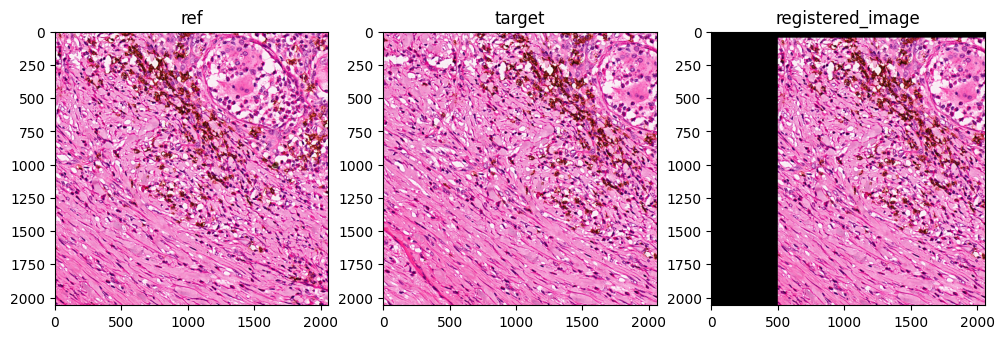

In [145]:
fig,axes = plt.subplots(1,3,figsize =(12,8))

axes[0].imshow(ref)
axes[0].set_title('ref')
axes[1].imshow(target)
axes[1].set_title('target')
axes[2].imshow(registered_image)
axes[2].set_title('registered_image')

###  AMIT SIR / MEDHA CODE FOR REGISTRATION  TEST..

In [ ]:
reference_image = cv2.imread("ref.tiff")
ref = cv2.cvtColor(reference_image,cv2.COLOR_BGR2RGB)
ref_gray = cv2.cvtColor(reference_image,cv2.COLOR_BGR2GRAY)
target_image = cv2.imread("target.tiff")
target = cv2.cvtColor(target_image ,cv2.COLOR_BGR2RGB)
target_gray = cv2.cvtColor(target_image,cv2.COLOR_BGR2GRAY)

In [ ]:
fig,axes = plt.subplots(1,2,figsize =(12,8))

axes[0].imshow(ref)
axes[0].set_title('ref')
axes[1].imshow(target)
axes[1].set_title('target')

In [ ]:
#original amit sir and medha code 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# The following function creates a 2D correlation array for two equal sized images
def corr2D_new(img1, img2, margin=30):
  #Create empty array
  corrArr = np.zeros((img1.shape[0]+img2.shape[0],img1.shape[1]+img2.shape[1]))

  #Loop over all x and y shifts (sum of the two image sizes)
  for i in range(img1.shape[0]+img2.shape[0]):
    for j in range(img1.shape[1]+img2.shape[1]):
      #Filter the spurious high points from the small overlap region
      if i>margin and i<img1.shape[0]+img2.shape[0]-margin and j>margin and j<img1.shape[1]+img2.shape[1]-margin:
        if i<img1.shape[0]: #if img1 is to the left of center of img2
          i11=img1.shape[0]-i #left index of img1 to be kept
          i12=img1.shape[0]   #right index of img1 to be kept
          i21=0               #left index of img2 to be kept
          i22=i               #right index of img2 to be kept
        else: #if img1 is overlapping or right of center of img2
          i11=0
          i12=img1.shape[0]-i+img2.shape[0]
          i21=i-img1.shape[0]
          i22=img2.shape[0]
        if j<img1.shape[1]:
          j11=img1.shape[1]-j
          j12=img1.shape[1]
          j21=0
          j22=j
        else:
          j11=0
          j12=img1.shape[1]-j+img2.shape[1]
          j21=j-img1.shape[1]
          j22=img2.shape[1]
        if i12>i11 and j12>j11:
          img3=img1[i11:i12,j11:j12]
          img4=img2[i21:i22,j21:j22]
          img3=img3-np.mean(img3)
          img4=img4-np.mean(img4)
          img3=img3/(np.std(img3)+.0001)
          img4=img4/(np.std(img4)+.0001)
          corrArr[i,j]=np.mean(img3*img4)
  #print(corrArr)
  #plt.imshow(corrArr)
  return corrArr

In [ ]:
from PIL import Image
import numpy as np
corrArr_ls = []
corrArrFiltered_ls = []
shift_GS_ls = []
max_GS_ls = []

def gray_correlation_new(ref, target):
 
    he_im_ar = ref
    ihc_im_ar = target

    

    he_im_conv = cv2.cvtColor(he_im_ar, cv2.COLOR_RGB2GRAY)
    #he_im_conv = cv2.resize(he_im_conv, (128, 128))

    ihc_im_conv = cv2.cvtColor(ihc_im_ar, cv2.COLOR_RGB2GRAY)
    #ihc_im_conv = cv2.resize(ihc_im_conv, (128, 128))

    corrArr = corr2D_new(he_im_conv,ihc_im_conv) #since he image is laid over the ihc image
    #corrArr_ls.append(corrArr)

    corrArrFiltered = np.zeros(corrArr.shape)
    #corrArrFiltered[20:230,20:230] = corrArr[20:230,20:230]
    corrArrFiltered[20:1800,20:1800] = corrArr[20:1800,20:1800]
    #corrArrFiltered_ls.append(corrArrFiltered)

    #shift_index_max = np.array(np.unravel_index(np.maximum(corrArrFiltered, axis=None), corrArrFiltered.shape))-np.array(he_im_conv.shape) #max instead of argmax
    #shift_index_max_ls.append(shift_index_max)

    #shift_GS = np.array(he_im_conv.shape)-np.array(np.unravel_index(np.argmax(corrArr, axis=None), corrArr.shape)) initially given
    shift_GS = np.array(np.unravel_index(np.argmax(corrArr, axis=None), corrArr.shape))-np.array(he_im_conv.shape) #modified to adjust the signs
    max_GS = np.max(corrArr, axis=None)

    #shift_GS_ls.append(shift_GS)
    #max_GS_ls.append(max_GS)


    #txt = he_img_txt.split(".", 2)[:2]
    #prefix = txt[0].split("_", 1)[:]

    print('The shift obtained for the image with index is ',shift_GS)
    print('The max value of corrArr obtained for the image with index  is ',max_GS)

 # print('shift index list : ',shift_GS_ls,'\nshift index max list : ',max_GS_ls)

In [ ]:
gray_correlation_new(ref,target)

In [ ]:
#method for overlap
def intersection_shift_correction(ihc_img, he_img, y_he_shift_str, x_he_shift_str):
  whiteFrame = 255 * np.ones((4200,4200), np.uint8)
  x_ihc_shift_str = y_ihc_shift_str = 2059
  #shift_adjustment = ihc_image.shape[0]
  #frame_shape = whiteFrame_tst.shape[0]

  shift_adjustment = 500 #128
  frame_shape = 4200 #256

  y_ihc_shift_stp = y_ihc_shift_str+shift_adjustment #384
  x_ihc_shift_stp = x_ihc_shift_str+shift_adjustment #384

  y_he_shift_stp = y_he_shift_str+shift_adjustment #192
  x_he_shift_stp = x_he_shift_str+shift_adjustment #384

  whiteFrame[y_ihc_shift_str:y_ihc_shift_stp, x_ihc_shift_str:x_ihc_shift_stp] = ihc_img

  if y_he_shift_str > shift_adjustment:  # >256 #move upwards 300 > 256      ****done****
    diff = (y_he_shift_str + shift_adjustment) - frame_shape #(300 + 256) - 512 = 44
    whiteFrame = 255 * np.ones((4200,4200), np.uint8)
    whiteFrame[y_ihc_shift_str-diff:y_ihc_shift_stp-diff, x_ihc_shift_str:x_ihc_shift_stp] = ihc_img #[128-44:384-44, 128:384] ==> [84:340, 128:384]
    whiteFrame[y_he_shift_str-diff:y_he_shift_stp-diff, x_he_shift_str:x_he_shift_stp] = he_img #[300-44:556-44, 128:384] ==> [256:512, 128:384]

  elif y_he_shift_stp < shift_adjustment:   # 192 < 256 #move downwards 192 < 256 ****done****
    diff = (shift_adjustment - y_he_shift_stp) #256 - 192 = 64
    whiteFrame = 255 * np.ones((4200,4200), np.uint8)
    whiteFrame[y_ihc_shift_str+diff:y_ihc_shift_stp+diff, x_ihc_shift_str:x_ihc_shift_stp] = ihc_img #[128+64:384+64, 128:384] ==> [192:448, 128:384]
    whiteFrame[y_he_shift_str+diff:y_he_shift_stp+diff, x_he_shift_str:x_he_shift_stp] = he_img #[-64+64:192+64, 128:384] ==> [0:256, 128:384]

  elif x_he_shift_stp < shift_adjustment: #move to the right  192 < 256   ****done****
    diff = (shift_adjustment - x_he_shift_stp) #256 - 192 = 64
    whiteFrame = 255 * np.ones((4200,4200), np.uint8)
    whiteFrame[y_ihc_shift_str:y_ihc_shift_stp, x_ihc_shift_str+diff:x_ihc_shift_stp+diff] = ihc_img #[128:384, 128+64:384+64] ==> [128:384, 192:448]
    whiteFrame[y_he_shift_str:y_he_shift_stp, x_he_shift_str+diff:x_he_shift_stp+diff] = he_img #[128:384, -64+64:192+64] ==> [128:384, 0:256]

  elif x_he_shift_str > shift_adjustment: #move to the left 320 > 256 ****done***
    diff = (x_he_shift_str - shift_adjustment) #320 - 256 = 64
    whiteFrame = 255 * np.ones((4200,4200), np.uint8)
    whiteFrame[y_ihc_shift_str:y_ihc_shift_stp, x_ihc_shift_str-diff:x_ihc_shift_stp-diff] = ihc_img #[128:384, 128-64:384-64] ==> [128:384, 64:320]
    whiteFrame[y_he_shift_str:y_he_shift_stp, x_he_shift_str-diff:x_he_shift_stp-diff] = he_img #[128:384, 320-64:576-64] ==> [128:384, 256:512]

  else:
    whiteFrame[y_he_shift_str:y_he_shift_stp, x_he_shift_str:x_he_shift_stp] = he_img

  #plt.imshow(whiteFrame, cmap = 'gray')
  return whiteFrame

In [ ]:
whiteFrame = 255 * np.ones((4100,4100), np.uint8)

whiteFrame[2059:4118, 2059:4118] = ref_gray
plt.imshow(whiteFrame, cmap = 'gray')